pip install optuna (in terminal)

In [1]:
import optuna
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time


Define the objective function 

In [121]:
xmin = -100
xmax = 100
ymin = -100
ymax = 100

#Change the function to be optimized here 
def func(x,y):
    return x**3 - y**2 + x**2 - y + 4 
    
def objective(trial):
    noise = 5*(np.random.rand(1) - 0.5)
    x = trial.suggest_float("x", xmin, xmax)
    y = trial.suggest_float("y", ymin, ymax)
    return -(func(x,y) + noise) #Optuna finds the minimum so add a negative to the function to find the maximum 

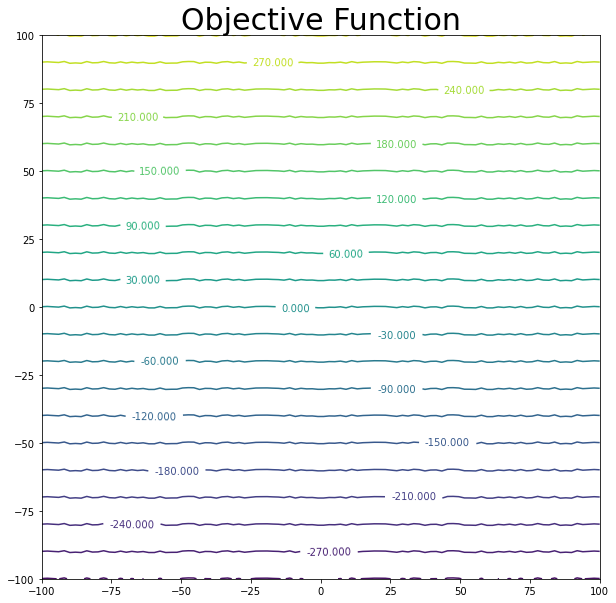

In [3]:
x = np.linspace(xmin,xmax,100)
y = np.linspace(ymin,ymax,100)
xx, yy = np.meshgrid(x,y)
z = func(xx,yy)
fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contour(z, extent=(xmin,xmax,ymin,ymax), levels = 20)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title('Objective Function', fontsize = 30)
plt.show()
        

### Pick a type of sampler 
Tree-structured Parzen Estimator algorithm implemented in optuna.samplers.TPESampler

CMA-ES based algorithm implemented in optuna.samplers.CmaEsSampler

Grid Search implemented in optuna.samplers.GridSampler

Random Search implemented in optuna.samplers.RandomSampler

In [91]:
study = optuna.create_study()
study = optuna.create_study(sampler=optuna.samplers.CmaEsSampler())
study.optimize(objective, n_trials=10)

[I 2021-03-03 13:02:32,978] A new study created in memory with name: no-name-12f84977-8ed0-47ff-b6d5-f1d69ebc1c86
[I 2021-03-03 13:02:33,000] A new study created in memory with name: no-name-fd60ddd4-0bd1-4a37-af18-18137385ec28
[I 2021-03-03 13:02:33,011] Trial 0 finished with value: 33.88777386858672 and parameters: {'x': 23.483187208615504, 'y': -54.971593588172055}. Best is trial 0 with value: 33.88777386858672.
[I 2021-03-03 13:02:33,050] Trial 1 finished with value: -6.436919783313801 and parameters: {'x': 1.9833248709584286, 'y': 4.201015874267422}. Best is trial 1 with value: -6.436919783313801.
[I 2021-03-03 13:02:33,058] Trial 2 finished with value: -59.874081289903465 and parameters: {'x': 48.1650011977711, 'y': 13.425114704343569}. Best is trial 2 with value: -59.874081289903465.
[I 2021-03-03 13:02:33,065] Trial 3 finished with value: 45.125698907010516 and parameters: {'x': -19.513522199569373, 'y': -27.283362686183377}. Best is trial 2 with value: -59.874081289903465.
[I 

### Extract the Best Parameters

In [5]:
best_params = study.best_params
found_x = best_params["x"]
found_y = best_params["y"]
print("Found x: {}, f: {}".format(found_x, (func(found_x, found_y))))
print("Found y: {}, f: {}".format(found_y, (func(found_x, found_y))))

Found x: -24.866188770331348, f: 113.55782121889443
Found y: 37.67373869401064, f: 113.55782121889443


In [6]:
print(f"Sampler is {study.sampler.__class__.__name__}")

Sampler is CmaEsSampler


# Data Generator

Code runs 100 trials to obtain the actual max value of the objective function. This will be used in the next code to calculate the accuracy which is the (calculated max value / actual max value). **This code only needs to be executed if the objective function is changed.**

In [122]:
max_ = []
for i in range(10): #How many iterations per datapoint 
    study = optuna.create_study()
    study = optuna.create_study(sampler=optuna.samplers.TPESampler())
    study.optimize(objective, n_trials=100)
    best_params = study.best_params
    found_x = best_params["x"]
    found_y = best_params["y"]
    print("Found x: {}, (x - 2)^2: {}".format(found_x, (func(found_x, found_y))))
    print("Found y: {}, (x - 2)^2: {}".format(found_y, (func(found_x, found_y))))
    x.append(found_x)
    y.append(found_y)
    max_.append(func(found_x, found_y))
max_value = np.max(max_)
    

[I 2021-03-03 13:23:20,099] A new study created in memory with name: no-name-982b5037-9481-4f11-8a04-8480dfd9c861
[I 2021-03-03 13:23:20,112] A new study created in memory with name: no-name-4a3851c8-3f69-4730-8060-2d583b8652c7
[I 2021-03-03 13:23:20,132] Trial 0 finished with value: -848391.0226745794 and parameters: {'x': 94.3544871608895, 'y': -23.54362680538054}. Best is trial 0 with value: -848391.0226745794.
[I 2021-03-03 13:23:20,140] Trial 1 finished with value: 161818.57760112334 and parameters: {'x': -54.50212082220249, 'y': 53.309851631962744}. Best is trial 0 with value: -848391.0226745794.
[I 2021-03-03 13:23:20,145] Trial 2 finished with value: 683975.6285035731 and parameters: {'x': -88.2532205191388, 'y': 65.81439185572157}. Best is trial 0 with value: -848391.0226745794.
[I 2021-03-03 13:23:20,150] Trial 3 finished with value: -109919.1028944447 and parameters: {'x': 48.70819923048421, 'y': -90.03348147590084}. Best is trial 0 with value: -848391.0226745794.
[I 2021-03

[I 2021-03-03 13:23:22,569] Trial 39 finished with value: -218319.17271391355 and parameters: {'x': 59.89616995565831, 'y': -12.968594172866375}. Best is trial 34 with value: -1008090.685788073.
[I 2021-03-03 13:23:22,698] Trial 40 finished with value: -31665.2775137543 and parameters: {'x': 31.795714309878925, 'y': 38.175469050418755}. Best is trial 34 with value: -1008090.685788073.
[I 2021-03-03 13:23:22,781] Trial 41 finished with value: -955397.5848139293 and parameters: {'x': 98.18889043916467, 'y': -30.405803237638874}. Best is trial 34 with value: -1008090.685788073.
[I 2021-03-03 13:23:23,053] Trial 42 finished with value: -993030.0547546458 and parameters: {'x': 99.52644048553458, 'y': -52.82370507073007}. Best is trial 34 with value: -1008090.685788073.
[I 2021-03-03 13:23:23,170] Trial 43 finished with value: -704506.6360350398 and parameters: {'x': 88.71103786446062, 'y': -39.1221642033161}. Best is trial 34 with value: -1008090.685788073.
[I 2021-03-03 13:23:23,255] Trial

[I 2021-03-03 13:23:26,294] Trial 79 finished with value: -492093.23221712606 and parameters: {'x': 78.65121363229335, 'y': -25.727073307551017}. Best is trial 34 with value: -1008090.685788073.
[I 2021-03-03 13:23:26,377] Trial 80 finished with value: -652581.6492276272 and parameters: {'x': 86.48452850172632, 'y': -42.580773415516774}. Best is trial 34 with value: -1008090.685788073.
[I 2021-03-03 13:23:26,454] Trial 81 finished with value: -1006004.2899841928 and parameters: {'x': 99.97150172450863, 'y': -56.5113574154594}. Best is trial 34 with value: -1008090.685788073.
[I 2021-03-03 13:23:26,548] Trial 82 finished with value: -995759.585342003 and parameters: {'x': 99.64675500242743, 'y': -60.63787658144453}. Best is trial 34 with value: -1008090.685788073.
[I 2021-03-03 13:23:26,655] Trial 83 finished with value: -858800.1914839767 and parameters: {'x': 94.81350445961236, 'y': -50.788787147541186}. Best is trial 34 with value: -1008090.685788073.
[I 2021-03-03 13:23:26,722] Tria

Found x: 99.97384318670454, (x - 2)^2: 1008089.4595816059
Found y: -34.04192267623905, (x - 2)^2: 1008089.4595816059


[I 2021-03-03 13:23:27,884] Trial 11 finished with value: -787860.9120913518 and parameters: {'x': 92.10163397895224, 'y': -44.06698406512902}. Best is trial 10 with value: -942740.641342194.
[I 2021-03-03 13:23:27,977] Trial 12 finished with value: -963397.5310860411 and parameters: {'x': 98.46408808680563, 'y': -30.9323746636655}. Best is trial 12 with value: -963397.5310860411.
[I 2021-03-03 13:23:28,060] Trial 13 finished with value: -191049.56133002805 and parameters: {'x': 57.31066133399751, 'y': -22.288021649356722}. Best is trial 12 with value: -963397.5310860411.
[I 2021-03-03 13:23:28,126] Trial 14 finished with value: -312640.65955698764 and parameters: {'x': 67.5440825206342, 'y': -9.136059879934606}. Best is trial 12 with value: -963397.5310860411.
[I 2021-03-03 13:23:28,166] Trial 15 finished with value: -429167.37000291736 and parameters: {'x': 75.23822713802787, 'y': -49.522674630854254}. Best is trial 12 with value: -963397.5310860411.
[I 2021-03-03 13:23:28,207] Trial

[I 2021-03-03 13:23:29,757] Trial 51 finished with value: -986098.5625931108 and parameters: {'x': 99.21619770595785, 'y': 19.930387276381666}. Best is trial 41 with value: -1008513.203769267.
[I 2021-03-03 13:23:29,799] Trial 52 finished with value: -697482.2607055327 and parameters: {'x': 88.35483166822485, 'y': 8.22817968712303}. Best is trial 41 with value: -1008513.203769267.
[I 2021-03-03 13:23:29,841] Trial 53 finished with value: -768401.042125548 and parameters: {'x': 91.27882628926994, 'y': 20.864691560038523}. Best is trial 41 with value: -1008513.203769267.
[I 2021-03-03 13:23:29,874] Trial 54 finished with value: -988491.8727373255 and parameters: {'x': 99.34702709935966, 'y': 43.346486002814025}. Best is trial 41 with value: -1008513.203769267.
[I 2021-03-03 13:23:29,909] Trial 55 finished with value: -450117.7574394633 and parameters: {'x': 76.3152348488719, 'y': -13.543906639844137}. Best is trial 41 with value: -1008513.203769267.
[I 2021-03-03 13:23:29,942] Trial 56 f

[I 2021-03-03 13:23:31,189] Trial 91 finished with value: -986525.4466277908 and parameters: {'x': 99.21689931160796, 'y': 3.1166311606828154}. Best is trial 41 with value: -1008513.203769267.
[I 2021-03-03 13:23:31,231] Trial 92 finished with value: -730773.6820307026 and parameters: {'x': 89.74099034059319, 'y': -3.667440517880703}. Best is trial 41 with value: -1008513.203769267.
[I 2021-03-03 13:23:31,273] Trial 93 finished with value: -991257.4005201666 and parameters: {'x': 99.38894758552458, 'y': 19.577486980865434}. Best is trial 41 with value: -1008513.203769267.
[I 2021-03-03 13:23:31,318] Trial 94 finished with value: -565705.4856819292 and parameters: {'x': 82.37850025390327, 'y': 10.54508145025097}. Best is trial 41 with value: -1008513.203769267.
[I 2021-03-03 13:23:31,351] Trial 95 finished with value: -995684.1577345973 and parameters: {'x': 99.5337738328875, 'y': -18.013307331415163}. Best is trial 41 with value: -1008513.203769267.
[I 2021-03-03 13:23:31,385] Trial 96

Found x: 99.95171637980631, (x - 2)^2: 1008515.3483529215
Found y: 5.106953572738563, (x - 2)^2: 1008515.3483529215


[I 2021-03-03 13:23:31,727] Trial 13 finished with value: -991940.9017267509 and parameters: {'x': 99.6719306761466, 'y': -90.99823457831185}. Best is trial 13 with value: -991940.9017267509.
[I 2021-03-03 13:23:31,766] Trial 14 finished with value: -99104.84619002184 and parameters: {'x': 46.48275256109458, 'y': 58.60349882552425}. Best is trial 13 with value: -991940.9017267509.
[I 2021-03-03 13:23:31,806] Trial 15 finished with value: 608934.3733547973 and parameters: {'x': -85.07080757289637, 'y': -23.135195443258837}. Best is trial 13 with value: -991940.9017267509.
[I 2021-03-03 13:23:31,842] Trial 16 finished with value: -986244.8027790486 and parameters: {'x': 99.20990842437527, 'y': -9.643979737056235}. Best is trial 13 with value: -991940.9017267509.
[I 2021-03-03 13:23:31,876] Trial 17 finished with value: -20235.08568206642 and parameters: {'x': 29.462506520156445, 'y': -79.30898363247255}. Best is trial 13 with value: -991940.9017267509.
[I 2021-03-03 13:23:31,913] Trial 1

[I 2021-03-03 13:23:33,475] Trial 53 finished with value: -759576.9667072368 and parameters: {'x': 90.90946168887461, 'y': -4.261103767670374}. Best is trial 24 with value: -1007893.698511235.
[I 2021-03-03 13:23:33,516] Trial 54 finished with value: -566374.5990558065 and parameters: {'x': 82.4057995088154, 'y': 3.3657339654074634}. Best is trial 24 with value: -1007893.698511235.
[I 2021-03-03 13:23:33,556] Trial 55 finished with value: -314090.9359457969 and parameters: {'x': 67.65662359458045, 'y': -14.120566947985422}. Best is trial 24 with value: -1007893.698511235.
[I 2021-03-03 13:23:33,598] Trial 56 finished with value: 3642.1821965953122 and parameters: {'x': 9.10012467689522, 'y': 66.44580924239123}. Best is trial 24 with value: -1007893.698511235.
[I 2021-03-03 13:23:33,630] Trial 57 finished with value: -813988.5748518363 and parameters: {'x': 93.06451805663173, 'y': -27.16508438714294}. Best is trial 24 with value: -1007893.698511235.
[I 2021-03-03 13:23:33,665] Trial 58 

[I 2021-03-03 13:23:35,152] Trial 93 finished with value: -997296.3026186976 and parameters: {'x': 99.59197993566742, 'y': 20.407851161764953}. Best is trial 63 with value: -1009010.9780339609.
[I 2021-03-03 13:23:35,213] Trial 94 finished with value: -1007218.3707117768 and parameters: {'x': 99.93146144293365, 'y': 26.298721575522592}. Best is trial 63 with value: -1009010.9780339609.
[I 2021-03-03 13:23:35,269] Trial 95 finished with value: -716440.7209533309 and parameters: {'x': 89.15980255291096, 'y': 16.468897575089112}. Best is trial 63 with value: -1009010.9780339609.
[I 2021-03-03 13:23:35,345] Trial 96 finished with value: -605434.8986901373 and parameters: {'x': 84.26524747370021, 'y': -2.499538123403365}. Best is trial 63 with value: -1009010.9780339609.
[I 2021-03-03 13:23:35,399] Trial 97 finished with value: -519361.9665127201 and parameters: {'x': 80.0523451869815, 'y': 7.144296852996584}. Best is trial 63 with value: -1009010.9780339609.
[I 2021-03-03 13:23:35,471] Tri

Found x: 99.9959622438567, (x - 2)^2: 1009009.6006408433
Found y: -30.041733715356187, (x - 2)^2: 1009009.6006408433


[I 2021-03-03 13:23:35,806] Trial 13 finished with value: -1004050.5308495731 and parameters: {'x': 99.84009149728986, 'y': 33.1528441290449}. Best is trial 13 with value: -1004050.5308495731.
[I 2021-03-03 13:23:35,852] Trial 14 finished with value: -153734.600903894 and parameters: {'x': 53.60818781923797, 'y': 56.099309207270935}. Best is trial 13 with value: -1004050.5308495731.
[I 2021-03-03 13:23:35,907] Trial 15 finished with value: -989582.6320143078 and parameters: {'x': 99.3508290483064, 'y': 30.21978011366918}. Best is trial 13 with value: -1004050.5308495731.
[I 2021-03-03 13:23:35,946] Trial 16 finished with value: -184376.3289813861 and parameters: {'x': 57.02139408898664, 'y': 64.91546867458456}. Best is trial 13 with value: -1004050.5308495731.
[I 2021-03-03 13:23:35,991] Trial 17 finished with value: 274.89898176953056 and parameters: {'x': -5.489743427839002, 'y': 11.494876082175232}. Best is trial 13 with value: -1004050.5308495731.
[I 2021-03-03 13:23:36,021] Trial 

[I 2021-03-03 13:23:37,451] Trial 53 finished with value: -826466.6984024546 and parameters: {'x': 93.63100924518481, 'y': -56.57134509658825}. Best is trial 43 with value: -1005632.3159766301.
[I 2021-03-03 13:23:37,490] Trial 54 finished with value: -558549.9170232072 and parameters: {'x': 82.02569725102836, 'y': -8.917212348061181}. Best is trial 43 with value: -1005632.3159766301.
[I 2021-03-03 13:23:37,521] Trial 55 finished with value: -237112.66408965943 and parameters: {'x': 61.581276209983876, 'y': -15.1480885636465}. Best is trial 43 with value: -1005632.3159766301.
[I 2021-03-03 13:23:37,561] Trial 56 finished with value: -775656.3024016325 and parameters: {'x': 91.54906043087166, 'y': 4.290483013706481}. Best is trial 43 with value: -1005632.3159766301.
[I 2021-03-03 13:23:37,610] Trial 57 finished with value: -127508.82403702733 and parameters: {'x': 50.13715125689482, 'y': -32.76267157705421}. Best is trial 43 with value: -1005632.3159766301.
[I 2021-03-03 13:23:37,648] T

[I 2021-03-03 13:23:39,143] Trial 93 finished with value: -672177.3461384615 and parameters: {'x': 87.26900664234616, 'y': -8.972232936506733}. Best is trial 87 with value: -1009543.7276429341.
[I 2021-03-03 13:23:39,182] Trial 94 finished with value: -888333.9622349658 and parameters: {'x': 95.85371247393098, 'y': -39.927149594033914}. Best is trial 87 with value: -1009543.7276429341.
[I 2021-03-03 13:23:39,213] Trial 95 finished with value: -746167.930077243 and parameters: {'x': 90.36881103513345, 'y': -0.012672989702544157}. Best is trial 87 with value: -1009543.7276429341.
[I 2021-03-03 13:23:39,255] Trial 96 finished with value: -596926.7684864423 and parameters: {'x': 83.89977229639456, 'y': -26.989324460227312}. Best is trial 87 with value: -1009543.7276429341.
[I 2021-03-03 13:23:39,298] Trial 97 finished with value: -875364.6742715986 and parameters: {'x': 95.32803742046339, 'y': -4.600698715277029}. Best is trial 87 with value: -1009543.7276429341.
[I 2021-03-03 13:23:39,336

Found x: 99.99061950602949, (x - 2)^2: 1009541.6610666618
Found y: -13.891209829478907, (x - 2)^2: 1009541.6610666618


[I 2021-03-03 13:23:39,577] Trial 11 finished with value: -167182.7929972413 and parameters: {'x': 55.70790350636526, 'y': -94.34357812576887}. Best is trial 1 with value: -972771.9302112721.
[I 2021-03-03 13:23:39,608] Trial 12 finished with value: 27440.81659868057 and parameters: {'x': -26.49332050082065, 'y': -98.22890969045332}. Best is trial 1 with value: -972771.9302112721.
[I 2021-03-03 13:23:39,651] Trial 13 finished with value: -141803.29128699316 and parameters: {'x': 51.91109443924944, 'y': -28.50880106752077}. Best is trial 1 with value: -972771.9302112721.
[I 2021-03-03 13:23:39,687] Trial 14 finished with value: 4858.713720583066 and parameters: {'x': 14.177200044752198, 'y': -89.44422524594525}. Best is trial 1 with value: -972771.9302112721.
[I 2021-03-03 13:23:39,728] Trial 15 finished with value: -361359.411017667 and parameters: {'x': 70.98715733796755, 'y': -37.935773599555404}. Best is trial 1 with value: -972771.9302112721.
[I 2021-03-03 13:23:39,771] Trial 16 fi

[I 2021-03-03 13:23:41,223] Trial 51 finished with value: -998052.8033036035 and parameters: {'x': 99.87753292350915, 'y': 90.35704323415717}. Best is trial 43 with value: -1002393.845990798.
[I 2021-03-03 13:23:41,284] Trial 52 finished with value: -783922.4658411489 and parameters: {'x': 92.16722538684596, 'y': 86.21093890490411}. Best is trial 43 with value: -1002393.845990798.
[I 2021-03-03 13:23:41,321] Trial 53 finished with value: -535539.0460059444 and parameters: {'x': 81.30970656345104, 'y': 92.44394456408439}. Best is trial 43 with value: -1002393.845990798.
[I 2021-03-03 13:23:41,341] Trial 54 finished with value: -227467.5397963259 and parameters: {'x': 61.14358103435688, 'y': 69.21623810967424}. Best is trial 43 with value: -1002393.845990798.
[I 2021-03-03 13:23:41,373] Trial 55 finished with value: -961499.1874221899 and parameters: {'x': 98.65898129114544, 'y': 91.94238633265498}. Best is trial 43 with value: -1002393.845990798.
[I 2021-03-03 13:23:41,402] Trial 56 fin

[I 2021-03-03 13:23:42,614] Trial 91 finished with value: -1001411.8462522151 and parameters: {'x': 99.87060663677367, 'y': -68.9990756666076}. Best is trial 56 with value: -1003771.4509502405.
[I 2021-03-03 13:23:42,652] Trial 92 finished with value: -997752.1671848046 and parameters: {'x': 99.74337137480637, 'y': -67.7351557277314}. Best is trial 56 with value: -1003771.4509502405.
[I 2021-03-03 13:23:42,690] Trial 93 finished with value: -20438.187409787963 and parameters: {'x': 28.455791493110482, 'y': -58.96534383064707}. Best is trial 56 with value: -1003771.4509502405.
[I 2021-03-03 13:23:42,737] Trial 94 finished with value: -723868.6538197249 and parameters: {'x': 89.77127357176735, 'y': -87.97872503291099}. Best is trial 56 with value: -1003771.4509502405.
[I 2021-03-03 13:23:42,789] Trial 95 finished with value: -867550.6872021453 and parameters: {'x': 95.22042531411284, 'y': -70.34983405687917}. Best is trial 56 with value: -1003771.4509502405.
[I 2021-03-03 13:23:42,829] T

Found x: 99.99499636753396, (x - 2)^2: 1003769.895620014
Found y: -78.4952063611851, (x - 2)^2: 1003769.895620014


[I 2021-03-03 13:23:43,151] Trial 14 finished with value: -81030.16763114046 and parameters: {'x': 44.615140106062256, 'y': -99.35492400682647}. Best is trial 13 with value: -987908.8020166402.
[I 2021-03-03 13:23:43,185] Trial 15 finished with value: 84318.99044244774 and parameters: {'x': -42.46909773333603, 'y': -98.10824756522992}. Best is trial 13 with value: -987908.8020166402.
[I 2021-03-03 13:23:43,227] Trial 16 finished with value: -116061.60800539445 and parameters: {'x': 48.50338544458272, 'y': -20.569190323028344}. Best is trial 13 with value: -987908.8020166402.
[I 2021-03-03 13:23:43,262] Trial 17 finished with value: -904625.3008677618 and parameters: {'x': 96.60416082597062, 'y': -79.6061119358481}. Best is trial 13 with value: -987908.8020166402.
[I 2021-03-03 13:23:43,297] Trial 18 finished with value: 33805.54852266478 and parameters: {'x': -32.64749192257021, 'y': 8.326448254601317}. Best is trial 13 with value: -987908.8020166402.
[I 2021-03-03 13:23:43,338] Trial 

[I 2021-03-03 13:23:44,575] Trial 54 finished with value: -992471.151426546 and parameters: {'x': 99.7243800481231, 'y': 95.58296173101041}. Best is trial 31 with value: -1001387.860169518.
[I 2021-03-03 13:23:44,602] Trial 55 finished with value: -724627.8911483544 and parameters: {'x': 89.57679428978759, 'y': 46.040312370603715}. Best is trial 31 with value: -1001387.860169518.
[I 2021-03-03 13:23:44,638] Trial 56 finished with value: -999089.4724691373 and parameters: {'x': 99.76512024087756, 'y': 61.4577550853888}. Best is trial 31 with value: -1001387.860169518.
[I 2021-03-03 13:23:44,677] Trial 57 finished with value: -327749.09214262164 and parameters: {'x': 69.29040587154776, 'y': 98.14773169338282}. Best is trial 31 with value: -1001387.860169518.
[I 2021-03-03 13:23:44,713] Trial 58 finished with value: -492189.7789011395 and parameters: {'x': 78.95748505729796, 'y': 78.83038648683086}. Best is trial 31 with value: -1001387.860169518.
[I 2021-03-03 13:23:44,754] Trial 59 fini

[I 2021-03-03 13:23:47,183] Trial 95 finished with value: -561403.36153158 and parameters: {'x': 82.52520546124364, 'y': 85.75608784419629}. Best is trial 85 with value: -1002067.753074858.
[I 2021-03-03 13:23:47,229] Trial 96 finished with value: -1005838.7414087089 and parameters: {'x': 99.98759923627797, 'y': 61.06607271713415}. Best is trial 96 with value: -1005838.7414087089.
[I 2021-03-03 13:23:47,326] Trial 97 finished with value: -687047.4250329902 and parameters: {'x': 88.14657803494225, 'y': 74.38155213454493}. Best is trial 96 with value: -1005838.7414087089.
[I 2021-03-03 13:23:47,419] Trial 98 finished with value: -373585.9255053402 and parameters: {'x': 71.92195987495731, 'y': 59.74299183020628}. Best is trial 96 with value: -1005838.7414087089.
[I 2021-03-03 13:23:47,514] Trial 99 finished with value: -875254.7579449218 and parameters: {'x': 95.37332695316428, 'y': 36.500254990333225}. Best is trial 96 with value: -1005838.7414087089.
[I 2021-03-03 13:23:47,517] A new st

Found x: 99.98759923627797, (x - 2)^2: 1005839.4119113376
Found y: 61.06607271713415, (x - 2)^2: 1005839.4119113376


[I 2021-03-03 13:23:47,721] Trial 10 finished with value: -873558.1733353137 and parameters: {'x': 95.54929128043744, 'y': -89.42408276777704}. Best is trial 10 with value: -873558.1733353137.
[I 2021-03-03 13:23:47,821] Trial 11 finished with value: -979587.2640931464 and parameters: {'x': 99.30222342784016, 'y': -97.92324159532949}. Best is trial 11 with value: -979587.2640931464.
[I 2021-03-03 13:23:47,861] Trial 12 finished with value: -797357.6019829237 and parameters: {'x': 92.74980671375233, 'y': -96.05431941405203}. Best is trial 11 with value: -979587.2640931464.
[I 2021-03-03 13:23:47,905] Trial 13 finished with value: -960705.4568487428 and parameters: {'x': 98.63513116226898, 'y': -93.4399855009032}. Best is trial 11 with value: -979587.2640931464.
[I 2021-03-03 13:23:47,951] Trial 14 finished with value: -407534.88292088744 and parameters: {'x': 74.27923392419703, 'y': -88.89567178133926}. Best is trial 11 with value: -979587.2640931464.
[I 2021-03-03 13:23:48,009] Trial 1

[I 2021-03-03 13:23:50,263] Trial 50 finished with value: -756794.57542586 and parameters: {'x': 90.91837329645347, 'y': -55.479255621662155}. Best is trial 32 with value: -1001256.7193228679.
[I 2021-03-03 13:23:50,322] Trial 51 finished with value: -991700.7012737448 and parameters: {'x': 99.39118351519403, 'y': -5.702336157768233}. Best is trial 32 with value: -1001256.7193228679.
[I 2021-03-03 13:23:50,430] Trial 52 finished with value: -540670.1193536791 and parameters: {'x': 81.2051168419966, 'y': -38.15328790445597}. Best is trial 32 with value: -1001256.7193228679.
[I 2021-03-03 13:23:50,525] Trial 53 finished with value: 877017.356765525 and parameters: {'x': -96.03776802038792, 'y': 21.04527096694349}. Best is trial 32 with value: -1001256.7193228679.
[I 2021-03-03 13:23:50,600] Trial 54 finished with value: -351780.98997656634 and parameters: {'x': 70.26148965080127, 'y': 3.572134959984961}. Best is trial 32 with value: -1001256.7193228679.
[I 2021-03-03 13:23:50,710] Trial 

[I 2021-03-03 13:23:52,371] Trial 90 finished with value: -697113.6049368909 and parameters: {'x': 88.3785214729739, 'y': -32.19510453413664}. Best is trial 63 with value: -1007683.1918815175.
[I 2021-03-03 13:23:52,401] Trial 91 finished with value: -878104.8158487312 and parameters: {'x': 95.48272752537346, 'y': -39.55727478251663}. Best is trial 63 with value: -1007683.1918815175.
[I 2021-03-03 13:23:52,444] Trial 92 finished with value: -869957.0061985657 and parameters: {'x': 95.16492217789818, 'y': -31.34054288628505}. Best is trial 63 with value: -1007683.1918815175.
[I 2021-03-03 13:23:52,485] Trial 93 finished with value: 459011.3757974894 and parameters: {'x': -77.43649495852574, 'y': -26.373758597507248}. Best is trial 63 with value: -1007683.1918815175.
[I 2021-03-03 13:23:52,519] Trial 94 finished with value: -1007527.2062148588 and parameters: {'x': 99.92485491957716, 'y': -15.044321553832562}. Best is trial 63 with value: -1007683.1918815175.
[I 2021-03-03 13:23:52,557] 

Found x: 99.92893666786559, (x - 2)^2: 1007680.8178158614
Found y: 12.873079075478305, (x - 2)^2: 1007680.8178158614


[I 2021-03-03 13:23:52,909] Trial 13 finished with value: -82132.77346605135 and parameters: {'x': 43.20219286606148, 'y': 18.733895826342945}. Best is trial 8 with value: -988601.8156593803.
[I 2021-03-03 13:23:52,959] Trial 14 finished with value: 863782.6847397492 and parameters: {'x': -95.55502776511396, 'y': 20.136218159932916}. Best is trial 8 with value: -988601.8156593803.
[I 2021-03-03 13:23:53,003] Trial 15 finished with value: -979253.8421997266 and parameters: {'x': 99.01683490284059, 'y': 36.22938211334489}. Best is trial 8 with value: -988601.8156593803.
[I 2021-03-03 13:23:53,045] Trial 16 finished with value: -191939.08816644448 and parameters: {'x': 57.353310263047256, 'y': -4.347720853343105}. Best is trial 8 with value: -988601.8156593803.
[I 2021-03-03 13:23:53,081] Trial 17 finished with value: -10754.259206506898 and parameters: {'x': 22.187475311863693, 'y': 25.239276291693724}. Best is trial 8 with value: -988601.8156593803.
[I 2021-03-03 13:23:53,119] Trial 18 

[I 2021-03-03 13:23:54,367] Trial 53 finished with value: -563139.7500850862 and parameters: {'x': 82.26518136828807, 'y': 18.701866046578047}. Best is trial 35 with value: -1003878.6292011458.
[I 2021-03-03 13:23:54,403] Trial 54 finished with value: 113742.83990255871 and parameters: {'x': -48.27462864152104, 'y': 59.3125897635387}. Best is trial 35 with value: -1003878.6292011458.
[I 2021-03-03 13:23:54,435] Trial 55 finished with value: -997214.0488226302 and parameters: {'x': 99.62159811446998, 'y': 36.957751815577325}. Best is trial 35 with value: -1003878.6292011458.
[I 2021-03-03 13:23:54,461] Trial 56 finished with value: -363602.6459858429 and parameters: {'x': 71.09769908818137, 'y': 28.601576715610932}. Best is trial 35 with value: -1003878.6292011458.
[I 2021-03-03 13:23:54,483] Trial 57 finished with value: -792250.3056319641 and parameters: {'x': 92.2077715718684, 'y': 14.653898810487505}. Best is trial 35 with value: -1003878.6292011458.
[I 2021-03-03 13:23:54,517] Tria

[I 2021-03-03 13:23:55,985] Trial 93 finished with value: -606538.216080593 and parameters: {'x': 84.4333867846303, 'y': -50.727231828235055}. Best is trial 90 with value: -1009015.1157545644.
[I 2021-03-03 13:23:56,047] Trial 94 finished with value: -12.561623090688089 and parameters: {'x': 4.66367901529479, 'y': -11.24244575898549}. Best is trial 90 with value: -1009015.1157545644.
[I 2021-03-03 13:23:56,110] Trial 95 finished with value: -744765.2853199854 and parameters: {'x': 90.39270648787682, 'y': -45.14213534679432}. Best is trial 90 with value: -1009015.1157545644.
[I 2021-03-03 13:23:56,170] Trial 96 finished with value: -884223.7549119964 and parameters: {'x': 95.66970862586804, 'y': -24.39883135193569}. Best is trial 90 with value: -1009015.1157545644.
[I 2021-03-03 13:23:56,232] Trial 97 finished with value: 72909.49826889807 and parameters: {'x': -41.94041537554132, 'y': -30.531019922630005}. Best is trial 90 with value: -1009015.1157545644.
[I 2021-03-03 13:23:56,287] Tr

Found x: 99.97267097833439, (x - 2)^2: 1009016.6681111171
Found y: -13.246380806850102, (x - 2)^2: 1009016.6681111171


[I 2021-03-03 13:23:56,633] Trial 11 finished with value: -994856.8655701181 and parameters: {'x': 99.50719293169674, 'y': 17.83894089741859}. Best is trial 11 with value: -994856.8655701181.
[I 2021-03-03 13:23:56,716] Trial 12 finished with value: -997518.9139826094 and parameters: {'x': 99.62489722190283, 'y': 34.14029251116355}. Best is trial 12 with value: -997518.9139826094.
[I 2021-03-03 13:23:56,797] Trial 13 finished with value: -213091.8323440081 and parameters: {'x': 59.64107846919768, 'y': 50.645606772962736}. Best is trial 12 with value: -997518.9139826094.
[I 2021-03-03 13:23:56,880] Trial 14 finished with value: -349842.41356950684 and parameters: {'x': 70.21231255655036, 'y': 34.43633149059535}. Best is trial 12 with value: -997518.9139826094.
[I 2021-03-03 13:23:56,937] Trial 15 finished with value: -4765.492722810986 and parameters: {'x': 17.601642326269513, 'y': 31.125361369511513}. Best is trial 12 with value: -997518.9139826094.
[I 2021-03-03 13:23:56,980] Trial 16

[I 2021-03-03 13:23:59,311] Trial 51 finished with value: -959365.4959664764 and parameters: {'x': 98.30215930283005, 'y': 14.623034449425361}. Best is trial 36 with value: -1007704.6963010102.
[I 2021-03-03 13:23:59,420] Trial 52 finished with value: -776081.0768196051 and parameters: {'x': 91.58900934072727, 'y': 24.174553971152143}. Best is trial 36 with value: -1007704.6963010102.
[I 2021-03-03 13:23:59,519] Trial 53 finished with value: -998731.8550939761 and parameters: {'x': 99.68072823828378, 'y': 40.23340056510476}. Best is trial 36 with value: -1007704.6963010102.
[I 2021-03-03 13:23:59,629] Trial 54 finished with value: -416137.560227416 and parameters: {'x': 74.41512383666799, 'y': 38.03301754471893}. Best is trial 36 with value: -1007704.6963010102.
[I 2021-03-03 13:23:59,743] Trial 55 finished with value: -640124.746517621 and parameters: {'x': 86.04694646768107, 'y': 65.68192244208481}. Best is trial 36 with value: -1007704.6963010102.
[I 2021-03-03 13:23:59,852] Trial 5

[I 2021-03-03 13:24:02,898] Trial 91 finished with value: -976818.7859328472 and parameters: {'x': 98.92847492085357, 'y': 33.68574945208695}. Best is trial 36 with value: -1007704.6963010102.
[I 2021-03-03 13:24:02,942] Trial 92 finished with value: 2688.650561365201 and parameters: {'x': -12.408176082293055, 'y': 30.06940589070739}. Best is trial 36 with value: -1007704.6963010102.
[I 2021-03-03 13:24:02,983] Trial 93 finished with value: -1007407.3690718784 and parameters: {'x': 99.93163368886583, 'y': 22.558972720418417}. Best is trial 36 with value: -1007704.6963010102.
[I 2021-03-03 13:24:03,023] Trial 94 finished with value: -591603.6959478852 and parameters: {'x': 83.6198302639642, 'y': 8.779499431758364}. Best is trial 36 with value: -1007704.6963010102.
[I 2021-03-03 13:24:03,059] Trial 95 finished with value: -745763.7126133731 and parameters: {'x': 90.36527196365967, 'y': 17.329743557226642}. Best is trial 36 with value: -1007704.6963010102.
[I 2021-03-03 13:24:03,101] Tria

Found x: 99.99359827190153, (x - 2)^2: 1007704.8714797182
Found y: 45.39181481554684, (x - 2)^2: 1007704.8714797182


[I 2021-03-03 13:24:03,562] Trial 10 finished with value: 9474.759055220771 and parameters: {'x': -12.000316951504796, 'y': 88.34744309790774}. Best is trial 0 with value: -519220.35790413764.
[I 2021-03-03 13:24:03,621] Trial 11 finished with value: -575910.8160305739 and parameters: {'x': 83.29259859565937, 'y': -94.76071382135856}. Best is trial 11 with value: -575910.8160305739.
[I 2021-03-03 13:24:03,687] Trial 12 finished with value: -954157.0957003636 and parameters: {'x': 98.4482019089292, 'y': -99.00494383723964}. Best is trial 12 with value: -954157.0957003636.
[I 2021-03-03 13:24:03,728] Trial 13 finished with value: -843593.4121577629 and parameters: {'x': 94.49391648384422, 'y': -95.81755927718876}. Best is trial 12 with value: -954157.0957003636.
[I 2021-03-03 13:24:03,782] Trial 14 finished with value: 909836.7876283439 and parameters: {'x': -97.18576044225526, 'y': -37.393058996868916}. Best is trial 12 with value: -954157.0957003636.
[I 2021-03-03 13:24:03,822] Trial 1

[I 2021-03-03 13:24:06,193] Trial 50 finished with value: -16086.753038539213 and parameters: {'x': 24.967347670323175, 'y': -10.765648017292456}. Best is trial 42 with value: -1003703.2649062232.
[I 2021-03-03 13:24:06,305] Trial 51 finished with value: -984300.2023629808 and parameters: {'x': 99.17206645116227, 'y': -30.619472226166945}. Best is trial 42 with value: -1003703.2649062232.
[I 2021-03-03 13:24:06,433] Trial 52 finished with value: 467594.3442741033 and parameters: {'x': -77.90274307558774, 'y': -30.335186748013072}. Best is trial 42 with value: -1003703.2649062232.
[I 2021-03-03 13:24:06,546] Trial 53 finished with value: -995560.9878708529 and parameters: {'x': 99.62312351687399, 'y': -56.230750974651116}. Best is trial 42 with value: -1003703.2649062232.
[I 2021-03-03 13:24:06,658] Trial 54 finished with value: -450422.4412126666 and parameters: {'x': 76.49453633340086, 'y': -55.577657950226886}. Best is trial 42 with value: -1003703.2649062232.
[I 2021-03-03 13:24:06,

[I 2021-03-03 13:24:09,518] Trial 90 finished with value: -743556.5342787784 and parameters: {'x': 90.33334296139168, 'y': -42.215085624811095}. Best is trial 42 with value: -1003703.2649062232.
[I 2021-03-03 13:24:09,611] Trial 91 finished with value: -1006635.0012488537 and parameters: {'x': 99.99588277758087, 'y': -57.45027386292307}. Best is trial 91 with value: -1006635.0012488537.
[I 2021-03-03 13:24:09,719] Trial 92 finished with value: -832633.7783526508 and parameters: {'x': 93.87692492335519, 'y': -59.742483171730285}. Best is trial 91 with value: -1006635.0012488537.
[I 2021-03-03 13:24:09,824] Trial 93 finished with value: -636251.9618759953 and parameters: {'x': 85.78638989901833, 'y': -49.9136410074977}. Best is trial 91 with value: -1006635.0012488537.
[I 2021-03-03 13:24:09,915] Trial 94 finished with value: -877501.6408506286 and parameters: {'x': 95.47594153655962, 'y': -44.600477765171654}. Best is trial 91 with value: -1006635.0012488537.
[I 2021-03-03 13:24:10,000]

Found x: 99.99588277758087, (x - 2)^2: 1006636.5812922183
Found y: -57.45027386292307, (x - 2)^2: 1006636.5812922183


In [123]:
max_value

1009541.6610666618

This code will generate the calculated max value for an optimization of 10 trials. It will divide that by the actual max value to find the accuracy. The mean_time is the average time taken to perform ONE trial. **Run this code everytime any setting of the optimizer is changed** 

Description for the type of objective function

In [166]:
Type_of_function = 'power'
n_of_params = 2

## CmaEs

In [167]:
accuracy = []
mean_time = []
for n in range(20): #Determines how many datapoints to generate 
    x = []
    y = []
    z = []
    itr_time = []
    for i in range(20): #How many iterations per datapoint 
        start = time.time()
        study = optuna.create_study()
        study = optuna.create_study(sampler=optuna.samplers.CmaEsSampler())
        study.optimize(objective, n_trials=10)
        best_params = study.best_params
        found_x = best_params["x"]
        found_y = best_params["y"]
        print("Found x: {}, (x - 2)^2: {}".format(found_x, (func(found_x, found_y))))
        print("Found y: {}, (x - 2)^2: {}".format(found_y, (func(found_x, found_y))))
        x.append(found_x)
        y.append(found_y)
        z.append(func(found_x, found_y))
        end = time.time()
        timetaken = end - start
        itr_time.append(timetaken)
    mean_time.append(np.mean(itr_time)/10)
    acc = np.mean(z)/max_value
    accuracy.append(acc)

[I 2021-03-03 13:44:11,817] A new study created in memory with name: no-name-07943825-73dd-43c3-9777-91c9a0f1ca56
[I 2021-03-03 13:44:11,824] A new study created in memory with name: no-name-cac21383-3978-4d16-8926-9fbe18e20959
[I 2021-03-03 13:44:11,829] Trial 0 finished with value: 52123.82821059872 and parameters: {'x': -37.62026642338518, 'y': 16.751345863971707}. Best is trial 0 with value: 52123.82821059872.
[I 2021-03-03 13:44:11,839] Trial 1 finished with value: -91510.22719125554 and parameters: {'x': 44.92252113798317, 'y': -34.68090467476208}. Best is trial 1 with value: -91510.22719125554.
[I 2021-03-03 13:44:11,845] Trial 2 finished with value: 426.7051499034 and parameters: {'x': 5.820905580320592, 'y': 25.195042784300743}. Best is trial 1 with value: -91510.22719125554.
[I 2021-03-03 13:44:11,852] Trial 3 finished with value: -17756.091611377677 and parameters: {'x': 26.01694600438506, 'y': -23.612450487323095}. Best is trial 1 with value: -91510.22719125554.
[I 2021-03-

Found x: 44.92252113798317, (x - 2)^2: 91509.07451064953
Found y: -34.68090467476208, (x - 2)^2: 91509.07451064953
Found x: 62.01746344647096, (x - 2)^2: 242152.37636458754
Found y: -15.582592700224456, (x - 2)^2: 242152.37636458754


[I 2021-03-03 13:44:12,150] Trial 3 finished with value: -32330.8880257944 and parameters: {'x': 32.150008669819655, 'y': -44.50316195964802}. Best is trial 0 with value: -500410.87094740756.
[I 2021-03-03 13:44:12,164] Trial 4 finished with value: 85862.69204224818 and parameters: {'x': -44.39087510690305, 'y': -19.52919306601537}. Best is trial 0 with value: -500410.87094740756.
[I 2021-03-03 13:44:12,176] Trial 5 finished with value: -292094.1787491451 and parameters: {'x': 66.02069351698495, 'y': -6.31092459006849}. Best is trial 0 with value: -500410.87094740756.
[I 2021-03-03 13:44:12,200] Trial 6 finished with value: -1921.1052399000089 and parameters: {'x': 12.459415407689974, 'y': -13.684867460165027}. Best is trial 0 with value: -500410.87094740756.
[I 2021-03-03 13:44:12,213] Trial 7 finished with value: -79910.0517809971 and parameters: {'x': 42.74738853617363, 'y': -6.454173804481261}. Best is trial 0 with value: -500410.87094740756.
[I 2021-03-03 13:44:12,227] Trial 8 fin

Found x: 88.93115264306559, (x - 2)^2: 708605.147676552
Found y: -51.90133980394734, (x - 2)^2: 708605.147676552
Found x: 71.1917802825364, (x - 2)^2: 362626.80471129203
Found y: 56.638858984684475, (x - 2)^2: 362626.80471129203


[I 2021-03-03 13:44:12,474] A new study created in memory with name: no-name-3a0abd68-683a-449f-a573-00b851dcaa93
[I 2021-03-03 13:44:12,479] Trial 0 finished with value: 5930.634728974424 and parameters: {'x': 11.201864268674044, 'y': 85.90387299154926}. Best is trial 0 with value: 5930.634728974424.
[I 2021-03-03 13:44:12,489] Trial 1 finished with value: -15000.066706019596 and parameters: {'x': 25.208143126990887, 'y': 40.24992126997346}. Best is trial 1 with value: -15000.066706019596.
[I 2021-03-03 13:44:12,499] Trial 2 finished with value: 366082.75869789976 and parameters: {'x': -71.86585465223995, 'y': 8.698442462097479}. Best is trial 1 with value: -15000.066706019596.
[I 2021-03-03 13:44:12,510] Trial 3 finished with value: -4232.394533588061 and parameters: {'x': 16.274359588868105, 'y': 18.063773689809143}. Best is trial 1 with value: -15000.066706019596.
[I 2021-03-03 13:44:12,526] Trial 4 finished with value: 1294.1750828460024 and parameters: {'x': 2.198488767329985, 'y

Found x: 63.02152903491992, (x - 2)^2: 253304.545374977
Found y: -31.72261323253673, (x - 2)^2: 253304.545374977
Found x: 37.98302878560569, (x - 2)^2: 55334.78474720435
Found y: -30.677628425723043, (x - 2)^2: 55334.78474720435


[I 2021-03-03 13:44:12,817] Trial 0 finished with value: 17030.30213882781 and parameters: {'x': -22.558147085189347, 'y': 77.38272718599498}. Best is trial 0 with value: 17030.30213882781.
[I 2021-03-03 13:44:12,839] Trial 1 finished with value: 19893.47546637736 and parameters: {'x': -27.391952960940515, 'y': 9.3117287210779}. Best is trial 0 with value: 17030.30213882781.
[I 2021-03-03 13:44:12,865] Trial 2 finished with value: 10394.312315247009 and parameters: {'x': -18.56409570589972, 'y': -66.43197186295056}. Best is trial 2 with value: 10394.312315247009.
[I 2021-03-03 13:44:12,887] Trial 3 finished with value: 74.47978369833632 and parameters: {'x': 1.8255137037923264, 'y': 8.922514377531725}. Best is trial 3 with value: 74.47978369833632.
[I 2021-03-03 13:44:12,915] Trial 4 finished with value: -14144.686084619 and parameters: {'x': 23.92247442799787, 'y': 10.600137446147448}. Best is trial 4 with value: -14144.686084619.
[I 2021-03-03 13:44:12,933] Trial 5 finished with valu

Found x: 28.577569333392482, (x - 2)^2: 23693.325632354376
Found y: 21.09302735042491, (x - 2)^2: 23693.325632354376


[I 2021-03-03 13:44:13,230] Trial 8 finished with value: -28042.872421477136 and parameters: {'x': 30.1218520021827, 'y': 13.637903736318492}. Best is trial 8 with value: -28042.872421477136.
[I 2021-03-03 13:44:13,255] Trial 9 finished with value: -4160.528554024321 and parameters: {'x': 16.248579053116146, 'y': -20.48062132407746}. Best is trial 8 with value: -28042.872421477136.
[I 2021-03-03 13:44:13,258] A new study created in memory with name: no-name-7a0f9c7d-3bea-448a-8c2f-093e12958b66
[I 2021-03-03 13:44:13,281] A new study created in memory with name: no-name-967f7bf0-31fa-4415-8411-6a3a6904998b
[I 2021-03-03 13:44:13,286] Trial 0 finished with value: 3910.442581977696 and parameters: {'x': -14.590143258443163, 'y': 31.47761388210634}. Best is trial 0 with value: 3910.442581977696.
[I 2021-03-03 13:44:13,298] Trial 1 finished with value: 2722.6014402115384 and parameters: {'x': -11.67256936993855, 'y': -36.18086715338502}. Best is trial 1 with value: 2722.6014402115384.
[I 20

Found x: 30.1218520021827, (x - 2)^2: 28042.034173064127
Found y: 13.637903736318492, (x - 2)^2: 28042.034173064127
Found x: 88.79775310649799, (x - 2)^2: 707896.821334069
Found y: 12.399214546683606, (x - 2)^2: 707896.821334069


[I 2021-03-03 13:44:13,459] Trial 1 finished with value: 2506.5938014873414 and parameters: {'x': -13.865095940006057, 'y': -6.630157316471213}. Best is trial 0 with value: -53782.401803591696.
[I 2021-03-03 13:44:13,489] Trial 2 finished with value: 35132.2198571611 and parameters: {'x': -33.013070498729554, 'y': 15.129251743437216}. Best is trial 0 with value: -53782.401803591696.
[I 2021-03-03 13:44:13,506] Trial 3 finished with value: 4211.415553298243 and parameters: {'x': -16.321585771893137, 'y': 11.034787075908822}. Best is trial 0 with value: -53782.401803591696.
[I 2021-03-03 13:44:13,526] Trial 4 finished with value: -79400.97793017233 and parameters: {'x': 42.726185714303405, 'y': 20.151973022334715}. Best is trial 4 with value: -79400.97793017233.
[I 2021-03-03 13:44:13,549] Trial 5 finished with value: -12533.548168821115 and parameters: {'x': 23.29878639972442, 'y': -26.180704603760983}. Best is trial 4 with value: -79400.97793017233.
[I 2021-03-03 13:44:13,560] Trial 6 

Found x: 68.75730861343551, (x - 2)^2: 329769.58507495496
Found y: -4.629062821943118, (x - 2)^2: 329769.58507495496


[I 2021-03-03 13:44:13,849] A new study created in memory with name: no-name-f97a6426-32f4-440a-bcdd-1a1656e77de1
[I 2021-03-03 13:44:13,866] A new study created in memory with name: no-name-b78748f6-4858-4d80-b6d8-e54dc1819ebf
[I 2021-03-03 13:44:13,881] Trial 0 finished with value: 251816.4988105895 and parameters: {'x': -62.95581140317103, 'y': -79.6278751620404}. Best is trial 0 with value: 251816.4988105895.
[I 2021-03-03 13:44:13,892] Trial 1 finished with value: -124440.3204788646 and parameters: {'x': 49.601197880916715, 'y': -7.96325489297323}. Best is trial 1 with value: -124440.3204788646.
[I 2021-03-03 13:44:13,917] Trial 2 finished with value: -57485.14654121162 and parameters: {'x': 38.54702447610725, 'y': -36.31894623971954}. Best is trial 1 with value: -124440.3204788646.
[I 2021-03-03 13:44:13,936] Trial 3 finished with value: -5366.083612129582 and parameters: {'x': 20.05389112069261, 'y': 55.2048905579824}. Best is trial 1 with value: -124440.3204788646.
[I 2021-03-0

Found x: 72.30351178591626, (x - 2)^2: 383118.4575495754
Found y: -10.586194138541423, (x - 2)^2: 383118.4575495754
Found x: 89.98371764905943, (x - 2)^2: 732826.3110157817
Found y: -62.78498113532918, (x - 2)^2: 732826.3110157817


[I 2021-03-03 13:44:14,060] Trial 0 finished with value: 733614.4343375136 and parameters: {'x': -90.52102121398295, 'y': -9.353315006286095}. Best is trial 0 with value: 733614.4343375136.
[I 2021-03-03 13:44:14,073] Trial 1 finished with value: 42062.493201492936 and parameters: {'x': -35.09545440148547, 'y': 7.946439198296277}. Best is trial 1 with value: 42062.493201492936.
[I 2021-03-03 13:44:14,103] Trial 2 finished with value: 2675.5593503876785 and parameters: {'x': -13.006710769703103, 'y': -26.005768297695248}. Best is trial 2 with value: 2675.5593503876785.
[I 2021-03-03 13:44:14,126] Trial 3 finished with value: -916.7127728158691 and parameters: {'x': 9.370987519759371, 'y': -0.7864660455907612}. Best is trial 3 with value: -916.7127728158691.
[I 2021-03-03 13:44:14,139] Trial 4 finished with value: -73355.98783369607 and parameters: {'x': 41.530602909346996, 'y': -2.2250978466999634}. Best is trial 4 with value: -73355.98783369607.
[I 2021-03-03 13:44:14,155] Trial 5 fini

Found x: 65.2002181581571, (x - 2)^2: 281404.28291311127
Found y: 4.150348505831888, (x - 2)^2: 281404.28291311127
Found x: 38.504552103194, (x - 2)^2: 58478.05391414335
Found y: 9.280903682498572, (x - 2)^2: 58478.05391414335


[I 2021-03-03 13:44:14,422] Trial 0 finished with value: 158351.89411828283 and parameters: {'x': -54.24317735429136, 'y': 40.684722384870355}. Best is trial 0 with value: 158351.89411828283.
[I 2021-03-03 13:44:14,431] Trial 1 finished with value: -25446.38691028127 and parameters: {'x': 29.132777875314304, 'y': 10.917566562162229}. Best is trial 1 with value: -25446.38691028127.
[I 2021-03-03 13:44:14,464] Trial 2 finished with value: 54307.098554133685 and parameters: {'x': -38.17777683810916, 'y': 10.580401778866161}. Best is trial 1 with value: -25446.38691028127.
[I 2021-03-03 13:44:14,482] Trial 3 finished with value: -85290.73020433374 and parameters: {'x': 43.71252635893599, 'y': 11.759153954463148}. Best is trial 3 with value: -85290.73020433374.
[I 2021-03-03 13:44:14,493] Trial 4 finished with value: 1063.0770172933112 and parameters: {'x': -3.6241383633697457, 'y': 31.62059779904108}. Best is trial 3 with value: -85290.73020433374.
[I 2021-03-03 13:44:14,509] Trial 5 finis

Found x: 79.41081168741485, (x - 2)^2: 505966.0076904504
Found y: 32.8918175080843, (x - 2)^2: 505966.0076904504


[I 2021-03-03 13:44:14,796] Trial 9 finished with value: -5862.0269435807795 and parameters: {'x': 19.685017011575344, 'y': -46.925338726321016}. Best is trial 7 with value: -571694.531826076.
[I 2021-03-03 13:44:14,800] A new study created in memory with name: no-name-b01fb620-5ba0-476a-8124-19a2ade5411a
[I 2021-03-03 13:44:14,816] A new study created in memory with name: no-name-46e68b06-3343-45f5-8e1a-1d895d5c876d
[I 2021-03-03 13:44:14,831] Trial 0 finished with value: 209280.47187668073 and parameters: {'x': -59.677200403898276, 'y': -18.204902001481102}. Best is trial 0 with value: 209280.47187668073.
[I 2021-03-03 13:44:14,856] Trial 1 finished with value: 5383.975764583824 and parameters: {'x': -15.598912913469356, 'y': 42.33685103343677}. Best is trial 1 with value: 5383.975764583824.
[I 2021-03-03 13:44:14,871] Trial 2 finished with value: -104527.79232351617 and parameters: {'x': 46.98561355390281, 'y': -38.07792143743863}. Best is trial 2 with value: -104527.79232351617.
[I

Found x: 82.85719925107568, (x - 2)^2: 571692.8549568437
Found y: -63.88392652943498, (x - 2)^2: 571692.8549568437
Found x: 46.98561355390281, (x - 2)^2: 104527.48790296094
Found y: -38.07792143743863, (x - 2)^2: 104527.48790296094


[I 2021-03-03 13:44:15,011] Trial 0 finished with value: 359988.9359773716 and parameters: {'x': -71.05951876040169, 'y': 78.42154688770674}. Best is trial 0 with value: 359988.9359773716.
[I 2021-03-03 13:44:15,020] Trial 1 finished with value: -1211.6697799861372 and parameters: {'x': 10.502437443671276, 'y': -8.364317440933306}. Best is trial 1 with value: -1211.6697799861372.
[I 2021-03-03 13:44:15,041] Trial 2 finished with value: 20853.049051413156 and parameters: {'x': -26.35777627541782, 'y': -57.41114758774384}. Best is trial 1 with value: -1211.6697799861372.
[I 2021-03-03 13:44:15,052] Trial 3 finished with value: -215975.06836210718 and parameters: {'x': 59.66592268404125, 'y': 0.1514108670835685}. Best is trial 3 with value: -215975.06836210718.
[I 2021-03-03 13:44:15,067] Trial 4 finished with value: -497519.47498551704 and parameters: {'x': 78.91466662650305, 'y': -13.033316326115802}. Best is trial 4 with value: -497519.47498551704.
[I 2021-03-03 13:44:15,085] Trial 5 f

Found x: 90.14990784292688, (x - 2)^2: 738904.579385043
Found y: 42.807135538173696, (x - 2)^2: 738904.579385043
Found x: 54.25518391058413, (x - 2)^2: 162540.1337322213
Found y: 10.2077526208356, (x - 2)^2: 162540.1337322213


[I 2021-03-03 13:44:15,391] Trial 0 finished with value: -364156.43055002694 and parameters: {'x': 71.18921767056156, 'y': 40.69551164560474}. Best is trial 0 with value: -364156.43055002694.
[I 2021-03-03 13:44:15,408] Trial 1 finished with value: -29178.348770747773 and parameters: {'x': 30.718144337639732, 'y': -27.988922804176084}. Best is trial 0 with value: -364156.43055002694.
[I 2021-03-03 13:44:15,417] Trial 2 finished with value: 3268.444661192719 and parameters: {'x': -12.158847817576218, 'y': 39.799087346667726}. Best is trial 0 with value: -364156.43055002694.
[I 2021-03-03 13:44:15,436] Trial 3 finished with value: -3320.9544653779926 and parameters: {'x': 15.06747328173724, 'y': 17.73004805824983}. Best is trial 0 with value: -364156.43055002694.
[I 2021-03-03 13:44:15,455] Trial 4 finished with value: 47514.72818645257 and parameters: {'x': -36.52207940993964, 'y': -12.235712663411913}. Best is trial 0 with value: -364156.43055002694.
[I 2021-03-03 13:44:15,471] Trial 5

Found x: 71.18921767056156, (x - 2)^2: 364155.25624794775
Found y: 40.69551164560474, (x - 2)^2: 364155.25624794775
Found x: 78.65495682262265, (x - 2)^2: 491979.2388825273
Found y: 28.110222777866156, (x - 2)^2: 491979.2388825273


[I 2021-03-03 13:44:15,793] A new study created in memory with name: no-name-56d40e26-8719-4bd6-ad20-7f374b298039
[I 2021-03-03 13:44:15,806] Trial 0 finished with value: -1153.959656251997 and parameters: {'x': 10.39454227570586, 'y': -9.635650880058265}. Best is trial 0 with value: -1153.959656251997.
[I 2021-03-03 13:44:15,837] Trial 1 finished with value: -4356.45809771525 and parameters: {'x': 16.248028036394697, 'y': -14.682890088032892}. Best is trial 1 with value: -4356.45809771525.
[I 2021-03-03 13:44:15,857] Trial 2 finished with value: 627.3957354597134 and parameters: {'x': -5.301103057706133, 'y': 22.070957419951785}. Best is trial 1 with value: -4356.45809771525.
[I 2021-03-03 13:44:15,887] Trial 3 finished with value: 32771.068973251466 and parameters: {'x': -32.121824715292846, 'y': 25.26311697357534}. Best is trial 1 with value: -4356.45809771525.
[I 2021-03-03 13:44:15,907] Trial 4 finished with value: 52681.05252645968 and parameters: {'x': -37.2410022741199, 'y': 48

Found x: 37.61499348627686, (x - 2)^2: 54623.70145907605
Found y: 3.553296276596811, (x - 2)^2: 54623.70145907605


[I 2021-03-03 13:44:16,252] Trial 7 finished with value: 3353.149871286358 and parameters: {'x': -15.214076590217063, 'y': -8.718803744386953}. Best is trial 0 with value: -5233.6133571386445.
[I 2021-03-03 13:44:16,268] Trial 8 finished with value: -32200.018768386904 and parameters: {'x': 31.963055784515355, 'y': 37.9978816994973}. Best is trial 8 with value: -32200.018768386904.
[I 2021-03-03 13:44:16,285] Trial 9 finished with value: -168913.79623750708 and parameters: {'x': 55.244686206558036, 'y': 51.90829391192402}. Best is trial 9 with value: -168913.79623750708.
[I 2021-03-03 13:44:16,294] A new study created in memory with name: no-name-d16c9632-11a5-4f38-99bc-70edfd2920d7
[I 2021-03-03 13:44:16,315] A new study created in memory with name: no-name-c3024291-0179-487c-971a-371cbefc7ba6
[I 2021-03-03 13:44:16,319] Trial 0 finished with value: 295504.28772807517 and parameters: {'x': -66.9426097890101, 'y': -0.45627633356730257}. Best is trial 0 with value: 295504.28772807517.
[

Found x: 55.244686206558036, (x - 2)^2: 168915.01682855477
Found y: 51.90829391192402, (x - 2)^2: 168915.01682855477
Found x: 75.41904508285234, (x - 2)^2: 434626.19082729926
Found y: -7.715304337190133, (x - 2)^2: 434626.19082729926


[I 2021-03-03 13:44:16,511] Trial 0 finished with value: -154541.70833131953 and parameters: {'x': 54.039408364666116, 'y': 78.19872300238777}. Best is trial 0 with value: -154541.70833131953.
[I 2021-03-03 13:44:16,531] Trial 1 finished with value: -273.30447724110104 and parameters: {'x': 13.593334091836041, 'y': -49.78303812854929}. Best is trial 0 with value: -154541.70833131953.
[I 2021-03-03 13:44:16,565] Trial 2 finished with value: -3388.86231151315 and parameters: {'x': 14.81295790132979, 'y': 8.689132620363456}. Best is trial 0 with value: -154541.70833131953.
[I 2021-03-03 13:44:16,580] Trial 3 finished with value: 218.65918482840422 and parameters: {'x': 7.698365910510713, 'y': 26.666243433265816}. Best is trial 0 with value: -154541.70833131953.
[I 2021-03-03 13:44:16,609] Trial 4 finished with value: 47659.29606493863 and parameters: {'x': -36.016311859996954, 'y': 46.82543455868672}. Best is trial 0 with value: -154541.70833131953.
[I 2021-03-03 13:44:16,637] Trial 5 fin

Found x: 54.039408364666116, (x - 2)^2: 154540.01467860903
Found y: 78.19872300238777, (x - 2)^2: 154540.01467860903


[I 2021-03-03 13:44:16,958] Trial 8 finished with value: -23504.559866419684 and parameters: {'x': 28.656183560764536, 'y': 28.706244218797046}. Best is trial 7 with value: -272801.444285933.
[I 2021-03-03 13:44:16,975] Trial 9 finished with value: 3205.7648763473803 and parameters: {'x': -6.104557070077725, 'y': 54.43317700781923}. Best is trial 7 with value: -272801.444285933.
[I 2021-03-03 13:44:16,978] A new study created in memory with name: no-name-6184c058-6720-4db3-b767-3c92aab88b3b
[I 2021-03-03 13:44:17,005] A new study created in memory with name: no-name-5046005f-04d1-462f-b80b-9cdfbc9d0ad6
[I 2021-03-03 13:44:17,010] Trial 0 finished with value: 627526.7744536063 and parameters: {'x': -85.94293189868385, 'y': 10.642095551326406}. Best is trial 0 with value: 627526.7744536063.
[I 2021-03-03 13:44:17,029] Trial 1 finished with value: -148194.4832555969 and parameters: {'x': 52.58768041191356, 'y': 1.4406343645157402}. Best is trial 1 with value: -148194.4832555969.
[I 2021-0

Found x: 64.6621388998281, (x - 2)^2: 272800.45366471354
Found y: 41.33084752678295, (x - 2)^2: 272800.45366471354


[I 2021-03-03 13:44:17,196] Trial 9 finished with value: -291018.42860913434 and parameters: {'x': 65.97885700800299, 'y': 23.107344757073093}. Best is trial 9 with value: -291018.42860913434.
[I 2021-03-03 13:44:17,210] A new study created in memory with name: no-name-538fca3b-cafb-438e-ac16-7a552971fa84
[I 2021-03-03 13:44:17,226] A new study created in memory with name: no-name-cb6ff075-5a9f-4118-8f57-308ff024e56d
[I 2021-03-03 13:44:17,242] Trial 0 finished with value: 26143.718319305597 and parameters: {'x': -28.035408252371028, 'y': 69.48356437519018}. Best is trial 0 with value: 26143.718319305597.
[I 2021-03-03 13:44:17,274] Trial 1 finished with value: -138508.61772685856 and parameters: {'x': 51.42021078900632, 'y': -10.334852662200705}. Best is trial 1 with value: -138508.61772685856.
[I 2021-03-03 13:44:17,285] Trial 2 finished with value: -2743.1758045717497 and parameters: {'x': 14.174164946078033, 'y': 17.15470077534829}. Best is trial 1 with value: -138508.61772685856.


Found x: 65.97885700800299, (x - 2)^2: 291019.9447279047
Found y: 23.107344757073093, (x - 2)^2: 291019.9447279047


[I 2021-03-03 13:44:17,451] Trial 9 finished with value: -247016.26636646292 and parameters: {'x': 62.415093334615506, 'y': -6.241669695004836}. Best is trial 9 with value: -247016.26636646292.
[I 2021-03-03 13:44:17,459] A new study created in memory with name: no-name-3eb635ac-e74b-45b4-83a7-1b16a37df952
[I 2021-03-03 13:44:17,482] A new study created in memory with name: no-name-b6e8766c-0fc6-4f47-b044-ea4a5a0e805f
[I 2021-03-03 13:44:17,487] Trial 0 finished with value: 88081.01047420397 and parameters: {'x': -43.10633015425927, 'y': -99.72602675507243}. Best is trial 0 with value: 88081.01047420397.
[I 2021-03-03 13:44:17,516] Trial 1 finished with value: 196.11243072428346 and parameters: {'x': -2.184622738008446, 'y': 13.497512193304717}. Best is trial 1 with value: 196.11243072428346.
[I 2021-03-03 13:44:17,535] Trial 2 finished with value: 42862.455432464885 and parameters: {'x': -35.33192505897955, 'y': -3.696353902627123}. Best is trial 1 with value: 196.11243072428346.
[I 2

Found x: 62.415093334615506, (x - 2)^2: 247013.903222096
Found y: -6.241669695004836, (x - 2)^2: 247013.903222096


[I 2021-03-03 13:44:17,663] Trial 7 finished with value: 79.51819082286929 and parameters: {'x': -0.7500575597860575, 'y': 8.562989601290985}. Best is trial 7 with value: 79.51819082286929.
[I 2021-03-03 13:44:17,680] Trial 8 finished with value: -30982.00227029733 and parameters: {'x': 31.096770713962016, 'y': 7.231554577482225}. Best is trial 8 with value: -30982.00227029733.
[I 2021-03-03 13:44:17,708] Trial 9 finished with value: 1052.4351441497588 and parameters: {'x': 6.681453170180177, 'y': 36.940978944636065}. Best is trial 8 with value: -30982.00227029733.
[I 2021-03-03 13:44:17,712] A new study created in memory with name: no-name-b7c5d6b6-10a7-4428-ac5f-b760474c3ed5
[I 2021-03-03 13:44:17,744] A new study created in memory with name: no-name-3e7997b9-5a45-4a07-92f8-e55346bb9f31
[I 2021-03-03 13:44:17,755] Trial 0 finished with value: -244944.91151263006 and parameters: {'x': 62.92196113684602, 'y': -90.71051052138641}. Best is trial 0 with value: -244944.91151263006.
[I 2021

Found x: 31.096770713962016, (x - 2)^2: 30982.343992331364
Found y: 7.231554577482225, (x - 2)^2: 30982.343992331364


[I 2021-03-03 13:44:17,936] Trial 7 finished with value: -200099.567094682 and parameters: {'x': 58.27466354794802, 'y': 34.12226320841832}. Best is trial 0 with value: -244944.91151263006.
[I 2021-03-03 13:44:17,956] Trial 8 finished with value: 6927.161143393567 and parameters: {'x': -17.860096260888525, 'y': 38.9374286481221}. Best is trial 0 with value: -244944.91151263006.
[I 2021-03-03 13:44:17,983] Trial 9 finished with value: -113303.78951381492 and parameters: {'x': 49.09672191240354, 'y': 85.84624841179713}. Best is trial 0 with value: -244944.91151263006.
[I 2021-03-03 13:44:17,988] A new study created in memory with name: no-name-e57c6d3e-5de9-4446-9278-3657a5f809f4
[I 2021-03-03 13:44:18,015] A new study created in memory with name: no-name-8721fc20-7a22-4ea6-87a5-8aa52f2b2726
[I 2021-03-03 13:44:18,021] Trial 0 finished with value: 143951.38901010266 and parameters: {'x': -52.73883461397655, 'y': 6.558570499962244}. Best is trial 0 with value: 143951.38901010266.
[I 2021-

Found x: 62.92196113684602, (x - 2)^2: 244944.42878806818
Found y: -90.71051052138641, (x - 2)^2: 244944.42878806818


[I 2021-03-03 13:44:18,200] Trial 8 finished with value: 6867.706970997233 and parameters: {'x': -19.27070919724848, 'y': 8.95545759194341}. Best is trial 7 with value: -55935.70343591038.
[I 2021-03-03 13:44:18,232] Trial 9 finished with value: -69537.9736128066 and parameters: {'x': 41.655573132889174, 'y': 66.4493181844658}. Best is trial 9 with value: -69537.9736128066.
[I 2021-03-03 13:44:18,235] A new study created in memory with name: no-name-b8f7914a-4db5-4453-bbd8-c82d61562ced
[I 2021-03-03 13:44:18,254] A new study created in memory with name: no-name-ecd93379-c50c-4da6-b992-4f1a742d5c46
[I 2021-03-03 13:44:18,267] Trial 0 finished with value: -495793.61841018737 and parameters: {'x': 78.9473078033264, 'y': -50.47938408659729}. Best is trial 0 with value: -495793.61841018737.
[I 2021-03-03 13:44:18,285] Trial 1 finished with value: -9821.03007157709 and parameters: {'x': 23.439868227664935, 'y': 59.58361824555185}. Best is trial 0 with value: -495793.61841018737.
[I 2021-03-0

Found x: 41.655573132889174, (x - 2)^2: 69537.42509081605
Found y: 66.4493181844658, (x - 2)^2: 69537.42509081605


[I 2021-03-03 13:44:18,442] Trial 9 finished with value: -136.5428048475015 and parameters: {'x': 7.105075363232041, 'y': -17.139381297900872}. Best is trial 7 with value: -998940.6708519988.
[I 2021-03-03 13:44:18,446] A new study created in memory with name: no-name-1a98f90a-12e4-42b5-9c63-996d3bbeaa0b
[I 2021-03-03 13:44:18,460] A new study created in memory with name: no-name-f4ad4a49-79e1-4e28-bada-5696cde3debb
[I 2021-03-03 13:44:18,484] Trial 0 finished with value: 52760.70798015394 and parameters: {'x': -37.10626097223315, 'y': 54.745045249520956}. Best is trial 0 with value: 52760.70798015394.
[I 2021-03-03 13:44:18,499] Trial 1 finished with value: 1407.3667251943368 and parameters: {'x': -9.797667044800809, 'y': -24.280051212739636}. Best is trial 1 with value: 1407.3667251943368.
[I 2021-03-03 13:44:18,514] Trial 2 finished with value: -130285.6323191383 and parameters: {'x': 50.40377838785989, 'y': 17.094343890167767}. Best is trial 2 with value: -130285.6323191383.
[I 202

Found x: 99.83990036738675, (x - 2)^2: 998938.533217161
Found y: 78.48366270225415, (x - 2)^2: 998938.533217161
Found x: 73.17259467429855, (x - 2)^2: 395197.8047912927
Found y: 43.584847661370404, (x - 2)^2: 395197.8047912927


[I 2021-03-03 13:44:18,645] A new study created in memory with name: no-name-0e669b4f-a27f-4762-90ed-8f9ef299ae5d
[I 2021-03-03 13:44:18,656] A new study created in memory with name: no-name-ac059d84-2563-4ba3-a56b-6eaa6cb5f3ba
[I 2021-03-03 13:44:18,668] Trial 0 finished with value: 215855.31003517102 and parameters: {'x': -59.71830916379239, 'y': 79.83464581022537}. Best is trial 0 with value: 215855.31003517102.
[I 2021-03-03 13:44:18,687] Trial 1 finished with value: -249687.04301789484 and parameters: {'x': 62.6446654345061, 'y': 8.659815513292958}. Best is trial 1 with value: -249687.04301789484.
[I 2021-03-03 13:44:18,701] Trial 2 finished with value: 3494.656261674667 and parameters: {'x': 8.711309385770862, 'y': -65.60183367191499}. Best is trial 1 with value: -249687.04301789484.
[I 2021-03-03 13:44:18,724] Trial 3 finished with value: 132139.94442449187 and parameters: {'x': -51.2403696139271, 'y': -15.850703086747547}. Best is trial 1 with value: -249687.04301789484.
[I 202

Found x: 80.57155938737715, (x - 2)^2: 529548.507128427
Found y: -0.7219018171461116, (x - 2)^2: 529548.507128427
Found x: 85.02626879287646, (x - 2)^2: 614826.1555328558
Found y: -84.77403466266482, (x - 2)^2: 614826.1555328558


[I 2021-03-03 13:44:19,067] A new study created in memory with name: no-name-e58f30e4-45b8-448f-8c2d-6b557940c520
[I 2021-03-03 13:44:19,072] Trial 0 finished with value: 47095.66376819076 and parameters: {'x': -36.42667154441306, 'y': 9.05216346595816}. Best is trial 0 with value: 47095.66376819076.
[I 2021-03-03 13:44:19,095] Trial 1 finished with value: 8399.789728467491 and parameters: {'x': -19.15023413537142, 'y': -42.315338843528}. Best is trial 1 with value: 8399.789728467491.
[I 2021-03-03 13:44:19,105] Trial 2 finished with value: 2361.664372701469 and parameters: {'x': -12.841905408961486, 'y': 19.852076525013718}. Best is trial 2 with value: 2361.664372701469.
[I 2021-03-03 13:44:19,116] Trial 3 finished with value: -20752.751328721548 and parameters: {'x': 27.472437392310958, 'y': -27.711492919576504}. Best is trial 3 with value: -20752.751328721548.
[I 2021-03-03 13:44:19,130] Trial 4 finished with value: -623.32221994231 and parameters: {'x': 8.633015977544387, 'y': -10.

Found x: 27.472437392310958, (x - 2)^2: 20752.924457259294
Found y: -27.711492919576504, (x - 2)^2: 20752.924457259294


[I 2021-03-03 13:44:19,443] A new study created in memory with name: no-name-75372527-2575-4cac-ba3a-d619c6f9e2d8
[I 2021-03-03 13:44:19,451] A new study created in memory with name: no-name-2a5a763d-15bb-4386-aea3-217bfc51d073
[I 2021-03-03 13:44:19,462] Trial 0 finished with value: 476492.3110881771 and parameters: {'x': -78.32645069443313, 'y': -46.294017620892916}. Best is trial 0 with value: 476492.3110881771.
[I 2021-03-03 13:44:19,493] Trial 1 finished with value: -43307.9805419068 and parameters: {'x': 35.53554786931428, 'y': -53.69768030297219}. Best is trial 1 with value: -43307.9805419068.
[I 2021-03-03 13:44:19,506] Trial 2 finished with value: 894.9796165463813 and parameters: {'x': 0.8653140881211959, 'y': 29.514682408734327}. Best is trial 1 with value: -43307.9805419068.
[I 2021-03-03 13:44:19,529] Trial 3 finished with value: -10378.205652361035 and parameters: {'x': 21.90437990938784, 'y': 24.27521211275365}. Best is trial 1 with value: -43307.9805419068.
[I 2021-03-0

Found x: 83.38462060702457, (x - 2)^2: 585176.1811719881
Found y: -39.91966622228447, (x - 2)^2: 585176.1811719881


[I 2021-03-03 13:44:19,662] Trial 9 finished with value: -15925.28207670587 and parameters: {'x': 24.828344216465947, 'y': -1.5893616367883991}. Best is trial 5 with value: -143576.5431317664.
[I 2021-03-03 13:44:19,668] A new study created in memory with name: no-name-be26db2d-f646-4375-9c63-5c7494a938da
[I 2021-03-03 13:44:19,691] A new study created in memory with name: no-name-e5bb40e7-9feb-4348-9c04-584c2daddcdc
[I 2021-03-03 13:44:19,705] Trial 0 finished with value: -19859.836500642108 and parameters: {'x': 28.632558273132133, 'y': 66.11538079806215}. Best is trial 0 with value: -19859.836500642108.
[I 2021-03-03 13:44:19,724] Trial 1 finished with value: 358.6237428795676 and parameters: {'x': -7.376230682684338, 'y': 3.516456429297118}. Best is trial 0 with value: -19859.836500642108.
[I 2021-03-03 13:44:19,741] Trial 2 finished with value: 58304.79796411545 and parameters: {'x': -38.73115808011474, 'y': 40.827405388151455}. Best is trial 0 with value: -19859.836500642108.
[I 

Found x: 52.04144368226101, (x - 2)^2: 143576.3827282133
Found y: 8.47988286657694, (x - 2)^2: 143576.3827282133


[I 2021-03-03 13:44:19,870] Trial 7 finished with value: 33307.6620864755 and parameters: {'x': -29.469846986312497, 'y': -93.1734519203822}. Best is trial 5 with value: -38966.14345623348.
[I 2021-03-03 13:44:19,887] Trial 8 finished with value: -128262.3608637272 and parameters: {'x': 50.47168780124702, 'y': -53.99171777567556}. Best is trial 8 with value: -128262.3608637272.
[I 2021-03-03 13:44:19,916] Trial 9 finished with value: 134915.12525592282 and parameters: {'x': -51.6199437990816, 'y': 5.626817856595494}. Best is trial 8 with value: -128262.3608637272.
[I 2021-03-03 13:44:19,920] A new study created in memory with name: no-name-fa8440f0-f65e-47c9-b247-ddb3bfaba69f
[I 2021-03-03 13:44:19,935] A new study created in memory with name: no-name-ee4c30b1-b378-474e-a41d-9fbd1a23a523
[I 2021-03-03 13:44:19,966] Trial 0 finished with value: 8360.731795561807 and parameters: {'x': -8.992057444009134, 'y': -88.35618075381186}. Best is trial 0 with value: 8360.731795561807.
[I 2021-03-

Found x: 50.47168780124702, (x - 2)^2: 128261.41426107081
Found y: -53.99171777567556, (x - 2)^2: 128261.41426107081


[I 2021-03-03 13:44:20,132] Trial 8 finished with value: -153005.9042008782 and parameters: {'x': 53.16518872429762, 'y': -10.430700070997187}. Best is trial 8 with value: -153005.9042008782.
[I 2021-03-03 13:44:20,161] Trial 9 finished with value: -102278.47168779894 and parameters: {'x': 46.56998501131564, 'y': 29.3884700743579}. Best is trial 8 with value: -153005.9042008782.
[I 2021-03-03 13:44:20,165] A new study created in memory with name: no-name-c5326522-c896-4e78-81fc-118ac9e60bd0
[I 2021-03-03 13:44:20,179] A new study created in memory with name: no-name-f2d3d201-e89a-41b3-be9c-7bf3b6776347
[I 2021-03-03 13:44:20,191] Trial 0 finished with value: 6255.5139139267285 and parameters: {'x': -11.117508041998121, 'y': 70.26318149873205}. Best is trial 0 with value: 6255.5139139267285.
[I 2021-03-03 13:44:20,210] Trial 1 finished with value: 4398.803764988667 and parameters: {'x': -15.556798188384793, 'y': 29.205206511431502}. Best is trial 1 with value: 4398.803764988667.
[I 2021

Found x: 53.16518872429762, (x - 2)^2: 153005.55705842984
Found y: -10.430700070997187, (x - 2)^2: 153005.55705842984


[I 2021-03-03 13:44:20,377] Trial 8 finished with value: -1519.952603986169 and parameters: {'x': 11.17843593954391, 'y': -3.1404232032141937}. Best is trial 4 with value: -72030.11575586513.
[I 2021-03-03 13:44:20,387] Trial 9 finished with value: -10904.599837846492 and parameters: {'x': 22.356855543768212, 'y': -28.30905801448159}. Best is trial 4 with value: -72030.11575586513.
[I 2021-03-03 13:44:20,400] A new study created in memory with name: no-name-967e562d-b5e0-43d3-a3ef-f494f22fa9e4
[I 2021-03-03 13:44:20,423] A new study created in memory with name: no-name-d8695f01-cff4-4ada-b106-938f5c7bbe41
[I 2021-03-03 13:44:20,427] Trial 0 finished with value: -181627.32580615644 and parameters: {'x': 57.150282673330025, 'y': 90.62080859184522}. Best is trial 0 with value: -181627.32580615644.
[I 2021-03-03 13:44:20,442] Trial 1 finished with value: 1468.3056042342607 and parameters: {'x': -0.26156315725011137, 'y': 37.8564592004956}. Best is trial 0 with value: -181627.32580615644.
[

Found x: 41.37780197559976, (x - 2)^2: 72029.78800623683
Found y: -23.531502367148338, (x - 2)^2: 72029.78800623683
Found x: 57.150282673330025, (x - 2)^2: 181629.07367707952
Found y: 90.62080859184522, (x - 2)^2: 181629.07367707952


[I 2021-03-03 13:44:20,611] A new study created in memory with name: no-name-9c36ca74-dfdf-4c76-b0e6-0a4f1c9ecd56
[I 2021-03-03 13:44:20,616] Trial 0 finished with value: 10896.594836177877 and parameters: {'x': -22.110826247283327, 'y': 23.556252115497983}. Best is trial 0 with value: 10896.594836177877.
[I 2021-03-03 13:44:20,637] Trial 1 finished with value: 402729.54481546057 and parameters: {'x': -74.17166053646442, 'y': 13.088582551049408}. Best is trial 0 with value: 10896.594836177877.
[I 2021-03-03 13:44:20,656] Trial 2 finished with value: 1747.5041179856344 and parameters: {'x': 2.3168199709737944, 'y': 41.58512710832022}. Best is trial 2 with value: 1747.5041179856344.
[I 2021-03-03 13:44:20,684] Trial 3 finished with value: 575.7661618353773 and parameters: {'x': 3.7280898186941624, 'y': -25.951468019382073}. Best is trial 3 with value: 575.7661618353773.
[I 2021-03-03 13:44:20,705] Trial 4 finished with value: 391.5580568517745 and parameters: {'x': -6.9181317374659566, '

Found x: 0.7143613815818416, (x - 2)^2: -3.828305866711081
Found y: -3.4921840462522526, (x - 2)^2: -3.828305866711081
Found x: 68.42711574999775, (x - 2)^2: 319880.4281691415
Found y: -72.6133474936477, (x - 2)^2: 319880.4281691415


[I 2021-03-03 13:44:21,013] A new study created in memory with name: no-name-4f951973-cedc-4c02-9348-0058fa687fca
[I 2021-03-03 13:44:21,020] Trial 0 finished with value: 629201.6294457165 and parameters: {'x': -85.95212141057473, 'y': 39.50289404551137}. Best is trial 0 with value: 629201.6294457165.
[I 2021-03-03 13:44:21,058] Trial 1 finished with value: -133619.26537822702 and parameters: {'x': 50.81771515783852, 'y': 13.656969079498644}. Best is trial 1 with value: -133619.26537822702.
[I 2021-03-03 13:44:21,069] Trial 2 finished with value: 444.78443848796 and parameters: {'x': -1.0694470912988976, 'y': 20.662843282709822}. Best is trial 1 with value: -133619.26537822702.
[I 2021-03-03 13:44:21,093] Trial 3 finished with value: 4264.242540336949 and parameters: {'x': -14.448427884392059, 'y': 37.70393811704935}. Best is trial 1 with value: -133619.26537822702.
[I 2021-03-03 13:44:21,103] Trial 4 finished with value: -45395.67910858508 and parameters: {'x': 35.343821386475085, 'y'

Found x: 50.81771515783852, (x - 2)^2: 133619.97956788496
Found y: 13.656969079498644, (x - 2)^2: 133619.97956788496
Found x: 70.64009088474518, (x - 2)^2: 350639.2278863179
Found y: -83.2688543287293, (x - 2)^2: 350639.2278863179


[I 2021-03-03 13:44:21,421] Trial 1 finished with value: 86076.08642375014 and parameters: {'x': -44.43064943579734, 'y': 18.06410041200819}. Best is trial 0 with value: -32099.462713283563.
[I 2021-03-03 13:44:21,449] Trial 2 finished with value: 60439.11585145964 and parameters: {'x': -39.5432799847313, 'y': 12.642876145592755}. Best is trial 0 with value: -32099.462713283563.
[I 2021-03-03 13:44:21,486] Trial 3 finished with value: 2633.4585832234116 and parameters: {'x': -8.934084917983293, 'y': -45.24422814831256}. Best is trial 0 with value: -32099.462713283563.
[I 2021-03-03 13:44:21,505] Trial 4 finished with value: 22236.601362860943 and parameters: {'x': -27.94426206141287, 'y': 34.13876627913266}. Best is trial 0 with value: -32099.462713283563.
[I 2021-03-03 13:44:21,518] Trial 5 finished with value: 19112.705973808115 and parameters: {'x': -26.939280238325075, 'y': -17.607467846159274}. Best is trial 0 with value: -32099.462713283563.
[I 2021-03-03 13:44:21,537] Trial 6 fi

Found x: 31.773863628690293, (x - 2)^2: 32100.240381939435
Found y: -31.99277292358407, (x - 2)^2: 32100.240381939435
Found x: 77.91405712555158, (x - 2)^2: 474950.84353072586
Found y: -64.60230224719228, (x - 2)^2: 474950.84353072586


[I 2021-03-03 13:44:21,795] Trial 0 finished with value: -26426.442141681735 and parameters: {'x': 29.4777455821864, 'y': 7.292648729998305}. Best is trial 0 with value: -26426.442141681735.
[I 2021-03-03 13:44:21,811] Trial 1 finished with value: 265823.1685342518 and parameters: {'x': -64.63125600001233, 'y': 4.801670040692363}. Best is trial 0 with value: -26426.442141681735.
[I 2021-03-03 13:44:21,831] Trial 2 finished with value: 309.42659949711634 and parameters: {'x': 2.43507611941828, 'y': -18.842325308655987}. Best is trial 0 with value: -26426.442141681735.
[I 2021-03-03 13:44:21,846] Trial 3 finished with value: 25360.96993117652 and parameters: {'x': -26.47329780750256, 'y': 86.16430256951013}. Best is trial 0 with value: -26426.442141681735.
[I 2021-03-03 13:44:21,876] Trial 4 finished with value: -8979.054403043681 and parameters: {'x': 22.218646428816747, 'y': 49.390739316025936}. Best is trial 0 with value: -26426.442141681735.
[I 2021-03-03 13:44:21,892] Trial 5 finish

Found x: 54.25709964145328, (x - 2)^2: 161212.19858762508
Found y: 37.70624514667793, (x - 2)^2: 161212.19858762508


[I 2021-03-03 13:44:22,203] Trial 9 finished with value: 55.4418688188054 and parameters: {'x': 4.46808218718088, 'y': 12.416930198441953}. Best is trial 8 with value: -783133.7213643978.
[I 2021-03-03 13:44:22,206] A new study created in memory with name: no-name-9d67a017-e910-497b-9db6-bb1976734165
[I 2021-03-03 13:44:22,223] A new study created in memory with name: no-name-8ab82d4f-e55a-472f-bcb1-71fb668a2678
[I 2021-03-03 13:44:22,236] Trial 0 finished with value: -151726.48404298752 and parameters: {'x': 53.738823294114894, 'y': 79.23439928703539}. Best is trial 0 with value: -151726.48404298752.
[I 2021-03-03 13:44:22,251] Trial 1 finished with value: -142684.35164011602 and parameters: {'x': 51.92845228807742, 'y': -7.33053432645905}. Best is trial 0 with value: -151726.48404298752.
[I 2021-03-03 13:44:22,276] Trial 2 finished with value: -7356.848527774425 and parameters: {'x': 19.15913332661697, 'y': -7.338686216953734}. Best is trial 0 with value: -151726.48404298752.
[I 2021

Found x: 91.95399106092032, (x - 2)^2: 783134.0166688954
Found y: -53.8488047442077, (x - 2)^2: 783134.0166688954
Found x: 53.738823294114894, (x - 2)^2: 151724.79561058615
Found y: 79.23439928703539, (x - 2)^2: 151724.79561058615


[I 2021-03-03 13:44:22,425] Trial 1 finished with value: -110326.55656377033 and parameters: {'x': 47.65190719594135, 'y': -12.890940493334286}. Best is trial 1 with value: -110326.55656377033.
[I 2021-03-03 13:44:22,436] Trial 2 finished with value: 30237.264709776613 and parameters: {'x': -30.23636400244934, 'y': 58.75762934779428}. Best is trial 1 with value: -110326.55656377033.
[I 2021-03-03 13:44:22,462] Trial 3 finished with value: 694074.9372464204 and parameters: {'x': -88.8482675226883, 'y': 24.03700812225548}. Best is trial 1 with value: -110326.55656377033.
[I 2021-03-03 13:44:22,472] Trial 4 finished with value: 202600.5128970477 and parameters: {'x': -58.996213703101944, 'y': 26.849789216204616}. Best is trial 1 with value: -110326.55656377033.
[I 2021-03-03 13:44:22,488] Trial 5 finished with value: 157.00238044131092 and parameters: {'x': -5.545039322127287, 'y': 4.031775755694241}. Best is trial 1 with value: -110326.55656377033.
[I 2021-03-03 13:44:22,502] Trial 6 fin

Found x: 47.65190719594135, (x - 2)^2: 110324.80749196421
Found y: -12.890940493334286, (x - 2)^2: 110324.80749196421
Found x: 54.784341528622534, (x - 2)^2: 167217.98507145818
Found y: -15.099735019283692, (x - 2)^2: 167217.98507145818


[I 2021-03-03 13:44:22,796] Trial 1 finished with value: 330.0341590138452 and parameters: {'x': -4.129434929982827, 'y': -17.192477428970815}. Best is trial 0 with value: -671100.129572054.
[I 2021-03-03 13:44:22,808] Trial 2 finished with value: 11840.818053210447 and parameters: {'x': -22.661741687106005, 'y': 26.3318246316535}. Best is trial 0 with value: -671100.129572054.
[I 2021-03-03 13:44:22,817] Trial 3 finished with value: 1146.7073869453266 and parameters: {'x': -10.625077971030207, 'y': -8.601112017699768}. Best is trial 0 with value: -671100.129572054.
[I 2021-03-03 13:44:22,831] Trial 4 finished with value: 4056.9508202634092 and parameters: {'x': 2.936874883140509, 'y': 63.497992165069846}. Best is trial 0 with value: -671100.129572054.
[I 2021-03-03 13:44:22,856] Trial 5 finished with value: -23.239801693855476 and parameters: {'x': 3.0330471482070367, 'y': 3.80245515233926}. Best is trial 0 with value: -671100.129572054.
[I 2021-03-03 13:44:22,875] Trial 6 finished wi

Found x: 87.22244131637748, (x - 2)^2: 671101.2302732818
Found y: -9.313301858977098, (x - 2)^2: 671101.2302732818
Found x: 41.128095281996906, (x - 2)^2: 68841.76116373457
Found y: 48.724119089078926, (x - 2)^2: 68841.76116373457


[I 2021-03-03 13:44:23,177] Trial 0 finished with value: 3253.6680831874996 and parameters: {'x': 11.615563634303243, 'y': 69.91494104826552}. Best is trial 0 with value: 3253.6680831874996.
[I 2021-03-03 13:44:23,198] Trial 1 finished with value: 1206.0608285930118 and parameters: {'x': -2.416831250505082, 'y': -35.20558308664466}. Best is trial 1 with value: 1206.0608285930118.
[I 2021-03-03 13:44:23,222] Trial 2 finished with value: -1264.4590540161944 and parameters: {'x': 10.981122845154186, 'y': 13.029971851882346}. Best is trial 2 with value: -1264.4590540161944.
[I 2021-03-03 13:44:23,235] Trial 3 finished with value: -27744.403176414795 and parameters: {'x': 30.209932738890988, 'y': -27.793080009329096}. Best is trial 3 with value: -27744.403176414795.
[I 2021-03-03 13:44:23,247] Trial 4 finished with value: 175379.20995693633 and parameters: {'x': -56.18168947405338, 'y': 34.25325429674885}. Best is trial 3 with value: -27744.403176414795.
[I 2021-03-03 13:44:23,264] Trial 5 

Found x: 91.23731945638349, (x - 2)^2: 767548.3799459689
Found y: 15.693660477599689, (x - 2)^2: 767548.3799459689


[I 2021-03-03 13:44:23,544] A new study created in memory with name: no-name-a1a46709-562d-48b9-8f55-a2381b1332db
[I 2021-03-03 13:44:23,561] A new study created in memory with name: no-name-c4a8b068-2d3c-409d-9d73-24313537a9a2
[I 2021-03-03 13:44:23,573] Trial 0 finished with value: -152575.01180075668 and parameters: {'x': 53.87502225357741, 'y': 81.36999701742042}. Best is trial 0 with value: -152575.01180075668.
[I 2021-03-03 13:44:23,613] Trial 1 finished with value: 13044.41234418236 and parameters: {'x': -23.712007036515466, 'y': -17.17082193826437}. Best is trial 0 with value: -152575.01180075668.
[I 2021-03-03 13:44:23,627] Trial 2 finished with value: 16.466736891374005 and parameters: {'x': -3.0406212203206073, 'y': -0.7117331766169402}. Best is trial 0 with value: -152575.01180075668.
[I 2021-03-03 13:44:23,647] Trial 3 finished with value: 1215.78425621245 and parameters: {'x': -5.182373361675871, 'y': -33.77265999599216}. Best is trial 0 with value: -152575.01180075668.
[

Found x: 99.10351901622724, (x - 2)^2: 976381.3029618717
Found y: -82.90393176567845, (x - 2)^2: 976381.3029618717


[I 2021-03-03 13:44:23,756] Trial 9 finished with value: -359616.833890367 and parameters: {'x': 70.85895214892236, 'y': 34.000413583087855}. Best is trial 8 with value: -968747.8839732058.
[I 2021-03-03 13:44:23,766] A new study created in memory with name: no-name-c6b91a38-4a47-43e9-a3c8-593df62631cd
[I 2021-03-03 13:44:23,774] A new study created in memory with name: no-name-e4bd49e3-6d34-4ab7-8705-10347b9f7758
[I 2021-03-03 13:44:23,788] Trial 0 finished with value: 635925.7819279776 and parameters: {'x': -86.32866732904363, 'y': -3.4389413772972546}. Best is trial 0 with value: 635925.7819279776.
[I 2021-03-03 13:44:23,818] Trial 1 finished with value: -24321.992268940543 and parameters: {'x': 29.18579821063656, 'y': 36.8728441501926}. Best is trial 1 with value: -24321.992268940543.
[I 2021-03-03 13:44:23,838] Trial 2 finished with value: 46128.36256743652 and parameters: {'x': -36.201387014531306, 'y': -1.610295169206686}. Best is trial 1 with value: -24321.992268940543.
[I 2021

Found x: 98.63500192090147, (x - 2)^2: 968745.6936822536
Found y: -24.870067380331893, (x - 2)^2: 968745.6936822536


[I 2021-03-03 13:44:23,978] Trial 9 finished with value: 7103.691140688464 and parameters: {'x': -15.994976636060514, 'y': 56.71157974782673}. Best is trial 1 with value: -24321.992268940543.
[I 2021-03-03 13:44:23,991] A new study created in memory with name: no-name-391917a4-725c-4936-8942-bcdb8aef60a3
[I 2021-03-03 13:44:24,007] A new study created in memory with name: no-name-1472c7ad-ef39-4d6f-a2fd-7559d3754610
[I 2021-03-03 13:44:24,011] Trial 0 finished with value: 441594.4850999762 and parameters: {'x': -76.06387207627526, 'y': -85.93587014436028}. Best is trial 0 with value: 441594.4850999762.
[I 2021-03-03 13:44:24,023] Trial 1 finished with value: -40.89325651592682 and parameters: {'x': 7.731583916358275, 'y': 21.561400650103895}. Best is trial 1 with value: -40.89325651592682.
[I 2021-03-03 13:44:24,034] Trial 2 finished with value: 85587.73206231267 and parameters: {'x': -44.205121721412745, 'y': 33.66927670214715}. Best is trial 1 with value: -40.89325651592682.
[I 2021-

Found x: 29.18579821063656, (x - 2)^2: 24320.10996152044
Found y: 36.8728441501926, (x - 2)^2: 24320.10996152044
Found x: 68.6798774531658, (x - 2)^2: 320706.1745380411
Found y: -89.79093417005092, (x - 2)^2: 320706.1745380411


[I 2021-03-03 13:44:24,206] Trial 4 finished with value: -6983.544282674025 and parameters: {'x': 19.235046277050806, 'y': -22.991017806201715}. Best is trial 4 with value: -6983.544282674025.
[I 2021-03-03 13:44:24,221] Trial 5 finished with value: -59405.219218611564 and parameters: {'x': 39.39665196853773, 'y': -57.94293251551664}. Best is trial 5 with value: -59405.219218611564.
[I 2021-03-03 13:44:24,239] Trial 6 finished with value: 2881.2944029478954 and parameters: {'x': -11.513627426920069, 'y': -39.110918345333246}. Best is trial 5 with value: -59405.219218611564.
[I 2021-03-03 13:44:24,270] Trial 7 finished with value: -42839.34241011462 and parameters: {'x': 36.36271422713931, 'y': -81.55000211642263}. Best is trial 5 with value: -59405.219218611564.
[I 2021-03-03 13:44:24,287] Trial 8 finished with value: 2679.412229411045 and parameters: {'x': -12.940200306350025, 'y': -26.65127720079502}. Best is trial 5 with value: -59405.219218611564.
[I 2021-03-03 13:44:24,302] Trial 

Found x: 39.39665196853773, (x - 2)^2: 59404.04896488906
Found y: -57.94293251551664, (x - 2)^2: 59404.04896488906


[I 2021-03-03 13:44:24,534] A new study created in memory with name: no-name-de18aa7f-734e-4844-88ce-bc218e2cf449
[I 2021-03-03 13:44:24,553] A new study created in memory with name: no-name-f90cabf5-041b-44a3-9f67-89931d0a3cda
[I 2021-03-03 13:44:24,565] Trial 0 finished with value: 351739.6544231975 and parameters: {'x': -70.89602820256468, 'y': -21.200958273042488}. Best is trial 0 with value: 351739.6544231975.
[I 2021-03-03 13:44:24,586] Trial 1 finished with value: 1395.7763530921638 and parameters: {'x': -9.665575351213086, 'y': -24.843871551581724}. Best is trial 1 with value: 1395.7763530921638.
[I 2021-03-03 13:44:24,613] Trial 2 finished with value: -13841.13078090155 and parameters: {'x': 23.683292778262388, 'y': -3.6983236143353477}. Best is trial 2 with value: -13841.13078090155.
[I 2021-03-03 13:44:24,632] Trial 3 finished with value: -2021.7004412373974 and parameters: {'x': 12.588073111535818, 'y': -12.17550424862195}. Best is trial 2 with value: -13841.13078090155.
[I

Found x: 55.26215716120525, (x - 2)^2: 167137.5490005873
Found y: -68.95466471180237, (x - 2)^2: 167137.5490005873


[I 2021-03-03 13:44:24,742] Trial 7 finished with value: -58475.642066019805 and parameters: {'x': 39.061273336532, 'y': 51.00747019978931}. Best is trial 6 with value: -292936.34024374397.
[I 2021-03-03 13:44:24,760] Trial 8 finished with value: -267248.2814634728 and parameters: {'x': 64.1084634338971, 'y': 18.12386247469248}. Best is trial 6 with value: -292936.34024374397.
[I 2021-03-03 13:44:24,790] Trial 9 finished with value: -354658.28601179895 and parameters: {'x': 70.45210145056626, 'y': -1.32264630455402}. Best is trial 9 with value: -354658.28601179895.
[I 2021-03-03 13:44:24,794] A new study created in memory with name: no-name-8a594f19-a25c-46fa-b551-03976d8f5c8e
[I 2021-03-03 13:44:24,821] A new study created in memory with name: no-name-2432871c-a34e-48f7-a623-2216c7c1690b
[I 2021-03-03 13:44:24,825] Trial 0 finished with value: -707792.9447964169 and parameters: {'x': 89.07498888640711, 'y': 82.55365572727376}. Best is trial 0 with value: -707792.9447964169.
[I 2021-03

Found x: 70.45210145056626, (x - 2)^2: 354655.97868432157
Found y: -1.32264630455402, (x - 2)^2: 354655.97868432157


[I 2021-03-03 13:44:25,008] Trial 7 finished with value: 8766.233179078197 and parameters: {'x': -20.74248617062191, 'y': 16.179091407112548}. Best is trial 0 with value: -707792.9447964169.
[I 2021-03-03 13:44:25,037] Trial 8 finished with value: -10856.706036947468 and parameters: {'x': 24.581391636978445, 'y': -68.35482323569039}. Best is trial 0 with value: -707792.9447964169.
[I 2021-03-03 13:44:25,056] Trial 9 finished with value: -35712.625214184955 and parameters: {'x': 33.22528100643829, 'y': -46.0545374692792}. Best is trial 0 with value: -707792.9447964169.
[I 2021-03-03 13:44:25,068] A new study created in memory with name: no-name-67842939-6c68-492a-b537-461ff518e1d9
[I 2021-03-03 13:44:25,085] A new study created in memory with name: no-name-b62c2ead-e664-464a-83f5-327d4429352b
[I 2021-03-03 13:44:25,089] Trial 0 finished with value: -307174.2188400607 and parameters: {'x': 67.78343720804332, 'y': -94.64868719176876}. Best is trial 0 with value: -307174.2188400607.
[I 202

Found x: 89.07498888640711, (x - 2)^2: 707793.1566747623
Found y: 82.55365572727376, (x - 2)^2: 707793.1566747623


[I 2021-03-03 13:44:25,291] Trial 9 finished with value: 513050.20382900006 and parameters: {'x': -80.33022034956821, 'y': 33.2662896500281}. Best is trial 8 with value: -506880.32539270225.
[I 2021-03-03 13:44:25,305] A new study created in memory with name: no-name-ae3d9109-f312-4db1-b9bd-9d77f4cccf1e
[I 2021-03-03 13:44:25,317] A new study created in memory with name: no-name-b16460f7-28b8-4272-a4e5-9a5242dee79a
[I 2021-03-03 13:44:25,329] Trial 0 finished with value: -403065.42055961094 and parameters: {'x': 74.04151566707208, 'y': -91.76035478211169}. Best is trial 0 with value: -403065.42055961094.
[I 2021-03-03 13:44:25,346] Trial 1 finished with value: -1975.8495122946165 and parameters: {'x': 12.307136578878096, 'y': -7.147875027808354}. Best is trial 0 with value: -403065.42055961094.
[I 2021-03-03 13:44:25,379] Trial 2 finished with value: 1628.3587449884055 and parameters: {'x': -11.57147026681274, 'y': 14.15161405091443}. Best is trial 0 with value: -403065.42055961094.
[I

Found x: 79.54747586349343, (x - 2)^2: 506882.70840649214
Found y: -53.50880270666052, (x - 2)^2: 506882.70840649214


[I 2021-03-03 13:44:25,516] A new study created in memory with name: no-name-7f37ae09-2ea7-4dad-aa5a-3c9fb86f5595
[I 2021-03-03 13:44:25,523] A new study created in memory with name: no-name-d414517a-1910-4cb9-8b53-acab09e680db
[I 2021-03-03 13:44:25,527] Trial 0 finished with value: 28257.511097083607 and parameters: {'x': -30.29590913358102, 'y': -37.517875293151825}. Best is trial 0 with value: 28257.511097083607.
[I 2021-03-03 13:44:25,541] Trial 1 finished with value: 153879.6685098548 and parameters: {'x': -53.80395181925622, 'y': 31.47640648984478}. Best is trial 0 with value: 28257.511097083607.
[I 2021-03-03 13:44:25,573] Trial 2 finished with value: -72996.05182443158 and parameters: {'x': 41.842754574225964, 'y': 44.434454574694264}. Best is trial 2 with value: -72996.05182443158.
[I 2021-03-03 13:44:25,583] Trial 3 finished with value: 5562.651421256675 and parameters: {'x': -18.060653837951097, 'y': 0.721715679142928}. Best is trial 2 with value: -72996.05182443158.
[I 202

Found x: 74.04151566707208, (x - 2)^2: 403064.34576577076
Found y: -91.76035478211169, (x - 2)^2: 403064.34576577076
Found x: 52.112497024568555, (x - 2)^2: 140433.35122359602
Found y: 61.21841443296047, (x - 2)^2: 140433.35122359602


[I 2021-03-03 13:44:25,716] Trial 0 finished with value: -7056.630432929097 and parameters: {'x': 22.70730290221917, 'y': 71.40337862830165}. Best is trial 0 with value: -7056.630432929097.
[I 2021-03-03 13:44:25,731] Trial 1 finished with value: -160073.95120179662 and parameters: {'x': 53.98821997853008, 'y': 13.920372501443683}. Best is trial 1 with value: -160073.95120179662.
[I 2021-03-03 13:44:25,747] Trial 2 finished with value: 1069.7090646042946 and parameters: {'x': -7.442390276002152, 'y': -27.316260027849335}. Best is trial 1 with value: -160073.95120179662.
[I 2021-03-03 13:44:25,767] Trial 3 finished with value: 13404.501897279093 and parameters: {'x': -23.64296661133402, 'y': 26.905505841711133}. Best is trial 1 with value: -160073.95120179662.
[I 2021-03-03 13:44:25,777] Trial 4 finished with value: -39747.89578301834 and parameters: {'x': 33.957589574326605, 'y': -24.327188726538193}. Best is trial 1 with value: -160073.95120179662.
[I 2021-03-03 13:44:25,797] Trial 5 

Found x: 53.98821997853008, (x - 2)^2: 160072.00160447895
Found y: 13.920372501443683, (x - 2)^2: 160072.00160447895
Found x: 46.26311943090308, (x - 2)^2: 98166.10638978351
Found y: 54.219961499685404, (x - 2)^2: 98166.10638978351


[I 2021-03-03 13:44:26,086] Trial 0 finished with value: -96939.3123073653 and parameters: {'x': 46.60304069233018, 'y': 79.82923886304349}. Best is trial 0 with value: -96939.3123073653.
[I 2021-03-03 13:44:26,104] Trial 1 finished with value: 38134.78463422882 and parameters: {'x': -33.01491224616607, 'y': 56.43275234371901}. Best is trial 0 with value: -96939.3123073653.
[I 2021-03-03 13:44:26,132] Trial 2 finished with value: 471.35300354774455 and parameters: {'x': -6.286128952069738, 'y': 15.79635754382825}. Best is trial 0 with value: -96939.3123073653.
[I 2021-03-03 13:44:26,149] Trial 3 finished with value: -1111.058674244949 and parameters: {'x': 10.568027947925449, 'y': -14.08242071370627}. Best is trial 0 with value: -96939.3123073653.
[I 2021-03-03 13:44:26,172] Trial 4 finished with value: -84384.93133451206 and parameters: {'x': 43.66062666637279, 'y': 26.927963339223965}. Best is trial 0 with value: -96939.3123073653.
[I 2021-03-03 13:44:26,189] Trial 5 finished with va

Found x: 70.07946016087614, (x - 2)^2: 349077.68004490563
Found y: -3.1629834252752183, (x - 2)^2: 349077.68004490563
Found x: 36.32892673289105, (x - 2)^2: 49016.36574910435
Found y: 15.445617434534219, (x - 2)^2: 49016.36574910435


[I 2021-03-03 13:44:26,495] Trial 0 finished with value: 403875.1753893941 and parameters: {'x': -73.90815638492401, 'y': -75.48689579775494}. Best is trial 0 with value: 403875.1753893941.
[I 2021-03-03 13:44:26,515] Trial 1 finished with value: 202.51578624969602 and parameters: {'x': 2.524725152260701, 'y': 14.688612767806742}. Best is trial 1 with value: 202.51578624969602.
[I 2021-03-03 13:44:26,532] Trial 2 finished with value: -573885.1698155516 and parameters: {'x': 82.77568045754677, 'y': -11.99724204697381}. Best is trial 2 with value: -573885.1698155516.
[I 2021-03-03 13:44:26,556] Trial 3 finished with value: 29.43600111312896 and parameters: {'x': 0.2719905930563302, 'y': 5.16584532376232}. Best is trial 2 with value: -573885.1698155516.
[I 2021-03-03 13:44:26,575] Trial 4 finished with value: 46779.601350191646 and parameters: {'x': -36.36897466080571, 'y': 0.07029411073504059}. Best is trial 2 with value: -573885.1698155516.
[I 2021-03-03 13:44:26,586] Trial 5 finished w

Found x: 86.28823556614915, (x - 2)^2: 648788.1275139654
Found y: -34.18399241091647, (x - 2)^2: 648788.1275139654
Found x: 43.02476797624814, (x - 2)^2: 80247.46563508469
Found y: -35.889011559511395, (x - 2)^2: 80247.46563508469


[I 2021-03-03 13:44:26,910] Trial 1 finished with value: 1236.795328080739 and parameters: {'x': -8.944115034895477, 'y': -25.071401016868457}. Best is trial 1 with value: 1236.795328080739.
[I 2021-03-03 13:44:26,926] Trial 2 finished with value: 381071.738579376 and parameters: {'x': -72.69898254463908, 'y': 45.72071937836831}. Best is trial 1 with value: 1236.795328080739.
[I 2021-03-03 13:44:26,935] Trial 3 finished with value: 44351.86229403397 and parameters: {'x': -35.42554915512024, 'y': -34.421790545590426}. Best is trial 1 with value: 1236.795328080739.
[I 2021-03-03 13:44:26,952] Trial 4 finished with value: -64801.28553044599 and parameters: {'x': 39.87672471397683, 'y': -14.74954601257536}. Best is trial 4 with value: -64801.28553044599.
[I 2021-03-03 13:44:26,975] Trial 5 finished with value: 6718.903431462089 and parameters: {'x': -14.106444638359154, 'y': -64.66029726578707}. Best is trial 4 with value: -64801.28553044599.
[I 2021-03-03 13:44:26,986] Trial 6 finished wi

Found x: 86.6373326658065, (x - 2)^2: 656503.9062938851
Found y: 35.67409240930984, (x - 2)^2: 656503.9062938851


[I 2021-03-03 13:44:27,253] Trial 9 finished with value: 135.5661025499476 and parameters: {'x': -4.968207023959543, 'y': -6.980010869984666}. Best is trial 6 with value: -75188.3333949547.
[I 2021-03-03 13:44:27,261] A new study created in memory with name: no-name-c8ecf788-7a0e-475c-95a8-4e3172d0cf07
[I 2021-03-03 13:44:27,292] A new study created in memory with name: no-name-0ce8876a-48fc-4c39-9ddc-1a2de3acbaaf
[I 2021-03-03 13:44:27,316] Trial 0 finished with value: -273671.9519464589 and parameters: {'x': 65.28817115561526, 'y': 93.79224352513685}. Best is trial 0 with value: -273671.9519464589.
[I 2021-03-03 13:44:27,330] Trial 1 finished with value: 2.8560527335648227 and parameters: {'x': 0.29003810379438283, 'y': -3.2124591993149254}. Best is trial 0 with value: -273671.9519464589.
[I 2021-03-03 13:44:27,354] Trial 2 finished with value: 118735.75649675546 and parameters: {'x': -49.47571105239962, 'y': 8.404328429955958}. Best is trial 0 with value: -273671.9519464589.
[I 2021

Found x: 41.93950644974087, (x - 2)^2: 75190.0727835125
Found y: 17.97778183555117, (x - 2)^2: 75190.0727835125


[I 2021-03-03 13:44:27,470] Trial 8 finished with value: -1353.1323198915754 and parameters: {'x': 12.750987556220046, 'y': 29.298316763730945}. Best is trial 0 with value: -273671.9519464589.
[I 2021-03-03 13:44:27,486] Trial 9 finished with value: -573901.368566904 and parameters: {'x': 82.86634047480561, 'y': 44.184536126447156}. Best is trial 9 with value: -573901.368566904.
[I 2021-03-03 13:44:27,489] A new study created in memory with name: no-name-a4ee00a0-2fb7-4ca0-8fd0-022729268b62
[I 2021-03-03 13:44:27,515] A new study created in memory with name: no-name-4e566aaa-5554-48b2-b48d-34b50018f9ab
[I 2021-03-03 13:44:27,521] Trial 0 finished with value: 7886.354376909181 and parameters: {'x': -2.990686604952259, 'y': -89.22243817022164}. Best is trial 0 with value: 7886.354376909181.
[I 2021-03-03 13:44:27,534] Trial 1 finished with value: -2111.2074561826926 and parameters: {'x': 14.948227673422323, 'y': 37.67565365689805}. Best is trial 1 with value: -2111.2074561826926.
[I 2021

Found x: 82.86634047480561, (x - 2)^2: 573903.4771721484
Found y: 44.184536126447156, (x - 2)^2: 573903.4771721484
Found x: 61.278459354219876, (x - 2)^2: 233838.06552069404
Found y: 4.488704431695723, (x - 2)^2: 233838.06552069404


[I 2021-03-03 13:44:27,737] Trial 3 finished with value: -425.67848329841223 and parameters: {'x': 8.946457717220982, 'y': 18.87473867728051}. Best is trial 0 with value: -130155.57010512456.
[I 2021-03-03 13:44:27,747] Trial 4 finished with value: 444161.8949269994 and parameters: {'x': -76.4243646567324, 'y': -60.78760278075371}. Best is trial 0 with value: -130155.57010512456.
[I 2021-03-03 13:44:27,780] Trial 5 finished with value: -44388.8619599086 and parameters: {'x': 35.607889868883184, 'y': -45.551098642734644}. Best is trial 0 with value: -130155.57010512456.
[I 2021-03-03 13:44:27,809] Trial 6 finished with value: 404.88475666982976 and parameters: {'x': 7.910516812322523, 'y': 30.6048357731511}. Best is trial 0 with value: -130155.57010512456.
[I 2021-03-03 13:44:27,840] Trial 7 finished with value: -7048.751638872434 and parameters: {'x': 21.178214385040402, 'y': -54.36116954683884}. Best is trial 0 with value: -130155.57010512456.
[I 2021-03-03 13:44:27,854] Trial 8 finis

Found x: 50.73137561074455, (x - 2)^2: 130155.83394510187
Found y: -55.16290670806963, (x - 2)^2: 130155.83394510187
Found x: 77.94160171357989, (x - 2)^2: 478944.6093853
Found y: -25.4288225491227, (x - 2)^2: 478944.6093853


[I 2021-03-03 13:44:28,134] Trial 0 finished with value: -139207.064071903 and parameters: {'x': 51.74608231534364, 'y': 44.591814052039666}. Best is trial 0 with value: -139207.064071903.
[I 2021-03-03 13:44:28,144] Trial 1 finished with value: -2685.8618614192255 and parameters: {'x': 13.939957928402452, 'y': 14.340258408139528}. Best is trial 0 with value: -139207.064071903.
[I 2021-03-03 13:44:28,156] Trial 2 finished with value: -5822.137179758924 and parameters: {'x': 21.06923007759763, 'y': 62.58771060459155}. Best is trial 0 with value: -139207.064071903.
[I 2021-03-03 13:44:28,165] Trial 3 finished with value: -31125.70005677568 and parameters: {'x': 31.539621047889128, 'y': -35.80368155146858}. Best is trial 0 with value: -139207.064071903.
[I 2021-03-03 13:44:28,192] Trial 4 finished with value: 120504.35263757185 and parameters: {'x': -49.63964328610432, 'y': -26.140147368156438}. Best is trial 0 with value: -139207.064071903.
[I 2021-03-03 13:44:28,211] Trial 5 finished wi

Found x: 54.65847174195049, (x - 2)^2: 165840.38894303417
Found y: 20.624551305744454, (x - 2)^2: 165840.38894303417
Found x: 79.23292020138206, (x - 2)^2: 503189.2209560427
Found y: 21.988217710775416, (x - 2)^2: 503189.2209560427


[I 2021-03-03 13:44:28,524] Trial 2 finished with value: -61132.06937113437 and parameters: {'x': 39.104642360040074, 'y': 13.669882427307396}. Best is trial 0 with value: -281759.98952505615.
[I 2021-03-03 13:44:28,546] Trial 3 finished with value: 28304.736901577504 and parameters: {'x': -30.64889324148051, 'y': -21.84874689829989}. Best is trial 0 with value: -281759.98952505615.
[I 2021-03-03 13:44:28,560] Trial 4 finished with value: 9438.812764213955 and parameters: {'x': -20.505170397796192, 'y': 34.751810201917074}. Best is trial 0 with value: -281759.98952505615.
[I 2021-03-03 13:44:28,587] Trial 5 finished with value: -42826.551997302704 and parameters: {'x': 34.98880277399738, 'y': -35.647563617725794}. Best is trial 0 with value: -281759.98952505615.
[I 2021-03-03 13:44:28,605] Trial 6 finished with value: -8764.719490080828 and parameters: {'x': 20.57482397937515, 'y': 18.82166951117586}. Best is trial 0 with value: -281759.98952505615.
[I 2021-03-03 13:44:28,632] Trial 7 

Found x: 80.83002242005028, (x - 2)^2: 533974.5114764734
Found y: -26.29880381962021, (x - 2)^2: 533974.5114764734
Found x: 61.50384427232254, (x - 2)^2: 235457.13554748608
Found y: 30.834247022082707, (x - 2)^2: 235457.13554748608


[I 2021-03-03 13:44:28,907] A new study created in memory with name: no-name-2b2fb872-2d2a-47b4-a8cf-ec21d06bb46d
[I 2021-03-03 13:44:28,912] Trial 0 finished with value: 210783.27246013674 and parameters: {'x': -59.8483876560747, 'y': 0.4326096900262968}. Best is trial 0 with value: 210783.27246013674.
[I 2021-03-03 13:44:28,923] Trial 1 finished with value: 897.5272428716187 and parameters: {'x': 0.26698852429307374, 'y': 29.49189490784068}. Best is trial 1 with value: 897.5272428716187.
[I 2021-03-03 13:44:28,934] Trial 2 finished with value: -2633.0685646682186 and parameters: {'x': 16.056993024789552, 'y': -42.58136760590022}. Best is trial 2 with value: -2633.0685646682186.
[I 2021-03-03 13:44:28,966] Trial 3 finished with value: 175811.14347200573 and parameters: {'x': -56.34403042685153, 'y': 10.36253441987501}. Best is trial 2 with value: -2633.0685646682186.
[I 2021-03-03 13:44:28,983] Trial 4 finished with value: -30624.79284846632 and parameters: {'x': 30.99768961996407, 'y

Found x: 49.10262653956865, (x - 2)^2: 120582.7996250553
Found y: -15.409278580791135, (x - 2)^2: 120582.7996250553
Found x: 66.74609209416353, (x - 2)^2: 301135.3641757515
Found y: 25.586218796511154, (x - 2)^2: 301135.3641757515


[I 2021-03-03 13:44:29,294] Trial 2 finished with value: -158959.50567096565 and parameters: {'x': 53.96869044127051, 'y': -34.404799369610515}. Best is trial 0 with value: -897084.8805218444.
[I 2021-03-03 13:44:29,321] Trial 3 finished with value: 79187.29607311044 and parameters: {'x': -43.08514678614279, 'y': 32.21259982797884}. Best is trial 0 with value: -897084.8805218444.
[I 2021-03-03 13:44:29,332] Trial 4 finished with value: 1383.807318349143 and parameters: {'x': -6.025889434193275, 'y': 34.21067474571787}. Best is trial 0 with value: -897084.8805218444.
[I 2021-03-03 13:44:29,344] Trial 5 finished with value: 18459.004091238552 and parameters: {'x': -26.594294512164375, 'y': -19.511277676365033}. Best is trial 0 with value: -897084.8805218444.
[I 2021-03-03 13:44:29,367] Trial 6 finished with value: -550091.0853825086 and parameters: {'x': 81.63916481903729, 'y': -26.94864573260032}. Best is trial 0 with value: -897084.8805218444.
[I 2021-03-03 13:44:29,399] Trial 7 finish

Found x: 96.11806930903714, (x - 2)^2: 897085.4826956181
Found y: -13.221921177499368, (x - 2)^2: 897085.4826956181
Found x: 46.489927852053185, (x - 2)^2: 101475.52032176509
Found y: -34.695711942100665, (x - 2)^2: 101475.52032176509


[I 2021-03-03 13:44:29,665] A new study created in memory with name: no-name-8bc90c51-0a0b-40e6-b8b9-4f2e697d3040
[I 2021-03-03 13:44:29,673] Trial 0 finished with value: 7999.112397959629 and parameters: {'x': -18.339728454811734, 'y': 46.0929483062894}. Best is trial 0 with value: 7999.112397959629.
[I 2021-03-03 13:44:29,689] Trial 1 finished with value: -30793.62370980403 and parameters: {'x': 31.373206940327602, 'y': 32.31510734697605}. Best is trial 1 with value: -30793.62370980403.
[I 2021-03-03 13:44:29,702] Trial 2 finished with value: -3043.3571462820337 and parameters: {'x': 14.167363063614658, 'y': 1.7332613339560035}. Best is trial 1 with value: -30793.62370980403.
[I 2021-03-03 13:44:29,734] Trial 3 finished with value: 295.28996791159324 and parameters: {'x': -6.383465342317579, 'y': 8.493541730248165}. Best is trial 1 with value: -30793.62370980403.
[I 2021-03-03 13:44:29,746] Trial 4 finished with value: -37151.87471931323 and parameters: {'x': 33.1863981674853, 'y': 2

Found x: 47.71351941119725, (x - 2)^2: 110837.70093848057
Found y: -8.671284900800316, (x - 2)^2: 110837.70093848057
Found x: 65.94465878828541, (x - 2)^2: 290840.51904028427
Found y: -17.4066928429392, (x - 2)^2: 290840.51904028427


[I 2021-03-03 13:44:30,057] Trial 0 finished with value: 127.73602698521707 and parameters: {'x': -4.399431974802752, 'y': 7.756230113507584}. Best is trial 0 with value: 127.73602698521707.
[I 2021-03-03 13:44:30,073] Trial 1 finished with value: 51039.399112542924 and parameters: {'x': -36.76935336792214, 'y': 51.285916580227514}. Best is trial 0 with value: 127.73602698521707.
[I 2021-03-03 13:44:30,087] Trial 2 finished with value: 24445.16618926707 and parameters: {'x': -29.069464995311794, 'y': -27.533903204637905}. Best is trial 0 with value: 127.73602698521707.
[I 2021-03-03 13:44:30,109] Trial 3 finished with value: 3112.265385316077 and parameters: {'x': -11.811409019806314, 'y': 39.584813424530346}. Best is trial 0 with value: 127.73602698521707.
[I 2021-03-03 13:44:30,142] Trial 4 finished with value: -1796.0900953301782 and parameters: {'x': 13.632819641565629, 'y': 29.935551097356257}. Best is trial 4 with value: -1796.0900953301782.
[I 2021-03-03 13:44:30,155] Trial 5 fi

Found x: 40.65666441651757, (x - 2)^2: 67572.30724081471
Found y: -36.40159408312559, (x - 2)^2: 67572.30724081471


[I 2021-03-03 13:44:30,443] Trial 8 finished with value: 16100.594552457324 and parameters: {'x': -25.460097787011794, 'y': -16.30243386137289}. Best is trial 1 with value: -81740.3562964054.
[I 2021-03-03 13:44:30,453] Trial 9 finished with value: -28556.17422193513 and parameters: {'x': 30.92639610699004, 'y': 44.03759766857628}. Best is trial 1 with value: -81740.3562964054.
[I 2021-03-03 13:44:30,461] A new study created in memory with name: no-name-da6eb1d9-649a-4bea-91f2-c34c54268cbf
[I 2021-03-03 13:44:30,474] A new study created in memory with name: no-name-514fe425-6e63-4618-8065-606e9d0281c9
[I 2021-03-03 13:44:30,492] Trial 0 finished with value: -19395.654395464888 and parameters: {'x': 27.538624139160135, 'y': 46.95278295817249}. Best is trial 0 with value: -19395.654395464888.
[I 2021-03-03 13:44:30,509] Trial 1 finished with value: 4728.665493653446 and parameters: {'x': -9.330859349194336, 'y': -63.792057068627194}. Best is trial 0 with value: -19395.654395464888.
[I 20

Found x: 43.2006348680774, (x - 2)^2: 81741.70683253359
Found y: 26.95834156153966, (x - 2)^2: 81741.70683253359
Found x: 78.08979069377062, (x - 2)^2: 482244.97297057055
Found y: -7.57386039771723, (x - 2)^2: 482244.97297057055


[I 2021-03-03 13:44:30,673] A new study created in memory with name: no-name-d96e9f3b-7f39-499c-8d07-fafef9751236
[I 2021-03-03 13:44:30,679] Trial 0 finished with value: 248376.54511691182 and parameters: {'x': -62.83092095352549, 'y': -65.98581939259738}. Best is trial 0 with value: 248376.54511691182.
[I 2021-03-03 13:44:30,701] Trial 1 finished with value: 2703.6590378413043 and parameters: {'x': 7.139531833430361, 'y': 55.37038555743534}. Best is trial 1 with value: 2703.6590378413043.
[I 2021-03-03 13:44:30,720] Trial 2 finished with value: 318.93888025311975 and parameters: {'x': 7.105272691277241, 'y': -27.551167861154124}. Best is trial 2 with value: 318.93888025311975.
[I 2021-03-03 13:44:30,733] Trial 3 finished with value: 9595.076042559189 and parameters: {'x': -20.141407028779454, 'y': 42.30415315591919}. Best is trial 2 with value: 318.93888025311975.
[I 2021-03-03 13:44:30,746] Trial 4 finished with value: 4573.026230521604 and parameters: {'x': 11.586441362433128, 'y':

Found x: 8.340990069282277, (x - 2)^2: 450.3666736241076
Found y: -14.774304355280291, (x - 2)^2: 450.3666736241076


[I 2021-03-03 13:44:31,063] Trial 8 finished with value: -21355.072370576032 and parameters: {'x': 28.492603838360758, 'y': -51.42567376907326}. Best is trial 7 with value: -728698.1738700493.
[I 2021-03-03 13:44:31,079] Trial 9 finished with value: -83452.16964444102 and parameters: {'x': 44.086544361582305, 'y': 64.17862998737097}. Best is trial 7 with value: -728698.1738700493.
[I 2021-03-03 13:44:31,091] A new study created in memory with name: no-name-4be6dc69-a6e9-4b50-ad70-cb2706907c04
[I 2021-03-03 13:44:31,114] A new study created in memory with name: no-name-3d578f9c-f166-4b31-b94e-64a7d0b18f4b
[I 2021-03-03 13:44:31,119] Trial 0 finished with value: 3873.642758096523 and parameters: {'x': -10.870906741238002, 'y': -52.586070500235806}. Best is trial 0 with value: 3873.642758096523.
[I 2021-03-03 13:44:31,141] Trial 1 finished with value: 18529.23268677002 and parameters: {'x': -26.702843517221773, 'y': 13.83532569627785}. Best is trial 0 with value: 3873.642758096523.
[I 202

Found x: 89.66942203610228, (x - 2)^2: 728697.7074776898
Found y: 18.035727800395385, (x - 2)^2: 728697.7074776898


[I 2021-03-03 13:44:31,314] Trial 9 finished with value: -392.8406050269628 and parameters: {'x': 13.62759856340493, 'y': -48.742003011489885}. Best is trial 8 with value: -262948.3557957456.
[I 2021-03-03 13:44:31,317] A new study created in memory with name: no-name-a290c5fd-27b1-4583-ad38-f39bc4e36416
[I 2021-03-03 13:44:31,329] A new study created in memory with name: no-name-8cf115dd-c721-4db7-8041-85fd8150c004
[I 2021-03-03 13:44:31,344] Trial 0 finished with value: 179910.07570709797 and parameters: {'x': -56.7484322361816, 'y': -20.01700691352508}. Best is trial 0 with value: 179910.07570709797.
[I 2021-03-03 13:44:31,366] Trial 1 finished with value: 268525.414234394 and parameters: {'x': -64.82792520506736, 'y': -17.36812152105805}. Best is trial 0 with value: 179910.07570709797.
[I 2021-03-03 13:44:31,381] Trial 2 finished with value: 102121.6654451866 and parameters: {'x': -46.77854979640932, 'y': 43.68354581458316}. Best is trial 2 with value: 102121.6654451866.
[I 2021-03

Found x: 63.73582336428435, (x - 2)^2: 262950.3201303567
Found y: -5.731028369665381, (x - 2)^2: 262950.3201303567
Found x: 78.52236820519839, (x - 2)^2: 486194.74520082923
Found y: -64.73025272904236, (x - 2)^2: 486194.74520082923


[I 2021-03-03 13:44:31,526] A new study created in memory with name: no-name-38db641c-1e15-4f47-83c7-5e7f7790d714
[I 2021-03-03 13:44:31,532] Trial 0 finished with value: 8280.429099023891 and parameters: {'x': -18.40464431524245, 'y': -49.39844500575872}. Best is trial 0 with value: 8280.429099023891.
[I 2021-03-03 13:44:31,545] Trial 1 finished with value: -80228.63771128477 and parameters: {'x': 42.79900510739105, 'y': 2.0281147781820223}. Best is trial 1 with value: -80228.63771128477.
[I 2021-03-03 13:44:31,569] Trial 2 finished with value: 16.95771397990603 and parameters: {'x': 2.5339169019244676, 'y': 6.133749427232576}. Best is trial 1 with value: -80228.63771128477.
[I 2021-03-03 13:44:31,579] Trial 3 finished with value: 21896.435997403383 and parameters: {'x': -27.51489755135723, 'y': -43.22630090509289}. Best is trial 1 with value: -80228.63771128477.
[I 2021-03-03 13:44:31,593] Trial 4 finished with value: 3495.677460198073 and parameters: {'x': -15.34829131492192, 'y': -

Found x: 52.98640758428701, (x - 2)^2: 150644.87731555352
Found y: -30.986360216638893, (x - 2)^2: 150644.87731555352
Found x: 93.14751588790001, (x - 2)^2: 816839.7976487186
Found y: 5.119726173724787, (x - 2)^2: 816839.7976487186


[I 2021-03-03 13:44:31,927] Trial 0 finished with value: -3195.2766030596604 and parameters: {'x': 14.507478237046612, 'y': -9.023035651286392}. Best is trial 0 with value: -3195.2766030596604.
[I 2021-03-03 13:44:31,942] Trial 1 finished with value: 3046.7800962179413 and parameters: {'x': -14.188012107786172, 'y': -20.444776694092063}. Best is trial 0 with value: -3195.2766030596604.
[I 2021-03-03 13:44:31,961] Trial 2 finished with value: 1096.2285390891432 and parameters: {'x': 2.440579130430721, 'y': 33.015708522768726}. Best is trial 0 with value: -3195.2766030596604.
[I 2021-03-03 13:44:32,011] Trial 3 finished with value: 157295.3798533686 and parameters: {'x': -53.411907695449514, 'y': -88.69460704026407}. Best is trial 0 with value: -3195.2766030596604.
[I 2021-03-03 13:44:32,031] Trial 4 finished with value: 23688.656765021748 and parameters: {'x': -29.03833133082615, 'y': 6.679577314812137}. Best is trial 0 with value: -3195.2766030596604.
[I 2021-03-03 13:44:32,048] Trial 

Found x: 14.507478237046612, (x - 2)^2: 3195.419119215922
Found y: -9.023035651286392, (x - 2)^2: 3195.419119215922
Found x: 27.05453412694159, (x - 2)^2: 19427.435323482805
Found y: -33.83571182378314, (x - 2)^2: 19427.435323482805


[I 2021-03-03 13:44:32,359] Trial 5 finished with value: 4736.658216025346 and parameters: {'x': -16.101639211545457, 'y': 28.246141357728014}. Best is trial 1 with value: -21096.105386969128.
[I 2021-03-03 13:44:32,374] Trial 6 finished with value: -37742.43305479807 and parameters: {'x': 33.2401361859882, 'y': -10.116855021966131}. Best is trial 6 with value: -37742.43305479807.
[I 2021-03-03 13:44:32,397] Trial 7 finished with value: -2163.1958367463176 and parameters: {'x': 12.636700992116541, 'y': 3.939042140967934}. Best is trial 6 with value: -37742.43305479807.
[I 2021-03-03 13:44:32,408] Trial 8 finished with value: -326022.87100517994 and parameters: {'x': 68.49359095028305, 'y': -2.210226723376148}. Best is trial 8 with value: -326022.87100517994.
[I 2021-03-03 13:44:32,423] Trial 9 finished with value: -21901.001781895375 and parameters: {'x': 28.51295459502468, 'y': -46.3070354716411}. Best is trial 8 with value: -326022.87100517994.
[I 2021-03-03 13:44:32,438] A new study

Found x: 68.49359095028305, (x - 2)^2: 326021.61197605426
Found y: -2.210226723376148, (x - 2)^2: 326021.61197605426
Found x: 52.344377213572955, (x - 2)^2: 144304.69172310608
Found y: -43.62333271785596, (x - 2)^2: 144304.69172310608


[I 2021-03-03 13:44:32,644] A new study created in memory with name: no-name-23cafad0-ae78-4d59-a723-32e7356f9360
[I 2021-03-03 13:44:32,655] Trial 0 finished with value: -449756.57642379776 and parameters: {'x': 76.37000278750824, 'y': 38.206743874778226}. Best is trial 0 with value: -449756.57642379776.
[I 2021-03-03 13:44:32,666] Trial 1 finished with value: 107.58299405564922 and parameters: {'x': -5.088716168847131, 'y': 2.0432357192009833}. Best is trial 0 with value: -449756.57642379776.
[I 2021-03-03 13:44:32,681] Trial 2 finished with value: -131350.55481394817 and parameters: {'x': 50.576489174927175, 'y': 23.728007172835387}. Best is trial 0 with value: -449756.57642379776.
[I 2021-03-03 13:44:32,710] Trial 3 finished with value: 5434.571514013394 and parameters: {'x': -17.686620890892577, 'y': -15.366601253994183}. Best is trial 0 with value: -449756.57642379776.
[I 2021-03-03 13:44:32,722] Trial 4 finished with value: 271067.65729770384 and parameters: {'x': -64.8994678773

Found x: 76.37000278750824, (x - 2)^2: 449757.0879307742
Found y: 38.206743874778226, (x - 2)^2: 449757.0879307742
Found x: 8.596656065721527, (x - 2)^2: 384.5572458363194
Found y: 17.635864633201717, (x - 2)^2: 384.5572458363194


[I 2021-03-03 13:44:33,060] A new study created in memory with name: no-name-2654f77e-2443-4ced-9ddd-91dd81959295
[I 2021-03-03 13:44:33,066] Trial 0 finished with value: 448614.36934637267 and parameters: {'x': -76.73254929192339, 'y': 51.594296368759046}. Best is trial 0 with value: 448614.36934637267.
[I 2021-03-03 13:44:33,077] Trial 1 finished with value: 200.15813579770526 and parameters: {'x': -6.1779546520381325, 'y': 1.7851329660925557}. Best is trial 1 with value: 200.15813579770526.
[I 2021-03-03 13:44:33,090] Trial 2 finished with value: 520.3927551360389 and parameters: {'x': 0.3807373190374033, 'y': 22.380665243835985}. Best is trial 1 with value: 200.15813579770526.
[I 2021-03-03 13:44:33,101] Trial 3 finished with value: 43672.88673530076 and parameters: {'x': -35.15102318010055, 'y': -38.96395039007641}. Best is trial 1 with value: 200.15813579770526.
[I 2021-03-03 13:44:33,118] Trial 4 finished with value: 48291.61708728232 and parameters: {'x': -36.221227412375384, '

Found x: 42.2768080666645, (x - 2)^2: 75661.45231066307
Found y: 40.642072737541966, (x - 2)^2: 75661.45231066307


[I 2021-03-03 13:44:33,440] Trial 9 finished with value: 18999.684868738932 and parameters: {'x': -26.14178788369925, 'y': -43.18181018393311}. Best is trial 7 with value: -90331.1211676789.
[I 2021-03-03 13:44:33,444] A new study created in memory with name: no-name-04a5b86d-5932-4b92-a9e6-bc97700b020c
[I 2021-03-03 13:44:33,457] A new study created in memory with name: no-name-3e54d96f-fdf8-460a-bbd8-10c4149374ae
[I 2021-03-03 13:44:33,471] Trial 0 finished with value: 6757.117428874697 and parameters: {'x': -9.205340505579969, 'y': -78.37846462648167}. Best is trial 0 with value: 6757.117428874697.
[I 2021-03-03 13:44:33,482] Trial 1 finished with value: -210.34438815273384 and parameters: {'x': 13.11938858301738, 'y': -47.68518562538544}. Best is trial 1 with value: -210.34438815273384.
[I 2021-03-03 13:44:33,503] Trial 2 finished with value: -21501.7813940514 and parameters: {'x': 27.478033585072108, 'y': 1.3297823966525382}. Best is trial 2 with value: -21501.7813940514.
[I 2021-

Found x: 44.66785417669607, (x - 2)^2: 90329.92918178473
Found y: -28.63554353939621, (x - 2)^2: 90329.92918178473
Found x: 38.73759018912999, (x - 2)^2: 58768.28550349172
Found y: -29.93174894990995, (x - 2)^2: 58768.28550349172


[I 2021-03-03 13:44:33,653] A new study created in memory with name: no-name-9177e931-fb01-40c5-ab77-66cbf26e9346
[I 2021-03-03 13:44:33,689] Trial 0 finished with value: -989244.965841832 and parameters: {'x': 99.39935319066822, 'y': -52.71538178134432}. Best is trial 0 with value: -989244.965841832.
[I 2021-03-03 13:44:33,702] Trial 1 finished with value: -24947.082284333825 and parameters: {'x': 28.921344291806708, 'y': 8.636054085763323}. Best is trial 0 with value: -989244.965841832.
[I 2021-03-03 13:44:33,724] Trial 2 finished with value: 223.0691560113909 and parameters: {'x': -0.4366691715057248, 'y': 14.499434931420371}. Best is trial 0 with value: -989244.965841832.
[I 2021-03-03 13:44:33,756] Trial 3 finished with value: -8465.591292688381 and parameters: {'x': 20.170716860705525, 'y': -12.798657623588669}. Best is trial 0 with value: -989244.965841832.
[I 2021-03-03 13:44:33,794] Trial 4 finished with value: -185899.9587969047 and parameters: {'x': 56.88644039143244, 'y': -

Found x: 99.39935319066822, (x - 2)^2: 989246.6473177591
Found y: -52.71538178134432, (x - 2)^2: 989246.6473177591
Found x: 35.227213757816024, (x - 2)^2: 44256.48684298259
Found y: -27.036065569734852, (x - 2)^2: 44256.48684298259


[I 2021-03-03 13:44:34,084] A new study created in memory with name: no-name-04145bcb-a20b-4c40-a711-e4044e641971
[I 2021-03-03 13:44:34,089] Trial 0 finished with value: -245161.7518336231 and parameters: {'x': 62.342237262808226, 'y': 31.541300680537432}. Best is trial 0 with value: -245161.7518336231.
[I 2021-03-03 13:44:34,109] Trial 1 finished with value: -38842.073058251204 and parameters: {'x': 33.58323952888216, 'y': -13.469361229336714}. Best is trial 0 with value: -245161.7518336231.
[I 2021-03-03 13:44:34,137] Trial 2 finished with value: -25599.165431892205 and parameters: {'x': 29.242246852297214, 'y': 15.765527128207534}. Best is trial 0 with value: -245161.7518336231.
[I 2021-03-03 13:44:34,151] Trial 3 finished with value: 2727.9491804374297 and parameters: {'x': -5.635354237456739, 'y': 50.3481663107553}. Best is trial 0 with value: -245161.7518336231.
[I 2021-03-03 13:44:34,167] Trial 4 finished with value: -1046.0636697335963 and parameters: {'x': 12.481641474697959,

Found x: 62.342237262808226, (x - 2)^2: 245160.66529732963
Found y: 31.541300680537432, (x - 2)^2: 245160.66529732963


[I 2021-03-03 13:44:34,505] Trial 8 finished with value: -537623.9785423145 and parameters: {'x': 81.07307352410491, 'y': 42.294173331602586}. Best is trial 8 with value: -537623.9785423145.
[I 2021-03-03 13:44:34,528] Trial 9 finished with value: -79253.47920549 and parameters: {'x': 43.04758082887952, 'y': -49.231117052506406}. Best is trial 8 with value: -537623.9785423145.
[I 2021-03-03 13:44:34,532] A new study created in memory with name: no-name-71d60662-bee0-4bd9-a7c6-73d52a6fe8a6
[I 2021-03-03 13:44:34,556] A new study created in memory with name: no-name-10300fc9-4471-445f-947d-eaa7ded9c542
[I 2021-03-03 13:44:34,560] Trial 0 finished with value: -4223.519517629946 and parameters: {'x': 16.457849624331857, 'y': -23.02914205834989}. Best is trial 0 with value: -4223.519517629946.
[I 2021-03-03 13:44:34,574] Trial 1 finished with value: -16721.24754998937 and parameters: {'x': 25.25142508675221, 'y': -5.264173171816502}. Best is trial 1 with value: -16721.24754998937.
[I 2021-0

Found x: 81.07307352410491, (x - 2)^2: 537626.3561014622
Found y: 42.294173331602586, (x - 2)^2: 537626.3561014622
Found x: 52.69909261092783, (x - 2)^2: 148879.26718514456
Found y: 15.556153314336996, (x - 2)^2: 148879.26718514456


[I 2021-03-03 13:44:34,743] Trial 0 finished with value: -5269.869055020034 and parameters: {'x': 18.126413643720696, 'y': 31.40750540304856}. Best is trial 0 with value: -5269.869055020034.
[I 2021-03-03 13:44:34,777] Trial 1 finished with value: 929.065113209697 and parameters: {'x': -1.4023487759546922, 'y': -31.040670394424467}. Best is trial 0 with value: -5269.869055020034.
[I 2021-03-03 13:44:34,794] Trial 2 finished with value: 576453.6612933062 and parameters: {'x': -83.559633774968, 'y': 2.2616426042856683}. Best is trial 0 with value: -5269.869055020034.
[I 2021-03-03 13:44:34,809] Trial 3 finished with value: 6616.62730777758 and parameters: {'x': -19.114601174062237, 'y': -2.23506523156593}. Best is trial 0 with value: -5269.869055020034.
[I 2021-03-03 13:44:34,836] Trial 4 finished with value: -1836.4232213234075 and parameters: {'x': 13.166632931955345, 'y': 24.513455440996477}. Best is trial 0 with value: -5269.869055020034.
[I 2021-03-03 13:44:34,854] Trial 5 finished 

Found x: 32.15665011275001, (x - 2)^2: 29233.91446122842
Found y: -71.60537563674137, (x - 2)^2: 29233.91446122842


[I 2021-03-03 13:44:35,163] A new study created in memory with name: no-name-3436b551-45ff-4459-a3cb-cf61f60d43aa
[I 2021-03-03 13:44:35,179] A new study created in memory with name: no-name-9d5c9d71-5980-460f-81f6-01ec6d714136
[I 2021-03-03 13:44:35,199] Trial 0 finished with value: -606506.341737436 and parameters: {'x': 84.62034856752783, 'y': -81.68559593258627}. Best is trial 0 with value: -606506.341737436.
[I 2021-03-03 13:44:35,225] Trial 1 finished with value: 13039.231458174205 and parameters: {'x': -23.872704482785263, 'y': -3.228414245348784}. Best is trial 0 with value: -606506.341737436.
[I 2021-03-03 13:44:35,237] Trial 2 finished with value: -151571.85825869493 and parameters: {'x': 53.35134772893537, 'y': -56.48337914347121}. Best is trial 0 with value: -606506.341737436.
[I 2021-03-03 13:44:35,262] Trial 3 finished with value: -23081.306916436508 and parameters: {'x': 29.104452238556544, 'y': 48.72504618919352}. Best is trial 0 with value: -606506.341737436.
[I 2021-0

Found x: 22.788200145067613, (x - 2)^2: 12197.411981781837
Found y: -13.153042971733, (x - 2)^2: 12197.411981781837
Found x: 84.62034856752783, (x - 2)^2: 606506.5073633827
Found y: -81.68559593258627, (x - 2)^2: 606506.5073633827
Found x: 95.61911273418005, (x - 2)^2: 883194.7447359936
Found y: 13.623570118581782, (x - 2)^2: 883194.7447359936


[I 2021-03-03 13:44:35,623] Trial 2 finished with value: -10170.412407990656 and parameters: {'x': 22.128268230117133, 'y': 33.5232027451475}. Best is trial 0 with value: -583048.7069753964.
[I 2021-03-03 13:44:35,636] Trial 3 finished with value: 3373.3157546216225 and parameters: {'x': -15.296041618698398, 'y': 5.307975846940208}. Best is trial 0 with value: -583048.7069753964.
[I 2021-03-03 13:44:35,656] Trial 4 finished with value: -248968.4915796449 and parameters: {'x': 62.588756268073666, 'y': -12.031537192651353}. Best is trial 0 with value: -583048.7069753964.
[I 2021-03-03 13:44:35,676] Trial 5 finished with value: 2926.2382186942855 and parameters: {'x': 0.05073716232164841, 'y': -54.618499007987396}. Best is trial 0 with value: -583048.7069753964.
[I 2021-03-03 13:44:35,694] Trial 6 finished with value: 10445.538226604394 and parameters: {'x': -21.870089032858946, 'y': -22.1712230961613}. Best is trial 0 with value: -583048.7069753964.
[I 2021-03-03 13:44:35,726] Trial 7 fi

Found x: 83.64087625089465, (x - 2)^2: 583047.970675731
Found y: -95.8236490783351, (x - 2)^2: 583047.970675731


[I 2021-03-03 13:44:36,003] A new study created in memory with name: no-name-96118a87-0e9d-4994-b081-8d386ca95078
[I 2021-03-03 13:44:36,010] A new study created in memory with name: no-name-b6499689-5c9d-48a5-b546-39991eb20a91
[I 2021-03-03 13:44:36,014] Trial 0 finished with value: 30814.902897677657 and parameters: {'x': -29.981578759022483, 'y': 68.54563744852129}. Best is trial 0 with value: 30814.902897677657.
[I 2021-03-03 13:44:36,030] Trial 1 finished with value: -256421.36058192875 and parameters: {'x': 63.203264140122236, 'y': -7.607739674531693}. Best is trial 1 with value: -256421.36058192875.
[I 2021-03-03 13:44:36,047] Trial 2 finished with value: -12968.270334526967 and parameters: {'x': 23.257981442866306, 'y': 12.127915931769463}. Best is trial 1 with value: -256421.36058192875.
[I 2021-03-03 13:44:36,062] Trial 3 finished with value: -405728.071573015 and parameters: {'x': 73.7154904058861, 'y': -17.15839671263364}. Best is trial 3 with value: -405728.071573015.
[I 2

Found x: 58.263942633415205, (x - 2)^2: 198538.31536604505
Found y: 50.963296858176335, (x - 2)^2: 198538.31536604505
Found x: 73.7154904058861, (x - 2)^2: 405728.7446502405
Found y: -17.15839671263364, (x - 2)^2: 405728.7446502405


[I 2021-03-03 13:44:36,212] Trial 1 finished with value: -442774.58164515364 and parameters: {'x': 75.88712235488383, 'y': -3.548140384525956}. Best is trial 1 with value: -442774.58164515364.
[I 2021-03-03 13:44:36,230] Trial 2 finished with value: -15454.794025798734 and parameters: {'x': 24.626981604674874, 'y': 9.085684673728922}. Best is trial 1 with value: -442774.58164515364.
[I 2021-03-03 13:44:36,241] Trial 3 finished with value: -9828.189439793141 and parameters: {'x': 21.34153169950395, 'y': 18.20776831961476}. Best is trial 1 with value: -442774.58164515364.
[I 2021-03-03 13:44:36,261] Trial 4 finished with value: 63674.55527811512 and parameters: {'x': -40.2186538829278, 'y': -15.97257528543601}. Best is trial 1 with value: -442774.58164515364.
[I 2021-03-03 13:44:36,276] Trial 5 finished with value: 6784.7840302285995 and parameters: {'x': -15.796550964967695, 'y': 55.131952515934735}. Best is trial 1 with value: -442774.58164515364.
[I 2021-03-03 13:44:36,284] Trial 6 fi

Found x: 75.88712235488383, (x - 2)^2: 442776.77393742424
Found y: -3.548140384525956, (x - 2)^2: 442776.77393742424
Found x: 62.72839121474079, (x - 2)^2: 250473.66050254277
Found y: -17.59729512568873, (x - 2)^2: 250473.66050254277


[I 2021-03-03 13:44:36,541] Trial 2 finished with value: 6041.832826505258 and parameters: {'x': -18.557194745990014, 'y': -0.3559503867123882}. Best is trial 2 with value: 6041.832826505258.
[I 2021-03-03 13:44:36,564] Trial 3 finished with value: 15844.071990648823 and parameters: {'x': -25.325167344631975, 'y': 15.15322649394421}. Best is trial 2 with value: 6041.832826505258.
[I 2021-03-03 13:44:36,580] Trial 4 finished with value: -595945.8754616253 and parameters: {'x': 83.85731014660733, 'y': -28.408002213298264}. Best is trial 4 with value: -595945.8754616253.
[I 2021-03-03 13:44:36,600] Trial 5 finished with value: -82674.98367388459 and parameters: {'x': 43.433988723093044, 'y': 33.492380177543026}. Best is trial 4 with value: -595945.8754616253.
[I 2021-03-03 13:44:36,610] Trial 6 finished with value: 3694.256061072154 and parameters: {'x': -15.63301150779848, 'y': -11.510866489874797}. Best is trial 4 with value: -595945.8754616253.
[I 2021-03-03 13:44:36,629] Trial 7 finis

Found x: 83.85731014660733, (x - 2)^2: 595946.1109750031
Found y: -28.408002213298264, (x - 2)^2: 595946.1109750031


[I 2021-03-03 13:44:36,924] Trial 9 finished with value: -635441.4282010986 and parameters: {'x': 85.84224420113509, 'y': 66.55389401559067}. Best is trial 9 with value: -635441.4282010986.
[I 2021-03-03 13:44:36,928] A new study created in memory with name: no-name-46a2dab8-2763-40b5-a8b0-c33711848f2c
[I 2021-03-03 13:44:36,952] A new study created in memory with name: no-name-704a6851-ca07-445e-9854-481df0e3a7f0
[I 2021-03-03 13:44:36,958] Trial 0 finished with value: 524.4338238569381 and parameters: {'x': 8.983987156472438, 'y': 35.998213534332535}. Best is trial 0 with value: 524.4338238569381.
[I 2021-03-03 13:44:36,969] Trial 1 finished with value: -39890.16909239904 and parameters: {'x': 33.87164255341242, 'y': 10.52702580112564}. Best is trial 1 with value: -39890.16909239904.
[I 2021-03-03 13:44:36,996] Trial 2 finished with value: 3330.008416161642 and parameters: {'x': -12.482320214615884, 'y': 38.78452517544389}. Best is trial 1 with value: -39890.16909239904.
[I 2021-03-0

Found x: 85.84224420113509, (x - 2)^2: 635439.0474137226
Found y: 66.55389401559067, (x - 2)^2: 635439.0474137226
Found x: 41.55970190089217, (x - 2)^2: 70272.88992761371
Found y: 56.428487255250644, (x - 2)^2: 70272.88992761371


[I 2021-03-03 13:44:37,136] Trial 0 finished with value: -51.058299247448275 and parameters: {'x': 11.182833918571461, 'y': 37.91832186388595}. Best is trial 0 with value: -51.058299247448275.
[I 2021-03-03 13:44:37,146] Trial 1 finished with value: 304.10693882678316 and parameters: {'x': -6.849741708267125, 'y': 5.488280253850556}. Best is trial 0 with value: -51.058299247448275.
[I 2021-03-03 13:44:37,160] Trial 2 finished with value: 132518.30322129227 and parameters: {'x': -51.027459693346, 'y': -48.02600350034456}. Best is trial 0 with value: -51.058299247448275.
[I 2021-03-03 13:44:37,172] Trial 3 finished with value: 3537.60569315538 and parameters: {'x': -8.707140530296194, 'y': -54.878923958702465}. Best is trial 0 with value: -51.058299247448275.
[I 2021-03-03 13:44:37,185] Trial 4 finished with value: 255.0639924102535 and parameters: {'x': 5.117373830371612, 'y': -20.999494824219248}. Best is trial 0 with value: -51.058299247448275.
[I 2021-03-03 13:44:37,209] Trial 5 fini

Found x: 57.29429653939816, (x - 2)^2: 189319.54951930066
Found y: -45.707091731217545, (x - 2)^2: 189319.54951930066
Found x: 43.21536099428044, (x - 2)^2: 80732.33602837638
Found y: -43.47769057833124, (x - 2)^2: 80732.33602837638


[I 2021-03-03 13:44:37,492] Trial 0 finished with value: 21608.090294417572 and parameters: {'x': -27.657495730929455, 'y': 34.47073267599464}. Best is trial 0 with value: 21608.090294417572.
[I 2021-03-03 13:44:37,503] Trial 1 finished with value: -11514.644752754546 and parameters: {'x': 23.618501571107437, 'y': 46.65280711292218}. Best is trial 1 with value: -11514.644752754546.
[I 2021-03-03 13:44:37,527] Trial 2 finished with value: -3165.2234947167412 and parameters: {'x': 14.593174470408671, 'y': -13.055992062761637}. Best is trial 1 with value: -11514.644752754546.
[I 2021-03-03 13:44:37,543] Trial 3 finished with value: 44.33507043469753 and parameters: {'x': -4.029629801334383, 'y': 0.17081925084961763}. Best is trial 1 with value: -11514.644752754546.
[I 2021-03-03 13:44:37,567] Trial 4 finished with value: 70174.63359670361 and parameters: {'x': -40.4660632459573, 'y': -75.01330557180994}. Best is trial 1 with value: -11514.644752754546.
[I 2021-03-03 13:44:37,579] Trial 5 

Found x: 26.92170764560459, (x - 2)^2: 20240.97924125597
Found y: -1.065462148952225, (x - 2)^2: 20240.97924125597
Found x: 62.54320552320472, (x - 2)^2: 247837.60941828624
Found y: 26.436647044890833, (x - 2)^2: 247837.60941828624


[I 2021-03-03 13:44:37,853] Trial 0 finished with value: -315265.7740636661 and parameters: {'x': 67.96716207045077, 'y': -58.254866724205435}. Best is trial 0 with value: -315265.7740636661.
[I 2021-03-03 13:44:37,867] Trial 1 finished with value: 6632.706038274211 and parameters: {'x': -15.558855369630674, 'y': -56.28635257063063}. Best is trial 0 with value: -315265.7740636661.
[I 2021-03-03 13:44:37,882] Trial 2 finished with value: -97.75178524789823 and parameters: {'x': 5.201973544772608, 'y': -9.122275780567461}. Best is trial 0 with value: -315265.7740636661.
[I 2021-03-03 13:44:37,892] Trial 3 finished with value: -9344.52945198699 and parameters: {'x': 21.717249609595907, 'y': -37.56338102288408}. Best is trial 0 with value: -315265.7740636661.
[I 2021-03-03 13:44:37,903] Trial 4 finished with value: 230.5130298967808 and parameters: {'x': 7.828293186404278, 'y': -28.39502244841665}. Best is trial 0 with value: -315265.7740636661.
[I 2021-03-03 13:44:37,915] Trial 5 finished

Found x: 67.96716207045077, (x - 2)^2: 315264.852674705
Found y: -58.254866724205435, (x - 2)^2: 315264.852674705


[I 2021-03-03 13:44:38,206] Trial 9 finished with value: -83575.22143645564 and parameters: {'x': 43.52835423218466, 'y': -28.76466728196345}. Best is trial 8 with value: -629068.7040523235.
[I 2021-03-03 13:44:38,210] A new study created in memory with name: no-name-1521bf64-6906-4bd1-9b95-1a0a78d016a5
[I 2021-03-03 13:44:38,225] A new study created in memory with name: no-name-dc09814a-b25d-4ac4-ab02-ded92e2b2744
[I 2021-03-03 13:44:38,236] Trial 0 finished with value: 52990.10126177368 and parameters: {'x': -36.479771531417214, 'y': 75.50491655926103}. Best is trial 0 with value: 52990.10126177368.
[I 2021-03-03 13:44:38,264] Trial 1 finished with value: -84941.35508995492 and parameters: {'x': 43.73016401196082, 'y': 23.999750457661825}. Best is trial 1 with value: -84941.35508995492.
[I 2021-03-03 13:44:38,282] Trial 2 finished with value: 6836.094829138454 and parameters: {'x': -14.492064923559294, 'y': -63.788458159635425}. Best is trial 1 with value: -84941.35508995492.
[I 2021

Found x: 85.3783340522878, (x - 2)^2: 629066.8898421632
Found y: -24.764473356029576, (x - 2)^2: 629066.8898421632


[I 2021-03-03 13:44:38,426] Trial 9 finished with value: 1298.166593087278 and parameters: {'x': -7.449759403784228, 'y': 30.23812821609735}. Best is trial 1 with value: -84941.35508995492.
[I 2021-03-03 13:44:38,430] A new study created in memory with name: no-name-87d56086-c0a3-4447-a369-830b233e4d6d
[I 2021-03-03 13:44:38,457] A new study created in memory with name: no-name-340bd9b8-0943-45d8-87d3-8a0f48ace396
[I 2021-03-03 13:44:38,465] Trial 0 finished with value: -306628.2736313064 and parameters: {'x': 67.18441969313497, 'y': 33.307758979758404}. Best is trial 0 with value: -306628.2736313064.
[I 2021-03-03 13:44:38,476] Trial 1 finished with value: -90143.8835914103 and parameters: {'x': 44.594596907048555, 'y': 22.602400507306953}. Best is trial 0 with value: -306628.2736313064.
[I 2021-03-03 13:44:38,494] Trial 2 finished with value: 7065.479690874605 and parameters: {'x': -19.52244672194909, 'y': 2.882729028127992}. Best is trial 0 with value: -306628.2736313064.
[I 2021-03

Found x: 43.73016401196082, (x - 2)^2: 84942.72351911958
Found y: 23.999750457661825, (x - 2)^2: 84942.72351911958
Found x: 67.18441969313497, (x - 2)^2: 306628.45409721363
Found y: 33.307758979758404, (x - 2)^2: 306628.45409721363


[I 2021-03-03 13:44:38,640] Trial 0 finished with value: 798405.0931164167 and parameters: {'x': -92.93552191558238, 'y': 65.54514861469144}. Best is trial 0 with value: 798405.0931164167.
[I 2021-03-03 13:44:38,660] Trial 1 finished with value: 4488.641063252371 and parameters: {'x': -15.374891839692324, 'y': -33.576148359608666}. Best is trial 1 with value: 4488.641063252371.
[I 2021-03-03 13:44:38,677] Trial 2 finished with value: 19863.61614359478 and parameters: {'x': -27.419596874579202, 'y': 1.8842057684045606}. Best is trial 1 with value: 4488.641063252371.
[I 2021-03-03 13:44:38,703] Trial 3 finished with value: 953.3065499703505 and parameters: {'x': -2.582850417780243, 'y': 30.271235607046624}. Best is trial 3 with value: 953.3065499703505.
[I 2021-03-03 13:44:38,712] Trial 4 finished with value: 2226.3612404741802 and parameters: {'x': 7.108193522438374, 'y': 50.8598229048119}. Best is trial 3 with value: 953.3065499703505.
[I 2021-03-03 13:44:38,741] Trial 5 finished with 

Found x: 96.39661236968567, (x - 2)^2: 900885.0844206134
Found y: 63.98547460903188, (x - 2)^2: 900885.0844206134


[I 2021-03-03 13:44:39,058] A new study created in memory with name: no-name-9b332cf8-0a51-4b3e-8dec-3814ee831d2e
[I 2021-03-03 13:44:39,077] A new study created in memory with name: no-name-28ab5ad4-c2f7-4d03-a062-99c743f5e0b1
[I 2021-03-03 13:44:39,089] Trial 0 finished with value: 337.61966914733796 and parameters: {'x': 3.2724480975692813, 'y': -20.1328396352594}. Best is trial 0 with value: 337.61966914733796.
[I 2021-03-03 13:44:39,107] Trial 1 finished with value: -96.17594894936408 and parameters: {'x': 4.248044204736346, 'y': -2.1089609229993025}. Best is trial 1 with value: -96.17594894936408.
[I 2021-03-03 13:44:39,118] Trial 2 finished with value: 29182.844982665923 and parameters: {'x': -30.926503159018907, 'y': -24.288594025110168}. Best is trial 1 with value: -96.17594894936408.
[I 2021-03-03 13:44:39,143] Trial 3 finished with value: 3265.2163696002353 and parameters: {'x': -7.184236101686983, 'y': 53.79953480728987}. Best is trial 1 with value: -96.17594894936408.
[I 2

Found x: 43.43971608531231, (x - 2)^2: 83792.35482377686
Found y: 7.868777367981088, (x - 2)^2: 83792.35482377686
Found x: 40.559743820957685, (x - 2)^2: 68080.18578321692
Found y: 16.637687379302836, (x - 2)^2: 68080.18578321692


[I 2021-03-03 13:44:39,262] Trial 0 finished with value: 635143.3826428971 and parameters: {'x': -86.08480835384242, 'y': -68.45910578516863}. Best is trial 0 with value: 635143.3826428971.
[I 2021-03-03 13:44:39,277] Trial 1 finished with value: 44259.38610816125 and parameters: {'x': -35.669070435351124, 'y': -12.9112764863224}. Best is trial 1 with value: 44259.38610816125.
[I 2021-03-03 13:44:39,291] Trial 2 finished with value: -1011.1349619061543 and parameters: {'x': 11.872718030729239, 'y': -28.907555589535743}. Best is trial 2 with value: -1011.1349619061543.
[I 2021-03-03 13:44:39,308] Trial 3 finished with value: 181.9175308536996 and parameters: {'x': 1.029475621302479, 'y': 13.152610898625005}. Best is trial 2 with value: -1011.1349619061543.
[I 2021-03-03 13:44:39,329] Trial 4 finished with value: -53424.28377214368 and parameters: {'x': 37.43437059164605, 'y': 20.416787214545632}. Best is trial 4 with value: -53424.28377214368.
[I 2021-03-03 13:44:39,355] Trial 5 finishe

Found x: 37.43437059164605, (x - 2)^2: 53426.055327205235
Found y: 20.416787214545632, (x - 2)^2: 53426.055327205235


[I 2021-03-03 13:44:39,671] A new study created in memory with name: no-name-1ee4c05e-de42-4bc1-904c-a2acf5ba8372
[I 2021-03-03 13:44:39,691] A new study created in memory with name: no-name-0d36fbbe-9186-40f7-81fe-3507fa822bf8
[I 2021-03-03 13:44:39,699] Trial 0 finished with value: 596584.3102020808 and parameters: {'x': -84.24526481800163, 'y': -76.50135803828822}. Best is trial 0 with value: 596584.3102020808.
[I 2021-03-03 13:44:39,725] Trial 1 finished with value: -85840.1346376711 and parameters: {'x': 43.90622785604738, 'y': -27.54968586695284}. Best is trial 1 with value: -85840.1346376711.
[I 2021-03-03 13:44:39,742] Trial 2 finished with value: 23218.78369558822 and parameters: {'x': -28.857235545697527, 'y': 4.744234248681228}. Best is trial 1 with value: -85840.1346376711.
[I 2021-03-03 13:44:39,765] Trial 3 finished with value: 641.9596148934866 and parameters: {'x': 6.939790313253104, 'y': -32.577612994588534}. Best is trial 1 with value: -85840.1346376711.
[I 2021-03-03

Found x: 40.054286145910616, (x - 2)^2: 65844.02715779716
Found y: 4.549354363610964, (x - 2)^2: 65844.02715779716


[I 2021-03-03 13:44:39,872] Trial 8 finished with value: -263780.82932297635 and parameters: {'x': 63.80479661135534, 'y': 6.532576662496901}. Best is trial 8 with value: -263780.82932297635.
[I 2021-03-03 13:44:39,891] Trial 9 finished with value: -255307.3605743768 and parameters: {'x': 63.19519627074738, 'y': -33.21299366229594}. Best is trial 8 with value: -263780.82932297635.
[I 2021-03-03 13:44:39,894] A new study created in memory with name: no-name-76371a3f-4618-4ab5-b532-ab3ed11d3759
[I 2021-03-03 13:44:39,903] A new study created in memory with name: no-name-96e43896-45f5-4985-8467-76ae698dfdd8
[I 2021-03-03 13:44:39,916] Trial 0 finished with value: -36662.68589518221 and parameters: {'x': 34.30829739504827, 'y': 69.52033903265163}. Best is trial 0 with value: -36662.68589518221.
[I 2021-03-03 13:44:39,935] Trial 1 finished with value: -113743.43716655635 and parameters: {'x': 48.1214163433703, 'y': 2.2538155816528853}. Best is trial 1 with value: -113743.43716655635.
[I 202

Found x: 63.80479661135534, (x - 2)^2: 263778.49429602036
Found y: 6.532576662496901, (x - 2)^2: 263778.49429602036
Found x: 90.27339615434266, (x - 2)^2: 743216.8853036045
Found y: -25.00263268973926, (x - 2)^2: 743216.8853036045


[I 2021-03-03 13:44:40,121] A new study created in memory with name: no-name-9cb4bdab-cc67-44c8-9248-6136b60c06d5
[I 2021-03-03 13:44:40,139] Trial 0 finished with value: -357.5365415047151 and parameters: {'x': 11.695261406783544, 'y': 36.69961177205778}. Best is trial 0 with value: -357.5365415047151.
[I 2021-03-03 13:44:40,149] Trial 1 finished with value: 1240.3344566976352 and parameters: {'x': -6.5843556033970785, 'y': -32.18252270242324}. Best is trial 0 with value: -357.5365415047151.
[I 2021-03-03 13:44:40,164] Trial 2 finished with value: -3244.78126307171 and parameters: {'x': 14.557822082776783, 'y': 6.859819334832868}. Best is trial 2 with value: -3244.78126307171.
[I 2021-03-03 13:44:40,184] Trial 3 finished with value: -77302.65879748405 and parameters: {'x': 42.55989865327275, 'y': 39.53717451101418}. Best is trial 3 with value: -77302.65879748405.
[I 2021-03-03 13:44:40,196] Trial 4 finished with value: -94435.53867862385 and parameters: {'x': 45.43778544216808, 'y': -

Found x: 71.6125721128095, (x - 2)^2: 372332.474948433
Found y: 6.931053825893656, (x - 2)^2: 372332.474948433


[I 2021-03-03 13:44:40,504] Trial 9 finished with value: 1213.0381474534045 and parameters: {'x': 9.39437186082483, 'y': -46.70802210205447}. Best is trial 4 with value: -65233.493588533274.
[I 2021-03-03 13:44:40,531] A new study created in memory with name: no-name-7b4fb272-ee6c-44cd-a5c9-c8c36fa9e021
[I 2021-03-03 13:44:40,539] A new study created in memory with name: no-name-633c67a7-3230-441b-9399-a43ddac48335
[I 2021-03-03 13:44:40,543] Trial 0 finished with value: 417285.8639381383 and parameters: {'x': -75.05803629536828, 'y': -8.63937196437901}. Best is trial 0 with value: 417285.8639381383.
[I 2021-03-03 13:44:40,571] Trial 1 finished with value: -972186.5265946009 and parameters: {'x': 98.81910928788187, 'y': -51.20235504949051}. Best is trial 1 with value: -972186.5265946009.
[I 2021-03-03 13:44:40,591] Trial 2 finished with value: 14523.770477418391 and parameters: {'x': -24.429564274485372, 'y': 22.828114593233604}. Best is trial 1 with value: -972186.5265946009.
[I 2021-

Found x: 39.947522704747726, (x - 2)^2: 65234.598335351315
Found y: 10.172185209725358, (x - 2)^2: 65234.598335351315
Found x: 98.81910928788187, (x - 2)^2: 972188.72029604
Found y: -51.20235504949051, (x - 2)^2: 972188.72029604


[I 2021-03-03 13:44:40,745] A new study created in memory with name: no-name-b5d03a2d-f03e-4884-a1f0-58eb6ba88885
[I 2021-03-03 13:44:40,754] Trial 0 finished with value: -110541.6832543596 and parameters: {'x': 48.07770581735241, 'y': -54.378707780721605}. Best is trial 0 with value: -110541.6832543596.
[I 2021-03-03 13:44:40,773] Trial 1 finished with value: 1829.502086710919 and parameters: {'x': 2.3622819565458975, 'y': 42.56675946067206}. Best is trial 0 with value: -110541.6832543596.
[I 2021-03-03 13:44:40,791] Trial 2 finished with value: 28808.79038873792 and parameters: {'x': -30.99395340785865, 'y': -0.4528211739032687}. Best is trial 0 with value: -110541.6832543596.
[I 2021-03-03 13:44:40,814] Trial 3 finished with value: 39478.87552051037 and parameters: {'x': -34.27982875770674, 'y': 18.921820859047262}. Best is trial 0 with value: -110541.6832543596.
[I 2021-03-03 13:44:40,846] Trial 4 finished with value: -773.8577661904217 and parameters: {'x': 9.856589763650085, 'y':

Found x: 76.69970612074715, (x - 2)^2: 448037.77193988144
Found y: -95.69348413125104, (x - 2)^2: 448037.77193988144


[I 2021-03-03 13:44:41,156] A new study created in memory with name: no-name-e943a54e-9415-4b99-a0c8-e784ca6749b3
[I 2021-03-03 13:44:41,165] A new study created in memory with name: no-name-57a9a160-2c2f-4744-a681-a6191459b2f3
[I 2021-03-03 13:44:41,170] Trial 0 finished with value: -147312.30674146969 and parameters: {'x': 53.46892840188153, 'y': 91.23058800237757}. Best is trial 0 with value: -147312.30674146969.
[I 2021-03-03 13:44:41,199] Trial 1 finished with value: 63650.37918794854 and parameters: {'x': -40.244308122093386, 'y': 9.269318438726778}. Best is trial 0 with value: -147312.30674146969.
[I 2021-03-03 13:44:41,225] Trial 2 finished with value: -85824.10367717258 and parameters: {'x': 43.82336408670185, 'y': -16.727124859901082}. Best is trial 0 with value: -147312.30674146969.
[I 2021-03-03 13:44:41,240] Trial 3 finished with value: -26.05573583768839 and parameters: {'x': 2.597491623046539, 'y': 1.3355056750010241}. Best is trial 0 with value: -147312.30674146969.
[I 

Found x: 31.609265660760798, (x - 2)^2: 31995.051450762687
Found y: 23.80237270488922, (x - 2)^2: 31995.051450762687
Found x: 84.53650419926568, (x - 2)^2: 610985.571113974
Found y: 16.777430550045892, (x - 2)^2: 610985.571113974
Found x: 78.87423628699926, (x - 2)^2: 491870.6264743763
Found y: -71.51296502084975, (x - 2)^2: 491870.6264743763


[I 2021-03-03 13:44:41,589] A new study created in memory with name: no-name-373c396b-302e-4254-957a-3ce472ef65ed
[I 2021-03-03 13:44:41,619] Trial 0 finished with value: 1965.3980170318591 and parameters: {'x': 2.10343664792876, 'y': 44.02746462512991}. Best is trial 0 with value: 1965.3980170318591.
[I 2021-03-03 13:44:41,628] Trial 1 finished with value: 4185.505887222103 and parameters: {'x': -15.39886816526197, 'y': 27.345831943746504}. Best is trial 0 with value: 1965.3980170318591.
[I 2021-03-03 13:44:41,643] Trial 2 finished with value: -24251.555113557577 and parameters: {'x': 28.7497699304991, 'y': -19.065131460495643}. Best is trial 2 with value: -24251.555113557577.
[I 2021-03-03 13:44:41,662] Trial 3 finished with value: -669.698344367612 and parameters: {'x': 8.406725075938331, 'y': 0.166071320872747}. Best is trial 2 with value: -24251.555113557577.
[I 2021-03-03 13:44:41,687] Trial 4 finished with value: -60851.49850799056 and parameters: {'x': 39.0513333377839, 'y': 14

Found x: 68.93220781703772, (x - 2)^2: 331636.4717430644
Found y: -26.21191935918634, (x - 2)^2: 331636.4717430644
Found x: 82.43371543017209, (x - 2)^2: 559158.4501330764
Found y: -88.84240987249808, (x - 2)^2: 559158.4501330764


[I 2021-03-03 13:44:42,002] Trial 1 finished with value: 2323.2687265001914 and parameters: {'x': -12.153757500546671, 'y': -26.57951869611123}. Best is trial 0 with value: -84954.69419480533.
[I 2021-03-03 13:44:42,020] Trial 2 finished with value: 1241.497081941664 and parameters: {'x': 1.5923571367864504, 'y': -35.88116527391462}. Best is trial 0 with value: -84954.69419480533.
[I 2021-03-03 13:44:42,034] Trial 3 finished with value: 28806.702201706248 and parameters: {'x': -30.99395340785865, 'y': -0.4528211739032687}. Best is trial 0 with value: -84954.69419480533.
[I 2021-03-03 13:44:42,046] Trial 4 finished with value: -2963.6925863576753 and parameters: {'x': 14.079115873597837, 'y': -5.98129348127076}. Best is trial 0 with value: -84954.69419480533.
[I 2021-03-03 13:44:42,059] Trial 5 finished with value: -10981.685712759148 and parameters: {'x': 22.66379960737837, 'y': -34.84926620354291}. Best is trial 0 with value: -84954.69419480533.
[I 2021-03-03 13:44:42,071] Trial 6 fin

Found x: 43.97024539307594, (x - 2)^2: 84954.01406863265
Found y: 44.164532823846656, (x - 2)^2: 84954.01406863265


[I 2021-03-03 13:44:42,340] A new study created in memory with name: no-name-9fdf04c2-4337-400e-a91c-c8d377ca3b88
[I 2021-03-03 13:44:42,348] A new study created in memory with name: no-name-de2b4961-5392-4c20-bda0-c450cd2e3c0f
[I 2021-03-03 13:44:42,358] Trial 0 finished with value: -140197.30584240434 and parameters: {'x': 52.020676879648676, 'y': 56.83063861866833}. Best is trial 0 with value: -140197.30584240434.
[I 2021-03-03 13:44:42,376] Trial 1 finished with value: -246348.35084831656 and parameters: {'x': 62.444478247265025, 'y': -32.872806178429194}. Best is trial 1 with value: -246348.35084831656.
[I 2021-03-03 13:44:42,394] Trial 2 finished with value: 1278.4243086290396 and parameters: {'x': -11.127781258130755, 'y': -6.037880294183453}. Best is trial 1 with value: -246348.35084831656.
[I 2021-03-03 13:44:42,409] Trial 3 finished with value: -20519.483107389507 and parameters: {'x': 27.129484716485603, 'y': 13.245969606862918}. Best is trial 1 with value: -246348.350848316

Found x: 70.84195693145259, (x - 2)^2: 353277.61293743487
Found y: -85.77280271290995, (x - 2)^2: 353277.61293743487
Found x: 63.06082815098378, (x - 2)^2: 253880.75549628076
Found y: -30.032065314265353, (x - 2)^2: 253880.75549628076


[I 2021-03-03 13:44:42,581] Trial 1 finished with value: 1408.2352991384032 and parameters: {'x': 0.31549852342740703, 'y': -38.082178128035586}. Best is trial 1 with value: 1408.2352991384032.
[I 2021-03-03 13:44:42,615] Trial 2 finished with value: 16579.999312634896 and parameters: {'x': -25.00721415037523, 'y': -40.10659478993906}. Best is trial 1 with value: 1408.2352991384032.
[I 2021-03-03 13:44:42,636] Trial 3 finished with value: 70214.57075067339 and parameters: {'x': -41.21702587872281, 'y': -44.035356437461594}. Best is trial 1 with value: 1408.2352991384032.
[I 2021-03-03 13:44:42,652] Trial 4 finished with value: 72171.00797467092 and parameters: {'x': -41.64685526729491, 'y': 40.41251595557723}. Best is trial 1 with value: 1408.2352991384032.
[I 2021-03-03 13:44:42,662] Trial 5 finished with value: 96.14328100973992 and parameters: {'x': 11.093933704848132, 'y': -40.3846887779319}. Best is trial 5 with value: 96.14328100973992.
[I 2021-03-03 13:44:42,673] Trial 6 finishe

Found x: 28.616485744120723, (x - 2)^2: 24043.67124269389
Found y: 14.115586701065595, (x - 2)^2: 24043.67124269389
Found x: 65.38789225463363, (x - 2)^2: 283733.75288791803
Found y: -11.316932731876237, (x - 2)^2: 283733.75288791803


[I 2021-03-03 13:44:42,947] A new study created in memory with name: no-name-7aa801a1-c3a3-48ce-b7ff-5cfd4636e846
[I 2021-03-03 13:44:42,952] Trial 0 finished with value: 901603.7690840389 and parameters: {'x': -96.66316505185766, 'y': -88.56011638499206}. Best is trial 0 with value: 901603.7690840389.
[I 2021-03-03 13:44:42,965] Trial 1 finished with value: 827.9049567322377 and parameters: {'x': 5.186673084185251, 'y': 31.08887058622517}. Best is trial 1 with value: 827.9049567322377.
[I 2021-03-03 13:44:42,986] Trial 2 finished with value: 871593.5000519588 and parameters: {'x': -95.85556106929673, 'y': -6.461385202028982}. Best is trial 1 with value: 827.9049567322377.
[I 2021-03-03 13:44:43,003] Trial 3 finished with value: 55183.290634496305 and parameters: {'x': -38.38350371080213, 'y': -11.020038721644392}. Best is trial 1 with value: 827.9049567322377.
[I 2021-03-03 13:44:43,019] Trial 4 finished with value: -2.7140767258281544 and parameters: {'x': 3.8414111064869187, 'y': -9

Found x: 90.38203747549936, (x - 2)^2: 745683.0263260665
Found y: -29.0150836749796, (x - 2)^2: 745683.0263260665


[I 2021-03-03 13:44:43,313] Trial 8 finished with value: 101.84338152312354 and parameters: {'x': 5.40025809456921, 'y': 16.642712935880084}. Best is trial 7 with value: -170587.36291493103.
[I 2021-03-03 13:44:43,337] Trial 9 finished with value: -47355.59060586375 and parameters: {'x': 35.90038375712999, 'y': -14.944638760979483}. Best is trial 7 with value: -170587.36291493103.
[I 2021-03-03 13:44:43,346] A new study created in memory with name: no-name-d4746879-9da1-4393-a391-524c12baa427
[I 2021-03-03 13:44:43,357] A new study created in memory with name: no-name-03c650a9-1f5a-45ef-97c4-e4b4a16ca865
[I 2021-03-03 13:44:43,365] Trial 0 finished with value: -355640.5301186555 and parameters: {'x': 70.53525815908128, 'y': 15.863845260897278}. Best is trial 0 with value: -355640.5301186555.
[I 2021-03-03 13:44:43,382] Trial 1 finished with value: 282.0393820171549 and parameters: {'x': -1.6937629653975896, 'y': 16.41218365402546}. Best is trial 0 with value: -355640.5301186555.
[I 202

Found x: 55.2898537412693, (x - 2)^2: 170586.40481258422
Found y: -39.15388305011813, (x - 2)^2: 170586.40481258422
Found x: 70.53525815908128, (x - 2)^2: 355640.31077483844
Found y: 15.863845260897278, (x - 2)^2: 355640.31077483844


[I 2021-03-03 13:44:43,556] A new study created in memory with name: no-name-03d9ca29-b3c0-40f8-b606-7f8c68a30ec9
[I 2021-03-03 13:44:43,573] Trial 0 finished with value: 76769.31269103571 and parameters: {'x': -42.82051808314551, 'y': -10.1847628862416}. Best is trial 0 with value: 76769.31269103571.
[I 2021-03-03 13:44:43,600] Trial 1 finished with value: 6454.011019306035 and parameters: {'x': -18.953198373951395, 'y': -3.353698552008092}. Best is trial 1 with value: 6454.011019306035.
[I 2021-03-03 13:44:43,617] Trial 2 finished with value: -89041.87071660977 and parameters: {'x': 44.44919504325149, 'y': 27.05704609286336}. Best is trial 2 with value: -89041.87071660977.
[I 2021-03-03 13:44:43,643] Trial 3 finished with value: -47249.99756447794 and parameters: {'x': 35.90050306700055, 'y': 17.166474287285325}. Best is trial 2 with value: -89041.87071660977.
[I 2021-03-03 13:44:43,660] Trial 4 finished with value: 883.8838941642796 and parameters: {'x': 1.6323886684479674, 'y': 29.

Found x: 44.44919504325149, (x - 2)^2: 89040.24005536486
Found y: 27.05704609286336, (x - 2)^2: 89040.24005536486


[I 2021-03-03 13:44:43,973] Trial 9 finished with value: -75753.87362319593 and parameters: {'x': 41.98869662354412, 'y': -6.98897438600512}. Best is trial 7 with value: -307708.5160907664.
[I 2021-03-03 13:44:43,978] A new study created in memory with name: no-name-2de035da-9137-405a-87d1-282a3a927000
[I 2021-03-03 13:44:43,997] A new study created in memory with name: no-name-57ffb515-8ce7-4db9-bc81-ba8ed2bfadc0
[I 2021-03-03 13:44:44,010] Trial 0 finished with value: 680545.2266279138 and parameters: {'x': -87.93740925381705, 'y': 90.40348604158655}. Best is trial 0 with value: 680545.2266279138.
[I 2021-03-03 13:44:44,028] Trial 1 finished with value: -325262.9955539906 and parameters: {'x': 68.50421461255591, 'y': -30.743097767836684}. Best is trial 1 with value: -325262.9955539906.
[I 2021-03-03 13:44:44,052] Trial 2 finished with value: 139435.77282849097 and parameters: {'x': -52.14517486120512, 'y': -19.801160226809785}. Best is trial 1 with value: -325262.9955539906.
[I 2021-

Found x: 67.18706917468775, (x - 2)^2: 307706.87802248413
Found y: 9.538691841191696, (x - 2)^2: 307706.87802248413
Found x: 93.23775112192622, (x - 2)^2: 818831.2967297082
Found y: -20.697622273111037, (x - 2)^2: 818831.2967297082


[I 2021-03-03 13:44:44,206] A new study created in memory with name: no-name-d09a2f26-fbd7-4b10-8af6-77af9d13adaa
[I 2021-03-03 13:44:44,211] Trial 0 finished with value: 12898.755629330562 and parameters: {'x': -17.731613592481253, 'y': 86.92987528949439}. Best is trial 0 with value: 12898.755629330562.
[I 2021-03-03 13:44:44,226] Trial 1 finished with value: -5055.866158710398 and parameters: {'x': 16.849782668812253, 'y': -4.265657017949196}. Best is trial 1 with value: -5055.866158710398.
[I 2021-03-03 13:44:44,243] Trial 2 finished with value: 267553.22194525244 and parameters: {'x': -64.7611104381767, 'y': 11.446899467921922}. Best is trial 1 with value: -5055.866158710398.
[I 2021-03-03 13:44:44,262] Trial 3 finished with value: -32643.16313651012 and parameters: {'x': 31.68326698355745, 'y': -13.550815318334246}. Best is trial 3 with value: -32643.16313651012.
[I 2021-03-03 13:44:44,287] Trial 4 finished with value: 576171.4560243688 and parameters: {'x': -83.52698454447578, 'y

Found x: 31.68326698355745, (x - 2)^2: 32642.350726328215
Found y: -13.550815318334246, (x - 2)^2: 32642.350726328215
Found x: 36.02446124334228, (x - 2)^2: 47839.0996481987
Found y: -15.131545047860953, (x - 2)^2: 47839.0996481987


[I 2021-03-03 13:44:44,635] Trial 2 finished with value: 1733.0019613557165 and parameters: {'x': 5.866105276229761, 'y': -44.91382496497299}. Best is trial 1 with value: 535.1598080870656.
[I 2021-03-03 13:44:44,644] Trial 3 finished with value: -177402.14740158484 and parameters: {'x': 55.86333645356013, 'y': -7.984484075656862}. Best is trial 3 with value: -177402.14740158484.
[I 2021-03-03 13:44:44,660] Trial 4 finished with value: 2429.15249158674 and parameters: {'x': -10.534389338045086, 'y': -37.594244948144585}. Best is trial 3 with value: -177402.14740158484.
[I 2021-03-03 13:44:44,692] Trial 5 finished with value: -84207.9042388465 and parameters: {'x': 43.53430074797974, 'y': -14.57402833536942}. Best is trial 3 with value: -177402.14740158484.
[I 2021-03-03 13:44:44,702] Trial 6 finished with value: -11668.342157120012 and parameters: {'x': 22.384366985532626, 'y': 6.908357874226129}. Best is trial 3 with value: -177402.14740158484.
[I 2021-03-03 13:44:44,720] Trial 7 fini

Found x: 90.29719878840305, (x - 2)^2: 744276.7564810985
Found y: -11.76422474894476, (x - 2)^2: 744276.7564810985
Found x: 37.17966664464909, (x - 2)^2: 52660.66906800068
Found y: 10.472162252415615, (x - 2)^2: 52660.66906800068


[I 2021-03-03 13:44:44,984] Trial 1 finished with value: -2122.0596277663394 and parameters: {'x': 13.765381242945521, 'y': -26.569075316452157}. Best is trial 0 with value: -3078.5073220964914.
[I 2021-03-03 13:44:44,994] Trial 2 finished with value: 9300.238278390281 and parameters: {'x': -21.23750081697313, 'y': 12.726219936858737}. Best is trial 0 with value: -3078.5073220964914.
[I 2021-03-03 13:44:45,028] Trial 3 finished with value: -21283.475770881592 and parameters: {'x': 27.514538396665582, 'y': -17.98730694484097}. Best is trial 3 with value: -21283.475770881592.
[I 2021-03-03 13:44:45,045] Trial 4 finished with value: 961792.5656042936 and parameters: {'x': -99.04364790706386, 'y': 4.144233836908546}. Best is trial 3 with value: -21283.475770881592.
[I 2021-03-03 13:44:45,055] Trial 5 finished with value: 106311.72580945869 and parameters: {'x': -47.51388496768651, 'y': 35.647102016762126}. Best is trial 3 with value: -21283.475770881592.
[I 2021-03-03 13:44:45,087] Trial 6

Found x: 53.306306946883204, (x - 2)^2: 152824.71731474847
Found y: -39.15605299620826, (x - 2)^2: 152824.71731474847


[I 2021-03-03 13:44:45,367] Trial 9 finished with value: -320393.7546078717 and parameters: {'x': 68.39587725696443, 'y': 64.65873942811879}. Best is trial 9 with value: -320393.7546078717.
[I 2021-03-03 13:44:45,371] A new study created in memory with name: no-name-2a06bc2f-3dd5-4507-8a63-60cbfca27f14
[I 2021-03-03 13:44:45,402] A new study created in memory with name: no-name-70fd1373-4406-4458-ac09-472a47c6354a
[I 2021-03-03 13:44:45,406] Trial 0 finished with value: 16017.714606549232 and parameters: {'x': -24.905347316989108, 'y': -35.04997323180234}. Best is trial 0 with value: 16017.714606549232.
[I 2021-03-03 13:44:45,426] Trial 1 finished with value: 10432.50997624287 and parameters: {'x': -21.434174850865233, 'y': 31.917073451331966}. Best is trial 1 with value: 10432.50997624287.
[I 2021-03-03 13:44:45,440] Trial 2 finished with value: -84847.45944226948 and parameters: {'x': 44.30567232597116, 'y': -64.44777031561742}. Best is trial 2 with value: -84847.45944226948.
[I 2021

Found x: 68.39587725696443, (x - 2)^2: 320392.2266876351
Found y: 64.65873942811879, (x - 2)^2: 320392.2266876351
Found x: 61.81032137647226, (x - 2)^2: 239933.82422744908
Found y: -6.684884377220413, (x - 2)^2: 239933.82422744908


[I 2021-03-03 13:44:45,575] A new study created in memory with name: no-name-e9d3db14-aaf0-49e4-b99f-f55b2056d8b0
[I 2021-03-03 13:44:45,585] Trial 0 finished with value: -99252.73856908789 and parameters: {'x': 45.96859329402932, 'y': -0.6644455860485721}. Best is trial 0 with value: -99252.73856908789.
[I 2021-03-03 13:44:45,599] Trial 1 finished with value: 21684.73459563772 and parameters: {'x': -28.203624548919713, 'y': -7.42006060260912}. Best is trial 0 with value: -99252.73856908789.
[I 2021-03-03 13:44:45,615] Trial 2 finished with value: -40908.97672569251 and parameters: {'x': 34.29029685566498, 'y': 23.81711190875496}. Best is trial 0 with value: -99252.73856908789.
[I 2021-03-03 13:44:45,625] Trial 3 finished with value: -8054.818906450895 and parameters: {'x': 20.254229361800334, 'y': 25.402387177753067}. Best is trial 0 with value: -99252.73856908789.
[I 2021-03-03 13:44:45,640] Trial 4 finished with value: 50013.624086635326 and parameters: {'x': -37.04173792261412, 'y'

Found x: 45.96859329402932, (x - 2)^2: 99254.10084720307
Found y: -0.6644455860485721, (x - 2)^2: 99254.10084720307
Found x: 98.94257893801341, (x - 2)^2: 978210.2565162391
Found y: -14.473367443802474, (x - 2)^2: 978210.2565162391


[I 2021-03-03 13:44:45,939] Trial 0 finished with value: 418562.6022863452 and parameters: {'x': -74.63594937053347, 'y': -92.00941222285441}. Best is trial 0 with value: 418562.6022863452.
[I 2021-03-03 13:44:45,956] Trial 1 finished with value: -3056.7150619690997 and parameters: {'x': 14.649629846006713, 'y': 16.988068056485034}. Best is trial 1 with value: -3056.7150619690997.
[I 2021-03-03 13:44:45,981] Trial 2 finished with value: 209.3309126852432 and parameters: {'x': 1.2301931118106606, 'y': -15.20934939155727}. Best is trial 1 with value: -3056.7150619690997.
[I 2021-03-03 13:44:45,993] Trial 3 finished with value: 759.9969679367753 and parameters: {'x': -0.1804663576802299, 'y': -28.100504708687478}. Best is trial 1 with value: -3056.7150619690997.
[I 2021-03-03 13:44:46,018] Trial 4 finished with value: 716.8324562707088 and parameters: {'x': 4.357872901445986, 'y': 28.168700970226954}. Best is trial 1 with value: -3056.7150619690997.
[I 2021-03-03 13:44:46,033] Trial 5 fin

Found x: 67.06745354063571, (x - 2)^2: 296466.1792014558
Found y: 98.0313442901902, (x - 2)^2: 296466.1792014558
Found x: 74.70850632891595, (x - 2)^2: 422175.6656601246
Found y: 19.12352456862687, (x - 2)^2: 422175.6656601246


[I 2021-03-03 13:44:46,338] Trial 2 finished with value: -450.1966146985479 and parameters: {'x': 9.591723180426243, 'y': 22.493349989613193}. Best is trial 0 with value: -35737.15580464691.
[I 2021-03-03 13:44:46,368] Trial 3 finished with value: 50932.12903627112 and parameters: {'x': -37.23828325228919, 'y': -26.674459866037424}. Best is trial 0 with value: -35737.15580464691.
[I 2021-03-03 13:44:46,389] Trial 4 finished with value: 56848.88668159738 and parameters: {'x': -38.70303763539231, 'y': -19.927604334277156}. Best is trial 0 with value: -35737.15580464691.
[I 2021-03-03 13:44:46,404] Trial 5 finished with value: 7846.296383096371 and parameters: {'x': -12.656300504062454, 'y': 76.84196924882421}. Best is trial 0 with value: -35737.15580464691.
[I 2021-03-03 13:44:46,427] Trial 6 finished with value: 244259.78731606732 and parameters: {'x': -62.59692179083305, 'y': -54.37044264881668}. Best is trial 0 with value: -35737.15580464691.
[I 2021-03-03 13:44:46,457] Trial 7 finish

Found x: 34.54587128272291, (x - 2)^2: 35735.27540176085
Found y: -82.2926010241423, (x - 2)^2: 35735.27540176085


[I 2021-03-03 13:44:46,697] Trial 9 finished with value: 19590.62574556151 and parameters: {'x': -26.90400720710187, 'y': -29.591958929853764}. Best is trial 4 with value: -832137.0090847758.
[I 2021-03-03 13:44:46,711] A new study created in memory with name: no-name-8c07997e-4be7-4452-849c-d254ab760eb4
[I 2021-03-03 13:44:46,725] A new study created in memory with name: no-name-032342d6-6858-444a-a409-48e4c9b121b7
[I 2021-03-03 13:44:46,731] Trial 0 finished with value: 607999.5025697513 and parameters: {'x': -85.04692562450175, 'y': 9.313698487320025}. Best is trial 0 with value: 607999.5025697513.
[I 2021-03-03 13:44:46,741] Trial 1 finished with value: -1711.9980220226414 and parameters: {'x': 12.474065471621918, 'y': -20.25525787867786}. Best is trial 1 with value: -1711.9980220226414.
[I 2021-03-03 13:44:46,755] Trial 2 finished with value: 18256.091601144744 and parameters: {'x': -23.01247250116816, 'y': -81.76664675513976}. Best is trial 1 with value: -1711.9980220226414.
[I 2

Found x: 93.75304671481896, (x - 2)^2: 832135.8777249949
Found y: -27.20114847586315, (x - 2)^2: 832135.8777249949
Found x: 34.15163287093889, (x - 2)^2: 40520.217454050144
Found y: 21.467660192890353, (x - 2)^2: 40520.217454050144


[I 2021-03-03 13:44:46,928] Trial 0 finished with value: -6052.337011113129 and parameters: {'x': 20.411944468018262, 'y': -54.09986293716476}. Best is trial 0 with value: -6052.337011113129.
[I 2021-03-03 13:44:46,940] Trial 1 finished with value: 891.0573989920426 and parameters: {'x': 1.456860592758967, 'y': 29.538987347249247}. Best is trial 0 with value: -6052.337011113129.
[I 2021-03-03 13:44:46,966] Trial 2 finished with value: -176121.14783297246 and parameters: {'x': 56.17376076773188, 'y': -66.03748670940145}. Best is trial 2 with value: -176121.14783297246.
[I 2021-03-03 13:44:46,976] Trial 3 finished with value: -451.0917338225873 and parameters: {'x': 8.340990069282277, 'y': -14.774304355280291}. Best is trial 2 with value: -176121.14783297246.
[I 2021-03-03 13:44:46,988] Trial 4 finished with value: 94554.58165047212 and parameters: {'x': -45.73742925923817, 'y': -31.709488099337264}. Best is trial 2 with value: -176121.14783297246.
[I 2021-03-03 13:44:47,006] Trial 5 fin

Found x: 56.17376076773188, (x - 2)^2: 176120.39817489145
Found y: -66.03748670940145, (x - 2)^2: 176120.39817489145
Found x: 12.064522544623236, (x - 2)^2: 1844.429678187201
Found y: -8.335617885839248, (x - 2)^2: 1844.429678187201


[I 2021-03-03 13:44:47,373] Trial 2 finished with value: 44583.82850763729 and parameters: {'x': -34.57341360610498, 'y': -67.24994763469877}. Best is trial 0 with value: -117888.17238321666.
[I 2021-03-03 13:44:47,393] Trial 3 finished with value: -31044.95086682788 and parameters: {'x': 31.49580571910841, 'y': 34.06017421015164}. Best is trial 0 with value: -117888.17238321666.
[I 2021-03-03 13:44:47,413] Trial 4 finished with value: -19517.279216697974 and parameters: {'x': 26.62115404450978, 'y': 7.283933234518265}. Best is trial 0 with value: -117888.17238321666.
[I 2021-03-03 13:44:47,431] Trial 5 finished with value: 2094.160242900608 and parameters: {'x': 3.0997518838652756, 'y': 45.73424592744764}. Best is trial 0 with value: -117888.17238321666.
[I 2021-03-03 13:44:47,450] Trial 6 finished with value: -1614.4103668929138 and parameters: {'x': 12.458419593390952, 'y': 21.363524058381984}. Best is trial 0 with value: -117888.17238321666.
[I 2021-03-03 13:44:47,468] Trial 7 fini

Found x: 87.04539739218862, (x - 2)^2: 667043.2211226594
Found y: 8.003332490973637, (x - 2)^2: 667043.2211226594
Found x: 91.90210708945781, (x - 2)^2: 784447.9854608908
Found y: 13.894756616498599, (x - 2)^2: 784447.9854608908


[I 2021-03-03 13:44:47,700] Trial 2 finished with value: 120183.51005103427 and parameters: {'x': -49.680856448503285, 'y': 5.552778786390252}. Best is trial 1 with value: -8934.325840759224.
[I 2021-03-03 13:44:47,711] Trial 3 finished with value: 15070.674298877528 and parameters: {'x': -24.33968947823789, 'y': 34.79892331724485}. Best is trial 1 with value: -8934.325840759224.
[I 2021-03-03 13:44:47,722] Trial 4 finished with value: -59588.004337961385 and parameters: {'x': 38.850791376698254, 'y': 23.259444583213106}. Best is trial 4 with value: -59588.004337961385.
[I 2021-03-03 13:44:47,732] Trial 5 finished with value: -12514.881758634945 and parameters: {'x': 23.20717301390288, 'y': 22.430413782852185}. Best is trial 4 with value: -59588.004337961385.
[I 2021-03-03 13:44:47,746] Trial 6 finished with value: -3483.5189489515574 and parameters: {'x': 14.837799111997521, 'y': 2.5891639190964653}. Best is trial 4 with value: -59588.004337961385.
[I 2021-03-03 13:44:47,757] Trial 7 

Found x: 38.850791376698254, (x - 2)^2: 59589.885309656
Found y: 23.259444583213106, (x - 2)^2: 59589.885309656
Found x: 77.47514697255014, (x - 2)^2: 470307.69461914327
Found y: 26.622903320405587, (x - 2)^2: 470307.69461914327


[I 2021-03-03 13:44:47,999] Trial 4 finished with value: 36650.13052063227 and parameters: {'x': -32.50562467743272, 'y': -58.526268399531155}. Best is trial 0 with value: -973868.0039891587.
[I 2021-03-03 13:44:48,009] Trial 5 finished with value: 2803.545996727867 and parameters: {'x': -6.978121457435091, 'y': -50.65769277982687}. Best is trial 0 with value: -973868.0039891587.
[I 2021-03-03 13:44:48,025] Trial 6 finished with value: -53122.526433010295 and parameters: {'x': 37.56149988044522, 'y': 35.36628153893185}. Best is trial 0 with value: -973868.0039891587.
[I 2021-03-03 13:44:48,045] Trial 7 finished with value: 3573.503482462968 and parameters: {'x': -8.990113057596833, 'y': -54.65506209887661}. Best is trial 0 with value: -973868.0039891587.
[I 2021-03-03 13:44:48,065] Trial 8 finished with value: -223332.6323318294 and parameters: {'x': 60.37862973025973, 'y': 20.338848062052243}. Best is trial 0 with value: -973868.0039891587.
[I 2021-03-03 13:44:48,074] Trial 9 finished

Found x: 99.09749545851395, (x - 2)^2: 973865.6964700037
Found y: 95.03716618572014, (x - 2)^2: 973865.6964700037
Found x: 59.50605635114677, (x - 2)^2: 214253.4803274692
Found y: -1.4720874095400365, (x - 2)^2: 214253.4803274692


[I 2021-03-03 13:44:48,308] Trial 2 finished with value: -44014.66114848343 and parameters: {'x': 35.51889652979436, 'y': 44.886365680328346}. Best is trial 2 with value: -44014.66114848343.
[I 2021-03-03 13:44:48,328] Trial 3 finished with value: 2131.504804855188 and parameters: {'x': -9.428440200155723, 'y': 36.72542876954717}. Best is trial 2 with value: -44014.66114848343.
[I 2021-03-03 13:44:48,347] Trial 4 finished with value: 3882.652403003303 and parameters: {'x': 10.89751520269943, 'y': -73.29160239177847}. Best is trial 2 with value: -44014.66114848343.
[I 2021-03-03 13:44:48,365] Trial 5 finished with value: 6700.975586085367 and parameters: {'x': -18.44377988498135, 'y': 27.31048878862126}. Best is trial 2 with value: -44014.66114848343.
[I 2021-03-03 13:44:48,395] Trial 6 finished with value: 53190.94687537228 and parameters: {'x': -37.8884150854589, 'y': 15.07968029647236}. Best is trial 2 with value: -44014.66114848343.
[I 2021-03-03 13:44:48,427] Trial 7 finished with 

Found x: 58.06283581289745, (x - 2)^2: 195019.6975425407
Found y: 63.5521010038354, (x - 2)^2: 195019.6975425407


[I 2021-03-03 13:44:48,721] Trial 8 finished with value: -10.24983123353917 and parameters: {'x': 2.3556610425979105, 'y': 3.2296679238601946}. Best is trial 0 with value: -107893.10851318426.
[I 2021-03-03 13:44:48,739] Trial 9 finished with value: 4927.277967944361 and parameters: {'x': -2.9040679165278327, 'y': -70.59678966520575}. Best is trial 0 with value: -107893.10851318426.
[I 2021-03-03 13:44:48,751] A new study created in memory with name: no-name-9ef56458-236e-47a7-8751-214b9b1df235
[I 2021-03-03 13:44:48,769] A new study created in memory with name: no-name-806b82f4-7093-4e15-add0-861d92444445
[I 2021-03-03 13:44:48,784] Trial 0 finished with value: 3621.0687201590176 and parameters: {'x': -3.143381417539757, 'y': 59.550206607100534}. Best is trial 0 with value: 3621.0687201590176.
[I 2021-03-03 13:44:48,833] Trial 1 finished with value: -93897.12534660463 and parameters: {'x': 45.17145179632533, 'y': 17.34467487721936}. Best is trial 1 with value: -93897.12534660463.
[I 2

Found x: 48.11613223113008, (x - 2)^2: 107891.55570385075
Found y: -76.8184519558632, (x - 2)^2: 107891.55570385075


[I 2021-03-03 13:44:48,963] Trial 6 finished with value: -27012.011241372755 and parameters: {'x': 29.812079182960503, 'y': -19.878316687104306}. Best is trial 1 with value: -93897.12534660463.
[I 2021-03-03 13:44:48,994] Trial 7 finished with value: -560533.818514873 and parameters: {'x': 82.15018803842962, 'y': -25.399295991515405}. Best is trial 7 with value: -560533.818514873.
[I 2021-03-03 13:44:49,025] Trial 8 finished with value: 103061.30304322224 and parameters: {'x': -47.17451073083271, 'y': 17.080835778717127}. Best is trial 7 with value: -560533.818514873.
[I 2021-03-03 13:44:49,045] Trial 9 finished with value: -28911.12338398324 and parameters: {'x': 30.457070081036328, 'y': 15.97345134386735}. Best is trial 7 with value: -560533.818514873.
[I 2021-03-03 13:44:49,057] A new study created in memory with name: no-name-9cecc729-186c-481f-a6bd-800fd8a6f53c
[I 2021-03-03 13:44:49,075] A new study created in memory with name: no-name-ecec4cb3-9d76-43ac-aee7-eca5ffe6cbb5
[I 2021

Found x: 82.15018803842962, (x - 2)^2: 560536.0738387214
Found y: -25.399295991515405, (x - 2)^2: 560536.0738387214


[I 2021-03-03 13:44:49,288] Trial 7 finished with value: -115056.94088592252 and parameters: {'x': 48.33026389948037, 'y': -13.590017323060236}. Best is trial 7 with value: -115056.94088592252.
[I 2021-03-03 13:44:49,306] Trial 8 finished with value: 2890.0843909470077 and parameters: {'x': -1.9970121544927792, 'y': -54.23949120516031}. Best is trial 7 with value: -115056.94088592252.
[I 2021-03-03 13:44:49,323] Trial 9 finished with value: -3035.6693845457607 and parameters: {'x': 14.976501368824804, 'y': 23.01080940265214}. Best is trial 7 with value: -115056.94088592252.
[I 2021-03-03 13:44:49,326] A new study created in memory with name: no-name-313b8600-40de-4ca1-980a-d782d5595622
[I 2021-03-03 13:44:49,352] A new study created in memory with name: no-name-003b2802-6d55-4550-997e-742bbff67446
[I 2021-03-03 13:44:49,357] Trial 0 finished with value: -316939.36159885733 and parameters: {'x': 67.912009876393, 'y': 29.35234822439591}. Best is trial 0 with value: -316939.36159885733.
[

Found x: 48.33026389948037, (x - 2)^2: 115059.24264260386
Found y: -13.590017323060236, (x - 2)^2: 115059.24264260386


[I 2021-03-03 13:44:49,534] Trial 7 finished with value: -823735.7626772012 and parameters: {'x': 93.4492679816897, 'y': -33.22526954021805}. Best is trial 7 with value: -823735.7626772012.
[I 2021-03-03 13:44:49,562] Trial 8 finished with value: -2905.4836558490597 and parameters: {'x': 13.954227082140385, 'y': -3.577909894340351}. Best is trial 7 with value: -823735.7626772012.
[I 2021-03-03 13:44:49,580] Trial 9 finished with value: -122639.10425479356 and parameters: {'x': 50.025736326572535, 'y': -71.62617799357831}. Best is trial 7 with value: -823735.7626772012.
[I 2021-03-03 13:44:49,593] A new study created in memory with name: no-name-7e910ee7-566d-4555-bdce-b632925e6380
[I 2021-03-03 13:44:49,609] A new study created in memory with name: no-name-528a6058-5745-4459-b485-785de906f913
[I 2021-03-03 13:44:49,614] Trial 0 finished with value: 432206.22409984126 and parameters: {'x': -75.75499241346206, 'y': 56.109958723570855}. Best is trial 0 with value: 432206.22409984126.
[I 2

Found x: 93.4492679816897, (x - 2)^2: 823736.6332614629
Found y: -33.22526954021805, (x - 2)^2: 823736.6332614629


[I 2021-03-03 13:44:49,820] Trial 8 finished with value: -85001.96259701843 and parameters: {'x': 44.00506615397016, 'y': 45.89336756954095}. Best is trial 5 with value: -332206.64297238766.
[I 2021-03-03 13:44:49,840] Trial 9 finished with value: -210.62445514185987 and parameters: {'x': 5.744704339861336, 'y': 3.7128965799163964}. Best is trial 5 with value: -332206.64297238766.
[I 2021-03-03 13:44:49,855] A new study created in memory with name: no-name-c48b1d2e-7036-4f21-8655-732abba50de0
[I 2021-03-03 13:44:49,870] A new study created in memory with name: no-name-bccb7ab1-caaa-4bfc-9dae-410d645c5974
[I 2021-03-03 13:44:49,884] Trial 0 finished with value: 52924.64717807591 and parameters: {'x': -37.06953131927033, 'y': -58.512985831999956}. Best is trial 0 with value: 52924.64717807591.
[I 2021-03-03 13:44:49,902] Trial 1 finished with value: 103.76811964078959 and parameters: {'x': -1.3871174085048938, 'y': -10.87781901120099}. Best is trial 1 with value: 103.76811964078959.
[I 2

Found x: 69.13539762591392, (x - 2)^2: 332205.40843345254
Found y: 54.50205792139899, (x - 2)^2: 332205.40843345254


[I 2021-03-03 13:44:50,061] Trial 7 finished with value: 4445.3445502965 and parameters: {'x': -16.785417357149345, 'y': 1.1369178739149088}. Best is trial 4 with value: -1481.8653426391284.
[I 2021-03-03 13:44:50,080] Trial 8 finished with value: -27806.589403544294 and parameters: {'x': 30.50559844358358, 'y': -39.435536349037015}. Best is trial 8 with value: -27806.589403544294.
[I 2021-03-03 13:44:50,098] Trial 9 finished with value: -97160.03541007027 and parameters: {'x': 45.682096930716895, 'y': 15.777961402066943}. Best is trial 9 with value: -97160.03541007027.
[I 2021-03-03 13:44:50,103] A new study created in memory with name: no-name-0aa902e4-4fe8-415e-bcd8-398b14f6321d
[I 2021-03-03 13:44:50,129] A new study created in memory with name: no-name-9ecd37a1-2831-4967-a6b8-48a6ede74fd3
[I 2021-03-03 13:44:50,134] Trial 0 finished with value: -415542.98580008 and parameters: {'x': 74.30736733054036, 'y': 16.106365790842275}. Best is trial 0 with value: -415542.98580008.
[I 2021-

Found x: 45.682096930716895, (x - 2)^2: 97157.9977466176
Found y: 15.777961402066943, (x - 2)^2: 97157.9977466176


[I 2021-03-03 13:44:50,338] Trial 9 finished with value: -511031.51182186144 and parameters: {'x': 79.62083082884422, 'y': 7.571494700362273}. Best is trial 9 with value: -511031.51182186144.
[I 2021-03-03 13:44:50,351] A new study created in memory with name: no-name-ace94463-4d4e-4a30-a261-5e9c2fd1e184
[I 2021-03-03 13:44:50,367] A new study created in memory with name: no-name-a544f80a-3db2-47ff-8c7c-5fef3a01a583
[I 2021-03-03 13:44:50,380] Trial 0 finished with value: 937597.8532690621 and parameters: {'x': -98.09523961725975, 'y': 56.84051440370283}. Best is trial 0 with value: 937597.8532690621.
[I 2021-03-03 13:44:50,402] Trial 1 finished with value: 6995.413027743815 and parameters: {'x': -5.126646043270119, 'y': 82.50452379240785}. Best is trial 1 with value: 6995.413027743815.
[I 2021-03-03 13:44:50,430] Trial 2 finished with value: 1514.1491834241176 and parameters: {'x': -9.189701259858401, 'y': -29.286587572662825}. Best is trial 2 with value: 1514.1491834241176.
[I 2021-0

Found x: 79.62083082884422, (x - 2)^2: 511032.97969860036
Found y: 7.571494700362273, (x - 2)^2: 511032.97969860036


[I 2021-03-03 13:44:50,570] Trial 8 finished with value: -8736.930136140865 and parameters: {'x': 21.12093358615636, 'y': -34.21932011691449}. Best is trial 3 with value: -20982.260812676275.
[I 2021-03-03 13:44:50,598] Trial 9 finished with value: -171456.3915785151 and parameters: {'x': 55.431058935571315, 'y': -44.525939465827534}. Best is trial 9 with value: -171456.3915785151.
[I 2021-03-03 13:44:50,602] A new study created in memory with name: no-name-4d322934-c998-460e-8673-fdd863e9bdee
[I 2021-03-03 13:44:50,620] A new study created in memory with name: no-name-eed93123-9d02-4854-8157-93ec8571315d
[I 2021-03-03 13:44:50,625] Trial 0 finished with value: -689243.5757615049 and parameters: {'x': 88.40247196851146, 'y': -97.66301084841447}. Best is trial 0 with value: -689243.5757615049.
[I 2021-03-03 13:44:50,645] Trial 1 finished with value: -3180.7511355618503 and parameters: {'x': 14.6294807806184, 'y': 12.5010180412067}. Best is trial 0 with value: -689243.5757615049.
[I 2021

Found x: 55.431058935571315, (x - 2)^2: 171456.16783299844
Found y: -44.525939465827534, (x - 2)^2: 171456.16783299844


[I 2021-03-03 13:44:50,806] Trial 7 finished with value: -668839.1199145997 and parameters: {'x': 87.12714852686908, 'y': 11.702645199599932}. Best is trial 0 with value: -689243.5757615049.
[I 2021-03-03 13:44:50,822] Trial 8 finished with value: -61130.95885071851 and parameters: {'x': 39.69286677481532, 'y': 54.120273442462306}. Best is trial 0 with value: -689243.5757615049.
[I 2021-03-03 13:44:50,850] Trial 9 finished with value: 279.8066159790715 and parameters: {'x': 9.745984909328886, 'y': -36.60950566188116}. Best is trial 0 with value: -689243.5757615049.
[I 2021-03-03 13:44:50,854] A new study created in memory with name: no-name-00fdcd88-74f6-428a-bd0b-c725260f5f6f
[I 2021-03-03 13:44:50,884] A new study created in memory with name: no-name-eff9caf2-1a1e-4fde-a0a2-314a32da0801
[I 2021-03-03 13:44:50,897] Trial 0 finished with value: 75598.95240326136 and parameters: {'x': -40.787544010407295, 'y': -97.51713528325364}. Best is trial 0 with value: 75598.95240326136.
[I 2021-0

Found x: 88.40247196851146, (x - 2)^2: 689243.654032321
Found y: -97.66301084841447, (x - 2)^2: 689243.654032321


[I 2021-03-03 13:44:51,093] Trial 7 finished with value: -179045.67644300702 and parameters: {'x': 56.035481753102324, 'y': -7.358976808647994}. Best is trial 1 with value: -198162.35979691462.
[I 2021-03-03 13:44:51,121] Trial 8 finished with value: -23395.661215566302 and parameters: {'x': 28.76064975575272, 'y': 34.48404790905191}. Best is trial 1 with value: -198162.35979691462.
[I 2021-03-03 13:44:51,139] Trial 9 finished with value: -1292.6744901381182 and parameters: {'x': 10.556612355030893, 'y': -1.8407711362841623}. Best is trial 1 with value: -198162.35979691462.
[I 2021-03-03 13:44:51,143] A new study created in memory with name: no-name-1b8038b7-e8be-468c-8f7b-d20b83d46893
[I 2021-03-03 13:44:51,158] A new study created in memory with name: no-name-319571b4-bdc0-417e-921b-bcd729794f09
[I 2021-03-03 13:44:51,165] Trial 0 finished with value: 867315.0602447131 and parameters: {'x': -95.48347482648833, 'y': 76.33295323626879}. Best is trial 0 with value: 867315.0602447131.
[I

Found x: 57.97523604518785, (x - 2)^2: 198163.40402713872
Found y: 7.510170179675419, (x - 2)^2: 198163.40402713872


[I 2021-03-03 13:44:51,377] Trial 9 finished with value: -37179.98056191725 and parameters: {'x': 33.191796711212874, 'y': 21.75495093174997}. Best is trial 7 with value: -114280.14231815479.
[I 2021-03-03 13:44:51,387] A new study created in memory with name: no-name-804a3f0c-b3de-4676-b963-9f4784fa125a
[I 2021-03-03 13:44:51,395] A new study created in memory with name: no-name-16f15d68-7d3a-465b-8f88-52f3f9a42c20
[I 2021-03-03 13:44:51,408] Trial 0 finished with value: 157839.03334745087 and parameters: {'x': -53.97409291463047, 'y': 58.817259280533136}. Best is trial 0 with value: 157839.03334745087.
[I 2021-03-03 13:44:51,441] Trial 1 finished with value: 1680.1057631616497 and parameters: {'x': -11.788721595738341, 'y': 13.061254615788314}. Best is trial 1 with value: 1680.1057631616497.
[I 2021-03-03 13:44:51,461] Trial 2 finished with value: -61763.78861494037 and parameters: {'x': 39.20888153565447, 'y': -7.852571376399666}. Best is trial 2 with value: -61763.78861494037.
[I 2

Found x: 48.20022436264068, (x - 2)^2: 114278.65393873336
Found y: 5.030772273246851, (x - 2)^2: 114278.65393873336


[I 2021-03-03 13:44:51,587] Trial 7 finished with value: -102313.52696713753 and parameters: {'x': 46.68919917729075, 'y': 40.11243054948229}. Best is trial 4 with value: -121217.80665396473.
[I 2021-03-03 13:44:51,605] Trial 8 finished with value: -106137.1977035208 and parameters: {'x': 47.05323312368712, 'y': 15.56526564512087}. Best is trial 4 with value: -121217.80665396473.
[I 2021-03-03 13:44:51,635] Trial 9 finished with value: 1903.0734162840895 and parameters: {'x': -10.52876469588984, 'y': -29.670141499153672}. Best is trial 4 with value: -121217.80665396473.
[I 2021-03-03 13:44:51,639] A new study created in memory with name: no-name-903c4174-d0a7-47d3-ac35-f0bbe68bec73
[I 2021-03-03 13:44:51,668] A new study created in memory with name: no-name-384b871d-8c60-4fbb-99aa-1b25ac6fc269
[I 2021-03-03 13:44:51,672] Trial 0 finished with value: -476413.146523538 and parameters: {'x': 77.99740301706743, 'y': 64.13014607754803}. Best is trial 0 with value: -476413.146523538.
[I 2021

Found x: 49.19153289407809, (x - 2)^2: 121219.94614411116
Found y: 14.931198904699839, (x - 2)^2: 121219.94614411116


[I 2021-03-03 13:44:51,872] Trial 8 finished with value: -5376.880978497134 and parameters: {'x': 19.685496915924833, 'y': 50.92180926946321}. Best is trial 0 with value: -476413.146523538.
[I 2021-03-03 13:44:51,891] Trial 9 finished with value: -76595.96328915423 and parameters: {'x': 43.27587903757244, 'y': 79.0461744393883}. Best is trial 0 with value: -476413.146523538.
[I 2021-03-03 13:44:51,904] A new study created in memory with name: no-name-eb927ef9-aa69-4be6-973e-46aa6a06b3dd
[I 2021-03-03 13:44:51,922] A new study created in memory with name: no-name-adbe66ff-db68-4fd0-83ec-710b2d2153f7
[I 2021-03-03 13:44:51,926] Trial 0 finished with value: -169727.5573384472 and parameters: {'x': 55.182050864520534, 'y': 36.31830501515665}. Best is trial 0 with value: -169727.5573384472.
[I 2021-03-03 13:44:51,954] Trial 1 finished with value: 165895.61724608048 and parameters: {'x': -55.253413588541825, 'y': -16.809492892399433}. Best is trial 0 with value: -169727.5573384472.
[I 2021-0

Found x: 77.99740301706743, (x - 2)^2: 476415.3905410698
Found y: 64.13014607754803, (x - 2)^2: 476415.3905410698


[I 2021-03-03 13:44:52,088] Trial 7 finished with value: 1873.8399375456947 and parameters: {'x': 5.117937913797974, 'y': 44.62753367959922}. Best is trial 0 with value: -169727.5573384472.
[I 2021-03-03 13:44:52,114] Trial 8 finished with value: 3804.461264381009 and parameters: {'x': -12.020146483225247, 'y': 46.598188421226666}. Best is trial 0 with value: -169727.5573384472.
[I 2021-03-03 13:44:52,132] Trial 9 finished with value: -269791.04653942445 and parameters: {'x': 64.31581031452731, 'y': 19.312377430546658}. Best is trial 9 with value: -269791.04653942445.
[I 2021-03-03 13:44:52,146] A new study created in memory with name: no-name-bfd80ba1-7b80-4b5f-bd4b-29583b36da2b
[I 2021-03-03 13:44:52,164] A new study created in memory with name: no-name-b935f80f-561a-4737-91b9-29e932a4eeef
[I 2021-03-03 13:44:52,182] Trial 0 finished with value: -358539.88620933174 and parameters: {'x': 70.96427380918226, 'y': 61.709033284143175}. Best is trial 0 with value: -358539.88620933174.
[I 2

Found x: 64.31581031452731, (x - 2)^2: 269792.1011412961
Found y: 19.312377430546658, (x - 2)^2: 269792.1011412961


[I 2021-03-03 13:44:52,364] Trial 8 finished with value: -22140.77317435545 and parameters: {'x': 28.230089213445925, 'y': -34.55707435791157}. Best is trial 0 with value: -358539.88620933174.
[I 2021-03-03 13:44:52,382] Trial 9 finished with value: 64.33228702104864 and parameters: {'x': -4.35802467337896, 'y': 1.8897134258641373}. Best is trial 0 with value: -358539.88620933174.
[I 2021-03-03 13:44:52,385] A new study created in memory with name: no-name-d0a7b070-4e36-4d71-a520-71fb10461d2b
[I 2021-03-03 13:44:52,416] A new study created in memory with name: no-name-4c7abeaa-b7c5-456c-a20c-d7d93e9caabc
[I 2021-03-03 13:44:52,430] Trial 0 finished with value: 45384.34951329778 and parameters: {'x': -34.06072353128711, 'y': 83.35816444586902}. Best is trial 0 with value: 45384.34951329778.
[I 2021-03-03 13:44:52,446] Trial 1 finished with value: -2884.8950184439486 and parameters: {'x': 15.005322508585625, 'y': 26.37961585246262}. Best is trial 1 with value: -2884.8950184439486.
[I 202

Found x: 70.96427380918226, (x - 2)^2: 358541.1989706121
Found y: 61.709033284143175, (x - 2)^2: 358541.1989706121


[I 2021-03-03 13:44:52,588] Trial 7 finished with value: 553.8591198938178 and parameters: {'x': 4.232416932160202, 'y': 25.046236149624967}. Best is trial 5 with value: -86583.54777661813.
[I 2021-03-03 13:44:52,607] Trial 8 finished with value: -86463.68793809526 and parameters: {'x': 43.9852659762916, 'y': 23.40782182461128}. Best is trial 5 with value: -86583.54777661813.
[I 2021-03-03 13:44:52,635] Trial 9 finished with value: -21709.926079677523 and parameters: {'x': 27.799187181362385, 'y': 22.9346903357411}. Best is trial 5 with value: -86583.54777661813.
[I 2021-03-03 13:44:52,640] A new study created in memory with name: no-name-317b9c66-dbb0-4e8f-a7e8-a6a4295b0585
[I 2021-03-03 13:44:52,670] A new study created in memory with name: no-name-b8bbb78f-ddf6-480b-b3f2-655e6977e13c
[I 2021-03-03 13:44:52,675] Trial 0 finished with value: -754606.3375112055 and parameters: {'x': 90.8772484849604, 'y': -65.16159476252592}. Best is trial 0 with value: -754606.3375112055.
[I 2021-03-0

Found x: 43.97267815567001, (x - 2)^2: 86585.37859516406
Found y: 18.9391633702082, (x - 2)^2: 86585.37859516406


[I 2021-03-03 13:44:52,859] Trial 9 finished with value: 871.4553948336203 and parameters: {'x': -9.637392221481058, 'y': 8.136394539290686}. Best is trial 8 with value: -933500.1449009535.
[I 2021-03-03 13:44:52,863] A new study created in memory with name: no-name-12a47748-58fc-4df2-8e10-6bbce0c6f997
[I 2021-03-03 13:44:52,890] A new study created in memory with name: no-name-604adb0f-4c8a-4502-857d-6591fe27c3d5
[I 2021-03-03 13:44:52,902] Trial 0 finished with value: -887.3381092354929 and parameters: {'x': 10.812928496204677, 'y': 21.809538423736782}. Best is trial 0 with value: -887.3381092354929.
[I 2021-03-03 13:44:52,917] Trial 1 finished with value: -45036.97967753046 and parameters: {'x': 35.39479168535124, 'y': -24.206075076698863}. Best is trial 1 with value: -45036.97967753046.
[I 2021-03-03 13:44:52,935] Trial 2 finished with value: 46580.80570216121 and parameters: {'x': -36.03558538999334, 'y': 32.479720331015656}. Best is trial 1 with value: -45036.97967753046.
[I 2021

Found x: 97.40015495829834, (x - 2)^2: 933499.2095116308
Found y: 2.081634723437731, (x - 2)^2: 933499.2095116308


[I 2021-03-03 13:44:53,080] A new study created in memory with name: no-name-96e840ce-cab7-490f-96b7-9b2094c00a33
[I 2021-03-03 13:44:53,097] A new study created in memory with name: no-name-04874d10-7b05-466b-aba6-3c9e9e3de59a
[I 2021-03-03 13:44:53,112] Trial 0 finished with value: 392981.43420627416 and parameters: {'x': -73.56121766255548, 'y': -18.842762360396975}. Best is trial 0 with value: 392981.43420627416.
[I 2021-03-03 13:44:53,128] Trial 1 finished with value: -129070.12155714337 and parameters: {'x': 50.25065693448155, 'y': 18.135295806141528}. Best is trial 1 with value: -129070.12155714337.
[I 2021-03-03 13:44:53,148] Trial 2 finished with value: -4764.194054082736 and parameters: {'x': 16.984818836966177, 'y': -21.24145653717053}. Best is trial 1 with value: -129070.12155714337.
[I 2021-03-03 13:44:53,158] Trial 3 finished with value: 51142.82594844999 and parameters: {'x': -37.34831054608593, 'y': 20.630852780423467}. Best is trial 1 with value: -129070.12155714337.
[

Found x: 35.39479168535124, (x - 2)^2: 45037.34960884902
Found y: -24.206075076698863, (x - 2)^2: 45037.34960884902
Found x: 74.96831988036816, (x - 2)^2: 425603.12858374725
Found y: 36.40520516269935, (x - 2)^2: 425603.12858374725


[I 2021-03-03 13:44:53,306] Trial 0 finished with value: 23378.013065384708 and parameters: {'x': -28.818294927096105, 'y': 16.181423949766668}. Best is trial 0 with value: 23378.013065384708.
[I 2021-03-03 13:44:53,317] Trial 1 finished with value: -561459.5291445149 and parameters: {'x': 82.18352413020351, 'y': -19.97746048911039}. Best is trial 1 with value: -561459.5291445149.
[I 2021-03-03 13:44:53,350] Trial 2 finished with value: 4470.098702721143 and parameters: {'x': -11.551698266574057, 'y': 54.894854546178045}. Best is trial 1 with value: -561459.5291445149.
[I 2021-03-03 13:44:53,369] Trial 3 finished with value: 292285.47132136655 and parameters: {'x': -66.59365815880314, 'y': -37.90606090973548}. Best is trial 1 with value: -561459.5291445149.
[I 2021-03-03 13:44:53,385] Trial 4 finished with value: -6186.476690124973 and parameters: {'x': 18.034416061719565, 'y': -3.5332614977407903}. Best is trial 1 with value: -561459.5291445149.
[I 2021-03-03 13:44:53,406] Trial 5 fin

Found x: 82.18352413020351, (x - 2)^2: 561457.3506592821
Found y: -19.97746048911039, (x - 2)^2: 561457.3506592821


[I 2021-03-03 13:44:53,752] Trial 7 finished with value: 403.085025592572 and parameters: {'x': -7.627507056324404, 'y': 4.1780257396021}. Best is trial 2 with value: -57101.39694792103.
[I 2021-03-03 13:44:53,772] Trial 8 finished with value: -102636.00699360468 and parameters: {'x': 46.4960693937091, 'y': 6.528414577267583}. Best is trial 8 with value: -102636.00699360468.
[I 2021-03-03 13:44:53,800] Trial 9 finished with value: -172403.36911041953 and parameters: {'x': 55.53372072156439, 'y': 43.69062330415194}. Best is trial 9 with value: -172403.36911041953.
[I 2021-03-03 13:44:53,814] A new study created in memory with name: no-name-008672ac-a9b5-4aed-9612-bc5dd9915cd0
[I 2021-03-03 13:44:53,832] A new study created in memory with name: no-name-15031fd4-19a7-4dfe-8eea-22e08d9b8ad2
[I 2021-03-03 13:44:53,838] Trial 0 finished with value: 4361.475787785036 and parameters: {'x': -14.963102553116741, 'y': 34.715800665743075}. Best is trial 0 with value: 4361.475787785036.
[I 2021-03-

Found x: 55.53372072156439, (x - 2)^2: 172401.10207030675
Found y: 43.69062330415194, (x - 2)^2: 172401.10207030675


[I 2021-03-03 13:44:54,037] Trial 8 finished with value: -3869.9157088987836 and parameters: {'x': 15.37270571462948, 'y': 1.1925918770289954}. Best is trial 3 with value: -13166.788378596448.
[I 2021-03-03 13:44:54,065] Trial 9 finished with value: -1001.0691311760654 and parameters: {'x': 14.804585390115045, 'y': 49.16811319824129}. Best is trial 3 with value: -13166.788378596448.
[I 2021-03-03 13:44:54,069] A new study created in memory with name: no-name-17184b05-a288-4c85-b4fb-c0984f2fa7e8
[I 2021-03-03 13:44:54,089] A new study created in memory with name: no-name-1cc37b4f-703e-4e53-bdb9-6d5325d9cda7
[I 2021-03-03 13:44:54,105] Trial 0 finished with value: -40102.799308619775 and parameters: {'x': 34.06912022312014, 'y': 24.09478657246771}. Best is trial 0 with value: -40102.799308619775.
[I 2021-03-03 13:44:54,115] Trial 1 finished with value: 89680.32402422528 and parameters: {'x': -44.62298478633389, 'y': -53.61053342012767}. Best is trial 0 with value: -40102.799308619775.
[I

Found x: 23.623067390905433, (x - 2)^2: 13167.284387445918
Found y: 23.538540989417765, (x - 2)^2: 13167.284387445918


[I 2021-03-03 13:44:54,280] Trial 7 finished with value: -25244.139642120903 and parameters: {'x': 29.62601437585568, 'y': 40.02471792360991}. Best is trial 4 with value: -57941.344778041996.
[I 2021-03-03 13:44:54,311] Trial 8 finished with value: 3247.453677779362 and parameters: {'x': -14.364422690676307, 'y': 21.731670215498582}. Best is trial 4 with value: -57941.344778041996.
[I 2021-03-03 13:44:54,328] Trial 9 finished with value: -92739.0042613577 and parameters: {'x': 44.937112707489746, 'y': -5.761901221069538}. Best is trial 9 with value: -92739.0042613577.
[I 2021-03-03 13:44:54,340] A new study created in memory with name: no-name-520089c5-6f64-4584-b651-f120f9cf9650
[I 2021-03-03 13:44:54,357] A new study created in memory with name: no-name-57d566f0-ca8e-4d92-bf65-476cea4ef718
[I 2021-03-03 13:44:54,361] Trial 0 finished with value: 405816.0119471393 and parameters: {'x': -74.30120830234542, 'y': -34.39580398370681}. Best is trial 0 with value: 405816.0119471393.
[I 2021

Found x: 44.937112707489746, (x - 2)^2: 92739.39984287866
Found y: -5.761901221069538, (x - 2)^2: 92739.39984287866


[I 2021-03-03 13:44:54,545] Trial 8 finished with value: -47984.477879023296 and parameters: {'x': 36.453030339039955, 'y': -42.78195564778485}. Best is trial 4 with value: -186651.68223378784.
[I 2021-03-03 13:44:54,572] Trial 9 finished with value: 2119.312646662528 and parameters: {'x': -13.1260775769519, 'y': -6.155838532602175}. Best is trial 4 with value: -186651.68223378784.
[I 2021-03-03 13:44:54,578] A new study created in memory with name: no-name-744bbb8b-a315-457f-b0a5-278de0d265ef
[I 2021-03-03 13:44:54,604] A new study created in memory with name: no-name-939de384-116b-4867-9441-3f1fc6494cf4
[I 2021-03-03 13:44:54,609] Trial 0 finished with value: 20733.07625338211 and parameters: {'x': -24.527640426379648, 'y': -81.6368669120713}. Best is trial 0 with value: 20733.07625338211.
[I 2021-03-03 13:44:54,637] Trial 1 finished with value: -34381.38417453335 and parameters: {'x': 32.412086394140346, 'y': 26.397926989055183}. Best is trial 1 with value: -34381.38417453335.
[I 20

Found x: 56.9026508223748, (x - 2)^2: 186653.27396701637
Found y: -29.390221359257023, (x - 2)^2: 186653.27396701637


[I 2021-03-03 13:44:54,801] Trial 7 finished with value: -17778.43988452085 and parameters: {'x': 26.187453176870843, 'y': -30.020866879188958}. Best is trial 1 with value: -34381.38417453335.
[I 2021-03-03 13:44:54,817] Trial 8 finished with value: -32533.024492562654 and parameters: {'x': 31.593766882109335, 'y': 2.174755756039116}. Best is trial 1 with value: -34381.38417453335.
[I 2021-03-03 13:44:54,844] Trial 9 finished with value: -320446.58158099535 and parameters: {'x': 68.1223138176504, 'y': 17.64312536093193}. Best is trial 9 with value: -320446.58158099535.
[I 2021-03-03 13:44:54,848] A new study created in memory with name: no-name-6269bb7a-c9c9-4db8-99b3-a2e318f305ba
[I 2021-03-03 13:44:54,865] A new study created in memory with name: no-name-cd57c550-a879-4139-bac3-31cf1b8ffa8a
[I 2021-03-03 13:44:54,878] Trial 0 finished with value: -54506.08071716893 and parameters: {'x': 38.0431431937254, 'y': -45.27391723685052}. Best is trial 0 with value: -54506.08071716893.
[I 202

Found x: 68.1223138176504, (x - 2)^2: 320447.51772702846
Found y: 17.64312536093193, (x - 2)^2: 320447.51772702846


[I 2021-03-03 13:44:55,061] Trial 7 finished with value: 1856.0261134848322 and parameters: {'x': -5.045032640995611, 'y': -42.40376473787134}. Best is trial 0 with value: -54506.08071716893.
[I 2021-03-03 13:44:55,083] Trial 8 finished with value: 483.71830690906006 and parameters: {'x': -4.223123699575311, 'y': -21.29763654188551}. Best is trial 0 with value: -54506.08071716893.
[I 2021-03-03 13:44:55,100] Trial 9 finished with value: -86575.12385319012 and parameters: {'x': 44.14369667994144, 'y': -37.92144963717301}. Best is trial 9 with value: -86575.12385319012.
[I 2021-03-03 13:44:55,117] A new study created in memory with name: no-name-1f31d9db-bfff-4c21-9169-8f9e7e837e00
[I 2021-03-03 13:44:55,132] A new study created in memory with name: no-name-4465f65a-8554-45e0-bb90-29365f372763
[I 2021-03-03 13:44:55,146] Trial 0 finished with value: -633826.5457759259 and parameters: {'x': 85.59691980971243, 'y': -26.165481699987467}. Best is trial 0 with value: -633826.5457759259.
[I 20

Found x: 44.14369667994144, (x - 2)^2: 86573.86998100694
Found y: -37.92144963717301, (x - 2)^2: 86573.86998100694


[I 2021-03-03 13:44:55,332] Trial 7 finished with value: 34249.17373716238 and parameters: {'x': -32.65490652512332, 'y': -22.824731205649066}. Best is trial 0 with value: -633826.5457759259.
[I 2021-03-03 13:44:55,351] Trial 8 finished with value: -751942.8901783624 and parameters: {'x': 90.61777141019995, 'y': -20.198305528538953}. Best is trial 8 with value: -751942.8901783624.
[I 2021-03-03 13:44:55,379] Trial 9 finished with value: -2112.275429760423 and parameters: {'x': 17.29415866805462, 'y': -58.48411642807668}. Best is trial 8 with value: -751942.8901783624.
[I 2021-03-03 13:44:55,382] A new study created in memory with name: no-name-32b5c83d-357e-4c11-8257-39bdcf7f19ba
[I 2021-03-03 13:44:55,395] A new study created in memory with name: no-name-affaef5d-2b30-4d56-954b-7a23565a8ade
[I 2021-03-03 13:44:55,399] Trial 0 finished with value: 926429.3883329117 and parameters: {'x': -97.79012883699949, 'y': 28.497600386440126}. Best is trial 0 with value: 926429.3883329117.
[I 2021

Found x: 90.61777141019995, (x - 2)^2: 751942.9314988517
Found y: -20.198305528538953, (x - 2)^2: 751942.9314988517


[I 2021-03-03 13:44:55,603] Trial 7 finished with value: -783900.9269958747 and parameters: {'x': 91.92977779168064, 'y': -38.719975229263326}. Best is trial 7 with value: -783900.9269958747.
[I 2021-03-03 13:44:55,622] Trial 8 finished with value: -140739.34844000335 and parameters: {'x': 52.0403941762075, 'y': -54.421032651023815}. Best is trial 7 with value: -783900.9269958747.
[I 2021-03-03 13:44:55,651] Trial 9 finished with value: 1124.1653005433118 and parameters: {'x': -8.84121078687847, 'y': -23.193691166594665}. Best is trial 7 with value: -783900.9269958747.
[I 2021-03-03 13:44:55,656] A new study created in memory with name: no-name-d0da485d-319e-4581-aacd-8613b9338c08
[I 2021-03-03 13:44:55,673] A new study created in memory with name: no-name-f47e7d49-e93b-4953-be52-a54347a6a99c
[I 2021-03-03 13:44:55,679] Trial 0 finished with value: 344244.85376130923 and parameters: {'x': -70.41902547278517, 'y': 3.178162124748468}. Best is trial 0 with value: 344244.85376130923.
[I 20

Found x: 91.92977779168064, (x - 2)^2: 783900.8458781374
Found y: -38.719975229263326, (x - 2)^2: 783900.8458781374


[I 2021-03-03 13:44:55,856] Trial 7 finished with value: 12977.554397682672 and parameters: {'x': -20.66239058807509, 'y': 67.21634578744013}. Best is trial 5 with value: -309584.6674941688.
[I 2021-03-03 13:44:55,884] Trial 8 finished with value: -516865.7135591911 and parameters: {'x': 80.1340692692132, 'y': -64.83012027066533}. Best is trial 8 with value: -516865.7135591911.
[I 2021-03-03 13:44:55,902] Trial 9 finished with value: -146699.24210971256 and parameters: {'x': 52.65240585068108, 'y': -45.712252371062775}. Best is trial 8 with value: -516865.7135591911.
[I 2021-03-03 13:44:55,921] A new study created in memory with name: no-name-a9cf19c7-5c13-468c-aedc-07a03b61f470
[I 2021-03-03 13:44:55,945] A new study created in memory with name: no-name-972d0d78-933d-4453-9c6d-62dc35f10a21
[I 2021-03-03 13:44:55,959] Trial 0 finished with value: 3277.350826892566 and parameters: {'x': 0.9963621232482893, 'y': 56.79153278878539}. Best is trial 0 with value: 3277.350826892566.
[I 2021-0

Found x: 80.1340692692132, (x - 2)^2: 516865.80095888296
Found y: -64.83012027066533, (x - 2)^2: 516865.80095888296


[I 2021-03-03 13:44:56,142] Trial 7 finished with value: 3554.3901109306494 and parameters: {'x': 7.457859109444431, 'y': -63.98011657844266}. Best is trial 2 with value: -75442.84179055877.
[I 2021-03-03 13:44:56,160] Trial 8 finished with value: -103834.00412257265 and parameters: {'x': 46.66984315314329, 'y': -1.095783597641482}. Best is trial 8 with value: -103834.00412257265.
[I 2021-03-03 13:44:56,172] Trial 9 finished with value: -88930.82715802285 and parameters: {'x': 44.39041075413465, 'y': 22.218282066067317}. Best is trial 8 with value: -103834.00412257265.
[I 2021-03-03 13:44:56,176] A new study created in memory with name: no-name-15580a2b-9747-4689-9ec6-d8694f9df531
[I 2021-03-03 13:44:56,194] A new study created in memory with name: no-name-546768e9-0f5f-4df3-81d5-a5582e18581e
[I 2021-03-03 13:44:56,215] Trial 0 finished with value: 901541.1440533682 and parameters: {'x': -96.88461733887732, 'y': -39.39474656615394}. Best is trial 0 with value: 901541.1440533682.
[I 202

Found x: 46.66984315314329, (x - 2)^2: 103832.35338909535
Found y: -1.095783597641482, (x - 2)^2: 103832.35338909535


[I 2021-03-03 13:44:56,412] Trial 9 finished with value: -467.4027262056252 and parameters: {'x': 8.736991710585652, 'y': 16.21983952937479}. Best is trial 9 with value: -467.4027262056252.
[I 2021-03-03 13:44:56,416] A new study created in memory with name: no-name-453a4f15-9784-4119-a2ae-5e10027372ca
[I 2021-03-03 13:44:56,431] A new study created in memory with name: no-name-cba7f280-b60b-44ff-a6c0-3627f1084f51
[I 2021-03-03 13:44:56,460] Trial 0 finished with value: 3023.9871145435395 and parameters: {'x': 17.29755317548738, 'y': -92.70863894059013}. Best is trial 0 with value: 3023.9871145435395.
[I 2021-03-03 13:44:56,479] Trial 1 finished with value: 21761.01584889507 and parameters: {'x': -28.226878820439453, 'y': -9.03791369627818}. Best is trial 0 with value: 3023.9871145435395.
[I 2021-03-03 13:44:56,510] Trial 2 finished with value: -198875.38031892295 and parameters: {'x': 58.03858367826598, 'y': -0.8335478326912361}. Best is trial 2 with value: -198875.38031892295.
[I 202

Found x: 8.736991710585652, (x - 2)^2: 467.9704634960642
Found y: 16.21983952937479, (x - 2)^2: 467.9704634960642


[I 2021-03-03 13:44:56,639] Trial 7 finished with value: 348.15680031612237 and parameters: {'x': 2.344142224988424, 'y': -19.800806825465216}. Best is trial 2 with value: -198875.38031892295.
[I 2021-03-03 13:44:56,658] Trial 8 finished with value: -10129.298473496934 and parameters: {'x': 22.824459476036143, 'y': -48.32880983038177}. Best is trial 2 with value: -198875.38031892295.
[I 2021-03-03 13:44:56,684] Trial 9 finished with value: -10116.687325338367 and parameters: {'x': 21.660200865112564, 'y': 22.29413492583059}. Best is trial 2 with value: -198875.38031892295.
[I 2021-03-03 13:44:56,689] A new study created in memory with name: no-name-0bdbc1d4-ed17-4bf0-a688-15cc8722ef18
[I 2021-03-03 13:44:56,703] A new study created in memory with name: no-name-d10d5e56-ef9e-4bf8-a168-c35c83e03e4d
[I 2021-03-03 13:44:56,712] Trial 0 finished with value: 10767.654588007183 and parameters: {'x': -22.34342058204166, 'y': 10.409127001202819}. Best is trial 0 with value: 10767.654588007183.


Found x: 58.03858367826598, (x - 2)^2: 198874.26151356194
Found y: -0.8335478326912361, (x - 2)^2: 198874.26151356194


[I 2021-03-03 13:44:56,910] Trial 8 finished with value: 14173.171304342372 and parameters: {'x': -23.775867903935342, 'y': -36.56602385324187}. Best is trial 7 with value: -41554.0798787943.
[I 2021-03-03 13:44:56,918] Trial 9 finished with value: 68217.00718628446 and parameters: {'x': -41.189627945614426, 'y': 5.695028359969747}. Best is trial 7 with value: -41554.0798787943.
[I 2021-03-03 13:44:56,933] A new study created in memory with name: no-name-a13ccdf9-cd23-4ee0-86d8-4d9fc9d10bf5
[I 2021-03-03 13:44:56,949] A new study created in memory with name: no-name-bb62d776-0bd0-4ee5-ae7b-868d558b5259
[I 2021-03-03 13:44:56,963] Trial 0 finished with value: 720915.188116405 and parameters: {'x': -89.91079001690349, 'y': -47.065390348851686}. Best is trial 0 with value: 720915.188116405.
[I 2021-03-03 13:44:56,973] Trial 1 finished with value: 553.8310022980831 and parameters: {'x': -1.2569739349105216, 'y': -24.151787117935154}. Best is trial 1 with value: 553.8310022980831.
[I 2021-0

Found x: 34.51146785717506, (x - 2)^2: 41552.94673788436
Found y: -27.830059270964238, (x - 2)^2: 41552.94673788436


[I 2021-03-03 13:44:57,149] Trial 8 finished with value: 15143.331296405775 and parameters: {'x': -24.006761392577054, 'y': 42.95294357488003}. Best is trial 7 with value: -1311.1585599643229.
[I 2021-03-03 13:44:57,166] Trial 9 finished with value: -83984.34664273112 and parameters: {'x': 43.66277035466938, 'y': 33.64359888459465}. Best is trial 9 with value: -83984.34664273112.
[I 2021-03-03 13:44:57,169] A new study created in memory with name: no-name-2e946a87-494d-4c60-8855-73b7442d28c6
[I 2021-03-03 13:44:57,186] A new study created in memory with name: no-name-ba9d3c12-48e2-4664-82d4-4d72a05c7eb5
[I 2021-03-03 13:44:57,190] Trial 0 finished with value: -80968.6559519712 and parameters: {'x': 43.00796150196874, 'y': 20.35216392406049}. Best is trial 0 with value: -80968.6559519712.
[I 2021-03-03 13:44:57,215] Trial 1 finished with value: -70290.54700359933 and parameters: {'x': 41.38385684881961, 'y': -48.44969633308563}. Best is trial 0 with value: -80968.6559519712.
[I 2021-03-

Found x: 43.66277035466938, (x - 2)^2: 83985.2455851712
Found y: 33.64359888459465, (x - 2)^2: 83985.2455851712


[I 2021-03-03 13:44:57,385] Trial 8 finished with value: -709330.9862121844 and parameters: {'x': 88.89583263189601, 'y': 32.271537675463186}. Best is trial 8 with value: -709330.9862121844.
[I 2021-03-03 13:44:57,410] Trial 9 finished with value: -482000.7184490999 and parameters: {'x': 78.10694179314756, 'y': -25.182751018963504}. Best is trial 8 with value: -709330.9862121844.
[I 2021-03-03 13:44:57,415] A new study created in memory with name: no-name-ad6f7738-f96f-4dbc-b6a1-b2173f33a1db
[I 2021-03-03 13:44:57,430] A new study created in memory with name: no-name-71b0b051-7725-4b72-b3a0-24b4c3e50d9a
[I 2021-03-03 13:44:57,446] Trial 0 finished with value: 628157.7086587432 and parameters: {'x': -85.97074572237284, 'y': -12.47782681212719}. Best is trial 0 with value: 628157.7086587432.
[I 2021-03-03 13:44:57,475] Trial 1 finished with value: 2654.89655577941 and parameters: {'x': 1.8061835641498685, 'y': -52.14535607195232}. Best is trial 1 with value: 2654.89655577941.
[I 2021-03-

Found x: 88.89583263189601, (x - 2)^2: 709329.3122535795
Found y: 32.271537675463186, (x - 2)^2: 709329.3122535795


[I 2021-03-03 13:44:57,648] Trial 7 finished with value: -98061.36463867957 and parameters: {'x': 46.545237948511115, 'y': 69.82628774865944}. Best is trial 5 with value: -119873.5614279701.
[I 2021-03-03 13:44:57,668] Trial 8 finished with value: -391390.4400898541 and parameters: {'x': 73.15235636704928, 'y': 73.14357153728977}. Best is trial 8 with value: -391390.4400898541.
[I 2021-03-03 13:44:57,699] Trial 9 finished with value: 4259.6615193774405 and parameters: {'x': 4.6289717623591, 'y': 65.7202893816327}. Best is trial 8 with value: -391390.4400898541.
[I 2021-03-03 13:44:57,702] A new study created in memory with name: no-name-56a008cf-94cc-4ff2-937b-3f6f893c0027
[I 2021-03-03 13:44:57,711] A new study created in memory with name: no-name-09c07349-0a0f-4395-9ff7-ac5c447cfdfb
[I 2021-03-03 13:44:57,725] Trial 0 finished with value: -736.404010545356 and parameters: {'x': 21.08363794033032, 'y': 94.82329068497359}. Best is trial 0 with value: -736.404010545356.
[I 2021-03-03 13

Found x: 73.15235636704928, (x - 2)^2: 391389.94991917233
Found y: 73.14357153728977, (x - 2)^2: 391389.94991917233


[I 2021-03-03 13:44:57,909] Trial 6 finished with value: 470.7252244598856 and parameters: {'x': 9.543945077576343, 'y': 37.37675505635881}. Best is trial 5 with value: -141185.03209352025.
[I 2021-03-03 13:44:57,944] Trial 7 finished with value: -62511.81854827183 and parameters: {'x': 39.39911201823788, 'y': -14.844565726886554}. Best is trial 5 with value: -141185.03209352025.
[I 2021-03-03 13:44:57,962] Trial 8 finished with value: -20417.82526366178 and parameters: {'x': 27.417279660853882, 'y': 30.2704906260034}. Best is trial 5 with value: -141185.03209352025.
[I 2021-03-03 13:44:57,992] Trial 9 finished with value: -26905.930778395246 and parameters: {'x': 30.354312260424237, 'y': -45.07946424671196}. Best is trial 5 with value: -141185.03209352025.
[I 2021-03-03 13:44:57,999] A new study created in memory with name: no-name-4a78fc4e-183e-4410-a866-f1bb965c5cff
[I 2021-03-03 13:44:58,012] A new study created in memory with name: no-name-d22ce952-50d7-40fb-8956-b13e452acd3d
[I 2

Found x: 51.79362741682501, (x - 2)^2: 141185.10091289153
Found y: -21.530209898445282, (x - 2)^2: 141185.10091289153


[I 2021-03-03 13:44:58,222] Trial 7 finished with value: -529681.360528405 and parameters: {'x': 80.74395569527144, 'y': -57.59693791420001}. Best is trial 7 with value: -529681.360528405.
[I 2021-03-03 13:44:58,242] Trial 8 finished with value: -38879.841128898435 and parameters: {'x': 33.549635529109885, 'y': 3.1560064626572726}. Best is trial 7 with value: -529681.360528405.
[I 2021-03-03 13:44:58,271] Trial 9 finished with value: 2139.72414515562 and parameters: {'x': -9.124579005666966, 'y': 37.77856552424595}. Best is trial 7 with value: -529681.360528405.
[I 2021-03-03 13:44:58,275] A new study created in memory with name: no-name-145f3233-19a8-48ed-aa39-f040718b308e
[I 2021-03-03 13:44:58,306] A new study created in memory with name: no-name-0afc094c-8a92-4dda-a9f9-59a6b037e78b
[I 2021-03-03 13:44:58,310] Trial 0 finished with value: 281520.60956135305 and parameters: {'x': -65.75917099571521, 'y': 38.07330212101786}. Best is trial 0 with value: 281520.60956135305.
[I 2021-03-0

Found x: 80.74395569527144, (x - 2)^2: 529680.9699869355
Found y: -57.59693791420001, (x - 2)^2: 529680.9699869355


[I 2021-03-03 13:44:58,503] Trial 7 finished with value: 827.7167697743067 and parameters: {'x': -7.677436283979908, 'y': -21.430125374751093}. Best is trial 1 with value: -390792.121758703.
[I 2021-03-03 13:44:58,525] Trial 8 finished with value: -6397.333912610346 and parameters: {'x': 20.672801337006838, 'y': -54.05514877909229}. Best is trial 1 with value: -390792.121758703.
[I 2021-03-03 13:44:58,544] Trial 9 finished with value: -6640.530665730391 and parameters: {'x': 23.49596164767297, 'y': 82.4949907976871}. Best is trial 1 with value: -390792.121758703.
[I 2021-03-03 13:44:58,556] A new study created in memory with name: no-name-1e22a49f-5fc9-4b8f-a3be-31ec6ea94c00
[I 2021-03-03 13:44:58,574] A new study created in memory with name: no-name-4e2a37d3-4e57-4f57-9d25-13f2d75f9427
[I 2021-03-03 13:44:58,588] Trial 0 finished with value: -220321.33331952785 and parameters: {'x': 60.42140622534271, 'y': -63.104156864794845}. Best is trial 0 with value: -220321.33331952785.
[I 2021-

Found x: 72.90050536091584, (x - 2)^2: 390790.5892225223
Found y: 43.73449559475961, (x - 2)^2: 390790.5892225223


[I 2021-03-03 13:44:58,784] Trial 8 finished with value: -573128.0279341238 and parameters: {'x': 82.75226827677315, 'y': 19.688311453960623}. Best is trial 8 with value: -573128.0279341238.
[I 2021-03-03 13:44:58,803] Trial 9 finished with value: -1047.9462499027563 and parameters: {'x': 12.723502207490736, 'y': -34.82850269857097}. Best is trial 8 with value: -573128.0279341238.
[I 2021-03-03 13:44:58,817] A new study created in memory with name: no-name-0c63cfb3-0832-4af5-bb71-5b2d5c4f9003
[I 2021-03-03 13:44:58,835] A new study created in memory with name: no-name-b51f66ab-c878-4d7f-bdf8-ffca56541d38
[I 2021-03-03 13:44:58,849] Trial 0 finished with value: 853784.6215184107 and parameters: {'x': -95.06196651138393, 'y': 60.90700220752757}. Best is trial 0 with value: 853784.6215184107.
[I 2021-03-03 13:44:58,869] Trial 1 finished with value: -771.205515861881 and parameters: {'x': 12.449226746441987, 'y': -36.770000868678395}. Best is trial 1 with value: -771.205515861881.
[I 2021-

Found x: 82.75226827677315, (x - 2)^2: 573127.014638781
Found y: 19.688311453960623, (x - 2)^2: 573127.014638781


[I 2021-03-03 13:44:59,032] Trial 8 finished with value: -1645.3998744418795 and parameters: {'x': 14.578570955831605, 'y': -41.33683546960382}. Best is trial 2 with value: -122920.89147069347.
[I 2021-03-03 13:44:59,059] Trial 9 finished with value: -739900.5147163479 and parameters: {'x': 90.11911611458041, 'y': -11.514945385149643}. Best is trial 9 with value: -739900.5147163479.
[I 2021-03-03 13:44:59,063] A new study created in memory with name: no-name-fa79dc01-5e0e-4ee2-b4a0-8989efa8db0e
[I 2021-03-03 13:44:59,070] A new study created in memory with name: no-name-9ec3c7fd-0801-41be-b0c1-6f9121ac8469
[I 2021-03-03 13:44:59,084] Trial 0 finished with value: 182712.85636682782 and parameters: {'x': -56.96221218428717, 'y': 33.193359596986056}. Best is trial 0 with value: 182712.85636682782.
[I 2021-03-03 13:44:59,102] Trial 1 finished with value: 4008.235363098369 and parameters: {'x': -14.002967012332242, 'y': 37.772114514789486}. Best is trial 1 with value: 4008.235363098369.
[I 

Found x: 90.11911611458041, (x - 2)^2: 739902.7302769993
Found y: -11.514945385149643, (x - 2)^2: 739902.7302769993


[I 2021-03-03 13:44:59,300] Trial 9 finished with value: -185471.0236937035 and parameters: {'x': 56.73890420567472, 'y': -20.84408792616606}. Best is trial 9 with value: -185471.0236937035.
[I 2021-03-03 13:44:59,304] A new study created in memory with name: no-name-cbc28652-0ecd-4b2d-a700-4be663700700
[I 2021-03-03 13:44:59,311] A new study created in memory with name: no-name-96fbdf8c-8d6c-4ee8-baf6-f02ef7bdd505
[I 2021-03-03 13:44:59,315] Trial 0 finished with value: -286142.95790460304 and parameters: {'x': 65.61431860042904, 'y': -25.989231722657152}. Best is trial 0 with value: -286142.95790460304.
[I 2021-03-03 13:44:59,324] Trial 1 finished with value: 263514.93477726425 and parameters: {'x': -64.443806875285, 'y': -6.5006601683347425}. Best is trial 0 with value: -286142.95790460304.
[I 2021-03-03 13:44:59,369] Trial 2 finished with value: 3257.3099617402268 and parameters: {'x': -10.46040288027715, 'y': 46.6819113483697}. Best is trial 0 with value: -286142.95790460304.
[I 2

Found x: 56.73890420567472, (x - 2)^2: 185469.41007382193
Found y: -20.84408792616606, (x - 2)^2: 185469.41007382193


[I 2021-03-03 13:44:59,527] Trial 9 finished with value: -69819.08634259654 and parameters: {'x': 40.85134135814265, 'y': -5.91365322086585}. Best is trial 0 with value: -286142.95790460304.
[I 2021-03-03 13:44:59,531] A new study created in memory with name: no-name-fce6c81c-a4e0-4c8d-8dce-926834067680
[I 2021-03-03 13:44:59,545] A new study created in memory with name: no-name-7180c6a1-e57a-4a64-a835-f46e1f698c40
[I 2021-03-03 13:44:59,556] Trial 0 finished with value: -766927.7626398006 and parameters: {'x': 91.20243726090433, 'y': 2.0365707769181824}. Best is trial 0 with value: -766927.7626398006.
[I 2021-03-03 13:44:59,573] Trial 1 finished with value: 1169.785720394165 and parameters: {'x': -10.46414750266475, 'y': -12.17715665880296}. Best is trial 0 with value: -766927.7626398006.
[I 2021-03-03 13:44:59,603] Trial 2 finished with value: 4836.558480291828 and parameters: {'x': 4.297667777585414, 'y': 69.78094189800426}. Best is trial 0 with value: -766927.7626398006.
[I 2021-03

Found x: 65.61431860042904, (x - 2)^2: 286145.09849994216
Found y: -25.989231722657152, (x - 2)^2: 286145.09849994216


[I 2021-03-03 13:44:59,756] Trial 8 finished with value: -1917.227968992251 and parameters: {'x': 12.116889767074223, 'y': -4.370762897012691}. Best is trial 0 with value: -766927.7626398006.
[I 2021-03-03 13:44:59,775] Trial 9 finished with value: 18603.22221546585 and parameters: {'x': -26.822113506547183, 'y': -5.91925808271951}. Best is trial 0 with value: -766927.7626398006.
[I 2021-03-03 13:44:59,790] A new study created in memory with name: no-name-16f4d939-0c9c-4328-93d6-5c128abe9e78
[I 2021-03-03 13:44:59,798] A new study created in memory with name: no-name-496d5dbd-d0ba-4798-aec8-6754545bbf26
[I 2021-03-03 13:44:59,823] Trial 0 finished with value: 152031.11049300717 and parameters: {'x': -53.67770675260361, 'y': -16.42967432789102}. Best is trial 0 with value: 152031.11049300717.
[I 2021-03-03 13:44:59,832] Trial 1 finished with value: 228.2790705617498 and parameters: {'x': 10.70956255912044, 'y': -40.20996296492279}. Best is trial 1 with value: 228.2790705617498.
[I 2021-

Found x: 91.20243726090433, (x - 2)^2: 766927.0453102955
Found y: 2.0365707769181824, (x - 2)^2: 766927.0453102955


[I 2021-03-03 13:45:00,025] Trial 7 finished with value: -25446.278837233887 and parameters: {'x': 29.0917421786602, 'y': 4.341521617447462}. Best is trial 2 with value: -70505.78011180456.
[I 2021-03-03 13:45:00,053] Trial 8 finished with value: -114140.31122763861 and parameters: {'x': 48.46154376949906, 'y': -45.52431854987955}. Best is trial 8 with value: -114140.31122763861.
[I 2021-03-03 13:45:00,073] Trial 9 finished with value: 452.1839823675526 and parameters: {'x': 5.5652340090447545, 'y': -26.16629687694592}. Best is trial 8 with value: -114140.31122763861.
[I 2021-03-03 13:45:00,084] A new study created in memory with name: no-name-d1c839d4-f607-4e41-867b-e880ca5ad321
[I 2021-03-03 13:45:00,102] A new study created in memory with name: no-name-f8f0fbcb-265a-4716-bd43-ffa0370a4181
[I 2021-03-03 13:45:00,107] Trial 0 finished with value: 424799.2618573702 and parameters: {'x': -75.5067576156536, 'y': 3.80965958542825}. Best is trial 0 with value: 424799.2618573702.
[I 2021-03

Found x: 48.46154376949906, (x - 2)^2: 114138.54607946448
Found y: -45.52431854987955, (x - 2)^2: 114138.54607946448


[I 2021-03-03 13:45:00,310] Trial 8 finished with value: -3597.281260900864 and parameters: {'x': 17.020178483872186, 'y': 39.82202423200729}. Best is trial 7 with value: -974222.5492473725.
[I 2021-03-03 13:45:00,328] Trial 9 finished with value: -249085.82948406765 and parameters: {'x': 62.807727208869835, 'y': 50.75042044369609}. Best is trial 7 with value: -974222.5492473725.
[I 2021-03-03 13:45:00,337] A new study created in memory with name: no-name-a9786d0d-371d-4a5e-8a4c-4338a6bf41a9
[I 2021-03-03 13:45:00,346] A new study created in memory with name: no-name-b6d6f8cc-3f13-490f-988c-bbb7d5871555
[I 2021-03-03 13:45:00,354] Trial 0 finished with value: 669590.8049486347 and parameters: {'x': -87.81718484236663, 'y': -9.043095876007868}. Best is trial 0 with value: 669590.8049486347.
[I 2021-03-03 13:45:00,379] Trial 1 finished with value: -9492.05456874445 and parameters: {'x': 20.871490184196144, 'y': -6.806928720333037}. Best is trial 1 with value: -9492.05456874445.
[I 2021-0

Found x: 99.03427839719443, (x - 2)^2: 974222.9076972369
Found y: -83.54436965219234, (x - 2)^2: 974222.9076972369


[I 2021-03-03 13:45:00,563] Trial 8 finished with value: -9436.207075332622 and parameters: {'x': 20.906114764765476, 'y': 11.413164331739566}. Best is trial 1 with value: -9492.05456874445.
[I 2021-03-03 13:45:00,581] Trial 9 finished with value: -1186.5054577298897 and parameters: {'x': 10.499001066797389, 'y': 8.705772284810784}. Best is trial 1 with value: -9492.05456874445.
[I 2021-03-03 13:45:00,585] A new study created in memory with name: no-name-8e3e3eb9-0163-4142-b8b4-e9ac15fadd9d
[I 2021-03-03 13:45:00,594] A new study created in memory with name: no-name-3ab4b1ee-6f58-43a9-a9dd-686ed161fc50
[I 2021-03-03 13:45:00,599] Trial 0 finished with value: 356448.63823290134 and parameters: {'x': -70.85644053838595, 'y': 75.18117753009486}. Best is trial 0 with value: 356448.63823290134.
[I 2021-03-03 13:45:00,628] Trial 1 finished with value: 11641.140352428813 and parameters: {'x': -22.695638222845258, 'y': 21.15347752817704}. Best is trial 1 with value: 11641.140352428813.
[I 2021

Found x: 20.871490184196144, (x - 2)^2: 9492.111574690476
Found y: -6.806928720333037, (x - 2)^2: 9492.111574690476


[I 2021-03-03 13:45:00,813] Trial 7 finished with value: -19650.260910208744 and parameters: {'x': 27.122130044273575, 'y': -32.77196798183799}. Best is trial 6 with value: -414562.498045642.
[I 2021-03-03 13:45:00,842] Trial 8 finished with value: -332220.7627296324 and parameters: {'x': 69.1579319187724, 'y': 57.2402334891252}. Best is trial 6 with value: -414562.498045642.
[I 2021-03-03 13:45:00,860] Trial 9 finished with value: 10449.86354311277 and parameters: {'x': -22.029032782758605, 'y': 15.316625099796822}. Best is trial 6 with value: -414562.498045642.
[I 2021-03-03 13:45:00,874] A new study created in memory with name: no-name-04b95285-6e7a-4380-ac16-534f3cc0f31d
[I 2021-03-03 13:45:00,890] A new study created in memory with name: no-name-333af883-8132-4b42-9e11-32fa5df5d6c9
[I 2021-03-03 13:45:00,895] Trial 0 finished with value: 6815.633932185516 and parameters: {'x': -4.695880814732405, 'y': 81.6002601801762}. Best is trial 0 with value: 6815.633932185516.
[I 2021-03-03 

Found x: 74.3074791755747, (x - 2)^2: 414561.1827185466
Found y: 35.00991909031183, (x - 2)^2: 414561.1827185466


[I 2021-03-03 13:45:01,071] Trial 6 finished with value: -15027.949106193477 and parameters: {'x': 24.418757278107318, 'y': -12.081219850542045}. Best is trial 2 with value: -37125.16570605508.
[I 2021-03-03 13:45:01,114] Trial 7 finished with value: -1695.2466669741812 and parameters: {'x': 14.64833752596659, 'y': -41.30661123271309}. Best is trial 2 with value: -37125.16570605508.
[I 2021-03-03 13:45:01,131] Trial 8 finished with value: -147418.66711789518 and parameters: {'x': 52.49841077463049, 'y': 4.90041968030366}. Best is trial 8 with value: -147418.66711789518.
[I 2021-03-03 13:45:01,149] Trial 9 finished with value: 807.2659573005176 and parameters: {'x': 9.66715953153507, 'y': -43.01684431468592}. Best is trial 8 with value: -147418.66711789518.
[I 2021-03-03 13:45:01,165] A new study created in memory with name: no-name-fed75264-2b42-4991-a9d5-e326e0401b88
[I 2021-03-03 13:45:01,176] A new study created in memory with name: no-name-681c5682-a45c-4711-a342-9e9c65a04f9d
[I 20

Found x: 52.49841077463049, (x - 2)^2: 147421.15309164816
Found y: 4.90041968030366, (x - 2)^2: 147421.15309164816


[I 2021-03-03 13:45:01,404] Trial 9 finished with value: -39112.447318607134 and parameters: {'x': 34.29714936109271, 'y': 48.59996998671023}. Best is trial 7 with value: -300490.08640324365.
[I 2021-03-03 13:45:01,408] A new study created in memory with name: no-name-5ba60ac1-f471-4f80-8db3-dd394c8b5179
[I 2021-03-03 13:45:01,433] A new study created in memory with name: no-name-d57a5634-f265-479e-83af-e0b49943edfc
[I 2021-03-03 13:45:01,438] Trial 0 finished with value: 916.2350127127859 and parameters: {'x': -6.941269333568627, 'y': -25.675936320761707}. Best is trial 0 with value: 916.2350127127859.
[I 2021-03-03 13:45:01,470] Trial 1 finished with value: -40898.12665199892 and parameters: {'x': 35.50020903299278, 'y': 70.9613349475182}. Best is trial 1 with value: -40898.12665199892.
[I 2021-03-03 13:45:01,488] Trial 2 finished with value: -13627.059201690494 and parameters: {'x': 23.707897870292392, 'y': -16.699180208748462}. Best is trial 1 with value: -40898.12665199892.
[I 202

Found x: 66.67795382276306, (x - 2)^2: 300491.5742764997
Found y: 19.635601352385613, (x - 2)^2: 300491.5742764997


[I 2021-03-03 13:45:01,644] Trial 7 finished with value: -32420.28777594192 and parameters: {'x': 31.6048637872378, 'y': 11.764702519671424}. Best is trial 1 with value: -40898.12665199892.
[I 2021-03-03 13:45:01,675] Trial 8 finished with value: -20730.83765120708 and parameters: {'x': 27.23816919678906, 'y': -15.524565194290133}. Best is trial 1 with value: -40898.12665199892.
[I 2021-03-03 13:45:01,705] Trial 9 finished with value: 1756.424296135909 and parameters: {'x': -1.567948989274555, 'y': 41.47116162214145}. Best is trial 1 with value: -40898.12665199892.
[I 2021-03-03 13:45:01,710] A new study created in memory with name: no-name-2429f898-c1f5-4b37-bcd2-29158a4de857
[I 2021-03-03 13:45:01,724] A new study created in memory with name: no-name-f00edce9-2d4c-4bbb-8c9f-e2adf7fb7c03
[I 2021-03-03 13:45:01,740] Trial 0 finished with value: 293076.1174682358 and parameters: {'x': -66.63753837013755, 'y': -40.63928421808933}. Best is trial 0 with value: 293076.1174682358.
[I 2021-03

Found x: 35.50020903299278, (x - 2)^2: 40897.45775504575
Found y: 70.9613349475182, (x - 2)^2: 40897.45775504575


[I 2021-03-03 13:45:01,932] Trial 7 finished with value: -436059.16898489045 and parameters: {'x': 75.57372265676523, 'y': -36.34903093807507}. Best is trial 7 with value: -436059.16898489045.
[I 2021-03-03 13:45:01,960] Trial 8 finished with value: -304171.3155539039 and parameters: {'x': 66.95078910288078, 'y': 19.94563095489295}. Best is trial 7 with value: -436059.16898489045.
[I 2021-03-03 13:45:01,980] Trial 9 finished with value: -418744.6004156641 and parameters: {'x': 74.67837420913608, 'y': -57.992063502906014}. Best is trial 7 with value: -436059.16898489045.
[I 2021-03-03 13:45:01,994] A new study created in memory with name: no-name-72534b4e-d481-4a71-a72e-c51260b260f3
[I 2021-03-03 13:45:02,013] A new study created in memory with name: no-name-a8ca147a-7329-485f-9a78-b4cf2d18c001
[I 2021-03-03 13:45:02,028] Trial 0 finished with value: -806612.9682941744 and parameters: {'x': 92.83439019512568, 'y': -46.050393179999304}. Best is trial 0 with value: -806612.9682941744.
[I 

Found x: 75.57372265676523, (x - 2)^2: 436061.30369468767
Found y: -36.34903093807507, (x - 2)^2: 436061.30369468767


[I 2021-03-03 13:45:02,218] Trial 7 finished with value: -69948.93361913701 and parameters: {'x': 40.87955851509799, 'y': -7.034469596969813}. Best is trial 0 with value: -806612.9682941744.
[I 2021-03-03 13:45:02,237] Trial 8 finished with value: -97406.69415800116 and parameters: {'x': 45.87585572646647, 'y': 34.919874406423894}. Best is trial 0 with value: -806612.9682941744.
[I 2021-03-03 13:45:02,266] Trial 9 finished with value: -53499.838872376924 and parameters: {'x': 38.30367203894758, 'y': 64.08085845695672}. Best is trial 0 with value: -806612.9682941744.
[I 2021-03-03 13:45:02,270] A new study created in memory with name: no-name-2b947a58-1355-4695-a2fe-abaacbbdbc46
[I 2021-03-03 13:45:02,278] A new study created in memory with name: no-name-1306160c-759b-4d3b-b1f8-ac1970f918ad
[I 2021-03-03 13:45:02,285] Trial 0 finished with value: 284491.9246415889 and parameters: {'x': -66.10251531087692, 'y': -5.699510599664137}. Best is trial 0 with value: 284491.9246415889.
[I 2021-0

Found x: 92.83439019512568, (x - 2)^2: 806615.2055583434
Found y: -46.050393179999304, (x - 2)^2: 806615.2055583434


[I 2021-03-03 13:45:02,488] Trial 8 finished with value: -75998.85447412854 and parameters: {'x': 42.28248428683242, 'y': -37.71659366834966}. Best is trial 7 with value: -230313.9525928799.
[I 2021-03-03 13:45:02,500] Trial 9 finished with value: -795.040618250374 and parameters: {'x': 8.95480345112231, 'y': -3.360381564880104}. Best is trial 7 with value: -230313.9525928799.
[I 2021-03-03 13:45:02,511] A new study created in memory with name: no-name-ff030a02-9b8b-4e18-ba6c-07a3252b3940
[I 2021-03-03 13:45:02,536] A new study created in memory with name: no-name-1a230394-ff50-41b0-8bdd-f64cf4ddcfff
[I 2021-03-03 13:45:02,541] Trial 0 finished with value: 9122.930597754557 and parameters: {'x': -20.934319937306384, 'y': 19.296190775383366}. Best is trial 0 with value: 9122.930597754557.
[I 2021-03-03 13:45:02,570] Trial 1 finished with value: 1341.3357803841623 and parameters: {'x': -11.251488573131946, 'y': -7.522362630410381}. Best is trial 1 with value: 1341.3357803841623.
[I 2021-

Found x: 61.20193444821771, (x - 2)^2: 230314.0617022373
Found y: -52.25451520610804, (x - 2)^2: 230314.0617022373


[I 2021-03-03 13:45:02,715] Trial 7 finished with value: -591900.1125085294 and parameters: {'x': 83.63119926391003, 'y': 5.059840947661279}. Best is trial 7 with value: -591900.1125085294.
[I 2021-03-03 13:45:02,731] Trial 8 finished with value: -650462.2055182338 and parameters: {'x': 86.36310797420043, 'y': -34.37892743607725}. Best is trial 8 with value: -650462.2055182338.
[I 2021-03-03 13:45:02,746] Trial 9 finished with value: 610.0309483552907 and parameters: {'x': 4.716139346695627, 'y': -27.68832590342477}. Best is trial 8 with value: -650462.2055182338.
[I 2021-03-03 13:45:02,762] A new study created in memory with name: no-name-046e477b-80dd-4e2e-a07e-f6018d208a48
[I 2021-03-03 13:45:02,779] A new study created in memory with name: no-name-16e309a7-5478-43f0-baa9-8f9aa02944aa
[I 2021-03-03 13:45:02,795] Trial 0 finished with value: -339679.22144807375 and parameters: {'x': 69.71136088973768, 'y': 62.41421650661101}. Best is trial 0 with value: -339679.22144807375.
[I 2021-0

Found x: 86.36310797420043, (x - 2)^2: 650461.7589305857
Found y: -34.37892743607725, (x - 2)^2: 650461.7589305857


[I 2021-03-03 13:45:02,980] Trial 7 finished with value: -589310.6151786081 and parameters: {'x': 83.50823497193682, 'y': -4.974876243924665}. Best is trial 7 with value: -589310.6151786081.
[I 2021-03-03 13:45:02,999] Trial 8 finished with value: -521576.0708434469 and parameters: {'x': 80.16346209938035, 'y': 0.11152522411098786}. Best is trial 7 with value: -589310.6151786081.
[I 2021-03-03 13:45:03,027] Trial 9 finished with value: -2747.1366360228044 and parameters: {'x': 13.6780291735699, 'y': 0.7223010885193837}. Best is trial 7 with value: -589310.6151786081.
[I 2021-03-03 13:45:03,030] A new study created in memory with name: no-name-6c81adb5-207d-434b-a7e8-8533090bd7ab
[I 2021-03-03 13:45:03,048] A new study created in memory with name: no-name-c62086bb-9432-439e-b5e3-f53f7018b7d8
[I 2021-03-03 13:45:03,052] Trial 0 finished with value: -23936.49714441945 and parameters: {'x': 28.62574698079038, 'y': -19.030940657216263}. Best is trial 0 with value: -23936.49714441945.
[I 202

Found x: 83.50823497193682, (x - 2)^2: 589312.9916281457
Found y: -4.974876243924665, (x - 2)^2: 589312.9916281457


[I 2021-03-03 13:45:03,245] Trial 8 finished with value: -18655.8259500516 and parameters: {'x': 26.247285124920758, 'y': -11.424155430047524}. Best is trial 0 with value: -23936.49714441945.
[I 2021-03-03 13:45:03,273] Trial 9 finished with value: 21684.288110430658 and parameters: {'x': -28.14074328941318, 'y': 13.464174153036701}. Best is trial 0 with value: -23936.49714441945.
[I 2021-03-03 13:45:03,277] A new study created in memory with name: no-name-6a1a6e77-15c8-4284-8573-493077f9b1ee
[I 2021-03-03 13:45:03,292] A new study created in memory with name: no-name-65055845-bf58-4ee1-a001-27c46aee6078
[I 2021-03-03 13:45:03,314] Trial 0 finished with value: -24102.4582183545 and parameters: {'x': 32.00129196320725, 'y': 97.98164394435611}. Best is trial 0 with value: -24102.4582183545.
[I 2021-03-03 13:45:03,324] Trial 1 finished with value: 25113.19576080379 and parameters: {'x': -29.4294106991337, 'y': 21.789498672876}. Best is trial 0 with value: -24102.4582183545.
[I 2021-03-03 

Found x: 28.62574698079038, (x - 2)^2: 23937.180524279014
Found y: -19.030940657216263, (x - 2)^2: 23937.180524279014


[I 2021-03-03 13:45:03,487] Trial 7 finished with value: 127522.72238620438 and parameters: {'x': -50.618710604520984, 'y': 19.256885295750422}. Best is trial 5 with value: -74647.74683320776.
[I 2021-03-03 13:45:03,516] Trial 8 finished with value: 73324.45594202199 and parameters: {'x': -42.10292168759723, 'y': -22.144824635909714}. Best is trial 5 with value: -74647.74683320776.
[I 2021-03-03 13:45:03,533] Trial 9 finished with value: -6261.824878370278 and parameters: {'x': 18.102462246137776, 'y': 0.14431211692810741}. Best is trial 5 with value: -74647.74683320776.
[I 2021-03-03 13:45:03,538] A new study created in memory with name: no-name-7fe928f8-4441-4d09-bcd6-eeefa44e3e4a
[I 2021-03-03 13:45:03,561] A new study created in memory with name: no-name-1620bc4c-9311-47bb-b8dc-53121b9bd084
[I 2021-03-03 13:45:03,574] Trial 0 finished with value: 79149.88719194132 and parameters: {'x': -42.165417128145634, 'y': 76.73243601197427}. Best is trial 0 with value: 79149.88719194132.
[I 2

Found x: 41.96984232822572, (x - 2)^2: 74649.42437999738
Found y: -32.82357427222932, (x - 2)^2: 74649.42437999738


[I 2021-03-03 13:45:03,759] Trial 7 finished with value: -255603.0606267894 and parameters: {'x': 63.27345887597849, 'y': 41.02449439260209}. Best is trial 7 with value: -255603.0606267894.
[I 2021-03-03 13:45:03,775] Trial 8 finished with value: -36923.70916966366 and parameters: {'x': 33.80643940928017, 'y': -54.000356748901}. Best is trial 7 with value: -255603.0606267894.
[I 2021-03-03 13:45:03,793] Trial 9 finished with value: -645691.1367467594 and parameters: {'x': 86.25615527225023, 'y': -59.74170199301057}. Best is trial 9 with value: -645691.1367467594.
[I 2021-03-03 13:45:03,807] A new study created in memory with name: no-name-6dfd19a9-644c-41a2-8d15-8a8524889a7f
[I 2021-03-03 13:45:03,823] A new study created in memory with name: no-name-393066d2-9998-4ead-a7eb-93fdb6cd5f40
[I 2021-03-03 13:45:03,836] Trial 0 finished with value: -177163.95581556705 and parameters: {'x': 56.05503795118085, 'y': -46.52171508600369}. Best is trial 0 with value: -177163.95581556705.
[I 2021-0

Found x: 86.25615527225023, (x - 2)^2: 645691.3138608355
Found y: -59.74170199301057, (x - 2)^2: 645691.3138608355


[I 2021-03-03 13:45:04,028] Trial 7 finished with value: 330708.2441580803 and parameters: {'x': -69.24527258986697, 'y': 58.524849306935145}. Best is trial 0 with value: -177163.95581556705.
[I 2021-03-03 13:45:04,046] Trial 8 finished with value: 110463.06020366105 and parameters: {'x': -48.095597025916305, 'y': 38.55091936749189}. Best is trial 0 with value: -177163.95581556705.
[I 2021-03-03 13:45:04,056] Trial 9 finished with value: 241415.150032858 and parameters: {'x': -62.59909148657074, 'y': -6.189169629157973}. Best is trial 0 with value: -177163.95581556705.
[I 2021-03-03 13:45:04,072] A new study created in memory with name: no-name-65190e46-597c-4d32-84e8-9d5d7cc1b428
[I 2021-03-03 13:45:04,088] A new study created in memory with name: no-name-2d15dcd9-39e2-421f-8050-4e3df91d9e8a
[I 2021-03-03 13:45:04,102] Trial 0 finished with value: 36546.467102912065 and parameters: {'x': -32.286904381580925, 'y': 62.222104795192934}. Best is trial 0 with value: 36546.467102912065.
[I 

Found x: 56.05503795118085, (x - 2)^2: 177162.7251332599
Found y: -46.52171508600369, (x - 2)^2: 177162.7251332599


[I 2021-03-03 13:45:04,281] Trial 8 finished with value: -75110.4437677539 and parameters: {'x': 41.900793408218064, 'y': -15.11663724608703}. Best is trial 8 with value: -75110.4437677539.
[I 2021-03-03 13:45:04,299] Trial 9 finished with value: -17767.71325149438 and parameters: {'x': 25.875703292546063, 'y': -15.630692777183189}. Best is trial 8 with value: -75110.4437677539.
[I 2021-03-03 13:45:04,311] A new study created in memory with name: no-name-844c0585-3022-4474-bdc7-b1418fdf8445
[I 2021-03-03 13:45:04,329] A new study created in memory with name: no-name-9e9887c2-7493-4bd5-9d83-73515a271ab7
[I 2021-03-03 13:45:04,336] Trial 0 finished with value: 298360.41298505093 and parameters: {'x': -66.42123720994556, 'y': -99.1889798597959}. Best is trial 0 with value: 298360.41298505093.
[I 2021-03-03 13:45:04,356] Trial 1 finished with value: -6588.805495119818 and parameters: {'x': 18.418010798174272, 'y': -2.03816706080832}. Best is trial 1 with value: -6588.805495119818.
[I 2021-

Found x: 41.900793408218064, (x - 2)^2: 75110.51822918784
Found y: -15.11663724608703, (x - 2)^2: 75110.51822918784


[I 2021-03-03 13:45:04,514] Trial 7 finished with value: 1668.9135877887973 and parameters: {'x': 9.917045297116193, 'y': -52.89105138987131}. Best is trial 3 with value: -54509.648504528785.
[I 2021-03-03 13:45:04,533] Trial 8 finished with value: -6944.255173636958 and parameters: {'x': 18.745025843192145, 'y': -0.24910136875185884}. Best is trial 3 with value: -54509.648504528785.
[I 2021-03-03 13:45:04,562] Trial 9 finished with value: -170921.30168491404 and parameters: {'x': 55.43752196948391, 'y': 49.812685967468816}. Best is trial 9 with value: -170921.30168491404.
[I 2021-03-03 13:45:04,566] A new study created in memory with name: no-name-53c6bedb-93ce-4e27-a7b1-c0a73a14a3ba
[I 2021-03-03 13:45:04,592] A new study created in memory with name: no-name-cfaa3616-efcd-4056-b89d-d5228b1d93f3
[I 2021-03-03 13:45:04,596] Trial 0 finished with value: 5947.538730584152 and parameters: {'x': 6.160491324486955, 'y': 78.37423387129269}. Best is trial 0 with value: 5947.538730584152.
[I 2

Found x: 55.43752196948391, (x - 2)^2: 170923.3833019465
Found y: 49.812685967468816, (x - 2)^2: 170923.3833019465


[I 2021-03-03 13:45:04,778] Trial 7 finished with value: 7271.3234571856365 and parameters: {'x': -18.681503873524342, 'y': 32.71924560881533}. Best is trial 3 with value: -74256.20315404104.
[I 2021-03-03 13:45:04,796] Trial 8 finished with value: -134343.14693058358 and parameters: {'x': 50.91918399802672, 'y': 16.102447382403138}. Best is trial 8 with value: -134343.14693058358.
[I 2021-03-03 13:45:04,825] Trial 9 finished with value: -51606.8827167179 and parameters: {'x': 37.36230608704834, 'y': 43.640820632501374}. Best is trial 8 with value: -134343.14693058358.
[I 2021-03-03 13:45:04,829] A new study created in memory with name: no-name-c4ccad29-c342-4c1f-8657-7ef81fd8994f
[I 2021-03-03 13:45:04,844] A new study created in memory with name: no-name-985251d1-1a48-4324-aa03-2ac12cf70a83
[I 2021-03-03 13:45:04,859] Trial 0 finished with value: 320.1206308463765 and parameters: {'x': 17.719433987303532, 'y': 78.24052319150533}. Best is trial 0 with value: 320.1206308463765.
[I 2021

Found x: 50.91918399802672, (x - 2)^2: 134342.7635263191
Found y: 16.102447382403138, (x - 2)^2: 134342.7635263191


[I 2021-03-03 13:45:05,033] Trial 7 finished with value: -111558.08702107666 and parameters: {'x': 47.95008562497428, 'y': 31.026843415661645}. Best is trial 7 with value: -111558.08702107666.
[I 2021-03-03 13:45:05,051] Trial 8 finished with value: -111541.9567259894 and parameters: {'x': 47.86528010219532, 'y': 19.9248377167871}. Best is trial 7 with value: -111558.08702107666.
[I 2021-03-03 13:45:05,079] Trial 9 finished with value: -558686.64323589 and parameters: {'x': 82.03059936212813, 'y': 5.12679323835432}. Best is trial 9 with value: -558686.64323589.
[I 2021-03-03 13:45:05,087] A new study created in memory with name: no-name-30a161cc-be9a-4737-bc56-e554b71c539a
[I 2021-03-03 13:45:05,103] A new study created in memory with name: no-name-471d6966-5e8a-41e5-874a-189f52bb6a71
[I 2021-03-03 13:45:05,107] Trial 0 finished with value: 139403.51735360254 and parameters: {'x': -52.14202828218948, 'y': -19.52603628858887}. Best is trial 0 with value: 139403.51735360254.
[I 2021-03-0

Found x: 82.03059936212813, (x - 2)^2: 558687.0891260192
Found y: 5.12679323835432, (x - 2)^2: 558687.0891260192


[I 2021-03-03 13:45:05,301] Trial 8 finished with value: 6549.931705426731 and parameters: {'x': -19.02658237248432, 'y': 4.617026457310218}. Best is trial 5 with value: -88501.1037238987.
[I 2021-03-03 13:45:05,321] Trial 9 finished with value: -71248.3697692277 and parameters: {'x': 41.177516678851944, 'y': 15.975874650215768}. Best is trial 5 with value: -88501.1037238987.
[I 2021-03-03 13:45:05,325] A new study created in memory with name: no-name-745736bd-8cbb-4727-a079-94a1342dcf14
[I 2021-03-03 13:45:05,340] A new study created in memory with name: no-name-06ef3a54-d75d-4328-94df-7a2a312942a1
[I 2021-03-03 13:45:05,354] Trial 0 finished with value: 62952.2305143825 and parameters: {'x': -40.11069225631494, 'y': -6.2702435632387505}. Best is trial 0 with value: 62952.2305143825.
[I 2021-03-03 13:45:05,385] Trial 1 finished with value: -24224.98256368206 and parameters: {'x': 29.80275419799315, 'y': 55.503450835535695}. Best is trial 1 with value: -24224.98256368206.
[I 2021-03-03

Found x: 44.24613191942274, (x - 2)^2: 88503.04362380427
Found y: -9.47063802661983, (x - 2)^2: 88503.04362380427


[I 2021-03-03 13:45:05,546] Trial 8 finished with value: -595978.7396597033 and parameters: {'x': 83.8448978445546, 'y': -22.51271018677094}. Best is trial 8 with value: -595978.7396597033.
[I 2021-03-03 13:45:05,567] Trial 9 finished with value: -183960.32247611362 and parameters: {'x': 56.543290339886575, 'y': -4.948919540304464}. Best is trial 8 with value: -595978.7396597033.
[I 2021-03-03 13:45:05,580] A new study created in memory with name: no-name-a7ee6647-3bbc-48f2-90ed-4f4f3089af9e
[I 2021-03-03 13:45:05,595] A new study created in memory with name: no-name-29173123-9ab1-49bf-904b-af9e0ae73b70
[I 2021-03-03 13:45:05,599] Trial 0 finished with value: 309901.60765068006 and parameters: {'x': -67.49554376969442, 'y': -84.01295527628216}. Best is trial 0 with value: 309901.60765068006.
[I 2021-03-03 13:45:05,629] Trial 1 finished with value: -6044.285862598992 and parameters: {'x': 19.33963514346091, 'y': 39.08838865208929}. Best is trial 1 with value: -6044.285862598992.
[I 2021

Found x: 83.8448978445546, (x - 2)^2: 595976.5136100991
Found y: -22.51271018677094, (x - 2)^2: 595976.5136100991


[I 2021-03-03 13:45:05,791] Trial 7 finished with value: -965387.1937721529 and parameters: {'x': 98.50032964686577, 'y': -0.9902903242554029}. Best is trial 7 with value: -965387.1937721529.
[I 2021-03-03 13:45:05,810] Trial 8 finished with value: -21185.505827247027 and parameters: {'x': 27.34587975548871, 'y': 3.53610346932728}. Best is trial 7 with value: -965387.1937721529.
[I 2021-03-03 13:45:05,830] Trial 9 finished with value: -75063.00994733132 and parameters: {'x': 42.03434355089219, 'y': 30.789797027976775}. Best is trial 7 with value: -965387.1937721529.
[I 2021-03-03 13:45:05,845] A new study created in memory with name: no-name-e8ee4710-6fcd-46d1-9679-0abe561b709d
[I 2021-03-03 13:45:05,855] A new study created in memory with name: no-name-b867f5b6-0790-4eac-b524-5f4b6830751a
[I 2021-03-03 13:45:05,885] Trial 0 finished with value: 129506.48867768154 and parameters: {'x': -50.608979149238806, 'y': 48.96292373325025}. Best is trial 0 with value: 129506.48867768154.
[I 2021

Found x: 98.50032964686577, (x - 2)^2: 965387.5445369603
Found y: -0.9902903242554029, (x - 2)^2: 965387.5445369603


[I 2021-03-03 13:45:06,056] Trial 7 finished with value: -862164.5352487408 and parameters: {'x': 94.89796600567956, 'y': 37.71046741058753}. Best is trial 7 with value: -862164.5352487408.
[I 2021-03-03 13:45:06,081] Trial 8 finished with value: 15745.030267296499 and parameters: {'x': -21.80496728564762, 'y': 76.02528692545486}. Best is trial 7 with value: -862164.5352487408.
[I 2021-03-03 13:45:06,100] Trial 9 finished with value: -293265.8146543642 and parameters: {'x': 66.12085879820039, 'y': -14.15031039759691}. Best is trial 7 with value: -862164.5352487408.
[I 2021-03-03 13:45:06,113] A new study created in memory with name: no-name-94d30740-10fd-43e1-aefd-12fb140ca246
[I 2021-03-03 13:45:06,131] A new study created in memory with name: no-name-01ae9cd3-803d-4fa0-aa8e-df0de83b2fe9
[I 2021-03-03 13:45:06,136] Trial 0 finished with value: 516944.16359097266 and parameters: {'x': -80.48784089838045, 'y': -45.27451461535521}. Best is trial 0 with value: 516944.16359097266.
[I 2021-

Found x: 94.89796600567956, (x - 2)^2: 862165.2297905434
Found y: 37.71046741058753, (x - 2)^2: 862165.2297905434


[I 2021-03-03 13:45:06,338] Trial 9 finished with value: -341391.3615739016 and parameters: {'x': 69.56926584216343, 'y': -13.156136271437889}. Best is trial 5 with value: -615299.8513810054.
[I 2021-03-03 13:45:06,350] A new study created in memory with name: no-name-d5afa442-c162-4a1b-bf72-49d9e4b73fee
[I 2021-03-03 13:45:06,389] A new study created in memory with name: no-name-f201b055-1abb-4ba0-b4ff-6e8c280827bf
[I 2021-03-03 13:45:06,403] Trial 0 finished with value: 235767.18042329952 and parameters: {'x': -62.09833020484501, 'y': 12.351778551193775}. Best is trial 0 with value: 235767.18042329952.
[I 2021-03-03 13:45:06,422] Trial 1 finished with value: 25733.94300224635 and parameters: {'x': -29.70644032608433, 'y': -20.596316331789044}. Best is trial 1 with value: 25733.94300224635.
[I 2021-03-03 13:45:06,440] Trial 2 finished with value: 36161.502363713866 and parameters: {'x': -33.34517943595721, 'y': 13.709127499904408}. Best is trial 1 with value: 25733.94300224635.
[I 202

Found x: 84.7219042510847, (x - 2)^2: 615298.208151732
Found y: -1.4039031576819498, (x - 2)^2: 615298.208151732


[I 2021-03-03 13:45:06,565] Trial 7 finished with value: -264455.4692649961 and parameters: {'x': 64.13023324336366, 'y': -58.899340035334504}. Best is trial 7 with value: -264455.4692649961.
[I 2021-03-03 13:45:06,584] Trial 8 finished with value: -39562.77428442675 and parameters: {'x': 33.74956170782026, 'y': -5.473347370377958}. Best is trial 7 with value: -264455.4692649961.
[I 2021-03-03 13:45:06,613] Trial 9 finished with value: 866.0152537278575 and parameters: {'x': -9.404084747649105, 'y': -11.747048575489234}. Best is trial 7 with value: -264455.4692649961.
[I 2021-03-03 13:45:06,617] A new study created in memory with name: no-name-df5cf924-9c8a-4380-a759-5ba4f1810875
[I 2021-03-03 13:45:06,631] A new study created in memory with name: no-name-c0e6e200-ce95-466d-8441-b573becf081e
[I 2021-03-03 13:45:06,635] Trial 0 finished with value: -229799.29866596623 and parameters: {'x': 60.91935590090452, 'y': -0.5352121417566877}. Best is trial 0 with value: -229799.29866596623.
[I 

Found x: 64.13023324336366, (x - 2)^2: 264454.018656539
Found y: -58.899340035334504, (x - 2)^2: 264454.018656539
Found x: 60.91935590090452, (x - 2)^2: 229797.37621595833
Found y: -0.5352121417566877, (x - 2)^2: 229797.37621595833


[I 2021-03-03 13:45:06,828] Trial 0 finished with value: 98292.90992135665 and parameters: {'x': -45.0558218194093, 'y': 93.62946843796348}. Best is trial 0 with value: 98292.90992135665.
[I 2021-03-03 13:45:06,837] Trial 1 finished with value: -685.2554820336895 and parameters: {'x': 10.18420980961171, 'y': 21.367235816222323}. Best is trial 1 with value: -685.2554820336895.
[I 2021-03-03 13:45:06,868] Trial 2 finished with value: -9710.33005648805 and parameters: {'x': 21.064518446619527, 'y': -9.549364140300789}. Best is trial 2 with value: -9710.33005648805.
[I 2021-03-03 13:45:06,886] Trial 3 finished with value: 2691.824212820772 and parameters: {'x': -12.918691308996616, 'y': 26.119753782404157}. Best is trial 2 with value: -9710.33005648805.
[I 2021-03-03 13:45:06,903] Trial 4 finished with value: 87145.87117433749 and parameters: {'x': -44.65289863721964, 'y': -11.161157601390908}. Best is trial 2 with value: -9710.33005648805.
[I 2021-03-03 13:45:06,914] Trial 5 finished with

Found x: 21.064518446619527, (x - 2)^2: 9712.693365175379
Found y: -9.549364140300789, (x - 2)^2: 9712.693365175379
Found x: 50.65964563063018, (x - 2)^2: 132213.61877018455
Found y: 18.733565499484758, (x - 2)^2: 132213.61877018455


[I 2021-03-03 13:45:07,219] Trial 3 finished with value: -19606.456083252106 and parameters: {'x': 27.7419298664793, 'y': -50.68574766861034}. Best is trial 3 with value: -19606.456083252106.
[I 2021-03-03 13:45:07,229] Trial 4 finished with value: -75.3222332489487 and parameters: {'x': 4.1539757182517825, 'y': 3.937462014730424}. Best is trial 3 with value: -19606.456083252106.
[I 2021-03-03 13:45:07,242] Trial 5 finished with value: 347796.763829278 and parameters: {'x': -70.64764037888213, 'y': 12.987389928551115}. Best is trial 3 with value: -19606.456083252106.
[I 2021-03-03 13:45:07,265] Trial 6 finished with value: 256274.71047535195 and parameters: {'x': -63.32079311214689, 'y': -80.50064133547716}. Best is trial 3 with value: -19606.456083252106.
[I 2021-03-03 13:45:07,294] Trial 7 finished with value: 655.8844594299355 and parameters: {'x': 4.262484120179687, 'y': -27.948666898208586}. Best is trial 3 with value: -19606.456083252106.
[I 2021-03-03 13:45:07,319] Trial 8 finis

Found x: 49.79029928683832, (x - 2)^2: 125419.16220004177
Found y: -22.815763290169595, (x - 2)^2: 125419.16220004177


[I 2021-03-03 13:45:07,630] Trial 7 finished with value: -41503.263914326344 and parameters: {'x': 35.75175655903068, 'y': -74.50609465172631}. Best is trial 7 with value: -41503.263914326344.
[I 2021-03-03 13:45:07,647] Trial 8 finished with value: -57414.446935954606 and parameters: {'x': 38.261358914893805, 'y': 7.4802684640559765}. Best is trial 8 with value: -57414.446935954606.
[I 2021-03-03 13:45:07,668] Trial 9 finished with value: -16704.520760815656 and parameters: {'x': 25.237291228306194, 'y': 2.9151851394587407}. Best is trial 8 with value: -57414.446935954606.
[I 2021-03-03 13:45:07,672] A new study created in memory with name: no-name-42a9964b-b901-4a6b-8d73-0e44a3893f22
[I 2021-03-03 13:45:07,690] A new study created in memory with name: no-name-7fdc9956-b7b3-46d6-a000-2ac08a6de627
[I 2021-03-03 13:45:07,694] Trial 0 finished with value: -7970.973504044888 and parameters: {'x': 20.077821330162763, 'y': 22.54613472449087}. Best is trial 0 with value: -7970.973504044888.


Found x: 38.261358914893805, (x - 2)^2: 57416.50874059969
Found y: 7.4802684640559765, (x - 2)^2: 57416.50874059969


[I 2021-03-03 13:45:07,888] Trial 8 finished with value: -44506.291309124936 and parameters: {'x': 35.377755167222354, 'y': -32.57800489130784}. Best is trial 7 with value: -69253.44789732603.
[I 2021-03-03 13:45:07,906] Trial 9 finished with value: -77266.46022749349 and parameters: {'x': 42.487643998157445, 'y': 34.76276403286067}. Best is trial 9 with value: -77266.46022749349.
[I 2021-03-03 13:45:07,919] A new study created in memory with name: no-name-f2363629-438e-492a-942f-b92829e21bd6
[I 2021-03-03 13:45:07,937] A new study created in memory with name: no-name-edc56fab-e061-415a-8c3c-490bb474d841
[I 2021-03-03 13:45:07,942] Trial 0 finished with value: -635056.4722591215 and parameters: {'x': 85.79054124086738, 'y': 60.55395394355193}. Best is trial 0 with value: -635056.4722591215.
[I 2021-03-03 13:45:07,964] Trial 1 finished with value: -47592.15204334994 and parameters: {'x': 35.973054064214175, 'y': -16.600453018729084}. Best is trial 0 with value: -635056.4722591215.
[I 20

Found x: 42.487643998157445, (x - 2)^2: 77264.67774393086
Found y: 34.76276403286067, (x - 2)^2: 77264.67774393086
Found x: 85.79054124086738, (x - 2)^2: 635056.5207637656
Found y: 60.55395394355193, (x - 2)^2: 635056.5207637656


[I 2021-03-03 13:45:08,139] Trial 2 finished with value: -3977.771436277827 and parameters: {'x': 16.313676964530835, 'y': 24.646645605911395}. Best is trial 0 with value: -70850.08480031163.
[I 2021-03-03 13:45:08,156] Trial 3 finished with value: -66139.65294235296 and parameters: {'x': 40.15570181085099, 'y': 14.559790012990689}. Best is trial 0 with value: -70850.08480031163.
[I 2021-03-03 13:45:08,170] Trial 4 finished with value: -136085.72997852092 and parameters: {'x': 51.12146072777136, 'y': 11.018032994165349}. Best is trial 4 with value: -136085.72997852092.
[I 2021-03-03 13:45:08,181] Trial 5 finished with value: -15207.95006391799 and parameters: {'x': 25.2632723660922, 'y': -40.00692148792962}. Best is trial 4 with value: -136085.72997852092.
[I 2021-03-03 13:45:08,193] Trial 6 finished with value: 1317.188201278296 and parameters: {'x': -1.8255833632014955, 'y': 35.8402820660131}. Best is trial 4 with value: -136085.72997852092.
[I 2021-03-03 13:45:08,205] Trial 7 finish

Found x: 95.04917740747007, (x - 2)^2: 867744.6523403099
Found y: 0.5542583511303905, (x - 2)^2: 867744.6523403099


[I 2021-03-03 13:45:08,467] A new study created in memory with name: no-name-81282871-2bc6-491a-83d3-819bd99b17ab
[I 2021-03-03 13:45:08,488] A new study created in memory with name: no-name-7ade73cb-6260-4c20-8f64-e7bcb1b0e969
[I 2021-03-03 13:45:08,501] Trial 0 finished with value: -417637.2177388713 and parameters: {'x': 74.96426303713133, 'y': -96.71850325074793}. Best is trial 0 with value: -417637.2177388713.
[I 2021-03-03 13:45:08,520] Trial 1 finished with value: 10396.326549792537 and parameters: {'x': -17.904890005980928, 'y': 70.09352098816937}. Best is trial 0 with value: -417637.2177388713.
[I 2021-03-03 13:45:08,538] Trial 2 finished with value: 27072.184958236514 and parameters: {'x': -30.28454568537369, 'y': 14.240331008328646}. Best is trial 0 with value: -417637.2177388713.
[I 2021-03-03 13:45:08,569] Trial 3 finished with value: 1559.8388513262485 and parameters: {'x': -7.4064253627746, 'y': 34.34312243488408}. Best is trial 0 with value: -417637.2177388713.
[I 2021-

Found x: 81.18544657062446, (x - 2)^2: 538455.550386923
Found y: -57.41471206781779, (x - 2)^2: 538455.550386923


[I 2021-03-03 13:45:08,670] Trial 7 finished with value: -91255.65828351064 and parameters: {'x': 44.69199392831605, 'y': -4.101628085952029}. Best is trial 0 with value: -417637.2177388713.
[I 2021-03-03 13:45:08,698] Trial 8 finished with value: 371.2102782879053 and parameters: {'x': -4.555085052752396, 'y': -17.81209577467725}. Best is trial 0 with value: -417637.2177388713.
[I 2021-03-03 13:45:08,717] Trial 9 finished with value: -36013.745818616015 and parameters: {'x': 33.615404216621535, 'y': 55.24494585014152}. Best is trial 0 with value: -417637.2177388713.
[I 2021-03-03 13:45:08,729] A new study created in memory with name: no-name-67ff15df-e90c-4581-8b63-3dc4a0783287
[I 2021-03-03 13:45:08,750] A new study created in memory with name: no-name-ff9087ec-4e87-4dcf-93a9-16d631c69904
[I 2021-03-03 13:45:08,755] Trial 0 finished with value: 595912.4781763549 and parameters: {'x': -84.4838556208493, 'y': 6.310877638489927}. Best is trial 0 with value: 595912.4781763549.
[I 2021-03

Found x: 74.96426303713133, (x - 2)^2: 417638.1164252024
Found y: -96.71850325074793, (x - 2)^2: 417638.1164252024


[I 2021-03-03 13:45:08,957] Trial 8 finished with value: -14381.92265467299 and parameters: {'x': 23.989054939587895, 'y': -1.9763916253029912}. Best is trial 6 with value: -44939.845547931174.
[I 2021-03-03 13:45:08,978] Trial 9 finished with value: -26550.701427826232 and parameters: {'x': 29.54186603058183, 'y': 10.014372706286913}. Best is trial 6 with value: -44939.845547931174.
[I 2021-03-03 13:45:08,981] A new study created in memory with name: no-name-5b5435b3-0171-41bc-94df-c3efe956cbb8
[I 2021-03-03 13:45:09,008] A new study created in memory with name: no-name-3d8aa7ba-d05a-49db-a022-2fc8158116d4
[I 2021-03-03 13:45:09,019] Trial 0 finished with value: 8191.94304075807 and parameters: {'x': -0.2495073083584458, 'y': 90.04475513296924}. Best is trial 0 with value: 8191.94304075807.
[I 2021-03-03 13:45:09,029] Trial 1 finished with value: -2048.5919147336517 and parameters: {'x': 12.833195192140625, 'y': -15.727772341938065}. Best is trial 1 with value: -2048.5919147336517.
[I

Found x: 35.2986945913873, (x - 2)^2: 44941.5421703401
Found y: 16.552943444532588, (x - 2)^2: 44941.5421703401


[I 2021-03-03 13:45:09,203] Trial 8 finished with value: -272013.9072158363 and parameters: {'x': 64.54205543707035, 'y': 31.39944630724589}. Best is trial 8 with value: -272013.9072158363.
[I 2021-03-03 13:45:09,224] Trial 9 finished with value: 29950.364057044793 and parameters: {'x': -28.700907753323747, 'y': 83.97855970932704}. Best is trial 8 with value: -272013.9072158363.
[I 2021-03-03 13:45:09,232] A new study created in memory with name: no-name-696cdf66-3baa-48d3-9e98-6c0e6c3a55e0
[I 2021-03-03 13:45:09,250] A new study created in memory with name: no-name-b460fb82-ed9f-4625-975d-03059a858e58
[I 2021-03-03 13:45:09,264] Trial 0 finished with value: -87412.6935835646 and parameters: {'x': 44.057844916770364, 'y': 6.945049527722986}. Best is trial 0 with value: -87412.6935835646.
[I 2021-03-03 13:45:09,287] Trial 1 finished with value: 4013.7597186552644 and parameters: {'x': -6.801324116570742, 'y': 60.75256160805593}. Best is trial 0 with value: -87412.6935835646.
[I 2021-03-

Found x: 64.54205543707035, (x - 2)^2: 272013.70295159926
Found y: 31.39944630724589, (x - 2)^2: 272013.70295159926


[I 2021-03-03 13:45:09,452] Trial 8 finished with value: -22240.324199999595 and parameters: {'x': 27.791308649227965, 'y': 0.4738503927863533}. Best is trial 0 with value: -87412.6935835646.
[I 2021-03-03 13:45:09,470] Trial 9 finished with value: 62765.33698885742 and parameters: {'x': -40.06455922018915, 'y': 7.579985301788064}. Best is trial 0 with value: -87412.6935835646.
[I 2021-03-03 13:45:09,473] A new study created in memory with name: no-name-9d794cec-ede0-492f-85e3-7581292ea09f
[I 2021-03-03 13:45:09,487] A new study created in memory with name: no-name-d811b31c-2d22-4d58-9777-c7eaac5394c7
[I 2021-03-03 13:45:09,501] Trial 0 finished with value: 422177.18373408937 and parameters: {'x': -75.12999231648247, 'y': -61.75504614479601}. Best is trial 0 with value: 422177.18373408937.
[I 2021-03-03 13:45:09,520] Trial 1 finished with value: 2556.947111436375 and parameters: {'x': -1.8182367850784713, 'y': 50.08871682082844}. Best is trial 1 with value: 2556.947111436375.
[I 2021-0

Found x: 44.057844916770364, (x - 2)^2: 87410.32008293358
Found y: 6.945049527722986, (x - 2)^2: 87410.32008293358


[I 2021-03-03 13:45:09,678] Trial 7 finished with value: 22480.64058202944 and parameters: {'x': -27.653349572533006, 'y': -46.36660320137858}. Best is trial 2 with value: -265.44937194164197.
[I 2021-03-03 13:45:09,686] Trial 8 finished with value: 10012.456435442089 and parameters: {'x': -20.174617475669393, 'y': -47.538314797456195}. Best is trial 2 with value: -265.44937194164197.
[I 2021-03-03 13:45:09,706] Trial 9 finished with value: 92352.55419861477 and parameters: {'x': -45.50956760342622, 'y': -13.6759082006445}. Best is trial 2 with value: -265.44937194164197.
[I 2021-03-03 13:45:09,719] A new study created in memory with name: no-name-5aafb8f2-5884-4eb6-bcbe-38f1b6ee0baa
[I 2021-03-03 13:45:09,737] A new study created in memory with name: no-name-9e8bf871-851e-43ca-8a81-2cd1243ca2b6
[I 2021-03-03 13:45:09,741] Trial 0 finished with value: -31814.689756078096 and parameters: {'x': 31.844800981065617, 'y': 38.18213379170473}. Best is trial 0 with value: -31814.689756078096.


Found x: 6.392073963022974, (x - 2)^2: 265.304779944091
Found y: -6.901178318606013, (x - 2)^2: 265.304779944091


[I 2021-03-03 13:45:09,938] A new study created in memory with name: no-name-912f45c9-8206-4775-b70a-4c4181643acf
[I 2021-03-03 13:45:09,953] A new study created in memory with name: no-name-15686913-611b-4727-b8b3-aeafda6d1b81
[I 2021-03-03 13:45:09,966] Trial 0 finished with value: 3512.8615200492986 and parameters: {'x': -12.691163225446672, 'y': 39.90141840871942}. Best is trial 0 with value: 3512.8615200492986.
[I 2021-03-03 13:45:09,988] Trial 1 finished with value: -258196.95632553165 and parameters: {'x': 63.381514217805396, 'y': 20.557721290381867}. Best is trial 1 with value: -258196.95632553165.
[I 2021-03-03 13:45:10,008] Trial 2 finished with value: 111700.10941456657 and parameters: {'x': -48.41761747666494, 'y': -23.792807933234762}. Best is trial 1 with value: -258196.95632553165.
[I 2021-03-03 13:45:10,035] Trial 3 finished with value: -28540.775327094143 and parameters: {'x': 30.50266115753868, 'y': -28.361833061197448}. Best is trial 1 with value: -258196.95632553165

Found x: 99.91651183095198, (x - 2)^2: 1005283.5761639382
Found y: -47.419384069504424, (x - 2)^2: 1005283.5761639382


[I 2021-03-03 13:45:10,164] Trial 8 finished with value: -207308.64778321143 and parameters: {'x': 58.852558128406095, 'y': -1.7244932796020054}. Best is trial 7 with value: -420795.47347767.
[I 2021-03-03 13:45:10,183] Trial 9 finished with value: -123934.73755481283 and parameters: {'x': 49.56921379988829, 'y': 17.54239608047353}. Best is trial 7 with value: -420795.47347767.
[I 2021-03-03 13:45:10,195] A new study created in memory with name: no-name-adfcdd6b-f6f2-4716-a234-1ad7d62dcc64
[I 2021-03-03 13:45:10,212] A new study created in memory with name: no-name-6c9219d9-0e14-4ad5-9a01-52db38ffb513
[I 2021-03-03 13:45:10,216] Trial 0 finished with value: -994787.834106515 and parameters: {'x': 99.49623659444865, 'y': -9.247604678325999}. Best is trial 0 with value: -994787.834106515.
[I 2021-03-03 13:45:10,245] Trial 1 finished with value: 2466.3640354725253 and parameters: {'x': -7.23079305431338, 'y': -46.83782174593249}. Best is trial 0 with value: -994787.834106515.
[I 2021-03-0

Found x: 74.75756216980008, (x - 2)^2: 420795.1167449101
Found y: -51.44014473210271, (x - 2)^2: 420795.1167449101


[I 2021-03-03 13:45:10,420] Trial 8 finished with value: 116.0366622943236 and parameters: {'x': 1.2545290164309932, 'y': -11.62156609768055}. Best is trial 0 with value: -994787.834106515.
[I 2021-03-03 13:45:10,439] Trial 9 finished with value: -9248.195506280497 and parameters: {'x': 21.665458155357577, 'y': 36.84604028988968}. Best is trial 0 with value: -994787.834106515.
[I 2021-03-03 13:45:10,454] A new study created in memory with name: no-name-e5bbfc67-8633-43fb-b24f-a94bd51f84f4
[I 2021-03-03 13:45:10,472] A new study created in memory with name: no-name-41dd632d-ab9c-48e9-80d9-c1ba0d0541eb
[I 2021-03-03 13:45:10,489] Trial 0 finished with value: -53268.22400938817 and parameters: {'x': 37.704199867941526, 'y': 41.444077067655}. Best is trial 0 with value: -53268.22400938817.
[I 2021-03-03 13:45:10,516] Trial 1 finished with value: -38210.55120016169 and parameters: {'x': 34.55507654190637, 'y': -65.68489560529204}. Best is trial 0 with value: -53268.22400938817.
[I 2021-03-0

Found x: 99.49623659444865, (x - 2)^2: 994790.3337690891
Found y: -9.247604678325999, (x - 2)^2: 994790.3337690891


[I 2021-03-03 13:45:10,668] Trial 7 finished with value: 207.39384625671244 and parameters: {'x': -4.286143606325119, 'y': -12.817818423722848}. Best is trial 0 with value: -53268.22400938817.
[I 2021-03-03 13:45:10,685] Trial 8 finished with value: -84820.14160736963 and parameters: {'x': 43.60649164624175, 'y': 1.6824940880894665}. Best is trial 8 with value: -84820.14160736963.
[I 2021-03-03 13:45:10,703] Trial 9 finished with value: -15352.33875090027 and parameters: {'x': 25.01909601417367, 'y': -31.121761651405798}. Best is trial 8 with value: -84820.14160736963.
[I 2021-03-03 13:45:10,716] A new study created in memory with name: no-name-f39fb6af-4c46-4ce1-9ae3-baf2ed705178
[I 2021-03-03 13:45:10,733] A new study created in memory with name: no-name-ec012b12-3fd5-4c6d-9f78-3d8cc7023a09
[I 2021-03-03 13:45:10,738] Trial 0 finished with value: 886430.3872151917 and parameters: {'x': -96.39481645382713, 'y': 4.991902890986452}. Best is trial 0 with value: 886430.3872151917.
[I 2021

Found x: 43.60649164624175, (x - 2)^2: 84819.89542514631
Found y: 1.6824940880894665, (x - 2)^2: 84819.89542514631


[I 2021-03-03 13:45:10,936] Trial 7 finished with value: -154999.3652921127 and parameters: {'x': 53.44096802407623, 'y': -22.484647427693236}. Best is trial 2 with value: -201854.9991504228.
[I 2021-03-03 13:45:10,966] Trial 8 finished with value: -198691.99095750388 and parameters: {'x': 58.32520961416851, 'y': -56.399535013817335}. Best is trial 2 with value: -201854.9991504228.
[I 2021-03-03 13:45:10,985] Trial 9 finished with value: -276971.3951506856 and parameters: {'x': 64.89451264333991, 'y': -23.639007227534474}. Best is trial 9 with value: -276971.3951506856.
[I 2021-03-03 13:45:10,997] A new study created in memory with name: no-name-644bdb1a-fd0d-4174-96ba-ad56ac15c216
[I 2021-03-03 13:45:11,014] A new study created in memory with name: no-name-b68f6d97-f4b3-4a80-b6dd-bd4608504fc6
[I 2021-03-03 13:45:11,019] Trial 0 finished with value: 5889.1732237072965 and parameters: {'x': -4.04275052648056, 'y': -76.9477405646729}. Best is trial 0 with value: 5889.1732237072965.
[I 20

Found x: 64.89451264333991, (x - 2)^2: 276970.25057482574
Found y: -23.639007227534474, (x - 2)^2: 276970.25057482574


[I 2021-03-03 13:45:11,198] Trial 7 finished with value: -13982.779148186126 and parameters: {'x': 25.1257903014002, 'y': 49.62907549904862}. Best is trial 7 with value: -13982.779148186126.
[I 2021-03-03 13:45:11,215] Trial 8 finished with value: -56875.72002524218 and parameters: {'x': 38.4969997728602, 'y': 40.30001367936228}. Best is trial 8 with value: -56875.72002524218.
[I 2021-03-03 13:45:11,225] Trial 9 finished with value: 1577.3319328817993 and parameters: {'x': -8.71692768409064, 'y': -32.07074211387679}. Best is trial 8 with value: -56875.72002524218.
[I 2021-03-03 13:45:11,236] A new study created in memory with name: no-name-32fd5498-0aa8-4289-aac1-0d72323ace69
[I 2021-03-03 13:45:11,254] A new study created in memory with name: no-name-0e8e4165-9fb4-473e-87d7-68c6c68e27af
[I 2021-03-03 13:45:11,268] Trial 0 finished with value: -183671.91371532658 and parameters: {'x': 56.765427291502476, 'y': 49.22337632823783}. Best is trial 0 with value: -183671.91371532658.
[I 2021-

Found x: 38.4969997728602, (x - 2)^2: 56874.91265487195
Found y: 40.30001367936228, (x - 2)^2: 56874.91265487195


[I 2021-03-03 13:45:11,452] Trial 7 finished with value: 77421.49740075397 and parameters: {'x': -42.934242798957754, 'y': 10.649495094416285}. Best is trial 4 with value: -188166.44490610686.
[I 2021-03-03 13:45:11,471] Trial 8 finished with value: -966059.8215118124 and parameters: {'x': 98.52330973825886, 'y': -0.44594516611092594}. Best is trial 8 with value: -966059.8215118124.
[I 2021-03-03 13:45:11,499] Trial 9 finished with value: -3201.9876979705114 and parameters: {'x': 14.41652338220825, 'y': -2.5971654262968933}. Best is trial 8 with value: -966059.8215118124.
[I 2021-03-03 13:45:11,503] A new study created in memory with name: no-name-bea88047-f965-4500-beae-c8d73522d695
[I 2021-03-03 13:45:11,517] A new study created in memory with name: no-name-4e5539ab-e4e8-4132-9852-c0ba32f2c2a9
[I 2021-03-03 13:45:11,524] Trial 0 finished with value: 871449.6297733514 and parameters: {'x': -95.54427223703756, 'y': 91.06749259366839}. Best is trial 0 with value: 871449.6297733514.
[I 2

Found x: 98.52330973825886, (x - 2)^2: 966061.345934709
Found y: -0.44594516611092594, (x - 2)^2: 966061.345934709


[I 2021-03-03 13:45:11,710] Trial 7 finished with value: 142.73986657703702 and parameters: {'x': -2.226651563687021, 'y': 11.309195033483189}. Best is trial 5 with value: -385844.7022082608.
[I 2021-03-03 13:45:11,736] Trial 8 finished with value: -36664.963669998346 and parameters: {'x': 32.90478660354853, 'y': -7.521299841716415}. Best is trial 5 with value: -385844.7022082608.
[I 2021-03-03 13:45:11,765] Trial 9 finished with value: -3392.3085176197674 and parameters: {'x': 17.877942443848262, 'y': 50.96047576685318}. Best is trial 5 with value: -385844.7022082608.
[I 2021-03-03 13:45:11,769] A new study created in memory with name: no-name-9b0fa3ef-cd78-47a3-b5ad-33efe5969463
[I 2021-03-03 13:45:11,785] A new study created in memory with name: no-name-6ae470c9-f91f-4b44-b7db-6e2e5502a89d
[I 2021-03-03 13:45:11,789] Trial 0 finished with value: -866055.8243353284 and parameters: {'x': 95.0090305988559, 'y': -24.866744296817814}. Best is trial 0 with value: -866055.8243353284.
[I 20

Found x: 72.47302733545396, (x - 2)^2: 385844.8658024032
Found y: 7.542505933243863, (x - 2)^2: 385844.8658024032


[I 2021-03-03 13:45:11,984] Trial 7 finished with value: -144577.86977180754 and parameters: {'x': 52.15319588348213, 'y': -0.5120399956831108}. Best is trial 0 with value: -866055.8243353284.
[I 2021-03-03 13:45:12,008] Trial 8 finished with value: -127894.91113813534 and parameters: {'x': 50.2009156801997, 'y': -34.32219851765914}. Best is trial 0 with value: -866055.8243353284.
[I 2021-03-03 13:45:12,033] Trial 9 finished with value: -320144.277338475 and parameters: {'x': 68.41167264911337, 'y': 68.18182393228861}. Best is trial 0 with value: -866055.8243353284.
[I 2021-03-03 13:45:12,036] A new study created in memory with name: no-name-6f76146f-374f-43cf-9d29-20c962290377
[I 2021-03-03 13:45:12,051] A new study created in memory with name: no-name-59350cc5-9a00-4a4b-81a8-7766db93bc02
[I 2021-03-03 13:45:12,069] Trial 0 finished with value: -28985.41774588135 and parameters: {'x': 31.4096431440978, 'y': 54.222457437300534}. Best is trial 0 with value: -28985.41774588135.
[I 2021-0

Found x: 95.0090305988559, (x - 2)^2: 866056.7543747069
Found y: -24.866744296817814, (x - 2)^2: 866056.7543747069


[I 2021-03-03 13:45:12,261] Trial 7 finished with value: -161057.7004243475 and parameters: {'x': 54.12500030814738, 'y': 20.419137856870215}. Best is trial 3 with value: -231377.0322041971.
[I 2021-03-03 13:45:12,289] Trial 8 finished with value: 964.6161432374745 and parameters: {'x': -3.7189421111804535, 'y': -30.991063659308004}. Best is trial 3 with value: -231377.0322041971.
[I 2021-03-03 13:45:12,305] Trial 9 finished with value: 35238.26573945983 and parameters: {'x': -33.10906907461874, 'y': 6.1516912554404755}. Best is trial 3 with value: -231377.0322041971.
[I 2021-03-03 13:45:12,310] A new study created in memory with name: no-name-3cabf735-0b74-4b6f-b5fa-7d0fee20aeb0
[I 2021-03-03 13:45:12,319] A new study created in memory with name: no-name-41b363ec-456a-481c-a085-6b0880a1361b
[I 2021-03-03 13:45:12,338] Trial 0 finished with value: 1094.3203649837592 and parameters: {'x': -9.099180098853864, 'y': -21.17919496619838}. Best is trial 0 with value: 1094.3203649837592.
[I 20

Found x: 61.06771469562388, (x - 2)^2: 231376.33073475186
Found y: 9.242874697699953, (x - 2)^2: 231376.33073475186


[I 2021-03-03 13:45:12,513] Trial 7 finished with value: -9827.953031910462 and parameters: {'x': 21.59145844179186, 'y': 26.076823010080204}. Best is trial 2 with value: -86447.62796187836.
[I 2021-03-03 13:45:12,529] Trial 8 finished with value: 1431.181712897491 and parameters: {'x': 1.3164157992760792, 'y': 37.44571909331436}. Best is trial 2 with value: -86447.62796187836.
[I 2021-03-03 13:45:12,563] Trial 9 finished with value: -9973.50613026284 and parameters: {'x': 21.20573513500886, 'y': -4.744432876457129}. Best is trial 2 with value: -86447.62796187836.
[I 2021-03-03 13:45:12,575] A new study created in memory with name: no-name-ba75741d-af26-4ea4-a684-937ae4b000bc
[I 2021-03-03 13:45:12,598] A new study created in memory with name: no-name-cfbb0b99-a9d5-43e0-92a1-16e0b14af9ee
[I 2021-03-03 13:45:12,613] Trial 0 finished with value: 53867.050770745045 and parameters: {'x': -37.45806689671616, 'y': 51.61896551122419}. Best is trial 0 with value: 53867.050770745045.
[I 2021-03

Found x: 43.95208200414417, (x - 2)^2: 86447.520741492
Found y: -20.36227657599529, (x - 2)^2: 86447.520741492


[I 2021-03-03 13:45:12,801] Trial 7 finished with value: -14955.776114570774 and parameters: {'x': 25.977740384307584, 'y': 56.56433681104296}. Best is trial 3 with value: -241561.20496912985.
[I 2021-03-03 13:45:12,822] Trial 8 finished with value: 116.07567524710997 and parameters: {'x': -4.5538677167754855, 'y': 6.462801878965951}. Best is trial 3 with value: -241561.20496912985.
[I 2021-03-03 13:45:12,852] Trial 9 finished with value: -121585.28992850824 and parameters: {'x': 49.56345261751726, 'y': 50.79816053239668}. Best is trial 3 with value: -241561.20496912985.
[I 2021-03-03 13:45:12,855] A new study created in memory with name: no-name-eb20be59-347e-4527-936b-384078c95d8f
[I 2021-03-03 13:45:12,873] A new study created in memory with name: no-name-d83ec157-d488-4fc4-8640-7827d50b8eff
[I 2021-03-03 13:45:12,879] Trial 0 finished with value: 45080.63615737742 and parameters: {'x': -34.23393150005161, 'y': -78.84522185291729}. Best is trial 0 with value: 45080.63615737742.
[I 2

Found x: 61.949720495385655, (x - 2)^2: 241560.32982995413
Found y: 5.007710821958718, (x - 2)^2: 241560.32982995413


[I 2021-03-03 13:45:13,075] Trial 7 finished with value: -223356.07847101983 and parameters: {'x': 60.557020656983, 'y': -49.3520375384832}. Best is trial 7 with value: -223356.07847101983.
[I 2021-03-03 13:45:13,091] Trial 8 finished with value: 5150.325476114411 and parameters: {'x': -16.630748566087618, 'y': -29.300320056823725}. Best is trial 7 with value: -223356.07847101983.
[I 2021-03-03 13:45:13,121] Trial 9 finished with value: -91860.21185636484 and parameters: {'x': 45.501912306008514, 'y': -67.02216801042056}. Best is trial 7 with value: -223356.07847101983.
[I 2021-03-03 13:45:13,125] A new study created in memory with name: no-name-2f337c63-6093-4a89-ae4f-b87f592b5ec6
[I 2021-03-03 13:45:13,137] A new study created in memory with name: no-name-f9b64206-3295-46be-99ed-9fbf94af9b68
[I 2021-03-03 13:45:13,151] Trial 0 finished with value: -252814.05606579845 and parameters: {'x': 62.89991091997729, 'y': -2.801181137523983}. Best is trial 0 with value: -252814.05606579845.
[I

Found x: 60.557020656983, (x - 2)^2: 223356.72606474048
Found y: -49.3520375384832, (x - 2)^2: 223356.72606474048


[I 2021-03-03 13:45:13,335] Trial 9 finished with value: 149.69831950414238 and parameters: {'x': -1.7638841912885823, 'y': 11.79806861393961}. Best is trial 0 with value: -252814.05606579845.
[I 2021-03-03 13:45:13,339] A new study created in memory with name: no-name-47bf6e72-9497-44ff-9068-7c9f45ccaf89
[I 2021-03-03 13:45:13,364] A new study created in memory with name: no-name-0d4f5ab5-cc01-457c-afa4-d093171db32a
[I 2021-03-03 13:45:13,369] Trial 0 finished with value: -206022.8910192536 and parameters: {'x': 59.2916818010396, 'y': -77.55224067565683}. Best is trial 0 with value: -206022.8910192536.
[I 2021-03-03 13:45:13,387] Trial 1 finished with value: -62.84094893496925 and parameters: {'x': 5.855729579794508, 'y': -13.746292098775818}. Best is trial 0 with value: -206022.8910192536.
[I 2021-03-03 13:45:13,405] Trial 2 finished with value: -2922.3184980196297 and parameters: {'x': 14.077100681675377, 'y': -8.737086520092964}. Best is trial 0 with value: -206022.8910192536.
[I 2

Found x: 62.89991091997729, (x - 2)^2: 252812.48504933278
Found y: -2.801181137523983, (x - 2)^2: 252812.48504933278


[I 2021-03-03 13:45:13,566] Trial 9 finished with value: -11274.105658526762 and parameters: {'x': 22.17410931198824, 'y': -11.61772942734465}. Best is trial 0 with value: -206022.8910192536.
[I 2021-03-03 13:45:13,583] A new study created in memory with name: no-name-24c3bec7-db7b-4dee-af7e-7dbe866aefae
[I 2021-03-03 13:45:13,602] A new study created in memory with name: no-name-352e3551-f139-418d-a336-feac9c60fdfd
[I 2021-03-03 13:45:13,607] Trial 0 finished with value: 366520.86998574284 and parameters: {'x': -71.81061351209719, 'y': -37.565530853535044}. Best is trial 0 with value: 366520.86998574284.
[I 2021-03-03 13:45:13,635] Trial 1 finished with value: -10815.684329142938 and parameters: {'x': 22.04903430209704, 'y': 19.317595989560914}. Best is trial 1 with value: -10815.684329142938.
[I 2021-03-03 13:45:13,664] Trial 2 finished with value: 73894.2001014797 and parameters: {'x': -42.2790739878138, 'y': 10.093157008576744}. Best is trial 1 with value: -10815.684329142938.
[I 2

Found x: 59.2916818010396, (x - 2)^2: 206022.8224560281
Found y: -77.55224067565683, (x - 2)^2: 206022.8224560281


[I 2021-03-03 13:45:13,812] Trial 7 finished with value: 22946.394733532026 and parameters: {'x': -28.679928921009786, 'y': 12.999257469730912}. Best is trial 6 with value: -11234.557225261207.
[I 2021-03-03 13:45:13,824] Trial 8 finished with value: 136038.7661895274 and parameters: {'x': -51.765001306217485, 'y': 2.7089396761175593}. Best is trial 6 with value: -11234.557225261207.
[I 2021-03-03 13:45:13,836] Trial 9 finished with value: -2090.488026789863 and parameters: {'x': 12.523378673124109, 'y': 5.200317305756345}. Best is trial 6 with value: -11234.557225261207.
[I 2021-03-03 13:45:13,849] A new study created in memory with name: no-name-e2b742a7-84c9-4771-9bd6-637b4abb7f26
[I 2021-03-03 13:45:13,870] A new study created in memory with name: no-name-4d0eea7d-c160-4c9f-b630-dad5c0f3f395
[I 2021-03-03 13:45:13,899] Trial 0 finished with value: 7450.627391610715 and parameters: {'x': -4.190389234264998, 'y': -86.5278519694366}. Best is trial 0 with value: 7450.627391610715.
[I 2

Found x: 22.60203139234933, (x - 2)^2: 11233.12995065312
Found y: -29.27952074071868, (x - 2)^2: 11233.12995065312


[I 2021-03-03 13:45:14,079] Trial 7 finished with value: -165049.79065909455 and parameters: {'x': 54.56091712501789, 'y': -19.28568550965489}. Best is trial 7 with value: -165049.79065909455.
[I 2021-03-03 13:45:14,091] Trial 8 finished with value: 20024.553951370435 and parameters: {'x': -27.486324456723125, 'y': -4.684317212550134}. Best is trial 7 with value: -165049.79065909455.
[I 2021-03-03 13:45:14,108] Trial 9 finished with value: 677.0594796922146 and parameters: {'x': 2.9320734051167108, 'y': -27.250992550442113}. Best is trial 7 with value: -165049.79065909455.
[I 2021-03-03 13:45:14,122] A new study created in memory with name: no-name-1a854991-8674-4b47-85d0-aeb357df4316
[I 2021-03-03 13:45:14,139] A new study created in memory with name: no-name-14cb22d7-1271-4003-91dc-d513bdbd72bd
[I 2021-03-03 13:45:14,155] Trial 0 finished with value: 11000.789014100545 and parameters: {'x': -11.31060681183888, 'y': -98.91167336991096}. Best is trial 0 with value: 11000.789014100545.


Found x: 54.56091712501789, (x - 2)^2: 165050.29092678137
Found y: -19.28568550965489, (x - 2)^2: 165050.29092678137


[I 2021-03-03 13:45:14,356] Trial 9 finished with value: 301.4045442058564 and parameters: {'x': 2.151433313235473, 'y': -18.453546125465227}. Best is trial 8 with value: -31576.845959219896.
[I 2021-03-03 13:45:14,370] A new study created in memory with name: no-name-b127942e-366f-47c1-a7cd-8b11e77eede2
[I 2021-03-03 13:45:14,384] A new study created in memory with name: no-name-26c51c6d-2930-424f-b28b-76ff357d5294
[I 2021-03-03 13:45:14,398] Trial 0 finished with value: 296964.14721370576 and parameters: {'x': -67.04977862101858, 'y': -6.044514180776403}. Best is trial 0 with value: 296964.14721370576.
[I 2021-03-03 13:45:14,416] Trial 1 finished with value: 12384.91457921482 and parameters: {'x': -22.26893770960081, 'y': 42.41535909371447}. Best is trial 1 with value: 12384.91457921482.
[I 2021-03-03 13:45:14,463] Trial 2 finished with value: -2275.898697136289 and parameters: {'x': 13.618838283970534, 'y': -21.447929203301243}. Best is trial 2 with value: -2275.898697136289.
[I 202

Found x: 31.460791093292286, (x - 2)^2: 31575.50619341318
Found y: 23.1184311070521, (x - 2)^2: 31575.50619341318


[I 2021-03-03 13:45:14,607] Trial 8 finished with value: -116871.63329299678 and parameters: {'x': 48.728250183237606, 'y': 34.295680060472336}. Best is trial 7 with value: -443782.92141748645.
[I 2021-03-03 13:45:14,628] Trial 9 finished with value: -176588.79148635498 and parameters: {'x': 55.77133399886094, 'y': -1.531061665464346}. Best is trial 7 with value: -443782.92141748645.
[I 2021-03-03 13:45:14,632] A new study created in memory with name: no-name-3b674224-0291-4689-a38e-19984394c982
[I 2021-03-03 13:45:14,647] A new study created in memory with name: no-name-7cf5f997-6178-4763-9114-402f41276994
[I 2021-03-03 13:45:14,660] Trial 0 finished with value: -43003.75726462912 and parameters: {'x': 35.231968189668265, 'y': -44.93783999456744}. Best is trial 0 with value: -43003.75726462912.
[I 2021-03-03 13:45:14,709] Trial 1 finished with value: 951.4130488593031 and parameters: {'x': -2.582850417780243, 'y': 30.271235607046624}. Best is trial 0 with value: -43003.75726462912.
[I

Found x: 76.16289137585035, (x - 2)^2: 443781.2699619728
Found y: 61.37408023123021, (x - 2)^2: 443781.2699619728


[I 2021-03-03 13:45:14,862] Trial 7 finished with value: -20353.563623919767 and parameters: {'x': 27.44986264386561, 'y': 32.473871805266434}. Best is trial 2 with value: -55004.3185218893.
[I 2021-03-03 13:45:14,891] Trial 8 finished with value: -46747.7976714953 and parameters: {'x': 35.69170899631059, 'y': -0.024457099042511032}. Best is trial 2 with value: -55004.3185218893.
[I 2021-03-03 13:45:14,910] Trial 9 finished with value: -19331.31876383011 and parameters: {'x': 26.515549373468346, 'y': 3.5615506250774622}. Best is trial 2 with value: -55004.3185218893.
[I 2021-03-03 13:45:14,913] A new study created in memory with name: no-name-fa4dd9e4-eb4d-4c45-a423-2d3e73ebbe70
[I 2021-03-03 13:45:14,930] A new study created in memory with name: no-name-7e20c7c9-5444-46bd-b871-07e8b4967a25
[I 2021-03-03 13:45:14,935] Trial 0 finished with value: -590841.249713017 and parameters: {'x': 83.57990682561967, 'y': -2.7939365634398428}. Best is trial 0 with value: -590841.249713017.
[I 2021-

Found x: 37.84663345286475, (x - 2)^2: 55003.02992565688
Found y: 24.874823672991912, (x - 2)^2: 55003.02992565688


[I 2021-03-03 13:45:15,141] Trial 8 finished with value: -414502.0465865967 and parameters: {'x': 74.2289805073204, 'y': 2.3993783966625184}. Best is trial 0 with value: -590841.249713017.
[I 2021-03-03 13:45:15,151] Trial 9 finished with value: -10104.56839699351 and parameters: {'x': 21.352708725430645, 'y': -10.140729086732422}. Best is trial 0 with value: -590841.249713017.
[I 2021-03-03 13:45:15,164] A new study created in memory with name: no-name-8c762404-bc72-4ae6-a82f-2b5083724062
[I 2021-03-03 13:45:15,182] A new study created in memory with name: no-name-cb3d86d6-10f0-4324-a89e-8252fc62a8aa
[I 2021-03-03 13:45:15,204] Trial 0 finished with value: -181775.5213835939 and parameters: {'x': 56.745702370512674, 'y': -65.11446890903224}. Best is trial 0 with value: -181775.5213835939.
[I 2021-03-03 13:45:15,214] Trial 1 finished with value: -34874.26713817716 and parameters: {'x': 33.10696293831519, 'y': -50.64857333523512}. Best is trial 0 with value: -181775.5213835939.
[I 2021-

Found x: 83.57990682561967, (x - 2)^2: 590840.4547527612
Found y: -2.7939365634398428, (x - 2)^2: 590840.4547527612


[I 2021-03-03 13:45:15,388] Trial 9 finished with value: -196163.5100889002 and parameters: {'x': 57.86546960379179, 'y': -31.286835633346286}. Best is trial 7 with value: -979007.1462512041.
[I 2021-03-03 13:45:15,414] A new study created in memory with name: no-name-114db3d0-0d2f-4976-9705-c17b223f2160
[I 2021-03-03 13:45:15,442] A new study created in memory with name: no-name-09e678fe-3608-4b6b-b872-ceda92475832
[I 2021-03-03 13:45:15,463] Trial 0 finished with value: 28038.966134363625 and parameters: {'x': -27.085862247722204, 'y': -94.86984151313445}. Best is trial 0 with value: 28038.966134363625.
[I 2021-03-03 13:45:15,474] Trial 1 finished with value: 2755.042477503418 and parameters: {'x': -11.183809081707913, 'y': 38.01033950032768}. Best is trial 1 with value: 2755.042477503418.
[I 2021-03-03 13:45:15,501] Trial 2 finished with value: 2927.4293327118835 and parameters: {'x': 0.4934788702848578, 'y': 53.66235069801306}. Best is trial 1 with value: 2755.042477503418.
[I 2021

Found x: 99.0398362871127, (x - 2)^2: 979007.7221458335
Found y: 47.209482886306006, (x - 2)^2: 979007.7221458335


[I 2021-03-03 13:45:15,634] Trial 8 finished with value: 5215.414061993051 and parameters: {'x': -13.564119710900641, 'y': -54.43225241268287}. Best is trial 5 with value: -4174.112361197441.
[I 2021-03-03 13:45:15,653] Trial 9 finished with value: -11885.15718671037 and parameters: {'x': 24.73719244043521, 'y': 61.69278117161738}. Best is trial 9 with value: -11885.15718671037.
[I 2021-03-03 13:45:15,666] A new study created in memory with name: no-name-9416a108-cee8-4a20-b8f6-0f0e2e93271e
[I 2021-03-03 13:45:15,683] A new study created in memory with name: no-name-cf3bc7fc-ed3f-4396-849a-063926223e06
[I 2021-03-03 13:45:15,687] Trial 0 finished with value: -220092.22370954408 and parameters: {'x': 60.05503550368448, 'y': -11.158241447274307}. Best is trial 0 with value: -220092.22370954408.
[I 2021-03-03 13:45:15,710] Trial 1 finished with value: 67518.3196303107 and parameters: {'x': -40.81802684728455, 'y': 33.85700836746683}. Best is trial 0 with value: -220092.22370954408.
[I 202

Found x: 24.73719244043521, (x - 2)^2: 11885.634420249311
Found y: 61.69278117161738, (x - 2)^2: 11885.634420249311


[I 2021-03-03 13:45:15,901] Trial 9 finished with value: -10438.436594897006 and parameters: {'x': 24.2064083291846, 'y': 65.3325772587067}. Best is trial 7 with value: -369889.2976214602.
[I 2021-03-03 13:45:15,906] A new study created in memory with name: no-name-74a92ca9-5062-4346-a6e1-aae1e744e6fd
[I 2021-03-03 13:45:15,933] A new study created in memory with name: no-name-5e3b1fef-e6c0-4c17-af4e-8b9a72c9e9ba
[I 2021-03-03 13:45:15,947] Trial 0 finished with value: 6560.409184952164 and parameters: {'x': -0.08341349720410562, 'y': -81.51486466420596}. Best is trial 0 with value: 6560.409184952164.
[I 2021-03-03 13:45:15,967] Trial 1 finished with value: 2781.929419158025 and parameters: {'x': -14.091133234377134, 'y': 13.115102977903453}. Best is trial 1 with value: 2781.929419158025.
[I 2021-03-03 13:45:15,997] Trial 2 finished with value: 253.17140990597895 and parameters: {'x': -4.374070505276031, 'y': -14.339256137027016}. Best is trial 2 with value: 253.17140990597895.
[I 2021

Found x: 71.47084532212433, (x - 2)^2: 369889.2659977294
Found y: 16.877716380988286, (x - 2)^2: 369889.2659977294


[I 2021-03-03 13:45:16,132] Trial 7 finished with value: -750907.7230289949 and parameters: {'x': 90.60350898415771, 'y': -33.17777570630484}. Best is trial 7 with value: -750907.7230289949.
[I 2021-03-03 13:45:16,149] Trial 8 finished with value: -1216.6174550338872 and parameters: {'x': 10.803002508294995, 'y': 12.426796733539582}. Best is trial 7 with value: -750907.7230289949.
[I 2021-03-03 13:45:16,181] Trial 9 finished with value: -31421.968430605437 and parameters: {'x': 31.665547784996335, 'y': 36.025324167755976}. Best is trial 7 with value: -750907.7230289949.
[I 2021-03-03 13:45:16,185] A new study created in memory with name: no-name-22db71ab-0d2a-422f-b271-b144f0d83c65
[I 2021-03-03 13:45:16,212] A new study created in memory with name: no-name-40d99152-3d01-4ffa-b165-b91da4530119
[I 2021-03-03 13:45:16,216] Trial 0 finished with value: 893.3725724949778 and parameters: {'x': 6.877412357951513, 'y': -36.15617327328595}. Best is trial 0 with value: 893.3725724949778.
[I 202

Found x: 90.60350898415771, (x - 2)^2: 750909.2371774416
Found y: -33.17777570630484, (x - 2)^2: 750909.2371774416


[I 2021-03-03 13:45:16,421] Trial 8 finished with value: 797.8920810390618 and parameters: {'x': -6.714916168602123, 'y': 22.807924041276053}. Best is trial 7 with value: -137066.525162364.
[I 2021-03-03 13:45:16,430] Trial 9 finished with value: -122426.70531574028 and parameters: {'x': 49.481213896485386, 'y': 33.749626644450466}. Best is trial 7 with value: -137066.525162364.
[I 2021-03-03 13:45:16,438] A new study created in memory with name: no-name-659112e9-d69f-4eea-aa99-cc5f6ca8f100
[I 2021-03-03 13:45:16,453] A new study created in memory with name: no-name-5a9829b7-3396-40e7-bc4b-62e66e16ca06
[I 2021-03-03 13:45:16,488] Trial 0 finished with value: 738367.1627554273 and parameters: {'x': -90.709504121248, 'y': -15.43674086362843}. Best is trial 0 with value: 738367.1627554273.
[I 2021-03-03 13:45:16,506] Trial 1 finished with value: 4274.258857490968 and parameters: {'x': -9.237554313406909, 'y': -60.2861241921389}. Best is trial 1 with value: 4274.258857490968.
[I 2021-03-03

Found x: 51.24626029909044, (x - 2)^2: 137067.83418244205
Found y: -12.51905207936678, (x - 2)^2: 137067.83418244205


[I 2021-03-03 13:45:16,662] Trial 7 finished with value: 11947.292348710234 and parameters: {'x': -23.201075014610886, 'y': -1.1247719135040235}. Best is trial 2 with value: -32895.75338458859.
[I 2021-03-03 13:45:16,680] Trial 8 finished with value: -4068.2132472074177 and parameters: {'x': 16.307287540678754, 'y': 22.66602604620298}. Best is trial 2 with value: -32895.75338458859.
[I 2021-03-03 13:45:16,699] Trial 9 finished with value: -447183.2932566826 and parameters: {'x': 76.15168870060072, 'y': 14.604740602883904}. Best is trial 9 with value: -447183.2932566826.
[I 2021-03-03 13:45:16,713] A new study created in memory with name: no-name-f3b8a639-6eae-44e6-bfa8-44ab5439b829
[I 2021-03-03 13:45:16,722] A new study created in memory with name: no-name-de9ed524-ff62-4d85-9f28-81ec467d79a2
[I 2021-03-03 13:45:16,730] Trial 0 finished with value: -367500.3128599787 and parameters: {'x': 71.77482806163212, 'y': -86.59008533214336}. Best is trial 0 with value: -367500.3128599787.
[I 2

Found x: 76.15168870060072, (x - 2)^2: 447184.88795486826
Found y: 14.604740602883904, (x - 2)^2: 447184.88795486826


[I 2021-03-03 13:45:16,956] Trial 9 finished with value: -161551.32578390796 and parameters: {'x': 54.171680741627874, 'y': -19.435277670843604}. Best is trial 0 with value: -367500.3128599787.
[I 2021-03-03 13:45:16,961] A new study created in memory with name: no-name-e7972178-f493-42f6-9bb8-0e4799aa79db
[I 2021-03-03 13:45:16,988] A new study created in memory with name: no-name-12a5603d-419c-4ed3-bdfa-b2f0c05bb830
[I 2021-03-03 13:45:16,993] Trial 0 finished with value: -582289.4894379348 and parameters: {'x': 83.62487080604456, 'y': 97.01349159171559}. Best is trial 0 with value: -582289.4894379348.
[I 2021-03-03 13:45:17,005] Trial 1 finished with value: 3682.845462278241 and parameters: {'x': -8.090926033593576, 'y': 56.27515958234768}. Best is trial 0 with value: -582289.4894379348.
[I 2021-03-03 13:45:17,023] Trial 2 finished with value: 4066.942078736308 and parameters: {'x': -15.687907318548534, 'y': -21.90094788543881}. Best is trial 0 with value: -582289.4894379348.
[I 202

Found x: 71.77482806163212, (x - 2)^2: 367501.43946732074
Found y: -86.59008533214336, (x - 2)^2: 367501.43946732074


[I 2021-03-03 13:45:17,185] Trial 8 finished with value: 140701.31155772932 and parameters: {'x': -51.54268640577665, 'y': 79.6966154006399}. Best is trial 0 with value: -582289.4894379348.
[I 2021-03-03 13:45:17,200] Trial 9 finished with value: -198745.05759577535 and parameters: {'x': 58.13659478694898, 'y': 33.15736294343306}. Best is trial 0 with value: -582289.4894379348.
[I 2021-03-03 13:45:17,204] A new study created in memory with name: no-name-4fa5b28a-6350-41c7-8ec8-37908e491064
[I 2021-03-03 13:45:17,212] A new study created in memory with name: no-name-55973387-0b4c-498b-a6ed-b66ff59b29f5
[I 2021-03-03 13:45:17,225] Trial 0 finished with value: -353371.194968665 and parameters: {'x': 70.44898623491503, 'y': -35.72544899360521}. Best is trial 0 with value: -353371.194968665.
[I 2021-03-03 13:45:17,252] Trial 1 finished with value: -13245.006466244087 and parameters: {'x': 26.20870893483632, 'y': 73.32724337243488}. Best is trial 0 with value: -353371.194968665.
[I 2021-03-0

Found x: 83.62487080604456, (x - 2)^2: 582287.1623302375
Found y: 97.01349159171559, (x - 2)^2: 582287.1623302375


[I 2021-03-03 13:45:17,406] Trial 7 finished with value: 2.9273262105835083 and parameters: {'x': -0.5091528403304864, 'y': -3.31022347918298}. Best is trial 0 with value: -353371.194968665.
[I 2021-03-03 13:45:17,426] Trial 8 finished with value: -700028.7654045378 and parameters: {'x': 88.53851396827525, 'y': 42.78034253080721}. Best is trial 8 with value: -700028.7654045378.
[I 2021-03-03 13:45:17,455] Trial 9 finished with value: -2954.967683057277 and parameters: {'x': 17.35944902870393, 'y': 50.33481025411551}. Best is trial 8 with value: -700028.7654045378.
[I 2021-03-03 13:45:17,459] A new study created in memory with name: no-name-be804436-029d-4752-818f-2b9c860ca527
[I 2021-03-03 13:45:17,486] A new study created in memory with name: no-name-4e669238-c02a-4c77-b854-3d621ce73c9e
[I 2021-03-03 13:45:17,497] Trial 0 finished with value: 47646.820255482315 and parameters: {'x': -34.843184636126196, 'y': 80.52952973204683}. Best is trial 0 with value: 47646.820255482315.
[I 2021-0

Found x: 88.53851396827525, (x - 2)^2: 700029.602370314
Found y: 42.78034253080721, (x - 2)^2: 700029.602370314


[I 2021-03-03 13:45:17,670] Trial 7 finished with value: -169727.84449463268 and parameters: {'x': 55.078300424437955, 'y': -20.389991252801806}. Best is trial 7 with value: -169727.84449463268.
[I 2021-03-03 13:45:17,694] Trial 8 finished with value: 4480.244038713116 and parameters: {'x': 16.46793023754984, 'y': -96.53217022733585}. Best is trial 7 with value: -169727.84449463268.
[I 2021-03-03 13:45:17,717] Trial 9 finished with value: 116874.05911096097 and parameters: {'x': -49.101861417933236, 'y': -30.56195788410244}. Best is trial 7 with value: -169727.84449463268.
[I 2021-03-03 13:45:17,729] A new study created in memory with name: no-name-ec71f78e-74af-431c-a82f-0aae0cf8b2b5
[I 2021-03-03 13:45:17,747] A new study created in memory with name: no-name-55c96621-49a7-4536-bbe4-362a34f9f27b
[I 2021-03-03 13:45:17,751] Trial 0 finished with value: -4725.473755959997 and parameters: {'x': 19.283468774371926, 'y': -53.59259617696146}. Best is trial 0 with value: -4725.473755959997.


Found x: 55.078300424437955, (x - 2)^2: 169728.84586525612
Found y: -20.389991252801806, (x - 2)^2: 169728.84586525612


[I 2021-03-03 13:45:17,945] Trial 7 finished with value: -151372.95622119078 and parameters: {'x': 53.072623537735815, 'y': -31.122047200459136}. Best is trial 7 with value: -151372.95622119078.
[I 2021-03-03 13:45:17,962] Trial 8 finished with value: -87651.94757965203 and parameters: {'x': 45.621627837132465, 'y': -97.39271144358011}. Best is trial 7 with value: -151372.95622119078.
[I 2021-03-03 13:45:17,981] Trial 9 finished with value: 746.183199607023 and parameters: {'x': 7.0157627936277756, 'y': -34.31467432398118}. Best is trial 7 with value: -151372.95622119078.
[I 2021-03-03 13:45:17,994] A new study created in memory with name: no-name-55b89dc2-62b4-48a6-a3fa-57f3ff67e23b
[I 2021-03-03 13:45:18,012] A new study created in memory with name: no-name-58e2ec17-1e6d-476f-ab19-40f4e56230a5
[I 2021-03-03 13:45:18,025] Trial 0 finished with value: -190176.20897316816 and parameters: {'x': 57.93443813659624, 'y': -87.88399174148567}. Best is trial 0 with value: -190176.20897316816.


Found x: 53.072623537735815, (x - 2)^2: 151373.08112429935
Found y: -31.122047200459136, (x - 2)^2: 151373.08112429935


[I 2021-03-03 13:45:18,200] Trial 8 finished with value: -900148.7484750729 and parameters: {'x': 96.44075590615114, 'y': -78.8284257554882}. Best is trial 8 with value: -900148.7484750729.
[I 2021-03-03 13:45:18,217] Trial 9 finished with value: -161493.55026313988 and parameters: {'x': 54.64498404154935, 'y': -68.83971065589085}. Best is trial 8 with value: -900148.7484750729.
[I 2021-03-03 13:45:18,229] A new study created in memory with name: no-name-013d70fc-e561-4727-8a1e-4a3e9507ca19
[I 2021-03-03 13:45:18,249] A new study created in memory with name: no-name-91894fbb-b228-48e1-b6c0-765887296538
[I 2021-03-03 13:45:18,252] Trial 0 finished with value: -1920.4210806446372 and parameters: {'x': 15.811525985777848, 'y': 47.33713325274752}. Best is trial 0 with value: -1920.4210806446372.
[I 2021-03-03 13:45:18,271] Trial 1 finished with value: 144.5739061488905 and parameters: {'x': 3.993984942420982, 'y': -15.632229220423925}. Best is trial 0 with value: -1920.4210806446372.
[I 20

Found x: 96.44075590615114, (x - 2)^2: 900147.7805768849
Found y: -78.8284257554882, (x - 2)^2: 900147.7805768849


[I 2021-03-03 13:45:18,447] Trial 9 finished with value: -1832.196111507079 and parameters: {'x': 11.935351205773799, 'y': -4.570082122821983}. Best is trial 8 with value: -84547.12419823553.
[I 2021-03-03 13:45:18,450] A new study created in memory with name: no-name-87996e8c-e3c6-4f89-925e-fd32bf600198
[I 2021-03-03 13:45:18,475] A new study created in memory with name: no-name-e64c217b-42eb-48c0-8b02-3c92f522e289
[I 2021-03-03 13:45:18,486] Trial 0 finished with value: -47647.66428348081 and parameters: {'x': 37.14996732037153, 'y': -71.28389364061633}. Best is trial 0 with value: -47647.66428348081.
[I 2021-03-03 13:45:18,494] Trial 1 finished with value: 30260.293827471094 and parameters: {'x': -31.4825454790553, 'y': 6.664787283964186}. Best is trial 0 with value: -47647.66428348081.
[I 2021-03-03 13:45:18,514] Trial 2 finished with value: 3087.778822901727 and parameters: {'x': -9.530081643873626, 'y': -48.64101752475807}. Best is trial 0 with value: -47647.66428348081.
[I 2021-

Found x: 43.58994997941744, (x - 2)^2: 84547.15205270225
Found y: -13.98098050187824, (x - 2)^2: 84547.15205270225


[I 2021-03-03 13:45:18,683] Trial 9 finished with value: -393926.93797454226 and parameters: {'x': 73.03557059018326, 'y': -32.08408204683644}. Best is trial 9 with value: -393926.93797454226.
[I 2021-03-03 13:45:18,687] A new study created in memory with name: no-name-8b29ccef-d3f2-4598-bb6e-b893d94755df
[I 2021-03-03 13:45:18,702] A new study created in memory with name: no-name-b149aa4b-c521-4a36-b7b1-0daa261bb0d0
[I 2021-03-03 13:45:18,716] Trial 0 finished with value: -2992.274334513657 and parameters: {'x': 14.076236911787078, 'y': 0.6485135878457413}. Best is trial 0 with value: -2992.274334513657.
[I 2021-03-03 13:45:18,735] Trial 1 finished with value: 133234.27423045135 and parameters: {'x': -51.397105445198214, 'y': 9.783229268185137}. Best is trial 0 with value: -2992.274334513657.
[I 2021-03-03 13:45:18,770] Trial 2 finished with value: 4836.726369208813 and parameters: {'x': -17.146402224531403, 'y': -10.142555069438222}. Best is trial 0 with value: -2992.274334513657.
[I

Found x: 73.03557059018326, (x - 2)^2: 393926.8344964063
Found y: -32.08408204683644, (x - 2)^2: 393926.8344964063


[I 2021-03-03 13:45:18,896] Trial 7 finished with value: -375799.64784972434 and parameters: {'x': 71.86887187104668, 'y': 23.666831890550416}. Best is trial 7 with value: -375799.64784972434.
[I 2021-03-03 13:45:18,925] Trial 8 finished with value: 2768.774661313752 and parameters: {'x': 14.692246723390962, 'y': 77.99623717861557}. Best is trial 7 with value: -375799.64784972434.
[I 2021-03-03 13:45:18,945] Trial 9 finished with value: -3927.9162076032467 and parameters: {'x': 15.933123720462843, 'y': -19.875705977400287}. Best is trial 7 with value: -375799.64784972434.
[I 2021-03-03 13:45:18,949] A new study created in memory with name: no-name-b4c3aaff-696f-42fe-badb-fde47ee2a6f9
[I 2021-03-03 13:45:18,967] A new study created in memory with name: no-name-d60ea6a3-65ca-41d3-bd99-437e580ccb5e
[I 2021-03-03 13:45:18,972] Trial 0 finished with value: -445423.87651699514 and parameters: {'x': 76.0410572912501, 'y': 6.558261089624722}. Best is trial 0 with value: -445423.87651699514.
[I

Found x: 71.86887187104668, (x - 2)^2: 375797.75609483465
Found y: 23.666831890550416, (x - 2)^2: 375797.75609483465


[I 2021-03-03 13:45:19,155] Trial 8 finished with value: -33963.33463956983 and parameters: {'x': 32.256418555212846, 'y': 24.87008517202473}. Best is trial 0 with value: -445423.87651699514.
[I 2021-03-03 13:45:19,172] Trial 9 finished with value: 291.79501956539065 and parameters: {'x': -5.400786358825648, 'y': 12.453487822790253}. Best is trial 0 with value: -445423.87651699514.
[I 2021-03-03 13:45:19,177] A new study created in memory with name: no-name-5025f238-e5bc-40cc-8256-c1de4f68166c
[I 2021-03-03 13:45:19,192] A new study created in memory with name: no-name-a24a0b99-1160-4f3a-9315-2025a346a49f
[I 2021-03-03 13:45:19,197] Trial 0 finished with value: 524241.030461384 and parameters: {'x': -80.95854548654171, 'y': -13.662332004259923}. Best is trial 0 with value: 524241.030461384.
[I 2021-03-03 13:45:19,226] Trial 1 finished with value: 3255.69022664275 and parameters: {'x': -12.71080431265764, 'y': 36.49093392230652}. Best is trial 1 with value: 3255.69022664275.
[I 2021-03-

Found x: 76.0410572912501, (x - 2)^2: 445424.49849621946
Found y: 6.558261089624722, (x - 2)^2: 445424.49849621946
Found x: 22.87818924938786, (x - 2)^2: 12467.445288602754
Found y: 5.409703745908914, (x - 2)^2: 12467.445288602754


[I 2021-03-03 13:45:19,393] A new study created in memory with name: no-name-8187361c-ea42-4f68-96e0-e23ae6a3fc7b
[I 2021-03-03 13:45:19,398] Trial 0 finished with value: -319013.9215562508 and parameters: {'x': 68.00340021734641, 'y': -10.237456526439459}. Best is trial 0 with value: -319013.9215562508.
[I 2021-03-03 13:45:19,426] Trial 1 finished with value: -93003.9844950966 and parameters: {'x': 45.10137092302447, 'y': -28.380627538162422}. Best is trial 0 with value: -319013.9215562508.
[I 2021-03-03 13:45:19,443] Trial 2 finished with value: -29308.832238801482 and parameters: {'x': 30.501824124981475, 'y': 1.3255237035118455}. Best is trial 0 with value: -319013.9215562508.
[I 2021-03-03 13:45:19,465] Trial 3 finished with value: 17.03347786959304 and parameters: {'x': -3.196935315840456, 'y': -0.27355639349136296}. Best is trial 0 with value: -319013.9215562508.
[I 2021-03-03 13:45:19,487] Trial 4 finished with value: 11454.032654161329 and parameters: {'x': -22.844181292508146

Found x: 68.00340021734641, (x - 2)^2: 319013.0645551265
Found y: -10.237456526439459, (x - 2)^2: 319013.0645551265


[I 2021-03-03 13:45:19,784] Trial 9 finished with value: -31838.981416972878 and parameters: {'x': 31.622201628056033, 'y': -28.56618945904439}. Best is trial 8 with value: -499322.31787567737.
[I 2021-03-03 13:45:19,795] A new study created in memory with name: no-name-95001a2a-ec6c-4829-9154-df12b226851e
[I 2021-03-03 13:45:19,814] A new study created in memory with name: no-name-d2056c5e-33a2-4fee-9ca8-2c877e0b0e4e
[I 2021-03-03 13:45:19,829] Trial 0 finished with value: -635022.5579105021 and parameters: {'x': 85.9010189639111, 'y': 78.3801689586287}. Best is trial 0 with value: -635022.5579105021.
[I 2021-03-03 13:45:19,865] Trial 1 finished with value: 58967.47731164584 and parameters: {'x': -39.25653907753785, 'y': -4.491547536137465}. Best is trial 0 with value: -635022.5579105021.
[I 2021-03-03 13:45:19,899] Trial 2 finished with value: -3381.0809221640607 and parameters: {'x': 15.020655876629313, 'y': 14.959741047045377}. Best is trial 0 with value: -635022.5579105021.
[I 202

Found x: 79.01324536211918, (x - 2)^2: 499321.5482572244
Found y: -15.088666213901393, (x - 2)^2: 499321.5482572244


[I 2021-03-03 13:45:20,016] Trial 7 finished with value: -136851.46143030925 and parameters: {'x': 51.72603187205647, 'y': -65.52372937995835}. Best is trial 0 with value: -635022.5579105021.
[I 2021-03-03 13:45:20,035] Trial 8 finished with value: -17281.021294356826 and parameters: {'x': 25.83249629425618, 'y': -25.54904132380021}. Best is trial 0 with value: -635022.5579105021.
[I 2021-03-03 13:45:20,058] Trial 9 finished with value: 2711.9198239071857 and parameters: {'x': -12.07531688893387, 'y': -33.68921841606285}. Best is trial 0 with value: -635022.5579105021.
[I 2021-03-03 13:45:20,071] A new study created in memory with name: no-name-46c6867c-d55d-4451-beb2-2b6d23f31d11
[I 2021-03-03 13:45:20,081] A new study created in memory with name: no-name-53cfdc42-7bd7-46c8-a4f3-44e8d062a27d
[I 2021-03-03 13:45:20,085] Trial 0 finished with value: 177.5388585339602 and parameters: {'x': -3.731982074083632, 'y': 11.488479223013442}. Best is trial 0 with value: 177.5388585339602.
[I 202

Found x: 85.9010189639111, (x - 2)^2: 635023.4894949547
Found y: 78.3801689586287, (x - 2)^2: 635023.4894949547
Found x: 34.57436789943219, (x - 2)^2: 41627.803258779924
Found y: 29.526332785623875, (x - 2)^2: 41627.803258779924


[I 2021-03-03 13:45:20,296] Trial 0 finished with value: 4301.377202312735 and parameters: {'x': -10.008969758743774, 'y': 57.837462626965674}. Best is trial 0 with value: 4301.377202312735.
[I 2021-03-03 13:45:20,315] Trial 1 finished with value: -178296.0814316712 and parameters: {'x': 56.17606972502775, 'y': 45.77597791763021}. Best is trial 1 with value: -178296.0814316712.
[I 2021-03-03 13:45:20,346] Trial 2 finished with value: -91204.89934981159 and parameters: {'x': 44.87358452769418, 'y': -34.75443402485765}. Best is trial 1 with value: -178296.0814316712.
[I 2021-03-03 13:45:20,365] Trial 3 finished with value: 809.0893057576332 and parameters: {'x': -5.597509158458028, 'y': 25.360376425045907}. Best is trial 1 with value: -178296.0814316712.
[I 2021-03-03 13:45:20,382] Trial 4 finished with value: 11216.93387173578 and parameters: {'x': -22.726527505228812, 'y': -1.8153973279606959}. Best is trial 1 with value: -178296.0814316712.
[I 2021-03-03 13:45:20,406] Trial 5 finished

Found x: 56.17606972502775, (x - 2)^2: 178296.21220091323
Found y: 45.77597791763021, (x - 2)^2: 178296.21220091323
Found x: 22.22168825880175, (x - 2)^2: 10362.523519621825
Found y: 32.79678319899372, (x - 2)^2: 10362.523519621825


[I 2021-03-03 13:45:20,694] Trial 0 finished with value: -135929.41513247916 and parameters: {'x': 51.407067595458756, 'y': 50.20640557808457}. Best is trial 0 with value: -135929.41513247916.
[I 2021-03-03 13:45:20,723] Trial 1 finished with value: 1803.92241599364 and parameters: {'x': -8.647892882679384, 'y': -35.65591070939856}. Best is trial 0 with value: -135929.41513247916.
[I 2021-03-03 13:45:20,746] Trial 2 finished with value: 1716.8081836362076 and parameters: {'x': -10.60449790214357, 'y': -25.853469876836723}. Best is trial 0 with value: -135929.41513247916.
[I 2021-03-03 13:45:20,764] Trial 3 finished with value: -79202.5465229936 and parameters: {'x': 42.61775100736073, 'y': -5.366316164740698}. Best is trial 0 with value: -135929.41513247916.
[I 2021-03-03 13:45:20,797] Trial 4 finished with value: 2932.190190903822 and parameters: {'x': -13.595641425437265, 'y': -25.125076578207718}. Best is trial 0 with value: -135929.41513247916.
[I 2021-03-03 13:45:20,826] Trial 5 f

Found x: 70.72555396218388, (x - 2)^2: 354559.6071852539
Found y: 64.48709095164415, (x - 2)^2: 354559.6071852539
Found x: 92.98958158373608, (x - 2)^2: 802779.2988263591
Found y: 99.29337198650217, (x - 2)^2: 802779.2988263591


[I 2021-03-03 13:45:21,151] A new study created in memory with name: no-name-613953be-b9ee-41b2-af66-c7ae126ad5a1
[I 2021-03-03 13:45:21,155] Trial 0 finished with value: 543426.0553221292 and parameters: {'x': -81.89716593219818, 'y': 28.51413090326281}. Best is trial 0 with value: 543426.0553221292.
[I 2021-03-03 13:45:21,170] Trial 1 finished with value: -11235.270808247085 and parameters: {'x': 22.60203139234933, 'y': -29.27952074071868}. Best is trial 1 with value: -11235.270808247085.
[I 2021-03-03 13:45:21,185] Trial 2 finished with value: 106259.09059777475 and parameters: {'x': -47.6786191018819, 'y': -12.731811018331769}. Best is trial 1 with value: -11235.270808247085.
[I 2021-03-03 13:45:21,210] Trial 3 finished with value: -2995.57017194786 and parameters: {'x': 14.1812599486664, 'y': 7.264007596060725}. Best is trial 1 with value: -11235.270808247085.
[I 2021-03-03 13:45:21,228] Trial 4 finished with value: 4381.9315897501765 and parameters: {'x': -12.2109226843418, 'y': 

Found x: 60.27662788326272, (x - 2)^2: 221040.70561931373
Found y: -40.477402301003494, (x - 2)^2: 221040.70561931373
Found x: 82.27184154279789, (x - 2)^2: 562506.9350844694
Found y: -34.20099970314831, (x - 2)^2: 562506.9350844694


[I 2021-03-03 13:45:21,540] Trial 2 finished with value: 1397.1786959346791 and parameters: {'x': -9.665575351213086, 'y': -24.843871551581724}. Best is trial 1 with value: -102.80618326310577.
[I 2021-03-03 13:45:21,550] Trial 3 finished with value: 102080.05928625797 and parameters: {'x': -46.647315083878986, 'y': 52.009006688531784}. Best is trial 1 with value: -102.80618326310577.
[I 2021-03-03 13:45:21,580] Trial 4 finished with value: 11723.603983175135 and parameters: {'x': -22.608326256309876, 'y': -26.604988747067765}. Best is trial 1 with value: -102.80618326310577.
[I 2021-03-03 13:45:21,599] Trial 5 finished with value: 4070.5895206785613 and parameters: {'x': -15.995359481440882, 'y': -15.88170692003606}. Best is trial 1 with value: -102.80618326310577.
[I 2021-03-03 13:45:21,614] Trial 6 finished with value: 4696.117251356934 and parameters: {'x': -17.007324444230775, 'y': 7.9657271410024535}. Best is trial 1 with value: -102.80618326310577.
[I 2021-03-03 13:45:21,627] Tr

Found x: 28.20816333058175, (x - 2)^2: 21083.827607759747
Found y: -46.99055742885508, (x - 2)^2: 21083.827607759747
Found x: 96.78437628774012, (x - 2)^2: 915939.4380604574
Found y: 5.168907759811258, (x - 2)^2: 915939.4380604574


[I 2021-03-03 13:45:21,877] Trial 1 finished with value: 5591.085314431292 and parameters: {'x': -11.808332693960624, 'y': 63.44626259656947}. Best is trial 1 with value: 5591.085314431292.
[I 2021-03-03 13:45:21,900] Trial 2 finished with value: -2179.377793091661 and parameters: {'x': 13.670784347544025, 'y': -24.291899431605984}. Best is trial 2 with value: -2179.377793091661.
[I 2021-03-03 13:45:21,914] Trial 3 finished with value: -30058.377299318905 and parameters: {'x': 30.76239499826056, 'y': -2.8900957374770426}. Best is trial 3 with value: -30058.377299318905.
[I 2021-03-03 13:45:21,924] Trial 4 finished with value: 154005.28471180162 and parameters: {'x': -53.32902919815451, 'y': -72.52442283756206}. Best is trial 3 with value: -30058.377299318905.
[I 2021-03-03 13:45:21,948] Trial 5 finished with value: 1246.8570733644794 and parameters: {'x': -8.168722229160107, 'y': 27.33837130800974}. Best is trial 3 with value: -30058.377299318905.
[I 2021-03-03 13:45:21,967] Trial 6 fi

Found x: 46.22547516739559, (x - 2)^2: 100377.63434850714
Found y: 22.689519627809773, (x - 2)^2: 100377.63434850714


[I 2021-03-03 13:45:22,265] Trial 9 finished with value: -215398.7506381797 and parameters: {'x': 59.68759679986175, 'y': -29.018549463664083}. Best is trial 8 with value: -484210.99911227316.
[I 2021-03-03 13:45:22,277] A new study created in memory with name: no-name-d2cf6fae-2621-4971-892f-02aa4c6c92c6
[I 2021-03-03 13:45:22,298] A new study created in memory with name: no-name-758a68ec-007e-4789-872a-4f7482d0c81b
[I 2021-03-03 13:45:22,304] Trial 0 finished with value: -927451.27270461 and parameters: {'x': 97.30110307319384, 'y': 56.238725935789176}. Best is trial 0 with value: -927451.27270461.
[I 2021-03-03 13:45:22,321] Trial 1 finished with value: 784.4403234012617 and parameters: {'x': 4.589004874292196, 'y': 29.627842391890205}. Best is trial 0 with value: -927451.27270461.
[I 2021-03-03 13:45:22,338] Trial 2 finished with value: 60808.994449046666 and parameters: {'x': -39.456084382184955, 'y': 30.2332428253786}. Best is trial 0 with value: -927451.27270461.
[I 2021-03-03 1

Found x: 78.19351181717315, (x - 2)^2: 484210.8465109016
Found y: -1.1134081188156202, (x - 2)^2: 484210.8465109016


[I 2021-03-03 13:45:22,496] Trial 9 finished with value: -40726.575921649965 and parameters: {'x': 34.90006008078625, 'y': 54.32808007150868}. Best is trial 0 with value: -927451.27270461.
[I 2021-03-03 13:45:22,517] A new study created in memory with name: no-name-3750d60e-3abc-45e9-aad8-29c4f05b5962
[I 2021-03-03 13:45:22,525] A new study created in memory with name: no-name-30bbb58f-8ffe-4b3b-8b84-150e7508aed9
[I 2021-03-03 13:45:22,540] Trial 0 finished with value: -219861.0475000551 and parameters: {'x': 60.3302581136424, 'y': -58.53994732789245}. Best is trial 0 with value: -219861.0475000551.
[I 2021-03-03 13:45:22,550] Trial 1 finished with value: -3595.6315499197126 and parameters: {'x': 14.990879429511146, 'y': -1.8386844906096198}. Best is trial 0 with value: -219861.0475000551.
[I 2021-03-03 13:45:22,568] Trial 2 finished with value: 7656.767897405377 and parameters: {'x': -12.24958198556871, 'y': 76.79896878975075}. Best is trial 0 with value: -219861.0475000551.
[I 2021-0

Found x: 97.30110307319384, (x - 2)^2: 927451.1183350723
Found y: 56.238725935789176, (x - 2)^2: 927451.1183350723


[I 2021-03-03 13:45:22,735] Trial 9 finished with value: -90055.49098503157 and parameters: {'x': 44.49745305674987, 'y': 5.568854908706429}. Best is trial 0 with value: -219861.0475000551.
[I 2021-03-03 13:45:22,739] A new study created in memory with name: no-name-fa29f8ed-6ef5-499b-b241-320fe6b19971
[I 2021-03-03 13:45:22,757] A new study created in memory with name: no-name-40df7d67-bdd7-4ec6-9d08-786df6432892
[I 2021-03-03 13:45:22,770] Trial 0 finished with value: 227659.41181879136 and parameters: {'x': -60.67239663649644, 'y': -89.95131904634488}. Best is trial 0 with value: 227659.41181879136.
[I 2021-03-03 13:45:22,798] Trial 1 finished with value: -315078.7940578489 and parameters: {'x': 67.71846101176695, 'y': -7.927303679622354}. Best is trial 1 with value: -315078.7940578489.
[I 2021-03-03 13:45:22,810] Trial 2 finished with value: 358.78207382745137 and parameters: {'x': -5.930278320867937, 'y': -14.303931156063257}. Best is trial 1 with value: -315078.7940578489.
[I 202

Found x: 60.3302581136424, (x - 2)^2: 219861.8108828566
Found y: -58.53994732789245, (x - 2)^2: 219861.8108828566
Found x: 94.36366071037668, (x - 2)^2: 849116.6702749141
Found y: 6.803467798300293, (x - 2)^2: 849116.6702749141


[I 2021-03-03 13:45:22,961] Trial 0 finished with value: -330496.96017118834 and parameters: {'x': 69.27321111351125, 'y': -82.54945833349008}. Best is trial 0 with value: -330496.96017118834.
[I 2021-03-03 13:45:22,986] Trial 1 finished with value: -88755.30191663509 and parameters: {'x': 44.294917930334016, 'y': -11.419036492855897}. Best is trial 0 with value: -330496.96017118834.
[I 2021-03-03 13:45:23,001] Trial 2 finished with value: -8761.566979828698 and parameters: {'x': 20.57482397937515, 'y': 18.82166951117586}. Best is trial 0 with value: -330496.96017118834.
[I 2021-03-03 13:45:23,027] Trial 3 finished with value: -52702.515558980274 and parameters: {'x': 37.35081921996624, 'y': 27.820359076878024}. Best is trial 0 with value: -330496.96017118834.
[I 2021-03-03 13:45:23,047] Trial 4 finished with value: 10821.084778293683 and parameters: {'x': -17.08849343782087, 'y': -78.76091194108356}. Best is trial 0 with value: -330496.96017118834.
[I 2021-03-03 13:45:23,065] Trial 5 

Found x: 94.84656689497778, (x - 2)^2: 862206.9712056895
Found y: 4.0447227713028555, (x - 2)^2: 862206.9712056895
Found x: 73.78200958436484, (x - 2)^2: 401557.0412640673
Found y: 73.96063502046309, (x - 2)^2: 401557.0412640673


[I 2021-03-03 13:45:23,354] Trial 2 finished with value: 1370.5353068340642 and parameters: {'x': 3.43921337936145, 'y': -38.28558833179898}. Best is trial 1 with value: -21883.16669862922.
[I 2021-03-03 13:45:23,368] Trial 3 finished with value: 759.7252925690523 and parameters: {'x': 8.427287695452048, 'y': -38.36940106602015}. Best is trial 1 with value: -21883.16669862922.
[I 2021-03-03 13:45:23,388] Trial 4 finished with value: 3225.5140724652715 and parameters: {'x': -15.115585218498033, 'y': 2.1012929677633196}. Best is trial 1 with value: -21883.16669862922.
[I 2021-03-03 13:45:23,400] Trial 5 finished with value: 981.2587864550256 and parameters: {'x': -3.2731571926194345, 'y': 30.476713483513745}. Best is trial 1 with value: -21883.16669862922.
[I 2021-03-03 13:45:23,422] Trial 6 finished with value: 3464.4514935889633 and parameters: {'x': -15.457042181773522, 'y': -4.492768578571432}. Best is trial 1 with value: -21883.16669862922.
[I 2021-03-03 13:45:23,439] Trial 7 finish

Found x: 78.45298541601608, (x - 2)^2: 483601.4741244308
Found y: -74.15898026898105, (x - 2)^2: 483601.4741244308
Found x: 95.327636785746, (x - 2)^2: 874972.9443938019
Found y: -20.376082535081338, (x - 2)^2: 874972.9443938019


[I 2021-03-03 13:45:23,699] Trial 1 finished with value: 24453.40510853781 and parameters: {'x': -28.165114115859367, 'y': 53.44649973305051}. Best is trial 0 with value: -6958.125070118465.
[I 2021-03-03 13:45:23,722] Trial 2 finished with value: -39531.13929656652 and parameters: {'x': 34.9080983229218, 'y': 64.55004190225189}. Best is trial 2 with value: -39531.13929656652.
[I 2021-03-03 13:45:23,741] Trial 3 finished with value: -183582.00796038148 and parameters: {'x': 56.61816254594981, 'y': 33.004763196195334}. Best is trial 3 with value: -183582.00796038148.
[I 2021-03-03 13:45:23,770] Trial 4 finished with value: 40091.965948140125 and parameters: {'x': -34.1442236878017, 'y': 37.65327915949937}. Best is trial 3 with value: -183582.00796038148.
[I 2021-03-03 13:45:23,790] Trial 5 finished with value: -89.18200870997438 and parameters: {'x': 4.177567496709497, 'y': 1.6848104394098973}. Best is trial 3 with value: -183582.00796038148.
[I 2021-03-03 13:45:23,808] Trial 6 finished

Found x: 56.61816254594981, (x - 2)^2: 183583.403609644
Found y: 33.004763196195334, (x - 2)^2: 183583.403609644
Found x: 38.94561345693757, (x - 2)^2: 60583.415303156704
Found y: -3.462367525585772, (x - 2)^2: 60583.415303156704


[I 2021-03-03 13:45:24,105] Trial 3 finished with value: 771.9951579165938 and parameters: {'x': -8.215072664015013, 'y': -17.575816062410837}. Best is trial 0 with value: -120273.1971536089.
[I 2021-03-03 13:45:24,131] Trial 4 finished with value: 9490.377765354515 and parameters: {'x': -20.829167758047873, 'y': -30.363299628142073}. Best is trial 0 with value: -120273.1971536089.
[I 2021-03-03 13:45:24,150] Trial 5 finished with value: -18973.649277148976 and parameters: {'x': 28.20484071947431, 'y': 64.77632807002048}. Best is trial 0 with value: -120273.1971536089.
[I 2021-03-03 13:45:24,181] Trial 6 finished with value: -112385.15981184889 and parameters: {'x': 48.006372364819974, 'y': -24.172214760334928}. Best is trial 0 with value: -120273.1971536089.
[I 2021-03-03 13:45:24,196] Trial 7 finished with value: 1179.5375252379042 and parameters: {'x': -10.833345775278929, 'y': 5.118440429879974}. Best is trial 0 with value: -120273.1971536089.
[I 2021-03-03 13:45:24,208] Trial 8 fi

Found x: 75.52569099003784, (x - 2)^2: 436402.1518906632
Found y: 10.204570043417858, (x - 2)^2: 436402.1518906632
Found x: 77.16508526569712, (x - 2)^2: 464894.4081774408
Found y: -23.73712123203444, (x - 2)^2: 464894.4081774408


[I 2021-03-03 13:45:24,453] Trial 7 finished with value: -26485.546965894857 and parameters: {'x': 29.510007025588706, 'y': -9.943191114614587}. Best is trial 6 with value: -79709.76405463554.
[I 2021-03-03 13:45:24,483] Trial 8 finished with value: -1189.24028962309 and parameters: {'x': 11.287919800515127, 'y': -20.03808094486338}. Best is trial 6 with value: -79709.76405463554.
[I 2021-03-03 13:45:24,493] Trial 9 finished with value: -241858.33512914344 and parameters: {'x': 62.067458264851794, 'y': -33.74944217792577}. Best is trial 9 with value: -241858.33512914344.
[I 2021-03-03 13:45:24,497] A new study created in memory with name: no-name-2e498ad5-1cd4-4ad8-b3c6-58e7c26df599
[I 2021-03-03 13:45:24,508] A new study created in memory with name: no-name-259e26b9-9a9f-411d-957d-2e28cf2a061c
[I 2021-03-03 13:45:24,513] Trial 0 finished with value: 2542.8495550739576 and parameters: {'x': -13.251831301015216, 'y': -20.43270631595331}. Best is trial 0 with value: 2542.8495550739576.
[

Found x: 62.067458264851794, (x - 2)^2: 241857.86940241794
Found y: -33.74944217792577, (x - 2)^2: 241857.86940241794
Found x: 53.803701870082975, (x - 2)^2: 157821.27166474372
Found y: -29.324215593156783, (x - 2)^2: 157821.27166474372


[I 2021-03-03 13:45:24,701] Trial 0 finished with value: -8210.318637461296 and parameters: {'x': 20.42044825384903, 'y': -27.440816689536774}. Best is trial 0 with value: -8210.318637461296.
[I 2021-03-03 13:45:24,713] Trial 1 finished with value: 1996.5923363976094 and parameters: {'x': -5.879403183159882, 'y': -43.33172974933954}. Best is trial 0 with value: -8210.318637461296.
[I 2021-03-03 13:45:24,727] Trial 2 finished with value: -38637.94768100543 and parameters: {'x': 33.72251909285705, 'y': 28.71692818150926}. Best is trial 2 with value: -38637.94768100543.
[I 2021-03-03 13:45:24,736] Trial 3 finished with value: -267.7796739076841 and parameters: {'x': 10.479581498452937, 'y': -32.11388388130216}. Best is trial 2 with value: -38637.94768100543.
[I 2021-03-03 13:45:24,751] Trial 4 finished with value: 220429.49327538276 and parameters: {'x': -60.73871770436899, 'y': -7.330902360712681}. Best is trial 2 with value: -38637.94768100543.
[I 2021-03-03 13:45:24,761] Trial 5 finish

Found x: 84.05558495210317, (x - 2)^2: 594602.2336069938
Found y: -80.17909885035927, (x - 2)^2: 594602.2336069938
Found x: 22.612585433119932, (x - 2)^2: 11526.131247056466
Found y: -23.99295471885425, (x - 2)^2: 11526.131247056466


[I 2021-03-03 13:45:25,012] Trial 4 finished with value: 2080.7708064654707 and parameters: {'x': -6.983130461836742, 'y': -42.86378190285171}. Best is trial 3 with value: -672140.2647174145.
[I 2021-03-03 13:45:25,038] Trial 5 finished with value: 500.9873868378447 and parameters: {'x': -7.952817433103035, 'y': -8.560778034162125}. Best is trial 3 with value: -672140.2647174145.
[I 2021-03-03 13:45:25,051] Trial 6 finished with value: 301.95094099135963 and parameters: {'x': -3.267305914120973, 'y': 16.254965644605313}. Best is trial 3 with value: -672140.2647174145.
[I 2021-03-03 13:45:25,065] Trial 7 finished with value: 48.05074458497095 and parameters: {'x': 3.8792522827611364, 'y': -11.665016133119266}. Best is trial 3 with value: -672140.2647174145.
[I 2021-03-03 13:45:25,072] Trial 8 finished with value: -1025.6904115773218 and parameters: {'x': 13.289992054085744, 'y': 38.2525314749572}. Best is trial 3 with value: -672140.2647174145.
[I 2021-03-03 13:45:25,083] Trial 9 finish

Found x: 90.17031896394172, (x - 2)^2: 741027.9086472281
Found y: -16.425320960026387, (x - 2)^2: 741027.9086472281
Found x: 78.98061886655363, (x - 2)^2: 498763.7159195096
Found y: 11.93737480953213, (x - 2)^2: 498763.7159195096


[I 2021-03-03 13:45:25,313] Trial 8 finished with value: 6828.810080619892 and parameters: {'x': -7.088348146170464, 'y': 80.29666276110844}. Best is trial 7 with value: 814.5540838449449.
[I 2021-03-03 13:45:25,334] Trial 9 finished with value: 62070.08382923894 and parameters: {'x': -39.90719120616096, 'y': 9.949471873245905}. Best is trial 7 with value: 814.5540838449449.
[I 2021-03-03 13:45:25,353] A new study created in memory with name: no-name-1000eadc-a03a-4650-9624-3da4cf4221d0
[I 2021-03-03 13:45:25,370] A new study created in memory with name: no-name-220bbb37-438b-4d65-8b1c-ddccd01007c2
[I 2021-03-03 13:45:25,376] Trial 0 finished with value: 33984.60020594727 and parameters: {'x': -30.566509498163484, 'y': 79.2874806959615}. Best is trial 0 with value: 33984.60020594727.
[I 2021-03-03 13:45:25,386] Trial 1 finished with value: 440.8070986878316 and parameters: {'x': 1.5680876060111104, 'y': 20.803689782318447}. Best is trial 1 with value: 440.8070986878316.
[I 2021-03-03 1

Found x: -4.192927883948929, (x - 2)^2: -816.5079944363807
Found y: -28.151840177910582, (x - 2)^2: -816.5079944363807
Found x: 50.33414481028242, (x - 2)^2: 128500.94672017923
Found y: -39.99304637585659, (x - 2)^2: 128500.94672017923


[I 2021-03-03 13:45:25,575] Trial 2 finished with value: 1077.2853572510699 and parameters: {'x': 8.864833966670606, 'y': 42.57590174999511}. Best is trial 1 with value: -48.67747527461771.
[I 2021-03-03 13:45:25,590] Trial 3 finished with value: -416.88512814012677 and parameters: {'x': 7.133901197359183, 'y': -2.342734648761794}. Best is trial 3 with value: -416.88512814012677.
[I 2021-03-03 13:45:25,609] Trial 4 finished with value: -5733.458943536751 and parameters: {'x': 17.87274939072136, 'y': -17.75360258876653}. Best is trial 4 with value: -5733.458943536751.
[I 2021-03-03 13:45:25,623] Trial 5 finished with value: 1647.0063886716014 and parameters: {'x': 5.2215537190284635, 'y': -43.1865202670673}. Best is trial 4 with value: -5733.458943536751.
[I 2021-03-03 13:45:25,638] Trial 6 finished with value: 26907.95057743875 and parameters: {'x': -29.641229517028286, 'y': -42.284271434757464}. Best is trial 4 with value: -5733.458943536751.
[I 2021-03-03 13:45:25,660] Trial 7 finish

Found x: 33.44452166384565, (x - 2)^2: 38378.573231728406
Found y: 11.873975193717923, (x - 2)^2: 38378.573231728406
Found x: 57.89372078536917, (x - 2)^2: 192899.6723405229
Found y: 66.56455776771321, (x - 2)^2: 192899.6723405229


[I 2021-03-03 13:45:25,913] Trial 4 finished with value: -145855.22793297924 and parameters: {'x': 52.33994818549806, 'y': -16.98250735070917}. Best is trial 4 with value: -145855.22793297924.
[I 2021-03-03 13:45:25,926] Trial 5 finished with value: 6637.787960657789 and parameters: {'x': -18.972726295983016, 'y': 12.624970827834801}. Best is trial 4 with value: -145855.22793297924.
[I 2021-03-03 13:45:25,937] Trial 6 finished with value: -3481.81553474427 and parameters: {'x': 15.568453261402453, 'y': -23.712166551436965}. Best is trial 4 with value: -145855.22793297924.
[I 2021-03-03 13:45:25,958] Trial 7 finished with value: -33741.043895083836 and parameters: {'x': 31.993741267748224, 'y': -6.616235183535881}. Best is trial 4 with value: -145855.22793297924.
[I 2021-03-03 13:45:25,977] Trial 8 finished with value: -4116.431225590407 and parameters: {'x': 18.150944196804645, 'y': 46.353314327697404}. Best is trial 4 with value: -145855.22793297924.
[I 2021-03-03 13:45:25,988] Trial 

Found x: 52.33994818549806, (x - 2)^2: 145855.77419822462
Found y: -16.98250735070917, (x - 2)^2: 145855.77419822462
Found x: 56.75554184972796, (x - 2)^2: 186045.20776957937
Found y: 0.33933618135255017, (x - 2)^2: 186045.20776957937


[I 2021-03-03 13:45:26,210] Trial 2 finished with value: 3196.431876169043 and parameters: {'x': 9.95913955664013, 'y': -65.96924226343447}. Best is trial 0 with value: -6008.6074379685615.
[I 2021-03-03 13:45:26,220] Trial 3 finished with value: -2604.461133736981 and parameters: {'x': 15.295352692822863, 'y': -35.29598922136019}. Best is trial 0 with value: -6008.6074379685615.
[I 2021-03-03 13:45:26,250] Trial 4 finished with value: 1928.620539454589 and parameters: {'x': -11.496495699070396, 'y': 22.835676629809658}. Best is trial 0 with value: -6008.6074379685615.
[I 2021-03-03 13:45:26,268] Trial 5 finished with value: -347.0126965237364 and parameters: {'x': 7.462931778539992, 'y': 10.748947338004218}. Best is trial 0 with value: -6008.6074379685615.
[I 2021-03-03 13:45:26,298] Trial 6 finished with value: -227977.54562556467 and parameters: {'x': 60.82561616021882, 'y': 27.217845841001026}. Best is trial 6 with value: -227977.54562556467.
[I 2021-03-03 13:45:26,344] Trial 7 fin

Found x: 71.51164448390986, (x - 2)^2: 370797.280593453
Found y: -5.537591531456471, (x - 2)^2: 370797.280593453


[I 2021-03-03 13:45:26,607] A new study created in memory with name: no-name-ecf0270a-1bda-4e4e-a39d-bcc2507015dd
[I 2021-03-03 13:45:26,618] A new study created in memory with name: no-name-81a8836d-c337-4e64-900a-4eed2931e5fe
[I 2021-03-03 13:45:26,646] Trial 0 finished with value: -44448.74972570921 and parameters: {'x': 37.04837116047602, 'y': 87.71643702343411}. Best is trial 0 with value: -44448.74972570921.
[I 2021-03-03 13:45:26,664] Trial 1 finished with value: 162184.99361761264 and parameters: {'x': -54.75541069397835, 'y': -32.438280915837794}. Best is trial 0 with value: -44448.74972570921.
[I 2021-03-03 13:45:26,683] Trial 2 finished with value: 1633.6999109664782 and parameters: {'x': -11.836928807485435, 'y': 10.544541097481671}. Best is trial 0 with value: -44448.74972570921.
[I 2021-03-03 13:45:26,701] Trial 3 finished with value: 47.564503292567466 and parameters: {'x': -3.6656894594188256, 'y': -4.531200179661507}. Best is trial 0 with value: -44448.74972570921.
[I 

Found x: 50.63857571007139, (x - 2)^2: 131508.8239427073
Found y: 29.673439829116827, (x - 2)^2: 131508.8239427073
Found x: 75.47241139609805, (x - 2)^2: 432569.6749019055
Found y: -55.52655301804585, (x - 2)^2: 432569.6749019055


[I 2021-03-03 13:45:26,815] Trial 0 finished with value: 532023.4157125332 and parameters: {'x': -81.12011279130749, 'y': 68.76462493117748}. Best is trial 0 with value: 532023.4157125332.
[I 2021-03-03 13:45:26,835] Trial 1 finished with value: 75.97764349936452 and parameters: {'x': 0.1918351485723006, 'y': -9.341026454124648}. Best is trial 1 with value: 75.97764349936452.
[I 2021-03-03 13:45:26,853] Trial 2 finished with value: 27186.58225609931 and parameters: {'x': -30.144820577016308, 'y': 26.08104831986884}. Best is trial 1 with value: 75.97764349936452.
[I 2021-03-03 13:45:26,872] Trial 3 finished with value: -331.94909538247555 and parameters: {'x': 8.84258973535011, 'y': 20.555874209580765}. Best is trial 3 with value: -331.94909538247555.
[I 2021-03-03 13:45:26,883] Trial 4 finished with value: -8621.850255342666 and parameters: {'x': 20.29271929402164, 'y': 11.720871103055115}. Best is trial 4 with value: -8621.850255342666.
[I 2021-03-03 13:45:26,911] Trial 5 finished wit

Found x: 80.82541283017137, (x - 2)^2: 534336.8340048769
Found y: 14.065904511094738, (x - 2)^2: 534336.8340048769
Found x: 93.08860284812818, (x - 2)^2: 813465.2174572065
Found y: 42.65888782876102, (x - 2)^2: 813465.2174572065


[I 2021-03-03 13:45:27,254] Trial 3 finished with value: -119528.31916383462 and parameters: {'x': 48.96279376313466, 'y': 15.475121084336665}. Best is trial 3 with value: -119528.31916383462.
[I 2021-03-03 13:45:27,269] Trial 4 finished with value: 19371.80586627363 and parameters: {'x': -27.10723878475811, 'y': 13.453408172870429}. Best is trial 3 with value: -119528.31916383462.
[I 2021-03-03 13:45:27,278] Trial 5 finished with value: -8821.246197314278 and parameters: {'x': 20.47680608183756, 'y': -14.188189428351562}. Best is trial 3 with value: -119528.31916383462.
[I 2021-03-03 13:45:27,290] Trial 6 finished with value: 8279.688527863313 and parameters: {'x': -20.175291164568232, 'y': 21.349874778251667}. Best is trial 3 with value: -119528.31916383462.
[I 2021-03-03 13:45:27,302] Trial 7 finished with value: -88969.00635784198 and parameters: {'x': 44.34962767077278, 'y': -15.685863516865869}. Best is trial 3 with value: -119528.31916383462.
[I 2021-03-03 13:45:27,311] Trial 8 

Found x: 82.7074137645086, (x - 2)^2: 572083.2842944035
Found y: 22.366860094036117, (x - 2)^2: 572083.2842944035
Found x: 21.005511188993673, (x - 2)^2: 9712.185296452602
Found y: -1.760722243881267, (x - 2)^2: 9712.185296452602


[I 2021-03-03 13:45:27,545] Trial 1 finished with value: 17294.113807438705 and parameters: {'x': -25.77718265967164, 'y': 28.421320333909915}. Best is trial 0 with value: 14173.723154908741.
[I 2021-03-03 13:45:27,561] Trial 2 finished with value: 896.9123430361697 and parameters: {'x': 2.044542872511838, 'y': -30.740338085701747}. Best is trial 2 with value: 896.9123430361697.
[I 2021-03-03 13:45:27,588] Trial 3 finished with value: 2392.8052742345535 and parameters: {'x': -13.67029044884057, 'y': -5.703321932126524}. Best is trial 2 with value: 896.9123430361697.
[I 2021-03-03 13:45:27,597] Trial 4 finished with value: -3022.0550577742824 and parameters: {'x': 14.510829864337392, 'y': 15.280780358962796}. Best is trial 4 with value: -3022.0550577742824.
[I 2021-03-03 13:45:27,606] Trial 5 finished with value: -14994.895492913372 and parameters: {'x': 24.804932484178757, 'y': -30.274426248444126}. Best is trial 5 with value: -14994.895492913372.
[I 2021-03-03 13:45:27,615] Trial 6 fi

Found x: 36.534830829457356, (x - 2)^2: 46557.38825161492
Found y: -60.06612809268091, (x - 2)^2: 46557.38825161492
Found x: 73.5390245746023, (x - 2)^2: 401360.12890765886
Found y: 41.33636713296018, (x - 2)^2: 401360.12890765886


[I 2021-03-03 13:45:27,870] Trial 0 finished with value: -35523.005419768015 and parameters: {'x': 33.072795933427415, 'y': -42.31693214653469}. Best is trial 0 with value: -35523.005419768015.
[I 2021-03-03 13:45:27,889] Trial 1 finished with value: -4.150045411078899 and parameters: {'x': 0.44854763102798473, 'y': -1.199081361671812}. Best is trial 0 with value: -35523.005419768015.
[I 2021-03-03 13:45:27,905] Trial 2 finished with value: -751.9636577762474 and parameters: {'x': 10.657297924709555, 'y': 23.477735209266076}. Best is trial 0 with value: -35523.005419768015.
[I 2021-03-03 13:45:27,930] Trial 3 finished with value: -36796.28552577439 and parameters: {'x': 33.68523654364027, 'y': 50.125817130341886}. Best is trial 3 with value: -36796.28552577439.
[I 2021-03-03 13:45:27,943] Trial 4 finished with value: -1749.1328502332967 and parameters: {'x': 11.776931071220345, 'y': -5.499161389913033}. Best is trial 3 with value: -36796.28552577439.
[I 2021-03-03 13:45:27,962] Trial 5

Found x: 88.90534334910815, (x - 2)^2: 707919.879154388
Found y: 51.56338796847009, (x - 2)^2: 707919.879154388
Found x: 45.51927876954085, (x - 2)^2: 96246.33486706826
Found y: -12.586406860909417, (x - 2)^2: 96246.33486706826


[I 2021-03-03 13:45:28,262] Trial 7 finished with value: 1413.0156855570576 and parameters: {'x': 3.1818558326652315, 'y': 37.726557805086735}. Best is trial 3 with value: -12556.512501485578.
[I 2021-03-03 13:45:28,273] Trial 8 finished with value: 3429.9368994467195 and parameters: {'x': 5.063054116897003, 'y': -60.41638230918933}. Best is trial 3 with value: -12556.512501485578.
[I 2021-03-03 13:45:28,286] Trial 9 finished with value: -148332.05685269716 and parameters: {'x': 52.986762447271275, 'y': -57.45675366223546}. Best is trial 9 with value: -148332.05685269716.
[I 2021-03-03 13:45:28,291] A new study created in memory with name: no-name-b7ebd010-1486-482d-a8fc-cf9239f7f744
[I 2021-03-03 13:45:28,300] A new study created in memory with name: no-name-a6d9e167-3507-48a9-a845-2e0bf99bc0c2
[I 2021-03-03 13:45:28,305] Trial 0 finished with value: -7057.613205788671 and parameters: {'x': 20.062256767788924, 'y': -38.212648587654165}. Best is trial 0 with value: -7057.613205788671.


Found x: 52.986762447271275, (x - 2)^2: 148333.25020975393
Found y: -57.45675366223546, (x - 2)^2: 148333.25020975393
Found x: 76.31121005683715, (x - 2)^2: 449647.63379461534
Found y: -24.390943457744694, (x - 2)^2: 449647.63379461534


[I 2021-03-03 13:45:28,508] Trial 4 finished with value: 1780.7182439305725 and parameters: {'x': -0.7593966141071834, 'y': 41.764382310254554}. Best is trial 3 with value: -256929.08234241855.
[I 2021-03-03 13:45:28,524] Trial 5 finished with value: -112455.95889215282 and parameters: {'x': 47.93744673690948, 'y': -2.639829627709966}. Best is trial 3 with value: -256929.08234241855.
[I 2021-03-03 13:45:28,567] Trial 6 finished with value: -108046.21111650957 and parameters: {'x': 47.4978371162981, 'y': 36.50707511131275}. Best is trial 3 with value: -256929.08234241855.
[I 2021-03-03 13:45:28,585] Trial 7 finished with value: 185644.03442309695 and parameters: {'x': -57.00863682505687, 'y': -60.68090242032778}. Best is trial 3 with value: -256929.08234241855.
[I 2021-03-03 13:45:28,604] Trial 8 finished with value: 93473.20938039887 and parameters: {'x': -45.71830368105775, 'y': 2.767384945146621}. Best is trial 3 with value: -256929.08234241855.
[I 2021-03-03 13:45:28,621] Trial 9 fi

Found x: 98.37872510176595, (x - 2)^2: 960924.8487520049
Found y: -30.563698523059998, (x - 2)^2: 960924.8487520049
Found x: 88.63344799181866, (x - 2)^2: 702727.8020124132
Found y: 37.27281681410875, (x - 2)^2: 702727.8020124132


[I 2021-03-03 13:45:28,844] Trial 2 finished with value: -61.322575676148624 and parameters: {'x': 4.25922156420623, 'y': -6.851744129185147}. Best is trial 0 with value: -506247.20206936507.
[I 2021-03-03 13:45:28,874] Trial 3 finished with value: 739.5286476856182 and parameters: {'x': -4.217077966899403, 'y': 25.659249838191954}. Best is trial 0 with value: -506247.20206936507.
[I 2021-03-03 13:45:28,885] Trial 4 finished with value: 475.5985103862525 and parameters: {'x': -0.44746069925514675, 'y': -22.42538488903572}. Best is trial 0 with value: -506247.20206936507.
[I 2021-03-03 13:45:28,905] Trial 5 finished with value: -32.88884748698223 and parameters: {'x': 8.104649734164424, 'y': -24.324254518165485}. Best is trial 0 with value: -506247.20206936507.
[I 2021-03-03 13:45:28,931] Trial 6 finished with value: 5700.021687104707 and parameters: {'x': -18.128766557369232, 'y': -9.091463443343516}. Best is trial 0 with value: -506247.20206936507.
[I 2021-03-03 13:45:28,978] Trial 7 

Found x: 79.4631638273288, (x - 2)^2: 506249.6751465577
Found y: 42.28698831940943, (x - 2)^2: 506249.6751465577


[I 2021-03-03 13:45:29,250] Trial 8 finished with value: -140866.16050222146 and parameters: {'x': 51.72291391362503, 'y': -14.03235073333737}. Best is trial 8 with value: -140866.16050222146.
[I 2021-03-03 13:45:29,277] Trial 9 finished with value: -459322.1396191421 and parameters: {'x': 76.83472639009065, 'y': 13.20135342246872}. Best is trial 9 with value: -459322.1396191421.
[I 2021-03-03 13:45:29,282] A new study created in memory with name: no-name-1646356d-1525-4fb4-8c1f-fe6a4f09ccbb
[I 2021-03-03 13:45:29,297] A new study created in memory with name: no-name-778d3683-5935-4413-8cfd-fb7f7c4e1f66
[I 2021-03-03 13:45:29,313] Trial 0 finished with value: -430755.34623954503 and parameters: {'x': 75.24937846711904, 'y': -32.24958120248793}. Best is trial 0 with value: -430755.34623954503.
[I 2021-03-03 13:45:29,341] Trial 1 finished with value: -25420.718642205436 and parameters: {'x': 29.619670604342605, 'y': 37.52012332956608}. Best is trial 0 with value: -430755.34623954503.
[I 

Found x: 76.83472639009065, (x - 2)^2: 459319.6817294425
Found y: 13.20135342246872, (x - 2)^2: 459319.6817294425


[I 2021-03-03 13:45:29,508] Trial 8 finished with value: -35.82655318002407 and parameters: {'x': 4.047888410665109, 'y': 6.651710780861542}. Best is trial 0 with value: -430755.34623954503.
[I 2021-03-03 13:45:29,524] Trial 9 finished with value: -182247.72953716034 and parameters: {'x': 56.46028243339446, 'y': -30.939719362390925}. Best is trial 0 with value: -430755.34623954503.
[I 2021-03-03 13:45:29,539] A new study created in memory with name: no-name-e607d285-ff18-45f7-939b-a374df961ee6
[I 2021-03-03 13:45:29,557] A new study created in memory with name: no-name-4cad551a-3a2a-43e4-86c3-827a4eb8104d
[I 2021-03-03 13:45:29,569] Trial 0 finished with value: -531117.1541286152 and parameters: {'x': 80.72188956942304, 'y': -37.79471780838928}. Best is trial 0 with value: -531117.1541286152.
[I 2021-03-03 13:45:29,587] Trial 1 finished with value: -227332.98119689382 and parameters: {'x': 60.79560398785063, 'y': 32.29740908993285}. Best is trial 0 with value: -531117.1541286152.
[I 20

Found x: 75.24937846711904, (x - 2)^2: 430755.95285900944
Found y: -32.24958120248793, (x - 2)^2: 430755.95285900944


[I 2021-03-03 13:45:29,773] Trial 8 finished with value: -241590.48699754124 and parameters: {'x': 61.961485581637305, 'y': -12.133311725359842}. Best is trial 0 with value: -531117.1541286152.
[I 2021-03-03 13:45:29,791] Trial 9 finished with value: -736345.9165215485 and parameters: {'x': 90.08727020638959, 'y': 53.31380883461189}. Best is trial 9 with value: -736345.9165215485.
[I 2021-03-03 13:45:29,795] A new study created in memory with name: no-name-849f43c4-85aa-4cdd-a95e-cd8dbe570e72
[I 2021-03-03 13:45:29,811] A new study created in memory with name: no-name-14ff2516-0fb3-4e30-8b12-a7c2ef048c8d
[I 2021-03-03 13:45:29,825] Trial 0 finished with value: 629467.7533900129 and parameters: {'x': -85.9847136660779, 'y': -34.371299855085596}. Best is trial 0 with value: 629467.7533900129.
[I 2021-03-03 13:45:29,837] Trial 1 finished with value: 813.5780353854778 and parameters: {'x': -9.52719706589136, 'y': 6.29214354566569}. Best is trial 1 with value: 813.5780353854778.
[I 2021-03-

Found x: 90.08727020638959, (x - 2)^2: 736346.7632558849
Found y: 53.31380883461189, (x - 2)^2: 736346.7632558849


[I 2021-03-03 13:45:30,032] Trial 8 finished with value: -85333.30543391836 and parameters: {'x': 43.753048326784686, 'y': -18.994595318225745}. Best is trial 7 with value: -820279.1095463126.
[I 2021-03-03 13:45:30,047] Trial 9 finished with value: -27554.08497716017 and parameters: {'x': 31.13052956635839, 'y': 59.409003720397244}. Best is trial 7 with value: -820279.1095463126.
[I 2021-03-03 13:45:30,059] A new study created in memory with name: no-name-d10e85f2-e306-43fc-8596-3723cdd059e6
[I 2021-03-03 13:45:30,080] A new study created in memory with name: no-name-6a459446-9a8a-4e20-a8cf-7d9ac63b1012
[I 2021-03-03 13:45:30,092] Trial 0 finished with value: -526306.0472429938 and parameters: {'x': 80.4879351517518, 'y': -40.525223906816635}. Best is trial 0 with value: -526306.0472429938.
[I 2021-03-03 13:45:30,124] Trial 1 finished with value: 800.5530065143032 and parameters: {'x': 7.464824527983132, 'y': 35.19831633529647}. Best is trial 0 with value: -526306.0472429938.
[I 2021-

Found x: 93.27931444128805, (x - 2)^2: 820277.0330426133
Found y: 6.876156093097322, (x - 2)^2: 820277.0330426133


[I 2021-03-03 13:45:30,297] Trial 8 finished with value: -893356.6318487921 and parameters: {'x': 96.20786328200369, 'y': 79.48084180898806}. Best is trial 8 with value: -893356.6318487921.
[I 2021-03-03 13:45:30,324] Trial 9 finished with value: 136527.16454420896 and parameters: {'x': -51.54961355602284, 'y': 46.42443902067854}. Best is trial 8 with value: -893356.6318487921.
[I 2021-03-03 13:45:30,335] A new study created in memory with name: no-name-63ce2bdb-da3f-40cc-b818-a8ab4dc1dcd8
[I 2021-03-03 13:45:30,344] A new study created in memory with name: no-name-4cce1174-15fb-4145-93ed-14fd118a3038
[I 2021-03-03 13:45:30,349] Trial 0 finished with value: 134388.49622067378 and parameters: {'x': -51.303618195272406, 'y': 44.10557091539812}. Best is trial 0 with value: 134388.49622067378.
[I 2021-03-03 13:45:30,369] Trial 1 finished with value: -5203.762458116046 and parameters: {'x': 17.712181473528275, 'y': -26.378688567113432}. Best is trial 1 with value: -5203.762458116046.
[I 202

Found x: 96.20786328200369, (x - 2)^2: 893358.7245603047
Found y: 79.48084180898806, (x - 2)^2: 893358.7245603047
Found x: 51.06987200164376, (x - 2)^2: 134807.72224235602
Found y: 31.148350899190337, (x - 2)^2: 134807.72224235602


[I 2021-03-03 13:45:30,531] Trial 0 finished with value: 23450.35624771822 and parameters: {'x': -26.751833874179525, 'y': 70.37509757008382}. Best is trial 0 with value: 23450.35624771822.
[I 2021-03-03 13:45:30,560] Trial 1 finished with value: 93981.30189176182 and parameters: {'x': -45.633705352490516, 'y': -32.7011588060198}. Best is trial 0 with value: 23450.35624771822.
[I 2021-03-03 13:45:30,572] Trial 2 finished with value: 3919.9408026302285 and parameters: {'x': -12.62227588445243, 'y': -46.026064486380704}. Best is trial 2 with value: 3919.9408026302285.
[I 2021-03-03 13:45:30,586] Trial 3 finished with value: -6945.967180926579 and parameters: {'x': 19.316293972304855, 'y': -25.765887595611648}. Best is trial 3 with value: -6945.967180926579.
[I 2021-03-03 13:45:30,597] Trial 4 finished with value: 35391.67003716884 and parameters: {'x': -32.61481579593141, 'y': -42.53759309330386}. Best is trial 3 with value: -6945.967180926579.
[I 2021-03-03 13:45:30,614] Trial 5 finishe

Found x: 19.316293972304855, (x - 2)^2: 6946.2845384634575
Found y: -25.765887595611648, (x - 2)^2: 6946.2845384634575
Found x: 86.70923902012899, (x - 2)^2: 654651.15286031
Found y: -69.74103240120564, (x - 2)^2: 654651.15286031


[I 2021-03-03 13:45:30,913] Trial 7 finished with value: -335113.49699763017 and parameters: {'x': 69.24714240831862, 'y': -42.15663046158375}. Best is trial 7 with value: -335113.49699763017.
[I 2021-03-03 13:45:30,926] Trial 8 finished with value: 501.3336470822947 and parameters: {'x': 6.588154248183102, 'y': 28.377430915573726}. Best is trial 7 with value: -335113.49699763017.
[I 2021-03-03 13:45:30,938] Trial 9 finished with value: -7884.389371455553 and parameters: {'x': 19.940831492750746, 'y': -21.672531213881584}. Best is trial 7 with value: -335113.49699763017.
[I 2021-03-03 13:45:30,944] A new study created in memory with name: no-name-5f2fb21b-6ad3-4a78-9dc3-56688592eaec
[I 2021-03-03 13:45:30,955] A new study created in memory with name: no-name-1fa0c823-960c-423f-887e-0ed898532751
[I 2021-03-03 13:45:30,972] Trial 0 finished with value: 191505.17692350943 and parameters: {'x': -57.85084221126642, 'y': -35.799821457288644}. Best is trial 0 with value: 191505.17692350943.
[

Found x: 69.24714240831862, (x - 2)^2: 335115.73541321035
Found y: -42.15663046158375, (x - 2)^2: 335115.73541321035
Found x: 62.37864374966343, (x - 2)^2: 246040.70975540206
Found y: 23.497426339390092, (x - 2)^2: 246040.70975540206


[I 2021-03-03 13:45:31,170] Trial 8 finished with value: -2740.298571945769 and parameters: {'x': 15.330972997150365, 'y': -33.69099453468092}. Best is trial 0 with value: -462637.1783577492.
[I 2021-03-03 13:45:31,180] Trial 9 finished with value: 594.5478719261088 and parameters: {'x': -1.9564559615900592, 'y': 23.915261108705145}. Best is trial 0 with value: -462637.1783577492.
[I 2021-03-03 13:45:31,183] A new study created in memory with name: no-name-987c9735-8609-46e0-b405-97f6fb3991d1
[I 2021-03-03 13:45:31,201] A new study created in memory with name: no-name-1d562e24-25a6-4290-9f5a-0d0d320acefe
[I 2021-03-03 13:45:31,205] Trial 0 finished with value: 544766.7672123975 and parameters: {'x': -81.71782614114849, 'y': 75.34521334047844}. Best is trial 0 with value: 544766.7672123975.
[I 2021-03-03 13:45:31,215] Trial 1 finished with value: 24882.831403134627 and parameters: {'x': -29.187326087718688, 'y': 29.043455036334603}. Best is trial 1 with value: 24882.831403134627.
[I 202

Found x: 77.0324454976469, (x - 2)^2: 462637.0122328802
Found y: -20.78759974349667, (x - 2)^2: 462637.0122328802
Found x: 68.71532248182231, (x - 2)^2: 325674.33077290346
Found y: 58.75722112121833, (x - 2)^2: 325674.33077290346


[I 2021-03-03 13:45:31,400] Trial 5 finished with value: -88985.46044300307 and parameters: {'x': 44.42448268814082, 'y': 25.3234099632608}. Best is trial 5 with value: -88985.46044300307.
[I 2021-03-03 13:45:31,409] Trial 6 finished with value: 223333.76079897254 and parameters: {'x': -61.00290139824322, 'y': 6.3149607474316785}. Best is trial 5 with value: -88985.46044300307.
[I 2021-03-03 13:45:31,424] Trial 7 finished with value: 389.64166559868056 and parameters: {'x': -6.95133329052419, 'y': 9.750560947141693}. Best is trial 5 with value: -88985.46044300307.
[I 2021-03-03 13:45:31,441] Trial 8 finished with value: -16074.943614297072 and parameters: {'x': 24.90796186431411, 'y': -1.0430759351885683}. Best is trial 5 with value: -88985.46044300307.
[I 2021-03-03 13:45:31,455] Trial 9 finished with value: -319389.89348861703 and parameters: {'x': 68.17863829435903, 'y': 46.1832575893549}. Best is trial 9 with value: -319389.89348861703.
[I 2021-03-03 13:45:31,472] A new study creat

Found x: 68.17863829435903, (x - 2)^2: 319389.83627511165
Found y: 46.1832575893549, (x - 2)^2: 319389.83627511165
Found x: 32.20638985793398, (x - 2)^2: 34222.54548536145
Found y: -15.502792662932979, (x - 2)^2: 34222.54548536145


[I 2021-03-03 13:45:31,681] Trial 0 finished with value: 102948.11304039283 and parameters: {'x': -46.95700603021964, 'y': -40.72595227656728}. Best is trial 0 with value: 102948.11304039283.
[I 2021-03-03 13:45:31,699] Trial 1 finished with value: -22770.12351547997 and parameters: {'x': 28.178191826532743, 'y': -20.592553183012814}. Best is trial 1 with value: -22770.12351547997.
[I 2021-03-03 13:45:31,723] Trial 2 finished with value: -18086.257155709143 and parameters: {'x': 28.4791092734124, 'y': 75.84666782350561}. Best is trial 1 with value: -22770.12351547997.
[I 2021-03-03 13:45:31,737] Trial 3 finished with value: 272.18278595211063 and parameters: {'x': -6.508274209566172, 'y': -7.054111303035699}. Best is trial 1 with value: -22770.12351547997.
[I 2021-03-03 13:45:31,757] Trial 4 finished with value: 9866.154780029397 and parameters: {'x': -21.289868765774298, 'y': -26.414183181095844}. Best is trial 1 with value: -22770.12351547997.
[I 2021-03-03 13:45:31,769] Trial 5 fini

Found x: 61.342220128774315, (x - 2)^2: 234203.7234469109
Found y: -20.148660888961864, (x - 2)^2: 234203.7234469109


[I 2021-03-03 13:45:32,078] Trial 8 finished with value: -43002.23432151601 and parameters: {'x': 34.763110639876594, 'y': -15.403690673182803}. Best is trial 0 with value: -512327.4823579471.
[I 2021-03-03 13:45:32,097] Trial 9 finished with value: -125681.4365093631 and parameters: {'x': 49.77413019913528, 'y': -11.245327131160971}. Best is trial 0 with value: -512327.4823579471.
[I 2021-03-03 13:45:32,116] A new study created in memory with name: no-name-5f1e544e-2cad-4d19-ba8b-04360fb2b47f
[I 2021-03-03 13:45:32,125] A new study created in memory with name: no-name-8be4ad94-f24f-4978-a143-9bed369016ec
[I 2021-03-03 13:45:32,140] Trial 0 finished with value: -46227.95774614525 and parameters: {'x': 36.64658143283779, 'y': 65.34290107511737}. Best is trial 0 with value: -46227.95774614525.
[I 2021-03-03 13:45:32,159] Trial 1 finished with value: 1517.3664771307554 and parameters: {'x': -11.843914109750457, 'y': -1.22706096781313}. Best is trial 0 with value: -46227.95774614525.
[I 20

Found x: 79.89590766136911, (x - 2)^2: 512328.1236336751
Found y: -64.24565749424607, (x - 2)^2: 512328.1236336751
Found x: 53.05455971995042, (x - 2)^2: 151838.61808083177
Found y: -18.3231998811407, (x - 2)^2: 151838.61808083177


[I 2021-03-03 13:45:32,332] Trial 1 finished with value: -19949.52810444361 and parameters: {'x': 26.84841815530189, 'y': -11.866357098444952}. Best is trial 1 with value: -19949.52810444361.
[I 2021-03-03 13:45:32,343] Trial 2 finished with value: -20593.40980182409 and parameters: {'x': 27.17736758362753, 'y': 14.352364262100542}. Best is trial 2 with value: -20593.40980182409.
[I 2021-03-03 13:45:32,359] Trial 3 finished with value: 5644.161641720663 and parameters: {'x': 10.106851173786058, 'y': 81.85186410268686}. Best is trial 2 with value: -20593.40980182409.
[I 2021-03-03 13:45:32,369] Trial 4 finished with value: 36232.214254978855 and parameters: {'x': -33.391531897884065, 'y': 10.51903333758616}. Best is trial 2 with value: -20593.40980182409.
[I 2021-03-03 13:45:32,380] Trial 5 finished with value: 12422.302044874346 and parameters: {'x': -20.721531604086863, 'y': 62.421704409623835}. Best is trial 2 with value: -20593.40980182409.
[I 2021-03-03 13:45:32,393] Trial 6 finish

Found x: 40.653894047838044, (x - 2)^2: 68075.48542369074
Found y: 27.281000496997795, (x - 2)^2: 68075.48542369074
Found x: 85.31911375227571, (x - 2)^2: 626968.3593754986
Found y: 36.68914408407949, (x - 2)^2: 626968.3593754986


[I 2021-03-03 13:45:32,655] Trial 1 finished with value: -359096.3140333262 and parameters: {'x': 70.816542791341, 'y': -33.17192685144262}. Best is trial 1 with value: -359096.3140333262.
[I 2021-03-03 13:45:32,665] Trial 2 finished with value: 22563.577941249052 and parameters: {'x': -28.596686239561652, 'y': -1.9886155975873137}. Best is trial 1 with value: -359096.3140333262.
[I 2021-03-03 13:45:32,682] Trial 3 finished with value: -224364.40267462554 and parameters: {'x': 60.73099323490667, 'y': 57.11538885718115}. Best is trial 1 with value: -359096.3140333262.
[I 2021-03-03 13:45:32,697] Trial 4 finished with value: -585691.4803106912 and parameters: {'x': 83.34031133961264, 'y': 9.8919118540564}. Best is trial 4 with value: -585691.4803106912.
[I 2021-03-03 13:45:32,718] Trial 5 finished with value: 22.22891214757922 and parameters: {'x': 0.7003698508703068, 'y': 4.590117372497409}. Best is trial 4 with value: -585691.4803106912.
[I 2021-03-03 13:45:32,733] Trial 6 finished wit

Found x: 99.7604527896203, (x - 2)^2: 1001853.3202619985
Found y: -31.059163622314152, (x - 2)^2: 1001853.3202619985
Found x: 87.29228917571734, (x - 2)^2: 670477.1481292136
Found y: 47.55599762373538, (x - 2)^2: 670477.1481292136


[I 2021-03-03 13:45:33,004] Trial 4 finished with value: -15460.97170903356 and parameters: {'x': 24.800282649939373, 'y': 19.838384308605185}. Best is trial 0 with value: -494603.1722785472.
[I 2021-03-03 13:45:33,016] Trial 5 finished with value: -1628.635701963304 and parameters: {'x': 12.480954221710567, 'y': 21.35236170920941}. Best is trial 0 with value: -494603.1722785472.
[I 2021-03-03 13:45:33,032] Trial 6 finished with value: -129822.17584936968 and parameters: {'x': 50.4020014437503, 'y': 27.07226303242015}. Best is trial 0 with value: -494603.1722785472.
[I 2021-03-03 13:45:33,049] Trial 7 finished with value: -20088.067881999646 and parameters: {'x': 26.96017496830631, 'y': -15.996612638091115}. Best is trial 0 with value: -494603.1722785472.
[I 2021-03-03 13:45:33,056] Trial 8 finished with value: 3376.9626437226266 and parameters: {'x': 12.898517248243795, 'y': 74.9483952456667}. Best is trial 0 with value: -494603.1722785472.
[I 2021-03-03 13:45:33,069] Trial 9 finished

Found x: 79.21045723003425, (x - 2)^2: 494603.2108077614
Found y: -93.58723343514377, (x - 2)^2: 494603.2108077614


[I 2021-03-03 13:45:33,297] Trial 7 finished with value: 5300.870568126341 and parameters: {'x': -17.770761276838044, 'y': 2.6209542306975813}. Best is trial 0 with value: -242416.36010237763.
[I 2021-03-03 13:45:33,327] Trial 8 finished with value: -262812.08297020727 and parameters: {'x': 64.37391577948203, 'y': 89.49715733842774}. Best is trial 8 with value: -262812.08297020727.
[I 2021-03-03 13:45:33,357] Trial 9 finished with value: -140770.5119001555 and parameters: {'x': 52.42344427482832, 'y': 77.30512868358078}. Best is trial 8 with value: -262812.08297020727.
[I 2021-03-03 13:45:33,362] A new study created in memory with name: no-name-ccbef023-6a9b-45f8-bed8-7ae776f9f7f2
[I 2021-03-03 13:45:33,380] A new study created in memory with name: no-name-809acdd7-0ac5-4828-84ee-7e850e3c8956
[I 2021-03-03 13:45:33,393] Trial 0 finished with value: -9557.76469606009 and parameters: {'x': 20.91944864945235, 'y': -6.788902510802572}. Best is trial 0 with value: -9557.76469606009.
[I 2021

Found x: 64.37391577948203, (x - 2)^2: 262814.3361783
Found y: 89.49715733842774, (x - 2)^2: 262814.3361783


[I 2021-03-03 13:45:33,576] Trial 8 finished with value: 170132.25862570593 and parameters: {'x': -55.32646067242917, 'y': -62.505440357985215}. Best is trial 4 with value: -419848.4013755265.
[I 2021-03-03 13:45:33,613] Trial 9 finished with value: -35351.899160297035 and parameters: {'x': 32.522417534091126, 'y': 10.030688988572603}. Best is trial 4 with value: -419848.4013755265.
[I 2021-03-03 13:45:33,616] A new study created in memory with name: no-name-c657ada8-6cf5-4659-a7ff-e44037829539
[I 2021-03-03 13:45:33,631] A new study created in memory with name: no-name-80ba7db1-8dd0-450d-ab8e-a83a77397a03
[I 2021-03-03 13:45:33,648] Trial 0 finished with value: -21302.10489751325 and parameters: {'x': 28.204342085236163, 'y': 43.45267182258999}. Best is trial 0 with value: -21302.10489751325.
[I 2021-03-03 13:45:33,678] Trial 1 finished with value: 12080.765498552122 and parameters: {'x': -22.154431646336693, 'y': 40.75844591790372}. Best is trial 0 with value: -21302.10489751325.
[I 

Found x: 74.54757410291262, (x - 2)^2: 419845.9616978949
Found y: -1.8800561485896596, (x - 2)^2: 419845.9616978949


[I 2021-03-03 13:45:33,820] Trial 6 finished with value: -334.22735511019664 and parameters: {'x': 7.53521249003593, 'y': -12.837747074323172}. Best is trial 2 with value: -35740.335233710444.
[I 2021-03-03 13:45:33,845] Trial 7 finished with value: -89955.0135866037 and parameters: {'x': 44.735182771809974, 'y': 39.226030401538615}. Best is trial 7 with value: -89955.0135866037.
[I 2021-03-03 13:45:33,872] Trial 8 finished with value: -140475.47487408158 and parameters: {'x': 51.727284495412036, 'y': 24.20494901602217}. Best is trial 8 with value: -140475.47487408158.
[I 2021-03-03 13:45:33,891] Trial 9 finished with value: 6685.321791104365 and parameters: {'x': -18.089833715308536, 'y': 32.6358355124652}. Best is trial 8 with value: -140475.47487408158.
[I 2021-03-03 13:45:33,894] A new study created in memory with name: no-name-8a9fbe3d-7824-44cf-bf58-22f8620180c8
[I 2021-03-03 13:45:33,910] A new study created in memory with name: no-name-b19b977e-1522-4b7e-aa6a-23ab3edfdbf8
[I 20

Found x: 51.727284495412036, (x - 2)^2: 140476.94130373874
Found y: 24.20494901602217, (x - 2)^2: 140476.94130373874


[I 2021-03-03 13:45:34,106] Trial 8 finished with value: -109330.82870639204 and parameters: {'x': 47.960709425107154, 'y': 56.87708020114516}. Best is trial 8 with value: -109330.82870639204.
[I 2021-03-03 13:45:34,136] Trial 9 finished with value: -334.20968403178557 and parameters: {'x': 9.493461603226283, 'y': -25.309351466104804}. Best is trial 8 with value: -109330.82870639204.
[I 2021-03-03 13:45:34,140] A new study created in memory with name: no-name-88b0c0e5-62b5-4fd4-b6d0-3d8f50613d9f
[I 2021-03-03 13:45:34,156] A new study created in memory with name: no-name-949c58c6-d7d4-4ea8-bdc5-6fd20272a8f9
[I 2021-03-03 13:45:34,170] Trial 0 finished with value: -163297.19608851866 and parameters: {'x': 55.029287510823934, 'y': -80.36391510864416}. Best is trial 0 with value: -163297.19608851866.
[I 2021-03-03 13:45:34,203] Trial 1 finished with value: 28637.597758003154 and parameters: {'x': -30.70605956650215, 'y': -25.650016256724015}. Best is trial 0 with value: -163297.1960885186

Found x: 47.960709425107154, (x - 2)^2: 109332.99610173242
Found y: 56.87708020114516, (x - 2)^2: 109332.99610173242


[I 2021-03-03 13:45:34,368] Trial 8 finished with value: -271111.04689411266 and parameters: {'x': 64.51223715808682, 'y': -39.79154325744706}. Best is trial 6 with value: -271863.1148397498.
[I 2021-03-03 13:45:34,387] Trial 9 finished with value: 432857.6407537919 and parameters: {'x': -75.9760721192605, 'y': -8.950630104529449}. Best is trial 6 with value: -271863.1148397498.
[I 2021-03-03 13:45:34,399] A new study created in memory with name: no-name-c3addbd5-f94b-48a0-b17b-39351b196873
[I 2021-03-03 13:45:34,417] A new study created in memory with name: no-name-b539d778-832a-439d-ad58-c131abfb94ca
[I 2021-03-03 13:45:34,422] Trial 0 finished with value: 4275.41500045069 and parameters: {'x': 2.222432704571901, 'y': 65.03876110214335}. Best is trial 0 with value: 4275.41500045069.
[I 2021-03-03 13:45:34,452] Trial 1 finished with value: -7863.7568086670635 and parameters: {'x': 19.57076689523253, 'y': -4.916264656730973}. Best is trial 1 with value: -7863.7568086670635.
[I 2021-03-

Found x: 64.64353579929544, (x - 2)^2: 271864.9325493688
Found y: -49.9939707867677, (x - 2)^2: 271864.9325493688


[I 2021-03-03 13:45:34,600] Trial 7 finished with value: 145149.4218178463 and parameters: {'x': -52.42639980758418, 'y': 61.19277201798814}. Best is trial 6 with value: -377081.1076881331.
[I 2021-03-03 13:45:34,629] Trial 8 finished with value: -3121.875200869756 and parameters: {'x': 14.304676829616199, 'y': -4.129150914960839}. Best is trial 6 with value: -377081.1076881331.
[I 2021-03-03 13:45:34,660] Trial 9 finished with value: -22088.175829452855 and parameters: {'x': 28.040438134700395, 'y': 26.842694682951965}. Best is trial 6 with value: -377081.1076881331.
[I 2021-03-03 13:45:34,663] A new study created in memory with name: no-name-862ed44a-ecd0-4858-aa0e-a9eeff820324
[I 2021-03-03 13:45:34,678] A new study created in memory with name: no-name-17fdb257-7c61-4b57-975e-f00aac28b1c4
[I 2021-03-03 13:45:34,682] Trial 0 finished with value: 4708.045168903958 and parameters: {'x': 10.445682061912521, 'y': 76.71689024034578}. Best is trial 0 with value: 4708.045168903958.
[I 2021-

Found x: 72.53103291949392, (x - 2)^2: 377079.0894213498
Found y: 98.26029645474834, (x - 2)^2: 377079.0894213498


[I 2021-03-03 13:45:34,885] Trial 8 finished with value: -106880.65883469628 and parameters: {'x': 47.15984701537963, 'y': -15.72136857069643}. Best is trial 4 with value: -161496.05935773184.
[I 2021-03-03 13:45:34,915] Trial 9 finished with value: -303586.069330654 and parameters: {'x': 66.89099072589008, 'y': -14.253772563571193}. Best is trial 9 with value: -303586.069330654.
[I 2021-03-03 13:45:34,920] A new study created in memory with name: no-name-6d6ac2d4-3961-4478-b7be-40066de87fb7
[I 2021-03-03 13:45:34,936] A new study created in memory with name: no-name-5cc76b75-a463-44f4-9304-0fe863528b4a
[I 2021-03-03 13:45:34,949] Trial 0 finished with value: -419144.96551886346 and parameters: {'x': 74.74278613993954, 'y': -63.69300969954459}. Best is trial 0 with value: -419144.96551886346.
[I 2021-03-03 13:45:34,969] Trial 1 finished with value: -26412.233186734415 and parameters: {'x': 30.18521564139984, 'y': 44.27130999385588}. Best is trial 0 with value: -419144.96551886346.
[I 2

Found x: 66.89099072589008, (x - 2)^2: 303586.847678153
Found y: -14.253772563571193, (x - 2)^2: 303586.847678153


[I 2021-03-03 13:45:35,136] Trial 8 finished with value: 565.0595785901593 and parameters: {'x': 0.5895893489123161, 'y': -24.34053594897673}. Best is trial 7 with value: -676516.2983605493.
[I 2021-03-03 13:45:35,153] Trial 9 finished with value: -147656.23437744094 and parameters: {'x': 52.73716817064807, 'y': 41.95506270470614}. Best is trial 7 with value: -676516.2983605493.
[I 2021-03-03 13:45:35,157] A new study created in memory with name: no-name-a76cf031-012d-42af-be30-9edff9f0f03d
[I 2021-03-03 13:45:35,168] A new study created in memory with name: no-name-ca0e65da-0e93-4188-96dc-5d1cd060d1f4
[I 2021-03-03 13:45:35,182] Trial 0 finished with value: 8370.365717290186 and parameters: {'x': 4.3471519771502045, 'y': -92.5624729077083}. Best is trial 0 with value: 8370.365717290186.
[I 2021-03-03 13:45:35,202] Trial 1 finished with value: -26416.2824048482 and parameters: {'x': 30.18521564139984, 'y': 44.27130999385588}. Best is trial 1 with value: -26416.2824048482.
[I 2021-03-03

Found x: 87.49667084119673, (x - 2)^2: 676516.0475798295
Found y: 30.9528396417503, (x - 2)^2: 676516.0475798295


[I 2021-03-03 13:45:35,376] Trial 8 finished with value: -24583.434282290717 and parameters: {'x': 28.751430462591053, 'y': -4.01660728470977}. Best is trial 5 with value: -350001.49125574087.
[I 2021-03-03 13:45:35,394] Trial 9 finished with value: -60227.47533551933 and parameters: {'x': 38.90240656507139, 'y': 12.298121528970531}. Best is trial 5 with value: -350001.49125574087.
[I 2021-03-03 13:45:35,410] A new study created in memory with name: no-name-40e3bff4-0f3f-4e8a-b866-6f86534987a0
[I 2021-03-03 13:45:35,447] A new study created in memory with name: no-name-2daa7357-7b83-494a-8411-9c41eede0a93
[I 2021-03-03 13:45:35,451] Trial 0 finished with value: 549624.2744794374 and parameters: {'x': -82.14688682122011, 'y': -45.66954103917331}. Best is trial 0 with value: 549624.2744794374.
[I 2021-03-03 13:45:35,467] Trial 1 finished with value: -3654.032014166725 and parameters: {'x': 15.31665345324641, 'y': -13.763463811322412}. Best is trial 1 with value: -3654.032014166725.
[I 20

Found x: 70.17133323961244, (x - 2)^2: 350002.86534874537
Found y: -21.717183561258903, (x - 2)^2: 350002.86534874537


[I 2021-03-03 13:45:35,643] Trial 9 finished with value: -65252.591619916646 and parameters: {'x': 40.07535239202727, 'y': 26.357134750353612}. Best is trial 7 with value: -93551.83931368911.
[I 2021-03-03 13:45:35,654] A new study created in memory with name: no-name-25f4ef9d-2b64-4973-91c4-2dd313969ec1
[I 2021-03-03 13:45:35,666] A new study created in memory with name: no-name-25e6ad9d-e245-4d8e-b79d-ed193ed2d8b6
[I 2021-03-03 13:45:35,671] Trial 0 finished with value: 663152.9446834518 and parameters: {'x': -87.39485656345529, 'y': -57.820864614570986}. Best is trial 0 with value: 663152.9446834518.
[I 2021-03-03 13:45:35,692] Trial 1 finished with value: -175.47663709637345 and parameters: {'x': 13.844302620994203, 'y': -52.202301882233506}. Best is trial 1 with value: -175.47663709637345.
[I 2021-03-03 13:45:35,709] Trial 2 finished with value: 3968.3909891731505 and parameters: {'x': -15.940028785562587, 'y': -13.769294017911495}. Best is trial 1 with value: -175.47663709637345.

Found x: 45.29241551101831, (x - 2)^2: 93553.43694253573
Found y: -38.11925857115378, (x - 2)^2: 93553.43694253573


[I 2021-03-03 13:45:35,870] Trial 9 finished with value: 8264.930260932666 and parameters: {'x': -16.41376170459027, 'y': -64.64659994637549}. Best is trial 8 with value: -284.2811212143993.
[I 2021-03-03 13:45:35,881] A new study created in memory with name: no-name-7aa028a5-2a45-4052-a9b9-7ef559e19f57
[I 2021-03-03 13:45:35,890] A new study created in memory with name: no-name-119b703d-2275-465f-ba46-5a7b53c1ac4d
[I 2021-03-03 13:45:35,896] Trial 0 finished with value: 404940.05376082804 and parameters: {'x': -74.31601380393798, 'y': -5.963514615366321}. Best is trial 0 with value: 404940.05376082804.
[I 2021-03-03 13:45:35,909] Trial 1 finished with value: -16142.144324880674 and parameters: {'x': 26.899392622007937, 'y': -64.13509598336269}. Best is trial 1 with value: -16142.144324880674.
[I 2021-03-03 13:45:35,924] Trial 2 finished with value: -8564.863525360428 and parameters: {'x': 20.129554633848947, 'y': -0.2976635286989138}. Best is trial 1 with value: -16142.144324880674.
[

Found x: 7.072950624809616, (x - 2)^2: 283.6111052393684
Found y: -11.658020122032173, (x - 2)^2: 283.6111052393684
Found x: 26.899392622007937, (x - 2)^2: 16142.192398025298
Found y: -64.13509598336269, (x - 2)^2: 16142.192398025298


[I 2021-03-03 13:45:36,094] Trial 3 finished with value: -105394.67768220333 and parameters: {'x': 46.93072059585908, 'y': 12.70732276031119}. Best is trial 2 with value: -201552.0898846166.
[I 2021-03-03 13:45:36,106] Trial 4 finished with value: 871.2060225485135 and parameters: {'x': 9.153407953356927, 'y': -42.035003857368956}. Best is trial 2 with value: -201552.0898846166.
[I 2021-03-03 13:45:36,121] Trial 5 finished with value: 4454.841504117403 and parameters: {'x': -6.982372246080117, 'y': -65.06213036879059}. Best is trial 2 with value: -201552.0898846166.
[I 2021-03-03 13:45:36,128] Trial 6 finished with value: 6199.586125687323 and parameters: {'x': -16.834909845163843, 'y': -41.91619942718743}. Best is trial 2 with value: -201552.0898846166.
[I 2021-03-03 13:45:36,138] Trial 7 finished with value: -783251.8035177765 and parameters: {'x': 91.87591415354885, 'y': -27.611217948785175}. Best is trial 7 with value: -783251.8035177765.
[I 2021-03-03 13:45:36,146] Trial 8 finishe

Found x: 91.87591415354885, (x - 2)^2: 783251.8753932613
Found y: -27.611217948785175, (x - 2)^2: 783251.8753932613
Found x: 71.7238255273359, (x - 2)^2: 370950.7354972949
Found y: 55.77797093833054, (x - 2)^2: 370950.7354972949


[I 2021-03-03 13:45:36,384] Trial 1 finished with value: -31985.17260953211 and parameters: {'x': 32.49158323887566, 'y': 57.61712649070789}. Best is trial 1 with value: -31985.17260953211.
[I 2021-03-03 13:45:36,420] Trial 2 finished with value: -241400.4510250917 and parameters: {'x': 62.005422452355695, 'y': 28.465074117426166}. Best is trial 2 with value: -241400.4510250917.
[I 2021-03-03 13:45:36,451] Trial 3 finished with value: 5872.453425569721 and parameters: {'x': -17.66794106359481, 'y': -26.456890308982196}. Best is trial 2 with value: -241400.4510250917.
[I 2021-03-03 13:45:36,470] Trial 4 finished with value: 774.5078702579231 and parameters: {'x': -1.2051403520388886, 'y': 27.41411601555292}. Best is trial 2 with value: -241400.4510250917.
[I 2021-03-03 13:45:36,488] Trial 5 finished with value: 23.521507213025696 and parameters: {'x': -0.8397479663580462, 'y': 4.859246904718989}. Best is trial 2 with value: -241400.4510250917.
[I 2021-03-03 13:45:36,507] Trial 6 finishe

Found x: 77.60743717046935, (x - 2)^2: 472835.7303140562
Found y: 24.286638214536804, (x - 2)^2: 472835.7303140562


[I 2021-03-03 13:45:36,812] Trial 9 finished with value: -49563.43271944537 and parameters: {'x': 38.571671129739336, 'y': 96.02039660367086}. Best is trial 8 with value: -371575.3025515364.
[I 2021-03-03 13:45:36,816] A new study created in memory with name: no-name-1dee4511-1a82-4433-9c62-1e241d975c79
[I 2021-03-03 13:45:36,842] A new study created in memory with name: no-name-393d9cd5-746a-4575-beb4-1a15c79d2cda
[I 2021-03-03 13:45:36,847] Trial 0 finished with value: 1152.4965452383199 and parameters: {'x': 18.291269138933842, 'y': -87.74449611364001}. Best is trial 0 with value: 1152.4965452383199.
[I 2021-03-03 13:45:36,890] Trial 1 finished with value: -13456.174884217866 and parameters: {'x': 24.491511680021052, 'y': 42.370026623636974}. Best is trial 1 with value: -13456.174884217866.
[I 2021-03-03 13:45:36,938] Trial 2 finished with value: -14760.797147906196 and parameters: {'x': 24.592506000364864, 'y': 26.361716355340373}. Best is trial 2 with value: -14760.797147906196.
[

Found x: 72.08145475498824, (x - 2)^2: 371573.8991858395
Found y: 89.73472146148148, (x - 2)^2: 371573.8991858395


[I 2021-03-03 13:45:37,046] Trial 6 finished with value: 328.25024998613833 and parameters: {'x': -6.6983067876902975, 'y': -9.341488425644044}. Best is trial 2 with value: -14760.797147906196.
[I 2021-03-03 13:45:37,078] Trial 7 finished with value: 2561.0206196974223 and parameters: {'x': -11.937888565403348, 'y': 31.220820216952443}. Best is trial 2 with value: -14760.797147906196.
[I 2021-03-03 13:45:37,097] Trial 8 finished with value: -215393.3244950727 and parameters: {'x': 59.63838512326504, 'y': -17.412777365952618}. Best is trial 8 with value: -215393.3244950727.
[I 2021-03-03 13:45:37,129] Trial 9 finished with value: 308.12785214184163 and parameters: {'x': -7.002042504738995, 'y': 3.485421357184361}. Best is trial 8 with value: -215393.3244950727.
[I 2021-03-03 13:45:37,142] A new study created in memory with name: no-name-13fef30e-80ff-4cad-8483-2e5c502ec990
[I 2021-03-03 13:45:37,162] A new study created in memory with name: no-name-083d9307-3e07-4d83-9572-a484e9c6ea6b
[

Found x: 59.63838512326504, (x - 2)^2: 215392.99474389196
Found y: -17.412777365952618, (x - 2)^2: 215392.99474389196


[I 2021-03-03 13:45:37,361] A new study created in memory with name: no-name-30f3acc1-ed93-45b0-86e1-1734c06faae2
[I 2021-03-03 13:45:37,378] A new study created in memory with name: no-name-918a2100-cdc4-4c93-9c7a-26ef9c6e95db
[I 2021-03-03 13:45:37,388] Trial 0 finished with value: -84463.41820927254 and parameters: {'x': 44.74030966427435, 'y': -84.74235738309616}. Best is trial 0 with value: -84463.41820927254.
[I 2021-03-03 13:45:37,415] Trial 1 finished with value: -196515.2155551411 and parameters: {'x': 58.0716084566842, 'y': 51.407730831830534}. Best is trial 1 with value: -196515.2155551411.
[I 2021-03-03 13:45:37,432] Trial 2 finished with value: 54260.06086221465 and parameters: {'x': -38.10426485110686, 'y': 19.278138268434983}. Best is trial 1 with value: -196515.2155551411.
[I 2021-03-03 13:45:37,464] Trial 3 finished with value: 489.14233296630863 and parameters: {'x': -5.667560105007044, 'y': -18.96634338891439}. Best is trial 1 with value: -196515.2155551411.
[I 2021-

Found x: 61.13586951168529, (x - 2)^2: 231820.787922211
Found y: -21.04625907151385, (x - 2)^2: 231820.787922211


[I 2021-03-03 13:45:37,580] Trial 8 finished with value: -651127.1946265558 and parameters: {'x': 86.36639274126453, 'y': 23.07840828590848}. Best is trial 8 with value: -651127.1946265558.
[I 2021-03-03 13:45:37,600] Trial 9 finished with value: 72.0884606297158 and parameters: {'x': -4.484683893209137, 'y': -2.528636143954877}. Best is trial 8 with value: -651127.1946265558.
[I 2021-03-03 13:45:37,605] A new study created in memory with name: no-name-6e833d5c-ecb5-4037-8965-3af1c2bd1fe2
[I 2021-03-03 13:45:37,613] A new study created in memory with name: no-name-a6d78de0-7f04-4614-80fc-fb713ecd6a7b
[I 2021-03-03 13:45:37,626] Trial 0 finished with value: 344927.82721353363 and parameters: {'x': -70.00143400486252, 'y': 82.02029210605241}. Best is trial 0 with value: 344927.82721353363.
[I 2021-03-03 13:45:37,645] Trial 1 finished with value: -8.071319407873741 and parameters: {'x': 1.5089683621579895, 'y': -1.626062750915795}. Best is trial 1 with value: -8.071319407873741.
[I 2021-0

Found x: 86.36639274126453, (x - 2)^2: 651127.6686462541
Found y: 23.07840828590848, (x - 2)^2: 651127.6686462541


[I 2021-03-03 13:45:37,843] Trial 9 finished with value: -19838.87671909115 and parameters: {'x': 26.953808298969903, 'y': 21.222028557937783}. Best is trial 8 with value: -48006.40301894786.
[I 2021-03-03 13:45:37,847] A new study created in memory with name: no-name-f2ee5dfa-513a-4b4d-9d96-822e66f155a7
[I 2021-03-03 13:45:37,862] A new study created in memory with name: no-name-4c2b8eca-0c55-46d7-a729-0bf5bc689df4
[I 2021-03-03 13:45:37,883] Trial 0 finished with value: -273796.32285096816 and parameters: {'x': 65.20352073482968, 'y': -88.0969092171654}. Best is trial 0 with value: -273796.32285096816.
[I 2021-03-03 13:45:37,908] Trial 1 finished with value: -2168.890911404796 and parameters: {'x': 13.160957794001746, 'y': 16.46650642109719}. Best is trial 0 with value: -273796.32285096816.
[I 2021-03-03 13:45:37,942] Trial 2 finished with value: -46917.11496691759 and parameters: {'x': 36.506587015009515, 'y': -55.9532239023653}. Best is trial 0 with value: -273796.32285096816.
[I 2

Found x: 36.23746755563974, (x - 2)^2: 48004.57323284843
Found y: -30.470123123501686, (x - 2)^2: 48004.57323284843


[I 2021-03-03 13:45:38,053] Trial 6 finished with value: -11106.623235344117 and parameters: {'x': 23.63420466804944, 'y': -52.03775820255435}. Best is trial 5 with value: -290489.7898393621.
[I 2021-03-03 13:45:38,077] Trial 7 finished with value: 9729.512432895244 and parameters: {'x': -2.109379851330033, 'y': -99.1342371023969}. Best is trial 5 with value: -290489.7898393621.
[I 2021-03-03 13:45:38,108] Trial 8 finished with value: -378259.6460996658 and parameters: {'x': 72.01413271267614, 'y': -20.458284955667438}. Best is trial 8 with value: -378259.6460996658.
[I 2021-03-03 13:45:38,127] Trial 9 finished with value: -306629.5783085799 and parameters: {'x': 67.27388083138067, 'y': -49.151182772569754}. Best is trial 8 with value: -378259.6460996658.


Found x: 72.01413271267614, (x - 2)^2: 378259.78726480005
Found y: -20.458284955667438, (x - 2)^2: 378259.78726480005


Generates a Dataframe.

In [168]:
Type_of_optmizer = 'CmaEs'
accuracy = np.asarray(accuracy).reshape(-1,1)
mean_time = np.asarray(mean_time).reshape(-1,1)
type_of_opt = np.asarray([Type_of_optmizer]*accuracy.shape[0]).reshape(-1,1)
num_of_params = np.asarray([n_of_params]*accuracy.shape[0]).reshape(-1,1)
type_of_func = np.asarray([Type_of_function]*accuracy.shape[0]).reshape(-1,1)
data = np.hstack((num_of_params, type_of_func,accuracy, mean_time, type_of_opt))
df_CmaEs = pd.DataFrame(data, columns=['number of parameters','type of function','accuracy [calc. max/ actual max]', 'time per trial [s]', 'type_of_opt'])

## Random 

In [169]:
accuracy = []
mean_time = []
for n in range(20): #Determines how many datapoints to generate 
    x = []
    y = []
    z = []
    itr_time = []
    for i in range(20): #How many iterations per datapoint 
        start = time.time()
        study = optuna.create_study()
        study = optuna.create_study(sampler=optuna.samplers.RandomSampler())
        study.optimize(objective, n_trials=10)
        best_params = study.best_params
        found_x = best_params["x"]
        found_y = best_params["y"]
        print("Found x: {}, (x - 2)^2: {}".format(found_x, (func(found_x, found_y))))
        print("Found y: {}, (x - 2)^2: {}".format(found_y, (func(found_x, found_y))))
        x.append(found_x)
        y.append(found_y)
        z.append(func(found_x, found_y))
        end = time.time()
        timetaken = end - start
        itr_time.append(timetaken)
    mean_time.append(np.mean(itr_time)/10)
    acc = np.mean(z)/max_value
    accuracy.append(acc)

[I 2021-03-03 13:45:38,333] A new study created in memory with name: no-name-ee6b0b0f-7257-49f1-94ff-6002a2b871ee
[I 2021-03-03 13:45:38,350] A new study created in memory with name: no-name-ed421a4f-1bb0-439c-873e-6f7146250a21
[I 2021-03-03 13:45:38,355] Trial 0 finished with value: -273815.48406331474 and parameters: {'x': 64.82432525009833, 'y': 52.364794399709524}. Best is trial 0 with value: -273815.48406331474.
[I 2021-03-03 13:45:38,373] Trial 1 finished with value: 29630.116602931703 and parameters: {'x': -30.74225748588084, 'y': 38.5266805368249}. Best is trial 0 with value: -273815.48406331474.
[I 2021-03-03 13:45:38,378] Trial 2 finished with value: 48901.317881350646 and parameters: {'x': -36.651996611912274, 'y': 31.29101572086205}. Best is trial 0 with value: -273815.48406331474.
[I 2021-03-03 13:45:38,383] Trial 3 finished with value: -380.58668120805004 and parameters: {'x': 15.149908546939429, 'y': 57.18809910387944}. Best is trial 0 with value: -273815.48406331474.
[I

Found x: 77.7764233563729, (x - 2)^2: 476104.0296070956
Found y: 20.29320062808229, (x - 2)^2: 476104.0296070956
Found x: 97.01298951364848, (x - 2)^2: 915212.8454010489
Found y: 84.60363586220032, (x - 2)^2: 915212.8454010489


[I 2021-03-03 13:45:38,670] Trial 8 finished with value: -11424.971257030478 and parameters: {'x': 22.3090106724583, 'y': 12.961579090099917}. Best is trial 5 with value: -421001.35706966795.
[I 2021-03-03 13:45:38,685] Trial 9 finished with value: -728982.420344447 and parameters: {'x': 90.0608450733252, 'y': 97.53520151207638}. Best is trial 9 with value: -728982.420344447.
[I 2021-03-03 13:45:38,689] A new study created in memory with name: no-name-46f85a71-e2d0-4dd7-946e-991a3ae47768
[I 2021-03-03 13:45:38,705] A new study created in memory with name: no-name-b0165066-5e99-4bab-a2b3-84b014f97c00
[I 2021-03-03 13:45:38,719] Trial 0 finished with value: -2136.5615706151666 and parameters: {'x': 12.546571405371964, 'y': -0.5775222518615806}. Best is trial 0 with value: -2136.5615706151666.
[I 2021-03-03 13:45:38,724] Trial 1 finished with value: 439496.04650151316 and parameters: {'x': -76.19527327761571, 'y': -54.69886810053306}. Best is trial 0 with value: -2136.5615706151666.
[I 20

Found x: 90.0608450733252, (x - 2)^2: 728983.8401600623
Found y: 97.53520151207638, (x - 2)^2: 728983.8401600623
Found x: 91.1995503429684, (x - 2)^2: 766836.5966424496
Found y: 4.431471330807966, (x - 2)^2: 766836.5966424496


[I 2021-03-03 13:45:38,898] Trial 4 finished with value: -345292.1619251795 and parameters: {'x': 69.8578259797639, 'y': 21.972379770829704}. Best is trial 4 with value: -345292.1619251795.
[I 2021-03-03 13:45:38,911] Trial 5 finished with value: 635659.909359659 and parameters: {'x': -86.28116974367464, 'y': 27.712548610815134}. Best is trial 4 with value: -345292.1619251795.
[I 2021-03-03 13:45:38,919] Trial 6 finished with value: 330078.57518542226 and parameters: {'x': -68.91607757625155, 'y': 86.22526226270409}. Best is trial 4 with value: -345292.1619251795.
[I 2021-03-03 13:45:38,932] Trial 7 finished with value: 55520.4871240586 and parameters: {'x': -37.79104246572431, 'y': -55.08516034293909}. Best is trial 4 with value: -345292.1619251795.
[I 2021-03-03 13:45:38,936] Trial 8 finished with value: 689797.4889727894 and parameters: {'x': -88.46782440023244, 'y': -72.80265030797663}. Best is trial 4 with value: -345292.1619251795.
[I 2021-03-03 13:45:38,947] Trial 9 finished wit

Found x: 69.8578259797639, (x - 2)^2: 345293.6418516825
Found y: 21.972379770829704, (x - 2)^2: 345293.6418516825
Found x: 59.47407394156292, (x - 2)^2: 211659.38806913493
Found y: -47.951745807186505, (x - 2)^2: 211659.38806913493


[I 2021-03-03 13:45:39,165] Trial 6 finished with value: 5581.541931906293 and parameters: {'x': 7.50497158352465, 'y': 77.3866978833351}. Best is trial 3 with value: -663409.5342366213.
[I 2021-03-03 13:45:39,178] Trial 7 finished with value: -32748.903581444123 and parameters: {'x': 32.68553566420334, 'y': -57.42887187850816}. Best is trial 3 with value: -663409.5342366213.
[I 2021-03-03 13:45:39,182] Trial 8 finished with value: -111221.72094028683 and parameters: {'x': 47.7982317060235, 'y': 15.9764923061785}. Best is trial 3 with value: -663409.5342366213.
[I 2021-03-03 13:45:39,195] Trial 9 finished with value: 10213.99769985026 and parameters: {'x': -9.988726905857504, 'y': 96.03792518409787}. Best is trial 3 with value: -663409.5342366213.
[I 2021-03-03 13:45:39,199] A new study created in memory with name: no-name-c3ec8448-e7b8-4282-9fa7-c5409e296c40
[I 2021-03-03 13:45:39,214] A new study created in memory with name: no-name-29a8c909-ccf8-48c3-a09f-e4486374a65b
[I 2021-03-03 

Found x: 87.31996549422192, (x - 2)^2: 663410.9748620662
Found y: 99.5662849465773, (x - 2)^2: 663410.9748620662
Found x: 68.70552827437581, (x - 2)^2: 329016.24326892
Found y: 4.925944099126767, (x - 2)^2: 329016.24326892


[I 2021-03-03 13:45:39,408] Trial 8 finished with value: 42663.479388353655 and parameters: {'x': -33.66961671247091, 'y': 74.54866504290487}. Best is trial 4 with value: -745436.9196212564.
[I 2021-03-03 13:45:39,413] Trial 9 finished with value: -46129.42640525123 and parameters: {'x': 36.834947428656506, 'y': -72.671219309142}. Best is trial 4 with value: -745436.9196212564.
[I 2021-03-03 13:45:39,424] A new study created in memory with name: no-name-70a0323d-b04a-45dc-893a-8bfe9cc9d023
[I 2021-03-03 13:45:39,436] A new study created in memory with name: no-name-f6a808a1-fc4f-4dd9-b96d-267bb98b013e
[I 2021-03-03 13:45:39,450] Trial 0 finished with value: -326584.02144489996 and parameters: {'x': 68.8108418538082, 'y': -63.51900863703599}. Best is trial 0 with value: -326584.02144489996.
[I 2021-03-03 13:45:39,455] Trial 1 finished with value: 1254.3500923311276 and parameters: {'x': 8.390627650418025, 'y': -44.31056512267486}. Best is trial 0 with value: -326584.02144489996.
[I 2021

Found x: 90.53168682744823, (x - 2)^2: 745438.0082863797
Found y: 68.48329349722249, (x - 2)^2: 745438.0082863797
Found x: 68.8108418538082, (x - 2)^2: 326582.44056323095
Found y: -63.51900863703599, (x - 2)^2: 326582.44056323095


[I 2021-03-03 13:45:39,628] Trial 5 finished with value: 20762.94464462567 and parameters: {'x': -27.712580111017715, 'y': -16.32162208728522}. Best is trial 3 with value: -805329.3549922501.
[I 2021-03-03 13:45:39,633] Trial 6 finished with value: 23522.44720160082 and parameters: {'x': -27.36986343567527, 'y': 60.93535465186116}. Best is trial 3 with value: -805329.3549922501.
[I 2021-03-03 13:45:39,643] Trial 7 finished with value: 5648.1739963413065 and parameters: {'x': 12.740488342893983, 'y': -89.28912285703086}. Best is trial 3 with value: -805329.3549922501.
[I 2021-03-03 13:45:39,647] Trial 8 finished with value: 726944.8717721124 and parameters: {'x': -90.19000118864398, 'y': -38.637816762478195}. Best is trial 3 with value: -805329.3549922501.
[I 2021-03-03 13:45:39,671] Trial 9 finished with value: -2574.1299630946232 and parameters: {'x': 18.724209953878116, 'y': -66.43126105053128}. Best is trial 3 with value: -805329.3549922501.
[I 2021-03-03 13:45:39,724] A new study c

Found x: 93.02645741729461, (x - 2)^2: 805328.3553526703
Found y: -92.00684318994985, (x - 2)^2: 805328.3553526703
Found x: 96.94398841046035, (x - 2)^2: 920264.5469321149
Found y: 14.689259261635314, (x - 2)^2: 920264.5469321149


[I 2021-03-03 13:45:39,912] Trial 7 finished with value: 527473.7555689184 and parameters: {'x': -81.02514802821392, 'y': -46.39240608535638}. Best is trial 1 with value: -591798.1585514675.
[I 2021-03-03 13:45:39,927] Trial 8 finished with value: -3770.5284038879154 and parameters: {'x': 19.76304166589229, 'y': -66.42244979473378}. Best is trial 1 with value: -591798.1585514675.
[I 2021-03-03 13:45:39,932] Trial 9 finished with value: 859429.9881293529 and parameters: {'x': -95.397821650347, 'y': 18.100466423074565}. Best is trial 1 with value: -591798.1585514675.
[I 2021-03-03 13:45:39,935] A new study created in memory with name: no-name-86764472-ace7-404d-9ace-8ad92f84b2e2
[I 2021-03-03 13:45:39,960] A new study created in memory with name: no-name-65db0964-8a54-43f1-a664-552216bd6312
[I 2021-03-03 13:45:39,971] Trial 0 finished with value: 79554.0301545442 and parameters: {'x': -42.07021033388712, 'y': -83.37723765392383}. Best is trial 0 with value: 79554.0301545442.
[I 2021-03-0

Found x: 83.7251784013261, (x - 2)^2: 591800.1718642048
Found y: -46.53881035137957, (x - 2)^2: 591800.1718642048
Found x: 28.13042719531836, (x - 2)^2: 16072.525303900997
Found y: 83.06579179116508, (x - 2)^2: 16072.525303900997


[I 2021-03-03 13:45:40,154] Trial 3 finished with value: 13983.247009884002 and parameters: {'x': -20.412033923220775, 'y': 76.31012657744196}. Best is trial 2 with value: -944218.1746888505.
[I 2021-03-03 13:45:40,169] Trial 4 finished with value: 30455.27620240508 and parameters: {'x': -28.690335848232195, 'y': 87.06797739829008}. Best is trial 2 with value: -944218.1746888505.
[I 2021-03-03 13:45:40,175] Trial 5 finished with value: -443336.02531568933 and parameters: {'x': 75.95148786554526, 'y': -24.423925771427662}. Best is trial 2 with value: -944218.1746888505.
[I 2021-03-03 13:45:40,189] Trial 6 finished with value: 483.4732842704304 and parameters: {'x': 1.5448818241279696, 'y': -22.734304875543927}. Best is trial 2 with value: -944218.1746888505.
[I 2021-03-03 13:45:40,201] Trial 7 finished with value: 305672.28576927184 and parameters: {'x': -67.67888738291182, 'y': 15.590308236464992}. Best is trial 2 with value: -944218.1746888505.
[I 2021-03-03 13:45:40,216] Trial 8 fini

Found x: 97.96018401791397, (x - 2)^2: 944216.3050433176
Found y: -74.18466972428435, (x - 2)^2: 944216.3050433176
Found x: 91.7449591422853, (x - 2)^2: 780650.7395487541
Found y: 0.26588668862493137, (x - 2)^2: 780650.7395487541


[I 2021-03-03 13:45:40,448] Trial 2 finished with value: -783046.9025691713 and parameters: {'x': 91.90019812461611, 'y': -40.012782730926524}. Best is trial 0 with value: -954022.5507052166.
[I 2021-03-03 13:45:40,453] Trial 3 finished with value: 4340.329594451934 and parameters: {'x': 0.7976721652584615, 'y': -66.43671777463776}. Best is trial 0 with value: -954022.5507052166.
[I 2021-03-03 13:45:40,467] Trial 4 finished with value: -524793.6438605313 and parameters: {'x': 80.33729830888853, 'y': -13.37516965865953}. Best is trial 0 with value: -954022.5507052166.
[I 2021-03-03 13:45:40,481] Trial 5 finished with value: -6017.506268588486 and parameters: {'x': 19.169350591950618, 'y': -37.89067350647435}. Best is trial 0 with value: -954022.5507052166.
[I 2021-03-03 13:45:40,486] Trial 6 finished with value: 372.70896993008313 and parameters: {'x': 11.387652223753932, 'y': 44.04036028825587}. Best is trial 0 with value: -954022.5507052166.
[I 2021-03-03 13:45:40,498] Trial 7 finishe

Found x: 98.13408746111062, (x - 2)^2: 954025.0180199203
Found y: 25.387205328638515, (x - 2)^2: 954025.0180199203
Found x: 90.91786387989296, (x - 2)^2: 754535.8842236745
Found y: -73.0724280584468, (x - 2)^2: 754535.8842236745


[I 2021-03-03 13:45:40,727] Trial 7 finished with value: -117098.2119965774 and parameters: {'x': 48.63066080313777, 'y': -17.249690046058475}. Best is trial 4 with value: -653753.9925851898.
[I 2021-03-03 13:45:40,739] Trial 8 finished with value: -246108.6636615608 and parameters: {'x': 62.35180977058491, 'y': 13.277734202183765}. Best is trial 4 with value: -653753.9925851898.
[I 2021-03-03 13:45:40,757] Trial 9 finished with value: -826.7340752301149 and parameters: {'x': 11.27761852684624, 'y': 26.71903730731509}. Best is trial 4 with value: -653753.9925851898.
[I 2021-03-03 13:45:40,760] A new study created in memory with name: no-name-267317ba-a902-4443-9f81-bd1a083a1a38
[I 2021-03-03 13:45:40,774] A new study created in memory with name: no-name-c2d4e697-7db9-4397-8e84-5b803646b4aa
[I 2021-03-03 13:45:40,787] Trial 0 finished with value: 2701.917675289823 and parameters: {'x': 12.319060081390077, 'y': -69.24805969745825}. Best is trial 0 with value: 2701.917675289823.
[I 2021-0

Found x: 86.8838965061174, (x - 2)^2: 653756.018369172
Found y: 97.82190899184698, (x - 2)^2: 653756.018369172
Found x: 59.80516130117823, (x - 2)^2: 214432.5846065657
Found y: 54.73486715173567, (x - 2)^2: 214432.5846065657


[I 2021-03-03 13:45:40,979] Trial 6 finished with value: -932474.7050664359 and parameters: {'x': 97.547227968995, 'y': 71.98378334469555}. Best is trial 6 with value: -932474.7050664359.
[I 2021-03-03 13:45:40,983] Trial 7 finished with value: 99409.00532041374 and parameters: {'x': -46.573865898614784, 'y': 23.065769880609665}. Best is trial 6 with value: -932474.7050664359.
[I 2021-03-03 13:45:40,987] Trial 8 finished with value: 244792.02002830792 and parameters: {'x': -62.71996483455893, 'y': -45.27790920988677}. Best is trial 6 with value: -932474.7050664359.
[I 2021-03-03 13:45:40,996] Trial 9 finished with value: -23941.8255874153 and parameters: {'x': 28.562862177416093, 'y': -13.984526097595975}. Best is trial 6 with value: -932474.7050664359.
[I 2021-03-03 13:45:41,000] A new study created in memory with name: no-name-6f589360-18ce-41b0-a4a0-2e5e5d686a90
[I 2021-03-03 13:45:41,019] A new study created in memory with name: no-name-7def9358-3b6a-4ae2-8757-878c420a91e1
[I 2021-

Found x: 97.547227968995, (x - 2)^2: 932472.7229983003
Found y: 71.98378334469555, (x - 2)^2: 932472.7229983003
Found x: 98.31067471137948, (x - 2)^2: 956041.7841770776
Found y: 61.136197770198095, (x - 2)^2: 956041.7841770776


[I 2021-03-03 13:45:41,215] Trial 4 finished with value: 169158.30937373766 and parameters: {'x': -55.56410940792, 'y': -27.05212730548911}. Best is trial 3 with value: 5489.449353350085.
[I 2021-03-03 13:45:41,235] Trial 5 finished with value: 91962.8683784121 and parameters: {'x': -45.22927672992285, 'y': -39.0626524959629}. Best is trial 3 with value: 5489.449353350085.
[I 2021-03-03 13:45:41,241] Trial 6 finished with value: 23825.41291686603 and parameters: {'x': -28.908800317684907, 'y': 21.948677885697137}. Best is trial 3 with value: 5489.449353350085.
[I 2021-03-03 13:45:41,246] Trial 7 finished with value: -702899.1573406905 and parameters: {'x': 88.58826097142364, 'y': -14.077509290116836}. Best is trial 7 with value: -702899.1573406905.
[I 2021-03-03 13:45:41,260] Trial 8 finished with value: -596075.2141760633 and parameters: {'x': 84.0042394173021, 'y': -61.9765548117027}. Best is trial 7 with value: -702899.1573406905.
[I 2021-03-03 13:45:41,285] Trial 9 finished with va

Found x: 96.68112502909975, (x - 2)^2: 911769.8650319722
Found y: -36.3231478322376, (x - 2)^2: 911769.8650319722
Found x: 92.31172015806644, (x - 2)^2: 792815.885358867
Found y: 47.87215762287701, (x - 2)^2: 792815.885358867


[I 2021-03-03 13:45:41,511] Trial 2 finished with value: 92773.68677753312 and parameters: {'x': -44.68367479686033, 'y': -75.06044626490862}. Best is trial 0 with value: -109425.41747871351.
[I 2021-03-03 13:45:41,522] Trial 3 finished with value: 229557.88769532167 and parameters: {'x': -61.56541156135755, 'y': -2.069340327221923}. Best is trial 0 with value: -109425.41747871351.
[I 2021-03-03 13:45:41,527] Trial 4 finished with value: 36488.505382663214 and parameters: {'x': -32.90204746390721, 'y': 43.73687963534502}. Best is trial 0 with value: -109425.41747871351.
[I 2021-03-03 13:45:41,532] Trial 5 finished with value: 4962.6977436245 and parameters: {'x': -13.877827751362574, 'y': 49.36890545420948}. Best is trial 0 with value: -109425.41747871351.
[I 2021-03-03 13:45:41,558] Trial 6 finished with value: 6435.013677003892 and parameters: {'x': -10.031047392976689, 'y': 73.87985111967029}. Best is trial 0 with value: -109425.41747871351.
[I 2021-03-03 13:45:41,563] Trial 7 finis

Found x: 84.15557420188225, (x - 2)^2: 600058.2656848689
Found y: 54.55853880166558, (x - 2)^2: 600058.2656848689
Found x: 73.34253509995526, (x - 2)^2: 391295.2272779513
Found y: 92.27388826714858, (x - 2)^2: 391295.2272779513


[I 2021-03-03 13:45:41,799] Trial 6 finished with value: 4593.153573710453 and parameters: {'x': -2.528135728412934, 'y': 67.24021005894329}. Best is trial 5 with value: -290696.5922903827.
[I 2021-03-03 13:45:41,830] Trial 7 finished with value: -527967.3354741731 and parameters: {'x': 80.70873104847064, 'y': 64.926787357222}. Best is trial 7 with value: -527967.3354741731.
[I 2021-03-03 13:45:41,836] Trial 8 finished with value: 483935.2966186584 and parameters: {'x': -78.82292667954738, 'y': -21.04379691479336}. Best is trial 7 with value: -527967.3354741731.
[I 2021-03-03 13:45:41,849] Trial 9 finished with value: -910552.9330924625 and parameters: {'x': 96.5927345410474, 'y': -3.355197242522266}. Best is trial 9 with value: -910552.9330924625.
[I 2021-03-03 13:45:41,861] A new study created in memory with name: no-name-447e115d-10ee-42eb-907e-52b527783d1f
[I 2021-03-03 13:45:41,877] A new study created in memory with name: no-name-26911033-82a7-4328-bb99-23d2774d8445
[I 2021-03-03

Found x: 96.5927345410474, (x - 2)^2: 910551.5713136509
Found y: -3.355197242522266, (x - 2)^2: 910551.5713136509
Found x: 85.16110982423916, (x - 2)^2: 620809.1298791369
Found y: -64.30605962848736, (x - 2)^2: 620809.1298791369


[I 2021-03-03 13:45:42,076] Trial 4 finished with value: 4305.06756998469 and parameters: {'x': 2.5563292168226326, 'y': -66.319787833173}. Best is trial 0 with value: -450614.73839468.
[I 2021-03-03 13:45:42,093] Trial 5 finished with value: -104390.98063913916 and parameters: {'x': 46.75447188477028, 'y': 1.8149320537979747}. Best is trial 0 with value: -450614.73839468.
[I 2021-03-03 13:45:42,097] Trial 6 finished with value: 995.6472132477013 and parameters: {'x': 5.499933775892018, 'y': -35.090346907053544}. Best is trial 0 with value: -450614.73839468.
[I 2021-03-03 13:45:42,108] Trial 7 finished with value: -43260.004039060004 and parameters: {'x': 35.552734490417635, 'y': -54.78994288649643}. Best is trial 0 with value: -450614.73839468.
[I 2021-03-03 13:45:42,118] Trial 8 finished with value: 3429.1545420867023 and parameters: {'x': 4.161668497583705, 'y': 58.85791092642759}. Best is trial 0 with value: -450614.73839468.
[I 2021-03-03 13:45:42,122] Trial 9 finished with value:

Found x: 79.38689899261473, (x - 2)^2: 506369.3566609183
Found y: -16.48804401819521, (x - 2)^2: 506369.3566609183
Found x: 64.29525688431909, (x - 2)^2: 267578.99037713435
Found y: 47.956371379049074, (x - 2)^2: 267578.99037713435


[I 2021-03-03 13:45:42,359] Trial 6 finished with value: 917412.0252109189 and parameters: {'x': -97.50218012578758, 'y': -1.336119482885053}. Best is trial 2 with value: -401528.8390162138.
[I 2021-03-03 13:45:42,363] Trial 7 finished with value: 37583.73632208297 and parameters: {'x': -33.15730214262027, 'y': -47.75249887577606}. Best is trial 2 with value: -401528.8390162138.
[I 2021-03-03 13:45:42,375] Trial 8 finished with value: 13304.089058959176 and parameters: {'x': -19.460197910110907, 'y': -79.9783061044019}. Best is trial 2 with value: -401528.8390162138.
[I 2021-03-03 13:45:42,380] Trial 9 finished with value: -995136.06851976 and parameters: {'x': 99.62334756581086, 'y': -59.972215216075206}. Best is trial 9 with value: -995136.06851976.
[I 2021-03-03 13:45:42,390] A new study created in memory with name: no-name-e71d9116-4a2f-4594-b3e5-92412e609593
[I 2021-03-03 13:45:42,407] A new study created in memory with name: no-name-49d2c66b-8c8f-4bbe-9f02-494645af2575
[I 2021-03

Found x: 99.62334756581086, (x - 2)^2: 995135.0506541191
Found y: -59.972215216075206, (x - 2)^2: 995135.0506541191
Found x: 85.49629005430509, (x - 2)^2: 632252.767186789
Found y: -2.972865756468849, (x - 2)^2: 632252.767186789


[I 2021-03-03 13:45:42,606] Trial 7 finished with value: 351373.80211266916 and parameters: {'x': -70.36114911653803, 'y': -89.89750190742087}. Best is trial 5 with value: -72039.3379476572.
[I 2021-03-03 13:45:42,613] Trial 8 finished with value: 350128.91768363037 and parameters: {'x': -70.4096204273165, 'y': 77.17436745760475}. Best is trial 5 with value: -72039.3379476572.
[I 2021-03-03 13:45:42,623] Trial 9 finished with value: 950060.8015157618 and parameters: {'x': -98.32735193758224, 'y': 94.79108657775222}. Best is trial 5 with value: -72039.3379476572.
[I 2021-03-03 13:45:42,639] A new study created in memory with name: no-name-3cdf730f-0e4e-454e-b988-a48ea219374f
[I 2021-03-03 13:45:42,646] A new study created in memory with name: no-name-16b38147-37ba-47c7-9a0f-dee4217ffe33
[I 2021-03-03 13:45:42,662] Trial 0 finished with value: 8606.546428158776 and parameters: {'x': -12.353578645985849, 'y': 82.42515467037822}. Best is trial 0 with value: 8606.546428158776.
[I 2021-03-03

Found x: 41.57920897571367, (x - 2)^2: 72037.80436636704
Found y: -40.232679819110274, (x - 2)^2: 72037.80436636704
Found x: 96.30049088739804, (x - 2)^2: 902237.7035122316
Found y: -11.004052322877115, (x - 2)^2: 902237.7035122316


[I 2021-03-03 13:45:42,846] Trial 6 finished with value: 86747.75918224646 and parameters: {'x': -44.42267205791468, 'y': 32.08620736921321}. Best is trial 3 with value: -960153.3195023647.
[I 2021-03-03 13:45:42,851] Trial 7 finished with value: -490415.03166522406 and parameters: {'x': 78.58521546035175, 'y': 32.30967746756423}. Best is trial 3 with value: -960153.3195023647.
[I 2021-03-03 13:45:42,863] Trial 8 finished with value: 100011.62158904721 and parameters: {'x': -46.19627248062843, 'y': -60.192222497543725}. Best is trial 3 with value: -960153.3195023647.
[I 2021-03-03 13:45:42,878] Trial 9 finished with value: -203142.64509641123 and parameters: {'x': 59.107825265389806, 'y': -83.33581942815842}. Best is trial 3 with value: -960153.3195023647.
[I 2021-03-03 13:45:42,882] A new study created in memory with name: no-name-b5886540-120b-4108-b8a5-05563432c435
[I 2021-03-03 13:45:42,927] A new study created in memory with name: no-name-6ea56143-0eeb-4573-8a7b-a1ae0933fa89
[I 20

Found x: 98.34739189382512, (x - 2)^2: 960151.0093232556
Found y: 27.1048472047609, (x - 2)^2: 960151.0093232556
Found x: 49.025982740053536, (x - 2)^2: 113353.77671810608
Found y: 82.50766952382992, (x - 2)^2: 113353.77671810608


[I 2021-03-03 13:45:43,089] Trial 5 finished with value: 546700.9105839356 and parameters: {'x': -82.09206423264273, 'y': -15.244556933522645}. Best is trial 4 with value: -109369.18689838474.
[I 2021-03-03 13:45:43,093] Trial 6 finished with value: -1005654.7946172213 and parameters: {'x': 99.85780456002763, 'y': 7.478698636748462}. Best is trial 6 with value: -1005654.7946172213.
[I 2021-03-03 13:45:43,104] Trial 7 finished with value: 2528.192994293647 and parameters: {'x': 6.194317373139512, 'y': 52.476394156082534}. Best is trial 6 with value: -1005654.7946172213.
[I 2021-03-03 13:45:43,112] Trial 8 finished with value: -121343.43348330646 and parameters: {'x': 49.609703272022244, 'y': 56.20806362089067}. Best is trial 6 with value: -1005654.7946172213.
[I 2021-03-03 13:45:43,116] Trial 9 finished with value: -35210.93744386933 and parameters: {'x': 32.477448959355826, 'y': -10.842807647190853}. Best is trial 6 with value: -1005654.7946172213.
[I 2021-03-03 13:45:43,120] A new stu

Found x: 99.85780456002763, (x - 2)^2: 1005652.3712882593
Found y: 7.478698636748462, (x - 2)^2: 1005652.3712882593
Found x: 65.43862813275888, (x - 2)^2: 283993.722722209
Found y: 22.192603567764905, (x - 2)^2: 283993.722722209


[I 2021-03-03 13:45:43,342] Trial 4 finished with value: 229482.64175289407 and parameters: {'x': -61.5541917948329, 'y': -7.776142539289623}. Best is trial 3 with value: -84112.54720820017.
[I 2021-03-03 13:45:43,347] Trial 5 finished with value: -853158.2750166911 and parameters: {'x': 94.57112240240713, 'y': 39.565114988522964}. Best is trial 5 with value: -853158.2750166911.
[I 2021-03-03 13:45:43,361] Trial 6 finished with value: 5311.248089653846 and parameters: {'x': 7.447472295805667, 'y': 75.55173716453822}. Best is trial 5 with value: -853158.2750166911.
[I 2021-03-03 13:45:43,366] Trial 7 finished with value: 942491.9753583422 and parameters: {'x': -98.20442612973672, 'y': 70.53378577609817}. Best is trial 5 with value: -853158.2750166911.
[I 2021-03-03 13:45:43,380] Trial 8 finished with value: 4944.528068346591 and parameters: {'x': 10.668925531543366, 'y': -79.72588345960551}. Best is trial 5 with value: -853158.2750166911.
[I 2021-03-03 13:45:43,393] Trial 9 finished wit

Found x: 94.57112240240713, (x - 2)^2: 853158.2156707628
Found y: 39.565114988522964, (x - 2)^2: 853158.2156707628
Found x: 96.87566752677529, (x - 2)^2: 917566.5507660205
Found y: 30.97313125694137, (x - 2)^2: 917566.5507660205


[I 2021-03-03 13:45:43,612] Trial 4 finished with value: -831533.042427587 and parameters: {'x': 93.7050058683333, 'y': 5.793790102299724}. Best is trial 4 with value: -831533.042427587.
[I 2021-03-03 13:45:43,623] Trial 5 finished with value: -29802.23541929271 and parameters: {'x': 31.323301009803714, 'y': -44.24676119826352}. Best is trial 4 with value: -831533.042427587.
[I 2021-03-03 13:45:43,628] Trial 6 finished with value: 89053.33087140703 and parameters: {'x': -44.16232248819381, 'y': -70.35522937806434}. Best is trial 4 with value: -831533.042427587.
[I 2021-03-03 13:45:43,632] Trial 7 finished with value: -451858.32284471433 and parameters: {'x': 76.53921350775471, 'y': -49.36692243095327}. Best is trial 4 with value: -831533.042427587.
[I 2021-03-03 13:45:43,643] Trial 8 finished with value: 106.70252899505579 and parameters: {'x': 9.718702212021086, 'y': 33.01594675245428}. Best is trial 4 with value: -831533.042427587.
[I 2021-03-03 13:45:43,647] Trial 9 finished with va

Found x: 93.7050058683333, (x - 2)^2: 831534.0762915051
Found y: 5.793790102299724, (x - 2)^2: 831534.0762915051
Found x: 98.78851056412861, (x - 2)^2: 973128.5094666391
Found y: -27.495576703625176, (x - 2)^2: 973128.5094666391


[I 2021-03-03 13:45:43,866] Trial 9 finished with value: -20100.72695598963 and parameters: {'x': 26.864000606686076, 'y': 2.8662589139001824}. Best is trial 4 with value: -104580.52120661602.
[I 2021-03-03 13:45:43,898] A new study created in memory with name: no-name-e11d511b-6d5c-45bb-b0e7-5de6483541e8
[I 2021-03-03 13:45:43,910] A new study created in memory with name: no-name-ed44accb-e73a-4c07-bac6-48f80943d8fd
[I 2021-03-03 13:45:43,914] Trial 0 finished with value: 388443.6161496916 and parameters: {'x': -73.14956444573394, 'y': -49.32164558396597}. Best is trial 0 with value: 388443.6161496916.
[I 2021-03-03 13:45:43,930] Trial 1 finished with value: 96121.31211626592 and parameters: {'x': -45.85342469185043, 'y': 42.15277168358162}. Best is trial 1 with value: 96121.31211626592.
[I 2021-03-03 13:45:43,934] Trial 2 finished with value: 156114.3510455265 and parameters: {'x': -54.08008022141901, 'y': 29.11306038035596}. Best is trial 1 with value: 96121.31211626592.
[I 2021-03-

Found x: 47.01084166721617, (x - 2)^2: 104580.81749624365
Found y: -39.59368288251688, (x - 2)^2: 104580.81749624365
Found x: 87.88494816781477, (x - 2)^2: 686031.4517372794
Found y: 21.842140382692918, (x - 2)^2: 686031.4517372794


[I 2021-03-03 13:45:44,105] Trial 7 finished with value: 262502.9233236379 and parameters: {'x': -64.31409168371701, 'y': 24.442896504595595}. Best is trial 2 with value: -304189.8234747539.
[I 2021-03-03 13:45:44,109] Trial 8 finished with value: -566866.302763679 and parameters: {'x': 82.69340673611313, 'y': 73.33950350325543}. Best is trial 8 with value: -566866.302763679.
[I 2021-03-03 13:45:44,113] Trial 9 finished with value: -192283.34028796037 and parameters: {'x': 58.08565165065656, 'y': -84.59022162264453}. Best is trial 8 with value: -566866.302763679.
[I 2021-03-03 13:45:44,117] A new study created in memory with name: no-name-7dddd87c-5d4d-4275-9914-3580bec993f7
[I 2021-03-03 13:45:44,132] A new study created in memory with name: no-name-aa4aeead-c80f-447e-9487-936915b5dafe
[I 2021-03-03 13:45:44,159] Trial 0 finished with value: -734985.4688872535 and parameters: {'x': 90.07594217647815, 'y': -63.56849094135961}. Best is trial 0 with value: -734985.4688872535.
[I 2021-03-

Found x: 82.69340673611313, (x - 2)^2: 566864.1912936108
Found y: 73.33950350325543, (x - 2)^2: 566864.1912936108
Found x: 90.07594217647815, (x - 2)^2: 734987.243283579
Found y: -63.56849094135961, (x - 2)^2: 734987.243283579


[I 2021-03-03 13:45:44,324] Trial 8 finished with value: 38189.17727419534 and parameters: {'x': -30.95569710159218, 'y': 96.8986998400679}. Best is trial 2 with value: -676340.3766408798.
[I 2021-03-03 13:45:44,328] Trial 9 finished with value: -59075.806891274086 and parameters: {'x': 39.50192926017465, 'y': 63.73954588283053}. Best is trial 2 with value: -676340.3766408798.
[I 2021-03-03 13:45:44,347] A new study created in memory with name: no-name-fdc96aa5-ef75-415f-a60d-998857840bb0
[I 2021-03-03 13:45:44,354] A new study created in memory with name: no-name-a2990c13-ef4d-462b-adc7-5a15783db779
[I 2021-03-03 13:45:44,364] Trial 0 finished with value: 517451.3102248135 and parameters: {'x': -80.15394481224816, 'y': -94.92679414324105}. Best is trial 0 with value: 517451.3102248135.
[I 2021-03-03 13:45:44,384] Trial 1 finished with value: -770533.686957044 and parameters: {'x': 91.34597496778898, 'y': -4.35602836380626}. Best is trial 1 with value: -770533.686957044.
[I 2021-03-03 

Found x: 87.44674845246857, (x - 2)^2: 676339.1617538831
Found y: 2.894083981981254, (x - 2)^2: 676339.1617538831
Found x: 91.34597496778898, (x - 2)^2: 770532.2434647873
Found y: -4.35602836380626, (x - 2)^2: 770532.2434647873


[I 2021-03-03 13:45:44,551] Trial 4 finished with value: 17001.267454280143 and parameters: {'x': -20.13231540007206, 'y': 95.67647082687301}. Best is trial 1 with value: -313560.67142383876.
[I 2021-03-03 13:45:44,556] Trial 5 finished with value: 63384.43896891138 and parameters: {'x': -40.12470088494167, 'y': -20.475997243324784}. Best is trial 1 with value: -313560.67142383876.
[I 2021-03-03 13:45:44,566] Trial 6 finished with value: -68747.60375699788 and parameters: {'x': 41.44841299914694, 'y': 64.17543202555748}. Best is trial 1 with value: -313560.67142383876.
[I 2021-03-03 13:45:44,572] Trial 7 finished with value: 855277.9134117938 and parameters: {'x': -95.18636491504509, 'y': -44.22548496900036}. Best is trial 1 with value: -313560.67142383876.
[I 2021-03-03 13:45:44,581] Trial 8 finished with value: 858818.7786961844 and parameters: {'x': -95.28721275353362, 'y': 51.70686187543859}. Best is trial 1 with value: -313560.67142383876.
[I 2021-03-03 13:45:44,588] Trial 9 finis

Found x: 67.79596678858863, (x - 2)^2: 313562.2225061525
Found y: -51.96315023990004, (x - 2)^2: 313562.2225061525
Found x: 94.98652012066418, (x - 2)^2: 860571.4882739927
Found y: -74.4275644243124, (x - 2)^2: 860571.4882739927


[I 2021-03-03 13:45:44,805] Trial 5 finished with value: 667035.9494238694 and parameters: {'x': -87.42056925629544, 'y': -81.63930380597317}. Best is trial 2 with value: -624433.3603356956.
[I 2021-03-03 13:45:44,809] Trial 6 finished with value: 8565.135828202954 and parameters: {'x': -7.56780044156622, 'y': 90.02340029456727}. Best is trial 2 with value: -624433.3603356956.
[I 2021-03-03 13:45:44,837] Trial 7 finished with value: -144857.91462330654 and parameters: {'x': 53.05678623324718, 'y': -86.03264724831712}. Best is trial 2 with value: -624433.3603356956.
[I 2021-03-03 13:45:44,843] Trial 8 finished with value: 86168.15522489644 and parameters: {'x': -43.282211222723845, 'y': -83.93243841297513}. Best is trial 2 with value: -624433.3603356956.
[I 2021-03-03 13:45:44,858] Trial 9 finished with value: 886129.4094712456 and parameters: {'x': -96.33116930560863, 'y': 38.106917329471315}. Best is trial 2 with value: -624433.3603356956.
[I 2021-03-03 13:45:44,863] A new study creat

Found x: 85.29599891166026, (x - 2)^2: 624434.4337733961
Found y: 57.88122914886807, (x - 2)^2: 624434.4337733961
Found x: 99.35474926761026, (x - 2)^2: 990614.474206871
Found y: -5.815630403062329, (x - 2)^2: 990614.474206871


[I 2021-03-03 13:45:45,080] Trial 4 finished with value: -304148.8935666444 and parameters: {'x': 67.1507623824437, 'y': -56.72357022633279}. Best is trial 2 with value: -781856.9861531223.
[I 2021-03-03 13:45:45,109] Trial 5 finished with value: 476627.76529035147 and parameters: {'x': -78.41877097927951, 'y': -23.831985211898626}. Best is trial 2 with value: -781856.9861531223.
[I 2021-03-03 13:45:45,127] Trial 6 finished with value: 185314.49841420093 and parameters: {'x': -57.134795731625054, 'y': 45.035057545583356}. Best is trial 2 with value: -781856.9861531223.
[I 2021-03-03 13:45:45,143] Trial 7 finished with value: -56054.74510821317 and parameters: {'x': 37.94299754467062, 'y': -4.05517480078268}. Best is trial 2 with value: -781856.9861531223.
[I 2021-03-03 13:45:45,147] Trial 8 finished with value: -60476.29276916058 and parameters: {'x': 40.45706115956858, 'y': 85.41542637034593}. Best is trial 2 with value: -781856.9861531223.
[I 2021-03-03 13:45:45,161] Trial 9 finished

Found x: 91.93791570653701, (x - 2)^2: 781854.555022184
Found y: 60.44993465283804, (x - 2)^2: 781854.555022184
Found x: 85.9395788304501, (x - 2)^2: 642076.683465512
Found y: -5.9308837829279355, (x - 2)^2: 642076.683465512


[I 2021-03-03 13:45:45,369] Trial 5 finished with value: 121713.73096897085 and parameters: {'x': -49.78371087548099, 'y': 27.973579665192517}. Best is trial 1 with value: -903473.8451737312.
[I 2021-03-03 13:45:45,388] Trial 6 finished with value: 3256.485959136699 and parameters: {'x': 9.61211327565168, 'y': 64.61228191126239}. Best is trial 1 with value: -903473.8451737312.
[I 2021-03-03 13:45:45,395] Trial 7 finished with value: -661454.1178823647 and parameters: {'x': 86.95550811850512, 'y': -60.5388934693861}. Best is trial 1 with value: -903473.8451737312.
[I 2021-03-03 13:45:45,399] Trial 8 finished with value: 754578.9282274127 and parameters: {'x': -91.28787446783669, 'y': -47.11952588511801}. Best is trial 1 with value: -903473.8451737312.
[I 2021-03-03 13:45:45,411] Trial 9 finished with value: -556049.3750862728 and parameters: {'x': 81.91038044263382, 'y': 14.608221074353224}. Best is trial 1 with value: -903473.8451737312.
[I 2021-03-03 13:45:45,415] A new study created 

Found x: 96.41871738366973, (x - 2)^2: 903474.582204279
Found y: -47.29211339415307, (x - 2)^2: 903474.582204279
Found x: 99.86109156144988, (x - 2)^2: 1005245.8305762217
Found y: -24.35770024738106, (x - 2)^2: 1005245.8305762217


[I 2021-03-03 13:45:45,621] Trial 2 finished with value: 2226.415312361383 and parameters: {'x': 13.609307676173103, 'y': -70.76197804460686}. Best is trial 1 with value: -468991.23865086917.
[I 2021-03-03 13:45:45,634] Trial 3 finished with value: -544833.5688366862 and parameters: {'x': 81.78819319038988, 'y': -95.18406450705525}. Best is trial 3 with value: -544833.5688366862.
[I 2021-03-03 13:45:45,639] Trial 4 finished with value: 47058.04500662071 and parameters: {'x': -35.39377453121459, 'y': -63.5707412557341}. Best is trial 3 with value: -544833.5688366862.
[I 2021-03-03 13:45:45,651] Trial 5 finished with value: 515.5331199350933 and parameters: {'x': 11.36084305478657, 'y': -46.469386671435984}. Best is trial 3 with value: -544833.5688366862.
[I 2021-03-03 13:45:45,655] Trial 6 finished with value: -45289.57707746587 and parameters: {'x': 35.62613729164045, 'y': 34.13771373873661}. Best is trial 3 with value: -544833.5688366862.
[I 2021-03-03 13:45:45,675] Trial 7 finished w

Found x: 81.78819319038988, (x - 2)^2: 544834.9460908644
Found y: -95.18406450705525, (x - 2)^2: 544834.9460908644
Found x: 94.10514272870711, (x - 2)^2: 835582.5121379183
Found y: 81.05830965101646, (x - 2)^2: 835582.5121379183


[I 2021-03-03 13:45:45,905] Trial 3 finished with value: 9555.320155802086 and parameters: {'x': -13.024757594111406, 'y': -87.21480187251645}. Best is trial 0 with value: -642908.0474374735.
[I 2021-03-03 13:45:45,909] Trial 4 finished with value: 1039.5590407417892 and parameters: {'x': -9.590431556309426, 'y': -16.358501939920927}. Best is trial 0 with value: -642908.0474374735.
[I 2021-03-03 13:45:45,918] Trial 5 finished with value: 689482.1934358826 and parameters: {'x': -88.66684043364725, 'y': 15.752608548304863}. Best is trial 0 with value: -642908.0474374735.
[I 2021-03-03 13:45:45,922] Trial 6 finished with value: 201956.92152968398 and parameters: {'x': -58.38127033643963, 'y': 79.41138604621324}. Best is trial 0 with value: -642908.0474374735.
[I 2021-03-03 13:45:45,943] Trial 7 finished with value: -252796.16369127107 and parameters: {'x': 62.920638518305395, 'y': 15.980857809807048}. Best is trial 0 with value: -642908.0474374735.
[I 2021-03-03 13:45:45,957] Trial 8 fini

Found x: 86.32726868474475, (x - 2)^2: 642907.7517148046
Found y: -89.34819226784691, (x - 2)^2: 642907.7517148046
Found x: 41.41286782554761, (x - 2)^2: 70252.9922006583
Found y: -50.40403593886391, (x - 2)^2: 70252.9922006583


[I 2021-03-03 13:45:46,171] Trial 5 finished with value: 244416.40904883895 and parameters: {'x': -62.75651494263745, 'y': 34.1753271673272}. Best is trial 4 with value: -515291.2804039356.
[I 2021-03-03 13:45:46,176] Trial 6 finished with value: -891711.3040423213 and parameters: {'x': 96.24101453242608, 'y': -95.2243175849782}. Best is trial 6 with value: -891711.3040423213.
[I 2021-03-03 13:45:46,194] Trial 7 finished with value: 22.16194546060823 and parameters: {'x': 9.980555129430101, 'y': -33.948412751183895}. Best is trial 6 with value: -891711.3040423213.
[I 2021-03-03 13:45:46,199] Trial 8 finished with value: 185959.74065154308 and parameters: {'x': -56.57592869126062, 'y': -90.34969116303236}. Best is trial 6 with value: -891711.3040423213.
[I 2021-03-03 13:45:46,213] Trial 9 finished with value: 319985.0402031073 and parameters: {'x': -68.6464509109872, 'y': 34.368471188244314}. Best is trial 6 with value: -891711.3040423213.
[I 2021-03-03 13:45:46,227] A new study created

Found x: 96.24101453242608, (x - 2)^2: 891710.1996742545
Found y: -95.2243175849782, (x - 2)^2: 891710.1996742545
Found x: 83.71867929531936, (x - 2)^2: 593761.9937727458
Found y: 3.971930995450279, (x - 2)^2: 593761.9937727458


[I 2021-03-03 13:45:46,439] Trial 5 finished with value: 390238.1172454007 and parameters: {'x': -73.33088286985912, 'y': 35.43237591392875}. Best is trial 4 with value: -843747.0669031921.
[I 2021-03-03 13:45:46,447] Trial 6 finished with value: 7116.908877581495 and parameters: {'x': -15.040858605763347, 'y': 62.30804057508658}. Best is trial 4 with value: -843747.0669031921.
[I 2021-03-03 13:45:46,457] Trial 7 finished with value: 236796.27948558895 and parameters: {'x': -62.10896711721801, 'y': -33.25182294684413}. Best is trial 4 with value: -843747.0669031921.
[I 2021-03-03 13:45:46,469] Trial 8 finished with value: -574104.3260679054 and parameters: {'x': 82.84188988694069, 'y': 35.39679664219449}. Best is trial 4 with value: -843747.0669031921.
[I 2021-03-03 13:45:46,474] Trial 9 finished with value: 157871.42137211302 and parameters: {'x': -54.12206714818571, 'y': 47.175721091523656}. Best is trial 4 with value: -843747.0669031921.
[I 2021-03-03 13:45:46,485] A new study creat

Found x: 94.43186142557207, (x - 2)^2: 843745.8974422532
Found y: -85.7067276284659, (x - 2)^2: 843745.8974422532
Found x: 80.50524848085547, (x - 2)^2: 527192.0655009501
Found y: -32.98762208660358, (x - 2)^2: 527192.0655009501


[I 2021-03-03 13:45:46,696] Trial 4 finished with value: -311825.2258471911 and parameters: {'x': 67.63298276652122, 'y': -46.53849528972289}. Best is trial 2 with value: -424611.3281219565.
[I 2021-03-03 13:45:46,719] Trial 5 finished with value: -278642.8217333723 and parameters: {'x': 65.16237095881124, 'y': 47.40937758205453}. Best is trial 2 with value: -424611.3281219565.
[I 2021-03-03 13:45:46,723] Trial 6 finished with value: 195723.16486888126 and parameters: {'x': -58.27728057282309, 'y': -35.15706198980517}. Best is trial 2 with value: -424611.3281219565.
[I 2021-03-03 13:45:46,728] Trial 7 finished with value: -7248.478424587917 and parameters: {'x': 19.20571229378669, 'y': -15.00602667076825}. Best is trial 2 with value: -424611.3281219565.
[I 2021-03-03 13:45:46,737] Trial 8 finished with value: -2772.428551347434 and parameters: {'x': 13.905947863654646, 'y': 10.130189736153497}. Best is trial 2 with value: -424611.3281219565.
[I 2021-03-03 13:45:46,741] Trial 9 finished

Found x: 75.22313872956289, (x - 2)^2: 424611.1599275633
Found y: 81.37362698241733, (x - 2)^2: 424611.1599275633
Found x: 85.77856054905934, (x - 2)^2: 633360.3994449709
Found y: -72.31332571395887, (x - 2)^2: 633360.3994449709


[I 2021-03-03 13:45:46,963] Trial 2 finished with value: -99441.49724647598 and parameters: {'x': 46.039256568300914, 'y': -16.935153910137274}. Best is trial 1 with value: -362210.29564442864.
[I 2021-03-03 13:45:46,968] Trial 3 finished with value: -43305.15160096208 and parameters: {'x': 34.81297583635683, 'y': 9.568737862369161}. Best is trial 1 with value: -362210.29564442864.
[I 2021-03-03 13:45:46,972] Trial 4 finished with value: -64007.7720411538 and parameters: {'x': 40.60300068523307, 'y': -68.19933367508675}. Best is trial 1 with value: -362210.29564442864.
[I 2021-03-03 13:45:46,982] Trial 5 finished with value: 598134.5609871323 and parameters: {'x': -84.44281304931471, 'y': -56.5494946802759}. Best is trial 1 with value: -362210.29564442864.
[I 2021-03-03 13:45:46,986] Trial 6 finished with value: 1485.3511835061665 and parameters: {'x': -1.5428768275859, 'y': 38.0516075305693}. Best is trial 1 with value: -362210.29564442864.
[I 2021-03-03 13:45:47,019] Trial 7 finished

Found x: 71.10513665757247, (x - 2)^2: 362210.64811907004
Found y: 48.0064904555295, (x - 2)^2: 362210.64811907004
Found x: 86.91780944012953, (x - 2)^2: 660102.4744090454
Found y: -64.49173947337279, (x - 2)^2: 660102.4744090454


[I 2021-03-03 13:45:47,259] Trial 6 finished with value: 165910.33536251998 and parameters: {'x': -54.939342358337214, 'y': -56.24922445177907}. Best is trial 5 with value: -867425.1468195143.
[I 2021-03-03 13:45:47,267] Trial 7 finished with value: 75369.44738161656 and parameters: {'x': -42.55160000455129, 'y': 11.196205089822328}. Best is trial 5 with value: -867425.1468195143.
[I 2021-03-03 13:45:47,271] Trial 8 finished with value: 35396.79363099398 and parameters: {'x': -29.927122871566908, 'y': -97.92625003039231}. Best is trial 5 with value: -867425.1468195143.
[I 2021-03-03 13:45:47,275] Trial 9 finished with value: 1674.5771605569962 and parameters: {'x': -10.434428950874405, 'y': 25.061818422304924}. Best is trial 5 with value: -867425.1468195143.
[I 2021-03-03 13:45:47,293] A new study created in memory with name: no-name-9c6af0ba-5abe-45d1-9b81-19e297269bf9
[I 2021-03-03 13:45:47,306] A new study created in memory with name: no-name-1d40016f-c581-45ab-9bc0-d6e646183b37
[I 

Found x: 95.12075807603506, (x - 2)^2: 867424.108265285
Found y: 47.21564772131347, (x - 2)^2: 867424.108265285
Found x: 92.88261881196354, (x - 2)^2: 805513.2240047597
Found y: -67.08347938558438, (x - 2)^2: 805513.2240047597


[I 2021-03-03 13:45:47,510] Trial 5 finished with value: -808451.5524778406 and parameters: {'x': 92.84577514660998, 'y': 22.66880022987239}. Best is trial 4 with value: -913692.5226143968.
[I 2021-03-03 13:45:47,514] Trial 6 finished with value: 154713.27374489265 and parameters: {'x': -53.79996210892934, 'y': 42.985904837598156}. Best is trial 4 with value: -913692.5226143968.
[I 2021-03-03 13:45:47,525] Trial 7 finished with value: 651728.5724046602 and parameters: {'x': -87.01743516226117, 'y': 19.687654274130665}. Best is trial 4 with value: -913692.5226143968.
[I 2021-03-03 13:45:47,529] Trial 8 finished with value: 432.07482607337556 and parameters: {'x': -3.696399701114487, 'y': 19.486758288761763}. Best is trial 4 with value: -913692.5226143968.
[I 2021-03-03 13:45:47,540] Trial 9 finished with value: -221232.91806925618 and parameters: {'x': 60.44375437297887, 'y': 56.538433652902484}. Best is trial 4 with value: -913692.5226143968.
[I 2021-03-03 13:45:47,544] A new study cre

Found x: 96.94452525748326, (x - 2)^2: 913693.8180785833
Found y: -83.0632043235277, (x - 2)^2: 913693.8180785833
Found x: 91.38504640787434, (x - 2)^2: 767717.3937084059
Found y: -62.26830236971719, (x - 2)^2: 767717.3937084059


[I 2021-03-03 13:45:47,750] Trial 3 finished with value: -25017.4547148642 and parameters: {'x': 30.878422804004288, 'y': 72.87294309530137}. Best is trial 1 with value: -857525.2935061746.
[I 2021-03-03 13:45:47,754] Trial 4 finished with value: 119464.36163266489 and parameters: {'x': -49.4505511355821, 'y': -31.94263137558555}. Best is trial 1 with value: -857525.2935061746.
[I 2021-03-03 13:45:47,766] Trial 5 finished with value: 677618.1481218728 and parameters: {'x': -87.88563871061365, 'y': 80.28752951140146}. Best is trial 1 with value: -857525.2935061746.
[I 2021-03-03 13:45:47,769] Trial 6 finished with value: 1265.4355782306486 and parameters: {'x': 15.842327889325489, 'y': 73.6330523948902}. Best is trial 1 with value: -857525.2935061746.
[I 2021-03-03 13:45:47,773] Trial 7 finished with value: 46529.79735728145 and parameters: {'x': -33.604938133391784, 'y': 98.05195422254934}. Best is trial 1 with value: -857525.2935061746.
[I 2021-03-03 13:45:47,777] Trial 8 finished wit

Found x: 94.99984443234084, (x - 2)^2: 857527.6138351357
Found y: -94.69338946846992, (x - 2)^2: 857527.6138351357
Found x: 73.75169194793557, (x - 2)^2: 405183.35426968674
Found y: 37.165310772326364, (x - 2)^2: 405183.35426968674


[I 2021-03-03 13:45:48,007] Trial 8 finished with value: 16783.104654352905 and parameters: {'x': -24.347974689780074, 'y': 53.780042934614386}. Best is trial 5 with value: -854920.3008038596.
[I 2021-03-03 13:45:48,026] Trial 9 finished with value: -611726.6724515514 and parameters: {'x': 84.90159486758725, 'y': 85.97814714185213}. Best is trial 5 with value: -854920.3008038596.
[I 2021-03-03 13:45:48,030] A new study created in memory with name: no-name-2fa952fd-171d-490d-bc96-dfed9dba3223
[I 2021-03-03 13:45:48,049] A new study created in memory with name: no-name-2fb02dbb-ba3e-45f8-927d-54cc288dcbfa
[I 2021-03-03 13:45:48,064] Trial 0 finished with value: 40073.598677924674 and parameters: {'x': -34.2887708704515, 'y': -31.140784469346187}. Best is trial 0 with value: 40073.598677924674.
[I 2021-03-03 13:45:48,078] Trial 1 finished with value: -375643.5021153601 and parameters: {'x': 71.83017206531392, 'y': 11.039034487321516}. Best is trial 1 with value: -375643.5021153601.
[I 202

Found x: 94.58491551216127, (x - 2)^2: 854920.2131476394
Found y: 14.195685835158557, (x - 2)^2: 854920.2131476394
Found x: 80.8327569950442, (x - 2)^2: 528127.002035537
Found y: 80.53783429751599, (x - 2)^2: 528127.002035537


[I 2021-03-03 13:45:48,240] Trial 3 finished with value: -88748.1108475739 and parameters: {'x': 44.60867321358464, 'y': 44.40273169039895}. Best is trial 0 with value: -385487.7830002649.
[I 2021-03-03 13:45:48,245] Trial 4 finished with value: -545.6330274137591 and parameters: {'x': 8.236506450446342, 'y': 8.81880133553156}. Best is trial 0 with value: -385487.7830002649.
[I 2021-03-03 13:45:48,255] Trial 5 finished with value: 2232.1820118665973 and parameters: {'x': -13.270140768870206, 'y': -9.19048901941106}. Best is trial 0 with value: -385487.7830002649.
[I 2021-03-03 13:45:48,277] Trial 6 finished with value: 556599.7036369602 and parameters: {'x': -82.46925225994875, 'y': -50.66471056658146}. Best is trial 0 with value: -385487.7830002649.
[I 2021-03-03 13:45:48,292] Trial 7 finished with value: -273588.94570298947 and parameters: {'x': 64.91610775696276, 'y': -65.2436374870379}. Best is trial 0 with value: -385487.7830002649.
[I 2021-03-03 13:45:48,297] Trial 8 finished wit

Found x: 72.60429611217691, (x - 2)^2: 385487.1833214606
Found y: 49.63543498424164, (x - 2)^2: 385487.1833214606
Found x: 93.90372321397572, (x - 2)^2: 826898.6662851647
Found y: 99.28978370478029, (x - 2)^2: 826898.6662851647


[I 2021-03-03 13:45:48,539] Trial 7 finished with value: -967.3946043069105 and parameters: {'x': 13.33264991389089, 'y': 39.299862922126664}. Best is trial 0 with value: -519130.8982108363.
[I 2021-03-03 13:45:48,548] Trial 8 finished with value: 852702.0291390136 and parameters: {'x': -95.08215379551514, 'y': 45.805233832091886}. Best is trial 0 with value: -519130.8982108363.
[I 2021-03-03 13:45:48,555] Trial 9 finished with value: -787159.3730124898 and parameters: {'x': 92.26224291360793, 'y': -82.48923089477586}. Best is trial 9 with value: -787159.3730124898.
[I 2021-03-03 13:45:48,564] A new study created in memory with name: no-name-242486c5-b5ea-4010-a34b-41fdedcc8c09
[I 2021-03-03 13:45:48,582] A new study created in memory with name: no-name-a45f2220-79f4-4a4e-830a-e3a5fee8c784
[I 2021-03-03 13:45:48,586] Trial 0 finished with value: 1506.155436329928 and parameters: {'x': -2.3452952475017383, 'y': 38.27192183685412}. Best is trial 0 with value: 1506.155436329928.
[I 2021-0

Found x: 92.26224291360793, (x - 2)^2: 787160.2084732872
Found y: -82.48923089477586, (x - 2)^2: 787160.2084732872
Found x: 70.20237476519387, (x - 2)^2: 346860.2254508151
Found y: 63.186073620138416, (x - 2)^2: 346860.2254508151


[I 2021-03-03 13:45:48,783] Trial 3 finished with value: 839932.88473595 and parameters: {'x': -94.6327310802932, 'y': -38.24746018473051}. Best is trial 0 with value: -27533.49537463373.
[I 2021-03-03 13:45:48,787] Trial 4 finished with value: 21813.200683353578 and parameters: {'x': -28.120199128987892, 'y': 18.74381596499552}. Best is trial 0 with value: -27533.49537463373.
[I 2021-03-03 13:45:48,795] Trial 5 finished with value: -358632.0190571322 and parameters: {'x': 71.15111325994064, 'y': -81.97404812045355}. Best is trial 5 with value: -358632.0190571322.
[I 2021-03-03 13:45:48,805] Trial 6 finished with value: 7007.265542456648 and parameters: {'x': -13.970825015562099, 'y': 66.43029523144821}. Best is trial 5 with value: -358632.0190571322.
[I 2021-03-03 13:45:48,812] Trial 7 finished with value: 1497.2813620225288 and parameters: {'x': -11.22859770962954, 'y': 14.058270174492236}. Best is trial 5 with value: -358632.0190571322.
[I 2021-03-03 13:45:48,815] Trial 8 finished w

Found x: 71.15111325994064, (x - 2)^2: 358629.86358307267
Found y: -81.97404812045355, (x - 2)^2: 358629.86358307267
Found x: 91.88168927284016, (x - 2)^2: 783673.4418416724
Found y: -21.96552193733862, (x - 2)^2: 783673.4418416724


[I 2021-03-03 13:45:49,050] Trial 8 finished with value: 391423.3082766568 and parameters: {'x': -73.33235307484131, 'y': 49.01643104338362}. Best is trial 2 with value: -532284.7577139566.
[I 2021-03-03 13:45:49,054] Trial 9 finished with value: 4807.93084741835 and parameters: {'x': -17.007866846914823, 'y': 12.928195483201037}. Best is trial 2 with value: -532284.7577139566.
[I 2021-03-03 13:45:49,057] A new study created in memory with name: no-name-6a5e933b-3909-4d22-8239-811c589e0299
[I 2021-03-03 13:45:49,073] A new study created in memory with name: no-name-e71b89a4-c510-45fd-aa26-8747f94b91b2
[I 2021-03-03 13:45:49,084] Trial 0 finished with value: -75282.11603690623 and parameters: {'x': 41.9940732365404, 'y': 22.73847479056954}. Best is trial 0 with value: -75282.11603690623.
[I 2021-03-03 13:45:49,097] Trial 1 finished with value: 8665.995116843149 and parameters: {'x': -5.188802920871211, 'y': 92.00512807768061}. Best is trial 0 with value: -75282.11603690623.
[I 2021-03-0

Found x: 81.06157837770192, (x - 2)^2: 532285.4492439926
Found y: -83.82916126885883, (x - 2)^2: 532285.4492439926
Found x: 41.9940732365404, (x - 2)^2: 75284.36546990977
Found y: 22.73847479056954, (x - 2)^2: 75284.36546990977


[I 2021-03-03 13:45:49,268] Trial 1 finished with value: -11118.653537010117 and parameters: {'x': 22.011861929435625, 'y': -6.503962536027785}. Best is trial 1 with value: -11118.653537010117.
[I 2021-03-03 13:45:49,273] Trial 2 finished with value: -249066.97391602598 and parameters: {'x': 62.603013343149485, 'y': 13.882323015641134}. Best is trial 2 with value: -249066.97391602598.
[I 2021-03-03 13:45:49,285] Trial 3 finished with value: 783.0472031442249 and parameters: {'x': 3.238783351337119, 'y': -29.369366706200452}. Best is trial 2 with value: -249066.97391602598.
[I 2021-03-03 13:45:49,289] Trial 4 finished with value: 524440.6602967943 and parameters: {'x': -80.95087953214228, 'y': -23.363869685855107}. Best is trial 2 with value: -249066.97391602598.
[I 2021-03-03 13:45:49,306] Trial 5 finished with value: -945739.200282096 and parameters: {'x': 98.1531690885908, 'y': 97.01545093232278}. Best is trial 5 with value: -945739.200282096.
[I 2021-03-03 13:45:49,333] Trial 6 fini

Found x: 98.1531690885908, (x - 2)^2: 945741.0402718338
Found y: 97.01545093232278, (x - 2)^2: 945741.0402718338
Found x: 76.57408114090774, (x - 2)^2: 445132.44872125564
Found y: -99.16306379822248, (x - 2)^2: 445132.44872125564


[I 2021-03-03 13:45:49,572] Trial 4 finished with value: -249885.98584294828 and parameters: {'x': 63.00593876321349, 'y': 64.3667581544976}. Best is trial 4 with value: -249885.98584294828.
[I 2021-03-03 13:45:49,585] Trial 5 finished with value: -568311.6702390751 and parameters: {'x': 82.76438878688751, 'y': 73.4857884540796}. Best is trial 5 with value: -568311.6702390751.
[I 2021-03-03 13:45:49,601] Trial 6 finished with value: -34525.89834483036 and parameters: {'x': 33.31645450113939, 'y': -60.25112887394357}. Best is trial 5 with value: -568311.6702390751.
[I 2021-03-03 13:45:49,605] Trial 7 finished with value: -594886.3343494607 and parameters: {'x': 83.97422764354823, 'y': 65.3028914602472}. Best is trial 7 with value: -594886.3343494607.
[I 2021-03-03 13:45:49,631] Trial 8 finished with value: 373828.39512633113 and parameters: {'x': -71.74324603280577, 'y': -99.05425796585124}. Best is trial 7 with value: -594886.3343494607.
[I 2021-03-03 13:45:49,639] Trial 9 finished wit

Found x: 83.97422764354823, (x - 2)^2: 594884.51850733
Found y: 65.3028914602472, (x - 2)^2: 594884.51850733
Found x: 60.349591784157695, (x - 2)^2: 223280.84286019517
Found y: 12.271568313135333, (x - 2)^2: 223280.84286019517


[I 2021-03-03 13:45:49,883] Trial 8 finished with value: -587748.525814134 and parameters: {'x': 83.43412166765648, 'y': -5.544329372584599}. Best is trial 8 with value: -587748.525814134.
[I 2021-03-03 13:45:49,888] Trial 9 finished with value: -999935.6893352714 and parameters: {'x': 99.66864787335186, 'y': -10.295763716986443}. Best is trial 9 with value: -999935.6893352714.
[I 2021-03-03 13:45:49,902] A new study created in memory with name: no-name-6cf8584a-6fc4-425a-8930-610479a403b2
[I 2021-03-03 13:45:49,916] A new study created in memory with name: no-name-6e793ae2-f4f6-4b77-b67b-6b401dfa6745
[I 2021-03-03 13:45:49,937] Trial 0 finished with value: 363.7644176671707 and parameters: {'x': -7.283926884124114, 'y': 5.364291088613427}. Best is trial 0 with value: 363.7644176671707.
[I 2021-03-03 13:45:49,947] Trial 1 finished with value: 611435.0094794274 and parameters: {'x': -85.20204612735604, 'y': -14.004328445414643}. Best is trial 0 with value: 363.7644176671707.
[I 2021-03-

Found x: 99.66864787335186, (x - 2)^2: 999934.4704716569
Found y: -10.295763716986443, (x - 2)^2: 999934.4704716569
Found x: 64.58814702574048, (x - 2)^2: 273448.89243444096
Found y: 12.335749042149288, (x - 2)^2: 273448.89243444096


[I 2021-03-03 13:45:50,121] Trial 2 finished with value: -929883.7794968886 and parameters: {'x': 97.28713998085703, 'y': 19.15324259356082}. Best is trial 2 with value: -929883.7794968886.
[I 2021-03-03 13:45:50,125] Trial 3 finished with value: -934323.0938914666 and parameters: {'x': 97.68559931622289, 'y': -86.42821407247168}. Best is trial 3 with value: -934323.0938914666.
[I 2021-03-03 13:45:50,130] Trial 4 finished with value: -422126.90749128663 and parameters: {'x': 74.89939576136123, 'y': -61.05854520199414}. Best is trial 3 with value: -934323.0938914666.
[I 2021-03-03 13:45:50,143] Trial 5 finished with value: 4050.414831998645 and parameters: {'x': -15.159542597244481, 'y': -28.78973080655878}. Best is trial 3 with value: -934323.0938914666.
[I 2021-03-03 13:45:50,148] Trial 6 finished with value: 73846.65047298356 and parameters: {'x': -40.977769915905405, 'y': -82.49559944958342}. Best is trial 3 with value: -934323.0938914666.
[I 2021-03-03 13:45:50,169] Trial 7 finishe

Found x: 97.68559931622289, (x - 2)^2: 934325.5860115346
Found y: -86.42821407247168, (x - 2)^2: 934325.5860115346
Found x: 81.23327937900271, (x - 2)^2: 541873.0781199588
Found y: -28.354840742644456, (x - 2)^2: 541873.0781199588


[I 2021-03-03 13:45:50,397] Trial 5 finished with value: 15660.403285611217 and parameters: {'x': -25.333046439041723, 'y': 6.463794125960035}. Best is trial 4 with value: -962925.3686880965.
[I 2021-03-03 13:45:50,402] Trial 6 finished with value: -143313.19473385773 and parameters: {'x': 52.393922961045945, 'y': -57.63728301221547}. Best is trial 4 with value: -962925.3686880965.
[I 2021-03-03 13:45:50,406] Trial 7 finished with value: -163313.55655759526 and parameters: {'x': 54.51588112928846, 'y': -41.53130021717517}. Best is trial 4 with value: -962925.3686880965.
[I 2021-03-03 13:45:50,433] Trial 8 finished with value: 562592.1524336395 and parameters: {'x': -82.72434947902383, 'y': 57.20854216287489}. Best is trial 4 with value: -962925.3686880965.
[I 2021-03-03 13:45:50,437] Trial 9 finished with value: -90694.27544700731 and parameters: {'x': 44.83439624576576, 'y': -38.50179523976303}. Best is trial 4 with value: -962925.3686880965.
[I 2021-03-03 13:45:50,444] A new study cr

Found x: 98.51580398912503, (x - 2)^2: 962924.1994189227
Found y: -54.510330372880425, (x - 2)^2: 962924.1994189227
Found x: 86.90017247517707, (x - 2)^2: 663465.5013066115
Found y: -18.644009291642377, (x - 2)^2: 663465.5013066115


[I 2021-03-03 13:45:50,657] Trial 3 finished with value: -55508.643063358686 and parameters: {'x': 37.82923008791431, 'y': 7.399422288230028}. Best is trial 2 with value: -80184.82403598595.
[I 2021-03-03 13:45:50,663] Trial 4 finished with value: -27412.350192310176 and parameters: {'x': 31.46103210735066, 'y': 68.20153971941602}. Best is trial 2 with value: -80184.82403598595.
[I 2021-03-03 13:45:50,669] Trial 5 finished with value: -466046.6075322987 and parameters: {'x': 77.73057330925917, 'y': 97.73410306647702}. Best is trial 5 with value: -466046.6075322987.
[I 2021-03-03 13:45:50,682] Trial 6 finished with value: 366702.18230225105 and parameters: {'x': -71.8373903488708, 'y': -34.295386334311345}. Best is trial 5 with value: -466046.6075322987.
[I 2021-03-03 13:45:50,687] Trial 7 finished with value: -949720.8604643976 and parameters: {'x': 98.14290937718235, 'y': 71.84155849242865}. Best is trial 7 with value: -949720.8604643976.
[I 2021-03-03 13:45:50,693] Trial 8 finished w

Found x: 98.14290937718235, (x - 2)^2: 949718.4918584188
Found y: 71.84155849242865, (x - 2)^2: 949718.4918584188
Found x: 93.45554280748541, (x - 2)^2: 821354.1647988351
Found y: 59.65800290010728, (x - 2)^2: 821354.1647988351


[I 2021-03-03 13:45:50,932] Trial 4 finished with value: 75.33927891857238 and parameters: {'x': -2.1771731521820925, 'y': -9.150939493939276}. Best is trial 4 with value: 75.33927891857238.
[I 2021-03-03 13:45:50,937] Trial 5 finished with value: -789.5942036757654 and parameters: {'x': 9.451943853848093, 'y': 11.660821549941929}. Best is trial 5 with value: -789.5942036757654.
[I 2021-03-03 13:45:50,941] Trial 6 finished with value: -704853.6562643343 and parameters: {'x': 88.75316404504946, 'y': 45.835774090105105}. Best is trial 6 with value: -704853.6562643343.
[I 2021-03-03 13:45:50,969] Trial 7 finished with value: -181561.65723279386 and parameters: {'x': 57.11124856376452, 'y': 88.85695158809287}. Best is trial 6 with value: -704853.6562643343.
[I 2021-03-03 13:45:50,973] Trial 8 finished with value: 937755.1393702015 and parameters: {'x': -98.11763319987735, 'y': -53.44254829990642}. Best is trial 6 with value: -704853.6562643343.
[I 2021-03-03 13:45:50,977] Trial 9 finished 

Found x: 88.75316404504946, (x - 2)^2: 704854.0601037414
Found y: 45.835774090105105, (x - 2)^2: 704854.0601037414
Found x: 87.65397357199927, (x - 2)^2: 681100.7615639803
Found y: -7.668679425268408, (x - 2)^2: 681100.7615639803


[I 2021-03-03 13:45:51,200] Trial 6 finished with value: -12986.390398941821 and parameters: {'x': 24.376858460889082, 'y': -46.313193762505065}. Best is trial 0 with value: -47040.85164189354.
[I 2021-03-03 13:45:51,205] Trial 7 finished with value: 3256.9964418534314 and parameters: {'x': 8.45142827983372, 'y': -63.23784619274764}. Best is trial 0 with value: -47040.85164189354.
[I 2021-03-03 13:45:51,209] Trial 8 finished with value: 7718.004723896337 and parameters: {'x': -18.223107864872176, 'y': 44.25805712517928}. Best is trial 0 with value: -47040.85164189354.
[I 2021-03-03 13:45:51,222] Trial 9 finished with value: 232044.5941611473 and parameters: {'x': -60.914259660190574, 'y': -99.15962511682343}. Best is trial 0 with value: -47040.85164189354.
[I 2021-03-03 13:45:51,225] A new study created in memory with name: no-name-45e28b1c-5c50-419d-94b9-252661eebcc0
[I 2021-03-03 13:45:51,232] A new study created in memory with name: no-name-2127cae0-db42-4aa6-9867-45e7bbcea6c4
[I 20

Found x: 36.858506968830795, (x - 2)^2: 47041.933042450044
Found y: 65.79460032780261, (x - 2)^2: 47041.933042450044
Found x: 80.24189240203134, (x - 2)^2: 515093.8263834323
Found y: -89.98506048285053, (x - 2)^2: 515093.8263834323


[I 2021-03-03 13:45:51,432] Trial 7 finished with value: -740938.6549260706 and parameters: {'x': 90.20680847934045, 'y': 34.70201306414717}. Best is trial 7 with value: -740938.6549260706.
[I 2021-03-03 13:45:51,447] Trial 8 finished with value: -4155.9517148185905 and parameters: {'x': 16.67840294645812, 'y': -28.19598311863291}. Best is trial 7 with value: -740938.6549260706.
[I 2021-03-03 13:45:51,453] Trial 9 finished with value: -854013.2660151323 and parameters: {'x': 94.62804639427114, 'y': 47.347823193809575}. Best is trial 9 with value: -854013.2660151323.
[I 2021-03-03 13:45:51,462] A new study created in memory with name: no-name-a601cce6-89d1-44a3-9fc9-ec2c642b32c2
[I 2021-03-03 13:45:51,477] A new study created in memory with name: no-name-be99eeb2-e03a-4156-bef5-13c666d51545
[I 2021-03-03 13:45:51,481] Trial 0 finished with value: 2195.425754001585 and parameters: {'x': 11.533080349880592, 'y': -62.68005986362133}. Best is trial 0 with value: 2195.425754001585.
[I 2021-0

Found x: 94.62804639427114, (x - 2)^2: 854013.0372484839
Found y: 47.347823193809575, (x - 2)^2: 854013.0372484839
Found x: 44.42547941662113, (x - 2)^2: 89015.15780173008
Found y: 24.835216951664705, (x - 2)^2: 89015.15780173008


[I 2021-03-03 13:45:51,679] Trial 7 finished with value: -513348.7947416417 and parameters: {'x': 80.09195088884422, 'y': 82.17905736140375}. Best is trial 3 with value: -564452.9219101984.
[I 2021-03-03 13:45:51,683] Trial 8 finished with value: 12730.207616942685 and parameters: {'x': -20.63599262226603, 'y': 65.62772201285856}. Best is trial 3 with value: -564452.9219101984.
[I 2021-03-03 13:45:51,704] Trial 9 finished with value: -95963.00105885186 and parameters: {'x': 45.607994462531536, 'y': -31.953529699256862}. Best is trial 3 with value: -564452.9219101984.
[I 2021-03-03 13:45:51,721] A new study created in memory with name: no-name-edb8a49d-bca3-4450-99f5-4accf20b299e
[I 2021-03-03 13:45:51,741] A new study created in memory with name: no-name-47d1db72-767d-4140-b828-81ded19ccd5f
[I 2021-03-03 13:45:51,746] Trial 0 finished with value: 120286.73793774142 and parameters: {'x': -49.488368534516326, 'y': 38.709123651072275}. Best is trial 0 with value: 120286.73793774142.
[I 20

Found x: 82.56223380598689, (x - 2)^2: 564452.047561212
Found y: 71.30560727329777, (x - 2)^2: 564452.047561212
Found x: 92.76187910446262, (x - 2)^2: 799695.1270569311
Found y: -84.8099787404417, (x - 2)^2: 799695.1270569311


[I 2021-03-03 13:45:51,937] Trial 9 finished with value: 295078.68601907167 and parameters: {'x': -66.49133294949847, 'y': -74.9239021193226}. Best is trial 5 with value: -438638.57388974424.
[I 2021-03-03 13:45:51,959] A new study created in memory with name: no-name-c25e6e81-09fd-4323-bfc2-3a7ccbd2ed97
[I 2021-03-03 13:45:51,969] A new study created in memory with name: no-name-82e3ef80-0e44-4014-b38b-433ff6b84723
[I 2021-03-03 13:45:51,985] Trial 0 finished with value: 45360.30964025044 and parameters: {'x': -35.1800377970025, 'y': -55.849257865968504}. Best is trial 0 with value: 45360.30964025044.
[I 2021-03-03 13:45:51,990] Trial 1 finished with value: 77462.11351872647 and parameters: {'x': -41.2333525147701, 'y': 94.68464766223002}. Best is trial 0 with value: 45360.30964025044.
[I 2021-03-03 13:45:51,995] Trial 2 finished with value: 591763.1830820092 and parameters: {'x': -84.28604764818127, 'y': 8.983439090439063}. Best is trial 0 with value: 45360.30964025044.
[I 2021-03-03

Found x: 75.6541810740344, (x - 2)^2: 438640.4194512548
Found y: 9.412650664537537, (x - 2)^2: 438640.4194512548
Found x: 52.53006814093672, (x - 2)^2: 147589.25504668584
Found y: -11.738165972420319, (x - 2)^2: 147589.25504668584


[I 2021-03-03 13:45:52,173] Trial 9 finished with value: 13527.965207018251 and parameters: {'x': -24.0761304985095, 'y': -13.064804875814119}. Best is trial 2 with value: -519472.8454880937.
[I 2021-03-03 13:45:52,190] A new study created in memory with name: no-name-bd345dcf-0fa0-4535-9011-6f6b7bfce7ce
[I 2021-03-03 13:45:52,206] A new study created in memory with name: no-name-9f6222b9-1301-4a00-bdbd-68f183b244c3
[I 2021-03-03 13:45:52,226] Trial 0 finished with value: -3984.153127125914 and parameters: {'x': 15.528075747237096, 'y': 1.347536709876934}. Best is trial 0 with value: -3984.153127125914.
[I 2021-03-03 13:45:52,231] Trial 1 finished with value: 95770.11121464157 and parameters: {'x': -46.00036521947357, 'y': -24.01289627997349}. Best is trial 0 with value: -3984.153127125914.
[I 2021-03-03 13:45:52,236] Trial 2 finished with value: 399640.6437159788 and parameters: {'x': -73.99362065510351, 'y': 0.6592967482327339}. Best is trial 0 with value: -3984.153127125914.
[I 2021

Found x: 80.20730883558275, (x - 2)^2: 519473.16780478525
Found y: -54.859429792326566, (x - 2)^2: 519473.16780478525
Found x: 53.74963165650786, (x - 2)^2: 158177.18511886883
Found y: -0.568404009364258, (x - 2)^2: 158177.18511886883


[I 2021-03-03 13:45:52,379] Trial 4 finished with value: 130479.12110771937 and parameters: {'x': -51.055571532152875, 'y': 1.2803494819663968}. Best is trial 3 with value: -534257.1068339181.
[I 2021-03-03 13:45:52,384] Trial 5 finished with value: -41373.79038198672 and parameters: {'x': 36.56617763663837, 'y': -94.63749880625616}. Best is trial 3 with value: -534257.1068339181.
[I 2021-03-03 13:45:52,388] Trial 6 finished with value: -98672.25696476571 and parameters: {'x': 46.42196504551609, 'y': -59.896088408834224}. Best is trial 3 with value: -534257.1068339181.
[I 2021-03-03 13:45:52,392] Trial 7 finished with value: 93623.46288525942 and parameters: {'x': -45.59230660795328, 'y': -31.099618692178026}. Best is trial 3 with value: -534257.1068339181.
[I 2021-03-03 13:45:52,408] Trial 8 finished with value: -276491.6151713144 and parameters: {'x': 65.5213138711982, 'y': -95.84686525575692}. Best is trial 3 with value: -534257.1068339181.
[I 2021-03-03 13:45:52,421] Trial 9 finish

Found x: 91.42005182566106, (x - 2)^2: 771549.4915359784
Found y: 28.944439976832427, (x - 2)^2: 771549.4915359784
Found x: 97.66390011796739, (x - 2)^2: 937271.6374767192
Found y: -62.243933320942865, (x - 2)^2: 937271.6374767192
Found x: 98.39343050721126, (x - 2)^2: 960274.9838127039
Found y: -45.03786669803071, (x - 2)^2: 960274.9838127039


[I 2021-03-03 13:45:52,668] A new study created in memory with name: no-name-03477210-b630-4732-a807-2b3cd396f73b
[I 2021-03-03 13:45:52,672] Trial 0 finished with value: -182598.47833102496 and parameters: {'x': 57.192815488511116, 'y': 87.57191049008054}. Best is trial 0 with value: -182598.47833102496.
[I 2021-03-03 13:45:52,676] Trial 1 finished with value: -681433.4525741913 and parameters: {'x': 87.66725870668401, 'y': 4.543295634662783}. Best is trial 1 with value: -681433.4525741913.
[I 2021-03-03 13:45:52,688] Trial 2 finished with value: -231610.92233456063 and parameters: {'x': 61.37672584375852, 'y': -58.588350881170804}. Best is trial 1 with value: -681433.4525741913.
[I 2021-03-03 13:45:52,693] Trial 3 finished with value: -66783.1658889781 and parameters: {'x': 40.24836219328452, 'y': 5.937926645614738}. Best is trial 1 with value: -681433.4525741913.
[I 2021-03-03 13:45:52,698] Trial 4 finished with value: 225135.66147261587 and parameters: {'x': -60.77930404559731, 'y'

Found x: 87.66725870668401, (x - 2)^2: 681435.3100787536
Found y: 4.543295634662783, (x - 2)^2: 681435.3100787536
Found x: 89.80210326775861, (x - 2)^2: 728479.8066918051
Found y: 61.06733514843819, (x - 2)^2: 728479.8066918051


[I 2021-03-03 13:45:52,968] A new study created in memory with name: no-name-e67e7070-b96b-4e48-9781-d9f7b91c6f3c
[I 2021-03-03 13:45:52,986] A new study created in memory with name: no-name-6639328c-3fa6-4650-8c51-a8ecdb17bf85
[I 2021-03-03 13:45:52,990] Trial 0 finished with value: 3735.924865318172 and parameters: {'x': -1.3633388726775877, 'y': 60.63989070359861}. Best is trial 0 with value: 3735.924865318172.
[I 2021-03-03 13:45:52,995] Trial 1 finished with value: -855321.0748500908 and parameters: {'x': 94.70569877175171, 'y': -56.051874759948106}. Best is trial 1 with value: -855321.0748500908.
[I 2021-03-03 13:45:53,001] Trial 2 finished with value: 4574.36335783595 and parameters: {'x': 12.240177512295801, 'y': 80.52173223431564}. Best is trial 1 with value: -855321.0748500908.
[I 2021-03-03 13:45:53,011] Trial 3 finished with value: 33163.39748365922 and parameters: {'x': -31.41424030066969, 'y': 55.66098956592555}. Best is trial 1 with value: -855321.0748500908.
[I 2021-03-

Found x: 72.78450860382827, (x - 2)^2: 390872.9054684037
Found y: 2.8208236453992157, (x - 2)^2: 390872.9054684037
Found x: 94.70569877175171, (x - 2)^2: 855318.8621109938
Found y: -56.051874759948106, (x - 2)^2: 855318.8621109938


[I 2021-03-03 13:45:53,177] A new study created in memory with name: no-name-4f4a80b6-9a92-4772-a830-25ee44710b7e
[I 2021-03-03 13:45:53,204] A new study created in memory with name: no-name-8ca31f89-8624-4941-984c-37e35daf6304
[I 2021-03-03 13:45:53,213] Trial 0 finished with value: 24098.81346412191 and parameters: {'x': -28.878543349088304, 'y': -29.715280779691938}. Best is trial 0 with value: 24098.81346412191.
[I 2021-03-03 13:45:53,225] Trial 1 finished with value: -630951.8424722257 and parameters: {'x': 85.46875634713246, 'y': 25.897342642061176}. Best is trial 1 with value: -630951.8424722257.
[I 2021-03-03 13:45:53,233] Trial 2 finished with value: 7328.732453780396 and parameters: {'x': -14.610294709094433, 'y': 66.05828656660478}. Best is trial 1 with value: -630951.8424722257.
[I 2021-03-03 13:45:53,237] Trial 3 finished with value: -138988.01220657775 and parameters: {'x': 51.82542420604713, 'y': -54.34893491401076}. Best is trial 1 with value: -630951.8424722257.
[I 202

Found x: 79.72886840665248, (x - 2)^2: 503926.31717907183
Found y: 95.6588358725379, (x - 2)^2: 503926.31717907183
Found x: 85.46875634713246, (x - 2)^2: 630953.7672288783
Found y: 25.897342642061176, (x - 2)^2: 630953.7672288783


[I 2021-03-03 13:45:53,388] Trial 6 finished with value: -267213.20555143576 and parameters: {'x': 64.07864114450632, 'y': 2.733560237392865}. Best is trial 4 with value: -790193.5097164878.
[I 2021-03-03 13:45:53,398] Trial 7 finished with value: -525030.5023341136 and parameters: {'x': 80.48918702612508, 'y': 53.35775974772963}. Best is trial 4 with value: -790193.5097164878.
[I 2021-03-03 13:45:53,410] Trial 8 finished with value: -123935.59372000032 and parameters: {'x': 50.40678675929669, 'y': -82.2630598222427}. Best is trial 4 with value: -790193.5097164878.
[I 2021-03-03 13:45:53,419] Trial 9 finished with value: 771445.022227394 and parameters: {'x': -91.73442344979257, 'y': 88.39187704203022}. Best is trial 4 with value: -790193.5097164878.
[I 2021-03-03 13:45:53,424] A new study created in memory with name: no-name-996a8d6f-00a4-4bec-8498-0763c99ccdf2
[I 2021-03-03 13:45:53,432] A new study created in memory with name: no-name-6b224d8b-c7b2-4959-a16e-5ffb26003762
[I 2021-03-

Found x: 92.30494891814871, (x - 2)^2: 790192.0577621309
Found y: 68.70515458572899, (x - 2)^2: 790192.0577621309
Found x: 57.66852134196603, (x - 2)^2: 193444.49295339722
Found y: -41.38049841641733, (x - 2)^2: 193444.49295339722


[I 2021-03-03 13:45:53,634] A new study created in memory with name: no-name-f8cc290e-83c9-4d35-ba88-99fc95a93ee3
[I 2021-03-03 13:45:53,642] A new study created in memory with name: no-name-4684f56e-1af3-47e3-b5b4-dda38f2d7fd1
[I 2021-03-03 13:45:53,653] Trial 0 finished with value: 1247.6946698359877 and parameters: {'x': -3.6814002215923125, 'y': -35.341211309610145}. Best is trial 0 with value: 1247.6946698359877.
[I 2021-03-03 13:45:53,673] Trial 1 finished with value: 87279.10458903585 and parameters: {'x': -44.69108727664726, 'y': -4.671424574315466}. Best is trial 0 with value: 1247.6946698359877.
[I 2021-03-03 13:45:53,680] Trial 2 finished with value: -128571.62449162317 and parameters: {'x': 50.43795542230163, 'y': 47.367870148212745}. Best is trial 2 with value: -128571.62449162317.
[I 2021-03-03 13:45:53,696] Trial 3 finished with value: -709941.5658387735 and parameters: {'x': 89.01149157008868, 'y': 56.29265078125778}. Best is trial 3 with value: -709941.5658387735.
[I 2

Found x: 98.82318499860753, (x - 2)^2: 971971.8079748779
Found y: 53.4245044239228, (x - 2)^2: 971971.8079748779
Found x: 89.01149157008868, (x - 2)^2: 709943.9998893059
Found y: 56.29265078125778, (x - 2)^2: 709943.9998893059
Found x: 95.78212951542676, (x - 2)^2: 886783.1198854491
Found y: 32.98617033403707, (x - 2)^2: 886783.1198854491


[I 2021-03-03 13:45:53,847] A new study created in memory with name: no-name-11ec5eee-274a-4ea2-954f-660f64f78aeb
[I 2021-03-03 13:45:53,851] Trial 0 finished with value: 40227.00487489109 and parameters: {'x': -32.682360836410254, 'y': 79.45024326620467}. Best is trial 0 with value: 40227.00487489109.
[I 2021-03-03 13:45:53,863] Trial 1 finished with value: -1007604.4118487531 and parameters: {'x': 99.99156497238044, 'y': 45.83307678706072}. Best is trial 1 with value: -1007604.4118487531.
[I 2021-03-03 13:45:53,871] Trial 2 finished with value: -58228.69842777938 and parameters: {'x': 39.07101306527116, 'y': -54.76374461193463}. Best is trial 1 with value: -1007604.4118487531.
[I 2021-03-03 13:45:53,875] Trial 3 finished with value: -130650.11106060294 and parameters: {'x': 50.570730984431066, 'y': -35.7065852501085}. Best is trial 1 with value: -1007604.4118487531.
[I 2021-03-03 13:45:53,881] Trial 4 finished with value: 91815.97834825634 and parameters: {'x': -44.53736241679324, 'y

Found x: 99.99156497238044, (x - 2)^2: 1007602.7795767905
Found y: 45.83307678706072, (x - 2)^2: 1007602.7795767905
Found x: 85.36248676380978, (x - 2)^2: 629211.3774250611
Found y: -10.25095396971571, (x - 2)^2: 629211.3774250611


[I 2021-03-03 13:45:54,174] A new study created in memory with name: no-name-ef31a614-5df5-4379-9d67-40e6d74dbeea
[I 2021-03-03 13:45:54,188] A new study created in memory with name: no-name-b8ba1001-d22b-42e4-b025-5ba2329f91ff
[I 2021-03-03 13:45:54,198] Trial 0 finished with value: 592858.326308345 and parameters: {'x': -84.33659200748642, 'y': 10.410783730083779}. Best is trial 0 with value: 592858.326308345.
[I 2021-03-03 13:45:54,206] Trial 1 finished with value: 145802.7725880421 and parameters: {'x': -52.48724603651911, 'y': -63.46037425709057}. Best is trial 1 with value: 145802.7725880421.
[I 2021-03-03 13:45:54,211] Trial 2 finished with value: -917007.1278370434 and parameters: {'x': 97.00347084911866, 'y': 71.45414791965041}. Best is trial 2 with value: -917007.1278370434.
[I 2021-03-03 13:45:54,215] Trial 3 finished with value: 6578.467526954524 and parameters: {'x': -4.493609558399854, 'y': -81.18827514353244}. Best is trial 2 with value: -917007.1278370434.
[I 2021-03-03

Found x: 86.70502655511422, (x - 2)^2: 658059.1837366016
Found y: -36.42422094937019, (x - 2)^2: 658059.1837366016
Found x: 97.00347084911866, (x - 2)^2: 917007.4991176638
Found y: 71.45414791965041, (x - 2)^2: 917007.4991176638
Found x: 93.67921727343494, (x - 2)^2: 824547.61154282
Found y: 79.13737138162924, (x - 2)^2: 824547.61154282


[I 2021-03-03 13:45:54,389] Trial 1 finished with value: 291905.6900549571 and parameters: {'x': -66.60000670824448, 'y': 30.104021678987493}. Best is trial 0 with value: 178414.8410351723.
[I 2021-03-03 13:45:54,395] Trial 2 finished with value: 44102.87072889334 and parameters: {'x': -35.25437631248907, 'y': -39.638966550181706}. Best is trial 2 with value: 44102.87072889334.
[I 2021-03-03 13:45:54,399] Trial 3 finished with value: 4070.9410818946776 and parameters: {'x': -16.13547393317647, 'y': 11.192235917332113}. Best is trial 3 with value: 4070.9410818946776.
[I 2021-03-03 13:45:54,408] Trial 4 finished with value: -103787.27777068035 and parameters: {'x': 47.26677085195266, 'y': 63.155525204122114}. Best is trial 4 with value: -103787.27777068035.
[I 2021-03-03 13:45:54,423] Trial 5 finished with value: -926782.4722360065 and parameters: {'x': 97.17044867369233, 'y': -12.957994444833588}. Best is trial 5 with value: -926782.4722360065.
[I 2021-03-03 13:45:54,439] Trial 6 finish

Found x: 97.17044867369233, (x - 2)^2: 926783.8584845314
Found y: -12.957994444833588, (x - 2)^2: 926783.8584845314
Found x: 42.09500596862972, (x - 2)^2: 74475.97728631544
Found y: 42.99910318158413, (x - 2)^2: 74475.97728631544


[I 2021-03-03 13:45:54,690] Trial 7 finished with value: 4457.625566642408 and parameters: {'x': 0.7559390735870011, 'y': 66.3021530858608}. Best is trial 1 with value: -789123.5801246335.
[I 2021-03-03 13:45:54,701] Trial 8 finished with value: 53560.510525615406 and parameters: {'x': -37.61180387953515, 'y': -42.620717451710966}. Best is trial 1 with value: -789123.5801246335.
[I 2021-03-03 13:45:54,706] Trial 9 finished with value: -90519.07897273629 and parameters: {'x': 45.70365456656691, 'y': -84.40231223000485}. Best is trial 1 with value: -789123.5801246335.
[I 2021-03-03 13:45:54,718] A new study created in memory with name: no-name-0d82003e-3698-4257-a136-a64daba71df0
[I 2021-03-03 13:45:54,732] A new study created in memory with name: no-name-193cf9f1-5086-4036-9382-7c88268e3f82
[I 2021-03-03 13:45:54,736] Trial 0 finished with value: 157246.30037738985 and parameters: {'x': -53.31731004183293, 'y': 91.83053044107697}. Best is trial 0 with value: 157246.30037738985.
[I 2021-

Found x: 92.0872429941233, (x - 2)^2: 789124.6405775624
Found y: 15.780210236902832, (x - 2)^2: 789124.6405775624
Found x: 82.01444206496515, (x - 2)^2: 556825.9988841343
Found y: -40.047395231540285, (x - 2)^2: 556825.9988841343


[I 2021-03-03 13:45:54,941] Trial 5 finished with value: -832883.0289638225 and parameters: {'x': 93.84190504572726, 'y': 47.771529811149776}. Best is trial 5 with value: -832883.0289638225.
[I 2021-03-03 13:45:54,946] Trial 6 finished with value: 177678.6109831936 and parameters: {'x': -56.46836851481582, 'y': -28.98108132955724}. Best is trial 5 with value: -832883.0289638225.
[I 2021-03-03 13:45:54,956] Trial 7 finished with value: 271229.7951814912 and parameters: {'x': -64.80683464801776, 'y': -57.49272179676708}. Best is trial 5 with value: -832883.0289638225.
[I 2021-03-03 13:45:54,962] Trial 8 finished with value: -920779.6479564188 and parameters: {'x': 97.10057316575865, 'y': 64.06886520046689}. Best is trial 8 with value: -920779.6479564188.
[I 2021-03-03 13:45:54,966] Trial 9 finished with value: -69430.50993344534 and parameters: {'x': 40.97018083816232, 'y': 31.50709487910669}. Best is trial 8 with value: -920779.6479564188.
[I 2021-03-03 13:45:54,978] A new study created

Found x: 97.10057316575865, (x - 2)^2: 920778.456176852
Found y: 64.06886520046689, (x - 2)^2: 920778.456176852
Found x: 83.62761238541535, (x - 2)^2: 588651.126171578
Found y: 56.094118026431346, (x - 2)^2: 588651.126171578


[I 2021-03-03 13:45:55,204] Trial 0 finished with value: -238124.72245877478 and parameters: {'x': 61.91528670120363, 'y': 54.844745323759184}. Best is trial 0 with value: -238124.72245877478.
[I 2021-03-03 13:45:55,208] Trial 1 finished with value: -2510.3102909114223 and parameters: {'x': 20.983893053838273, 'y': -85.20420511693993}. Best is trial 0 with value: -238124.72245877478.
[I 2021-03-03 13:45:55,220] Trial 2 finished with value: -475265.83364122943 and parameters: {'x': 78.18779660990464, 'y': 93.52673883677548}. Best is trial 2 with value: -475265.83364122943.
[I 2021-03-03 13:45:55,233] Trial 3 finished with value: 6293.39522134746 and parameters: {'x': 8.786122076279085, 'y': -84.48641609515468}. Best is trial 2 with value: -475265.83364122943.
[I 2021-03-03 13:45:55,238] Trial 4 finished with value: -138007.59778024402 and parameters: {'x': 51.50395282056118, 'y': -36.14661810202928}. Best is trial 2 with value: -475265.83364122943.
[I 2021-03-03 13:45:55,242] Trial 5 fi

Found x: 99.15548046672683, (x - 2)^2: 983822.5365103686
Found y: 29.35462188897091, (x - 2)^2: 983822.5365103686
Found x: 97.88884101542993, (x - 2)^2: 946332.315374595
Found y: -35.81399923311356, (x - 2)^2: 946332.315374595


[I 2021-03-03 13:45:55,492] Trial 9 finished with value: -408515.96165856876 and parameters: {'x': 74.02662496440695, 'y': 50.802483321220535}. Best is trial 7 with value: -486140.3996510707.
[I 2021-03-03 13:45:55,501] A new study created in memory with name: no-name-82578796-103a-4fcb-8f5d-a2c75e9366b5
[I 2021-03-03 13:45:55,576] A new study created in memory with name: no-name-66c748ca-89fc-4b2b-a672-3a66aee35e45
[I 2021-03-03 13:45:55,582] Trial 0 finished with value: 720.9960514511371 and parameters: {'x': 6.813864118610553, 'y': -33.475795674953375}. Best is trial 0 with value: 720.9960514511371.
[I 2021-03-03 13:45:55,593] Trial 1 finished with value: -13362.26528662241 and parameters: {'x': 23.425345993124623, 'y': 6.199725141899421}. Best is trial 1 with value: -13362.26528662241.
[I 2021-03-03 13:45:55,597] Trial 2 finished with value: -157910.20873751826 and parameters: {'x': 53.77560155393749, 'y': -22.712122696067283}. Best is trial 2 with value: -157910.20873751826.
[I 20

Found x: 78.30171257403492, (x - 2)^2: 486138.9645855744
Found y: 8.253862260328447, (x - 2)^2: 486138.9645855744
Found x: 80.78337878860253, (x - 2)^2: 532480.4777406307
Found y: -35.690393477511265, (x - 2)^2: 532480.4777406307


[I 2021-03-03 13:45:55,705] Trial 2 finished with value: 598781.2392495774 and parameters: {'x': -84.37464790177411, 'y': -72.83937046063677}. Best is trial 0 with value: -9639.013900501115.
[I 2021-03-03 13:45:55,710] Trial 3 finished with value: 1551.110614450975 and parameters: {'x': 13.350083756604732, 'y': -64.62843587878294}. Best is trial 0 with value: -9639.013900501115.
[I 2021-03-03 13:45:55,752] Trial 4 finished with value: 4240.373939070727 and parameters: {'x': -16.369419255856926, 'y': -11.76342680522842}. Best is trial 0 with value: -9639.013900501115.
[I 2021-03-03 13:45:55,760] Trial 5 finished with value: 478017.2925521742 and parameters: {'x': -78.27950693171476, 'y': -67.4227827819631}. Best is trial 0 with value: -9639.013900501115.
[I 2021-03-03 13:45:55,769] Trial 6 finished with value: -74116.96757816778 and parameters: {'x': 41.825916268086615, 'y': 27.937915492212966}. Best is trial 6 with value: -74116.96757816778.
[I 2021-03-03 13:45:55,779] Trial 7 finished

Found x: 41.825916268086615, (x - 2)^2: 74115.50429756459
Found y: 27.937915492212966, (x - 2)^2: 74115.50429756459
Found x: 85.00495736504632, (x - 2)^2: 612690.1977586829
Found y: 93.16083585040039, (x - 2)^2: 612690.1977586829


[I 2021-03-03 13:45:56,036] Trial 6 finished with value: 837308.4354255982 and parameters: {'x': -94.58180635839828, 'y': -13.04333263378598}. Best is trial 0 with value: -311766.7039485147.
[I 2021-03-03 13:45:56,047] Trial 7 finished with value: 136070.43657602734 and parameters: {'x': -51.38033904666961, 'y': -55.96263749292234}. Best is trial 0 with value: -311766.7039485147.
[I 2021-03-03 13:45:56,057] Trial 8 finished with value: 837381.6312217867 and parameters: {'x': -94.57352763942114, 'y': 20.683644713571255}. Best is trial 0 with value: -311766.7039485147.
[I 2021-03-03 13:45:56,067] Trial 9 finished with value: 692773.4088265781 and parameters: {'x': -88.50343679014179, 'y': -86.37683804380328}. Best is trial 0 with value: -311766.7039485147.
[I 2021-03-03 13:45:56,080] A new study created in memory with name: no-name-6bbab830-613c-4aa1-a120-accbf5b8f865
[I 2021-03-03 13:45:56,099] A new study created in memory with name: no-name-04b34869-d68e-4737-b4c5-dd2ce34863f6
[I 2021

Found x: 67.88628849521575, (x - 2)^2: 311769.1191452375
Found y: -76.00436635199151, (x - 2)^2: 311769.1191452375
Found x: 95.05675600802695, (x - 2)^2: 866596.0524369264
Found y: 36.33166546146376, (x - 2)^2: 866596.0524369264


[I 2021-03-03 13:45:56,286] Trial 5 finished with value: 977508.978479611 and parameters: {'x': -99.48061594244074, 'y': 53.4665424831033}. Best is trial 4 with value: -51411.082001308096.
[I 2021-03-03 13:45:56,305] Trial 6 finished with value: 42634.57340764542 and parameters: {'x': -34.90134829857257, 'y': -37.1530967898799}. Best is trial 4 with value: -51411.082001308096.
[I 2021-03-03 13:45:56,321] Trial 7 finished with value: 5480.013094974496 and parameters: {'x': -13.84669155366231, 'y': 54.45617385985349}. Best is trial 4 with value: -51411.082001308096.
[I 2021-03-03 13:45:56,326] Trial 8 finished with value: 4416.802372894695 and parameters: {'x': 12.929679469980385, 'y': -82.66535948360743}. Best is trial 4 with value: -51411.082001308096.
[I 2021-03-03 13:45:56,338] Trial 9 finished with value: -367775.72513892007 and parameters: {'x': 71.73333133919425, 'y': -81.05537274586756}. Best is trial 9 with value: -367775.72513892007.
[I 2021-03-03 13:45:56,342] A new study crea

Found x: 71.73333133919425, (x - 2)^2: 367776.86300027923
Found y: -81.05537274586756, (x - 2)^2: 367776.86300027923
Found x: 19.088478894873546, (x - 2)^2: 7098.112924917693
Found y: 14.525866456031778, (x - 2)^2: 7098.112924917693


[I 2021-03-03 13:45:56,567] Trial 7 finished with value: 23370.870282409145 and parameters: {'x': -28.92947014556877, 'y': -0.4036089094520605}. Best is trial 6 with value: -200911.82525875.
[I 2021-03-03 13:45:56,581] Trial 8 finished with value: -456863.8248704542 and parameters: {'x': 76.73491127225213, 'y': 28.85960365957004}. Best is trial 8 with value: -456863.8248704542.
[I 2021-03-03 13:45:56,586] Trial 9 finished with value: -3256.837706769573 and parameters: {'x': 14.873397426181882, 'y': 15.588827414068021}. Best is trial 8 with value: -456863.8248704542.
[I 2021-03-03 13:45:56,603] A new study created in memory with name: no-name-3c99893f-5b24-41de-a532-b81aa7d08b8b
[I 2021-03-03 13:45:56,610] A new study created in memory with name: no-name-b44f3429-b622-49d5-8ce8-77dca047fc94
[I 2021-03-03 13:45:56,640] Trial 0 finished with value: -197786.2072404051 and parameters: {'x': 58.33120610152153, 'y': -64.49096827806676}. Best is trial 0 with value: -197786.2072404051.
[I 2021-

Found x: 76.73491127225213, (x - 2)^2: 456864.59129189485
Found y: 28.85960365957004, (x - 2)^2: 456864.59129189485
Found x: 91.06651393929826, (x - 2)^2: 762497.0026317385
Found y: -32.51517137224367, (x - 2)^2: 762497.0026317385


[I 2021-03-03 13:45:56,842] Trial 8 finished with value: 265959.61429128435 and parameters: {'x': -64.35759203371913, 'y': 59.03221938766819}. Best is trial 1 with value: -62439.31785299052.
[I 2021-03-03 13:45:56,846] Trial 9 finished with value: -888811.317961195 and parameters: {'x': 95.96310142242882, 'y': -64.69067464529421}. Best is trial 9 with value: -888811.317961195.
[I 2021-03-03 13:45:56,859] A new study created in memory with name: no-name-32712f7f-842b-4059-a1a8-eff391d9cc20
[I 2021-03-03 13:45:56,875] A new study created in memory with name: no-name-5e4633c6-9a45-4d65-8789-3e9cf0a90e48
[I 2021-03-03 13:45:56,880] Trial 0 finished with value: -589931.5238041582 and parameters: {'x': 83.73017085899525, 'y': -64.48554867056527}. Best is trial 0 with value: -589931.5238041582.
[I 2021-03-03 13:45:56,898] Trial 1 finished with value: 858.010131961579 and parameters: {'x': -2.3225370685932205, 'y': 28.714954307799502}. Best is trial 0 with value: -589931.5238041582.
[I 2021-03

Found x: 95.96310142242882, (x - 2)^2: 888808.9443137154
Found y: -64.69067464529421, (x - 2)^2: 888808.9443137154
Found x: 83.73017085899525, (x - 2)^2: 589931.4257278225
Found y: -64.48554867056527, (x - 2)^2: 589931.4257278225


[I 2021-03-03 13:45:57,066] Trial 3 finished with value: -77964.52547959783 and parameters: {'x': 43.46198653019451, 'y': 77.13042451637452}. Best is trial 3 with value: -77964.52547959783.
[I 2021-03-03 13:45:57,075] Trial 4 finished with value: 150927.8767293506 and parameters: {'x': -52.93936539044939, 'y': -73.76156569518027}. Best is trial 3 with value: -77964.52547959783.
[I 2021-03-03 13:45:57,079] Trial 5 finished with value: 98749.63163621922 and parameters: {'x': -45.68910274486817, 'y': -74.41515672590167}. Best is trial 3 with value: -77964.52547959783.
[I 2021-03-03 13:45:57,118] Trial 6 finished with value: 40160.920890078916 and parameters: {'x': -34.18655856454281, 'y': 36.65448124770842}. Best is trial 3 with value: -77964.52547959783.
[I 2021-03-03 13:45:57,123] Trial 7 finished with value: 853669.6919353396 and parameters: {'x': -94.90584797500136, 'y': -89.10761603825847}. Best is trial 3 with value: -77964.52547959783.
[I 2021-03-03 13:45:57,134] Trial 8 finished w

Found x: 43.46198653019451, (x - 2)^2: 77963.98201852679
Found y: 77.13042451637452, (x - 2)^2: 77963.98201852679
Found x: 49.15039877872613, (x - 2)^2: 116325.03818207383
Found y: -70.00269370827212, (x - 2)^2: 116325.03818207383


[I 2021-03-03 13:45:57,346] Trial 2 finished with value: 1565.7967882239523 and parameters: {'x': -7.573122235727638, 'y': -35.05843720590731}. Best is trial 2 with value: 1565.7967882239523.
[I 2021-03-03 13:45:57,351] Trial 3 finished with value: 767981.7996880662 and parameters: {'x': -91.76948796990216, 'y': 59.16641026224383}. Best is trial 2 with value: 1565.7967882239523.
[I 2021-03-03 13:45:57,362] Trial 4 finished with value: 503735.16744520015 and parameters: {'x': -79.83761962125824, 'y': 34.52153596395539}. Best is trial 2 with value: 1565.7967882239523.
[I 2021-03-03 13:45:57,377] Trial 5 finished with value: -598522.5652710288 and parameters: {'x': 84.07382981443686, 'y': 52.59631755428492}. Best is trial 5 with value: -598522.5652710288.
[I 2021-03-03 13:45:57,382] Trial 6 finished with value: 2319.552488252051 and parameters: {'x': -3.1634521319282953, 'y': -48.454834061084995}. Best is trial 5 with value: -598522.5652710288.
[I 2021-03-03 13:45:57,386] Trial 7 finished

Found x: 84.07382981443686, (x - 2)^2: 598521.6434483336
Found y: 52.59631755428492, (x - 2)^2: 598521.6434483336
Found x: 93.83283420574148, (x - 2)^2: 834954.2950329977
Found y: 3.3987841838715127, (x - 2)^2: 834954.2950329977


[I 2021-03-03 13:45:57,651] Trial 5 finished with value: -724890.5480558389 and parameters: {'x': 89.50460166736056, 'y': 11.777783976983443}. Best is trial 5 with value: -724890.5480558389.
[I 2021-03-03 13:45:57,656] Trial 6 finished with value: -174639.11440127355 and parameters: {'x': 55.773875059401405, 'y': 43.8980076397813}. Best is trial 5 with value: -724890.5480558389.
[I 2021-03-03 13:45:57,668] Trial 7 finished with value: -691371.5536017969 and parameters: {'x': 88.170619664013, 'y': -43.53961593481248}. Best is trial 5 with value: -724890.5480558389.
[I 2021-03-03 13:45:57,683] Trial 8 finished with value: -184144.44854112947 and parameters: {'x': 56.58192741290941, 'y': -15.0416672872568}. Best is trial 5 with value: -724890.5480558389.
[I 2021-03-03 13:45:57,688] Trial 9 finished with value: 176037.64362465584 and parameters: {'x': -56.296913715902754, 'y': 27.571885744923463}. Best is trial 5 with value: -724890.5480558389.
[I 2021-03-03 13:45:57,722] A new study creat

Found x: 89.50460166736056, (x - 2)^2: 724892.5419438492
Found y: 11.777783976983443, (x - 2)^2: 724892.5419438492
Found x: 75.03721741945512, (x - 2)^2: 426672.5567171436
Found y: 37.78358579648943, (x - 2)^2: 426672.5567171436


[I 2021-03-03 13:45:57,931] Trial 2 finished with value: -138853.04351175617 and parameters: {'x': 51.45338819298195, 'y': 3.5791455039106523}. Best is trial 2 with value: -138853.04351175617.
[I 2021-03-03 13:45:57,936] Trial 3 finished with value: -434573.22155596246 and parameters: {'x': 75.96231858452677, 'y': 97.09745794262534}. Best is trial 3 with value: -434573.22155596246.
[I 2021-03-03 13:45:57,949] Trial 4 finished with value: 586454.5193787379 and parameters: {'x': -83.57150077766869, 'y': 98.30365377537825}. Best is trial 3 with value: -434573.22155596246.
[I 2021-03-03 13:45:57,953] Trial 5 finished with value: 247215.18121470656 and parameters: {'x': -62.41390579685007, 'y': 88.8337225066208}. Best is trial 3 with value: -434573.22155596246.
[I 2021-03-03 13:45:57,963] Trial 6 finished with value: 815189.094991613 and parameters: {'x': -93.74380946206513, 'y': -13.603131889573206}. Best is trial 3 with value: -434573.22155596246.
[I 2021-03-03 13:45:57,968] Trial 7 finis

Found x: 75.96231858452677, (x - 2)^2: 434572.6401617595
Found y: 97.09745794262534, (x - 2)^2: 434572.6401617595
Found x: 81.37880200186927, (x - 2)^2: 542736.1582403159
Found y: 52.6270518178537, (x - 2)^2: 542736.1582403159


[I 2021-03-03 13:45:58,204] Trial 4 finished with value: 315911.4984620599 and parameters: {'x': -68.4154400073501, 'y': 18.666587421954617}. Best is trial 1 with value: -74596.74306364222.
[I 2021-03-03 13:45:58,216] Trial 5 finished with value: -17760.94239947152 and parameters: {'x': 27.925392661895714, 'y': 68.79952236036638}. Best is trial 1 with value: -74596.74306364222.
[I 2021-03-03 13:45:58,221] Trial 6 finished with value: -505987.31371457095 and parameters: {'x': 79.39739220921555, 'y': 28.415791009852796}. Best is trial 6 with value: -505987.31371457095.
[I 2021-03-03 13:45:58,230] Trial 7 finished with value: 87322.21779490115 and parameters: {'x': -42.98340578806557, 'y': 98.29339419691394}. Best is trial 6 with value: -505987.31371457095.
[I 2021-03-03 13:45:58,235] Trial 8 finished with value: -36164.55961474725 and parameters: {'x': 33.29388758564096, 'y': -43.56764191587852}. Best is trial 6 with value: -505987.31371457095.
[I 2021-03-03 13:45:58,247] Trial 9 finishe

Found x: 79.39739220921555, (x - 2)^2: 505988.93718404777
Found y: 28.415791009852796, (x - 2)^2: 505988.93718404777
Found x: 57.567363004155425, (x - 2)^2: 190577.45470057533
Found y: -59.82209918650345, (x - 2)^2: 190577.45470057533


[I 2021-03-03 13:45:58,461] Trial 4 finished with value: -80379.28800013768 and parameters: {'x': 44.55579730529357, 'y': 99.81349174398127}. Best is trial 2 with value: -898471.4660785993.
[I 2021-03-03 13:45:58,466] Trial 5 finished with value: 26084.895228178106 and parameters: {'x': -29.914046108744998, 'y': 14.22149405334008}. Best is trial 2 with value: -898471.4660785993.
[I 2021-03-03 13:45:58,478] Trial 6 finished with value: -281722.14473985636 and parameters: {'x': 65.46452200192167, 'y': 55.39773609537366}. Best is trial 2 with value: -898471.4660785993.
[I 2021-03-03 13:45:58,493] Trial 7 finished with value: -455177.70192779304 and parameters: {'x': 76.72149900747033, 'y': 47.57515455056404}. Best is trial 2 with value: -898471.4660785993.
[I 2021-03-03 13:45:58,498] Trial 8 finished with value: -933650.1813903641 and parameters: {'x': 97.42952432434006, 'y': 25.8806062212079}. Best is trial 8 with value: -933650.1813903641.
[I 2021-03-03 13:45:58,513] Trial 9 finished wi

Found x: 97.42952432434006, (x - 2)^2: 933651.7750953034
Found y: 25.8806062212079, (x - 2)^2: 933651.7750953034
Found x: 80.16871463057967, (x - 2)^2: 521616.7029847364
Found y: 7.292755654376791, (x - 2)^2: 521616.7029847364


[I 2021-03-03 13:45:58,723] Trial 9 finished with value: -73111.56895260041 and parameters: {'x': 41.9035512933188, 'y': 46.67097280212303}. Best is trial 7 with value: -422098.06764307845.
[I 2021-03-03 13:45:58,752] A new study created in memory with name: no-name-ed9bd0f0-32e3-4b76-97cc-d8133e10cb96
[I 2021-03-03 13:45:58,786] A new study created in memory with name: no-name-f793b3f7-d310-4173-adab-7f318dc8e029
[I 2021-03-03 13:45:58,791] Trial 0 finished with value: 16466.24279267201 and parameters: {'x': -23.218760155954612, 'y': -67.53861804774365}. Best is trial 0 with value: 16466.24279267201.
[I 2021-03-03 13:45:58,804] Trial 1 finished with value: -6830.814651148109 and parameters: {'x': 23.168616605842374, 'y': 77.8854875033091}. Best is trial 1 with value: -6830.814651148109.
[I 2021-03-03 13:45:58,809] Trial 2 finished with value: 24108.66104052761 and parameters: {'x': -25.540133092944828, 'y': -90.52549768097953}. Best is trial 1 with value: -6830.814651148109.
[I 2021-0

Found x: 74.7153611646672, (x - 2)^2: 422095.9232945626
Found y: -24.596427679508977, (x - 2)^2: 422095.9232945626
Found x: 46.484361766435256, (x - 2)^2: 97318.8611826074
Found y: 72.22827858650732, (x - 2)^2: 97318.8611826074


[I 2021-03-03 13:45:58,978] Trial 3 finished with value: -11563.944054689122 and parameters: {'x': 22.97096899394569, 'y': 32.50152664033013}. Best is trial 3 with value: -11563.944054689122.
[I 2021-03-03 13:45:58,985] Trial 4 finished with value: -750869.3346290337 and parameters: {'x': 90.64459847939432, 'y': -46.61206694502309}. Best is trial 4 with value: -750869.3346290337.
[I 2021-03-03 13:45:59,002] Trial 5 finished with value: -147704.01360986914 and parameters: {'x': 52.542184933107706, 'y': 10.166661923026666}. Best is trial 4 with value: -750869.3346290337.
[I 2021-03-03 13:45:59,007] Trial 6 finished with value: -10575.218378293828 and parameters: {'x': 23.37262859959013, 'y': -52.86991900564395}. Best is trial 4 with value: -750869.3346290337.
[I 2021-03-03 13:45:59,011] Trial 7 finished with value: 588845.6020312081 and parameters: {'x': -83.85160539172654, 'y': -79.9438080143346}. Best is trial 4 with value: -750869.3346290337.
[I 2021-03-03 13:45:59,030] Trial 8 finish

Found x: 90.64459847939432, (x - 2)^2: 750870.5683440414
Found y: -46.61206694502309, (x - 2)^2: 750870.5683440414
Found x: 96.19767844778642, (x - 2)^2: 896663.9980357368
Found y: 52.48038185434012, (x - 2)^2: 896663.9980357368


[I 2021-03-03 13:45:59,252] Trial 3 finished with value: -149432.96573340616 and parameters: {'x': 52.74981888610867, 'y': 11.078928925162245}. Best is trial 3 with value: -149432.96573340616.
[I 2021-03-03 13:45:59,264] Trial 4 finished with value: -686236.1040660538 and parameters: {'x': 87.89201776631887, 'y': -21.990635626886146}. Best is trial 4 with value: -686236.1040660538.
[I 2021-03-03 13:45:59,282] Trial 5 finished with value: 418531.97553834657 and parameters: {'x': -74.92256591715133, 'y': 59.3291534354544}. Best is trial 4 with value: -686236.1040660538.
[I 2021-03-03 13:45:59,287] Trial 6 finished with value: -3666.3013139219124 and parameters: {'x': 16.716390016786335, 'y': 35.42510602352098}. Best is trial 4 with value: -686236.1040660538.
[I 2021-03-03 13:45:59,298] Trial 7 finished with value: 35702.19886770093 and parameters: {'x': -32.4995007399084, 'y': -49.86935788889271}. Best is trial 4 with value: -686236.1040660538.
[I 2021-03-03 13:45:59,302] Trial 8 finishe

Found x: 87.89201776631887, (x - 2)^2: 686233.8431383937
Found y: -21.990635626886146, (x - 2)^2: 686233.8431383937
Found x: 75.44124888347062, (x - 2)^2: 425408.62343594915
Found y: 97.74447591080903, (x - 2)^2: 425408.62343594915


[I 2021-03-03 13:45:59,529] Trial 3 finished with value: -34272.68105740887 and parameters: {'x': 32.199883543045445, 'y': 12.004248933249244}. Best is trial 2 with value: -817280.1763774835.
[I 2021-03-03 13:45:59,543] Trial 4 finished with value: -314825.0558637578 and parameters: {'x': 67.82556003193778, 'y': 41.88446678422645}. Best is trial 2 with value: -817280.1763774835.
[I 2021-03-03 13:45:59,548] Trial 5 finished with value: -400317.21177649614 and parameters: {'x': 73.3744093979941, 'y': -10.69457490174861}. Best is trial 2 with value: -817280.1763774835.
[I 2021-03-03 13:45:59,561] Trial 6 finished with value: 37512.82633216969 and parameters: {'x': -33.722867297530826, 'y': -17.970953213821716}. Best is trial 2 with value: -817280.1763774835.
[I 2021-03-03 13:45:59,573] Trial 7 finished with value: 243655.2580496217 and parameters: {'x': -62.74226655929856, 'y': -25.113309496095425}. Best is trial 2 with value: -817280.1763774835.
[I 2021-03-03 13:45:59,577] Trial 8 finish

Found x: 93.33190818013395, (x - 2)^2: 817278.4635633862
Found y: 66.10649460285052, (x - 2)^2: 817278.4635633862
Found x: 40.65584592320292, (x - 2)^2: 68021.9654527315
Found y: -29.398805389148762, (x - 2)^2: 68021.9654527315


[I 2021-03-03 13:45:59,801] Trial 6 finished with value: -99400.9575508548 and parameters: {'x': 46.14544148510643, 'y': -32.053762542420955}. Best is trial 3 with value: -214011.34465307844.
[I 2021-03-03 13:45:59,816] Trial 7 finished with value: -490.9187419311741 and parameters: {'x': 14.393258995537451, 'y': -52.48975702498684}. Best is trial 3 with value: -214011.34465307844.
[I 2021-03-03 13:45:59,830] Trial 8 finished with value: -392737.27710725693 and parameters: {'x': 72.91035499746235, 'y': -13.412826575029598}. Best is trial 8 with value: -392737.27710725693.
[I 2021-03-03 13:45:59,845] Trial 9 finished with value: 189470.00834072503 and parameters: {'x': -57.75511187864362, 'y': 12.185617243464122}. Best is trial 8 with value: -392737.27710725693.
[I 2021-03-03 13:45:59,849] A new study created in memory with name: no-name-e1082a34-b7f5-4d69-bb87-b708c39e8ac2
[I 2021-03-03 13:45:59,863] A new study created in memory with name: no-name-df806875-513f-44e0-8b02-257bda0bf843


Found x: 72.91035499746235, (x - 2)^2: 392739.0333333214
Found y: -13.412826575029598, (x - 2)^2: 392739.0333333214
Found x: 82.29794825675935, (x - 2)^2: 563769.1943768205
Found y: -20.70110872903757, (x - 2)^2: 563769.1943768205


[I 2021-03-03 13:46:00,054] Trial 6 finished with value: -129277.71150183385 and parameters: {'x': 50.310300152329745, 'y': 23.940948606592457}. Best is trial 2 with value: -947175.424145722.
[I 2021-03-03 13:46:00,067] Trial 7 finished with value: 20713.905475274078 and parameters: {'x': -23.929720799982704, 'y': 86.61428924441046}. Best is trial 2 with value: -947175.424145722.
[I 2021-03-03 13:46:00,077] Trial 8 finished with value: 392527.30841887754 and parameters: {'x': -73.3352099119606, 'y': -59.75023601387577}. Best is trial 2 with value: -947175.424145722.
[I 2021-03-03 13:46:00,083] Trial 9 finished with value: -829102.0233347923 and parameters: {'x': 93.62392231966166, 'y': -18.39501093201305}. Best is trial 2 with value: -947175.424145722.
[I 2021-03-03 13:46:00,096] A new study created in memory with name: no-name-1acca237-f0ed-48c6-b37d-5cea7b075837
[I 2021-03-03 13:46:00,114] A new study created in memory with name: no-name-f4963cfa-72fa-4b63-a577-cdce00bf825a
[I 2021-0

Found x: 98.20129427842943, (x - 2)^2: 947174.1878184251
Found y: -97.85074722672849, (x - 2)^2: 947174.1878184251
Found x: 75.3050241471685, (x - 2)^2: 431000.3301381262
Found y: -41.948900176509675, (x - 2)^2: 431000.3301381262


[I 2021-03-03 13:46:00,299] Trial 2 finished with value: 133000.14097095418 and parameters: {'x': -50.15617126263092, 'y': 96.1685156800769}. Best is trial 1 with value: 67263.85492910666.
[I 2021-03-03 13:46:00,304] Trial 3 finished with value: -6330.60744381812 and parameters: {'x': 19.67697064556137, 'y': 40.46205129596703}. Best is trial 3 with value: -6330.60744381812.
[I 2021-03-03 13:46:00,330] Trial 4 finished with value: -550291.0162790562 and parameters: {'x': 81.66633687142507, 'y': -32.89233449661293}. Best is trial 4 with value: -550291.0162790562.
[I 2021-03-03 13:46:00,335] Trial 5 finished with value: 847651.9760384206 and parameters: {'x': -94.97012055085501, 'y': -10.865441157567204}. Best is trial 4 with value: -550291.0162790562.
[I 2021-03-03 13:46:00,340] Trial 6 finished with value: -767802.851090107 and parameters: {'x': 91.27875443100032, 'y': 31.94869336560265}. Best is trial 6 with value: -767802.851090107.
[I 2021-03-03 13:46:00,359] Trial 7 finished with va

Found x: 91.27875443100032, (x - 2)^2: 767800.4744999795
Found y: 31.94869336560265, (x - 2)^2: 767800.4744999795
Found x: 97.16129243332267, (x - 2)^2: 923286.4410387025
Found y: 57.73660238669234, (x - 2)^2: 923286.4410387025


[I 2021-03-03 13:46:00,612] Trial 2 finished with value: -4967.639378425299 and parameters: {'x': 17.303190159645837, 'y': 22.228518761076586}. Best is trial 1 with value: -243427.01272879608.
[I 2021-03-03 13:46:00,625] Trial 3 finished with value: -152509.52852389662 and parameters: {'x': 53.396873159239505, 'y': 50.400671875168484}. Best is trial 1 with value: -243427.01272879608.
[I 2021-03-03 13:46:00,650] Trial 4 finished with value: 272007.5587512581 and parameters: {'x': -64.5302239583038, 'y': 85.89787962939286}. Best is trial 1 with value: -243427.01272879608.
[I 2021-03-03 13:46:00,656] Trial 5 finished with value: -407162.30283504794 and parameters: {'x': 74.04131985608905, 'y': 64.53082021270035}. Best is trial 5 with value: -407162.30283504794.
[I 2021-03-03 13:46:00,665] Trial 6 finished with value: -280495.70007133245 and parameters: {'x': 65.86115721206517, 'y': -98.12677364332055}. Best is trial 5 with value: -407162.30283504794.
[I 2021-03-03 13:46:00,691] Trial 7 fi

Found x: 90.48981891049371, (x - 2)^2: 748995.4471353783
Found y: -13.333796291556865, (x - 2)^2: 748995.4471353783
Found x: 98.90774868565728, (x - 2)^2: 971526.4131199077
Found y: 75.9829458770781, (x - 2)^2: 971526.4131199077


[I 2021-03-03 13:46:00,925] Trial 5 finished with value: 41374.90376228862 and parameters: {'x': -34.92088264614685, 'y': 3.468238503807868}. Best is trial 4 with value: -17414.467200298455.
[I 2021-03-03 13:46:00,931] Trial 6 finished with value: 489164.95644236915 and parameters: {'x': -78.99077854167697, 'y': -50.93181640889999}. Best is trial 4 with value: -17414.467200298455.
[I 2021-03-03 13:46:00,946] Trial 7 finished with value: 32860.07006376287 and parameters: {'x': -31.535890746700687, 'y': -50.47548284950993}. Best is trial 4 with value: -17414.467200298455.
[I 2021-03-03 13:46:00,976] Trial 8 finished with value: 708024.1320239328 and parameters: {'x': -89.43005530107133, 'y': 27.609846446133886}. Best is trial 4 with value: -17414.467200298455.
[I 2021-03-03 13:46:00,980] Trial 9 finished with value: -370759.2999351881 and parameters: {'x': 71.5932026732751, 'y': 35.9068976895619}. Best is trial 9 with value: -370759.2999351881.
[I 2021-03-03 13:46:00,992] A new study cre

Found x: 71.5932026732751, (x - 2)^2: 370761.53968398407
Found y: 35.9068976895619, (x - 2)^2: 370761.53968398407
Found x: 50.78892060340877, (x - 2)^2: 129360.50200354468
Found y: 64.56932731063591, (x - 2)^2: 129360.50200354468


[I 2021-03-03 13:46:01,201] Trial 3 finished with value: -15390.777745296073 and parameters: {'x': 28.503556035591743, 'y': -93.13809224598086}. Best is trial 2 with value: -193652.10346538338.
[I 2021-03-03 13:46:01,217] Trial 4 finished with value: 594364.9589055609 and parameters: {'x': -84.36549431872913, 'y': -32.347096772192515}. Best is trial 2 with value: -193652.10346538338.
[I 2021-03-03 13:46:01,232] Trial 5 finished with value: 5890.049867415036 and parameters: {'x': 1.1872819877108753, 'y': 76.30576235597516}. Best is trial 2 with value: -193652.10346538338.
[I 2021-03-03 13:46:01,236] Trial 6 finished with value: 401190.88895690267 and parameters: {'x': -73.79016295998878, 'y': 69.15479834424937}. Best is trial 2 with value: -193652.10346538338.
[I 2021-03-03 13:46:01,249] Trial 7 finished with value: -19599.092205479476 and parameters: {'x': 27.818760559036775, 'y': 51.53418127152344}. Best is trial 2 with value: -193652.10346538338.
[I 2021-03-03 13:46:01,253] Trial 8 f

Found x: 57.89002557904712, (x - 2)^2: 193653.1991474645
Found y: 60.38141874741396, (x - 2)^2: 193653.1991474645
Found x: 91.19989977086229, (x - 2)^2: 764957.6497107674
Found y: -44.226983210356785, (x - 2)^2: 764957.6497107674


[I 2021-03-03 13:46:01,499] Trial 2 finished with value: -653676.6017865094 and parameters: {'x': 86.65626344942442, 'y': -68.05654760768181}. Best is trial 0 with value: -656054.5286225646.
[I 2021-03-03 13:46:01,511] Trial 3 finished with value: 690509.6283040758 and parameters: {'x': -88.60658454029848, 'y': -52.493159009062374}. Best is trial 0 with value: -656054.5286225646.
[I 2021-03-03 13:46:01,516] Trial 4 finished with value: 1294.9494686905605 and parameters: {'x': -10.76070044883673, 'y': -13.40354716091494}. Best is trial 0 with value: -656054.5286225646.
[I 2021-03-03 13:46:01,537] Trial 5 finished with value: 16959.716648783928 and parameters: {'x': -25.864304525698174, 'y': 17.71373995498577}. Best is trial 0 with value: -656054.5286225646.
[I 2021-03-03 13:46:01,542] Trial 6 finished with value: 405809.67936538014 and parameters: {'x': -74.18839884032182, 'y': -55.18646665727254}. Best is trial 0 with value: -656054.5286225646.
[I 2021-03-03 13:46:01,547] Trial 7 finis

Found x: 86.63736826234975, (x - 2)^2: 656052.0317264954
Found y: -42.4672165293938, (x - 2)^2: 656052.0317264954
Found x: 78.1421647837532, (x - 2)^2: 482058.2079339066
Found y: -35.195299721127, (x - 2)^2: 482058.2079339066


[I 2021-03-03 13:46:01,783] Trial 6 finished with value: -310258.5546821656 and parameters: {'x': 67.42730832562586, 'y': 28.593350149447588}. Best is trial 1 with value: -600513.709624513.
[I 2021-03-03 13:46:01,797] Trial 7 finished with value: -7236.538472339392 and parameters: {'x': 22.15389137682679, 'y': -64.7644231623681}. Best is trial 1 with value: -600513.709624513.
[I 2021-03-03 13:46:01,801] Trial 8 finished with value: -915159.1654366805 and parameters: {'x': 96.92412537976179, 'y': -69.57260120639144}. Best is trial 8 with value: -915159.1654366805.
[I 2021-03-03 13:46:01,815] Trial 9 finished with value: 140601.31118506743 and parameters: {'x': -52.22400774356535, 'y': 29.536462877937197}. Best is trial 8 with value: -915159.1654366805.
[I 2021-03-03 13:46:01,819] A new study created in memory with name: no-name-9919d6a9-e891-4808-8885-1e47dba29139
[I 2021-03-03 13:46:01,834] A new study created in memory with name: no-name-46550107-ca5e-4fa4-964b-299de81855e0
[I 2021-03

Found x: 96.92412537976179, (x - 2)^2: 915160.4737757205
Found y: -69.57260120639144, (x - 2)^2: 915160.4737757205
Found x: 77.76855029990872, (x - 2)^2: 466693.7537798086
Found y: -98.98119845358111, (x - 2)^2: 466693.7537798086


[I 2021-03-03 13:46:02,032] Trial 2 finished with value: 305441.51009815244 and parameters: {'x': -67.39469311553184, 'y': 61.75893714789194}. Best is trial 1 with value: -469235.92895931867.
[I 2021-03-03 13:46:02,045] Trial 3 finished with value: -550.0455209080424 and parameters: {'x': 10.767102844050669, 'y': -29.120835397367742}. Best is trial 1 with value: -469235.92895931867.
[I 2021-03-03 13:46:02,062] Trial 4 finished with value: 915318.5969218615 and parameters: {'x': -97.42442898007215, 'y': 9.900644286829248}. Best is trial 1 with value: -469235.92895931867.
[I 2021-03-03 13:46:02,066] Trial 5 finished with value: -336791.3530677743 and parameters: {'x': 69.57233455371471, 'y': -69.80565884237902}. Best is trial 1 with value: -469235.92895931867.
[I 2021-03-03 13:46:02,071] Trial 6 finished with value: -5580.698908689637 and parameters: {'x': 17.457435085020535, 'y': -7.431152977705622}. Best is trial 1 with value: -469235.92895931867.
[I 2021-03-03 13:46:02,082] Trial 7 fi

Found x: 77.37811241445198, (x - 2)^2: 469234.4202350172
Found y: 6.483370142423368, (x - 2)^2: 469234.4202350172
Found x: 54.14313647434693, (x - 2)^2: 161170.11658246123
Found y: 21.524815984236284, (x - 2)^2: 161170.11658246123


[I 2021-03-03 13:46:02,360] Trial 4 finished with value: 482424.87372128566 and parameters: {'x': -78.59448293259534, 'y': 55.38225446038493}. Best is trial 3 with value: -55765.94902952427.
[I 2021-03-03 13:46:02,365] Trial 5 finished with value: -844960.3499914173 and parameters: {'x': 94.21824744896631, 'y': 16.96983502371485}. Best is trial 5 with value: -844960.3499914173.
[I 2021-03-03 13:46:02,376] Trial 6 finished with value: 8190.220377710876 and parameters: {'x': 11.083555334716038, 'y': -98.8708954874351}. Best is trial 5 with value: -844960.3499914173.
[I 2021-03-03 13:46:02,392] Trial 7 finished with value: 182655.00888421058 and parameters: {'x': -56.70181654784094, 'y': 59.290961596239896}. Best is trial 5 with value: -844960.3499914173.
[I 2021-03-03 13:46:02,397] Trial 8 finished with value: 92136.9358678819 and parameters: {'x': -45.482936296359355, 'y': 10.500727255342895}. Best is trial 5 with value: -844960.3499914173.
[I 2021-03-03 13:46:02,402] Trial 9 finished w

Found x: 94.21824744896631, (x - 2)^2: 844958.8789989616
Found y: 16.96983502371485, (x - 2)^2: 844958.8789989616
Found x: 83.88790968245351, (x - 2)^2: 589908.5459568545
Found y: 85.91367005389696, (x - 2)^2: 589908.5459568545


[I 2021-03-03 13:46:02,609] Trial 5 finished with value: 326580.4239464923 and parameters: {'x': -68.64985097663852, 'y': 87.61824839193494}. Best is trial 3 with value: -319363.13504434214.
[I 2021-03-03 13:46:02,621] Trial 6 finished with value: -274577.14155342797 and parameters: {'x': 64.85072938948517, 'y': 48.20235544135883}. Best is trial 3 with value: -319363.13504434214.
[I 2021-03-03 13:46:02,625] Trial 7 finished with value: 14716.057723165924 and parameters: {'x': -18.19656993811303, 'y': -95.50910157135786}. Best is trial 3 with value: -319363.13504434214.
[I 2021-03-03 13:46:02,630] Trial 8 finished with value: 21430.34650616663 and parameters: {'x': -23.552994708931635, 'y': -94.97427322637806}. Best is trial 3 with value: -319363.13504434214.
[I 2021-03-03 13:46:02,643] Trial 9 finished with value: 27064.953653886732 and parameters: {'x': -29.983447234918543, 'y': -32.31858426989503}. Best is trial 3 with value: -319363.13504434214.
[I 2021-03-03 13:46:02,658] A new stu

Found x: 68.49669334694642, (x - 2)^2: 319362.3552735199
Found y: -82.3918313659257, (x - 2)^2: 319362.3552735199
Found x: 84.44796553473353, (x - 2)^2: 601156.1324030425
Found y: 90.14640334901185, (x - 2)^2: 601156.1324030425


[I 2021-03-03 13:46:02,858] Trial 6 finished with value: 71573.63448373436 and parameters: {'x': -41.12967283860491, 'y': -61.259468938184966}. Best is trial 3 with value: -741722.021903622.
[I 2021-03-03 13:46:02,864] Trial 7 finished with value: -1025.5578909001044 and parameters: {'x': 10.709428697718721, 'y': -18.405305275671722}. Best is trial 3 with value: -741722.021903622.
[I 2021-03-03 13:46:02,868] Trial 8 finished with value: 71895.56050978505 and parameters: {'x': -40.50161603233564, 'y': 83.76150264090384}. Best is trial 3 with value: -741722.021903622.
[I 2021-03-03 13:46:02,873] Trial 9 finished with value: -830108.8482949142 and parameters: {'x': 94.01953163463511, 'y': -99.67284220236404}. Best is trial 9 with value: -830108.8482949142.
[I 2021-03-03 13:46:02,884] A new study created in memory with name: no-name-77b0bd99-3daf-4d06-91a0-254235a85856
[I 2021-03-03 13:46:02,900] A new study created in memory with name: no-name-0c371043-ed42-401e-aea3-99e29a9a434c
[I 2021-

Found x: 94.01953163463511, (x - 2)^2: 830110.5218553597
Found y: -99.67284220236404, (x - 2)^2: 830110.5218553597
Found x: 97.42202645131556, (x - 2)^2: 925896.0371455587
Found y: -91.25631570276221, (x - 2)^2: 925896.0371455587


[I 2021-03-03 13:46:03,094] Trial 3 finished with value: 3174.8345382939942 and parameters: {'x': 1.9207464739956919, 'y': -56.9776812795788}. Best is trial 3 with value: 3174.8345382939942.
[I 2021-03-03 13:46:03,104] Trial 4 finished with value: 4774.668260287772 and parameters: {'x': 2.9519308593664277, 'y': 68.86527661230207}. Best is trial 3 with value: 3174.8345382939942.
[I 2021-03-03 13:46:03,110] Trial 5 finished with value: 568477.1021594702 and parameters: {'x': -82.96412443997703, 'y': 65.22079268518434}. Best is trial 3 with value: 3174.8345382939942.
[I 2021-03-03 13:46:03,122] Trial 6 finished with value: -40439.65065010962 and parameters: {'x': 35.34301358085864, 'y': -70.93770260941986}. Best is trial 6 with value: -40439.65065010962.
[I 2021-03-03 13:46:03,125] Trial 7 finished with value: 56257.82826940136 and parameters: {'x': -38.59249330500501, 'y': 16.02125560084025}. Best is trial 6 with value: -40439.65065010962.
[I 2021-03-03 13:46:03,166] Trial 8 finished wit

Found x: 35.34301358085864, (x - 2)^2: 40439.87805138831
Found y: -70.93770260941986, (x - 2)^2: 40439.87805138831
Found x: 98.65564414124623, (x - 2)^2: 966756.4928678268
Found y: -56.97809883908813, (x - 2)^2: 966756.4928678268


[I 2021-03-03 13:46:03,394] Trial 7 finished with value: 210787.1211624578 and parameters: {'x': -59.54800039328998, 'y': 55.90914892037134}. Best is trial 6 with value: -56711.24176333284.
[I 2021-03-03 13:46:03,409] Trial 8 finished with value: -172026.76458637667 and parameters: {'x': 55.773727206048875, 'y': -68.18715384094567}. Best is trial 8 with value: -172026.76458637667.
[I 2021-03-03 13:46:03,423] Trial 9 finished with value: -53582.285672347876 and parameters: {'x': 37.782414315256545, 'y': 41.76595010711674}. Best is trial 8 with value: -172026.76458637667.
[I 2021-03-03 13:46:03,426] A new study created in memory with name: no-name-9ac636d8-1957-4f2c-9731-6ef7d07ea33e
[I 2021-03-03 13:46:03,440] A new study created in memory with name: no-name-5a67a1ea-2536-422b-ae03-c44f9dfa19ad
[I 2021-03-03 13:46:03,455] Trial 0 finished with value: -143677.07234491652 and parameters: {'x': 52.05389369096662, 'y': -9.664382040359527}. Best is trial 0 with value: -143677.07234491652.
[I

Found x: 55.773727206048875, (x - 2)^2: 172029.22331623203
Found y: -68.18715384094567, (x - 2)^2: 172029.22331623203
Found x: 93.05583187663473, (x - 2)^2: 813882.0527061626
Found y: 23.75128276065965, (x - 2)^2: 813882.0527061626


[I 2021-03-03 13:46:03,633] Trial 7 finished with value: -413297.78587566083 and parameters: {'x': 74.40493169820968, 'y': 63.94243978610851}. Best is trial 4 with value: -976839.5809251543.
[I 2021-03-03 13:46:03,639] Trial 8 finished with value: -16118.449693677212 and parameters: {'x': 25.258484569146717, 'y': 24.808601969708334}. Best is trial 4 with value: -976839.5809251543.
[I 2021-03-03 13:46:03,647] Trial 9 finished with value: 1543.2458856112032 and parameters: {'x': -0.6623338347360601, 'y': 38.864898188014195}. Best is trial 4 with value: -976839.5809251543.
[I 2021-03-03 13:46:03,655] A new study created in memory with name: no-name-034185e5-d34f-4bb4-9f49-57a350fcb0ad
[I 2021-03-03 13:46:03,687] A new study created in memory with name: no-name-68d54b2f-203b-4fcf-962c-bbf50e1b735f
[I 2021-03-03 13:46:03,691] Trial 0 finished with value: 22903.899089132214 and parameters: {'x': -25.847762572437432, 'y': -79.90322149111708}. Best is trial 0 with value: 22903.899089132214.
[I

Found x: 99.12410432431139, (x - 2)^2: 976841.2874104449
Found y: -83.81366254201039, (x - 2)^2: 976841.2874104449
Found x: 78.98934573428079, (x - 2)^2: 494717.1778131596
Found y: 65.57522993354294, (x - 2)^2: 494717.1778131596


[I 2021-03-03 13:46:03,863] Trial 1 finished with value: 942949.776771199 and parameters: {'x': -98.37043243562513, 'y': -27.452303424032465}. Best is trial 0 with value: 1722.6346185751959.
[I 2021-03-03 13:46:03,868] Trial 2 finished with value: 1471.9962282385056 and parameters: {'x': 4.757283337268191, 'y': 39.57889673378199}. Best is trial 2 with value: 1471.9962282385056.
[I 2021-03-03 13:46:03,882] Trial 3 finished with value: 27594.4770440053 and parameters: {'x': -26.603490575579556, 'y': 96.85334684287713}. Best is trial 2 with value: 1471.9962282385056.
[I 2021-03-03 13:46:03,894] Trial 4 finished with value: -123780.65976878592 and parameters: {'x': 49.85473196835338, 'y': 50.70788455681114}. Best is trial 4 with value: -123780.65976878592.
[I 2021-03-03 13:46:03,898] Trial 5 finished with value: 5091.751387583034 and parameters: {'x': 11.930822642915544, 'y': -83.77368801246445}. Best is trial 4 with value: -123780.65976878592.
[I 2021-03-03 13:46:03,916] Trial 6 finished 

Found x: 50.053356930822815, (x - 2)^2: 125947.71836296738
Found y: -44.79982341345463, (x - 2)^2: 125947.71836296738
Found x: 83.82138857770869, (x - 2)^2: 587979.5405263654
Found y: 88.84160109222475, (x - 2)^2: 587979.5405263654


[I 2021-03-03 13:46:04,160] Trial 4 finished with value: 6871.120010666538 and parameters: {'x': -18.706894030569487, 'y': 25.56093431638766}. Best is trial 1 with value: -154671.99985531392.
[I 2021-03-03 13:46:04,164] Trial 5 finished with value: -15233.902700363844 and parameters: {'x': 24.73495873371057, 'y': -23.18063603053369}. Best is trial 1 with value: -154671.99985531392.
[I 2021-03-03 13:46:04,177] Trial 6 finished with value: -325376.7433915278 and parameters: {'x': 69.0998011493362, 'y': -97.13238682844701}. Best is trial 6 with value: -325376.7433915278.
[I 2021-03-03 13:46:04,181] Trial 7 finished with value: -414943.68681155366 and parameters: {'x': 74.45508807401708, 'y': 57.37033745323603}. Best is trial 7 with value: -414943.68681155366.
[I 2021-03-03 13:46:04,192] Trial 8 finished with value: 1407.4144763687284 and parameters: {'x': 5.4802553294433665, 'y': 39.564335164193835}. Best is trial 7 with value: -414943.68681155366.
[I 2021-03-03 13:46:04,205] Trial 9 fini

Found x: 74.45508807401708, (x - 2)^2: 414945.09265863197
Found y: 57.37033745323603, (x - 2)^2: 414945.09265863197
Found x: 53.853929055627134, (x - 2)^2: 158541.79921702223
Found y: 23.001516300560084, (x - 2)^2: 158541.79921702223


[I 2021-03-03 13:46:04,413] Trial 5 finished with value: 7324.842098342707 and parameters: {'x': 3.6861480227404115, 'y': -86.475168086952}. Best is trial 4 with value: -398840.20164193166.
[I 2021-03-03 13:46:04,417] Trial 6 finished with value: 33.795823108437425 and parameters: {'x': 0.3001693775109402, 'y': 5.75338951559101}. Best is trial 4 with value: -398840.20164193166.
[I 2021-03-03 13:46:04,434] Trial 7 finished with value: 623.608639470128 and parameters: {'x': 10.646705965332231, 'y': 43.63707777988964}. Best is trial 4 with value: -398840.20164193166.
[I 2021-03-03 13:46:04,439] Trial 8 finished with value: 721445.1083023312 and parameters: {'x': -89.66982880985373, 'y': -92.61816844104946}. Best is trial 4 with value: -398840.20164193166.
[I 2021-03-03 13:46:04,444] Trial 9 finished with value: 313273.36409723916 and parameters: {'x': -68.16501689545535, 'y': 34.070192807930084}. Best is trial 4 with value: -398840.20164193166.
[I 2021-03-03 13:46:04,454] A new study crea

Found x: 73.32720194443749, (x - 2)^2: 398838.4764729039
Found y: 28.03262995322916, (x - 2)^2: 398838.4764729039
Found x: 79.85979427971748, (x - 2)^2: 511510.63360483124
Found y: -65.18360214605374, (x - 2)^2: 511510.63360483124


[I 2021-03-03 13:46:04,660] Trial 9 finished with value: 94166.74859946834 and parameters: {'x': -45.59044739996758, 'y': 38.11957633804323}. Best is trial 0 with value: -187228.1557217219.
[I 2021-03-03 13:46:04,669] A new study created in memory with name: no-name-9a6e114a-45aa-491a-907c-644613938c56
[I 2021-03-03 13:46:04,675] A new study created in memory with name: no-name-264d06ad-2a99-4ac5-8e32-cc3c12f788ef
[I 2021-03-03 13:46:04,687] Trial 0 finished with value: -724156.3087449962 and parameters: {'x': 89.46874525086966, 'y': -4.928488953783841}. Best is trial 0 with value: -724156.3087449962.
[I 2021-03-03 13:46:04,691] Trial 1 finished with value: -561451.8955808221 and parameters: {'x': 82.42148649966524, 'y': 72.01942180449555}. Best is trial 0 with value: -724156.3087449962.
[I 2021-03-03 13:46:04,702] Trial 2 finished with value: 17178.515813456914 and parameters: {'x': -22.6672651319532, 'y': 77.26670201191845}. Best is trial 0 with value: -724156.3087449962.
[I 2021-03-

Found x: 57.8009422828068, (x - 2)^2: 187227.1212171823
Found y: 95.56286438492776, (x - 2)^2: 187227.1212171823
Found x: 89.46874525086966, (x - 2)^2: 724155.8570558893
Found y: -4.928488953783841, (x - 2)^2: 724155.8570558893


[I 2021-03-03 13:46:04,881] Trial 7 finished with value: -99312.39015378014 and parameters: {'x': 46.39888187170763, 'y': 51.809322754016364}. Best is trial 4 with value: -312909.1225588583.
[I 2021-03-03 13:46:04,885] Trial 8 finished with value: 778870.4682532179 and parameters: {'x': -92.12229937145229, 'y': 74.09856307161735}. Best is trial 4 with value: -312909.1225588583.
[I 2021-03-03 13:46:04,889] Trial 9 finished with value: 335004.0153925812 and parameters: {'x': -69.19798453484074, 'y': -92.43083186031899}. Best is trial 4 with value: -312909.1225588583.
[I 2021-03-03 13:46:04,905] A new study created in memory with name: no-name-bfaee901-7eef-4cee-a8ce-3a6a5c2819cc
[I 2021-03-03 13:46:04,912] A new study created in memory with name: no-name-1a386603-ce71-44b2-b1bc-a04e0004b0c7
[I 2021-03-03 13:46:04,916] Trial 0 finished with value: 22060.5368068829 and parameters: {'x': -25.04296671153388, 'y': 83.08673849501548}. Best is trial 0 with value: 22060.5368068829.
[I 2021-03-03

Found x: 67.57519797012247, (x - 2)^2: 312910.19131433463
Found y: 14.873640736067301, (x - 2)^2: 312910.19131433463
Found x: 91.37482805746623, (x - 2)^2: 764767.3500551905
Found y: 80.16920520670737, (x - 2)^2: 764767.3500551905
Found x: 99.88287258352292, (x - 2)^2: 1005947.273234877
Found y: -23.38791272708704, (x - 2)^2: 1005947.273234877


[I 2021-03-03 13:46:05,119] Trial 0 finished with value: 605828.7498134435 and parameters: {'x': -84.88320876633881, 'y': -38.46189026281019}. Best is trial 0 with value: 605828.7498134435.
[I 2021-03-03 13:46:05,123] Trial 1 finished with value: -123229.12127260808 and parameters: {'x': 49.53539752929527, 'y': 27.408871966900833}. Best is trial 1 with value: -123229.12127260808.
[I 2021-03-03 13:46:05,137] Trial 2 finished with value: -37432.27147030892 and parameters: {'x': 33.121948878556594, 'y': 2.2967087653086082}. Best is trial 1 with value: -123229.12127260808.
[I 2021-03-03 13:46:05,141] Trial 3 finished with value: 931079.4433639767 and parameters: {'x': -97.6751008735359, 'y': -94.09793245682117}. Best is trial 1 with value: -123229.12127260808.
[I 2021-03-03 13:46:05,150] Trial 4 finished with value: -29816.60037168092 and parameters: {'x': 31.04351239318379, 'y': 32.193383276453744}. Best is trial 1 with value: -123229.12127260808.
[I 2021-03-03 13:46:05,153] Trial 5 finis

Found x: 76.47689760401687, (x - 2)^2: 453075.7101717178
Found y: 7.80061330933799, (x - 2)^2: 453075.7101717178
Found x: 91.42621870844641, (x - 2)^2: 771006.1758549731
Found y: 39.07335272582017, (x - 2)^2: 771006.1758549731


[I 2021-03-03 13:46:05,402] Trial 8 finished with value: -235793.17954846745 and parameters: {'x': 61.83571114055408, 'y': 66.37983072121841}. Best is trial 7 with value: -385237.06418120716.
[I 2021-03-03 13:46:05,408] Trial 9 finished with value: -776855.0588127836 and parameters: {'x': 91.65149011508251, 'y': -38.187881259385705}. Best is trial 9 with value: -776855.0588127836.
[I 2021-03-03 13:46:05,425] A new study created in memory with name: no-name-ec3f9c7d-9920-4f99-a6ed-834172cf9313
[I 2021-03-03 13:46:05,440] A new study created in memory with name: no-name-a900eac0-02f1-4aba-a1da-df203d7a6526
[I 2021-03-03 13:46:05,450] Trial 0 finished with value: 3465.623350814119 and parameters: {'x': -14.354586048827798, 'y': -27.3180743737949}. Best is trial 0 with value: 3465.623350814119.
[I 2021-03-03 13:46:05,458] Trial 1 finished with value: 32418.18429341102 and parameters: {'x': -32.221431670676, 'y': -2.964348690621847}. Best is trial 0 with value: 3465.623350814119.
[I 2021-03

Found x: 91.65149011508251, (x - 2)^2: 776855.9866415662
Found y: -38.187881259385705, (x - 2)^2: 776855.9866415662
Found x: 75.1529261666793, (x - 2)^2: 427452.7847627429
Found y: -52.07831066040667, (x - 2)^2: 427452.7847627429


[I 2021-03-03 13:46:05,631] Trial 4 finished with value: 25204.399957178477 and parameters: {'x': -29.54250742707181, 'y': -17.806069537197303}. Best is trial 0 with value: -625048.648254488.
[I 2021-03-03 13:46:05,636] Trial 5 finished with value: 357667.26720735384 and parameters: {'x': -70.81678198035483, 'y': -87.32161949671439}. Best is trial 0 with value: -625048.648254488.
[I 2021-03-03 13:46:05,657] Trial 6 finished with value: 4690.283720454712 and parameters: {'x': -17.084936048571237, 'y': 0.3265814949490249}. Best is trial 0 with value: -625048.648254488.
[I 2021-03-03 13:46:05,661] Trial 7 finished with value: -10934.627096768258 and parameters: {'x': 24.23846632265267, 'y': 61.93852733159565}. Best is trial 0 with value: -625048.648254488.
[I 2021-03-03 13:46:05,681] Trial 8 finished with value: -71443.86887623179 and parameters: {'x': 42.457218550690754, 'y': -83.56056508216412}. Best is trial 0 with value: -625048.648254488.
[I 2021-03-03 13:46:05,686] Trial 9 finished 

Found x: 85.45823936041305, (x - 2)^2: 625049.4920215961
Found y: 79.30506723868959, (x - 2)^2: 625049.4920215961
Found x: 95.30358749903112, (x - 2)^2: 871292.9108343417
Found y: -58.938340177423655, (x - 2)^2: 871292.9108343417


[I 2021-03-03 13:46:05,923] A new study created in memory with name: no-name-37e2321e-b545-4f9f-820b-c2820b14a71f
[I 2021-03-03 13:46:05,941] A new study created in memory with name: no-name-9935c727-e6f9-457b-8b5e-ce44870f0478
[I 2021-03-03 13:46:05,945] Trial 0 finished with value: 4811.438701071903 and parameters: {'x': 8.381198964187234, 'y': -74.48635451773511}. Best is trial 0 with value: 4811.438701071903.
[I 2021-03-03 13:46:05,954] Trial 1 finished with value: 520441.5141119121 and parameters: {'x': -80.46766162936564, 'y': 76.24161214060373}. Best is trial 0 with value: 4811.438701071903.
[I 2021-03-03 13:46:05,976] Trial 2 finished with value: 1579.9629686723913 and parameters: {'x': 15.197151193407564, 'y': 72.48642206105202}. Best is trial 2 with value: 1579.9629686723913.
[I 2021-03-03 13:46:05,996] Trial 3 finished with value: -5639.930384335201 and parameters: {'x': 22.038019840229282, 'y': 74.02672572432337}. Best is trial 3 with value: -5639.930384335201.
[I 2021-03-0

Found x: 77.0617444928771, (x - 2)^2: 461663.8543837359
Found y: -44.215423720725866, (x - 2)^2: 461663.8543837359
Found x: 50.95724175223418, (x - 2)^2: 126312.19260563167
Found y: 92.27033427146745, (x - 2)^2: 126312.19260563167


[I 2021-03-03 13:46:06,130] Trial 6 finished with value: 56450.173829382526 and parameters: {'x': -37.36690943268543, 'y': 74.83123807201147}. Best is trial 1 with value: -434052.89992184786.
[I 2021-03-03 13:46:06,135] Trial 7 finished with value: -22535.513814620444 and parameters: {'x': 28.154988471810015, 'y': 23.553035758823256}. Best is trial 1 with value: -434052.89992184786.
[I 2021-03-03 13:46:06,139] Trial 8 finished with value: 502755.69115833245 and parameters: {'x': -79.76859154129714, 'y': -39.890565817353306}. Best is trial 1 with value: -434052.89992184786.
[I 2021-03-03 13:46:06,152] Trial 9 finished with value: 7728.675388830326 and parameters: {'x': -19.417578671638736, 'y': 27.57157731644031}. Best is trial 1 with value: -434052.89992184786.
[I 2021-03-03 13:46:06,173] A new study created in memory with name: no-name-245adec3-04be-4192-a62e-bd4da7ce6a0b
[I 2021-03-03 13:46:06,192] A new study created in memory with name: no-name-0bb9b360-9744-4112-93d7-8ce12cfe9e53


Found x: 75.51729300000977, (x - 2)^2: 434053.8758161949
Found y: 47.644591962969116, (x - 2)^2: 434053.8758161949
Found x: 96.25307504039219, (x - 2)^2: 894488.3262824373
Found y: 80.3211521005259, (x - 2)^2: 894488.3262824373


[I 2021-03-03 13:46:06,377] Trial 5 finished with value: 246272.4579260768 and parameters: {'x': -62.45587689935179, 'y': 80.46859239433311}. Best is trial 0 with value: -18281.248675545474.
[I 2021-03-03 13:46:06,404] Trial 6 finished with value: 10119.382716953958 and parameters: {'x': -14.745568005633402, 'y': 83.96024281501832}. Best is trial 0 with value: -18281.248675545474.
[I 2021-03-03 13:46:06,418] Trial 7 finished with value: -468162.53650556074 and parameters: {'x': 77.40824014158582, 'y': 40.322564079126465}. Best is trial 7 with value: -468162.53650556074.
[I 2021-03-03 13:46:06,423] Trial 8 finished with value: 7449.537722238511 and parameters: {'x': 7.170631031014807, 'y': 88.22553474430865}. Best is trial 7 with value: -468162.53650556074.
[I 2021-03-03 13:46:06,435] Trial 9 finished with value: -432947.14463690884 and parameters: {'x': 75.33010150468249, 'y': -14.716882342971587}. Best is trial 7 with value: -468162.53650556074.
[I 2021-03-03 13:46:06,439] A new study

Found x: 77.40824014158582, (x - 2)^2: 468162.7378025671
Found y: 40.322564079126465, (x - 2)^2: 468162.7378025671
Found x: 70.96702189715828, (x - 2)^2: 362104.6585372664
Found y: 18.165835738491538, (x - 2)^2: 362104.6585372664


[I 2021-03-03 13:46:06,655] Trial 5 finished with value: 320980.23937379743 and parameters: {'x': -68.55938825986958, 'y': 58.06721865440892}. Best is trial 2 with value: -761291.854376545.
[I 2021-03-03 13:46:06,660] Trial 6 finished with value: 1716.700914893048 and parameters: {'x': 18.571492466682173, 'y': 91.53693149781395}. Best is trial 2 with value: -761291.854376545.
[I 2021-03-03 13:46:06,672] Trial 7 finished with value: -98383.06565083537 and parameters: {'x': 46.452614987987346, 'y': -63.88831315349313}. Best is trial 2 with value: -761291.854376545.
[I 2021-03-03 13:46:06,676] Trial 8 finished with value: -754287.6543454017 and parameters: {'x': 90.9889429037967, 'y': 84.89161635111424}. Best is trial 2 with value: -761291.854376545.
[I 2021-03-03 13:46:06,687] Trial 9 finished with value: 15.702806269571292 and parameters: {'x': -1.548183076483454, 'y': 3.6730225402468335}. Best is trial 2 with value: -761291.854376545.
[I 2021-03-03 13:46:06,691] A new study created in 

Found x: 91.29597882993221, (x - 2)^2: 761293.9851116618
Found y: 88.9044986918, (x - 2)^2: 761293.9851116618
Found x: 89.22450250093954, (x - 2)^2: 711917.391485152
Found y: 79.282151970353, (x - 2)^2: 711917.391485152


[I 2021-03-03 13:46:06,900] Trial 4 finished with value: -668643.22870752 and parameters: {'x': 87.21020071738067, 'y': -47.980480841241466}. Best is trial 4 with value: -668643.22870752.
[I 2021-03-03 13:46:06,913] Trial 5 finished with value: 1379.7386751719937 and parameters: {'x': 10.71368368420957, 'y': -52.72720023229236}. Best is trial 4 with value: -668643.22870752.
[I 2021-03-03 13:46:06,918] Trial 6 finished with value: 512928.543583736 and parameters: {'x': -80.37305207543035, 'y': -14.608860290556706}. Best is trial 4 with value: -668643.22870752.
[I 2021-03-03 13:46:06,928] Trial 7 finished with value: 234475.08584433436 and parameters: {'x': -61.610014980732466, 'y': 65.95537832721698}. Best is trial 4 with value: -668643.22870752.
[I 2021-03-03 13:46:06,943] Trial 8 finished with value: -901913.1986153655 and parameters: {'x': 96.32888480472872, 'y': 34.60442295291088}. Best is trial 8 with value: -901913.1986153655.
[I 2021-03-03 13:46:06,947] Trial 9 finished with valu

Found x: 96.32888480472872, (x - 2)^2: 901911.377773758
Found y: 34.60442295291088, (x - 2)^2: 901911.377773758
Found x: 92.61230054750357, (x - 2)^2: 798404.0106318846
Found y: 66.70504700479259, (x - 2)^2: 798404.0106318846


[I 2021-03-03 13:46:07,181] Trial 8 finished with value: -2134.4803364869113 and parameters: {'x': 16.686774720651727, 'y': -53.38141282510263}. Best is trial 2 with value: -981022.0110542844.
[I 2021-03-03 13:46:07,185] Trial 9 finished with value: 225843.59190740157 and parameters: {'x': -61.01408047440695, 'y': 48.80955756105567}. Best is trial 2 with value: -981022.0110542844.
[I 2021-03-03 13:46:07,214] A new study created in memory with name: no-name-1846d909-663d-42e6-8653-0b9404f7208b
[I 2021-03-03 13:46:07,230] A new study created in memory with name: no-name-35cdcad5-1981-4303-8f65-3fe83664c327
[I 2021-03-03 13:46:07,235] Trial 0 finished with value: 53538.70371875675 and parameters: {'x': -37.82145796471828, 'y': -30.03360711231508}. Best is trial 0 with value: 53538.70371875675.
[I 2021-03-03 13:46:07,261] Trial 1 finished with value: 2725.0888061579376 and parameters: {'x': -0.911017877491588, 'y': 51.74704175876991}. Best is trial 1 with value: 2725.0888061579376.
[I 2021

Found x: 99.03298880427792, (x - 2)^2: 981022.2023331675
Found y: -8.17291339737507, (x - 2)^2: 981022.2023331675
Found x: 85.21353833970136, (x - 2)^2: 624576.2298223377
Found y: 37.637228437030956, (x - 2)^2: 624576.2298223377


[I 2021-03-03 13:46:07,412] Trial 0 finished with value: 279226.6045177823 and parameters: {'x': -65.6822426082537, 'y': 12.942572828717246}. Best is trial 0 with value: 279226.6045177823.
[I 2021-03-03 13:46:07,417] Trial 1 finished with value: 868541.7195867836 and parameters: {'x': -95.410960530223, 'y': 94.89510720092571}. Best is trial 0 with value: 279226.6045177823.
[I 2021-03-03 13:46:07,429] Trial 2 finished with value: 516735.925100498 and parameters: {'x': -80.57764592067562, 'y': 7.436055656908437}. Best is trial 0 with value: 279226.6045177823.
[I 2021-03-03 13:46:07,433] Trial 3 finished with value: 10943.229234415436 and parameters: {'x': -22.20831222787527, 'y': 21.536522322541714}. Best is trial 3 with value: 10943.229234415436.
[I 2021-03-03 13:46:07,456] Trial 4 finished with value: 6310.043798079594 and parameters: {'x': -6.5444119086878345, 'y': 77.44555320958906}. Best is trial 4 with value: 6310.043798079594.
[I 2021-03-03 13:46:07,461] Trial 5 finished with valu

Found x: 53.17029508009665, (x - 2)^2: 152618.103578473
Found y: -23.519977083142535, (x - 2)^2: 152618.103578473
Found x: 96.9523831257186, (x - 2)^2: 915624.6817586768
Found y: -71.97664667909206, (x - 2)^2: 915624.6817586768


[I 2021-03-03 13:46:07,707] Trial 4 finished with value: -241711.76516637654 and parameters: {'x': 62.282001076416435, 'y': -61.867182021564915}. Best is trial 0 with value: -535349.781331066.
[I 2021-03-03 13:46:07,712] Trial 5 finished with value: 128702.46700872805 and parameters: {'x': -50.8217676519269, 'y': 4.435262212240104}. Best is trial 0 with value: -535349.781331066.
[I 2021-03-03 13:46:07,721] Trial 6 finished with value: 481870.8022086959 and parameters: {'x': -78.57468354622517, 'y': -54.61918224107141}. Best is trial 0 with value: -535349.781331066.
[I 2021-03-03 13:46:07,738] Trial 7 finished with value: 190.3692093562897 and parameters: {'x': 20.95399965660654, 'y': -99.65530694771817}. Best is trial 0 with value: -535349.781331066.
[I 2021-03-03 13:46:07,742] Trial 8 finished with value: 71481.47216899975 and parameters: {'x': -40.615857553853864, 'y': -78.81283055017397}. Best is trial 0 with value: -535349.781331066.
[I 2021-03-03 13:46:07,763] Trial 9 finished wit

Found x: 80.86803621333664, (x - 2)^2: 535351.5543040079
Found y: -6.834127815558389, (x - 2)^2: 535351.5543040079
Found x: 96.88493332734697, (x - 2)^2: 918447.5380512722
Found y: 18.79421417854614, (x - 2)^2: 918447.5380512722


[I 2021-03-03 13:46:07,971] Trial 7 finished with value: 378614.65437820205 and parameters: {'x': -72.57316303741656, 'y': 40.17442004487714}. Best is trial 5 with value: -995589.8723129972.
[I 2021-03-03 13:46:07,981] Trial 8 finished with value: -21236.93462525932 and parameters: {'x': 28.98316268000488, 'y': 62.378172383350545}. Best is trial 5 with value: -995589.8723129972.
[I 2021-03-03 13:46:07,987] Trial 9 finished with value: 557931.1092780656 and parameters: {'x': -82.17505343563809, 'y': 98.40075740302129}. Best is trial 5 with value: -995589.8723129972.
[I 2021-03-03 13:46:07,997] A new study created in memory with name: no-name-3927a752-ee01-4add-8b17-90f195a4e6fa
[I 2021-03-03 13:46:08,007] A new study created in memory with name: no-name-a6497894-b248-4d78-8062-861071be45e2
[I 2021-03-03 13:46:08,021] Trial 0 finished with value: -180023.84939406018 and parameters: {'x': 56.911580623469945, 'y': 86.40695480007938}. Best is trial 0 with value: -180023.84939406018.
[I 2021

Found x: 99.57308549626873, (x - 2)^2: 995588.8630423696
Found y: 39.21586825516329, (x - 2)^2: 995588.8630423696
Found x: 84.2308773280995, (x - 2)^2: 603169.2037646156
Found y: 38.67324613378898, (x - 2)^2: 603169.2037646156


[I 2021-03-03 13:46:08,213] Trial 4 finished with value: -91327.71510477549 and parameters: {'x': 46.1601477632403, 'y': 95.22538712231858}. Best is trial 4 with value: -91327.71510477549.
[I 2021-03-03 13:46:08,231] Trial 5 finished with value: -771517.0526977021 and parameters: {'x': 91.39395068490742, 'y': 15.017563123678457}. Best is trial 5 with value: -771517.0526977021.
[I 2021-03-03 13:46:08,256] Trial 6 finished with value: -688504.9976670501 and parameters: {'x': 88.38888044916283, 'y': -99.78100847522076}. Best is trial 5 with value: -771517.0526977021.
[I 2021-03-03 13:46:08,261] Trial 7 finished with value: 12777.86869683853 and parameters: {'x': -23.61735771351661, 'y': -13.489711879358481}. Best is trial 5 with value: -771517.0526977021.
[I 2021-03-03 13:46:08,275] Trial 8 finished with value: -24329.582589841033 and parameters: {'x': 30.43076083329629, 'y': -69.63139449805749}. Best is trial 5 with value: -771517.0526977021.
[I 2021-03-03 13:46:08,287] Trial 9 finished 

Found x: 91.39395068490742, (x - 2)^2: 771516.6562814774
Found y: 15.017563123678457, (x - 2)^2: 771516.6562814774
Found x: 87.08246816820352, (x - 2)^2: 667870.3726327679
Found y: 9.226970054426005, (x - 2)^2: 667870.3726327679


[I 2021-03-03 13:46:08,515] Trial 5 finished with value: -32392.517858786407 and parameters: {'x': 33.75935709266602, 'y': 84.51620215744776}. Best is trial 0 with value: -41184.93208583931.
[I 2021-03-03 13:46:08,532] Trial 6 finished with value: -40833.95705620543 and parameters: {'x': 34.34710511301199, 'y': -30.0154738985797}. Best is trial 0 with value: -41184.93208583931.
[I 2021-03-03 13:46:08,544] Trial 7 finished with value: -219992.62119463613 and parameters: {'x': 60.14654301110173, 'y': -35.34632827864985}. Best is trial 7 with value: -219992.62119463613.
[I 2021-03-03 13:46:08,557] Trial 8 finished with value: 400635.28124922584 and parameters: {'x': -74.00449070025616, 'y': 28.09169192523484}. Best is trial 7 with value: -219992.62119463613.
[I 2021-03-03 13:46:08,562] Trial 9 finished with value: -19059.47148634015 and parameters: {'x': 28.220314289879667, 'y': -65.41019666968815}. Best is trial 7 with value: -219992.62119463613.
[I 2021-03-03 13:46:08,597] A new study c

Found x: 60.14654301110173, (x - 2)^2: 219994.12318230982
Found y: -35.34632827864985, (x - 2)^2: 219994.12318230982
Found x: 95.11520924219752, (x - 2)^2: 863522.587963575
Found y: -78.13143487406158, (x - 2)^2: 863522.587963575


[I 2021-03-03 13:46:08,803] Trial 3 finished with value: -630959.9036924108 and parameters: {'x': 85.44159951826651, 'y': -9.974327232228504}. Best is trial 3 with value: -630959.9036924108.
[I 2021-03-03 13:46:08,819] Trial 4 finished with value: 347893.91217994434 and parameters: {'x': -70.39893125133574, 'y': 62.3892702335867}. Best is trial 3 with value: -630959.9036924108.
[I 2021-03-03 13:46:08,825] Trial 5 finished with value: -919839.0246999472 and parameters: {'x': 97.08410871437627, 'y': 67.60015856757758}. Best is trial 5 with value: -919839.0246999472.
[I 2021-03-03 13:46:08,837] Trial 6 finished with value: 107036.01631756332 and parameters: {'x': -47.7448629670957, 'y': 21.44226317293763}. Best is trial 5 with value: -919839.0246999472.
[I 2021-03-03 13:46:08,842] Trial 7 finished with value: 31383.10188297094 and parameters: {'x': -31.095226881728124, 'y': 47.33263704982386}. Best is trial 5 with value: -919839.0246999472.
[I 2021-03-03 13:46:08,856] Trial 8 finished wit

Found x: 97.08410871437627, (x - 2)^2: 919841.1384579106
Found y: 67.60015856757758, (x - 2)^2: 919841.1384579106
Found x: 70.29842141608566, (x - 2)^2: 342645.7514321075
Found y: 98.01847357576088, (x - 2)^2: 342645.7514321075


[I 2021-03-03 13:46:09,054] Trial 5 finished with value: -466733.95590208564 and parameters: {'x': 77.48139111207252, 'y': -67.01223243822304}. Best is trial 3 with value: -719753.2467030433.
[I 2021-03-03 13:46:09,100] Trial 6 finished with value: -47934.23310592669 and parameters: {'x': 36.00792241327861, 'y': 6.685338856858607}. Best is trial 3 with value: -719753.2467030433.
[I 2021-03-03 13:46:09,113] Trial 7 finished with value: 13992.755617232846 and parameters: {'x': -23.561295689536394, 'y': 37.85710066074145}. Best is trial 3 with value: -719753.2467030433.
[I 2021-03-03 13:46:09,118] Trial 8 finished with value: 257233.8143624911 and parameters: {'x': -63.744442546817524, 'y': -48.29308559310104}. Best is trial 3 with value: -719753.2467030433.
[I 2021-03-03 13:46:09,130] Trial 9 finished with value: 271033.72253290407 and parameters: {'x': -64.6568166128263, 'y': -70.65645642474956}. Best is trial 3 with value: -719753.2467030433.
[I 2021-03-03 13:46:09,134] A new study cre

Found x: 89.30009503679125, (x - 2)^2: 719752.8308990228
Found y: -19.21247409620885, (x - 2)^2: 719752.8308990228
Found x: 35.795523077424974, (x - 2)^2: 46556.67894949938
Found y: -24.880140816876974, (x - 2)^2: 46556.67894949938


[I 2021-03-03 13:46:09,345] Trial 7 finished with value: 103697.06033481863 and parameters: {'x': -47.137962133160194, 'y': 33.92710749000577}. Best is trial 5 with value: -5065.029922345036.
[I 2021-03-03 13:46:09,359] Trial 8 finished with value: -478465.265890174 and parameters: {'x': 77.90798174423455, 'y': 21.46699795338469}. Best is trial 8 with value: -478465.265890174.
[I 2021-03-03 13:46:09,376] Trial 9 finished with value: 5069.840086839 and parameters: {'x': -10.879151981524089, 'y': -62.99865069157078}. Best is trial 8 with value: -478465.265890174.
[I 2021-03-03 13:46:09,406] A new study created in memory with name: no-name-e1eb27f7-48e2-4077-96e0-6cbb20896bec
[I 2021-03-03 13:46:09,422] A new study created in memory with name: no-name-dca87ab8-8d39-4165-9786-3f7209a9a1a1
[I 2021-03-03 13:46:09,426] Trial 0 finished with value: -791796.0749746436 and parameters: {'x': 92.52454429126178, 'y': -94.58619381896835}. Best is trial 0 with value: -791796.0749746436.
[I 2021-03-03

Found x: 77.90798174423455, (x - 2)^2: 478465.8179990916
Found y: 21.46699795338469, (x - 2)^2: 478465.8179990916
Found x: 92.52454429126178, (x - 2)^2: 791796.1428922468
Found y: -94.58619381896835, (x - 2)^2: 791796.1428922468


[I 2021-03-03 13:46:09,613] Trial 7 finished with value: 466167.36911303713 and parameters: {'x': -77.78367109233196, 'y': -40.60009643373783}. Best is trial 0 with value: -47636.3097726172.
[I 2021-03-03 13:46:09,639] Trial 8 finished with value: 386847.9332263548 and parameters: {'x': -72.63570621523468, 'y': 93.86926721168706}. Best is trial 0 with value: -47636.3097726172.
[I 2021-03-03 13:46:09,644] Trial 9 finished with value: 41175.85346389472 and parameters: {'x': -31.948128317982906, 'y': -98.43465019790922}. Best is trial 0 with value: -47636.3097726172.
[I 2021-03-03 13:46:09,655] A new study created in memory with name: no-name-704a6422-0677-4de4-a745-dc8477e86b41
[I 2021-03-03 13:46:09,680] A new study created in memory with name: no-name-7825b0e1-bfd6-43f6-b849-dd38774c02b3
[I 2021-03-03 13:46:09,694] Trial 0 finished with value: 2322.395775271095 and parameters: {'x': -10.05929781158548, 'y': -38.038188838395804}. Best is trial 0 with value: 2322.395775271095.
[I 2021-03

Found x: 38.18701650371813, (x - 2)^2: 47637.88151569119
Found y: 97.02315580665478, (x - 2)^2: 47637.88151569119
Found x: 83.02744888035409, (x - 2)^2: 579194.8281002189
Found y: -8.079762868122842, (x - 2)^2: 579194.8281002189


[I 2021-03-03 13:46:09,860] Trial 4 finished with value: 808876.016924298 and parameters: {'x': -93.28181641453335, 'y': -77.23873131474188}. Best is trial 1 with value: -521644.87424806424.
[I 2021-03-03 13:46:09,864] Trial 5 finished with value: -25164.595293873324 and parameters: {'x': 30.250772052978732, 'y': -59.12140207400947}. Best is trial 1 with value: -521644.87424806424.
[I 2021-03-03 13:46:09,875] Trial 6 finished with value: -117108.50030266463 and parameters: {'x': 49.24085620971658, 'y': -69.15450655370485}. Best is trial 1 with value: -521644.87424806424.
[I 2021-03-03 13:46:09,880] Trial 7 finished with value: -120903.93454953576 and parameters: {'x': 49.79389262639563, 'y': -71.48619232042601}. Best is trial 1 with value: -521644.87424806424.
[I 2021-03-03 13:46:09,893] Trial 8 finished with value: -45987.27556124005 and parameters: {'x': 35.5097318449792, 'y': 6.97213698343495}. Best is trial 1 with value: -521644.87424806424.
[I 2021-03-03 13:46:09,907] Trial 9 fini

Found x: 80.36692042519923, (x - 2)^2: 521645.3357694018
Found y: 61.909847263015365, (x - 2)^2: 521645.3357694018
Found x: 93.78742649179193, (x - 2)^2: 832123.3379633507
Found y: 39.98244208717051, (x - 2)^2: 832123.3379633507


[I 2021-03-03 13:46:10,120] Trial 6 finished with value: 2835.90241036433 and parameters: {'x': -5.762542743506742, 'y': 51.2965453504946}. Best is trial 5 with value: -357690.6992795747.
[I 2021-03-03 13:46:10,124] Trial 7 finished with value: 29578.091400908117 and parameters: {'x': -27.604709244337073, 'y': -96.97082650630051}. Best is trial 5 with value: -357690.6992795747.
[I 2021-03-03 13:46:10,146] Trial 8 finished with value: 769827.8734736082 and parameters: {'x': -91.89324455421905, 'y': -48.42366412209456}. Best is trial 5 with value: -357690.6992795747.
[I 2021-03-03 13:46:10,152] Trial 9 finished with value: 149011.4827236249 and parameters: {'x': -52.96464562336016, 'y': 56.44207424816469}. Best is trial 5 with value: -357690.6992795747.
[I 2021-03-03 13:46:10,162] A new study created in memory with name: no-name-dbd7d3cf-3e90-4378-9ebf-dc467c6f0a1f
[I 2021-03-03 13:46:10,191] A new study created in memory with name: no-name-03754974-7814-4965-a7d7-7d62fc7ddc3c
[I 2021-03

Found x: 70.80949272269956, (x - 2)^2: 357692.18568954687
Found y: -49.118211765095275, (x - 2)^2: 357692.18568954687
Found x: 77.39113907516065, (x - 2)^2: 461246.0772011147
Found y: 90.4568711790449, (x - 2)^2: 461246.0772011147


[I 2021-03-03 13:46:10,369] Trial 3 finished with value: 154984.0907321886 and parameters: {'x': -53.09102033992572, 'y': 89.84990109837315}. Best is trial 0 with value: -238770.112650237.
[I 2021-03-03 13:46:10,383] Trial 4 finished with value: -665594.8036289301 and parameters: {'x': 87.00174044846875, 'y': 22.278174345628372}. Best is trial 4 with value: -665594.8036289301.
[I 2021-03-03 13:46:10,389] Trial 5 finished with value: -261877.59374553896 and parameters: {'x': 63.684082430391044, 'y': 21.03510491869929}. Best is trial 4 with value: -665594.8036289301.
[I 2021-03-03 13:46:10,403] Trial 6 finished with value: 862247.985903235 and parameters: {'x': -95.48548844959939, 'y': -28.467622197186245}. Best is trial 4 with value: -665594.8036289301.
[I 2021-03-03 13:46:10,415] Trial 7 finished with value: 1539.913649082242 and parameters: {'x': 7.922231055110558, 'y': -46.365455873163405}. Best is trial 4 with value: -665594.8036289301.
[I 2021-03-03 13:46:10,420] Trial 8 finished w

Found x: 87.00174044846875, (x - 2)^2: 665597.2287685391
Found y: 22.278174345628372, (x - 2)^2: 665597.2287685391
Found x: 84.35649086151136, (x - 2)^2: 599538.2724314643
Found y: 88.18068890932912, (x - 2)^2: 599538.2724314643


[I 2021-03-03 13:46:10,657] Trial 4 finished with value: -30814.21540422633 and parameters: {'x': 32.23739528798404, 'y': 60.57938237542507}. Best is trial 0 with value: -109835.5712815663.
[I 2021-03-03 13:46:10,663] Trial 5 finished with value: -384309.64224802254 and parameters: {'x': 72.37977616885999, 'y': 10.486094913746143}. Best is trial 5 with value: -384309.64224802254.
[I 2021-03-03 13:46:10,674] Trial 6 finished with value: 47497.34885619667 and parameters: {'x': -34.295536865891634, 'y': 90.8305001189884}. Best is trial 5 with value: -384309.64224802254.
[I 2021-03-03 13:46:10,678] Trial 7 finished with value: 817276.8153770177 and parameters: {'x': -93.47401679223582, 'y': 95.93596419408104}. Best is trial 5 with value: -384309.64224802254.
[I 2021-03-03 13:46:10,693] Trial 8 finished with value: 16884.68459710472 and parameters: {'x': -20.32766213706752, 'y': 93.8457469220256}. Best is trial 5 with value: -384309.64224802254.
[I 2021-03-03 13:46:10,706] Trial 9 finished 

Found x: 72.37977616885999, (x - 2)^2: 384307.8751367062
Found y: 10.486094913746143, (x - 2)^2: 384307.8751367062
Found x: 84.45509436111033, (x - 2)^2: 602780.6698659161
Found y: -82.63383425688463, (x - 2)^2: 602780.6698659161


[I 2021-03-03 13:46:10,940] Trial 3 finished with value: -39999.16343787125 and parameters: {'x': 34.23165348464096, 'y': -36.41597401623407}. Best is trial 2 with value: -249226.78577647646.
[I 2021-03-03 13:46:10,955] Trial 4 finished with value: -156475.59465847246 and parameters: {'x': 54.317657949696894, 'y': -82.5965846687456}. Best is trial 2 with value: -249226.78577647646.
[I 2021-03-03 13:46:10,960] Trial 5 finished with value: 2835.2296582224985 and parameters: {'x': 9.275679625881693, 'y': 60.52821371718062}. Best is trial 2 with value: -249226.78577647646.
[I 2021-03-03 13:46:10,974] Trial 6 finished with value: 3376.989402798484 and parameters: {'x': -15.061634802076767, 'y': 13.410028065104783}. Best is trial 2 with value: -249226.78577647646.
[I 2021-03-03 13:46:10,979] Trial 7 finished with value: 304455.8821117951 and parameters: {'x': -67.42492485870878, 'y': 49.32803062797052}. Best is trial 2 with value: -249226.78577647646.
[I 2021-03-03 13:46:10,989] Trial 8 fini

Found x: 86.41203489798269, (x - 2)^2: 643030.5760630758
Found y: -98.9012975128948, (x - 2)^2: 643030.5760630758
Found x: 83.20411379020672, (x - 2)^2: 580712.9423019951
Found y: -47.723240074119055, (x - 2)^2: 580712.9423019951


[I 2021-03-03 13:46:11,224] Trial 6 finished with value: -66290.8106657194 and parameters: {'x': 41.38560627208031, 'y': -79.92167046774708}. Best is trial 5 with value: -601503.2232622993.
[I 2021-03-03 13:46:11,228] Trial 7 finished with value: -532211.0788850326 and parameters: {'x': 80.80341183097326, 'y': 43.14474310410708}. Best is trial 5 with value: -601503.2232622993.
[I 2021-03-03 13:46:11,232] Trial 8 finished with value: -5513.242722605351 and parameters: {'x': 19.690419006968042, 'y': -50.60608166630425}. Best is trial 5 with value: -601503.2232622993.
[I 2021-03-03 13:46:11,246] Trial 9 finished with value: 2663.801030849936 and parameters: {'x': 2.91969671399724, 'y': 51.49449839864505}. Best is trial 5 with value: -601503.2232622993.
[I 2021-03-03 13:46:11,249] A new study created in memory with name: no-name-3c369ef1-fb86-4982-b76f-641452683083
[I 2021-03-03 13:46:11,262] A new study created in memory with name: no-name-5430db1c-f898-4c76-b952-49fed1d3085a
[I 2021-03-0

Found x: 84.09488338253516, (x - 2)^2: 601504.9405412498
Found y: -17.41212243868233, (x - 2)^2: 601504.9405412498
Found x: 89.02754323876931, (x - 2)^2: 707839.0346129222
Found y: 75.09650388866896, (x - 2)^2: 707839.0346129222


[I 2021-03-03 13:46:11,459] Trial 6 finished with value: 2389.6570636471447 and parameters: {'x': 4.265969822060825, 'y': -50.389937205983145}. Best is trial 5 with value: -626390.0990896041.
[I 2021-03-03 13:46:11,466] Trial 7 finished with value: 302590.5977966955 and parameters: {'x': -67.45175254964124, 'y': 15.561741341302465}. Best is trial 5 with value: -626390.0990896041.
[I 2021-03-03 13:46:11,475] Trial 8 finished with value: 362867.5350559497 and parameters: {'x': -71.64688954585026, 'y': -15.433946747791154}. Best is trial 5 with value: -626390.0990896041.
[I 2021-03-03 13:46:11,479] Trial 9 finished with value: -195495.88503901658 and parameters: {'x': 58.043875856108116, 'y': -59.09261955648895}. Best is trial 5 with value: -626390.0990896041.
[I 2021-03-03 13:46:11,483] A new study created in memory with name: no-name-4a74ea90-e2e2-47d3-94b7-85c40f349ec7
[I 2021-03-03 13:46:11,506] A new study created in memory with name: no-name-2234754f-87ab-4d27-80e1-c93a26992ec2
[I 2

Found x: 85.23952895626442, (x - 2)^2: 626389.0962940013
Found y: -15.07275791694775, (x - 2)^2: 626389.0962940013
Found x: 97.79429465547511, (x - 2)^2: 939815.7059951623
Found y: -71.42191128056434, (x - 2)^2: 939815.7059951623


[I 2021-03-03 13:46:11,707] Trial 5 finished with value: -45783.84310584962 and parameters: {'x': 36.45437796552292, 'y': 62.694102564820895}. Best is trial 3 with value: -403327.51281410194.
[I 2021-03-03 13:46:11,711] Trial 6 finished with value: 192141.71041725815 and parameters: {'x': -58.03856357313044, 'y': 3.1220132919889636}. Best is trial 3 with value: -403327.51281410194.
[I 2021-03-03 13:46:11,725] Trial 7 finished with value: 183081.27357008812 and parameters: {'x': -56.974217244027294, 'y': -37.74864660748387}. Best is trial 3 with value: -403327.51281410194.
[I 2021-03-03 13:46:11,738] Trial 8 finished with value: -21660.616444861 and parameters: {'x': 27.55636794758729, 'y': 4.760310266932905}. Best is trial 3 with value: -403327.51281410194.
[I 2021-03-03 13:46:11,743] Trial 9 finished with value: -89281.35269208497 and parameters: {'x': 44.43886004942067, 'y': 20.897320952284232}. Best is trial 3 with value: -403327.51281410194.
[I 2021-03-03 13:46:11,755] A new study 

Found x: 73.61492499430338, (x - 2)^2: 403325.7408103923
Found y: -32.5704825451468, (x - 2)^2: 403325.7408103923
Found x: 79.13886586066593, (x - 2)^2: 492668.2543627323
Found y: -96.63799538912828, (x - 2)^2: 492668.2543627323


[I 2021-03-03 13:46:11,959] Trial 8 finished with value: 324295.52985804516 and parameters: {'x': -68.61704845171667, 'y': 76.55951148366944}. Best is trial 4 with value: -840635.1267569903.
[I 2021-03-03 13:46:11,972] Trial 9 finished with value: 576332.4602881537 and parameters: {'x': -83.51058985160005, 'y': 29.58494085224342}. Best is trial 4 with value: -840635.1267569903.
[I 2021-03-03 13:46:11,976] A new study created in memory with name: no-name-8ca4c51c-493f-4949-90e6-6d28f5d02909
[I 2021-03-03 13:46:12,005] A new study created in memory with name: no-name-4d0cf8c8-7312-4188-9087-0ed729cec7de
[I 2021-03-03 13:46:12,010] Trial 0 finished with value: -2302.007018938485 and parameters: {'x': 18.186406633291014, 'y': 63.125809235339005}. Best is trial 0 with value: -2302.007018938485.
[I 2021-03-03 13:46:12,036] Trial 1 finished with value: 8893.455190846904 and parameters: {'x': 2.5750864669305855, 'y': 93.96299474885265}. Best is trial 0 with value: -2302.007018938485.
[I 2021-0

Found x: 94.15040742857431, (x - 2)^2: 840636.5572893571
Found y: 52.50353727914961, (x - 2)^2: 840636.5572893571
Found x: 79.1114688324532, (x - 2)^2: 498547.41319119843
Found y: -53.83327705034651, (x - 2)^2: 498547.41319119843


[I 2021-03-03 13:46:12,189] Trial 4 finished with value: 981760.5578604167 and parameters: {'x': -99.71427699223199, 'y': -16.502755029476845}. Best is trial 1 with value: 1055.994177880682.
[I 2021-03-03 13:46:12,201] Trial 5 finished with value: 12094.221186325012 and parameters: {'x': -21.853934335768813, 'y': 45.758551990251505}. Best is trial 1 with value: 1055.994177880682.
[I 2021-03-03 13:46:12,205] Trial 6 finished with value: 305729.8864186688 and parameters: {'x': -67.56673699983035, 'y': 42.41749904717187}. Best is trial 1 with value: 1055.994177880682.
[I 2021-03-03 13:46:12,232] Trial 7 finished with value: -9726.901083437659 and parameters: {'x': 21.340113748341622, 'y': 20.780919646283664}. Best is trial 7 with value: -9726.901083437659.
[I 2021-03-03 13:46:12,237] Trial 8 finished with value: -238720.89859873455 and parameters: {'x': 61.849138256270834, 'y': 40.769376702198514}. Best is trial 8 with value: -238720.89859873455.
[I 2021-03-03 13:46:12,242] Trial 9 finish

Found x: 61.849138256270834, (x - 2)^2: 238718.8966108922
Found y: 40.769376702198514, (x - 2)^2: 238718.8966108922
Found x: 60.804540519601574, (x - 2)^2: 227058.5521910888
Found y: -38.565203485086364, (x - 2)^2: 227058.5521910888


[I 2021-03-03 13:46:12,459] Trial 6 finished with value: 5174.190465075869 and parameters: {'x': -17.38365903820616, 'y': -15.595068896105431}. Best is trial 2 with value: -847659.1924750687.
[I 2021-03-03 13:46:12,463] Trial 7 finished with value: -194673.45868756872 and parameters: {'x': 57.68746481344212, 'y': 24.636346713916254}. Best is trial 2 with value: -847659.1924750687.
[I 2021-03-03 13:46:12,467] Trial 8 finished with value: 231048.8621682878 and parameters: {'x': -61.69712854131255, 'y': 2.2670265187189216}. Best is trial 2 with value: -847659.1924750687.
[I 2021-03-03 13:46:12,496] Trial 9 finished with value: -56019.76714370961 and parameters: {'x': 38.041850885488714, 'y': -22.510411664165957}. Best is trial 2 with value: -847659.1924750687.
[I 2021-03-03 13:46:12,507] A new study created in memory with name: no-name-99a9576e-e096-43a1-9bba-8fa52ef3c3fd
[I 2021-03-03 13:46:12,514] A new study created in memory with name: no-name-53f0ead8-e2be-482b-8df3-bf6e4473a036
[I 2

Found x: 94.3092572050468, (x - 2)^2: 847658.1791438671
Found y: 6.506918350347661, (x - 2)^2: 847658.1791438671
Found x: 94.90352733246291, (x - 2)^2: 860672.4461869325
Found y: -56.214786455810014, (x - 2)^2: 860672.4461869325


[I 2021-03-03 13:46:12,712] Trial 5 finished with value: 851850.6051086157 and parameters: {'x': -95.04408023831303, 'y': 47.65205466890032}. Best is trial 0 with value: -310152.9479106841.
[I 2021-03-03 13:46:12,718] Trial 6 finished with value: -981042.3024236715 and parameters: {'x': 99.0355656766825, 'y': -11.203188532002642}. Best is trial 6 with value: -981042.3024236715.
[I 2021-03-03 13:46:12,729] Trial 7 finished with value: 267001.10213645716 and parameters: {'x': -64.49054815761116, 'y': -54.7715293560628}. Best is trial 6 with value: -981042.3024236715.
[I 2021-03-03 13:46:12,735] Trial 8 finished with value: 154576.49222702972 and parameters: {'x': -52.877608555484954, 'y': -98.11229033373753}. Best is trial 6 with value: -981042.3024236715.
[I 2021-03-03 13:46:12,752] Trial 9 finished with value: -290293.9854123908 and parameters: {'x': 65.89714797813923, 'y': 13.834597669523745}. Best is trial 6 with value: -981042.3024236715.
[I 2021-03-03 13:46:12,755] A new study crea

Found x: 99.0355656766825, (x - 2)^2: 981042.8483410872
Found y: -11.203188532002642, (x - 2)^2: 981042.8483410872
Found x: 92.12266061510763, (x - 2)^2: 789344.5475123327
Found y: 30.37134373016707, (x - 2)^2: 789344.5475123327


[I 2021-03-03 13:46:12,977] Trial 5 finished with value: 51909.288238056215 and parameters: {'x': -36.83823501368353, 'y': 56.74433901667061}. Best is trial 2 with value: -127526.30663637987.
[I 2021-03-03 13:46:12,982] Trial 6 finished with value: 1010.6551864422397 and parameters: {'x': -7.513918487633248, 'y': 24.924949184455073}. Best is trial 2 with value: -127526.30663637987.
[I 2021-03-03 13:46:12,987] Trial 7 finished with value: -25875.103882803658 and parameters: {'x': 29.302356783481343, 'y': -12.700680967643606}. Best is trial 2 with value: -127526.30663637987.
[I 2021-03-03 13:46:12,991] Trial 8 finished with value: 156.1662733604333 and parameters: {'x': -5.260287034118932, 'y': -6.923226464468897}. Best is trial 2 with value: -127526.30663637987.
[I 2021-03-03 13:46:12,996] Trial 9 finished with value: 633951.2709379602 and parameters: {'x': -85.88827997400075, 'y': -88.53635024032687}. Best is trial 2 with value: -127526.30663637987.
[I 2021-03-03 13:46:13,021] A new st

Found x: 50.16777299319463, (x - 2)^2: 127528.63066643347
Found y: 34.925261024396576, (x - 2)^2: 127528.63066643347
Found x: 86.88266974042773, (x - 2)^2: 662718.1920920571
Found y: -26.519788961215312, (x - 2)^2: 662718.1920920571


[I 2021-03-03 13:46:13,220] Trial 2 finished with value: -607167.2320166419 and parameters: {'x': 84.38076818125865, 'y': 27.06423176817343}. Best is trial 2 with value: -607167.2320166419.
[I 2021-03-03 13:46:13,225] Trial 3 finished with value: -66954.17494233343 and parameters: {'x': 40.865846018639445, 'y': -54.958599629596996}. Best is trial 2 with value: -607167.2320166419.
[I 2021-03-03 13:46:13,230] Trial 4 finished with value: -33097.07894976418 and parameters: {'x': 31.83749883975659, 'y': 13.401578300214084}. Best is trial 2 with value: -607167.2320166419.
[I 2021-03-03 13:46:13,234] Trial 5 finished with value: -167405.02479076863 and parameters: {'x': 55.811147984057044, 'y': 97.27074560128307}. Best is trial 2 with value: -607167.2320166419.
[I 2021-03-03 13:46:13,260] Trial 6 finished with value: 476827.22394847067 and parameters: {'x': -78.45343560085888, 'y': 9.958145077776436}. Best is trial 2 with value: -607167.2320166419.
[I 2021-03-03 13:46:13,266] Trial 7 finishe

Found x: 84.50549010654714, (x - 2)^2: 610275.5682837022
Found y: -18.900935173045696, (x - 2)^2: 610275.5682837022
Found x: 83.96145934740952, (x - 2)^2: 589512.6208947119
Found y: 96.6066500605964, (x - 2)^2: 589512.6208947119


[I 2021-03-03 13:46:13,500] Trial 1 finished with value: -85276.12214867464 and parameters: {'x': 44.958340831014596, 'y': 86.80525819504089}. Best is trial 1 with value: -85276.12214867464.
[I 2021-03-03 13:46:13,514] Trial 2 finished with value: 570449.6434987645 and parameters: {'x': -82.83125488969456, 'y': 94.41394377388099}. Best is trial 1 with value: -85276.12214867464.
[I 2021-03-03 13:46:13,519] Trial 3 finished with value: 551973.3254378161 and parameters: {'x': -82.11707069454555, 'y': 70.14152349225932}. Best is trial 1 with value: -85276.12214867464.
[I 2021-03-03 13:46:13,523] Trial 4 finished with value: -1151.9428863548178 and parameters: {'x': 10.726454070088963, 'y': -14.754749384216794}. Best is trial 1 with value: -85276.12214867464.
[I 2021-03-03 13:46:13,533] Trial 5 finished with value: 802851.3041326323 and parameters: {'x': -93.20219539872019, 'y': -44.4238169520389}. Best is trial 1 with value: -85276.12214867464.
[I 2021-03-03 13:46:13,539] Trial 6 finished 

Found x: 59.07460497621102, (x - 2)^2: 201007.91094690104
Found y: 92.47974700303388, (x - 2)^2: 201007.91094690104
Found x: 76.22428446948695, (x - 2)^2: 444678.39490272035
Found y: 62.82360075860686, (x - 2)^2: 444678.39490272035


[I 2021-03-03 13:46:13,781] Trial 5 finished with value: 1569.3554276967336 and parameters: {'x': 4.500542651523503, 'y': -41.577724313989314}. Best is trial 0 with value: -12442.951642116088.
[I 2021-03-03 13:46:13,797] Trial 6 finished with value: -16260.624448351728 and parameters: {'x': 25.003165436592283, 'y': 0.05984847780820246}. Best is trial 6 with value: -16260.624448351728.
[I 2021-03-03 13:46:13,802] Trial 7 finished with value: 295627.62181855325 and parameters: {'x': -66.87759398216699, 'y': -31.92501779045132}. Best is trial 6 with value: -16260.624448351728.
[I 2021-03-03 13:46:13,813] Trial 8 finished with value: 3057.929173889037 and parameters: {'x': -9.653626333988342, 'y': -47.990510069651606}. Best is trial 6 with value: -16260.624448351728.
[I 2021-03-03 13:46:13,818] Trial 9 finished with value: 77937.74680104913 and parameters: {'x': -41.25307945431172, 'y': 96.64008882418005}. Best is trial 6 with value: -16260.624448351728.
[I 2021-03-03 13:46:13,847] A new s

Found x: 25.003165436592283, (x - 2)^2: 16260.03079667291
Found y: 0.05984847780820246, (x - 2)^2: 16260.03079667291
Found x: 89.12842217109457, (x - 2)^2: 713926.4347188305
Found y: 44.7414911491133, (x - 2)^2: 713926.4347188305


[I 2021-03-03 13:46:14,060] Trial 7 finished with value: -965246.9305941114 and parameters: {'x': 98.71593520712074, 'y': 79.96434787578141}. Best is trial 7 with value: -965246.9305941114.
[I 2021-03-03 13:46:14,087] Trial 8 finished with value: 4637.725279404978 and parameters: {'x': -8.56148990566335, 'y': 63.41927942838021}. Best is trial 7 with value: -965246.9305941114.
[I 2021-03-03 13:46:14,103] Trial 9 finished with value: 19576.374031116455 and parameters: {'x': -25.583398785011127, 'y': -59.57653896807806}. Best is trial 7 with value: -965246.9305941114.
[I 2021-03-03 13:46:14,107] A new study created in memory with name: no-name-71b42c27-408d-4b7b-b0b3-febdedebc68b
[I 2021-03-03 13:46:14,122] A new study created in memory with name: no-name-6fa80c62-ee72-4ee6-8191-478a8489a215
[I 2021-03-03 13:46:14,127] Trial 0 finished with value: -683293.3970367552 and parameters: {'x': 88.0524113596691, 'y': -85.09754370840956}. Best is trial 0 with value: -683293.3970367552.
[I 2021-03

Found x: 98.71593520712074, (x - 2)^2: 965245.1603212736
Found y: 79.96434787578141, (x - 2)^2: 965245.1603212736
Found x: 88.0524113596691, (x - 2)^2: 683291.0787915243
Found y: -85.09754370840956, (x - 2)^2: 683291.0787915243


[I 2021-03-03 13:46:14,295] Trial 2 finished with value: 116070.6498389534 and parameters: {'x': -48.75539710582368, 'y': -51.03497219438082}. Best is trial 0 with value: -218868.83436365184.
[I 2021-03-03 13:46:14,323] Trial 3 finished with value: -633288.6287141391 and parameters: {'x': 85.76452251731072, 'y': -70.60656859340978}. Best is trial 3 with value: -633288.6287141391.
[I 2021-03-03 13:46:14,344] Trial 4 finished with value: 4667.33275771553 and parameters: {'x': -12.936250737237316, 'y': -52.216856186950224}. Best is trial 3 with value: -633288.6287141391.
[I 2021-03-03 13:46:14,348] Trial 5 finished with value: 3919.899104981144 and parameters: {'x': 1.3016345969791416, 'y': -63.16862024153056}. Best is trial 3 with value: -633288.6287141391.
[I 2021-03-03 13:46:14,359] Trial 6 finished with value: 43796.870109598094 and parameters: {'x': -35.1987620105253, 'y': 37.34345801374468}. Best is trial 3 with value: -633288.6287141391.
[I 2021-03-03 13:46:14,364] Trial 7 finished

Found x: 85.76452251731072, (x - 2)^2: 633290.3909279996
Found y: -70.60656859340978, (x - 2)^2: 633290.3909279996
Found x: 78.11634620153797, (x - 2)^2: 476955.15348066634
Found y: -76.85430593772429, (x - 2)^2: 476955.15348066634


[I 2021-03-03 13:46:14,609] Trial 4 finished with value: 121.98223445598408 and parameters: {'x': 9.110476355206032, 'y': 30.57569931185688}. Best is trial 0 with value: -309477.4390454872.
[I 2021-03-03 13:46:14,620] Trial 5 finished with value: 408655.62190583063 and parameters: {'x': -73.96715650021687, 'y': -97.68302018182928}. Best is trial 0 with value: -309477.4390454872.
[I 2021-03-03 13:46:14,633] Trial 6 finished with value: 366309.88583924534 and parameters: {'x': -71.85877929666836, 'y': -20.99621834403844}. Best is trial 0 with value: -309477.4390454872.
[I 2021-03-03 13:46:14,637] Trial 7 finished with value: -980147.3463461185 and parameters: {'x': 99.03965395978045, 'y': 33.101327339866344}. Best is trial 7 with value: -980147.3463461185.
[I 2021-03-03 13:46:14,649] Trial 8 finished with value: 5038.532757299907 and parameters: {'x': -9.507401232803176, 'y': -65.87963675424774}. Best is trial 7 with value: -980147.3463461185.
[I 2021-03-03 13:46:14,654] Trial 9 finished

Found x: 99.03965395978045, (x - 2)^2: 980149.4663128986
Found y: 33.101327339866344, (x - 2)^2: 980149.4663128986
Found x: 95.17253952679923, (x - 2)^2: 871003.715888359
Found y: 10.14629674395718, (x - 2)^2: 871003.715888359


[I 2021-03-03 13:46:14,868] Trial 5 finished with value: -30195.482066706645 and parameters: {'x': 31.38177075226679, 'y': -41.723997940596355}. Best is trial 2 with value: -126169.17545794306.
[I 2021-03-03 13:46:14,881] Trial 6 finished with value: -259542.53817177517 and parameters: {'x': 63.54414560808877, 'y': 32.41576759163496}. Best is trial 6 with value: -259542.53817177517.
[I 2021-03-03 13:46:14,886] Trial 7 finished with value: 2771.7179393468537 and parameters: {'x': -14.224484259258688, 'y': 9.60143195803515}. Best is trial 6 with value: -259542.53817177517.
[I 2021-03-03 13:46:14,899] Trial 8 finished with value: 174466.92286449953 and parameters: {'x': -55.710762780913846, 'y': -68.80401850086275}. Best is trial 6 with value: -259542.53817177517.
[I 2021-03-03 13:46:14,913] Trial 9 finished with value: 80898.07169595473 and parameters: {'x': -43.43040414863055, 'y': -29.99554044716281}. Best is trial 6 with value: -259542.53817177517.
[I 2021-03-03 13:46:14,917] A new st

Found x: 63.54414560808877, (x - 2)^2: 259540.9254086087
Found y: 32.41576759163496, (x - 2)^2: 259540.9254086087
Found x: 79.63289555152883, (x - 2)^2: 507914.45789918856
Found y: 57.93867754550496, (x - 2)^2: 507914.45789918856


[I 2021-03-03 13:46:15,127] Trial 6 finished with value: 28194.3910606309 and parameters: {'x': -30.759539307954853, 'y': -7.033114728679962}. Best is trial 0 with value: -992098.4053107576.
[I 2021-03-03 13:46:15,131] Trial 7 finished with value: -870481.0346883419 and parameters: {'x': 95.1603654777243, 'y': 16.908421364778278}. Best is trial 0 with value: -992098.4053107576.
[I 2021-03-03 13:46:15,146] Trial 8 finished with value: -521221.4948765778 and parameters: {'x': 80.17127311436158, 'y': -22.944285876379283}. Best is trial 0 with value: -992098.4053107576.
[I 2021-03-03 13:46:15,159] Trial 9 finished with value: 165364.05097362946 and parameters: {'x': -54.796192796988706, 'y': -62.463628748714584}. Best is trial 0 with value: -992098.4053107576.
[I 2021-03-03 13:46:15,162] A new study created in memory with name: no-name-f04783a2-9bb0-4a10-8bca-82a9dd366d69
[I 2021-03-03 13:46:15,170] A new study created in memory with name: no-name-47670a40-cd72-4207-9cd5-bf51276edb9e
[I 20

Found x: 99.47334691982542, (x - 2)^2: 992100.5153779605
Found y: 45.13060299806526, (x - 2)^2: 992100.5153779605
Found x: 99.7947466290048, (x - 2)^2: 1001070.6775120226
Found y: -52.917486105804045, (x - 2)^2: 1001070.6775120226


[I 2021-03-03 13:46:15,378] Trial 1 finished with value: -282395.92862583575 and parameters: {'x': 65.43774884420347, 'y': 45.362050086015785}. Best is trial 1 with value: -282395.92862583575.
[I 2021-03-03 13:46:15,383] Trial 2 finished with value: 926563.7291417124 and parameters: {'x': -97.79486724480557, 'y': -29.41378208812992}. Best is trial 1 with value: -282395.92862583575.
[I 2021-03-03 13:46:15,395] Trial 3 finished with value: 78554.7356311247 and parameters: {'x': -41.62795854650743, 'y': -90.81445695032187}. Best is trial 1 with value: -282395.92862583575.
[I 2021-03-03 13:46:15,399] Trial 4 finished with value: -213078.7299555215 and parameters: {'x': 59.52973891394987, 'y': -38.327780869787254}. Best is trial 1 with value: -282395.92862583575.
[I 2021-03-03 13:46:15,417] Trial 5 finished with value: 132342.4336988351 and parameters: {'x': -51.01650594321092, 'y': -47.06683538674805}. Best is trial 1 with value: -282395.92862583575.
[I 2021-03-03 13:46:15,429] Trial 6 fin

Found x: 65.43774884420347, (x - 2)^2: 282393.93850905774
Found y: 45.362050086015785, (x - 2)^2: 282393.93850905774
Found x: 67.1003433434054, (x - 2)^2: 305745.46468051785
Found y: 29.124146204760677, (x - 2)^2: 305745.46468051785


[I 2021-03-03 13:46:15,681] Trial 4 finished with value: 417987.38100327854 and parameters: {'x': -74.5616571397585, 'y': 94.53668088814987}. Best is trial 0 with value: -6429.305751502382.
[I 2021-03-03 13:46:15,692] Trial 5 finished with value: -155729.6357084145 and parameters: {'x': 53.5144131848036, 'y': 19.2981177780495}. Best is trial 5 with value: -155729.6357084145.
[I 2021-03-03 13:46:15,697] Trial 6 finished with value: 811328.1555388221 and parameters: {'x': -93.30144625482197, 'y': -89.00599053737501}. Best is trial 5 with value: -155729.6357084145.
[I 2021-03-03 13:46:15,709] Trial 7 finished with value: -260595.8042730208 and parameters: {'x': 63.94393479249399, 'y': -70.87052163313179}. Best is trial 7 with value: -260595.8042730208.
[I 2021-03-03 13:46:15,713] Trial 8 finished with value: -24043.120957937008 and parameters: {'x': 28.56218661129202, 'y': 8.264966839696598}. Best is trial 7 with value: -260595.8042730208.
[I 2021-03-03 13:46:15,717] Trial 9 finished with

Found x: 63.94393479249399, (x - 2)^2: 260596.7405508022
Found y: -70.87052163313179, (x - 2)^2: 260596.7405508022
Found x: 79.8537628330605, (x - 2)^2: 513158.4293340465
Found y: -49.69166439698309, (x - 2)^2: 513158.4293340465


[I 2021-03-03 13:46:15,936] Trial 6 finished with value: 267.0863012385603 and parameters: {'x': 0.048275416745127586, 'y': 16.01420235731696}. Best is trial 5 with value: -221629.41677307605.
[I 2021-03-03 13:46:15,956] Trial 7 finished with value: 336126.6898855323 and parameters: {'x': -69.86154430868874, 'y': 5.8684922941716735}. Best is trial 5 with value: -221629.41677307605.
[I 2021-03-03 13:46:15,960] Trial 8 finished with value: -178906.32739376518 and parameters: {'x': 56.23258820467359, 'y': -46.05268936044964}. Best is trial 5 with value: -221629.41677307605.
[I 2021-03-03 13:46:15,973] Trial 9 finished with value: -363040.51300783025 and parameters: {'x': 71.14157924593064, 'y': -46.13211380543603}. Best is trial 9 with value: -363040.51300783025.
[I 2021-03-03 13:46:15,989] A new study created in memory with name: no-name-e3d89928-3b4a-472b-b402-98b8ae3a4d39
[I 2021-03-03 13:46:16,009] A new study created in memory with name: no-name-795051b1-0dd8-4002-b0c5-a1f0714d27d1
[

Found x: 71.14157924593064, (x - 2)^2: 363039.45977882604
Found y: -46.13211380543603, (x - 2)^2: 363039.45977882604
Found x: 81.18264086203547, (x - 2)^2: 540301.413002054
Found y: 36.071714104351116, (x - 2)^2: 540301.413002054


[I 2021-03-03 13:46:16,206] Trial 5 finished with value: 647826.4416585235 and parameters: {'x': -86.78694305657804, 'y': -41.57514070622774}. Best is trial 4 with value: -68863.76358645127.
[I 2021-03-03 13:46:16,218] Trial 6 finished with value: 170124.77020675823 and parameters: {'x': -54.98168700236767, 'y': 82.81143812580055}. Best is trial 4 with value: -68863.76358645127.
[I 2021-03-03 13:46:16,222] Trial 7 finished with value: -623207.4844710493 and parameters: {'x': 85.1396248440598, 'y': 34.16904810641984}. Best is trial 7 with value: -623207.4844710493.
[I 2021-03-03 13:46:16,234] Trial 8 finished with value: -781276.9212148268 and parameters: {'x': 91.87120450664966, 'y': 50.39362135091153}. Best is trial 8 with value: -781276.9212148268.
[I 2021-03-03 13:46:16,238] Trial 9 finished with value: -48797.95259946084 and parameters: {'x': 37.56226847456793, 'y': -75.42448505191894}. Best is trial 8 with value: -781276.9212148268.
[I 2021-03-03 13:46:16,252] A new study created 

Found x: 91.87120450664966, (x - 2)^2: 781276.608584679
Found y: 50.39362135091153, (x - 2)^2: 781276.608584679
Found x: 76.36303633115403, (x - 2)^2: 446331.2097247563
Found y: -69.79029031421803, (x - 2)^2: 446331.2097247563


[I 2021-03-03 13:46:16,462] Trial 9 finished with value: 1675.2011516050773 and parameters: {'x': -7.413116016273918, 'y': 35.933304372332856}. Best is trial 2 with value: -290870.78791445366.
[I 2021-03-03 13:46:16,467] A new study created in memory with name: no-name-8c28007c-be94-4022-ac61-335669c4a88a
[I 2021-03-03 13:46:16,482] A new study created in memory with name: no-name-70bf7d10-f06d-41ff-9785-0365912b51a8
[I 2021-03-03 13:46:16,486] Trial 0 finished with value: -771463.6262329007 and parameters: {'x': 91.70550906120445, 'y': -90.96523080040188}. Best is trial 0 with value: -771463.6262329007.
[I 2021-03-03 13:46:16,499] Trial 1 finished with value: -231893.25914546527 and parameters: {'x': 61.479640823155705, 'y': -65.81535029808845}. Best is trial 0 with value: -771463.6262329007.
[I 2021-03-03 13:46:16,504] Trial 2 finished with value: -394533.90555670246 and parameters: {'x': 73.21970750402309, 'y': -58.56477515122591}. Best is trial 0 with value: -771463.6262329007.
[I 

Found x: 66.64032881723497, (x - 2)^2: 290872.80432728835
Found y: 97.0584070509235, (x - 2)^2: 290872.80432728835
Found x: 91.70550906120445, (x - 2)^2: 771464.3890268041
Found y: -90.96523080040188, (x - 2)^2: 771464.3890268041


[I 2021-03-03 13:46:16,691] Trial 7 finished with value: 24194.129317922932 and parameters: {'x': -29.218041714725175, 'y': 9.907157931493018}. Best is trial 6 with value: -378961.93790057756.
[I 2021-03-03 13:46:16,697] Trial 8 finished with value: 170169.45047157572 and parameters: {'x': -55.72489342386695, 'y': -16.018126302669017}. Best is trial 6 with value: -378961.93790057756.
[I 2021-03-03 13:46:16,702] Trial 9 finished with value: 47707.96587474885 and parameters: {'x': -36.47745974213743, 'y': 22.03627944315025}. Best is trial 6 with value: -378961.93790057756.
[I 2021-03-03 13:46:16,706] A new study created in memory with name: no-name-96c03fc2-5ebf-4672-9c4d-2af4711598f8
[I 2021-03-03 13:46:16,733] A new study created in memory with name: no-name-60ab27fc-78f6-4aab-bc64-92cf703a30a4
[I 2021-03-03 13:46:16,738] Trial 0 finished with value: 6868.8520763721235 and parameters: {'x': -12.664540903562042, 'y': -71.24119768813644}. Best is trial 0 with value: 6868.8520763721235.
[

Found x: 72.57413754977725, (x - 2)^2: 378962.42005634453
Found y: -93.00520386513249, (x - 2)^2: 378962.42005634453
Found x: 98.31610765605674, (x - 2)^2: 958968.5214564878
Found y: -32.60745414974073, (x - 2)^2: 958968.5214564878


[I 2021-03-03 13:46:16,935] A new study created in memory with name: no-name-86ea261d-3eb3-40e6-b385-501f260177da
[I 2021-03-03 13:46:16,983] A new study created in memory with name: no-name-b976e2db-38f7-47f5-8dc6-594e62a3b3e9
[I 2021-03-03 13:46:16,997] Trial 0 finished with value: -207819.91190229476 and parameters: {'x': 59.6661009720261, 'y': -90.83582162401524}. Best is trial 0 with value: -207819.91190229476.
[I 2021-03-03 13:46:17,002] Trial 1 finished with value: 774319.5968363622 and parameters: {'x': -92.03457180090373, 'y': -57.302656038743024}. Best is trial 0 with value: -207819.91190229476.
[I 2021-03-03 13:46:17,006] Trial 2 finished with value: -181078.26415620802 and parameters: {'x': 56.28928024225016, 'y': -21.670717555013326}. Best is trial 0 with value: -207819.91190229476.
[I 2021-03-03 13:46:17,019] Trial 3 finished with value: -1524.1027123871606 and parameters: {'x': 12.164930301455541, 'y': -21.16035359747677}. Best is trial 0 with value: -207819.91190229476.

Found x: 94.97132740108557, (x - 2)^2: 864636.6274175955
Found y: 30.902217678979753, (x - 2)^2: 864636.6274175955
Found x: 92.13407852851955, (x - 2)^2: 786695.457577522
Found y: 61.909670096724426, (x - 2)^2: 786695.457577522


[I 2021-03-03 13:46:17,152] Trial 3 finished with value: 9764.914386324885 and parameters: {'x': -17.962454003878833, 'y': 65.04579355850802}. Best is trial 0 with value: -267386.3134597069.
[I 2021-03-03 13:46:17,156] Trial 4 finished with value: 26146.402823937 and parameters: {'x': -27.862873500961882, 'y': 72.26314390157194}. Best is trial 0 with value: -267386.3134597069.
[I 2021-03-03 13:46:17,167] Trial 5 finished with value: -39848.505621520926 and parameters: {'x': 35.59812709110412, 'y': -81.32453194305434}. Best is trial 0 with value: -267386.3134597069.
[I 2021-03-03 13:46:17,174] Trial 6 finished with value: 271489.61063383747 and parameters: {'x': -64.8116018971981, 'y': 58.25431342670032}. Best is trial 0 with value: -267386.3134597069.
[I 2021-03-03 13:46:17,184] Trial 7 finished with value: -70610.94120312335 and parameters: {'x': 41.748895199612946, 'y': -62.99313661754413}. Best is trial 0 with value: -267386.3134597069.
[I 2021-03-03 13:46:17,192] Trial 8 finished w

Found x: 64.17145832784033, (x - 2)^2: 267388.2680105587
Found y: 30.972010332379313, (x - 2)^2: 267388.2680105587
Found x: 96.2941833744091, (x - 2)^2: 902064.9095171862
Found y: -10.817085878550017, (x - 2)^2: 902064.9095171862


[I 2021-03-03 13:46:17,414] Trial 7 finished with value: -490784.87490169285 and parameters: {'x': 78.80046072866847, 'y': 68.37212152367121}. Best is trial 7 with value: -490784.87490169285.
[I 2021-03-03 13:46:17,431] Trial 8 finished with value: -531148.5256839155 and parameters: {'x': 80.66779655313934, 'y': -17.641689818619284}. Best is trial 8 with value: -531148.5256839155.
[I 2021-03-03 13:46:17,443] Trial 9 finished with value: 48.00456901380051 and parameters: {'x': -1.782610580644345, 'y': -7.411664079516498}. Best is trial 8 with value: -531148.5256839155.
[I 2021-03-03 13:46:17,446] A new study created in memory with name: no-name-fbc41a58-0b49-40b7-b4e9-bb0d8abc0e73
[I 2021-03-03 13:46:17,459] A new study created in memory with name: no-name-5a781bcd-611b-452e-b7fa-7ccc4dbf7b88
[I 2021-03-03 13:46:17,463] Trial 0 finished with value: -763.9477528493378 and parameters: {'x': 8.840431829782048, 'y': -3.3874074551757616}. Best is trial 0 with value: -763.9477528493378.
[I 20

Found x: 80.66779655313934, (x - 2)^2: 531146.726033275
Found y: -17.641689818619284, (x - 2)^2: 531146.726033275
Found x: 97.25621119923699, (x - 2)^2: 927353.4675155177
Found y: -45.597071932952346, (x - 2)^2: 927353.4675155177


[I 2021-03-03 13:46:17,660] Trial 8 finished with value: 276569.9061308185 and parameters: {'x': -65.06563931434258, 'y': -73.64022328718852}. Best is trial 3 with value: -455619.28349091724.
[I 2021-03-03 13:46:17,665] Trial 9 finished with value: -53694.6570910921 and parameters: {'x': 39.05844825778135, 'y': -86.64404774066104}. Best is trial 3 with value: -455619.28349091724.
[I 2021-03-03 13:46:17,668] A new study created in memory with name: no-name-e1805ccb-cc26-4c0d-8bce-f202f1883976
[I 2021-03-03 13:46:17,692] A new study created in memory with name: no-name-690ecde3-51cf-4a1c-970d-5fc8fc110eee
[I 2021-03-03 13:46:17,697] Trial 0 finished with value: 4802.502219276638 and parameters: {'x': -3.4247667337995154, 'y': 68.63473401649361}. Best is trial 0 with value: 4802.502219276638.
[I 2021-03-03 13:46:17,701] Trial 1 finished with value: 5069.169868766415 and parameters: {'x': 0.45017717476794417, 'y': -71.72442583957313}. Best is trial 0 with value: 4802.502219276638.
[I 2021-

Found x: 76.854662317704, (x - 2)^2: 455618.36153435474
Found y: -65.65583307209212, (x - 2)^2: 455618.36153435474
Found x: 80.6210123631435, (x - 2)^2: 529794.3478511717
Found y: 26.442237810707937, (x - 2)^2: 529794.3478511717


[I 2021-03-03 13:46:17,880] Trial 5 finished with value: -124542.9394892039 and parameters: {'x': 49.73401305482133, 'y': 30.350120565276626}. Best is trial 3 with value: -389940.072474862.
[I 2021-03-03 13:46:17,884] Trial 6 finished with value: 700989.9346575467 and parameters: {'x': -89.03841114885628, 'y': -55.6358780235624}. Best is trial 3 with value: -389940.072474862.
[I 2021-03-03 13:46:17,898] Trial 7 finished with value: 18273.33689810247 and parameters: {'x': -26.320127584303606, 'y': -27.689899718994866}. Best is trial 3 with value: -389940.072474862.
[I 2021-03-03 13:46:17,904] Trial 8 finished with value: -2014.838894051932 and parameters: {'x': 21.88488284353467, 'y': -95.10687003268659}. Best is trial 3 with value: -389940.072474862.
[I 2021-03-03 13:46:17,909] Trial 9 finished with value: 13160.557356676947 and parameters: {'x': -22.742548193999497, 'y': -44.29162537492615}. Best is trial 3 with value: -389940.072474862.
[I 2021-03-03 13:46:17,924] A new study created

Found x: 73.13673352946702, (x - 2)^2: 389941.94321308983
Found y: 80.85320833843818, (x - 2)^2: 389941.94321308983
Found x: 85.08936850886016, (x - 2)^2: 622774.891276642
Found y: -23.60106309559346, (x - 2)^2: 622774.891276642


[I 2021-03-03 13:46:18,134] Trial 4 finished with value: -140485.50776333312 and parameters: {'x': 51.78730128170088, 'y': -33.53954296664061}. Best is trial 4 with value: -140485.50776333312.
[I 2021-03-03 13:46:18,144] Trial 5 finished with value: -203804.07503841422 and parameters: {'x': 58.528934083991146, 'y': -11.695534372160395}. Best is trial 5 with value: -203804.07503841422.
[I 2021-03-03 13:46:18,149] Trial 6 finished with value: -48479.282372793285 and parameters: {'x': 36.79058393718151, 'y': 51.24654970475504}. Best is trial 5 with value: -203804.07503841422.
[I 2021-03-03 13:46:18,160] Trial 7 finished with value: -45021.120476467106 and parameters: {'x': 36.515312921302524, 'y': 70.23831873084586}. Best is trial 5 with value: -203804.07503841422.
[I 2021-03-03 13:46:18,165] Trial 8 finished with value: 6135.0252640482095 and parameters: {'x': -9.223584931584682, 'y': 73.25381036088356}. Best is trial 5 with value: -203804.07503841422.
[I 2021-03-03 13:46:18,177] Trial 9

Found x: 88.3958524331826, (x - 2)^2: 698412.7452751693
Found y: 10.23339577931182, (x - 2)^2: 698412.7452751693
Found x: 86.66091983547008, (x - 2)^2: 658347.2339264855
Found y: -1.2793502628779976, (x - 2)^2: 658347.2339264855


[I 2021-03-03 13:46:18,416] Trial 4 finished with value: 159997.83607263153 and parameters: {'x': -54.2372387672728, 'y': 57.760037535678634}. Best is trial 2 with value: -266092.0229774929.
[I 2021-03-03 13:46:18,421] Trial 5 finished with value: 163977.31696455122 and parameters: {'x': -55.0696840039518, 'y': -2.7706789351709773}. Best is trial 2 with value: -266092.0229774929.
[I 2021-03-03 13:46:18,432] Trial 6 finished with value: -300432.8867343915 and parameters: {'x': 67.1286702526759, 'y': -81.58219806480633}. Best is trial 6 with value: -300432.8867343915.
[I 2021-03-03 13:46:18,438] Trial 7 finished with value: 131543.99066109257 and parameters: {'x': -50.36090115614764, 'y': -80.229578402391}. Best is trial 6 with value: -300432.8867343915.
[I 2021-03-03 13:46:18,444] Trial 8 finished with value: 161739.7929039362 and parameters: {'x': -54.545433895249616, 'y': 48.85280278878895}. Best is trial 6 with value: -300432.8867343915.
[I 2021-03-03 13:46:18,448] Trial 9 finished w

Found x: 67.1286702526759, (x - 2)^2: 300435.31771274615
Found y: -81.58219806480633, (x - 2)^2: 300435.31771274615
Found x: 83.8689134983108, (x - 2)^2: 589892.0545107046
Found y: 83.64082900382786, (x - 2)^2: 589892.0545107046


[I 2021-03-03 13:46:18,658] Trial 2 finished with value: -99930.81587539302 and parameters: {'x': 47.196167720258444, 'y': -86.68516518975538}. Best is trial 2 with value: -99930.81587539302.
[I 2021-03-03 13:46:18,668] Trial 3 finished with value: 934275.3411339473 and parameters: {'x': -98.04655077973341, 'y': 36.33208865001899}. Best is trial 2 with value: -99930.81587539302.
[I 2021-03-03 13:46:18,672] Trial 4 finished with value: 207845.55278340128 and parameters: {'x': -58.62545737500427, 'y': 98.4540033953516}. Best is trial 2 with value: -99930.81587539302.
[I 2021-03-03 13:46:18,685] Trial 5 finished with value: -43016.76746325533 and parameters: {'x': 34.74164235431826, 'y': -11.763192566322772}. Best is trial 2 with value: -99930.81587539302.
[I 2021-03-03 13:46:18,689] Trial 6 finished with value: 290477.38337483874 and parameters: {'x': -66.32206543925814, 'y': -56.66908251239629}. Best is trial 2 with value: -99930.81587539302.
[I 2021-03-03 13:46:18,700] Trial 7 finished

Found x: 77.25724928874266, (x - 2)^2: 466602.73838046525
Found y: 21.730412558140273, (x - 2)^2: 466602.73838046525
Found x: 91.537957410957, (x - 2)^2: 775021.1422352083
Found y: -19.91501372930982, (x - 2)^2: 775021.1422352083


[I 2021-03-03 13:46:18,942] Trial 4 finished with value: 3531.029701797535 and parameters: {'x': 6.359435292214101, 'y': -62.41226016245491}. Best is trial 3 with value: -227570.21286029226.
[I 2021-03-03 13:46:18,961] Trial 5 finished with value: -779557.8424909638 and parameters: {'x': 91.71524587627212, 'y': -18.87205274466976}. Best is trial 5 with value: -779557.8424909638.
[I 2021-03-03 13:46:18,965] Trial 6 finished with value: 711783.8999952083 and parameters: {'x': -89.43823867165248, 'y': -66.47937878846875}. Best is trial 5 with value: -779557.8424909638.
[I 2021-03-03 13:46:18,978] Trial 7 finished with value: -785991.7082557909 and parameters: {'x': 91.99910245469428, 'y': 33.27819240392421}. Best is trial 7 with value: -785991.7082557909.
[I 2021-03-03 13:46:18,982] Trial 8 finished with value: 54154.77226546716 and parameters: {'x': -38.10565634747969, 'y': 16.22386924600265}. Best is trial 7 with value: -785991.7082557909.
[I 2021-03-03 13:46:19,012] Trial 9 finished wi

Found x: 91.99910245469428, (x - 2)^2: 785992.3283223314
Found y: 33.27819240392421, (x - 2)^2: 785992.3283223314
Found x: 72.37142317945208, (x - 2)^2: 376985.40144894685
Found y: 85.00259814275103, (x - 2)^2: 376985.40144894685


[I 2021-03-03 13:46:19,231] Trial 6 finished with value: 731319.590485583 and parameters: {'x': -90.11366413407995, 'y': -88.1224159586001}. Best is trial 2 with value: -980815.4157503109.
[I 2021-03-03 13:46:19,236] Trial 7 finished with value: -27888.849841554664 and parameters: {'x': 30.002291211322728, 'y': -4.914570079289376}. Best is trial 2 with value: -980815.4157503109.
[I 2021-03-03 13:46:19,249] Trial 8 finished with value: 94982.00946606601 and parameters: {'x': -45.8169972173462, 'y': -30.58053142533413}. Best is trial 2 with value: -980815.4157503109.
[I 2021-03-03 13:46:19,290] Trial 9 finished with value: -19428.443122745226 and parameters: {'x': 27.52570982631788, 'y': -47.27412248359904}. Best is trial 2 with value: -980815.4157503109.
[I 2021-03-03 13:46:19,297] A new study created in memory with name: no-name-742f1152-2a24-40c7-9dce-438cf51370a3
[I 2021-03-03 13:46:19,312] A new study created in memory with name: no-name-9e1e0d56-42f0-4a10-9212-70c349efb9f0
[I 2021-

Found x: 99.03526619417434, (x - 2)^2: 980817.3236918824
Found y: 17.6992194794027, (x - 2)^2: 980817.3236918824
Found x: 57.415130508774695, (x - 2)^2: 187728.56159688634
Found y: 69.07731832522731, (x - 2)^2: 187728.56159688634


[I 2021-03-03 13:46:19,504] Trial 5 finished with value: -382117.0718513584 and parameters: {'x': 72.2387034423129, 'y': 8.394326545385184}. Best is trial 0 with value: -450781.0501119528.
[I 2021-03-03 13:46:19,532] Trial 6 finished with value: -672410.6267760325 and parameters: {'x': 87.5459888272882, 'y': -79.47375096575871}. Best is trial 6 with value: -672410.6267760325.
[I 2021-03-03 13:46:19,540] Trial 7 finished with value: 1740.1168938320736 and parameters: {'x': 4.359432004195483, 'y': 42.4812926567358}. Best is trial 6 with value: -672410.6267760325.
[I 2021-03-03 13:46:19,548] Trial 8 finished with value: 8203.941952788173 and parameters: {'x': 6.0148122548412175, 'y': -92.48016666934271}. Best is trial 6 with value: -672410.6267760325.
[I 2021-03-03 13:46:19,552] Trial 9 finished with value: 6279.769306305343 and parameters: {'x': -1.0020305456515928, 'y': 78.7585051100227}. Best is trial 6 with value: -672410.6267760325.
[I 2021-03-03 13:46:19,564] A new study created in 

Found x: 87.5459888272882, (x - 2)^2: 672410.4329723987
Found y: -79.47375096575871, (x - 2)^2: 672410.4329723987
Found x: 84.0591327619851, (x - 2)^2: 599703.844181864
Found y: 35.8723424534935, (x - 2)^2: 599703.844181864


[I 2021-03-03 13:46:19,797] Trial 4 finished with value: -781423.7915086249 and parameters: {'x': 91.78330175116102, 'y': 13.73518877123982}. Best is trial 4 with value: -781423.7915086249.
[I 2021-03-03 13:46:19,803] Trial 5 finished with value: -1891.3087749223334 and parameters: {'x': 15.5745354523211, 'y': 45.662872199614156}. Best is trial 4 with value: -781423.7915086249.
[I 2021-03-03 13:46:19,812] Trial 6 finished with value: -434831.12316157913 and parameters: {'x': 75.73693728877163, 'y': -73.58201512777636}. Best is trial 4 with value: -781423.7915086249.
[I 2021-03-03 13:46:19,819] Trial 7 finished with value: 922582.4916421594 and parameters: {'x': -97.56085142581396, 'y': -59.72421877643293}. Best is trial 4 with value: -781423.7915086249.
[I 2021-03-03 13:46:19,836] Trial 8 finished with value: 6064.070910636272 and parameters: {'x': 0.21743663766014265, 'y': -78.40421828339548}. Best is trial 4 with value: -781423.7915086249.
[I 2021-03-03 13:46:19,845] Trial 9 finished

Found x: 91.78330175116102, (x - 2)^2: 781424.3322148974
Found y: 13.73518877123982, (x - 2)^2: 781424.3322148974
Found x: 64.32114142445349, (x - 2)^2: 269660.27579091594
Found y: -24.814680651714326, (x - 2)^2: 269660.27579091594


[I 2021-03-03 13:46:20,064] Trial 4 finished with value: 190790.3422081343 and parameters: {'x': -57.84344928740515, 'y': -25.066062336298273}. Best is trial 3 with value: 8801.865641764934.
[I 2021-03-03 13:46:20,075] Trial 5 finished with value: 15579.065158989188 and parameters: {'x': -18.94518642984613, 'y': 95.11161838189886}. Best is trial 3 with value: 8801.865641764934.
[I 2021-03-03 13:46:20,080] Trial 6 finished with value: -966195.4231685313 and parameters: {'x': 98.52797746657808, 'y': -1.2651066777121542}. Best is trial 6 with value: -966195.4231685313.
[I 2021-03-03 13:46:20,099] Trial 7 finished with value: -71400.8175402198 and parameters: {'x': 41.310143146492464, 'y': 27.893979155061928}. Best is trial 6 with value: -966195.4231685313.
[I 2021-03-03 13:46:20,106] Trial 8 finished with value: -1767.9020993814802 and parameters: {'x': 13.147293614159011, 'y': 25.591694343493018}. Best is trial 6 with value: -966195.4231685313.
[I 2021-03-03 13:46:20,114] Trial 9 finishe

Found x: 98.52797746657808, (x - 2)^2: 966197.6164019138
Found y: -1.2651066777121542, (x - 2)^2: 966197.6164019138
Found x: 97.3261074128329, (x - 2)^2: 926969.2035956216
Found y: 65.95624808691406, (x - 2)^2: 926969.2035956216


[I 2021-03-03 13:46:20,333] Trial 4 finished with value: -205004.10917608638 and parameters: {'x': 58.94396004935055, 'y': 56.68216537681545}. Best is trial 4 with value: -205004.10917608638.
[I 2021-03-03 13:46:20,365] Trial 5 finished with value: -746806.141979741 and parameters: {'x': 90.41526234293946, 'y': -23.08623167262786}. Best is trial 5 with value: -746806.141979741.
[I 2021-03-03 13:46:20,372] Trial 6 finished with value: 377249.1682483826 and parameters: {'x': -72.52635974461927, 'y': 31.446304025888168}. Best is trial 5 with value: -746806.141979741.
[I 2021-03-03 13:46:20,377] Trial 7 finished with value: 15691.62955849936 and parameters: {'x': -19.724005640074594, 'y': 91.21542612373545}. Best is trial 5 with value: -746806.141979741.
[I 2021-03-03 13:46:20,390] Trial 8 finished with value: 897272.5488780601 and parameters: {'x': -96.75450546905186, 'y': -30.122279995025167}. Best is trial 5 with value: -746806.141979741.
[I 2021-03-03 13:46:20,402] Trial 9 finished wit

Found x: 90.41526234293946, (x - 2)^2: 746806.5379054437
Found y: -23.08623167262786, (x - 2)^2: 746806.5379054437
Found x: 86.1889968494497, (x - 2)^2: 638640.0703052297
Found y: 94.6388849522327, (x - 2)^2: 638640.0703052297


[I 2021-03-03 13:46:20,615] Trial 6 finished with value: 638829.6487529262 and parameters: {'x': -86.45372991836899, 'y': 10.942066084402512}. Best is trial 5 with value: -518141.95609196456.
[I 2021-03-03 13:46:20,628] Trial 7 finished with value: -19775.729264009136 and parameters: {'x': 26.84995226122726, 'y': -18.06624527483207}. Best is trial 5 with value: -518141.95609196456.
[I 2021-03-03 13:46:20,645] Trial 8 finished with value: 54295.38586663017 and parameters: {'x': -36.27006526990249, 'y': 88.39436049207006}. Best is trial 5 with value: -518141.95609196456.
[I 2021-03-03 13:46:20,649] Trial 9 finished with value: -1711.3540732228173 and parameters: {'x': 20.954358896212838, 'y': 88.55905780135544}. Best is trial 5 with value: -518141.95609196456.
[I 2021-03-03 13:46:20,659] A new study created in memory with name: no-name-13224381-d0fe-46e3-8955-a14723153952
[I 2021-03-03 13:46:20,677] A new study created in memory with name: no-name-3a2300ea-3fdd-4e8f-8ff5-85518c74b43e
[I 

Found x: 80.2284543880117, (x - 2)^2: 518143.5091215416
Found y: -69.02888356674694, (x - 2)^2: 518143.5091215416
Found x: 78.42178226501005, (x - 2)^2: 488176.07052516
Found y: 15.938643797795393, (x - 2)^2: 488176.07052516


[I 2021-03-03 13:46:20,865] Trial 1 finished with value: 611931.248018341 and parameters: {'x': -84.96083795193823, 'y': 76.16753087116595}. Best is trial 0 with value: -827004.9832375948.
[I 2021-03-03 13:46:20,884] Trial 2 finished with value: 155626.7531871101 and parameters: {'x': -53.5585981068381, 'y': 69.25061753373845}. Best is trial 0 with value: -827004.9832375948.
[I 2021-03-03 13:46:20,895] Trial 3 finished with value: 563730.9596251486 and parameters: {'x': -82.55943620660229, 'y': -88.92854043494012}. Best is trial 0 with value: -827004.9832375948.
[I 2021-03-03 13:46:20,899] Trial 4 finished with value: -642769.9570375317 and parameters: {'x': 86.1855695304144, 'y': 69.1143674964456}. Best is trial 0 with value: -827004.9832375948.
[I 2021-03-03 13:46:20,911] Trial 5 finished with value: -396957.1631050476 and parameters: {'x': 73.55187901393867, 'y': -80.28602403923881}. Best is trial 0 with value: -827004.9832375948.
[I 2021-03-03 13:46:20,915] Trial 6 finished with va

Found x: 93.82526654035695, (x - 2)^2: 827004.9559178128
Found y: -88.6092776211199, (x - 2)^2: 827004.9559178128
Found x: 88.68796266427492, (x - 2)^2: 700276.6476610114
Found y: -72.42482560467893, (x - 2)^2: 700276.6476610114


[I 2021-03-03 13:46:21,182] Trial 1 finished with value: 49992.47916660386 and parameters: {'x': -36.816109448925815, 'y': -38.56819969400367}. Best is trial 0 with value: -324437.0551242378.
[I 2021-03-03 13:46:21,193] Trial 2 finished with value: 2150.4179608739123 and parameters: {'x': 7.564420299018067, 'y': 50.91759551856299}. Best is trial 0 with value: -324437.0551242378.
[I 2021-03-03 13:46:21,198] Trial 3 finished with value: 614338.0972859133 and parameters: {'x': -85.34093846007431, 'y': -9.371911718770008}. Best is trial 0 with value: -324437.0551242378.
[I 2021-03-03 13:46:21,226] Trial 4 finished with value: 272728.6801237503 and parameters: {'x': -65.18499388891759, 'y': 1.7893519794634187}. Best is trial 0 with value: -324437.0551242378.
[I 2021-03-03 13:46:21,230] Trial 5 finished with value: -285742.86185100145 and parameters: {'x': 65.93545151862338, 'y': 72.04721449326931}. Best is trial 0 with value: -324437.0551242378.
[I 2021-03-03 13:46:21,243] Trial 6 finished 

Found x: 68.39377510097441, (x - 2)^2: 324435.4691950853
Found y: 12.638894087821, (x - 2)^2: 324435.4691950853
Found x: 90.69097550800944, (x - 2)^2: 753945.7972945125
Found y: 13.756620364619394, (x - 2)^2: 753945.7972945125


[I 2021-03-03 13:46:21,490] Trial 6 finished with value: 11806.69387298554 and parameters: {'x': -12.762160192644245, 'y': 98.96872459762062}. Best is trial 3 with value: -401348.9237973142.
[I 2021-03-03 13:46:21,501] Trial 7 finished with value: 305821.07191059476 and parameters: {'x': -67.44098270315263, 'y': -60.79017648450258}. Best is trial 3 with value: -401348.9237973142.
[I 2021-03-03 13:46:21,506] Trial 8 finished with value: 585.2393451169999 and parameters: {'x': 5.673711200363101, 'y': -28.902079924287833}. Best is trial 3 with value: -401348.9237973142.
[I 2021-03-03 13:46:21,510] Trial 9 finished with value: -233393.4780026404 and parameters: {'x': 61.4142686655581, 'y': 44.41626675777184}. Best is trial 3 with value: -401348.9237973142.
[I 2021-03-03 13:46:21,516] A new study created in memory with name: no-name-08e9a553-46c8-42ed-85f7-342f2f646878
[I 2021-03-03 13:46:21,546] A new study created in memory with name: no-name-550797df-20e5-4580-b4f0-b2b1bd42ebcc
[I 2021-0

Found x: 73.57260014375717, (x - 2)^2: 401348.49282814754
Found y: 47.581541504451195, (x - 2)^2: 401348.49282814754
Found x: 59.440018682901325, (x - 2)^2: 210676.20982294285
Found y: -54.0688940391838, (x - 2)^2: 210676.20982294285


[I 2021-03-03 13:46:21,732] Trial 3 finished with value: 49430.10903419758 and parameters: {'x': -36.48240765392365, 'y': 46.488431782157875}. Best is trial 1 with value: -175461.6889424781.
[I 2021-03-03 13:46:21,748] Trial 4 finished with value: 560.698382068957 and parameters: {'x': 4.670196013083967, 'y': -26.723641734464266}. Best is trial 1 with value: -175461.6889424781.
[I 2021-03-03 13:46:21,752] Trial 5 finished with value: -449028.0550303453 and parameters: {'x': 76.2732814109811, 'y': 22.404877814017127}. Best is trial 5 with value: -449028.0550303453.
[I 2021-03-03 13:46:21,766] Trial 6 finished with value: 892881.81724017 and parameters: {'x': -96.3670491044527, 'y': -85.64128125110699}. Best is trial 5 with value: -449028.0550303453.
[I 2021-03-03 13:46:21,771] Trial 7 finished with value: -234070.93949741867 and parameters: {'x': 61.36834221545783, 'y': 28.07420969794981}. Best is trial 5 with value: -449028.0550303453.
[I 2021-03-03 13:46:21,783] Trial 8 finished with 

Found x: 76.2732814109811, (x - 2)^2: 449025.6983907519
Found y: 22.404877814017127, (x - 2)^2: 449025.6983907519
Found x: 61.53602191105395, (x - 2)^2: 235596.04516342058
Found y: -35.31713512575088, (x - 2)^2: 235596.04516342058


[I 2021-03-03 13:46:22,009] Trial 6 finished with value: -931439.1948305628 and parameters: {'x': 97.36964478364712, 'y': -35.04943414025274}. Best is trial 6 with value: -931439.1948305628.
[I 2021-03-03 13:46:22,030] Trial 7 finished with value: -235938.05265421682 and parameters: {'x': 61.49130799235118, 'y': -19.37022721744195}. Best is trial 6 with value: -931439.1948305628.
[I 2021-03-03 13:46:22,045] Trial 8 finished with value: 156414.93748847785 and parameters: {'x': -53.51543385828463, 'y': -78.09791605350038}. Best is trial 6 with value: -931439.1948305628.
[I 2021-03-03 13:46:22,056] Trial 9 finished with value: -212215.54329798374 and parameters: {'x': 59.42021931066165, 'y': -33.91519786679005}. Best is trial 6 with value: -931439.1948305628.
[I 2021-03-03 13:46:22,059] A new study created in memory with name: no-name-e74f1947-4b9a-4209-93a0-6e7c269ed9f0
[I 2021-03-03 13:46:22,085] A new study created in memory with name: no-name-c4c66264-83d2-4a97-9915-e050addbc717
[I 20

Found x: 97.36964478364712, (x - 2)^2: 931438.2095855703
Found y: -35.04943414025274, (x - 2)^2: 931438.2095855703
Found x: 76.51632971875256, (x - 2)^2: 453278.91131070367
Found y: 23.248060876482285, (x - 2)^2: 453278.91131070367


[I 2021-03-03 13:46:22,267] Trial 8 finished with value: 65559.98043543762 and parameters: {'x': -39.277547268342005, 'y': -81.21308453137115}. Best is trial 2 with value: -522870.7418518894.
[I 2021-03-03 13:46:22,271] Trial 9 finished with value: 186.45646574239936 and parameters: {'x': 3.5948320528533344, 'y': 15.300109417822654}. Best is trial 2 with value: -522870.7418518894.
[I 2021-03-03 13:46:22,285] A new study created in memory with name: no-name-3919e9d6-de28-4a7c-b15f-c9f56400cf43
[I 2021-03-03 13:46:22,293] A new study created in memory with name: no-name-834ff68e-0ae8-420b-97a3-a09bb8375ef8
[I 2021-03-03 13:46:22,311] Trial 0 finished with value: -1246.2445914339958 and parameters: {'x': 16.5162385017142, 'y': 58.96469329677552}. Best is trial 0 with value: -1246.2445914339958.
[I 2021-03-03 13:46:22,316] Trial 1 finished with value: 4582.779052909502 and parameters: {'x': -5.854412946433385, 'y': 65.98133568173682}. Best is trial 0 with value: -1246.2445914339958.
[I 202

Found x: 80.346237451583, (x - 2)^2: 522873.14104503725
Found y: 47.073087923195004, (x - 2)^2: 522873.14104503725
Found x: 51.35369543304881, (x - 2)^2: 128519.89137097269
Found y: -98.23244469202983, (x - 2)^2: 128519.89137097269


[I 2021-03-03 13:46:22,489] Trial 5 finished with value: -29.880495952765926 and parameters: {'x': 2.918510227011268, 'y': -3.4090793082962136}. Best is trial 1 with value: -204173.15004239528.
[I 2021-03-03 13:46:22,496] Trial 6 finished with value: 35632.17981814023 and parameters: {'x': -32.7578544750323, 'y': -39.968551445545565}. Best is trial 1 with value: -204173.15004239528.
[I 2021-03-03 13:46:22,501] Trial 7 finished with value: 207792.56082484015 and parameters: {'x': -59.460834797077645, 'y': 32.69724605549993}. Best is trial 1 with value: -204173.15004239528.
[I 2021-03-03 13:46:22,505] Trial 8 finished with value: 48242.86153943016 and parameters: {'x': -36.709531777226424, 'y': 10.68319348997882}. Best is trial 1 with value: -204173.15004239528.
[I 2021-03-03 13:46:22,509] Trial 9 finished with value: -20562.348521079814 and parameters: {'x': 28.494312001996747, 'y': -58.73511239020552}. Best is trial 1 with value: -204173.15004239528.
[I 2021-03-03 13:46:22,521] A new s

Found x: 58.62862467459425, (x - 2)^2: 204171.84062512952
Found y: -28.69242873299487, (x - 2)^2: 204171.84062512952
Found x: 95.20691518987044, (x - 2)^2: 865132.6687976377
Found y: -83.71885295546859, (x - 2)^2: 865132.6687976377


[I 2021-03-03 13:46:22,734] Trial 3 finished with value: 288280.7652797615 and parameters: {'x': -66.38941137793293, 'y': 8.286151454276137}. Best is trial 0 with value: -19309.82291181209.
[I 2021-03-03 13:46:22,749] Trial 4 finished with value: -111445.08201558329 and parameters: {'x': 48.613310732781, 'y': 75.69968901508926}. Best is trial 4 with value: -111445.08201558329.
[I 2021-03-03 13:46:22,754] Trial 5 finished with value: 579053.0734385445 and parameters: {'x': -83.65564090746474, 'y': -25.17445754899032}. Best is trial 4 with value: -111445.08201558329.
[I 2021-03-03 13:46:22,772] Trial 6 finished with value: 11055.443695139524 and parameters: {'x': -10.57616038049909, 'y': 99.44031110167387}. Best is trial 4 with value: -111445.08201558329.
[I 2021-03-03 13:46:22,777] Trial 7 finished with value: 156676.64795226054 and parameters: {'x': -53.75474594359264, 'y': -65.63979510393634}. Best is trial 4 with value: -111445.08201558329.
[I 2021-03-03 13:46:22,794] Trial 8 finishe

Found x: 48.613310732781, (x - 2)^2: 111446.71146416571
Found y: 75.69968901508926, (x - 2)^2: 111446.71146416571
Found x: 34.06942822145706, (x - 2)^2: 34408.353388174255
Found y: 78.8844545625181, (x - 2)^2: 34408.353388174255


[I 2021-03-03 13:46:23,017] Trial 6 finished with value: -43442.506392930605 and parameters: {'x': 36.05560838208913, 'y': -69.3090400839304}. Best is trial 5 with value: -575635.8246743109.
[I 2021-03-03 13:46:23,022] Trial 7 finished with value: 885168.494995385 and parameters: {'x': -96.12887628378886, 'y': 77.67355535367471}. Best is trial 5 with value: -575635.8246743109.
[I 2021-03-03 13:46:23,046] Trial 8 finished with value: 11032.212890543437 and parameters: {'x': -14.5299623895949, 'y': -90.93330669103135}. Best is trial 5 with value: -575635.8246743109.
[I 2021-03-03 13:46:23,051] Trial 9 finished with value: 518370.542228695 and parameters: {'x': -80.56874700720466, 'y': 42.72168503101011}. Best is trial 5 with value: -575635.8246743109.
[I 2021-03-03 13:46:23,070] A new study created in memory with name: no-name-f6ab6a91-c007-4354-a2b8-521465b2b5f9
[I 2021-03-03 13:46:23,077] A new study created in memory with name: no-name-592a3bc6-3fff-48ff-b228-2d86d3313cf8
[I 2021-03-0

Found x: 83.14233286298261, (x - 2)^2: 575636.6170877144
Found y: -78.04947447432748, (x - 2)^2: 575636.6170877144
Found x: 79.33946287013461, (x - 2)^2: 500689.6305567112
Found y: 70.43294687157368, (x - 2)^2: 500689.6305567112


[I 2021-03-03 13:46:23,259] Trial 2 finished with value: 223.3207131375508 and parameters: {'x': -1.9976169771853733, 'y': -15.524409307711679}. Best is trial 1 with value: -862035.5980819527.
[I 2021-03-03 13:46:23,269] Trial 3 finished with value: 1210.2839012811967 and parameters: {'x': 2.776867091125098, 'y': -35.78179829259838}. Best is trial 1 with value: -862035.5980819527.
[I 2021-03-03 13:46:23,275] Trial 4 finished with value: 487941.3122188996 and parameters: {'x': -78.73239240680729, 'y': 77.57946922388186}. Best is trial 1 with value: -862035.5980819527.
[I 2021-03-03 13:46:23,279] Trial 5 finished with value: 41834.35496631903 and parameters: {'x': -34.64201244720772, 'y': 37.78181933316276}. Best is trial 1 with value: -862035.5980819527.
[I 2021-03-03 13:46:23,293] Trial 6 finished with value: -478974.77333420713 and parameters: {'x': 77.92895919369894, 'y': -19.383151284391758}. Best is trial 1 with value: -862035.5980819527.
[I 2021-03-03 13:46:23,298] Trial 7 finishe

Found x: 94.90218585980307, (x - 2)^2: 862036.5306332735
Found y: 40.774110938123215, (x - 2)^2: 862036.5306332735
Found x: 82.111812516891, (x - 2)^2: 558468.6454919794
Found y: -44.140729290620165, (x - 2)^2: 558468.6454919794


[I 2021-03-03 13:46:23,532] Trial 0 finished with value: 7052.209133476164 and parameters: {'x': 1.431264940376181, 'y': 83.5176439144299}. Best is trial 0 with value: 7052.209133476164.
[I 2021-03-03 13:46:23,536] Trial 1 finished with value: -2276.917591980398 and parameters: {'x': 13.680810132300223, 'y': 21.285943770551157}. Best is trial 1 with value: -2276.917591980398.
[I 2021-03-03 13:46:23,549] Trial 2 finished with value: 98771.04449963178 and parameters: {'x': -46.46702176798922, 'y': -25.034486121455018}. Best is trial 1 with value: -2276.917591980398.
[I 2021-03-03 13:46:23,553] Trial 3 finished with value: -476057.077312359 and parameters: {'x': 77.76450478312194, 'y': -16.615117799256524}. Best is trial 3 with value: -476057.077312359.
[I 2021-03-03 13:46:23,569] Trial 4 finished with value: 632490.5029741514 and parameters: {'x': -85.86031522161446, 'y': 82.61150722573694}. Best is trial 3 with value: -476057.077312359.
[I 2021-03-03 13:46:23,581] Trial 5 finished with 

Found x: 78.24167148517373, (x - 2)^2: 479262.2256507805
Found y: -76.92285236257288, (x - 2)^2: 479262.2256507805
Found x: 85.480151359301, (x - 2)^2: 631806.1202635871
Found y: 9.306450985074449, (x - 2)^2: 631806.1202635871


[I 2021-03-03 13:46:23,865] Trial 3 finished with value: -693864.8896020742 and parameters: {'x': 88.61235773878929, 'y': -99.45087601945102}. Best is trial 3 with value: -693864.8896020742.
[I 2021-03-03 13:46:23,869] Trial 4 finished with value: 6502.607495608405 and parameters: {'x': -18.944819504124922, 'y': 7.73685597285116}. Best is trial 3 with value: -693864.8896020742.
[I 2021-03-03 13:46:23,882] Trial 5 finished with value: -22435.64472136709 and parameters: {'x': 31.21543339451688, 'y': -95.15573287198147}. Best is trial 3 with value: -693864.8896020742.
[I 2021-03-03 13:46:23,887] Trial 6 finished with value: 65613.4640828142 and parameters: {'x': -39.47439266358612, 'y': 74.76027688032201}. Best is trial 3 with value: -693864.8896020742.
[I 2021-03-03 13:46:23,898] Trial 7 finished with value: -405603.0038946278 and parameters: {'x': 73.69559196529408, 'y': 8.276664498939496}. Best is trial 3 with value: -693864.8896020742.
[I 2021-03-03 13:46:23,903] Trial 8 finished with

Found x: 88.61235773878929, (x - 2)^2: 693862.6439377603
Found y: -99.45087601945102, (x - 2)^2: 693862.6439377603
Found x: 91.39995415443417, (x - 2)^2: 771427.67135897
Found y: 21.439126805085436, (x - 2)^2: 771427.67135897


[I 2021-03-03 13:46:24,146] Trial 7 finished with value: 587828.735026748 and parameters: {'x': -84.02267721135166, 'y': -41.86355348752271}. Best is trial 5 with value: -352481.0061762991.
[I 2021-03-03 13:46:24,151] Trial 8 finished with value: 14123.505847671067 and parameters: {'x': -22.698573358467073, 'y': 53.81479448243451}. Best is trial 5 with value: -352481.0061762991.
[I 2021-03-03 13:46:24,163] Trial 9 finished with value: -1930.979557167954 and parameters: {'x': 12.729755341731703, 'y': 16.827981238470684}. Best is trial 5 with value: -352481.0061762991.
[I 2021-03-03 13:46:24,168] A new study created in memory with name: no-name-61fa588c-a596-4795-bd48-df67d7f569fc
[I 2021-03-03 13:46:24,187] A new study created in memory with name: no-name-e0843bc0-d202-44c8-9ece-56e6cad52785
[I 2021-03-03 13:46:24,198] Trial 0 finished with value: -4242.830692875459 and parameters: {'x': 19.443622793418157, 'y': -59.5984862112327}. Best is trial 0 with value: -4242.830692875459.
[I 2021

Found x: 70.49813726615903, (x - 2)^2: 352483.2766987449
Found y: 53.03327595510578, (x - 2)^2: 352483.2766987449
Found x: 87.95229162379954, (x - 2)^2: 686851.2353475185
Found y: -35.89576298683154, (x - 2)^2: 686851.2353475185


[I 2021-03-03 13:46:24,386] Trial 6 finished with value: -393622.9480146447 and parameters: {'x': 73.06361962853086, 'y': 41.364780762411954}. Best is trial 4 with value: -571725.3480804749.
[I 2021-03-03 13:46:24,393] Trial 7 finished with value: 54687.88421715837 and parameters: {'x': -36.45205516841321, 'y': -87.58808431824814}. Best is trial 4 with value: -571725.3480804749.
[I 2021-03-03 13:46:24,398] Trial 8 finished with value: 149707.44309243435 and parameters: {'x': -52.755635407877264, 'y': -75.77323866757865}. Best is trial 4 with value: -571725.3480804749.
[I 2021-03-03 13:46:24,411] Trial 9 finished with value: 23045.016293483764 and parameters: {'x': -26.116408246369758, 'y': -77.422605257108}. Best is trial 4 with value: -571725.3480804749.
[I 2021-03-03 13:46:24,427] A new study created in memory with name: no-name-8c5ee982-95b4-44bc-8eb9-7cfeffebaf82
[I 2021-03-03 13:46:24,444] A new study created in memory with name: no-name-34a4a267-3591-465d-9362-1d03d7a001e6
[I 202

Found x: 82.70858201269428, (x - 2)^2: 571726.9123346135
Found y: -30.557163841045735, (x - 2)^2: 571726.9123346135
Found x: 86.69526674106254, (x - 2)^2: 654232.8355002424
Found y: -70.46509445319886, (x - 2)^2: 654232.8355002424


[I 2021-03-03 13:46:24,628] Trial 3 finished with value: -1447.7085466841602 and parameters: {'x': 19.99176685212865, 'y': -83.83042537033103}. Best is trial 1 with value: -21243.02922127936.
[I 2021-03-03 13:46:24,643] Trial 4 finished with value: 36904.86624225026 and parameters: {'x': -33.60122236552836, 'y': 9.497127630589787}. Best is trial 1 with value: -21243.02922127936.
[I 2021-03-03 13:46:24,648] Trial 5 finished with value: 43050.02210351023 and parameters: {'x': -35.23875672843661, 'y': 22.667947633530858}. Best is trial 1 with value: -21243.02922127936.
[I 2021-03-03 13:46:24,659] Trial 6 finished with value: 28787.34400205716 and parameters: {'x': -28.18015360076096, 'y': 84.40880595995031}. Best is trial 1 with value: -21243.02922127936.
[I 2021-03-03 13:46:24,677] Trial 7 finished with value: 7613.965343273511 and parameters: {'x': 4.241327409912969, 'y': -88.32320218464207}. Best is trial 1 with value: -21243.02922127936.
[I 2021-03-03 13:46:24,681] Trial 8 finished wi

Found x: 96.07412169887809, (x - 2)^2: 892572.2532934584
Found y: -59.229319629285925, (x - 2)^2: 892572.2532934584
Found x: 75.22137903026567, (x - 2)^2: 422770.643917342
Found y: -92.76955555860917, (x - 2)^2: 422770.643917342


[I 2021-03-03 13:46:24,884] Trial 1 finished with value: -2747.1695076743413 and parameters: {'x': 16.784108665382917, 'y': -48.10444769910911}. Best is trial 1 with value: -2747.1695076743413.
[I 2021-03-03 13:46:24,904] Trial 2 finished with value: 1243.4548816502975 and parameters: {'x': 4.839655437185371, 'y': 36.70593887200232}. Best is trial 1 with value: -2747.1695076743413.
[I 2021-03-03 13:46:24,919] Trial 3 finished with value: -859687.8900722435 and parameters: {'x': 94.78327893682737, 'y': -29.143693866871146}. Best is trial 3 with value: -859687.8900722435.
[I 2021-03-03 13:46:24,923] Trial 4 finished with value: 2746.156261192424 and parameters: {'x': 9.838546798898818, 'y': 61.140342608843326}. Best is trial 3 with value: -859687.8900722435.
[I 2021-03-03 13:46:24,935] Trial 5 finished with value: 319563.70503011975 and parameters: {'x': -68.28882847295901, 'y': 75.48144327971238}. Best is trial 3 with value: -859687.8900722435.
[I 2021-03-03 13:46:24,951] Trial 6 finish

Found x: 94.78327893682737, (x - 2)^2: 859688.3116887979
Found y: -29.143693866871146, (x - 2)^2: 859688.3116887979
Found x: 78.54955998119101, (x - 2)^2: 486560.4732297981
Found y: -65.82393650574153, (x - 2)^2: 486560.4732297981


[I 2021-03-03 13:46:25,187] Trial 6 finished with value: 424095.91781109193 and parameters: {'x': -75.28839338246422, 'y': -55.34654721935968}. Best is trial 5 with value: -662004.4165806248.
[I 2021-03-03 13:46:25,198] Trial 7 finished with value: -108831.68095492033 and parameters: {'x': 48.035861766157495, 'y': 65.21077160301093}. Best is trial 5 with value: -662004.4165806248.
[I 2021-03-03 13:46:25,203] Trial 8 finished with value: 45899.553629508206 and parameters: {'x': -36.05865702075239, 'y': 17.42938000465739}. Best is trial 5 with value: -662004.4165806248.
[I 2021-03-03 13:46:25,216] Trial 9 finished with value: 3495.7749640394577 and parameters: {'x': 15.842958769662218, 'y': 87.41550145933735}. Best is trial 5 with value: -662004.4165806248.
[I 2021-03-03 13:46:25,220] A new study created in memory with name: no-name-f6220845-e0ae-43fd-b65f-75c599519fff
[I 2021-03-03 13:46:25,236] A new study created in memory with name: no-name-4b9dc2b9-5f72-4b76-8451-728d9bd683ad
[I 202

Found x: 86.86568845992309, (x - 2)^2: 662002.3324479649
Found y: -32.208975908048586, (x - 2)^2: 662002.3324479649
Found x: 85.30751766496891, (x - 2)^2: 626055.869343792
Found y: 44.67014843638174, (x - 2)^2: 626055.869343792


[I 2021-03-03 13:46:25,440] Trial 9 finished with value: 2366.9721291798996 and parameters: {'x': -11.714352223485463, 'y': -30.524723078728485}. Best is trial 2 with value: -869519.671695318.
[I 2021-03-03 13:46:25,444] A new study created in memory with name: no-name-179e8705-c4f0-4b77-ae73-b8f23fd07ab3
[I 2021-03-03 13:46:25,480] A new study created in memory with name: no-name-c3c377c4-cd78-4a04-9422-1a0f64bfc262
[I 2021-03-03 13:46:25,484] Trial 0 finished with value: 308796.1834376098 and parameters: {'x': -67.90362668232669, 'y': -18.159539698709693}. Best is trial 0 with value: 308796.1834376098.
[I 2021-03-03 13:46:25,505] Trial 1 finished with value: 7515.097001936967 and parameters: {'x': -12.686657829866292, 'y': 74.60354028262114}. Best is trial 1 with value: 7515.097001936967.
[I 2021-03-03 13:46:25,510] Trial 2 finished with value: 616408.1515151011 and parameters: {'x': -85.26371032008335, 'y': 61.32544782167136}. Best is trial 1 with value: 7515.097001936967.
[I 2021-0

Found x: 95.22880103362064, (x - 2)^2: 869519.1789541319
Found y: -56.52066833199159, (x - 2)^2: 869519.1789541319
Found x: 92.00237051699412, (x - 2)^2: 786756.8638614309
Found y: 20.947984469044002, (x - 2)^2: 786756.8638614309


[I 2021-03-03 13:46:25,656] Trial 4 finished with value: 61372.68540415915 and parameters: {'x': -37.77389380799428, 'y': 93.86599817317136}. Best is trial 3 with value: -163453.0637368397.
[I 2021-03-03 13:46:25,660] Trial 5 finished with value: 3800.451647656382 and parameters: {'x': 13.518624983896103, 'y': 79.86329364474068}. Best is trial 3 with value: -163453.0637368397.
[I 2021-03-03 13:46:25,676] Trial 6 finished with value: 267774.3153897563 and parameters: {'x': -64.59984332866564, 'y': -49.17037904032875}. Best is trial 3 with value: -163453.0637368397.
[I 2021-03-03 13:46:25,687] Trial 7 finished with value: -165576.28714654065 and parameters: {'x': 54.58094660393485, 'y': -3.1208470271602664}. Best is trial 7 with value: -165576.28714654065.
[I 2021-03-03 13:46:25,691] Trial 8 finished with value: -66851.18632366462 and parameters: {'x': 41.63082554438526, 'y': 83.38244979838564}. Best is trial 7 with value: -165576.28714654065.
[I 2021-03-03 13:46:25,705] Trial 9 finished

Found x: 54.58094660393485, (x - 2)^2: 165577.45268410956
Found y: -3.1208470271602664, (x - 2)^2: 165577.45268410956
Found x: 86.53046362741478, (x - 2)^2: 654827.0040484271
Found y: -24.236941010808223, (x - 2)^2: 654827.0040484271


[I 2021-03-03 13:46:25,924] Trial 7 finished with value: -327264.42775810324 and parameters: {'x': 69.27833436223997, 'y': 99.70194115655659}. Best is trial 5 with value: -887892.3745197204.
[I 2021-03-03 13:46:25,928] Trial 8 finished with value: 157512.71899858722 and parameters: {'x': -54.06533900237442, 'y': -49.550705936754994}. Best is trial 5 with value: -887892.3745197204.
[I 2021-03-03 13:46:25,939] Trial 9 finished with value: 953646.348437518 and parameters: {'x': -98.71942219641478, 'y': 35.875183510534356}. Best is trial 5 with value: -887892.3745197204.
[I 2021-03-03 13:46:25,969] A new study created in memory with name: no-name-a74ec3ba-bc9a-4502-a390-65511a5b46df
[I 2021-03-03 13:46:25,975] A new study created in memory with name: no-name-c388f4c4-0d0c-480f-a788-aee5c408713e
[I 2021-03-03 13:46:25,985] Trial 0 finished with value: -11954.549253959258 and parameters: {'x': 25.074770588379252, 'y': -67.17012148543228}. Best is trial 0 with value: -11954.549253959258.
[I 2

Found x: 96.01852695857852, (x - 2)^2: 887890.5480389686
Found y: 80.62700963886786, (x - 2)^2: 887890.5480389686
Found x: 95.16986479607525, (x - 2)^2: 871043.0520777206
Found y: -1.404846150764456, (x - 2)^2: 871043.0520777206


[I 2021-03-03 13:46:26,173] A new study created in memory with name: no-name-90a4b977-3a94-4fad-ab84-64732ee11b77
[I 2021-03-03 13:46:26,214] A new study created in memory with name: no-name-1316ccde-1e13-4fa2-b41d-fa9789fa3481
[I 2021-03-03 13:46:26,229] Trial 0 finished with value: 28494.882694019685 and parameters: {'x': -30.383695632405747, 'y': -37.55447495032755}. Best is trial 0 with value: 28494.882694019685.
[I 2021-03-03 13:46:26,234] Trial 1 finished with value: 17126.126502642 and parameters: {'x': -25.97316152564089, 'y': -17.29229035002635}. Best is trial 1 with value: 17126.126502642.
[I 2021-03-03 13:46:26,244] Trial 2 finished with value: -319257.4219183177 and parameters: {'x': 68.50413374557752, 'y': 82.66002635947274}. Best is trial 2 with value: -319257.4219183177.
[I 2021-03-03 13:46:26,248] Trial 3 finished with value: -542390.6853700364 and parameters: {'x': 81.65645074799517, 'y': 93.03293038725192}. Best is trial 3 with value: -542390.6853700364.
[I 2021-03-03

Found x: 86.16027779144602, (x - 2)^2: 643814.9725891408
Found y: -57.34845106337796, (x - 2)^2: 643814.9725891408
Found x: 81.65645074799517, (x - 2)^2: 542390.5352405013
Found y: 93.03293038725192, (x - 2)^2: 542390.5352405013


[I 2021-03-03 13:46:26,386] Trial 5 finished with value: -753045.2421991893 and parameters: {'x': 90.64940755545322, 'y': -8.946399902727919}. Best is trial 4 with value: -904153.5521930528.
[I 2021-03-03 13:46:26,395] Trial 6 finished with value: 245119.08768687941 and parameters: {'x': -62.33903755428594, 'y': 81.64878671241073}. Best is trial 4 with value: -904153.5521930528.
[I 2021-03-03 13:46:26,401] Trial 7 finished with value: 177439.1695528733 and parameters: {'x': -56.155692448706304, 'y': 58.754841715273955}. Best is trial 4 with value: -904153.5521930528.
[I 2021-03-03 13:46:26,415] Trial 8 finished with value: 336582.1326948397 and parameters: {'x': -69.8634825167808, 'y': 21.20550814935109}. Best is trial 4 with value: -904153.5521930528.
[I 2021-03-03 13:46:26,427] Trial 9 finished with value: 402091.54301381414 and parameters: {'x': -74.00087567957351, 'y': 47.80747925243139}. Best is trial 4 with value: -904153.5521930528.
[I 2021-03-03 13:46:26,431] A new study create

Found x: 96.55395525127446, (x - 2)^2: 904152.7567421884
Found y: 72.40035554822407, (x - 2)^2: 904152.7567421884
Found x: 78.5745536915035, (x - 2)^2: 488062.3617512534
Found y: -57.351020887209955, (x - 2)^2: 488062.3617512534


[I 2021-03-03 13:46:26,625] Trial 2 finished with value: 108837.46952317475 and parameters: {'x': -48.08102525940032, 'y': 0.49435714116839335}. Best is trial 0 with value: -597674.3839601545.
[I 2021-03-03 13:46:26,637] Trial 3 finished with value: 215723.16413222218 and parameters: {'x': -59.91194368513035, 'y': -65.81246526061591}. Best is trial 0 with value: -597674.3839601545.
[I 2021-03-03 13:46:26,642] Trial 4 finished with value: -998526.0987792398 and parameters: {'x': 99.67622903442779, 'y': 41.14375187740242}. Best is trial 4 with value: -998526.0987792398.
[I 2021-03-03 13:46:26,654] Trial 5 finished with value: -19896.21423174043 and parameters: {'x': 30.219557094329474, 'y': 92.34794256812168}. Best is trial 4 with value: -998526.0987792398.
[I 2021-03-03 13:46:26,666] Trial 6 finished with value: 475096.54362601 and parameters: {'x': -78.31298442330008, 'y': 30.29071793499884}. Best is trial 4 with value: -998526.0987792398.
[I 2021-03-03 13:46:26,670] Trial 7 finished w

Found x: 99.67622903442779, (x - 2)^2: 998523.6839482294
Found y: 41.14375187740242, (x - 2)^2: 998523.6839482294
Found x: 95.98587374879784, (x - 2)^2: 892970.6702578574
Found y: 23.838499873384308, (x - 2)^2: 892970.6702578574


[I 2021-03-03 13:46:26,914] Trial 6 finished with value: -342362.2226830274 and parameters: {'x': 70.00334478114604, 'y': 74.28478301180712}. Best is trial 2 with value: -471993.3881149131.
[I 2021-03-03 13:46:26,919] Trial 7 finished with value: -76984.73171206092 and parameters: {'x': 43.00220501613313, 'y': 65.73072316786957}. Best is trial 2 with value: -471993.3881149131.
[I 2021-03-03 13:46:26,930] Trial 8 finished with value: 261616.8754807945 and parameters: {'x': -64.25656138674191, 'y': -21.451259649101686}. Best is trial 2 with value: -471993.3881149131.
[I 2021-03-03 13:46:26,963] Trial 9 finished with value: 314912.2143620732 and parameters: {'x': -68.17121496077236, 'y': 51.95382022635829}. Best is trial 2 with value: -471993.3881149131.
[I 2021-03-03 13:46:26,979] A new study created in memory with name: no-name-6a504463-fdf1-4a3d-985b-069b2c0f92dc
[I 2021-03-03 13:46:26,995] A new study created in memory with name: no-name-6a28c68b-2230-41b5-985b-16367704ae31
[I 2021-03

Found x: 77.52731331303735, (x - 2)^2: 471991.23793265456
Found y: -0.05659778996816556, (x - 2)^2: 471991.23793265456
Found x: 85.06897971807459, (x - 2)^2: 622857.5243154758
Found y: -2.692271349150573, (x - 2)^2: 622857.5243154758


[I 2021-03-03 13:46:27,183] Trial 8 finished with value: 81053.2969926005 and parameters: {'x': -43.612351376930334, 'y': -3.4174707906552015}. Best is trial 4 with value: -993679.3674841165.
[I 2021-03-03 13:46:27,187] Trial 9 finished with value: 781456.3930971051 and parameters: {'x': -92.41922689180264, 'y': -25.37978330974056}. Best is trial 4 with value: -993679.3674841165.
[I 2021-03-03 13:46:27,191] A new study created in memory with name: no-name-c80c47be-3c9d-42b9-9924-9c8a9c69245e
[I 2021-03-03 13:46:27,200] A new study created in memory with name: no-name-eca869bf-92c0-43cf-8324-871a912f51d8
[I 2021-03-03 13:46:27,217] Trial 0 finished with value: -56311.72883940027 and parameters: {'x': 38.05345395568864, 'y': 15.101484416546356}. Best is trial 0 with value: -56311.72883940027.
[I 2021-03-03 13:46:27,234] Trial 1 finished with value: 122757.38170342727 and parameters: {'x': -48.79853841426674, 'y': 94.03565186096549}. Best is trial 0 with value: -56311.72883940027.
[I 2021

Found x: 99.61680769989644, (x - 2)^2: 993680.6402667803
Found y: -69.7484204984795, (x - 2)^2: 993680.6402667803
Found x: 41.311508762201896, (x - 2)^2: 66282.68286012931
Found y: 76.52020806359289, (x - 2)^2: 66282.68286012931


[I 2021-03-03 13:46:27,398] Trial 4 finished with value: -487.37607466778866 and parameters: {'x': 12.716083067039108, 'y': -42.17601008251359}. Best is trial 0 with value: -10686.891132561906.
[I 2021-03-03 13:46:27,402] Trial 5 finished with value: -511266.30592290626 and parameters: {'x': 79.97073631922308, 'y': -81.56311910121872}. Best is trial 5 with value: -511266.30592290626.
[I 2021-03-03 13:46:27,407] Trial 6 finished with value: -472044.1145047167 and parameters: {'x': 77.7610283713918, 'y': -65.39244828841315}. Best is trial 5 with value: -511266.30592290626.
[I 2021-03-03 13:46:27,419] Trial 7 finished with value: -187309.3973319803 and parameters: {'x': 57.31919503602492, 'y': 65.09798966920286}. Best is trial 5 with value: -511266.30592290626.
[I 2021-03-03 13:46:27,434] Trial 8 finished with value: -446395.211974721 and parameters: {'x': 76.11317623345366, 'y': 17.97416628910051}. Best is trial 5 with value: -511266.30592290626.
[I 2021-03-03 13:46:27,440] Trial 9 finis

Found x: 79.97073631922308, (x - 2)^2: 511266.68222016614
Found y: -81.56311910121872, (x - 2)^2: 511266.68222016614
Found x: 73.77941116207447, (x - 2)^2: 403170.1870250286
Found y: -62.85721865099092, (x - 2)^2: 403170.1870250286


[I 2021-03-03 13:46:27,656] Trial 9 finished with value: -2300.265010697827 and parameters: {'x': 22.449020670886455, 'y': 97.08346798802694}. Best is trial 1 with value: -980188.2448348748.
[I 2021-03-03 13:46:27,659] A new study created in memory with name: no-name-078cf3a6-28dc-4f0e-809c-421d71a5f5e5
[I 2021-03-03 13:46:27,689] A new study created in memory with name: no-name-0d7bd7f0-2718-493c-b4fd-81d1f4f0acae
[I 2021-03-03 13:46:27,703] Trial 0 finished with value: 8719.869527686713 and parameters: {'x': -18.439348537633535, 'y': 52.38672472846099}. Best is trial 0 with value: 8719.869527686713.
[I 2021-03-03 13:46:27,707] Trial 1 finished with value: -18669.55240089419 and parameters: {'x': 29.19664689391294, 'y': -84.61082846342683}. Best is trial 1 with value: -18669.55240089419.
[I 2021-03-03 13:46:27,718] Trial 2 finished with value: -14144.668853594301 and parameters: {'x': 26.004969326458365, 'y': 63.70527201713645}. Best is trial 1 with value: -18669.55240089419.
[I 2021-

Found x: 99.00743785785937, (x - 2)^2: 980188.7153036043
Found y: 11.14985893381943, (x - 2)^2: 980188.7153036043
Found x: 94.36262214994633, (x - 2)^2: 848972.9765601902
Found y: 12.5036561320468, (x - 2)^2: 848972.9765601902


[I 2021-03-03 13:46:27,876] Trial 6 finished with value: -91735.80540398388 and parameters: {'x': 46.126903586096404, 'y': 91.91440114254726}. Best is trial 6 with value: -91735.80540398388.
[I 2021-03-03 13:46:27,880] Trial 7 finished with value: 150688.2340833037 and parameters: {'x': -52.95088772256964, 'y': 70.42978931939115}. Best is trial 6 with value: -91735.80540398388.
[I 2021-03-03 13:46:27,884] Trial 8 finished with value: 188181.48744882137 and parameters: {'x': -57.1144254282661, 'y': -72.16078199195677}. Best is trial 6 with value: -91735.80540398388.
[I 2021-03-03 13:46:27,898] Trial 9 finished with value: -391144.6974165743 and parameters: {'x': 73.00131287481776, 'y': 56.326184076682694}. Best is trial 9 with value: -391144.6974165743.
[I 2021-03-03 13:46:27,901] A new study created in memory with name: no-name-552a303c-50d8-4c0f-947b-1cec204212f2
[I 2021-03-03 13:46:27,910] A new study created in memory with name: no-name-58bfbe26-48ab-48f1-97e6-acf4de5751e7
[I 2021-0

Found x: 73.00131287481776, (x - 2)^2: 391142.21579192096
Found y: 56.326184076682694, (x - 2)^2: 391142.21579192096
Found x: 99.91100272259854, (x - 2)^2: 1006529.5365646547
Found y: 27.59588987819619, (x - 2)^2: 1006529.5365646547


[I 2021-03-03 13:46:28,112] Trial 7 finished with value: 38841.696604087934 and parameters: {'x': -32.96627708329429, 'y': 63.59018915882103}. Best is trial 3 with value: -821976.1603292373.
[I 2021-03-03 13:46:28,122] Trial 8 finished with value: 349484.68809706444 and parameters: {'x': -70.30754582703366, 'y': -83.5050865645984}. Best is trial 3 with value: -821976.1603292373.
[I 2021-03-03 13:46:28,130] Trial 9 finished with value: -699152.1811776272 and parameters: {'x': 88.57697760321113, 'y': -61.00267448266366}. Best is trial 3 with value: -821976.1603292373.
[I 2021-03-03 13:46:28,138] A new study created in memory with name: no-name-b325441e-dddb-4002-9246-a0b026bb9e10
[I 2021-03-03 13:46:28,155] A new study created in memory with name: no-name-dcdd6dec-e4da-472b-b866-689a1ca638f3
[I 2021-03-03 13:46:28,159] Trial 0 finished with value: -19934.682792257987 and parameters: {'x': 29.006595890376445, 'y': -73.39891293408915}. Best is trial 0 with value: -19934.682792257987.
[I 20

Found x: 93.45745270748691, (x - 2)^2: 821976.4220227276
Found y: 54.700805648367066, (x - 2)^2: 821976.4220227276
Found x: 66.67558441076167, (x - 2)^2: 297763.770622488
Found y: 55.18957165274415, (x - 2)^2: 297763.770622488


[I 2021-03-03 13:46:28,355] Trial 6 finished with value: 26036.516129081392 and parameters: {'x': -28.981052102939728, 'y': 49.876466781283}. Best is trial 1 with value: -674719.1608301543.
[I 2021-03-03 13:46:28,370] Trial 7 finished with value: -12465.880102067329 and parameters: {'x': 23.94449543401214, 'y': -43.42185927931978}. Best is trial 1 with value: -674719.1608301543.
[I 2021-03-03 13:46:28,374] Trial 8 finished with value: -112968.57739115164 and parameters: {'x': 48.367609352325076, 'y': 49.78322287361311}. Best is trial 1 with value: -674719.1608301543.
[I 2021-03-03 13:46:28,386] Trial 9 finished with value: 245266.85164550666 and parameters: {'x': -62.82133260945799, 'y': 35.43627002802478}. Best is trial 1 with value: -674719.1608301543.
[I 2021-03-03 13:46:28,390] A new study created in memory with name: no-name-38c441c3-d882-4a73-9878-9bd0136c589e
[I 2021-03-03 13:46:28,405] A new study created in memory with name: no-name-5f4170a8-22ea-4ae2-8b3d-4325aa300415
[I 2021

Found x: 87.4474716259449, (x - 2)^2: 674719.9437372077
Found y: -41.08884844317415, (x - 2)^2: 674719.9437372077
Found x: 76.31664579301153, (x - 2)^2: 450277.15127380786
Found y: -6.587653096176595, (x - 2)^2: 450277.15127380786


[I 2021-03-03 13:46:28,603] Trial 4 finished with value: -489779.494483072 and parameters: {'x': 78.52909798195572, 'y': 25.31503591788254}. Best is trial 0 with value: -672570.1676999094.
[I 2021-03-03 13:46:28,621] Trial 5 finished with value: 815325.1148453134 and parameters: {'x': -93.37869819212273, 'y': 98.61726495141298}. Best is trial 0 with value: -672570.1676999094.
[I 2021-03-03 13:46:28,628] Trial 6 finished with value: 544828.2602644349 and parameters: {'x': -81.86370665462464, 'y': -54.44234637699354}. Best is trial 0 with value: -672570.1676999094.
[I 2021-03-03 13:46:28,637] Trial 7 finished with value: -5364.287422147602 and parameters: {'x': 22.358982786167147, 'y': -79.98383630953354}. Best is trial 0 with value: -672570.1676999094.
[I 2021-03-03 13:46:28,665] Trial 8 finished with value: 9287.723335448929 and parameters: {'x': -20.249008003610342, 'y': 36.89231062991277}. Best is trial 0 with value: -672570.1676999094.
[I 2021-03-03 13:46:28,670] Trial 9 finished wi

Found x: 87.28403472228752, (x - 2)^2: 672570.4372739649
Found y: -5.596190827498049, (x - 2)^2: 672570.4372739649
Found x: 59.1905962626075, (x - 2)^2: 210301.97691195563
Found y: 23.61707560437722, (x - 2)^2: 210301.97691195563


[I 2021-03-03 13:46:28,892] Trial 3 finished with value: -753.6429352730091 and parameters: {'x': 14.697281850475164, 'y': 50.902638043665775}. Best is trial 0 with value: -777146.1449612218.
[I 2021-03-03 13:46:28,898] Trial 4 finished with value: -14491.151515541975 and parameters: {'x': 24.060377382728433, 'y': -5.13987842900309}. Best is trial 0 with value: -777146.1449612218.
[I 2021-03-03 13:46:28,909] Trial 5 finished with value: -124590.80182489558 and parameters: {'x': 49.999957279514035, 'y': 53.48668590360725}. Best is trial 0 with value: -777146.1449612218.
[I 2021-03-03 13:46:28,914] Trial 6 finished with value: -253187.52623275205 and parameters: {'x': 62.93356166304082, 'y': -6.4941626762839775}. Best is trial 0 with value: -777146.1449612218.
[I 2021-03-03 13:46:28,925] Trial 7 finished with value: 133019.73467560866 and parameters: {'x': -51.380261966679086, 'y': 4.287772981920199}. Best is trial 0 with value: -777146.1449612218.
[I 2021-03-03 13:46:28,940] Trial 8 fin

Found x: 91.883018325871, (x - 2)^2: 777147.5534897253
Found y: 83.28879565393942, (x - 2)^2: 777147.5534897253
Found x: 28.453041646601775, (x - 2)^2: 22887.61890615209
Found y: 30.501521519682626, (x - 2)^2: 22887.61890615209


[I 2021-03-03 13:46:29,171] A new study created in memory with name: no-name-441d3bc4-e860-4433-9565-c92661c5f48b
[I 2021-03-03 13:46:29,180] A new study created in memory with name: no-name-4ea696e0-0c15-4ee8-87de-b9f945a0ab7c
[I 2021-03-03 13:46:29,190] Trial 0 finished with value: -90439.7661402179 and parameters: {'x': 44.93859206944464, 'y': 47.837223525969364}. Best is trial 0 with value: -90439.7661402179.
[I 2021-03-03 13:46:29,198] Trial 1 finished with value: -341995.7947422186 and parameters: {'x': 69.7308763279708, 'y': 43.412827667839224}. Best is trial 1 with value: -341995.7947422186.
[I 2021-03-03 13:46:29,213] Trial 2 finished with value: -31090.37892411118 and parameters: {'x': 31.145818870626584, 'y': 9.24688275109169}. Best is trial 1 with value: -341995.7947422186.
[I 2021-03-03 13:46:29,219] Trial 3 finished with value: 2675.934725826362 and parameters: {'x': 4.868742285123972, 'y': -53.61502794401882}. Best is trial 1 with value: -341995.7947422186.
[I 2021-03-03

Found x: 79.75935135415463, (x - 2)^2: 512124.259056294
Found y: 39.93483597716883, (x - 2)^2: 512124.259056294
Found x: 76.5356591005272, (x - 2)^2: 453428.450047962
Found y: 27.013303148876005, (x - 2)^2: 453428.450047962


[I 2021-03-03 13:46:29,387] Trial 8 finished with value: -5672.735535724253 and parameters: {'x': 22.36222488151587, 'y': -78.06643579245336}. Best is trial 3 with value: -973152.6376684789.
[I 2021-03-03 13:46:29,391] Trial 9 finished with value: -952213.6336879547 and parameters: {'x': 98.3648229680773, 'y': 95.45643385671511}. Best is trial 3 with value: -973152.6376684789.
[I 2021-03-03 13:46:29,411] A new study created in memory with name: no-name-2df9483e-f2a8-4b1e-b99b-243c21b4b4af
[I 2021-03-03 13:46:29,431] A new study created in memory with name: no-name-5090be99-5462-4757-8e9e-c6cee0aa759a
[I 2021-03-03 13:46:29,449] Trial 0 finished with value: -183874.26616259312 and parameters: {'x': 56.73185160379879, 'y': -44.55666858742493}. Best is trial 0 with value: -183874.26616259312.
[I 2021-03-03 13:46:29,465] Trial 1 finished with value: 585451.8197482022 and parameters: {'x': -83.85501632662815, 'y': -53.880349473517896}. Best is trial 0 with value: -183874.26616259312.
[I 202

Found x: 98.8568183149396, (x - 2)^2: 973152.1216121695
Found y: 51.652791770735064, (x - 2)^2: 973152.1216121695
Found x: 92.15163754821342, (x - 2)^2: 789750.1441692844
Found y: 35.427156492231774, (x - 2)^2: 789750.1441692844


[I 2021-03-03 13:46:29,618] Trial 5 finished with value: 976878.6679744547 and parameters: {'x': -99.265838458718, 'y': -93.24782681470106}. Best is trial 0 with value: -424399.92815602093.
[I 2021-03-03 13:46:29,632] Trial 6 finished with value: -866009.8232759221 and parameters: {'x': 95.12771346315876, 'y': 61.80025416898118}. Best is trial 6 with value: -866009.8232759221.
[I 2021-03-03 13:46:29,636] Trial 7 finished with value: 501316.2929651357 and parameters: {'x': -79.48893342142902, 'y': 72.89880071943958}. Best is trial 6 with value: -866009.8232759221.
[I 2021-03-03 13:46:29,639] Trial 8 finished with value: 529598.8388062263 and parameters: {'x': -81.23824066545595, 'y': 7.005027128586903}. Best is trial 6 with value: -866009.8232759221.
[I 2021-03-03 13:46:29,648] Trial 9 finished with value: -3671.904258847966 and parameters: {'x': 19.314275427316502, 'y': -63.02948304096585}. Best is trial 6 with value: -866009.8232759221.
[I 2021-03-03 13:46:29,655] A new study created 

Found x: 95.12771346315876, (x - 2)^2: 866009.7028550035
Found y: 61.80025416898118, (x - 2)^2: 866009.7028550035
Found x: 68.53996351662533, (x - 2)^2: 321839.44735096436
Found y: -70.10272225181704, (x - 2)^2: 321839.44735096436
Found x: 95.12082467388691, (x - 2)^2: 864193.8484070393
Found y: 73.72171710813004, (x - 2)^2: 864193.8484070393


[I 2021-03-03 13:46:29,885] A new study created in memory with name: no-name-b1638983-b8d4-4f92-9e02-282aff6a6bae
[I 2021-03-03 13:46:29,890] Trial 0 finished with value: -4584.4961763681395 and parameters: {'x': 18.99260043195443, 'y': 50.78756761974702}. Best is trial 0 with value: -4584.4961763681395.
[I 2021-03-03 13:46:29,894] Trial 1 finished with value: -322694.62877103087 and parameters: {'x': 68.26471264876972, 'y': 8.891994554738929}. Best is trial 1 with value: -322694.62877103087.
[I 2021-03-03 13:46:29,898] Trial 2 finished with value: 253619.12204867418 and parameters: {'x': -63.622798646411205, 'y': 11.17065779107584}. Best is trial 1 with value: -322694.62877103087.
[I 2021-03-03 13:46:29,901] Trial 3 finished with value: -47253.80346689275 and parameters: {'x': 36.8781111708868, 'y': -65.8101299699489}. Best is trial 1 with value: -322694.62877103087.
[I 2021-03-03 13:46:29,912] Trial 4 finished with value: 7106.691736583534 and parameters: {'x': 2.1696923713970335, 'y

Found x: 68.26471264876972, (x - 2)^2: 322694.51869261864
Found y: 8.891994554738929, (x - 2)^2: 322694.51869261864


In [170]:
Type_of_optmizer = 'Random'
accuracy = np.asarray(accuracy).reshape(-1,1)
mean_time = np.asarray(mean_time).reshape(-1,1)
type_of_opt = np.asarray([Type_of_optmizer]*accuracy.shape[0]).reshape(-1,1)
num_of_params = np.asarray([n_of_params]*accuracy.shape[0]).reshape(-1,1)
type_of_func = np.asarray([Type_of_function]*accuracy.shape[0]).reshape(-1,1)
data = np.hstack((num_of_params, type_of_func,accuracy, mean_time, type_of_opt))
df_Random = pd.DataFrame(data, columns=['number of parameters','type of function','accuracy [calc. max/ actual max]', 'time per trial [s]', 'type_of_opt'])

## TPE

In [171]:
accuracy = []
mean_time = []
for n in range(20): #Determines how many datapoints to generate 
    x = []
    y = []
    z = []
    itr_time = []
    for i in range(20): #How many iterations per datapoint 
        start = time.time()
        study = optuna.create_study()
        study = optuna.create_study(sampler=optuna.samplers.TPESampler())
        study.optimize(objective, n_trials=10)
        best_params = study.best_params
        found_x = best_params["x"]
        found_y = best_params["y"]
        print("Found x: {}, (x - 2)^2: {}".format(found_x, (func(found_x, found_y))))
        print("Found y: {}, (x - 2)^2: {}".format(found_y, (func(found_x, found_y))))
        x.append(found_x)
        y.append(found_y)
        z.append(func(found_x, found_y))
        end = time.time()
        timetaken = end - start
        itr_time.append(timetaken)
    mean_time.append(np.mean(itr_time)/10)
    acc = np.mean(z)/max_value
    accuracy.append(acc)

[I 2021-03-03 13:46:30,085] A new study created in memory with name: no-name-f83a5283-0fdf-49e9-bcb3-fbd25743e42b
[I 2021-03-03 13:46:30,101] A new study created in memory with name: no-name-96b51e4a-68d1-4cf1-95ef-0e28fd3cdbbd
[I 2021-03-03 13:46:30,117] Trial 0 finished with value: -694436.7383057062 and parameters: {'x': 88.31696374386871, 'y': 46.70894073618413}. Best is trial 0 with value: -694436.7383057062.
[I 2021-03-03 13:46:30,121] Trial 1 finished with value: 85268.874412676 and parameters: {'x': -43.68079031727983, 'y': -62.439932195419054}. Best is trial 0 with value: -694436.7383057062.
[I 2021-03-03 13:46:30,134] Trial 2 finished with value: 86273.36275326234 and parameters: {'x': -43.89123823332979, 'y': 59.909728971821465}. Best is trial 0 with value: -694436.7383057062.
[I 2021-03-03 13:46:30,142] Trial 3 finished with value: 368281.79771298764 and parameters: {'x': -71.51738891485707, 'y': 86.73291225479153}. Best is trial 0 with value: -694436.7383057062.
[I 2021-03

Found x: 88.31696374386871, (x - 2)^2: 694437.7085690864
Found y: 46.70894073618413, (x - 2)^2: 694437.7085690864
Found x: 86.96585201087709, (x - 2)^2: 658686.8433421395
Found y: -81.79189377319148, (x - 2)^2: 658686.8433421395


[I 2021-03-03 13:46:30,459] Trial 5 finished with value: -48.7244420989563 and parameters: {'x': 10.791030555124067, 'y': 35.920786941708116}. Best is trial 4 with value: -520856.28313748434.
[I 2021-03-03 13:46:30,475] Trial 6 finished with value: 121880.42257785075 and parameters: {'x': -48.77794602837948, 'y': -91.08936099970126}. Best is trial 4 with value: -520856.28313748434.
[I 2021-03-03 13:46:30,493] Trial 7 finished with value: 5151.823897383692 and parameters: {'x': -3.6335657760285756, 'y': -72.05581031172133}. Best is trial 4 with value: -520856.28313748434.
[I 2021-03-03 13:46:30,508] Trial 8 finished with value: -317276.064642901 and parameters: {'x': 68.4254257195407, 'y': 87.70494756425867}. Best is trial 4 with value: -520856.28313748434.
[I 2021-03-03 13:46:30,523] Trial 9 finished with value: -626232.4851935487 and parameters: {'x': 85.59444728366833, 'y': -91.04690578329846}. Best is trial 9 with value: -626232.4851935487.
[I 2021-03-03 13:46:30,527] A new study cr

Found x: 85.59444728366833, (x - 2)^2: 626231.8809219026
Found y: -91.04690578329846, (x - 2)^2: 626231.8809219026
Found x: 93.12034652834413, (x - 2)^2: 815521.1266211747
Found y: -25.76254673193803, (x - 2)^2: 815521.1266211747


[I 2021-03-03 13:46:30,741] Trial 4 finished with value: -163388.44932315458 and parameters: {'x': 55.09348342962235, 'y': 82.41470381332823}. Best is trial 0 with value: -172000.74997200276.
[I 2021-03-03 13:46:30,775] Trial 5 finished with value: -664479.4969282974 and parameters: {'x': 87.058780054409, 'y': -54.75535031860561}. Best is trial 5 with value: -664479.4969282974.
[I 2021-03-03 13:46:30,781] Trial 6 finished with value: -551.6521952384596 and parameters: {'x': 16.984562596592866, 'y': 67.61571084224335}. Best is trial 5 with value: -664479.4969282974.
[I 2021-03-03 13:46:30,786] Trial 7 finished with value: 316678.5282809697 and parameters: {'x': -68.2743086417862, 'y': -56.082114332269505}. Best is trial 5 with value: -664479.4969282974.
[I 2021-03-03 13:46:30,798] Trial 8 finished with value: 52650.71292300522 and parameters: {'x': -36.96877733911952, 'y': 58.642675168517144}. Best is trial 5 with value: -664479.4969282974.
[I 2021-03-03 13:46:30,803] Trial 9 finished w

Found x: 87.058780054409, (x - 2)^2: 664478.4588246649
Found y: -54.75535031860561, (x - 2)^2: 664478.4588246649
Found x: 90.01878737594166, (x - 2)^2: 737514.7874652252
Found y: -7.533715810785608, (x - 2)^2: 737514.7874652252


[I 2021-03-03 13:46:31,024] Trial 7 finished with value: 133725.68418686444 and parameters: {'x': -50.54714705614076, 'y': 83.98663553000588}. Best is trial 1 with value: -161644.57619307315.
[I 2021-03-03 13:46:31,039] Trial 8 finished with value: 25991.43845071221 and parameters: {'x': -27.947238869990514, 'y': 69.83380562058272}. Best is trial 1 with value: -161644.57619307315.
[I 2021-03-03 13:46:31,051] Trial 9 finished with value: -10846.881500306026 and parameters: {'x': 22.87320024250053, 'y': -41.084884478328895}. Best is trial 1 with value: -161644.57619307315.
[I 2021-03-03 13:46:31,055] A new study created in memory with name: no-name-126775e1-7706-4011-b0b0-5842b08ff2cc
[I 2021-03-03 13:46:31,083] A new study created in memory with name: no-name-3e098509-367e-4bcc-b153-c1ce7c4a1eff
[I 2021-03-03 13:46:31,088] Trial 0 finished with value: 640811.554158857 and parameters: {'x': -86.47187556459704, 'y': 40.86579764748913}. Best is trial 0 with value: 640811.554158857.
[I 2021

Found x: 54.222366348193674, (x - 2)^2: 161643.81082986612
Found y: -27.29153545931362, (x - 2)^2: 161643.81082986612
Found x: 96.66362660174491, (x - 2)^2: 905079.9090938813
Found y: 85.98279272237005, (x - 2)^2: 905079.9090938813


[I 2021-03-03 13:46:31,275] Trial 0 finished with value: -37193.84988394616 and parameters: {'x': 33.09797532482912, 'y': 12.235524404032788}. Best is trial 0 with value: -37193.84988394616.
[I 2021-03-03 13:46:31,280] Trial 1 finished with value: -13808.456435369782 and parameters: {'x': 23.91754134526991, 'y': 20.748094486237846}. Best is trial 0 with value: -37193.84988394616.
[I 2021-03-03 13:46:31,284] Trial 2 finished with value: 177106.4788402853 and parameters: {'x': -55.98479072957725, 'y': -69.59396201325899}. Best is trial 0 with value: -37193.84988394616.
[I 2021-03-03 13:46:31,289] Trial 3 finished with value: -406392.26903179806 and parameters: {'x': 74.04946652033621, 'y': 71.14675219432874}. Best is trial 3 with value: -406392.26903179806.
[I 2021-03-03 13:46:31,300] Trial 4 finished with value: 3709.5503504183876 and parameters: {'x': -11.693247001246547, 'y': -47.97184317182022}. Best is trial 3 with value: -406392.26903179806.
[I 2021-03-03 13:46:31,305] Trial 5 fini

Found x: 78.2994278386611, (x - 2)^2: 484212.4415666193
Found y: -44.78060902300272, (x - 2)^2: 484212.4415666193
Found x: 84.52578255024122, (x - 2)^2: 611052.1096068567
Found y: -1.0686832651648928, (x - 2)^2: 611052.1096068567


[I 2021-03-03 13:46:31,612] Trial 6 finished with value: -70871.55996608202 and parameters: {'x': 41.10576186023974, 'y': -17.11410342460482}. Best is trial 6 with value: -70871.55996608202.
[I 2021-03-03 13:46:31,625] Trial 7 finished with value: 7894.1117430247505 and parameters: {'x': -15.46123495377229, 'y': -67.14662657921485}. Best is trial 6 with value: -70871.55996608202.
[I 2021-03-03 13:46:31,646] Trial 8 finished with value: 98080.49939472163 and parameters: {'x': -46.391204464368464, 'y': 19.368814794690863}. Best is trial 6 with value: -70871.55996608202.
[I 2021-03-03 13:46:31,659] Trial 9 finished with value: 259777.60565595227 and parameters: {'x': -63.85082037213068, 'y': -60.012093118094214}. Best is trial 6 with value: -70871.55996608202.
[I 2021-03-03 13:46:31,686] A new study created in memory with name: no-name-cf094c4d-0514-48be-91a5-3f2a58f85b35
[I 2021-03-03 13:46:31,702] A new study created in memory with name: no-name-31bc86a8-e125-4980-91f8-b42aeaf2af4f
[I 2

Found x: 41.10576186023974, (x - 2)^2: 70873.63929494609
Found y: -17.11410342460482, (x - 2)^2: 70873.63929494609
Found x: 92.7294371021722, (x - 2)^2: 801685.3426676955
Found y: 64.88168333622696, (x - 2)^2: 801685.3426676955


[I 2021-03-03 13:46:31,892] Trial 3 finished with value: 10725.965711271678 and parameters: {'x': -10.575149804444635, 'y': -98.78949536332624}. Best is trial 2 with value: -269300.3780977597.
[I 2021-03-03 13:46:31,896] Trial 4 finished with value: -241239.6684060239 and parameters: {'x': 62.00085611637087, 'y': -31.30344140428835}. Best is trial 2 with value: -269300.3780977597.
[I 2021-03-03 13:46:31,905] Trial 5 finished with value: -532843.4493075187 and parameters: {'x': 81.16222507647882, 'y': -92.09687929523984}. Best is trial 5 with value: -532843.4493075187.
[I 2021-03-03 13:46:31,913] Trial 6 finished with value: -55892.63982561622 and parameters: {'x': 38.088421978230485, 'y': 28.103501795263128}. Best is trial 5 with value: -532843.4493075187.
[I 2021-03-03 13:46:31,919] Trial 7 finished with value: 38031.15953420867 and parameters: {'x': -30.817692837080116, 'y': -99.07137732623639}. Best is trial 5 with value: -532843.4493075187.
[I 2021-03-03 13:46:31,932] Trial 8 finis

Found x: 81.16222507647882, (x - 2)^2: 532842.0439573757
Found y: -92.09687929523984, (x - 2)^2: 532842.0439573757
Found x: 87.70213377913109, (x - 2)^2: 673954.4743216566
Found y: -91.69653879365727, (x - 2)^2: 673954.4743216566


[I 2021-03-03 13:46:32,172] Trial 2 finished with value: -11838.594786409487 and parameters: {'x': 24.90618060742871, 'y': -65.59959467113264}. Best is trial 0 with value: -214089.54508133527.
[I 2021-03-03 13:46:32,186] Trial 3 finished with value: 2928.54203651615 and parameters: {'x': -8.934899320638536, 'y': -48.44714729764383}. Best is trial 0 with value: -214089.54508133527.
[I 2021-03-03 13:46:32,192] Trial 4 finished with value: 201650.59981156702 and parameters: {'x': -58.61848870462472, 'y': -61.094137274416596}. Best is trial 0 with value: -214089.54508133527.
[I 2021-03-03 13:46:32,196] Trial 5 finished with value: 136.01187340617915 and parameters: {'x': 4.746587090524784, 'y': 15.868080838222738}. Best is trial 0 with value: -214089.54508133527.
[I 2021-03-03 13:46:32,203] Trial 6 finished with value: 468398.4464860442 and parameters: {'x': -77.50681365280137, 'y': 93.33245649588565}. Best is trial 0 with value: -214089.54508133527.
[I 2021-03-03 13:46:32,226] Trial 7 fin

Found x: 59.57566988984772, (x - 2)^2: 214087.20522352314
Found y: -30.763405526885393, (x - 2)^2: 214087.20522352314
Found x: 53.88555516675345, (x - 2)^2: 159171.82933020356
Found y: 13.678527414606052, (x - 2)^2: 159171.82933020356


[I 2021-03-03 13:46:32,459] Trial 6 finished with value: -56502.629795114866 and parameters: {'x': 38.05507224165595, 'y': -8.375248972321515}. Best is trial 1 with value: -1003768.9514097429.
[I 2021-03-03 13:46:32,464] Trial 7 finished with value: -12813.275684522401 and parameters: {'x': 24.256901606491766, 'y': 44.810773281876635}. Best is trial 1 with value: -1003768.9514097429.
[I 2021-03-03 13:46:32,491] Trial 8 finished with value: 438097.9568620461 and parameters: {'x': -75.83517093551069, 'y': -88.39067076032967}. Best is trial 1 with value: -1003768.9514097429.
[I 2021-03-03 13:46:32,496] Trial 9 finished with value: -496600.5879280427 and parameters: {'x': 79.27732707034866, 'y': 88.58444975822869}. Best is trial 1 with value: -1003768.9514097429.
[I 2021-03-03 13:46:32,500] A new study created in memory with name: no-name-2fba6e87-e23b-4589-be96-7233994e13e5
[I 2021-03-03 13:46:32,516] A new study created in memory with name: no-name-f2452a50-d91f-44cb-91e8-ed31bbf5133a
[I

Found x: 99.85445351548074, (x - 2)^2: 1003769.9005265222
Found y: 42.4560109332503, (x - 2)^2: 1003769.9005265222
Found x: 89.67825138738408, (x - 2)^2: 729245.7488596401
Found y: -3.6806136832173735, (x - 2)^2: 729245.7488596401


[I 2021-03-03 13:46:32,721] Trial 3 finished with value: -815016.135314223 and parameters: {'x': 93.22561660347228, 'y': -62.98536426191901}. Best is trial 3 with value: -815016.135314223.
[I 2021-03-03 13:46:32,726] Trial 4 finished with value: 8475.259085389454 and parameters: {'x': -2.9725835589216985, 'y': -92.49896017096705}. Best is trial 3 with value: -815016.135314223.
[I 2021-03-03 13:46:32,737] Trial 5 finished with value: 982267.6822722153 and parameters: {'x': -99.58690294878365, 'y': 66.82017910683965}. Best is trial 3 with value: -815016.135314223.
[I 2021-03-03 13:46:32,741] Trial 6 finished with value: -91724.60170909278 and parameters: {'x': 45.55388464479256, 'y': 69.41494754534264}. Best is trial 3 with value: -815016.135314223.
[I 2021-03-03 13:46:32,760] Trial 7 finished with value: -643718.5479473177 and parameters: {'x': 86.0194452276844, 'y': -13.668284351606246}. Best is trial 3 with value: -815016.135314223.
[I 2021-03-03 13:46:32,791] Trial 8 finished with va

Found x: 93.22561660347228, (x - 2)^2: 815016.1322346183
Found y: -62.98536426191901, (x - 2)^2: 815016.1322346183
Found x: 28.378688866923454, (x - 2)^2: 22133.75498890801
Found y: -39.62315881345093, (x - 2)^2: 22133.75498890801


[I 2021-03-03 13:46:33,022] Trial 7 finished with value: 93919.10010667032 and parameters: {'x': -44.779871507550276, 'y': 77.82921422422348}. Best is trial 0 with value: 2318.9157704419495.
[I 2021-03-03 13:46:33,027] Trial 8 finished with value: -77646.60667544517 and parameters: {'x': 42.364248967384924, 'y': -14.161652744735662}. Best is trial 8 with value: -77646.60667544517.
[I 2021-03-03 13:46:33,053] Trial 9 finished with value: -26335.95994652273 and parameters: {'x': 29.42015329193802, 'y': 0.378476084178601}. Best is trial 8 with value: -77646.60667544517.
[I 2021-03-03 13:46:33,070] A new study created in memory with name: no-name-cbac2867-3688-4944-90c8-cf8ac98c26ed
[I 2021-03-03 13:46:33,090] A new study created in memory with name: no-name-e44cb3af-a80b-43e4-91a1-48ee556a33ca
[I 2021-03-03 13:46:33,095] Trial 0 finished with value: 1470.3873690911291 and parameters: {'x': -9.886623346824948, 'y': -25.12130760980631}. Best is trial 0 with value: 1470.3873690911291.
[I 202

Found x: 42.364248967384924, (x - 2)^2: 77644.71003891746
Found y: -14.161652744735662, (x - 2)^2: 77644.71003891746
Found x: 69.49462290245137, (x - 2)^2: 339906.2482328419
Found y: -23.99398287756624, (x - 2)^2: 339906.2482328419


[I 2021-03-03 13:46:33,274] Trial 4 finished with value: 817132.5818027534 and parameters: {'x': -93.68972481385352, 'y': -59.90528411473343}. Best is trial 1 with value: -819009.406551307.
[I 2021-03-03 13:46:33,287] Trial 5 finished with value: 26418.76608848992 and parameters: {'x': -27.9394761654937, 'y': -73.95399876926518}. Best is trial 1 with value: -819009.406551307.
[I 2021-03-03 13:46:33,291] Trial 6 finished with value: -19279.463978199823 and parameters: {'x': 26.48294380740748, 'y': 0.40998127357161707}. Best is trial 1 with value: -819009.406551307.
[I 2021-03-03 13:46:33,296] Trial 7 finished with value: 359984.60733290145 and parameters: {'x': -71.36656745207523, 'y': -40.46319220132764}. Best is trial 1 with value: -819009.406551307.
[I 2021-03-03 13:46:33,301] Trial 8 finished with value: -958.6727764315937 and parameters: {'x': 16.902402420845178, 'y': -65.01639885425026}. Best is trial 1 with value: -819009.406551307.
[I 2021-03-03 13:46:33,313] Trial 9 finished wi

Found x: 93.55986666033004, (x - 2)^2: 819010.4890224132
Found y: -93.87396902902694, (x - 2)^2: 819010.4890224132
Found x: 96.33129729666479, (x - 2)^2: 902129.9726331802
Found y: 32.38389425249605, (x - 2)^2: 902129.9726331802


[I 2021-03-03 13:46:33,539] Trial 3 finished with value: 841306.1395890487 and parameters: {'x': -94.73665540036936, 'y': -4.896582131514137}. Best is trial 2 with value: 20155.92699322751.
[I 2021-03-03 13:46:33,552] Trial 4 finished with value: 512.1193011411315 and parameters: {'x': -4.148881173700076, 'y': -22.046372748590557}. Best is trial 4 with value: 512.1193011411315.
[I 2021-03-03 13:46:33,569] Trial 5 finished with value: 9560.545004576781 and parameters: {'x': -10.80760582718763, 'y': -92.25079166512687}. Best is trial 4 with value: 512.1193011411315.
[I 2021-03-03 13:46:33,579] Trial 6 finished with value: 465406.68656353076 and parameters: {'x': -77.58802067481984, 'y': 65.52563989339629}. Best is trial 4 with value: 512.1193011411315.
[I 2021-03-03 13:46:33,584] Trial 7 finished with value: 286891.21499760554 and parameters: {'x': -65.78524742027834, 'y': -81.26592469255255}. Best is trial 4 with value: 512.1193011411315.
[I 2021-03-03 13:46:33,597] Trial 8 finished wit

Found x: 87.20264750726872, (x - 2)^2: 670055.8925581435
Found y: -26.343813046725145, (x - 2)^2: 670055.8925581435
Found x: 80.41324764607506, (x - 2)^2: 525144.6162184988
Found y: -36.57402421415532, (x - 2)^2: 525144.6162184988


[I 2021-03-03 13:46:33,820] Trial 4 finished with value: -932727.0489709573 and parameters: {'x': 97.3974796674512, 'y': -27.03926521986837}. Best is trial 4 with value: -932727.0489709573.
[I 2021-03-03 13:46:33,825] Trial 5 finished with value: -364141.8621933088 and parameters: {'x': 71.26300925168678, 'y': -53.84977567620206}. Best is trial 4 with value: -932727.0489709573.
[I 2021-03-03 13:46:33,866] Trial 6 finished with value: -193831.69713865157 and parameters: {'x': 57.75895772773919, 'y': 46.391378537475276}. Best is trial 4 with value: -932727.0489709573.
[I 2021-03-03 13:46:33,871] Trial 7 finished with value: 1105.561625859796 and parameters: {'x': -0.47871217274841626, 'y': -33.79830949851383}. Best is trial 4 with value: -932727.0489709573.
[I 2021-03-03 13:46:33,900] Trial 8 finished with value: 51181.662943037576 and parameters: {'x': -36.124012268590164, 'y': 72.65237435559365}. Best is trial 4 with value: -932727.0489709573.
[I 2021-03-03 13:46:33,906] Trial 9 finish

Found x: 97.3974796674512, (x - 2)^2: 932724.8829331895
Found y: -27.03926521986837, (x - 2)^2: 932724.8829331895
Found x: 96.5794767508117, (x - 2)^2: 909404.3844077024
Found y: 27.459563379561416, (x - 2)^2: 909404.3844077024


[I 2021-03-03 13:46:34,120] Trial 4 finished with value: -815420.3733799441 and parameters: {'x': 93.20488236164525, 'y': 53.86148824788077}. Best is trial 4 with value: -815420.3733799441.
[I 2021-03-03 13:46:34,129] Trial 5 finished with value: -140882.78842885504 and parameters: {'x': 52.55594979499995, 'y': 83.47642759761203}. Best is trial 4 with value: -815420.3733799441.
[I 2021-03-03 13:46:34,141] Trial 6 finished with value: -946701.0412035524 and parameters: {'x': 97.86822247449143, 'y': -17.3440636806788}. Best is trial 6 with value: -946701.0412035524.
[I 2021-03-03 13:46:34,145] Trial 7 finished with value: -20539.726284673477 and parameters: {'x': 28.6826999180133, 'y': 61.807215482202395}. Best is trial 6 with value: -946701.0412035524.
[I 2021-03-03 13:46:34,152] Trial 8 finished with value: 167879.13843979657 and parameters: {'x': -54.58211150782291, 'y': 90.33843158326926}. Best is trial 6 with value: -946701.0412035524.
[I 2021-03-03 13:46:34,178] Trial 9 finished wi

Found x: 97.86822247449143, (x - 2)^2: 946699.045538698
Found y: -17.3440636806788, (x - 2)^2: 946699.045538698
Found x: 47.00303549246695, (x - 2)^2: 102121.07137839368
Found y: 62.234212953723414, (x - 2)^2: 102121.07137839368
Found x: 82.37151221518576, (x - 2)^2: 561886.634181862
Found y: 61.134655594837284, (x - 2)^2: 561886.634181862


[I 2021-03-03 13:46:34,421] Trial 0 finished with value: -14178.15035503234 and parameters: {'x': 24.542579711703013, 'y': 34.29683600303878}. Best is trial 0 with value: -14178.15035503234.
[I 2021-03-03 13:46:34,426] Trial 1 finished with value: 452173.9139046519 and parameters: {'x': -76.95325789184784, 'y': 48.488231857281846}. Best is trial 0 with value: -14178.15035503234.
[I 2021-03-03 13:46:34,432] Trial 2 finished with value: 200513.0487083427 and parameters: {'x': -58.81924931808171, 'y': 21.347457134997256}. Best is trial 0 with value: -14178.15035503234.
[I 2021-03-03 13:46:34,442] Trial 3 finished with value: 2280.8226687839815 and parameters: {'x': -11.150266164471304, 'y': -32.524584066480514}. Best is trial 0 with value: -14178.15035503234.
[I 2021-03-03 13:46:34,446] Trial 4 finished with value: 42167.811564684096 and parameters: {'x': -34.46437238825462, 'y': 48.714820787752984}. Best is trial 0 with value: -14178.15035503234.
[I 2021-03-03 13:46:34,457] Trial 5 finis

Found x: 77.8523794013056, (x - 2)^2: 469608.27046053886
Found y: 90.71237539085499, (x - 2)^2: 469608.27046053886
Found x: 91.98535945450948, (x - 2)^2: 783754.7762735712
Found y: -55.518964962534746, (x - 2)^2: 783754.7762735712
Found x: 90.92747577717958, (x - 2)^2: 751046.2218366617
Found y: -95.35014644601499, (x - 2)^2: 751046.2218366617


[I 2021-03-03 13:46:34,705] Trial 1 finished with value: 498965.7241895992 and parameters: {'x': -79.13183068244385, 'y': -99.09605065904185}. Best is trial 0 with value: -164837.93647218152.
[I 2021-03-03 13:46:34,722] Trial 2 finished with value: 56986.94785326176 and parameters: {'x': -38.01869449192188, 'y': -59.50961792894625}. Best is trial 0 with value: -164837.93647218152.
[I 2021-03-03 13:46:34,732] Trial 3 finished with value: 261686.0761228924 and parameters: {'x': -64.19453991403057, 'y': 35.15209757007858}. Best is trial 0 with value: -164837.93647218152.
[I 2021-03-03 13:46:34,737] Trial 4 finished with value: 941735.9975479485 and parameters: {'x': -98.31290951651388, 'y': -34.66286582306776}. Best is trial 0 with value: -164837.93647218152.
[I 2021-03-03 13:46:34,742] Trial 5 finished with value: 299243.06705632346 and parameters: {'x': -67.01169079288864, 'y': -53.57258686813078}. Best is trial 0 with value: -164837.93647218152.
[I 2021-03-03 13:46:34,754] Trial 6 fini

Found x: 77.15021358632407, (x - 2)^2: 455365.0275237685
Found y: -99.50223580354658, (x - 2)^2: 455365.0275237685
Found x: 82.71554671346684, (x - 2)^2: 572735.9755503989
Found y: -6.701978164308045, (x - 2)^2: 572735.9755503989
Found x: 79.02115704770114, (x - 2)^2: 496211.7393538679
Found y: 58.424387200601814, (x - 2)^2: 496211.7393538679


[I 2021-03-03 13:46:35,003] A new study created in memory with name: no-name-7a840fe9-e52e-46d3-af8b-c71c6ef7a419
[I 2021-03-03 13:46:35,007] Trial 0 finished with value: -498359.90792355494 and parameters: {'x': 78.95297124240156, 'y': -6.379947495986912}. Best is trial 0 with value: -498359.90792355494.
[I 2021-03-03 13:46:35,011] Trial 1 finished with value: 7770.208535184757 and parameters: {'x': -4.2124915109017, 'y': -88.34676226095999}. Best is trial 0 with value: -498359.90792355494.
[I 2021-03-03 13:46:35,028] Trial 2 finished with value: -529708.865957462 and parameters: {'x': 80.65995912266811, 'y': -40.230299446705956}. Best is trial 2 with value: -529708.865957462.
[I 2021-03-03 13:46:35,037] Trial 3 finished with value: -76919.7179295905 and parameters: {'x': 42.306443715309285, 'y': 23.919846374722738}. Best is trial 2 with value: -529708.865957462.
[I 2021-03-03 13:46:35,059] Trial 4 finished with value: 6187.533355156768 and parameters: {'x': 7.820557400068353, 'y': -8

Found x: 80.65995912266811, (x - 2)^2: 529707.8159598204
Found y: -40.230299446705956, (x - 2)^2: 529707.8159598204
Found x: 57.89655423672798, (x - 2)^2: 195497.7720890308
Found y: 43.41326829162168, (x - 2)^2: 195497.7720890308


[I 2021-03-03 13:46:35,324] Trial 8 finished with value: 114888.12153255874 and parameters: {'x': -48.402361518518134, 'y': -62.45817561252793}. Best is trial 1 with value: -477401.9035591276.
[I 2021-03-03 13:46:35,340] Trial 9 finished with value: 547.7913386678783 and parameters: {'x': -0.33286976475881147, 'y': -23.973206663276997}. Best is trial 1 with value: -477401.9035591276.
[I 2021-03-03 13:46:35,345] A new study created in memory with name: no-name-a5aad055-809c-427c-931f-c1f6bf2e395e
[I 2021-03-03 13:46:35,371] A new study created in memory with name: no-name-34852bde-8b84-4b2f-983b-41e3580623dd
[I 2021-03-03 13:46:35,377] Trial 0 finished with value: -196238.3740328616 and parameters: {'x': 58.61456599088763, 'y': -93.132616278699}. Best is trial 0 with value: -196238.3740328616.
[I 2021-03-03 13:46:35,388] Trial 1 finished with value: 86797.10466559597 and parameters: {'x': -44.59938918892552, 'y': -9.193109016637635}. Best is trial 0 with value: -196238.3740328616.
[I 20

Found x: 78.17042829818035, (x - 2)^2: 477399.5334288151
Found y: -80.40488970300188, (x - 2)^2: 477399.5334288151
Found x: 91.27770803940308, (x - 2)^2: 762342.4379481649
Found y: 80.02706697837436, (x - 2)^2: 762342.4379481649


[I 2021-03-03 13:46:35,561] Trial 4 finished with value: -872948.1631042401 and parameters: {'x': 95.47913262523602, 'y': 80.65874627472331}. Best is trial 4 with value: -872948.1631042401.
[I 2021-03-03 13:46:35,575] Trial 5 finished with value: 266162.02670684434 and parameters: {'x': -64.65156056549226, 'y': 10.094625825345645}. Best is trial 4 with value: -872948.1631042401.
[I 2021-03-03 13:46:35,581] Trial 6 finished with value: 253082.993905029 and parameters: {'x': -63.55416736806394, 'y': 20.02636416902368}. Best is trial 4 with value: -872948.1631042401.
[I 2021-03-03 13:46:35,593] Trial 7 finished with value: 666746.2783290338 and parameters: {'x': -87.6343516272461, 'y': 37.15192283095709}. Best is trial 4 with value: -872948.1631042401.
[I 2021-03-03 13:46:35,608] Trial 8 finished with value: -199689.3177098815 and parameters: {'x': 58.767443963607946, 'y': 81.51897003553185}. Best is trial 4 with value: -872948.1631042401.
[I 2021-03-03 13:46:35,623] Trial 9 finished with

Found x: 95.47913262523602, (x - 2)^2: 872946.8253924821
Found y: 80.65874627472331, (x - 2)^2: 872946.8253924821
Found x: 48.93322299146459, (x - 2)^2: 119457.68953325391
Found y: 9.97287862298171, (x - 2)^2: 119457.68953325391


[I 2021-03-03 13:46:35,856] Trial 3 finished with value: 8284.686849330723 and parameters: {'x': -2.856440998052335, 'y': 90.46900924826275}. Best is trial 0 with value: 5600.119440695438.
[I 2021-03-03 13:46:35,867] Trial 4 finished with value: 119617.28958948805 and parameters: {'x': -49.48667636102269, 'y': 29.201669013903597}. Best is trial 0 with value: 5600.119440695438.
[I 2021-03-03 13:46:35,888] Trial 5 finished with value: 860526.40896752 and parameters: {'x': -95.12453649600015, 'y': 93.46175128315372}. Best is trial 0 with value: 5600.119440695438.
[I 2021-03-03 13:46:35,900] Trial 6 finished with value: -326536.0230763203 and parameters: {'x': 68.53871027107803, 'y': 10.872595921759128}. Best is trial 6 with value: -326536.0230763203.
[I 2021-03-03 13:46:35,904] Trial 7 finished with value: -334653.68243169994 and parameters: {'x': 69.37134647006911, 'y': 62.78866891203066}. Best is trial 7 with value: -334653.68243169994.
[I 2021-03-03 13:46:35,916] Trial 8 finished with 

Found x: 70.85131367848487, (x - 2)^2: 357028.9713019239
Found y: -61.017020285194555, (x - 2)^2: 357028.9713019239
Found x: 66.1030092070639, (x - 2)^2: 288301.2337746303
Found y: -70.62025684554021, (x - 2)^2: 288301.2337746303


[I 2021-03-03 13:46:36,152] Trial 6 finished with value: 2651.712955640124 and parameters: {'x': 18.230448575610822, 'y': 94.61335064127093}. Best is trial 5 with value: -738553.4172704732.
[I 2021-03-03 13:46:36,183] Trial 7 finished with value: 7683.115976476257 and parameters: {'x': -18.802857961378393, 'y': 36.795973514577526}. Best is trial 5 with value: -738553.4172704732.
[I 2021-03-03 13:46:36,189] Trial 8 finished with value: 2001.218312013193 and parameters: {'x': -12.414443494859356, 'y': -16.203917033221614}. Best is trial 5 with value: -738553.4172704732.
[I 2021-03-03 13:46:36,201] Trial 9 finished with value: -93291.00404323838 and parameters: {'x': 45.41575364128013, 'y': 49.010570573606344}. Best is trial 5 with value: -738553.4172704732.
[I 2021-03-03 13:46:36,215] A new study created in memory with name: no-name-c59079b5-c948-4b00-ae95-64c77eb80093
[I 2021-03-03 13:46:36,224] A new study created in memory with name: no-name-6a87dd2d-8422-49ab-8496-da447efe89c5
[I 202

Found x: 90.16334866565478, (x - 2)^2: 738553.5486145077
Found y: -51.0639408519524, (x - 2)^2: 738553.5486145077
Found x: 94.38976006337069, (x - 2)^2: 840020.0526964793
Found y: -99.75866469749337, (x - 2)^2: 840020.0526964793


[I 2021-03-03 13:46:36,397] Trial 4 finished with value: 583900.4096665398 and parameters: {'x': -83.83489063463063, 'y': 40.95228017287988}. Best is trial 2 with value: -409528.5726132527.
[I 2021-03-03 13:46:36,409] Trial 5 finished with value: 25217.799585947236 and parameters: {'x': -27.289205201620504, 'y': -75.6297230076228}. Best is trial 2 with value: -409528.5726132527.
[I 2021-03-03 13:46:36,414] Trial 6 finished with value: -6953.986716143728 and parameters: {'x': 18.77217275362115, 'y': -4.891746497708539}. Best is trial 2 with value: -409528.5726132527.
[I 2021-03-03 13:46:36,422] Trial 7 finished with value: 2402.1223539735365 and parameters: {'x': -12.30994292294369, 'y': 25.801429922816126}. Best is trial 2 with value: -409528.5726132527.
[I 2021-03-03 13:46:36,429] Trial 8 finished with value: -518915.00320875656 and parameters: {'x': 80.11110587948562, 'y': -41.0336346193686}. Best is trial 8 with value: -518915.00320875656.
[I 2021-03-03 13:46:36,448] Trial 9 finishe

Found x: 80.11110587948562, (x - 2)^2: 518915.2606913995
Found y: -41.0336346193686, (x - 2)^2: 518915.2606913995
Found x: 85.40448828406576, (x - 2)^2: 621900.6662431331
Found y: 90.77749371308406, (x - 2)^2: 621900.6662431331
Found x: 99.66779290079177, (x - 2)^2: 990830.6089513263
Found y: 95.28188147180333, (x - 2)^2: 990830.6089513263


[I 2021-03-03 13:46:36,677] Trial 0 finished with value: -342.73926113682717 and parameters: {'x': 6.666331737486146, 'y': 1.4137495088645693}. Best is trial 0 with value: -342.73926113682717.
[I 2021-03-03 13:46:36,681] Trial 1 finished with value: -436513.0893040453 and parameters: {'x': 75.77354674465607, 'y': -66.06253202816444}. Best is trial 1 with value: -436513.0893040453.
[I 2021-03-03 13:46:36,685] Trial 2 finished with value: 55397.383704614425 and parameters: {'x': -38.225785674422184, 'y': -32.256588533330046}. Best is trial 1 with value: -436513.0893040453.
[I 2021-03-03 13:46:36,707] Trial 3 finished with value: -89101.70086051637 and parameters: {'x': 44.54101770656874, 'y': 34.883747046569454}. Best is trial 1 with value: -436513.0893040453.
[I 2021-03-03 13:46:36,716] Trial 4 finished with value: 46533.96492035152 and parameters: {'x': -35.93317441406363, 'y': -38.37278122875654}. Best is trial 1 with value: -436513.0893040453.
[I 2021-03-03 13:46:36,727] Trial 5 fini

Found x: 92.96821476445456, (x - 2)^2: 812060.7941120173
Found y: -11.413073796899482, (x - 2)^2: 812060.7941120173
Found x: 76.41759468980916, (x - 2)^2: 446059.7042218101
Found y: -78.1923935649741, (x - 2)^2: 446059.7042218101


[I 2021-03-03 13:46:36,979] Trial 4 finished with value: -171318.27916871195 and parameters: {'x': 55.44615612166879, 'y': -47.57167768923172}. Best is trial 4 with value: -171318.27916871195.
[I 2021-03-03 13:46:36,998] Trial 5 finished with value: 721049.5921002595 and parameters: {'x': -89.94194110040692, 'y': 38.94175664446422}. Best is trial 4 with value: -171318.27916871195.
[I 2021-03-03 13:46:37,003] Trial 6 finished with value: -147146.87816519488 and parameters: {'x': 53.59685723374932, 'y': 97.94831880328286}. Best is trial 4 with value: -171318.27916871195.
[I 2021-03-03 13:46:37,013] Trial 7 finished with value: -216919.1264299025 and parameters: {'x': 60.30884591033964, 'y': 77.43433189241966}. Best is trial 7 with value: -216919.1264299025.
[I 2021-03-03 13:46:37,021] Trial 8 finished with value: 90.46749622655203 and parameters: {'x': 0.1268895836269479, 'y': 9.358233003827394}. Best is trial 7 with value: -216919.1264299025.
[I 2021-03-03 13:46:37,037] Trial 9 finished

Found x: 60.30884591033964, (x - 2)^2: 216920.38154204056
Found y: 77.43433189241966, (x - 2)^2: 216920.38154204056
Found x: 97.63713948636263, (x - 2)^2: 933472.2339867904
Found y: -83.21005043846719, (x - 2)^2: 933472.2339867904


[I 2021-03-03 13:46:37,279] Trial 3 finished with value: 89005.20190290408 and parameters: {'x': -44.69066101396402, 'y': 41.31795046145831}. Best is trial 1 with value: -2184.615105730423.
[I 2021-03-03 13:46:37,299] Trial 4 finished with value: 34293.22753107275 and parameters: {'x': -31.708535030525425, 'y': -58.99208542877324}. Best is trial 1 with value: -2184.615105730423.
[I 2021-03-03 13:46:37,304] Trial 5 finished with value: 259160.33168329188 and parameters: {'x': -64.08793773514354, 'y': 6.099637414814225}. Best is trial 1 with value: -2184.615105730423.
[I 2021-03-03 13:46:37,315] Trial 6 finished with value: 5720.482404087712 and parameters: {'x': -15.899262947188603, 'y': 43.752582985289735}. Best is trial 1 with value: -2184.615105730423.
[I 2021-03-03 13:46:37,320] Trial 7 finished with value: -497882.70349048194 and parameters: {'x': 78.92795540076904, 'y': 5.902706262911693}. Best is trial 7 with value: -497882.70349048194.
[I 2021-03-03 13:46:37,325] Trial 8 finishe

Found x: 78.92795540076904, (x - 2)^2: 497884.21622146724
Found y: 5.902706262911693, (x - 2)^2: 497884.21622146724
Found x: 71.55605393207554, (x - 2)^2: 371273.5080774923
Found y: 14.902761570880969, (x - 2)^2: 371273.5080774923


[I 2021-03-03 13:46:37,547] Trial 7 finished with value: 26200.410977271455 and parameters: {'x': -28.23116420010922, 'y': -67.59269471511233}. Best is trial 5 with value: -611456.1390870705.
[I 2021-03-03 13:46:37,556] Trial 8 finished with value: 137095.7341941352 and parameters: {'x': -51.86084827226332, 'y': 17.000590522648864}. Best is trial 5 with value: -611456.1390870705.
[I 2021-03-03 13:46:37,566] Trial 9 finished with value: 422110.68678675516 and parameters: {'x': -75.1551897124255, 'y': 56.64530910088234}. Best is trial 5 with value: -611456.1390870705.
[I 2021-03-03 13:46:37,572] A new study created in memory with name: no-name-6c56b8f8-864d-4979-a20f-dbe81d7ebb29
[I 2021-03-03 13:46:37,592] A new study created in memory with name: no-name-f66f82dc-97f4-4cdd-9f3c-08dd02b0bfb7
[I 2021-03-03 13:46:37,599] Trial 0 finished with value: -23965.810936221245 and parameters: {'x': 28.694741702983464, 'y': 21.565834329347}. Best is trial 0 with value: -23965.810936221245.
[I 2021-

Found x: 84.91069791353715, (x - 2)^2: 611454.1334419128
Found y: 88.67036128653945, (x - 2)^2: 611454.1334419128
Found x: 98.37412422409997, (x - 2)^2: 960833.6709314056
Found y: -29.83458305307387, (x - 2)^2: 960833.6709314056
Found x: 97.33802326093749, (x - 2)^2: 929447.7198311446
Found y: -48.23773905502502, (x - 2)^2: 929447.7198311446


[I 2021-03-03 13:46:37,801] Trial 0 finished with value: -37117.78718439442 and parameters: {'x': 35.546907822459275, 'y': -95.70743597331905}. Best is trial 0 with value: -37117.78718439442.
[I 2021-03-03 13:46:37,818] Trial 1 finished with value: 8699.064563041511 and parameters: {'x': -17.967139740093145, 'y': -57.298671052546}. Best is trial 0 with value: -37117.78718439442.
[I 2021-03-03 13:46:37,831] Trial 2 finished with value: 838689.82108668 and parameters: {'x': -94.60526575108705, 'y': 29.70771724996638}. Best is trial 0 with value: -37117.78718439442.
[I 2021-03-03 13:46:37,842] Trial 3 finished with value: -2850.9668358781328 and parameters: {'x': 21.067496587364374, 'y': -83.85308169401044}. Best is trial 0 with value: -37117.78718439442.
[I 2021-03-03 13:46:37,845] Trial 4 finished with value: -493457.0318267191 and parameters: {'x': 79.05920219597579, 'y': -83.84964542250216}. Best is trial 4 with value: -493457.0318267191.
[I 2021-03-03 13:46:37,849] Trial 5 finished w

Found x: 79.05920219597579, (x - 2)^2: 493455.71764386166
Found y: -83.84964542250216, (x - 2)^2: 493455.71764386166
Found x: 91.35070771293115, (x - 2)^2: 761665.6847871589
Found y: 94.3723866102732, (x - 2)^2: 761665.6847871589


[I 2021-03-03 13:46:38,087] Trial 6 finished with value: 697560.1122454474 and parameters: {'x': -88.7552592400109, 'y': 78.7122094048865}. Best is trial 3 with value: -127664.80314495522.
[I 2021-03-03 13:46:38,097] Trial 7 finished with value: -10849.020604727184 and parameters: {'x': 21.838406097125713, 'y': -7.1960265734270195}. Best is trial 3 with value: -127664.80314495522.
[I 2021-03-03 13:46:38,106] Trial 8 finished with value: 82275.48369698392 and parameters: {'x': -43.42234256386808, 'y': -48.381623469271375}. Best is trial 3 with value: -127664.80314495522.
[I 2021-03-03 13:46:38,114] Trial 9 finished with value: 1139.5519486532612 and parameters: {'x': -6.326327549231152, 'y': 29.986241588818984}. Best is trial 3 with value: -127664.80314495522.
[I 2021-03-03 13:46:38,121] A new study created in memory with name: no-name-84438b80-9e0b-45bc-9154-23d9d1aa4d53
[I 2021-03-03 13:46:38,131] A new study created in memory with name: no-name-f88f3564-4973-4eaa-9007-57cccb361d3e
[I

Found x: 51.25832111004905, (x - 2)^2: 127666.71219057459
Found y: 97.6929723078299, (x - 2)^2: 127666.71219057459
Found x: 55.0672467554092, (x - 2)^2: 169980.40204560905
Found y: 6.000798401544657, (x - 2)^2: 169980.40204560905
Found x: 85.59997980078623, (x - 2)^2: 634072.5628344258
Found y: 21.422948862799117, (x - 2)^2: 634072.5628344258


[I 2021-03-03 13:46:38,337] Trial 0 finished with value: 117240.79830960417 and parameters: {'x': -48.87180701481086, 'y': -54.390235128042505}. Best is trial 0 with value: 117240.79830960417.
[I 2021-03-03 13:46:38,347] Trial 1 finished with value: -507295.7327115464 and parameters: {'x': 79.43697514112446, 'y': 16.433214737642828}. Best is trial 1 with value: -507295.7327115464.
[I 2021-03-03 13:46:38,363] Trial 2 finished with value: 240824.95537208882 and parameters: {'x': -62.42876199349428, 'y': 37.173152247519}. Best is trial 1 with value: -507295.7327115464.
[I 2021-03-03 13:46:38,372] Trial 3 finished with value: 42280.149039369804 and parameters: {'x': -34.96249499364936, 'y': -28.273681081730714}. Best is trial 1 with value: -507295.7327115464.
[I 2021-03-03 13:46:38,380] Trial 4 finished with value: -843176.792681958 and parameters: {'x': 94.32570383707323, 'y': -71.0223736893153}. Best is trial 4 with value: -843176.792681958.
[I 2021-03-03 13:46:38,393] Trial 5 finished w

Found x: 94.32570383707323, (x - 2)^2: 843175.8904813925
Found y: -71.0223736893153, (x - 2)^2: 843175.8904813925
Found x: 77.28922796471306, (x - 2)^2: 466303.33745957236
Found y: 36.532190095794164, (x - 2)^2: 466303.33745957236


[I 2021-03-03 13:46:38,665] A new study created in memory with name: no-name-b4c5f2c3-14e4-4010-b607-466b3fd75570
[I 2021-03-03 13:46:38,672] A new study created in memory with name: no-name-926b9375-0033-44a4-bfad-62e685c85aba
[I 2021-03-03 13:46:38,686] Trial 0 finished with value: 857.5572238299917 and parameters: {'x': 9.145009233631356, 'y': 40.85393370156032}. Best is trial 0 with value: 857.5572238299917.
[I 2021-03-03 13:46:38,706] Trial 1 finished with value: 8303.562096148282 and parameters: {'x': -19.539190488377216, 'y': -35.581934508355985}. Best is trial 0 with value: 857.5572238299917.
[I 2021-03-03 13:46:38,712] Trial 2 finished with value: 593609.0153647538 and parameters: {'x': -84.2765552338353, 'y': -46.76436339911631}. Best is trial 0 with value: 857.5572238299917.
[I 2021-03-03 13:46:38,723] Trial 3 finished with value: 7005.34277333289 and parameters: {'x': -14.49974274222825, 'y': -65.10029971095521}. Best is trial 0 with value: 857.5572238299917.
[I 2021-03-03 

Found x: 83.37308955164406, (x - 2)^2: 584477.9449599463
Found y: -45.330018462460785, (x - 2)^2: 584477.9449599463
Found x: 97.41161375388418, (x - 2)^2: 926229.877758546
Found y: 86.70314694021431, (x - 2)^2: 926229.877758546


[I 2021-03-03 13:46:38,882] Trial 5 finished with value: 115449.0650980674 and parameters: {'x': -48.977937657068836, 'y': 18.479438730261094}. Best is trial 3 with value: -171450.28702409763.
[I 2021-03-03 13:46:38,887] Trial 6 finished with value: 9699.123884002149 and parameters: {'x': 6.700901342662945, 'y': 99.73485966563766}. Best is trial 3 with value: -171450.28702409763.
[I 2021-03-03 13:46:38,900] Trial 7 finished with value: -137052.92666214064 and parameters: {'x': 51.249455014385376, 'y': -14.171906308805376}. Best is trial 3 with value: -171450.28702409763.
[I 2021-03-03 13:46:38,915] Trial 8 finished with value: 851174.7692691415 and parameters: {'x': -94.91974714325875, 'y': -71.11475567699594}. Best is trial 3 with value: -171450.28702409763.
[I 2021-03-03 13:46:38,920] Trial 9 finished with value: 632058.1197582403 and parameters: {'x': -86.05838009706137, 'y': -46.49623341862108}. Best is trial 3 with value: -171450.28702409763.
[I 2021-03-03 13:46:38,927] A new stud

Found x: 56.22824119372939, (x - 2)^2: 171450.5424584379
Found y: 96.90318007671715, (x - 2)^2: 171450.5424584379
Found x: 67.93745868121738, (x - 2)^2: 311513.3225368399
Found y: -82.180170576596, (x - 2)^2: 311513.3225368399


[I 2021-03-03 13:46:39,131] Trial 5 finished with value: 102886.73247478335 and parameters: {'x': -47.091758295262906, 'y': 25.502779135570307}. Best is trial 3 with value: -406837.5662096363.
[I 2021-03-03 13:46:39,145] Trial 6 finished with value: 109226.23787036506 and parameters: {'x': -48.103714424719726, 'y': 14.810011148936894}. Best is trial 3 with value: -406837.5662096363.
[I 2021-03-03 13:46:39,150] Trial 7 finished with value: 40075.11146998598 and parameters: {'x': -34.549823960662835, 'y': -6.286828786616908}. Best is trial 3 with value: -406837.5662096363.
[I 2021-03-03 13:46:39,179] Trial 8 finished with value: -266993.76295759395 and parameters: {'x': 64.07447475940671, 'y': -13.841430665628508}. Best is trial 3 with value: -406837.5662096363.
[I 2021-03-03 13:46:39,200] Trial 9 finished with value: -23966.571872030905 and parameters: {'x': 29.107706368863347, 'y': -39.838319039712864}. Best is trial 3 with value: -406837.5662096363.
[I 2021-03-03 13:46:39,204] A new s

Found x: 74.3634252701647, (x - 2)^2: 406836.6272841607
Found y: 99.10552882378238, (x - 2)^2: 406836.6272841607
Found x: 93.3342969698495, (x - 2)^2: 820140.7589408173
Found y: 39.95988607710936, (x - 2)^2: 820140.7589408173


[I 2021-03-03 13:46:39,428] A new study created in memory with name: no-name-bb82be56-79f3-4d62-9e81-7f96859aba5e
[I 2021-03-03 13:46:39,440] A new study created in memory with name: no-name-defa3ecb-9ce5-4995-9181-8df5e8bed42d
[I 2021-03-03 13:46:39,454] Trial 0 finished with value: 10468.455868698833 and parameters: {'x': -22.217062715354658, 'y': -0.6590651459209766}. Best is trial 0 with value: 10468.455868698833.
[I 2021-03-03 13:46:39,468] Trial 1 finished with value: 499267.20018750755 and parameters: {'x': -79.43396690058316, 'y': 65.62212734583326}. Best is trial 0 with value: 10468.455868698833.
[I 2021-03-03 13:46:39,474] Trial 2 finished with value: 26454.83793465412 and parameters: {'x': -25.887531021725877, 'y': -99.38918808760202}. Best is trial 0 with value: 10468.455868698833.
[I 2021-03-03 13:46:39,478] Trial 3 finished with value: -418904.48352163966 and parameters: {'x': 74.60075733607286, 'y': 42.37246487820033}. Best is trial 3 with value: -418904.48352163966.
[I 

Found x: 72.25114814113743, (x - 2)^2: 374639.64477309084
Found y: -88.54731484172504, (x - 2)^2: 374639.64477309084
Found x: 93.0326170486683, (x - 2)^2: 811754.5093158545
Found y: 45.41753407813266, (x - 2)^2: 811754.5093158545


[I 2021-03-03 13:46:39,632] Trial 4 finished with value: -70004.56478099195 and parameters: {'x': 42.23050367157353, 'y': -84.7455350939695}. Best is trial 0 with value: -841019.1064580156.
[I 2021-03-03 13:46:39,653] Trial 5 finished with value: -95589.10937245894 and parameters: {'x': 45.67744232093119, 'y': 41.9617479980985}. Best is trial 0 with value: -841019.1064580156.
[I 2021-03-03 13:46:39,663] Trial 6 finished with value: 9608.713218122477 and parameters: {'x': -8.485894170877572, 'y': -95.7548962348413}. Best is trial 0 with value: -841019.1064580156.
[I 2021-03-03 13:46:39,672] Trial 7 finished with value: 155694.1497614702 and parameters: {'x': -53.55858860892344, 'y': -70.72863477758035}. Best is trial 0 with value: -841019.1064580156.
[I 2021-03-03 13:46:39,694] Trial 8 finished with value: -165591.32012444374 and parameters: {'x': 54.87494104181775, 'y': 51.16307627912377}. Best is trial 0 with value: -841019.1064580156.
[I 2021-03-03 13:46:39,700] Trial 9 finished with

Found x: 94.2595171071404, (x - 2)^2: 841020.0222080994
Found y: 72.65308445889346, (x - 2)^2: 841020.0222080994
Found x: 67.61857253946519, (x - 2)^2: 313744.2663686179
Found y: -2.1483590558641623, (x - 2)^2: 313744.2663686179


[I 2021-03-03 13:46:39,926] Trial 3 finished with value: 101480.43389181605 and parameters: {'x': -46.534069237887586, 'y': -54.19208107457298}. Best is trial 0 with value: 13332.406834849002.
[I 2021-03-03 13:46:39,931] Trial 4 finished with value: 34.885731771054786 and parameters: {'x': -1.03526169394965, 'y': 5.898624915849936}. Best is trial 4 with value: 34.885731771054786.
[I 2021-03-03 13:46:39,936] Trial 5 finished with value: -958897.374296463 and parameters: {'x': 98.3464138415242, 'y': 44.07289416022837}. Best is trial 5 with value: -958897.374296463.
[I 2021-03-03 13:46:39,942] Trial 6 finished with value: 581104.5499316682 and parameters: {'x': -83.64474096445755, 'y': -54.24336634490168}. Best is trial 5 with value: -958897.374296463.
[I 2021-03-03 13:46:39,957] Trial 7 finished with value: 23788.761596031163 and parameters: {'x': -29.00546472775862, 'y': -15.645245079408426}. Best is trial 5 with value: -958897.374296463.
[I 2021-03-03 13:46:39,969] Trial 8 finished wit

Found x: 98.3464138415242, (x - 2)^2: 958897.7221437909
Found y: 44.07289416022837, (x - 2)^2: 958897.7221437909
Found x: 86.96958110854632, (x - 2)^2: 662859.1143348556
Found y: -50.71317967020881, (x - 2)^2: 662859.1143348556


[I 2021-03-03 13:46:40,209] Trial 5 finished with value: 988.2742016383993 and parameters: {'x': 7.939092910287712, 'y': 38.93466985423447}. Best is trial 1 with value: -704632.1705746938.
[I 2021-03-03 13:46:40,223] Trial 6 finished with value: 696.5649702250392 and parameters: {'x': 7.769484046036695, 'y': 34.56198388223754}. Best is trial 1 with value: -704632.1705746938.
[I 2021-03-03 13:46:40,228] Trial 7 finished with value: 429550.5931502428 and parameters: {'x': -75.39130203494686, 'y': -82.52111369523053}. Best is trial 1 with value: -704632.1705746938.
[I 2021-03-03 13:46:40,244] Trial 8 finished with value: 63035.286941159946 and parameters: {'x': -39.846328465430815, 'y': 36.38679659826752}. Best is trial 1 with value: -704632.1705746938.
[I 2021-03-03 13:46:40,249] Trial 9 finished with value: -318859.01970961486 and parameters: {'x': 68.29296935545344, 'y': 65.25064037464944}. Best is trial 1 with value: -704632.1705746938.
[I 2021-03-03 13:46:40,272] A new study created 

Found x: 88.73573019267957, (x - 2)^2: 704629.8958783945
Found y: -44.728598606063954, (x - 2)^2: 704629.8958783945
Found x: 98.49769008519783, (x - 2)^2: 955530.2260381898
Found y: -99.39495122578674, (x - 2)^2: 955530.2260381898


[I 2021-03-03 13:46:40,480] Trial 9 finished with value: -188659.0251423974 and parameters: {'x': 57.0583475839837, 'y': -19.502967146160955}. Best is trial 4 with value: -432003.94436569815.
[I 2021-03-03 13:46:40,483] A new study created in memory with name: no-name-1df9ba1b-b522-45c4-9e05-0ef98fd4dfbb
[I 2021-03-03 13:46:40,509] A new study created in memory with name: no-name-ca85621b-3247-4363-99c1-f39447d0bb60
[I 2021-03-03 13:46:40,513] Trial 0 finished with value: 4760.786009397271 and parameters: {'x': 3.192982574127214, 'y': 68.83193204442031}. Best is trial 0 with value: 4760.786009397271.
[I 2021-03-03 13:46:40,526] Trial 1 finished with value: 8221.00388994956 and parameters: {'x': -19.572689982787807, 'y': -33.823184747961506}. Best is trial 0 with value: 4760.786009397271.
[I 2021-03-03 13:46:40,530] Trial 2 finished with value: 1142.9492722015627 and parameters: {'x': -7.424003714944945, 'y': 27.64434073022987}. Best is trial 2 with value: 1142.9492722015627.
[I 2021-03

Found x: 75.56321698955855, (x - 2)^2: 432002.406547974
Found y: -72.35041115052721, (x - 2)^2: 432002.406547974
Found x: 54.08808894234548, (x - 2)^2: 152350.843458175
Found y: 93.38710094386991, (x - 2)^2: 152350.843458175


[I 2021-03-03 13:46:40,704] Trial 4 finished with value: -64758.54710593172 and parameters: {'x': 39.86474690726155, 'y': 13.209976535425483}. Best is trial 4 with value: -64758.54710593172.
[I 2021-03-03 13:46:40,716] Trial 5 finished with value: 20176.69329695113 and parameters: {'x': -23.238627774385165, 'y': 89.89409500554228}. Best is trial 4 with value: -64758.54710593172.
[I 2021-03-03 13:46:40,730] Trial 6 finished with value: 116273.83056745415 and parameters: {'x': -48.73788703239734, 'y': -54.175884114736505}. Best is trial 4 with value: -64758.54710593172.
[I 2021-03-03 13:46:40,745] Trial 7 finished with value: -415177.5155647092 and parameters: {'x': 74.32383940415104, 'y': 29.763456351003725}. Best is trial 7 with value: -415177.5155647092.
[I 2021-03-03 13:46:40,750] Trial 8 finished with value: 260474.74979846715 and parameters: {'x': -64.11865973012004, 'y': 30.903927035739343}. Best is trial 7 with value: -415177.5155647092.
[I 2021-03-03 13:46:40,763] Trial 9 finish

Found x: 74.32383940415104, (x - 2)^2: 415179.7555815804
Found y: 29.763456351003725, (x - 2)^2: 415179.7555815804
Found x: 74.16238439263793, (x - 2)^2: 408719.9987133535
Found y: 67.92382245215217, (x - 2)^2: 408719.9987133535


[I 2021-03-03 13:46:40,979] Trial 6 finished with value: 442763.693434301 and parameters: {'x': -76.24846219774653, 'y': -73.19060964611506}. Best is trial 0 with value: -194570.409568246.
[I 2021-03-03 13:46:41,008] Trial 7 finished with value: -285454.1138605951 and parameters: {'x': 66.1987348472656, 'y': -95.53919661335163}. Best is trial 7 with value: -285454.1138605951.
[I 2021-03-03 13:46:41,013] Trial 8 finished with value: -82210.76848263209 and parameters: {'x': 44.74358520999087, 'y': 96.31667357899576}. Best is trial 7 with value: -285454.1138605951.
[I 2021-03-03 13:46:41,017] Trial 9 finished with value: 322738.0571915581 and parameters: {'x': -68.32287395871444, 'y': 91.57134799399032}. Best is trial 7 with value: -285454.1138605951.
[I 2021-03-03 13:46:41,030] A new study created in memory with name: no-name-f6f364f3-bdeb-4e78-aa19-1655bfee4dc2
[I 2021-03-03 13:46:41,048] A new study created in memory with name: no-name-3ac354e9-a970-4ef0-b1de-8fb57952d975
[I 2021-03-03

Found x: 66.1987348472656, (x - 2)^2: 285454.9685524986
Found y: -95.53919661335163, (x - 2)^2: 285454.9685524986
Found x: 85.89815330563445, (x - 2)^2: 640946.8327298451
Found y: -15.823533200333273, (x - 2)^2: 640946.8327298451


[I 2021-03-03 13:46:41,244] Trial 4 finished with value: -775361.5024777524 and parameters: {'x': 91.75426998784064, 'y': -74.82906757080407}. Best is trial 4 with value: -775361.5024777524.
[I 2021-03-03 13:46:41,260] Trial 5 finished with value: 1848.599818088695 and parameters: {'x': -8.374930933435593, 'y': 36.03649545260501}. Best is trial 4 with value: -775361.5024777524.
[I 2021-03-03 13:46:41,265] Trial 6 finished with value: 94555.58419112468 and parameters: {'x': -45.37744578443974, 'y': -56.8852607475844}. Best is trial 4 with value: -775361.5024777524.
[I 2021-03-03 13:46:41,282] Trial 7 finished with value: -9180.545951324162 and parameters: {'x': 20.629491629711907, 'y': -5.973073958984429}. Best is trial 4 with value: -775361.5024777524.
[I 2021-03-03 13:46:41,310] Trial 8 finished with value: 12933.383642403724 and parameters: {'x': -21.14760377757672, 'y': -63.17900847808446}. Best is trial 4 with value: -775361.5024777524.
[I 2021-03-03 13:46:41,316] Trial 9 finished 

Found x: 91.75426998784064, (x - 2)^2: 775363.3602422618
Found y: -74.82906757080407, (x - 2)^2: 775363.3602422618
Found x: 99.76957101624771, (x - 2)^2: 1001930.2450784157
Found y: -34.1306367697817, (x - 2)^2: 1001930.2450784157


[I 2021-03-03 13:46:41,545] Trial 3 finished with value: 138340.57216206932 and parameters: {'x': -51.06238469388098, 'y': 87.8880372619164}. Best is trial 0 with value: -25290.985630748834.
[I 2021-03-03 13:46:41,550] Trial 4 finished with value: 440101.791997752 and parameters: {'x': -75.83467347455566, 'y': -99.19052714582868}. Best is trial 0 with value: -25290.985630748834.
[I 2021-03-03 13:46:41,569] Trial 5 finished with value: -1755.7032802321069 and parameters: {'x': 18.642059176156707, 'y': 70.75300820057072}. Best is trial 0 with value: -25290.985630748834.
[I 2021-03-03 13:46:41,585] Trial 6 finished with value: -94964.18106088918 and parameters: {'x': 46.114671036770716, 'y': 71.82204774063797}. Best is trial 6 with value: -94964.18106088918.
[I 2021-03-03 13:46:41,601] Trial 7 finished with value: -463.5573626113773 and parameters: {'x': 13.095323230405185, 'y': -44.73080105847374}. Best is trial 6 with value: -94964.18106088918.
[I 2021-03-03 13:46:41,631] Trial 8 finish

Found x: 46.114671036770716, (x - 2)^2: 94966.08216835266
Found y: 71.82204774063797, (x - 2)^2: 94966.08216835266
Found x: 67.96852186427463, (x - 2)^2: 318191.3754940977
Found y: -21.19134791262924, (x - 2)^2: 318191.3754940977


[I 2021-03-03 13:46:41,866] Trial 3 finished with value: 611.7192652620886 and parameters: {'x': -7.143324170964277, 'y': 16.955147219870696}. Best is trial 3 with value: 611.7192652620886.
[I 2021-03-03 13:46:41,872] Trial 4 finished with value: 2680.763405951334 and parameters: {'x': -13.196236377916293, 'y': -24.23206839854973}. Best is trial 3 with value: 611.7192652620886.
[I 2021-03-03 13:46:41,900] Trial 5 finished with value: 313590.27231514745 and parameters: {'x': -67.6370501812969, 'y': -94.02695676806295}. Best is trial 3 with value: 611.7192652620886.
[I 2021-03-03 13:46:41,905] Trial 6 finished with value: 546797.3844476324 and parameters: {'x': -82.10571772612762, 'y': -6.684236740029121}. Best is trial 3 with value: 611.7192652620886.
[I 2021-03-03 13:46:41,910] Trial 7 finished with value: -3638.3588992958926 and parameters: {'x': 17.987841779641457, 'y': -50.57149155797844}. Best is trial 7 with value: -3638.3588992958926.
[I 2021-03-03 13:46:41,923] Trial 8 finished 

Found x: 17.987841779641457, (x - 2)^2: 3640.848375468351
Found y: -50.57149155797844, (x - 2)^2: 3640.848375468351
Found x: 65.25690487482422, (x - 2)^2: 281551.7455588982
Found y: -25.099275222248025, (x - 2)^2: 281551.7455588982


[I 2021-03-03 13:46:42,156] Trial 3 finished with value: 889221.9831999047 and parameters: {'x': -96.20481344812526, 'y': 89.34390662487183}. Best is trial 0 with value: -773032.7937421786.
[I 2021-03-03 13:46:42,161] Trial 4 finished with value: -46723.242188085474 and parameters: {'x': 36.07341645322987, 'y': 38.54458247304174}. Best is trial 0 with value: -773032.7937421786.
[I 2021-03-03 13:46:42,174] Trial 5 finished with value: -41992.90946664516 and parameters: {'x': 36.25566033101995, 'y': 83.06154764010455}. Best is trial 0 with value: -773032.7937421786.
[I 2021-03-03 13:46:42,179] Trial 6 finished with value: 91477.07484620468 and parameters: {'x': -44.42359963104509, 'y': -76.57120109362808}. Best is trial 0 with value: -773032.7937421786.
[I 2021-03-03 13:46:42,204] Trial 7 finished with value: 941946.6622264968 and parameters: {'x': -98.27728457895894, 'y': -49.568726119416674}. Best is trial 0 with value: -773032.7937421786.
[I 2021-03-03 13:46:42,213] Trial 8 finished w

Found x: 91.82950023984137, (x - 2)^2: 773033.2956098691
Found y: -99.34482790946824, (x - 2)^2: 773033.2956098691
Found x: 28.630223198003677, (x - 2)^2: 20713.6050689961
Found y: 59.318334257930076, (x - 2)^2: 20713.6050689961


[I 2021-03-03 13:46:42,447] Trial 7 finished with value: -37153.378025726786 and parameters: {'x': 34.74824444026771, 'y': 77.05810211394405}. Best is trial 6 with value: -339153.8604379896.
[I 2021-03-03 13:46:42,452] Trial 8 finished with value: -314006.1868144671 and parameters: {'x': 67.95830275534743, 'y': -67.34242616949425}. Best is trial 6 with value: -339153.8604379896.
[I 2021-03-03 13:46:42,466] Trial 9 finished with value: 23148.470417962155 and parameters: {'x': -28.82604641084947, 'y': -6.024272721710091}. Best is trial 6 with value: -339153.8604379896.
[I 2021-03-03 13:46:42,481] A new study created in memory with name: no-name-db61d2a7-d93b-4787-bf50-c761eb4c2f2d
[I 2021-03-03 13:46:42,489] A new study created in memory with name: no-name-cd0f001e-d25d-4905-b06a-de82257c7495
[I 2021-03-03 13:46:42,493] Trial 0 finished with value: 745399.6714190873 and parameters: {'x': -90.96652590783214, 'y': 30.165148866230254}. Best is trial 0 with value: 745399.6714190873.
[I 2021-

Found x: 69.67931193953797, (x - 2)^2: 339152.817326485
Found y: -63.85683303329965, (x - 2)^2: 339152.817326485
Found x: 6.820535599779447, (x - 2)^2: -2839.69477860578
Found y: -57.13703553715217, (x - 2)^2: -2839.69477860578


[I 2021-03-03 13:46:42,696] Trial 6 finished with value: -387873.2009127244 and parameters: {'x': 73.10411970766737, 'y': -90.84146494748451}. Best is trial 6 with value: -387873.2009127244.
[I 2021-03-03 13:46:42,707] Trial 7 finished with value: 1941.4504940296674 and parameters: {'x': 15.967709872637087, 'y': -79.70259223219225}. Best is trial 6 with value: -387873.2009127244.
[I 2021-03-03 13:46:42,712] Trial 8 finished with value: -109666.05704360876 and parameters: {'x': 47.69164187448487, 'y': -33.457645616116}. Best is trial 6 with value: -387873.2009127244.
[I 2021-03-03 13:46:42,728] Trial 9 finished with value: 286573.77789547166 and parameters: {'x': -66.26007583144715, 'y': -8.406261257745214}. Best is trial 6 with value: -387873.2009127244.
[I 2021-03-03 13:46:42,733] A new study created in memory with name: no-name-6f562773-bf5b-41e0-b47d-fdda22c16e71
[I 2021-03-03 13:46:42,746] A new study created in memory with name: no-name-e042f12b-a1a9-4d2a-856a-9599f3a9c996
[I 2021

Found x: 73.10411970766737, (x - 2)^2: 387870.81908466824
Found y: -90.84146494748451, (x - 2)^2: 387870.81908466824
Found x: 87.81578186889979, (x - 2)^2: 679075.1251409064
Found y: 75.93254358824183, (x - 2)^2: 679075.1251409064


[I 2021-03-03 13:46:42,949] Trial 7 finished with value: 68362.82000492419 and parameters: {'x': -39.6908816081236, 'y': -86.6078741169172}. Best is trial 3 with value: -706060.695593052.
[I 2021-03-03 13:46:42,954] Trial 8 finished with value: 247430.9175518312 and parameters: {'x': -62.72703127854082, 'y': -68.01786340612395}. Best is trial 3 with value: -706060.695593052.
[I 2021-03-03 13:46:42,965] Trial 9 finished with value: -71661.60994868577 and parameters: {'x': 41.35465571333464, 'y': 27.361918258634404}. Best is trial 3 with value: -706060.695593052.
[I 2021-03-03 13:46:42,970] A new study created in memory with name: no-name-0790498d-5a84-4da3-809d-35d5be10f8ce
[I 2021-03-03 13:46:42,988] A new study created in memory with name: no-name-43954d93-4716-4d46-8d50-cd725d05606f
[I 2021-03-03 13:46:43,002] Trial 0 finished with value: 680224.5770728193 and parameters: {'x': -88.22233020865906, 'y': 36.37031683135996}. Best is trial 0 with value: 680224.5770728193.
[I 2021-03-03 1

Found x: 88.9301782595231, (x - 2)^2: 706060.5965532959
Found y: 71.35650518762588, (x - 2)^2: 706060.5965532959
Found x: 24.67039098614407, (x - 2)^2: 14944.023504957315
Found y: -26.65244030118521, (x - 2)^2: 14944.023504957315


[I 2021-03-03 13:46:43,178] A new study created in memory with name: no-name-65b624bf-c6dc-4a2a-b64c-eb493497823d
[I 2021-03-03 13:46:43,192] Trial 0 finished with value: 578721.1809943028 and parameters: {'x': -83.23593470085511, 'y': 94.24198965353577}. Best is trial 0 with value: 578721.1809943028.
[I 2021-03-03 13:46:43,197] Trial 1 finished with value: -830670.092711929 and parameters: {'x': 93.73347502127362, 'y': -41.21919906037404}. Best is trial 1 with value: -830670.092711929.
[I 2021-03-03 13:46:43,210] Trial 2 finished with value: -43784.51923433172 and parameters: {'x': 36.47080041823415, 'y': 77.34702343405709}. Best is trial 1 with value: -830670.092711929.
[I 2021-03-03 13:46:43,224] Trial 3 finished with value: 2245.071313704399 and parameters: {'x': -13.390216176618196, 'y': 4.92367407121948}. Best is trial 1 with value: -830670.092711929.
[I 2021-03-03 13:46:43,229] Trial 4 finished with value: 8651.594280739622 and parameters: {'x': -5.011986279862796, 'y': 91.98582

Found x: 93.73347502127362, (x - 2)^2: 830671.1301277427
Found y: -41.21919906037404, (x - 2)^2: 830671.1301277427
Found x: 69.65238731344496, (x - 2)^2: 339104.27224528533
Found y: 60.054599981786, (x - 2)^2: 339104.27224528533


[I 2021-03-03 13:46:43,498] Trial 3 finished with value: 7416.410496449242 and parameters: {'x': -18.47107102215935, 'y': -38.73545103551255}. Best is trial 2 with value: -789487.2184639806.
[I 2021-03-03 13:46:43,542] Trial 4 finished with value: -198834.27321337978 and parameters: {'x': 58.04096241329947, 'y': -8.618157334862246}. Best is trial 2 with value: -789487.2184639806.
[I 2021-03-03 13:46:43,547] Trial 5 finished with value: -222452.0489710195 and parameters: {'x': 60.393893791957396, 'y': 38.02049668381912}. Best is trial 2 with value: -789487.2184639806.
[I 2021-03-03 13:46:43,560] Trial 6 finished with value: -404460.24031345 and parameters: {'x': 73.63145707351114, 'y': -13.326475122540444}. Best is trial 2 with value: -789487.2184639806.
[I 2021-03-03 13:46:43,573] Trial 7 finished with value: -885545.548734329 and parameters: {'x': 95.87512871210734, 'y': 69.78766036812237}. Best is trial 7 with value: -885545.548734329.
[I 2021-03-03 13:46:43,578] Trial 8 finished wit

Found x: 95.87512871210734, (x - 2)^2: 885543.982528284
Found y: 69.78766036812237, (x - 2)^2: 885543.982528284
Found x: 94.6618224400234, (x - 2)^2: 857212.4288279573
Found y: 1.5197637668296977, (x - 2)^2: 857212.4288279573


[I 2021-03-03 13:46:43,807] Trial 0 finished with value: -687202.9522115379 and parameters: {'x': 87.93614702998639, 'y': 22.34722147768889}. Best is trial 0 with value: -687202.9522115379.
[I 2021-03-03 13:46:43,823] Trial 1 finished with value: 2265.7315727963264 and parameters: {'x': 4.577992590752558, 'y': -49.33506820518425}. Best is trial 0 with value: -687202.9522115379.
[I 2021-03-03 13:46:43,827] Trial 2 finished with value: -147656.93426142505 and parameters: {'x': 53.53633287530738, 'y': 92.52788140962397}. Best is trial 0 with value: -687202.9522115379.
[I 2021-03-03 13:46:43,839] Trial 3 finished with value: -344697.3637891107 and parameters: {'x': 70.45066841395251, 'y': 99.18968385495339}. Best is trial 0 with value: -687202.9522115379.
[I 2021-03-03 13:46:43,856] Trial 4 finished with value: -531439.9857141412 and parameters: {'x': 80.75372834315232, 'y': -41.62787242759873}. Best is trial 0 with value: -687202.9522115379.
[I 2021-03-03 13:46:43,876] Trial 5 finished wi

Found x: 87.93614702998639, (x - 2)^2: 687204.6643468009
Found y: 22.34722147768889, (x - 2)^2: 687204.6643468009
Found x: 67.04288257655543, (x - 2)^2: 296640.8120229784
Found y: 95.41170648317424, (x - 2)^2: 296640.8120229784


[I 2021-03-03 13:46:44,140] Trial 0 finished with value: -322116.5983952688 and parameters: {'x': 68.57918404546143, 'y': -72.08168062992416}. Best is trial 0 with value: -322116.5983952688.
[I 2021-03-03 13:46:44,145] Trial 1 finished with value: 372.2982848066701 and parameters: {'x': -7.3821341360104356, 'y': 4.684062376858591}. Best is trial 0 with value: -322116.5983952688.
[I 2021-03-03 13:46:44,161] Trial 2 finished with value: -412791.06090195844 and parameters: {'x': 74.13517317751817, 'y': -13.140837057749948}. Best is trial 2 with value: -412791.06090195844.
[I 2021-03-03 13:46:44,177] Trial 3 finished with value: -78443.03796398171 and parameters: {'x': 43.73676155610545, 'y': 83.99116477510944}. Best is trial 2 with value: -412791.06090195844.
[I 2021-03-03 13:46:44,192] Trial 4 finished with value: -148201.46832058407 and parameters: {'x': 52.90054081832153, 'y': 50.90179532823501}. Best is trial 2 with value: -412791.06090195844.
[I 2021-03-03 13:46:44,206] Trial 5 finis

Found x: 87.70803119370075, (x - 2)^2: 674908.6179129266
Found y: 86.10133666884963, (x - 2)^2: 674908.6179129266
Found x: 80.06213710296419, (x - 2)^2: 518160.7610973495
Found y: -38.54463118056037, (x - 2)^2: 518160.7610973495


[I 2021-03-03 13:46:44,488] Trial 3 finished with value: -36336.22078754315 and parameters: {'x': 35.105410396327784, 'y': -90.8496556495813}. Best is trial 1 with value: -211899.69904586906.
[I 2021-03-03 13:46:44,501] Trial 4 finished with value: 17136.47049338983 and parameters: {'x': -24.89234502293162, 'y': 47.82672371049293}. Best is trial 1 with value: -211899.69904586906.
[I 2021-03-03 13:46:44,516] Trial 5 finished with value: 557742.9277126571 and parameters: {'x': -82.49801712069373, 'y': -55.964994582710204}. Best is trial 1 with value: -211899.69904586906.
[I 2021-03-03 13:46:44,531] Trial 6 finished with value: -50694.78725522696 and parameters: {'x': 36.978751496772844, 'y': 34.72322969453364}. Best is trial 1 with value: -211899.69904586906.
[I 2021-03-03 13:46:44,546] Trial 7 finished with value: -2418.2673356526316 and parameters: {'x': 15.574856524126915, 'y': 39.59521301384402}. Best is trial 1 with value: -211899.69904586906.
[I 2021-03-03 13:46:44,562] Trial 8 fin

Found x: 74.54908077423593, (x - 2)^2: 417498.2527247158
Found y: -49.233540129615115, (x - 2)^2: 417498.2527247158
Found x: 99.67547230604322, (x - 2)^2: 1000008.437473096
Found y: 14.55798048200225, (x - 2)^2: 1000008.437473096


[I 2021-03-03 13:46:44,784] A new study created in memory with name: no-name-7ea5b9cb-013d-4c05-b7e6-6083ceae4f6c
[I 2021-03-03 13:46:44,799] Trial 0 finished with value: 888848.6338275453 and parameters: {'x': -96.40122149971641, 'y': -48.13120087942817}. Best is trial 0 with value: 888848.6338275453.
[I 2021-03-03 13:46:44,816] Trial 1 finished with value: -165532.12108162284 and parameters: {'x': 54.603684017345245, 'y': 15.634509886144102}. Best is trial 1 with value: -165532.12108162284.
[I 2021-03-03 13:46:44,830] Trial 2 finished with value: -37391.561408801324 and parameters: {'x': 35.03096825663553, 'y': -83.14576017782882}. Best is trial 1 with value: -165532.12108162284.
[I 2021-03-03 13:46:44,837] Trial 3 finished with value: 47973.09775129811 and parameters: {'x': -34.74925251305167, 'y': -85.5089928362666}. Best is trial 1 with value: -165532.12108162284.
[I 2021-03-03 13:46:44,852] Trial 4 finished with value: 73187.29954576524 and parameters: {'x': -41.89577157038107, '

Found x: 63.0054408279631, (x - 2)^2: 246949.80973976993
Found y: 83.9743473947376, (x - 2)^2: 246949.80973976993
Found x: 74.77117932516691, (x - 2)^2: 418402.23869730445
Found y: -72.73683578716205, (x - 2)^2: 418402.23869730445


[I 2021-03-03 13:46:45,155] Trial 2 finished with value: -22077.64581071297 and parameters: {'x': 27.80520850281691, 'y': -14.58320014266556}. Best is trial 2 with value: -22077.64581071297.
[I 2021-03-03 13:46:45,160] Trial 3 finished with value: -126695.63298044515 and parameters: {'x': 50.459331456316335, 'y': 65.29540904088168}. Best is trial 3 with value: -126695.63298044515.
[I 2021-03-03 13:46:45,172] Trial 4 finished with value: 319228.34195665974 and parameters: {'x': -68.35693349983137, 'y': -67.56549674991217}. Best is trial 3 with value: -126695.63298044515.
[I 2021-03-03 13:46:45,177] Trial 5 finished with value: -751765.735131745 and parameters: {'x': 90.75383243994264, 'y': -63.313804983778525}. Best is trial 5 with value: -751765.735131745.
[I 2021-03-03 13:46:45,193] Trial 6 finished with value: -175451.62306483922 and parameters: {'x': 56.0558175749226, 'y': -62.44925313602827}. Best is trial 5 with value: -751765.735131745.
[I 2021-03-03 13:46:45,203] Trial 7 finishe

Found x: 90.75383243994264, (x - 2)^2: 751766.9217757765
Found y: -63.313804983778525, (x - 2)^2: 751766.9217757765
Found x: 77.35768544940026, (x - 2)^2: 460338.44954418286
Found y: -93.1000145016657, (x - 2)^2: 460338.44954418286


[I 2021-03-03 13:46:45,465] Trial 7 finished with value: 61919.64674845147 and parameters: {'x': -37.76405971740362, 'y': 96.94791142138138}. Best is trial 4 with value: -507800.30249426176.
[I 2021-03-03 13:46:45,477] Trial 8 finished with value: 882777.1391689613 and parameters: {'x': -96.11755106837407, 'y': 62.993910187020305}. Best is trial 4 with value: -507800.30249426176.
[I 2021-03-03 13:46:45,481] Trial 9 finished with value: 754382.7502471275 and parameters: {'x': -91.29552231985161, 'y': 41.769955009753346}. Best is trial 4 with value: -507800.30249426176.
[I 2021-03-03 13:46:45,492] A new study created in memory with name: no-name-b49dc6d5-08e9-4e20-8b61-fa90315cb7fd
[I 2021-03-03 13:46:45,507] A new study created in memory with name: no-name-e3376ac6-5dd4-4e64-b73b-044ebd26f45a
[I 2021-03-03 13:46:45,517] Trial 0 finished with value: 1515.397647562822 and parameters: {'x': -6.784889526982909, 'y': -35.92059101574223}. Best is trial 0 with value: 1515.397647562822.
[I 2021

Found x: 79.50125431845424, (x - 2)^2: 507801.9617195689
Found y: -32.223743671067396, (x - 2)^2: 507801.9617195689
Found x: 97.77149036120343, (x - 2)^2: 942351.4377306143
Found y: 42.34386360259282, (x - 2)^2: 942351.4377306143


[I 2021-03-03 13:46:45,695] Trial 3 finished with value: -872615.3349285604 and parameters: {'x': 95.30770578102167, 'y': -47.47537061827192}. Best is trial 3 with value: -872615.3349285604.
[I 2021-03-03 13:46:45,706] Trial 4 finished with value: 134259.48941799134 and parameters: {'x': -51.37169075478503, 'y': -37.004464064220755}. Best is trial 3 with value: -872615.3349285604.
[I 2021-03-03 13:46:45,715] Trial 5 finished with value: 440833.31557287846 and parameters: {'x': -76.44192147003777, 'y': -1.9175958106587814}. Best is trial 3 with value: -872615.3349285604.
[I 2021-03-03 13:46:45,720] Trial 6 finished with value: -34819.85764981754 and parameters: {'x': 34.09311011484277, 'y': -77.78794789570891}. Best is trial 3 with value: -872615.3349285604.
[I 2021-03-03 13:46:45,730] Trial 7 finished with value: -293205.13227113493 and parameters: {'x': 66.44762741871116, 'y': 67.30588456463511}. Best is trial 3 with value: -872615.3349285604.
[I 2021-03-03 13:46:45,735] Trial 8 finis

Found x: 95.30770578102167, (x - 2)^2: 872614.2711037261
Found y: -47.47537061827192, (x - 2)^2: 872614.2711037261
Found x: 99.78504606820806, (x - 2)^2: 1000888.0659779566
Found y: -51.86606966636298, (x - 2)^2: 1000888.0659779566


[I 2021-03-03 13:46:45,964] Trial 2 finished with value: -18092.542422389393 and parameters: {'x': 29.338939920415925, 'y': -90.09332728164378}. Best is trial 0 with value: -37287.94488214902.
[I 2021-03-03 13:46:45,970] Trial 3 finished with value: 14002.463499490323 and parameters: {'x': -16.672377458764615, 'y': 97.72730541381756}. Best is trial 0 with value: -37287.94488214902.
[I 2021-03-03 13:46:45,981] Trial 4 finished with value: 217399.31504010444 and parameters: {'x': -59.86595779580226, 'y': -80.69249175420148}. Best is trial 0 with value: -37287.94488214902.
[I 2021-03-03 13:46:45,997] Trial 5 finished with value: -600998.00429016 and parameters: {'x': 84.0703181954714, 'y': 15.851135494907197}. Best is trial 5 with value: -600998.00429016.
[I 2021-03-03 13:46:46,013] Trial 6 finished with value: 35386.61453351142 and parameters: {'x': -32.75301366237076, 'y': 35.942320080250425}. Best is trial 5 with value: -600998.00429016.
[I 2021-03-03 13:46:46,019] Trial 7 finished wit

Found x: 84.0703181954714, (x - 2)^2: 600998.4507304033
Found y: 15.851135494907197, (x - 2)^2: 600998.4507304033
Found x: 95.91309747135307, (x - 2)^2: 887977.2160252758
Found y: -60.18123208515842, (x - 2)^2: 887977.2160252758


[I 2021-03-03 13:46:46,252] Trial 2 finished with value: 170702.55470128823 and parameters: {'x': -55.63710466415981, 'y': 39.25968854237502}. Best is trial 0 with value: -662149.5235496926.
[I 2021-03-03 13:46:46,275] Trial 3 finished with value: 345952.38131502137 and parameters: {'x': -69.93770615542594, 'y': -94.11919639235187}. Best is trial 0 with value: -662149.5235496926.
[I 2021-03-03 13:46:46,279] Trial 4 finished with value: -587332.6749886444 and parameters: {'x': 83.51019057431017, 'y': -45.65723420311363}. Best is trial 0 with value: -662149.5235496926.
[I 2021-03-03 13:46:46,310] Trial 5 finished with value: 984229.6944152392 and parameters: {'x': -99.71593208077529, 'y': 51.218013498801525}. Best is trial 0 with value: -662149.5235496926.
[I 2021-03-03 13:46:46,315] Trial 6 finished with value: -22888.54647077402 and parameters: {'x': 29.49540731333974, 'y': -60.86932865384862}. Best is trial 0 with value: -662149.5235496926.
[I 2021-03-03 13:46:46,321] Trial 7 finished

Found x: 86.96541889305936, (x - 2)^2: 662148.679914143
Found y: -56.50565194754138, (x - 2)^2: 662148.679914143
Found x: 85.67768278457206, (x - 2)^2: 627346.0740500526
Found y: -94.99887100007886, (x - 2)^2: 627346.0740500526


[I 2021-03-03 13:46:46,561] Trial 0 finished with value: -538207.8535548077 and parameters: {'x': 81.05874954052717, 'y': 30.587735148368893}. Best is trial 0 with value: -538207.8535548077.
[I 2021-03-03 13:46:46,569] Trial 1 finished with value: 394226.46301047713 and parameters: {'x': -73.34374662157408, 'y': -71.71046842564832}. Best is trial 0 with value: -538207.8535548077.
[I 2021-03-03 13:46:46,574] Trial 2 finished with value: 4227.9153195508225 and parameters: {'x': 8.82719755456418, 'y': 70.1781698938031}. Best is trial 0 with value: -538207.8535548077.
[I 2021-03-03 13:46:46,588] Trial 3 finished with value: -1428.3828759142236 and parameters: {'x': 19.960082452638446, 'y': -83.72063443889076}. Best is trial 0 with value: -538207.8535548077.
[I 2021-03-03 13:46:46,604] Trial 4 finished with value: 1000.1951750968946 and parameters: {'x': -3.540406308644762, 'y': 30.69187774501833}. Best is trial 0 with value: -538207.8535548077.
[I 2021-03-03 13:46:46,620] Trial 5 finished 

Found x: 81.05874954052717, (x - 2)^2: 538206.5297259581
Found y: 30.587735148368893, (x - 2)^2: 538206.5297259581


[I 2021-03-03 13:46:46,874] Trial 9 finished with value: 295573.5355407056 and parameters: {'x': -66.23088647621627, 'y': -97.65629574724603}. Best is trial 8 with value: -596455.0323211232.
[I 2021-03-03 13:46:46,879] A new study created in memory with name: no-name-6a9ae07f-c52a-458c-96aa-e5e6b246a54f
[I 2021-03-03 13:46:46,896] A new study created in memory with name: no-name-4d47d2f9-29c8-4a60-8c33-57bcff6501d1
[I 2021-03-03 13:46:46,910] Trial 0 finished with value: 212343.0864426263 and parameters: {'x': -59.99352905467843, 'y': 3.468998390915104}. Best is trial 0 with value: 212343.0864426263.
[I 2021-03-03 13:46:46,928] Trial 1 finished with value: 114746.22016076886 and parameters: {'x': -48.297003890726046, 'y': -67.02893348667962}. Best is trial 1 with value: 114746.22016076886.
[I 2021-03-03 13:46:46,942] Trial 2 finished with value: -988978.3133718148 and parameters: {'x': 99.42128692382778, 'y': -60.900945920597984}. Best is trial 2 with value: -988978.3133718148.
[I 2021

Found x: 83.8516453694674, (x - 2)^2: 596455.6073564125
Found y: -12.7030030231128, (x - 2)^2: 596455.6073564125
Found x: 99.42128692382778, (x - 2)^2: 988979.4545715642
Found y: -60.900945920597984, (x - 2)^2: 988979.4545715642


[I 2021-03-03 13:46:47,098] Trial 2 finished with value: 9190.378360801746 and parameters: {'x': -12.410693350958951, 'y': 85.72799664470296}. Best is trial 0 with value: -716079.5344357732.
[I 2021-03-03 13:46:47,108] Trial 3 finished with value: 616503.7172823682 and parameters: {'x': -85.430390553679, 'y': -17.97106839471229}. Best is trial 0 with value: -716079.5344357732.
[I 2021-03-03 13:46:47,115] Trial 4 finished with value: 498157.55781782506 and parameters: {'x': -79.33678846069489, 'y': 70.80182767637459}. Best is trial 0 with value: -716079.5344357732.
[I 2021-03-03 13:46:47,131] Trial 5 finished with value: 52042.106647333894 and parameters: {'x': -36.51667775546703, 'y': -68.97108412416759}. Best is trial 0 with value: -716079.5344357732.
[I 2021-03-03 13:46:47,147] Trial 6 finished with value: -948959.9468175772 and parameters: {'x': 98.16783675077829, 'y': 81.45675683335111}. Best is trial 6 with value: -948959.9468175772.
[I 2021-03-03 13:46:47,163] Trial 7 finished wi

Found x: 98.16783675077829, (x - 2)^2: 948960.2631103575
Found y: 81.45675683335111, (x - 2)^2: 948960.2631103575
Found x: 76.54060037671482, (x - 2)^2: 454085.45711001725
Found y: -14.195635526114444, (x - 2)^2: 454085.45711001725


[I 2021-03-03 13:46:47,445] Trial 0 finished with value: 63896.84640692749 and parameters: {'x': -40.29391464292837, 'y': 9.795084496456269}. Best is trial 0 with value: 63896.84640692749.
[I 2021-03-03 13:46:47,460] Trial 1 finished with value: 955654.7210743607 and parameters: {'x': -98.82846736894129, 'y': -13.186543760904684}. Best is trial 0 with value: 63896.84640692749.
[I 2021-03-03 13:46:47,465] Trial 2 finished with value: -336981.60838365124 and parameters: {'x': 69.42316057985957, 'y': 48.836224244702436}. Best is trial 2 with value: -336981.60838365124.
[I 2021-03-03 13:46:47,496] Trial 3 finished with value: 48178.27424124554 and parameters: {'x': -35.533392899414196, 'y': 67.16441302703103}. Best is trial 2 with value: -336981.60838365124.
[I 2021-03-03 13:46:47,511] Trial 4 finished with value: -320608.9755872036 and parameters: {'x': 68.40108121310888, 'y': -64.55939092950133}. Best is trial 2 with value: -336981.60838365124.
[I 2021-03-03 13:46:47,516] Trial 5 finishe

Found x: 84.443744932312, (x - 2)^2: 608479.5065778863
Found y: -28.826503410713755, (x - 2)^2: 608479.5065778863
Found x: 92.88736487555661, (x - 2)^2: 808902.0544584864
Found y: 33.679711429765774, (x - 2)^2: 808902.0544584864


[I 2021-03-03 13:46:47,796] Trial 1 finished with value: 4666.702322981534 and parameters: {'x': -0.2326723823650667, 'y': -68.84431095652863}. Best is trial 0 with value: -276017.862332331.
[I 2021-03-03 13:46:47,804] Trial 2 finished with value: -36284.51025193175 and parameters: {'x': 33.37875777535524, 'y': 44.48702101047925}. Best is trial 0 with value: -276017.862332331.
[I 2021-03-03 13:46:47,815] Trial 3 finished with value: -13305.856991062452 and parameters: {'x': 23.805118354960825, 'y': -27.95639957889064}. Best is trial 0 with value: -276017.862332331.
[I 2021-03-03 13:46:47,820] Trial 4 finished with value: -95186.67987366953 and parameters: {'x': 45.98403918560467, 'y': 64.06668677191894}. Best is trial 0 with value: -276017.862332331.
[I 2021-03-03 13:46:47,834] Trial 5 finished with value: 648156.8678660745 and parameters: {'x': -86.84501374577675, 'y': -27.216119980570696}. Best is trial 0 with value: -276017.862332331.
[I 2021-03-03 13:46:47,846] Trial 6 finished wit

Found x: 88.90478862390918, (x - 2)^2: 708850.4734367895
Found y: -42.53272082978301, (x - 2)^2: 708850.4734367895
Found x: 79.00583558104913, (x - 2)^2: 499232.6810006058
Found y: 12.21843977203865, (x - 2)^2: 499232.6810006058


[I 2021-03-03 13:46:48,108] Trial 4 finished with value: 452751.37704853143 and parameters: {'x': -76.83674864841143, 'y': -71.37780484415686}. Best is trial 0 with value: -299190.8503020755.
[I 2021-03-03 13:46:48,122] Trial 5 finished with value: -188795.59666397265 and parameters: {'x': 57.2115713315963, 'y': 41.28090699992262}. Best is trial 0 with value: -299190.8503020755.
[I 2021-03-03 13:46:48,170] Trial 6 finished with value: 230620.49164313002 and parameters: {'x': -61.65663120340488, 'y': -6.568918131216137}. Best is trial 0 with value: -299190.8503020755.
[I 2021-03-03 13:46:48,183] Trial 7 finished with value: -18880.025341206896 and parameters: {'x': 27.18972860447259, 'y': 43.82362314992636}. Best is trial 0 with value: -299190.8503020755.
[I 2021-03-03 13:46:48,188] Trial 8 finished with value: 23240.325731114204 and parameters: {'x': -26.356254124235477, 'y': 74.53915805537582}. Best is trial 0 with value: -299190.8503020755.
[I 2021-03-03 13:46:48,206] Trial 9 finishe

Found x: 66.827299024034, (x - 2)^2: 299190.2371800436
Found y: -61.517427605579364, (x - 2)^2: 299190.2371800436
Found x: 94.94645723682137, (x - 2)^2: 863341.5852411031
Found y: -40.54548763588255, (x - 2)^2: 863341.5852411031


[I 2021-03-03 13:46:48,446] Trial 2 finished with value: 320534.38506968936 and parameters: {'x': -68.23926825393538, 'y': -86.70610205250982}. Best is trial 1 with value: 2315.059683261388.
[I 2021-03-03 13:46:48,456] Trial 3 finished with value: -51632.1669133648 and parameters: {'x': 38.71520874262413, 'y': -89.38024518869636}. Best is trial 3 with value: -51632.1669133648.
[I 2021-03-03 13:46:48,466] Trial 4 finished with value: 24.465137031749066 and parameters: {'x': 12.421317171973271, 'y': 45.29893232327075}. Best is trial 3 with value: -51632.1669133648.
[I 2021-03-03 13:46:48,479] Trial 5 finished with value: -204549.4992005933 and parameters: {'x': 58.60182777076895, 'y': 11.309174740013717}. Best is trial 5 with value: -204549.4992005933.
[I 2021-03-03 13:46:48,494] Trial 6 finished with value: -429197.24175541394 and parameters: {'x': 75.43007065938093, 'y': 74.82083182768224}. Best is trial 6 with value: -429197.24175541394.
[I 2021-03-03 13:46:48,522] Trial 7 finished wi

Found x: 85.70146500756456, (x - 2)^2: 630976.0129132547
Found y: -76.8416723894307, (x - 2)^2: 630976.0129132547
Found x: 68.57229163384005, (x - 2)^2: 324144.58388955786
Found y: -55.269114328468746, (x - 2)^2: 324144.58388955786


[I 2021-03-03 13:46:48,755] Trial 3 finished with value: 59797.80284650188 and parameters: {'x': -37.16287997128784, 'y': -99.77978155806649}. Best is trial 2 with value: -355027.0209678757.
[I 2021-03-03 13:46:48,773] Trial 4 finished with value: -135079.07361238162 and parameters: {'x': 51.34649868902315, 'y': -54.69120111991324}. Best is trial 2 with value: -355027.0209678757.
[I 2021-03-03 13:46:48,785] Trial 5 finished with value: 6342.134707548463 and parameters: {'x': 8.56081167561075, 'y': -84.44471207915248}. Best is trial 2 with value: -355027.0209678757.
[I 2021-03-03 13:46:48,790] Trial 6 finished with value: 6398.079164932463 and parameters: {'x': -5.281146942385817, 'y': 78.77043451373206}. Best is trial 2 with value: -355027.0209678757.
[I 2021-03-03 13:46:48,794] Trial 7 finished with value: 11770.01651801106 and parameters: {'x': -15.619122370386876, 'y': 90.08475399311553}. Best is trial 2 with value: -355027.0209678757.
[I 2021-03-03 13:46:48,808] Trial 8 finished wi

Found x: 70.49194588446463, (x - 2)^2: 355028.20888556994
Found y: 14.58977683775224, (x - 2)^2: 355028.20888556994
Found x: 81.23291949369496, (x - 2)^2: 537727.6850605465
Found y: 69.6006582833023, (x - 2)^2: 537727.6850605465


[I 2021-03-03 13:46:49,030] Trial 3 finished with value: -92106.57334185757 and parameters: {'x': 44.83532833755649, 'y': 5.567285697352659}. Best is trial 3 with value: -92106.57334185757.
[I 2021-03-03 13:46:49,034] Trial 4 finished with value: -33886.32095515335 and parameters: {'x': 32.11317461503677, 'y': 15.818209190416894}. Best is trial 3 with value: -92106.57334185757.
[I 2021-03-03 13:46:49,038] Trial 5 finished with value: -435058.3298726107 and parameters: {'x': 75.88553170300412, 'y': -88.26247383930274}. Best is trial 5 with value: -435058.3298726107.
[I 2021-03-03 13:46:49,042] Trial 6 finished with value: 45060.47309101661 and parameters: {'x': -33.19274990649713, 'y': -98.45924236446189}. Best is trial 5 with value: -435058.3298726107.
[I 2021-03-03 13:46:49,073] Trial 7 finished with value: -802648.6617918127 and parameters: {'x': 92.61681559796307, 'y': -20.28229958211098}. Best is trial 7 with value: -802648.6617918127.
[I 2021-03-03 13:46:49,094] Trial 8 finished w

Found x: 92.61681559796307, (x - 2)^2: 802646.2088618072
Found y: -20.28229958211098, (x - 2)^2: 802646.2088618072
Found x: 98.96498291871714, (x - 2)^2: 974518.770290536
Found y: 66.94853185855723, (x - 2)^2: 974518.770290536


[I 2021-03-03 13:46:49,326] Trial 4 finished with value: 33586.72353363797 and parameters: {'x': -29.48753490467415, 'y': -94.42562666982717}. Best is trial 2 with value: 1870.6739365724186.
[I 2021-03-03 13:46:49,331] Trial 5 finished with value: -154393.00543665004 and parameters: {'x': 53.31489268949181, 'y': -1.463846247089279}. Best is trial 5 with value: -154393.00543665004.
[I 2021-03-03 13:46:49,347] Trial 6 finished with value: -6913.867246563372 and parameters: {'x': 21.732398596377905, 'y': -62.35337292695855}. Best is trial 5 with value: -154393.00543665004.
[I 2021-03-03 13:46:49,353] Trial 7 finished with value: -354576.496123768 and parameters: {'x': 70.56979255198232, 'y': 42.523785701663485}. Best is trial 7 with value: -354576.496123768.
[I 2021-03-03 13:46:49,359] Trial 8 finished with value: -21516.564664901623 and parameters: {'x': 27.83959547150907, 'y': 28.50078473205204}. Best is trial 7 with value: -354576.496123768.
[I 2021-03-03 13:46:49,363] Trial 9 finished

Found x: 70.56979255198232, (x - 2)^2: 354577.6143357231
Found y: 42.523785701663485, (x - 2)^2: 354577.6143357231
Found x: 97.94946887586684, (x - 2)^2: 943853.0056035485
Found y: 73.54181703571524, (x - 2)^2: 943853.0056035485


[I 2021-03-03 13:46:49,573] Trial 6 finished with value: -7435.239471320224 and parameters: {'x': 25.134105574769322, 'y': -95.76846904836816}. Best is trial 4 with value: -674361.7203639315.
[I 2021-03-03 13:46:49,578] Trial 7 finished with value: 10563.997568704903 and parameters: {'x': -21.853070466278822, 'y': 24.176798429876655}. Best is trial 4 with value: -674361.7203639315.
[I 2021-03-03 13:46:49,592] Trial 8 finished with value: -925199.6933703762 and parameters: {'x': 97.24518431685996, 'y': -62.74197250212627}. Best is trial 8 with value: -925199.6933703762.
[I 2021-03-03 13:46:49,607] Trial 9 finished with value: 4567.2779598422485 and parameters: {'x': 7.519019297480597, 'y': -71.59714083395352}. Best is trial 8 with value: -925199.6933703762.
[I 2021-03-03 13:46:49,610] A new study created in memory with name: no-name-29a1ee56-1611-4901-9130-50e04ce6ca46
[I 2021-03-03 13:46:49,645] A new study created in memory with name: no-name-cdc6b5fe-d169-4809-b02c-92113c7ab646
[I 20

Found x: 97.24518431685996, (x - 2)^2: 925198.1387498386
Found y: -62.74197250212627, (x - 2)^2: 925198.1387498386
Found x: 83.56585131428758, (x - 2)^2: 585578.4658417446
Found y: 70.00101201341306, (x - 2)^2: 585578.4658417446


[I 2021-03-03 13:46:49,815] Trial 2 finished with value: -9406.64512456912 and parameters: {'x': 24.208688478263582, 'y': 72.78348985510453}. Best is trial 2 with value: -9406.64512456912.
[I 2021-03-03 13:46:49,827] Trial 3 finished with value: 260009.0490725646 and parameters: {'x': -63.98991231131246, 'y': -46.21357631547558}. Best is trial 2 with value: -9406.64512456912.
[I 2021-03-03 13:46:49,833] Trial 4 finished with value: 2546.640195006648 and parameters: {'x': -13.934797008370552, 'y': -6.6468674285113}. Best is trial 2 with value: -9406.64512456912.
[I 2021-03-03 13:46:49,848] Trial 5 finished with value: 561512.6604073757 and parameters: {'x': -82.83159027201654, 'y': -8.497952007335542}. Best is trial 2 with value: -9406.64512456912.
[I 2021-03-03 13:46:49,859] Trial 6 finished with value: -195952.9472871443 and parameters: {'x': 58.090658241531884, 'y': -59.26040513049018}. Best is trial 6 with value: -195952.9472871443.
[I 2021-03-03 13:46:49,874] Trial 7 finished with 

Found x: 92.71265931364053, (x - 2)^2: 798529.0847950748
Found y: 83.13722515551805, (x - 2)^2: 798529.0847950748
Found x: 81.90267287433329, (x - 2)^2: 547237.8675568275
Found y: 93.74158752013793, (x - 2)^2: 547237.8675568275


[I 2021-03-03 13:46:50,133] Trial 4 finished with value: -222727.4574150083 and parameters: {'x': 60.42356746257224, 'y': -39.685985857892405}. Best is trial 4 with value: -222727.4574150083.
[I 2021-03-03 13:46:50,144] Trial 5 finished with value: -214588.52663380507 and parameters: {'x': 59.556292071481096, 'y': 13.915053319293264}. Best is trial 4 with value: -222727.4574150083.
[I 2021-03-03 13:46:50,149] Trial 6 finished with value: 1827.472114138605 and parameters: {'x': 2.3074361153991134, 'y': 42.48936043047965}. Best is trial 4 with value: -222727.4574150083.
[I 2021-03-03 13:46:50,161] Trial 7 finished with value: 11856.94356253331 and parameters: {'x': -13.165289012883534, 'y': -99.26221100682213}. Best is trial 4 with value: -222727.4574150083.
[I 2021-03-03 13:46:50,166] Trial 8 finished with value: 10143.586243980504 and parameters: {'x': -14.536281175571617, 'y': 84.88049949777138}. Best is trial 4 with value: -222727.4574150083.
[I 2021-03-03 13:46:50,188] Trial 9 finis

Found x: 60.42356746257224, (x - 2)^2: 222726.61429617455
Found y: -39.685985857892405, (x - 2)^2: 222726.61429617455
Found x: 82.7602500348442, (x - 2)^2: 573698.9515168086
Found y: -1.4714369303763846, (x - 2)^2: 573698.9515168086


[I 2021-03-03 13:46:50,407] Trial 4 finished with value: 2.3411210911857157 and parameters: {'x': 0.3692715250306975, 'y': 1.6483107587509664}. Best is trial 2 with value: -395572.4111526278.
[I 2021-03-03 13:46:50,412] Trial 5 finished with value: 391545.1337920691 and parameters: {'x': -73.49006638065771, 'y': 6.086842466863601}. Best is trial 2 with value: -395572.4111526278.
[I 2021-03-03 13:46:50,422] Trial 6 finished with value: 21810.096634230817 and parameters: {'x': -28.018500758595152, 'y': 24.02385526395723}. Best is trial 2 with value: -395572.4111526278.
[I 2021-03-03 13:46:50,427] Trial 7 finished with value: 21370.503585418195 and parameters: {'x': -24.71243302259134, 'y': 82.51611753280423}. Best is trial 2 with value: -395572.4111526278.
[I 2021-03-03 13:46:50,432] Trial 8 finished with value: 9159.24329819028 and parameters: {'x': 2.420695432830854, 'y': 95.32190434785028}. Best is trial 2 with value: -395572.4111526278.
[I 2021-03-03 13:46:50,444] Trial 9 finished wi

Found x: 73.66917986769812, (x - 2)^2: 395573.91193881055
Found y: -98.84140989235203, (x - 2)^2: 395573.91193881055
Found x: 68.68623977691152, (x - 2)^2: 328703.8897465863
Found y: 7.628336073204878, (x - 2)^2: 328703.8897465863


[I 2021-03-03 13:46:50,650] Trial 4 finished with value: 135769.97025763872 and parameters: {'x': -51.60487567850653, 'y': 31.295450095668286}. Best is trial 2 with value: -553172.9493513118.
[I 2021-03-03 13:46:50,654] Trial 5 finished with value: 640716.2848126616 and parameters: {'x': -86.54295221867115, 'y': 4.8678556628956215}. Best is trial 2 with value: -553172.9493513118.
[I 2021-03-03 13:46:50,666] Trial 6 finished with value: 172436.248992714 and parameters: {'x': -55.93832729721595, 'y': 22.581715215653347}. Best is trial 2 with value: -553172.9493513118.
[I 2021-03-03 13:46:50,671] Trial 7 finished with value: 7108.628161149761 and parameters: {'x': -10.785886040862664, 'y': -77.79978617451297}. Best is trial 2 with value: -553172.9493513118.
[I 2021-03-03 13:46:50,684] Trial 8 finished with value: -634935.62856866 and parameters: {'x': 85.63961335563377, 'y': -22.76094745881582}. Best is trial 8 with value: -634935.62856866.
[I 2021-03-03 13:46:50,702] Trial 9 finished wit

Found x: 85.63961335563377, (x - 2)^2: 634936.0465838785
Found y: -22.76094745881582, (x - 2)^2: 634936.0465838785
Found x: 56.39334327935464, (x - 2)^2: 172755.70548009692
Found y: 98.35029538194385, (x - 2)^2: 172755.70548009692


[I 2021-03-03 13:46:50,910] Trial 1 finished with value: 642.0517681179867 and parameters: {'x': 12.919496574871545, 'y': 53.98148927583932}. Best is trial 1 with value: 642.0517681179867.
[I 2021-03-03 13:46:50,914] Trial 2 finished with value: -740756.0316739831 and parameters: {'x': 90.22380218400599, 'y': -43.41646972611313}. Best is trial 2 with value: -740756.0316739831.
[I 2021-03-03 13:46:50,918] Trial 3 finished with value: 25763.721710221504 and parameters: {'x': -28.403962907138776, 'y': 59.97637072885203}. Best is trial 2 with value: -740756.0316739831.
[I 2021-03-03 13:46:50,922] Trial 4 finished with value: 923305.9115557804 and parameters: {'x': -97.68769305356129, 'y': -25.604207931463364}. Best is trial 2 with value: -740756.0316739831.
[I 2021-03-03 13:46:50,934] Trial 5 finished with value: 200784.6716418038 and parameters: {'x': -58.4288072074302, 'y': 68.28871069685098}. Best is trial 2 with value: -740756.0316739831.
[I 2021-03-03 13:46:50,949] Trial 6 finished wi

Found x: 90.22380218400599, (x - 2)^2: 740754.688990548
Found y: -43.41646972611313, (x - 2)^2: 740754.688990548
Found x: 99.88816371811606, (x - 2)^2: 998819.2823615869
Found y: 87.88141908953361, (x - 2)^2: 998819.2823615869


[I 2021-03-03 13:46:51,203] Trial 4 finished with value: -612233.4283458231 and parameters: {'x': 84.66946065648534, 'y': -44.392638275151675}. Best is trial 4 with value: -612233.4283458231.
[I 2021-03-03 13:46:51,207] Trial 5 finished with value: -458195.12002791633 and parameters: {'x': 76.83724035720269, 'y': 36.324970721260144}. Best is trial 4 with value: -612233.4283458231.
[I 2021-03-03 13:46:51,219] Trial 6 finished with value: -607737.1523456246 and parameters: {'x': 84.38563160159751, 'y': 16.612141051780355}. Best is trial 4 with value: -612233.4283458231.
[I 2021-03-03 13:46:51,223] Trial 7 finished with value: 528275.3772725562 and parameters: {'x': -80.85390239354876, 'y': 78.54497575385321}. Best is trial 4 with value: -612233.4283458231.
[I 2021-03-03 13:46:51,235] Trial 8 finished with value: 72213.93572742394 and parameters: {'x': -41.53148753942506, 'y': 47.530938678094685}. Best is trial 4 with value: -612233.4283458231.
[I 2021-03-03 13:46:51,246] Trial 9 finished

Found x: 84.66946065648534, (x - 2)^2: 612234.9878346258
Found y: -44.392638275151675, (x - 2)^2: 612234.9878346258
Found x: 97.37847575927915, (x - 2)^2: 932619.9512150863
Found y: 15.773898507620316, (x - 2)^2: 932619.9512150863


[I 2021-03-03 13:46:51,474] Trial 6 finished with value: -626124.9107107049 and parameters: {'x': 85.55609950457719, 'y': 85.84511159191496}. Best is trial 6 with value: -626124.9107107049.
[I 2021-03-03 13:46:51,488] Trial 7 finished with value: 380223.25171866996 and parameters: {'x': -72.63035354367574, 'y': 48.13338133579356}. Best is trial 6 with value: -626124.9107107049.
[I 2021-03-03 13:46:51,492] Trial 8 finished with value: 600394.9525181714 and parameters: {'x': -84.68318902509043, 'y': -17.460180659335947}. Best is trial 6 with value: -626124.9107107049.
[I 2021-03-03 13:46:51,506] Trial 9 finished with value: -249371.50554584453 and parameters: {'x': 63.41676599982884, 'y': 97.95996459825997}. Best is trial 6 with value: -626124.9107107049.
[I 2021-03-03 13:46:51,509] A new study created in memory with name: no-name-62241d3d-bbf3-41b8-82d0-00a6d276a375
[I 2021-03-03 13:46:51,532] A new study created in memory with name: no-name-8035e2f3-5a39-4dde-b01e-deb2f234aadf
[I 2021-

Found x: 85.55609950457719, (x - 2)^2: 626126.104498284
Found y: 85.84511159191496, (x - 2)^2: 626126.104498284
Found x: 45.45055605060301, (x - 2)^2: 90548.13793681865
Found y: -74.06282811999007, (x - 2)^2: 90548.13793681865


[I 2021-03-03 13:46:51,728] Trial 5 finished with value: -241310.45716254707 and parameters: {'x': 62.34596354770551, 'y': -70.65282728018447}. Best is trial 3 with value: -416300.59084429045.
[I 2021-03-03 13:46:51,745] Trial 6 finished with value: 121070.15540571223 and parameters: {'x': -49.77404303631976, 'y': -15.921378601081003}. Best is trial 3 with value: -416300.59084429045.
[I 2021-03-03 13:46:51,753] Trial 7 finished with value: 18633.426445484773 and parameters: {'x': -24.410751550078217, 'y': 67.96471091286236}. Best is trial 3 with value: -416300.59084429045.
[I 2021-03-03 13:46:51,760] Trial 8 finished with value: 32897.409961219826 and parameters: {'x': -29.724771386012065, 'y': -87.22623767217846}. Best is trial 3 with value: -416300.59084429045.
[I 2021-03-03 13:46:51,774] Trial 9 finished with value: 529265.346181632 and parameters: {'x': -81.21845008566488, 'y': 10.123050225729102}. Best is trial 3 with value: -416300.59084429045.
[I 2021-03-03 13:46:51,794] A new s

Found x: 74.61169322208534, (x - 2)^2: 416299.8537280392
Found y: 67.5256686478302, (x - 2)^2: 416299.8537280392
Found x: 20.616270680671178, (x - 2)^2: 1501.5703451569
Found y: -88.19410763959084, (x - 2)^2: 1501.5703451569


[I 2021-03-03 13:46:51,995] Trial 2 finished with value: 140254.70991284872 and parameters: {'x': -51.05372283580285, 'y': -99.45720911041147}. Best is trial 0 with value: 104057.97050297688.
[I 2021-03-03 13:46:51,999] Trial 3 finished with value: 297549.4445442269 and parameters: {'x': -66.69402812485879, 'y': 72.56771573852677}. Best is trial 0 with value: 104057.97050297688.
[I 2021-03-03 13:46:52,009] Trial 4 finished with value: 5857.961978615374 and parameters: {'x': -8.23395626663914, 'y': 72.78299734205154}. Best is trial 4 with value: 5857.961978615374.
[I 2021-03-03 13:46:52,015] Trial 5 finished with value: 4034.394307572236 and parameters: {'x': 2.2431675461767213, 'y': -64.18744261454275}. Best is trial 5 with value: 4034.394307572236.
[I 2021-03-03 13:46:52,033] Trial 6 finished with value: 50259.25604972998 and parameters: {'x': -35.232145574220496, 'y': -88.64784326645557}. Best is trial 5 with value: 4034.394307572236.
[I 2021-03-03 13:46:52,048] Trial 7 finished with

Found x: 18.67266643319698, (x - 2)^2: 6849.532516967465
Found y: 3.235776098712634, (x - 2)^2: 6849.532516967465
Found x: 41.094885886742105, (x - 2)^2: 70299.93302081325
Found y: 27.673115130128735, (x - 2)^2: 70299.93302081325


[I 2021-03-03 13:46:52,283] Trial 5 finished with value: -61.706563045348055 and parameters: {'x': 6.961780393567423, 'y': 17.561523437176334}. Best is trial 1 with value: -948059.373640081.
[I 2021-03-03 13:46:52,298] Trial 6 finished with value: 90914.59705313832 and parameters: {'x': -44.83386232105773, 'y': -53.48436652120265}. Best is trial 1 with value: -948059.373640081.
[I 2021-03-03 13:46:52,302] Trial 7 finished with value: -63538.06069643891 and parameters: {'x': 41.26014227888953, 'y': 91.20092785530579}. Best is trial 1 with value: -948059.373640081.
[I 2021-03-03 13:46:52,318] Trial 8 finished with value: -499431.3021289941 and parameters: {'x': 79.09525267551274, 'y': -41.157641577946656}. Best is trial 1 with value: -948059.373640081.
[I 2021-03-03 13:46:52,322] Trial 9 finished with value: -436980.18725904607 and parameters: {'x': 75.85332619945265, 'y': 71.71713811182889}. Best is trial 1 with value: -948059.373640081.
[I 2021-03-03 13:46:52,335] A new study created i

Found x: 98.13697059240224, (x - 2)^2: 948060.1040350773
Found y: -82.46905487599136, (x - 2)^2: 948060.1040350773
Found x: 86.41469013162987, (x - 2)^2: 650841.0566233099
Found y: 43.45765827239424, (x - 2)^2: 650841.0566233099


[I 2021-03-03 13:46:52,542] Trial 6 finished with value: -954613.7890808042 and parameters: {'x': 98.14674447631972, 'y': -21.706195158776808}. Best is trial 6 with value: -954613.7890808042.
[I 2021-03-03 13:46:52,548] Trial 7 finished with value: 149459.40595177974 and parameters: {'x': -52.61666095278352, 'y': 80.52146581438632}. Best is trial 6 with value: -954613.7890808042.
[I 2021-03-03 13:46:52,560] Trial 8 finished with value: 601376.4891679452 and parameters: {'x': -84.7351757696776, 'y': -13.050644852563039}. Best is trial 6 with value: -954613.7890808042.
[I 2021-03-03 13:46:52,581] Trial 9 finished with value: -40362.328051296034 and parameters: {'x': 34.62674357614955, 'y': 48.04547655252293}. Best is trial 6 with value: -954613.7890808042.
[I 2021-03-03 13:46:52,590] A new study created in memory with name: no-name-0bfd2c6b-df85-4115-b6e5-f68082e9150b
[I 2021-03-03 13:46:52,607] A new study created in memory with name: no-name-674a14cd-5d7f-4e7b-8d23-c3a405562169
[I 2021

Found x: 98.14674447631972, (x - 2)^2: 954613.6667286499
Found y: -21.706195158776808, (x - 2)^2: 954613.6667286499
Found x: 99.78329779329266, (x - 2)^2: 995299.3139960959
Found y: -90.91379374190683, (x - 2)^2: 995299.3139960959


[I 2021-03-03 13:46:52,806] Trial 3 finished with value: 457132.2966687197 and parameters: {'x': -77.20218797464719, 'y': -54.880173528076234}. Best is trial 1 with value: -935083.5194660379.
[I 2021-03-03 13:46:52,810] Trial 4 finished with value: -43978.34785453417 and parameters: {'x': 36.37737054887816, 'y': -74.595695749172}. Best is trial 1 with value: -935083.5194660379.
[I 2021-03-03 13:46:52,822] Trial 5 finished with value: 3324.664760086983 and parameters: {'x': -3.0885236794147914, 'y': -58.04504098296965}. Best is trial 1 with value: -935083.5194660379.
[I 2021-03-03 13:46:52,826] Trial 6 finished with value: 800944.7049845699 and parameters: {'x': -93.14898461035035, 'y': -37.8974000366827}. Best is trial 1 with value: -935083.5194660379.
[I 2021-03-03 13:46:52,838] Trial 7 finished with value: 274951.8535863774 and parameters: {'x': -65.22129968037939, 'y': 41.59092747555971}. Best is trial 1 with value: -935083.5194660379.
[I 2021-03-03 13:46:52,842] Trial 8 finished wi

Found x: 97.54371266452574, (x - 2)^2: 935083.8025593302
Found y: 49.91614685944424, (x - 2)^2: 935083.8025593302
Found x: 85.4360070824992, (x - 2)^2: 625358.2598928474
Found y: -75.12783574040014, (x - 2)^2: 625358.2598928474


[I 2021-03-03 13:46:53,082] Trial 5 finished with value: -607990.4540867843 and parameters: {'x': 84.38466987869694, 'y': 4.0571179000134805}. Best is trial 5 with value: -607990.4540867843.
[I 2021-03-03 13:46:53,102] Trial 6 finished with value: 3765.3647988019134 and parameters: {'x': 8.337452126928355, 'y': -66.95621391932293}. Best is trial 5 with value: -607990.4540867843.
[I 2021-03-03 13:46:53,115] Trial 7 finished with value: 501377.81523665553 and parameters: {'x': -79.41148425617101, 'y': -83.59599199111483}. Best is trial 5 with value: -607990.4540867843.
[I 2021-03-03 13:46:53,119] Trial 8 finished with value: -11623.19913386487 and parameters: {'x': 22.971665011509245, 'y': -32.58965673187993}. Best is trial 5 with value: -607990.4540867843.
[I 2021-03-03 13:46:53,147] Trial 9 finished with value: 67634.24103594542 and parameters: {'x': -40.42848342420822, 'y': 56.03142691387956}. Best is trial 5 with value: -607990.4540867843.
[I 2021-03-03 13:46:53,151] A new study crea

Found x: 84.38466987869694, (x - 2)^2: 607988.2927699185
Found y: 4.0571179000134805, (x - 2)^2: 607988.2927699185
Found x: 93.94798364073819, (x - 2)^2: 837944.7080461341
Found y: 9.074904690563798, (x - 2)^2: 837944.7080461341


[I 2021-03-03 13:46:53,363] Trial 2 finished with value: 802.3921036240419 and parameters: {'x': -7.2588683882925125, 'y': -22.365768509577563}. Best is trial 2 with value: 802.3921036240419.
[I 2021-03-03 13:46:53,367] Trial 3 finished with value: -207043.08574549793 and parameters: {'x': 58.93270415647402, 'y': 32.86506943984412}. Best is trial 3 with value: -207043.08574549793.
[I 2021-03-03 13:46:53,380] Trial 4 finished with value: -982256.7623778171 and parameters: {'x': 99.08517545658691, 'y': 18.770643897576562}. Best is trial 4 with value: -982256.7623778171.
[I 2021-03-03 13:46:53,393] Trial 5 finished with value: 207.7098544579414 and parameters: {'x': -3.174682476311361, 'y': 13.300436269285342}. Best is trial 4 with value: -982256.7623778171.
[I 2021-03-03 13:46:53,397] Trial 6 finished with value: -138653.80205289507 and parameters: {'x': 51.4266953989347, 'y': 0.8887856492480637}. Best is trial 4 with value: -982256.7623778171.
[I 2021-03-03 13:46:53,416] Trial 7 finishe

Found x: 99.08517545658691, (x - 2)^2: 982256.3335399424
Found y: 18.770643897576562, (x - 2)^2: 982256.3335399424
Found x: 75.95892816376727, (x - 2)^2: 441008.35995398625
Found y: -55.548529303735236, (x - 2)^2: 441008.35995398625


[I 2021-03-03 13:46:53,662] Trial 6 finished with value: -39497.93059918913 and parameters: {'x': 34.97538197981319, 'y': 66.70356820150286}. Best is trial 6 with value: -39497.93059918913.
[I 2021-03-03 13:46:53,688] Trial 7 finished with value: 24461.352500594912 and parameters: {'x': -29.336193738127278, 'y': 8.348873779682478}. Best is trial 6 with value: -39497.93059918913.
[I 2021-03-03 13:46:53,693] Trial 8 finished with value: -670957.4474599921 and parameters: {'x': 87.2476670339066, 'y': -28.82733174566387}. Best is trial 8 with value: -670957.4474599921.
[I 2021-03-03 13:46:53,714] Trial 9 finished with value: -642941.5781895231 and parameters: {'x': 86.27748447539986, 'y': 81.58622199184717}. Best is trial 8 with value: -670957.4474599921.
[I 2021-03-03 13:46:53,718] A new study created in memory with name: no-name-f96f83da-85c3-453d-98b2-142795b1c797
[I 2021-03-03 13:46:53,732] A new study created in memory with name: no-name-04ae81ea-3321-4fc2-83e0-d3327aa8d8cc
[I 2021-03

Found x: 87.2476670339066, (x - 2)^2: 670956.7676780632
Found y: -28.82733174566387, (x - 2)^2: 670956.7676780632
Found x: 99.04764592605949, (x - 2)^2: 978242.0944490673
Found y: -57.711880028493276, (x - 2)^2: 978242.0944490673


[I 2021-03-03 13:46:53,921] Trial 4 finished with value: 3635.865569830347 and parameters: {'x': 16.29733582753485, 'y': -91.24570828197756}. Best is trial 0 with value: -14924.390101546509.
[I 2021-03-03 13:46:53,933] Trial 5 finished with value: 52326.03327993235 and parameters: {'x': -37.31608625097529, 'y': 41.46612377291535}. Best is trial 0 with value: -14924.390101546509.
[I 2021-03-03 13:46:53,937] Trial 6 finished with value: 157258.84986335845 and parameters: {'x': -54.052189964012534, 'y': -48.08049808758605}. Best is trial 0 with value: -14924.390101546509.
[I 2021-03-03 13:46:53,969] Trial 7 finished with value: -65666.01240616964 and parameters: {'x': 40.0635187285408, 'y': 15.250438822994013}. Best is trial 7 with value: -65666.01240616964.
[I 2021-03-03 13:46:53,973] Trial 8 finished with value: 3509.1385209924383 and parameters: {'x': -2.552511677081881, 'y': -59.66755090172475}. Best is trial 7 with value: -65666.01240616964.
[I 2021-03-03 13:46:53,992] Trial 9 finish

Found x: 40.0635187285408, (x - 2)^2: 65666.63351853064
Found y: 15.250438822994013, (x - 2)^2: 65666.63351853064
Found x: 88.2903844641047, (x - 2)^2: 687138.0106842828
Found y: 93.85003428145794, (x - 2)^2: 687138.0106842828


[I 2021-03-03 13:46:54,216] Trial 6 finished with value: -283407.1189207469 and parameters: {'x': 65.38175869521086, 'y': -19.59362137927505}. Best is trial 5 with value: -615504.1933932628.
[I 2021-03-03 13:46:54,227] Trial 7 finished with value: 3898.48593745305 and parameters: {'x': 3.9999202338386226, 'y': 62.59892305604595}. Best is trial 5 with value: -615504.1933932628.
[I 2021-03-03 13:46:54,241] Trial 8 finished with value: -967259.4615361994 and parameters: {'x': 98.79884892092593, 'y': 82.56840695446255}. Best is trial 8 with value: -967259.4615361994.
[I 2021-03-03 13:46:54,246] Trial 9 finished with value: 7477.348924752066 and parameters: {'x': -4.139634915008969, 'y': 85.67670672374939}. Best is trial 8 with value: -967259.4615361994.
[I 2021-03-03 13:46:54,249] A new study created in memory with name: no-name-cd87b5b4-7bf1-49cc-82b2-3a46432cd7bd
[I 2021-03-03 13:46:54,262] A new study created in memory with name: no-name-aa94a511-eb05-4394-a1a3-9cf1eec55aab
[I 2021-03-0

Found x: 98.79884892092593, (x - 2)^2: 967261.6661389209
Found y: 82.56840695446255, (x - 2)^2: 967261.6661389209
Found x: 98.91157728887563, (x - 2)^2: 976059.9972661026
Found y: 37.30451436226173, (x - 2)^2: 976059.9972661026


[I 2021-03-03 13:46:54,467] Trial 4 finished with value: 505877.67133029795 and parameters: {'x': -79.83122526275848, 'y': 58.566952623296345}. Best is trial 1 with value: -753629.4761422144.
[I 2021-03-03 13:46:54,472] Trial 5 finished with value: -116948.27585049956 and parameters: {'x': 48.82699455340861, 'y': -43.49341879089812}. Best is trial 1 with value: -753629.4761422144.
[I 2021-03-03 13:46:54,482] Trial 6 finished with value: -312226.5511682967 and parameters: {'x': 68.01298120681975, 'y': -84.27272945221867}. Best is trial 1 with value: -753629.4761422144.
[I 2021-03-03 13:46:54,488] Trial 7 finished with value: -813523.663465798 and parameters: {'x': 93.0376936221625, 'y': 21.20822848346404}. Best is trial 7 with value: -813523.663465798.
[I 2021-03-03 13:46:54,497] Trial 8 finished with value: -217145.39002945472 and parameters: {'x': 59.778662940988596, 'y': 6.5860158070919255}. Best is trial 7 with value: -813523.663465798.
[I 2021-03-03 13:46:54,501] Trial 9 finished w

Found x: 93.0376936221625, (x - 2)^2: 813524.4481242
Found y: 21.20822848346404, (x - 2)^2: 813524.4481242
Found x: 36.95466002267261, (x - 2)^2: 50024.81350195517
Found y: 42.06877023769826, (x - 2)^2: 50024.81350195517


[I 2021-03-03 13:46:54,731] Trial 3 finished with value: -7610.626385377413 and parameters: {'x': 22.02189746505219, 'y': 59.1659889564599}. Best is trial 0 with value: -742988.48901951.
[I 2021-03-03 13:46:54,736] Trial 4 finished with value: -161484.21042008713 and parameters: {'x': 54.12897946106213, 'y': -7.078247155500449}. Best is trial 0 with value: -742988.48901951.
[I 2021-03-03 13:46:54,748] Trial 5 finished with value: 265798.60765656637 and parameters: {'x': -64.00036008899804, 'y': 87.54704063634605}. Best is trial 0 with value: -742988.48901951.
[I 2021-03-03 13:46:54,763] Trial 6 finished with value: -379535.64464200335 and parameters: {'x': 72.35580276229939, 'y': -67.69284422906537}. Best is trial 0 with value: -742988.48901951.
[I 2021-03-03 13:46:54,768] Trial 7 finished with value: 91002.4309994507 and parameters: {'x': -45.08750544714102, 'y': -37.6716818687441}. Best is trial 0 with value: -742988.48901951.
[I 2021-03-03 13:46:54,782] Trial 8 finished with value: 

Found x: 90.38054032283404, (x - 2)^2: 742988.8138432853
Found y: 58.409779579469614, (x - 2)^2: 742988.8138432853
Found x: 96.07117325548978, (x - 2)^2: 892726.1260557688
Found y: 56.18378697068712, (x - 2)^2: 892726.1260557688


[I 2021-03-03 13:46:55,014] Trial 1 finished with value: 859295.1605183076 and parameters: {'x': -95.18965026973028, 'y': 75.91676107160501}. Best is trial 0 with value: -98607.12510270206.
[I 2021-03-03 13:46:55,041] Trial 2 finished with value: 193177.84524858196 and parameters: {'x': -57.37808584976032, 'y': 86.52704345181138}. Best is trial 0 with value: -98607.12510270206.
[I 2021-03-03 13:46:55,056] Trial 3 finished with value: -110563.86035433652 and parameters: {'x': 47.67594490697243, 'y': -9.377727100299253}. Best is trial 3 with value: -110563.86035433652.
[I 2021-03-03 13:46:55,060] Trial 4 finished with value: 243.90526994493845 and parameters: {'x': 8.619825936452116, 'y': -31.49944110221965}. Best is trial 3 with value: -110563.86035433652.
[I 2021-03-03 13:46:55,073] Trial 5 finished with value: -29230.260040659417 and parameters: {'x': 33.30120739489783, 'y': -94.37376028846623}. Best is trial 3 with value: -110563.86035433652.
[I 2021-03-03 13:46:55,078] Trial 6 finis

Found x: 47.67594490697243, (x - 2)^2: 110565.65053699912
Found y: -9.377727100299253, (x - 2)^2: 110565.65053699912
Found x: 93.61235982503132, (x - 2)^2: 828796.0582536097
Found y: 17.450385926154667, (x - 2)^2: 828796.0582536097


[I 2021-03-03 13:46:55,336] Trial 4 finished with value: -50702.76942114404 and parameters: {'x': 38.05337483102858, 'y': 75.99131389295385}. Best is trial 3 with value: -883905.3106556309.
[I 2021-03-03 13:46:55,343] Trial 5 finished with value: 240302.53193878513 and parameters: {'x': -62.29575875045769, 'y': -49.821757379598886}. Best is trial 3 with value: -883905.3106556309.
[I 2021-03-03 13:46:55,362] Trial 6 finished with value: -110820.49957207036 and parameters: {'x': 48.452769847195896, 'y': 72.17283709577362}. Best is trial 3 with value: -883905.3106556309.
[I 2021-03-03 13:46:55,377] Trial 7 finished with value: -519715.8937840384 and parameters: {'x': 80.13251100729349, 'y': 34.98842290698886}. Best is trial 3 with value: -883905.3106556309.
[I 2021-03-03 13:46:55,382] Trial 8 finished with value: 705.426995235022 and parameters: {'x': -5.1193732766143825, 'y': -25.070086632941482}. Best is trial 3 with value: -883905.3106556309.
[I 2021-03-03 13:46:55,386] Trial 9 finishe

Found x: 95.72742471202932, (x - 2)^2: 883903.6569306764
Found y: -50.355277721974964, (x - 2)^2: 883903.6569306764
Found x: 58.98268038270993, (x - 2)^2: 208679.58546471116
Found y: -1.8436690070550554, (x - 2)^2: 208679.58546471116


[I 2021-03-03 13:46:55,639] Trial 4 finished with value: 722492.2476929266 and parameters: {'x': -90.0661625823665, 'y': 0.5766299461277953}. Best is trial 2 with value: -928577.9086146682.
[I 2021-03-03 13:46:55,646] Trial 5 finished with value: -142299.69470477614 and parameters: {'x': 51.884577636441946, 'y': 7.837305092899925}. Best is trial 2 with value: -928577.9086146682.
[I 2021-03-03 13:46:55,651] Trial 6 finished with value: 445019.80248545954 and parameters: {'x': -76.55326358635375, 'y': 46.9499426390324}. Best is trial 2 with value: -928577.9086146682.
[I 2021-03-03 13:46:55,663] Trial 7 finished with value: 12806.785363265235 and parameters: {'x': -21.963809459410683, 'y': 51.455942130402974}. Best is trial 2 with value: -928577.9086146682.
[I 2021-03-03 13:46:55,677] Trial 8 finished with value: -328074.0285018493 and parameters: {'x': 69.00029371809126, 'y': -72.63021023249641}. Best is trial 2 with value: -928577.9086146682.
[I 2021-03-03 13:46:55,681] Trial 9 finished

Found x: 97.54772009785734, (x - 2)^2: 928576.6976453552
Found y: -96.22914281260395, (x - 2)^2: 928576.6976453552
Found x: 89.28495303749057, (x - 2)^2: 717231.6257570611
Found y: -50.564649981617805, (x - 2)^2: 717231.6257570611


[I 2021-03-03 13:46:55,903] Trial 3 finished with value: 560221.4033981129 and parameters: {'x': -82.61550972600116, 'y': 55.82530088481093}. Best is trial 1 with value: -681904.5238530684.
[I 2021-03-03 13:46:55,907] Trial 4 finished with value: -684.6332370996885 and parameters: {'x': 12.24659975974906, 'y': 35.62419906186102}. Best is trial 1 with value: -681904.5238530684.
[I 2021-03-03 13:46:55,918] Trial 5 finished with value: 50342.6826963831 and parameters: {'x': -37.18593533179371, 'y': 17.14160354526922}. Best is trial 1 with value: -681904.5238530684.
[I 2021-03-03 13:46:55,922] Trial 6 finished with value: -180967.30981839396 and parameters: {'x': 56.2944655811888, 'y': 24.163040872019906}. Best is trial 1 with value: -681904.5238530684.
[I 2021-03-03 13:46:55,934] Trial 7 finished with value: -4666.874440648037 and parameters: {'x': 17.237919763052957, 'y': 26.983226605231224}. Best is trial 1 with value: -681904.5238530684.
[I 2021-03-03 13:46:55,957] Trial 8 finished wit

Found x: 87.69579573384715, (x - 2)^2: 681902.3523542992
Found y: 14.385536432390424, (x - 2)^2: 681902.3523542992
Found x: 76.6283611423249, (x - 2)^2: 455619.90771446546
Found y: -15.017609759359487, (x - 2)^2: 455619.90771446546


[I 2021-03-03 13:46:56,178] Trial 5 finished with value: 2373.140446714047 and parameters: {'x': 8.772967610664509, 'y': 55.44698094568162}. Best is trial 2 with value: -530863.876213141.
[I 2021-03-03 13:46:56,182] Trial 6 finished with value: 9854.13359156426 and parameters: {'x': -4.153210244052346, 'y': 98.51160679842121}. Best is trial 2 with value: -530863.876213141.
[I 2021-03-03 13:46:56,187] Trial 7 finished with value: 1231.1595599271898 and parameters: {'x': 3.1924928463301683, 'y': 35.27267332336922}. Best is trial 2 with value: -530863.876213141.
[I 2021-03-03 13:46:56,203] Trial 8 finished with value: -33103.93677754478 and parameters: {'x': 31.971658629790596, 'y': -25.02396462097387}. Best is trial 2 with value: -530863.876213141.
[I 2021-03-03 13:46:56,208] Trial 9 finished with value: -895996.7141073408 and parameters: {'x': 96.09295398597146, 'y': 22.928920315935272}. Best is trial 9 with value: -895996.7141073408.
[I 2021-03-03 13:46:56,211] A new study created in m

Found x: 96.09295398597146, (x - 2)^2: 895997.6725536125
Found y: 22.928920315935272, (x - 2)^2: 895997.6725536125
Found x: 95.53810604112047, (x - 2)^2: 881093.867673396
Found y: 7.55065032210554, (x - 2)^2: 881093.867673396


[I 2021-03-03 13:46:56,440] Trial 1 finished with value: 99947.28209670642 and parameters: {'x': -46.68026131844245, 'y': 19.835196517492875}. Best is trial 0 with value: 14117.758048975504.
[I 2021-03-03 13:46:56,445] Trial 2 finished with value: 956202.5307684768 and parameters: {'x': -98.79391168523614, 'y': 40.920332396734665}. Best is trial 0 with value: 14117.758048975504.
[I 2021-03-03 13:46:56,462] Trial 3 finished with value: 365818.74607676646 and parameters: {'x': -71.8498024958214, 'y': -8.715621194070053}. Best is trial 0 with value: 14117.758048975504.
[I 2021-03-03 13:46:56,475] Trial 4 finished with value: 2725.20844819549 and parameters: {'x': -14.310180778847652, 'y': 1.8462840556018705}. Best is trial 4 with value: 2725.20844819549.
[I 2021-03-03 13:46:56,479] Trial 5 finished with value: -139453.8307202109 and parameters: {'x': 52.438279364734626, 'y': -87.05562584694293}. Best is trial 5 with value: -139453.8307202109.
[I 2021-03-03 13:46:56,483] Trial 6 finished w

Found x: 87.6459155431491, (x - 2)^2: 680942.51303329
Found y: -5.244280219981263, (x - 2)^2: 680942.51303329
Found x: 99.65922180231897, (x - 2)^2: 998239.5073318913
Found y: -39.33499179128157, (x - 2)^2: 998239.5073318913


[I 2021-03-03 13:46:56,734] Trial 5 finished with value: 207547.7224480491 and parameters: {'x': -59.13933894728935, 'y': 64.40311301741878}. Best is trial 2 with value: -9015.100629872297.
[I 2021-03-03 13:46:56,750] Trial 6 finished with value: -650730.3429820007 and parameters: {'x': 86.33966575579814, 'y': -19.180142493380842}. Best is trial 6 with value: -650730.3429820007.
[I 2021-03-03 13:46:56,754] Trial 7 finished with value: 768702.473257935 and parameters: {'x': -91.83591102488087, 'y': -51.619364265583314}. Best is trial 6 with value: -650730.3429820007.
[I 2021-03-03 13:46:56,783] Trial 8 finished with value: -389784.5808204174 and parameters: {'x': 72.88543326337754, 'y': 51.6512297151902}. Best is trial 6 with value: -650730.3429820007.
[I 2021-03-03 13:46:56,787] Trial 9 finished with value: -133956.00453647398 and parameters: {'x': 51.38753753006523, 'y': -66.73504630640319}. Best is trial 6 with value: -650730.3429820007.
[I 2021-03-03 13:46:56,790] A new study create

Found x: 86.33966575579814, (x - 2)^2: 650732.1493261177
Found y: -19.180142493380842, (x - 2)^2: 650732.1493261177
Found x: 86.83825307974652, (x - 2)^2: 661432.5448399142
Found y: 30.31597162965636, (x - 2)^2: 661432.5448399142


[I 2021-03-03 13:46:56,983] Trial 4 finished with value: -741751.2073162291 and parameters: {'x': 90.50023728798689, 'y': 87.06699900458034}. Best is trial 4 with value: -741751.2073162291.
[I 2021-03-03 13:46:56,998] Trial 5 finished with value: -195199.73286868606 and parameters: {'x': 58.04869270000074, 'y': -61.94956539874177}. Best is trial 4 with value: -741751.2073162291.
[I 2021-03-03 13:46:57,010] Trial 6 finished with value: -5925.210484308545 and parameters: {'x': 24.186550175151254, 'y': 93.37881721153042}. Best is trial 4 with value: -741751.2073162291.
[I 2021-03-03 13:46:57,014] Trial 7 finished with value: 455963.35430562764 and parameters: {'x': -77.28066932338109, 'y': 19.437963766428794}. Best is trial 4 with value: -741751.2073162291.
[I 2021-03-03 13:46:57,027] Trial 8 finished with value: -325409.6006843061 and parameters: {'x': 69.0662384955441, 'y': 93.40739048375187}. Best is trial 4 with value: -741751.2073162291.
[I 2021-03-03 13:46:57,031] Trial 9 finished w

Found x: 90.50023728798689, (x - 2)^2: 741750.0189936047
Found y: 87.06699900458034, (x - 2)^2: 741750.0189936047
Found x: 89.40172036585383, (x - 2)^2: 722539.8917442351
Found y: 3.406405461743219, (x - 2)^2: 722539.8917442351


[I 2021-03-03 13:46:57,251] Trial 5 finished with value: 490124.35889831005 and parameters: {'x': -78.94742014424496, 'y': -66.10651348910346}. Best is trial 0 with value: -135359.78662182335.
[I 2021-03-03 13:46:57,256] Trial 6 finished with value: -9962.589152579534 and parameters: {'x': 24.015850340699444, 'y': 66.3502000521357}. Best is trial 0 with value: -135359.78662182335.
[I 2021-03-03 13:46:57,266] Trial 7 finished with value: 8691.131880017903 and parameters: {'x': -8.245666862256854, 'y': 90.06046077408803}. Best is trial 0 with value: -135359.78662182335.
[I 2021-03-03 13:46:57,272] Trial 8 finished with value: -119750.09870163095 and parameters: {'x': 49.80139329343717, 'y': 78.5526762737193}. Best is trial 0 with value: -135359.78662182335.
[I 2021-03-03 13:46:57,277] Trial 9 finished with value: -189208.98722675984 and parameters: {'x': 57.732082378713955, 'y': -81.4370805990965}. Best is trial 9 with value: -189208.98722675984.
[I 2021-03-03 13:46:57,289] A new study c

Found x: 57.732082378713955, (x - 2)^2: 189207.07814898447
Found y: -81.4370805990965, (x - 2)^2: 189207.07814898447
Found x: 94.28982053896422, (x - 2)^2: 843576.1870576332
Found y: -60.574181198628985, (x - 2)^2: 843576.1870576332


[I 2021-03-03 13:46:57,502] Trial 7 finished with value: 984963.0637307091 and parameters: {'x': -99.79236649490095, 'y': -34.29174794106706}. Best is trial 3 with value: -261810.28023705128.
[I 2021-03-03 13:46:57,578] Trial 8 finished with value: -640238.9250775455 and parameters: {'x': 86.03801905695434, 'y': -64.26771914126908}. Best is trial 8 with value: -640238.9250775455.
[I 2021-03-03 13:46:57,582] Trial 9 finished with value: -309243.41220406775 and parameters: {'x': 67.35099121266046, 'y': 28.011950137859174}. Best is trial 8 with value: -640238.9250775455.
[I 2021-03-03 13:46:57,596] A new study created in memory with name: no-name-0ada5f1b-59d2-4bc4-be4d-8687a47dd736
[I 2021-03-03 13:46:57,613] A new study created in memory with name: no-name-6b49586e-6d4b-4f0f-a9e9-8fad2e7fef61
[I 2021-03-03 13:46:57,626] Trial 0 finished with value: 4187.119340892836 and parameters: {'x': 7.940331703000723, 'y': 68.44317474355174}. Best is trial 0 with value: 4187.119340892836.
[I 2021-0

Found x: 86.03801905695434, (x - 2)^2: 640240.4085351852
Found y: -64.26771914126908, (x - 2)^2: 640240.4085351852
Found x: 96.45704970095855, (x - 2)^2: 906367.852709603
Found y: 18.816493735733815, (x - 2)^2: 906367.852709603


[I 2021-03-03 13:46:57,817] Trial 7 finished with value: 10230.97811032114 and parameters: {'x': -21.293346367869745, 'y': 31.66275851902529}. Best is trial 0 with value: -111049.93409159404.
[I 2021-03-03 13:46:57,822] Trial 8 finished with value: -177674.2379803702 and parameters: {'x': 56.666195353903134, 'y': 86.10806838813289}. Best is trial 8 with value: -177674.2379803702.
[I 2021-03-03 13:46:57,840] Trial 9 finished with value: 39844.201627821756 and parameters: {'x': -33.27210037502415, 'y': -64.72344605280202}. Best is trial 8 with value: -177674.2379803702.
[I 2021-03-03 13:46:57,853] A new study created in memory with name: no-name-2ac863b7-691c-41ed-b104-3d23866973f2
[I 2021-03-03 13:46:57,861] A new study created in memory with name: no-name-ab402ca0-2327-49b3-b661-0551a5cb3b50
[I 2021-03-03 13:46:57,870] Trial 0 finished with value: -151068.0370266006 and parameters: {'x': 53.07273976929599, 'y': 34.801250493325085}. Best is trial 0 with value: -151068.0370266006.
[I 202

Found x: 56.666195353903134, (x - 2)^2: 177672.77287373377
Found y: 86.10806838813289, (x - 2)^2: 177672.77287373377
Found x: 74.12352615366211, (x - 2)^2: 411797.7124440343
Found y: 30.443685242568534, (x - 2)^2: 411797.7124440343


[I 2021-03-03 13:46:58,064] Trial 6 finished with value: 804837.8328916932 and parameters: {'x': -93.2538424591382, 'y': 50.2592918875967}. Best is trial 0 with value: -248118.6223943307.
[I 2021-03-03 13:46:58,068] Trial 7 finished with value: 297666.8404513898 and parameters: {'x': -66.51186305370882, 'y': -89.14797638025959}. Best is trial 0 with value: -248118.6223943307.
[I 2021-03-03 13:46:58,092] Trial 8 finished with value: -139449.45371114972 and parameters: {'x': 51.530789358868816, 'y': 6.298235238813859}. Best is trial 0 with value: -248118.6223943307.
[I 2021-03-03 13:46:58,096] Trial 9 finished with value: 7084.451358321211 and parameters: {'x': -12.504329651542918, 'y': -73.23886876278176}. Best is trial 0 with value: -248118.6223943307.
[I 2021-03-03 13:46:58,112] A new study created in memory with name: no-name-3f792b6b-7e36-446f-af57-2139e79d6163
[I 2021-03-03 13:46:58,125] A new study created in memory with name: no-name-e425ea62-c12c-44f9-b898-464210ede448
[I 2021-0

Found x: 62.97979008064013, (x - 2)^2: 248118.85265520573
Found y: 74.72159916302004, (x - 2)^2: 248118.85265520573
Found x: 97.29595740712895, (x - 2)^2: 922047.0914461811
Found y: -92.56609829208975, (x - 2)^2: 922047.0914461811


[I 2021-03-03 13:46:58,320] Trial 6 finished with value: 973.0191655120241 and parameters: {'x': -3.773129295076828, 'y': -31.13141725535411}. Best is trial 4 with value: -723719.47278418.
[I 2021-03-03 13:46:58,334] Trial 7 finished with value: 60632.78636222836 and parameters: {'x': -37.37620034698828, 'y': 98.59528048109007}. Best is trial 4 with value: -723719.47278418.
[I 2021-03-03 13:46:58,339] Trial 8 finished with value: 457941.7270020348 and parameters: {'x': -77.41189816475668, 'y': -6.906543390932015}. Best is trial 4 with value: -723719.47278418.
[I 2021-03-03 13:46:58,354] Trial 9 finished with value: 93274.20521179195 and parameters: {'x': -44.41843238764298, 'y': -87.75333821678531}. Best is trial 4 with value: -723719.47278418.
[I 2021-03-03 13:46:58,365] A new study created in memory with name: no-name-75ded8d6-a162-4284-9caa-af9909155ad4
[I 2021-03-03 13:46:58,383] A new study created in memory with name: no-name-2c5d82e9-7812-4f87-ac45-e4ff35702129
[I 2021-03-03 13:

Found x: 89.45547176544338, (x - 2)^2: 723720.1338626408
Found y: -12.086974468037454, (x - 2)^2: 723720.1338626408
Found x: 66.50997080104617, (x - 2)^2: 297627.72253055003
Found y: -32.31239765944618, (x - 2)^2: 297627.72253055003


[I 2021-03-03 13:46:58,576] Trial 6 finished with value: 162813.14948534648 and parameters: {'x': -54.29615708992124, 'y': -75.97184127200015}. Best is trial 3 with value: -50830.81635083761.
[I 2021-03-03 13:46:58,580] Trial 7 finished with value: -525551.0233718306 and parameters: {'x': 80.40954807191605, 'y': -29.21276787678208}. Best is trial 7 with value: -525551.0233718306.
[I 2021-03-03 13:46:58,590] Trial 8 finished with value: 182801.36564391875 and parameters: {'x': -57.04877988908776, 'y': -20.23248292747344}. Best is trial 7 with value: -525551.0233718306.
[I 2021-03-03 13:46:58,594] Trial 9 finished with value: 701379.4920785857 and parameters: {'x': -89.03918162697673, 'y': -58.922800880959535}. Best is trial 7 with value: -525551.0233718306.
[I 2021-03-03 13:46:58,608] A new study created in memory with name: no-name-0ceba255-8908-43bb-8390-3a68fa8af54f
[I 2021-03-03 13:46:58,616] A new study created in memory with name: no-name-77d6488f-a89a-47f1-a31f-87c016ce0e2d
[I 20

Found x: 80.40954807191605, (x - 2)^2: 525549.1691656862
Found y: -29.21276787678208, (x - 2)^2: 525549.1691656862
Found x: 70.70439436396578, (x - 2)^2: 351121.24152176356
Found y: 85.18116776431992, (x - 2)^2: 351121.24152176356


[I 2021-03-03 13:46:58,821] Trial 4 finished with value: 380653.2958782804 and parameters: {'x': -72.70969314817131, 'y': 38.87349569019884}. Best is trial 0 with value: -243393.75951878683.
[I 2021-03-03 13:46:58,834] Trial 5 finished with value: 801639.5542363152 and parameters: {'x': -93.16351971895396, 'y': -41.893985517905044}. Best is trial 0 with value: -243393.75951878683.
[I 2021-03-03 13:46:58,838] Trial 6 finished with value: 325623.70692958497 and parameters: {'x': -69.12182472727027, 'y': -12.800218514537704}. Best is trial 0 with value: -243393.75951878683.
[I 2021-03-03 13:46:58,850] Trial 7 finished with value: -833839.7600483978 and parameters: {'x': 93.81805774709886, 'y': -27.6734966739522}. Best is trial 7 with value: -833839.7600483978.
[I 2021-03-03 13:46:58,865] Trial 8 finished with value: 135.7661822958759 and parameters: {'x': 1.1087064978933796, 'y': 11.490022742215316}. Best is trial 7 with value: -833839.7600483978.
[I 2021-03-03 13:46:58,869] Trial 9 finis

Found x: 93.81805774709886, (x - 2)^2: 833838.08281653
Found y: -27.6734966739522, (x - 2)^2: 833838.08281653
Found x: 97.91960805702493, (x - 2)^2: 943211.1922763743
Found y: -73.01864772090514, (x - 2)^2: 943211.1922763743


[I 2021-03-03 13:46:59,092] Trial 4 finished with value: 351954.7282658848 and parameters: {'x': -70.62527858638319, 'y': -68.84866842129813}. Best is trial 1 with value: -14580.409827394149.
[I 2021-03-03 13:46:59,096] Trial 5 finished with value: 604045.5094679814 and parameters: {'x': -84.67262267887426, 'y': 64.02098936403306}. Best is trial 1 with value: -14580.409827394149.
[I 2021-03-03 13:46:59,109] Trial 6 finished with value: -232179.5089126375 and parameters: {'x': 61.23226331228716, 'y': -34.54063033351666}. Best is trial 6 with value: -232179.5089126375.
[I 2021-03-03 13:46:59,118] Trial 7 finished with value: -41199.18767251415 and parameters: {'x': 36.194203252995294, 'y': 86.28105613918632}. Best is trial 6 with value: -232179.5089126375.
[I 2021-03-03 13:46:59,149] Trial 8 finished with value: -37936.66074367466 and parameters: {'x': 33.45117876512532, 'y': 24.34595125438888}. Best is trial 6 with value: -232179.5089126375.
[I 2021-03-03 13:46:59,155] Trial 9 finished 

Found x: 61.23226331228716, (x - 2)^2: 232178.51560469845
Found y: -34.54063033351666, (x - 2)^2: 232178.51560469845
Found x: 53.661880985864514, (x - 2)^2: 152531.28484749488
Found y: -70.3368054558861, (x - 2)^2: 152531.28484749488


[I 2021-03-03 13:46:59,378] Trial 2 finished with value: -268503.70518426865 and parameters: {'x': 64.92623991982961, 'y': -97.48793197535961}. Best is trial 1 with value: -671256.4468712709.
[I 2021-03-03 13:46:59,391] Trial 3 finished with value: 45106.41607744605 and parameters: {'x': -34.23657196196177, 'y': -78.94479823010755}. Best is trial 1 with value: -671256.4468712709.
[I 2021-03-03 13:46:59,408] Trial 4 finished with value: -48843.14476131042 and parameters: {'x': 36.25079613012082, 'y': -11.115644324792456}. Best is trial 1 with value: -671256.4468712709.
[I 2021-03-03 13:46:59,413] Trial 5 finished with value: 127324.71238467292 and parameters: {'x': -49.871998146053606, 'y': -76.47115027835368}. Best is trial 1 with value: -671256.4468712709.
[I 2021-03-03 13:46:59,423] Trial 6 finished with value: 6413.772467090778 and parameters: {'x': 8.308669153073112, 'y': 83.5218628443618}. Best is trial 1 with value: -671256.4468712709.
[I 2021-03-03 13:46:59,436] Trial 7 finished

Found x: 87.22591727561894, (x - 2)^2: 671255.2099045911
Found y: 1.4070727809004637, (x - 2)^2: 671255.2099045911
Found x: 92.16132960971194, (x - 2)^2: 788084.4479354292
Found y: -57.114325994672946, (x - 2)^2: 788084.4479354292


[I 2021-03-03 13:46:59,669] Trial 7 finished with value: -238377.54943574543 and parameters: {'x': 61.96863744134856, 'y': 58.09815062906381}. Best is trial 6 with value: -833155.5215858468.
[I 2021-03-03 13:46:59,684] Trial 8 finished with value: 84224.51721456209 and parameters: {'x': -43.57046386356265, 'y': -58.91351132167433}. Best is trial 6 with value: -833155.5215858468.
[I 2021-03-03 13:46:59,689] Trial 9 finished with value: 334573.3739458591 and parameters: {'x': -69.755999532506, 'y': 3.9891524576341624}. Best is trial 6 with value: -833155.5215858468.
[I 2021-03-03 13:46:59,717] A new study created in memory with name: no-name-4dec7557-8037-40c4-b7d1-631664598b02
[I 2021-03-03 13:46:59,737] A new study created in memory with name: no-name-455ff183-b1d2-44cb-9712-7766f304f379
[I 2021-03-03 13:46:59,742] Trial 0 finished with value: 649241.1995679722 and parameters: {'x': -86.74418185652087, 'y': 63.224540781579634}. Best is trial 0 with value: 649241.1995679722.
[I 2021-03-

Found x: 93.97494227056967, (x - 2)^2: 833154.7570153305
Found y: -75.33802186641832, (x - 2)^2: 833154.7570153305
Found x: 90.87832033840527, (x - 2)^2: 753866.2621968806
Found y: -70.84919543038276, (x - 2)^2: 753866.2621968806


[I 2021-03-03 13:46:59,926] Trial 3 finished with value: -8507.690283501763 and parameters: {'x': 21.411619662502375, 'y': 41.593664291421845}. Best is trial 0 with value: -970816.4747093046.
[I 2021-03-03 13:46:59,935] Trial 4 finished with value: -245406.16918050573 and parameters: {'x': 62.494867603222104, 'y': 50.35270200364562}. Best is trial 0 with value: -970816.4747093046.
[I 2021-03-03 13:46:59,945] Trial 5 finished with value: 587.4389784222257 and parameters: {'x': -3.9212575307556534, 'y': 22.873518613506818}. Best is trial 0 with value: -970816.4747093046.
[I 2021-03-03 13:46:59,950] Trial 6 finished with value: 107694.28368908071 and parameters: {'x': -47.42676800495096, 'y': -57.67125381070939}. Best is trial 0 with value: -970816.4747093046.
[I 2021-03-03 13:46:59,959] Trial 7 finished with value: 169319.5165391226 and parameters: {'x': -55.49945199804487, 'y': -38.66706443955397}. Best is trial 0 with value: -970816.4747093046.
[I 2021-03-03 13:46:59,966] Trial 8 finis

Found x: 98.68652304394561, (x - 2)^2: 970815.9152376299
Found y: 5.693253305169321, (x - 2)^2: 970815.9152376299
Found x: 55.76805640349497, (x - 2)^2: 173456.12496152724
Found y: 55.18753321241107, (x - 2)^2: 173456.12496152724


[I 2021-03-03 13:47:00,190] Trial 3 finished with value: 31405.286501725066 and parameters: {'x': -29.56261215486711, 'y': -80.80847713786108}. Best is trial 2 with value: -913447.0071694981.
[I 2021-03-03 13:47:00,195] Trial 4 finished with value: 597441.1278555148 and parameters: {'x': -84.37469269452727, 'y': 61.88384879111183}. Best is trial 2 with value: -913447.0071694981.
[I 2021-03-03 13:47:00,212] Trial 5 finished with value: 820659.8895852974 and parameters: {'x': -93.94838141601467, 'y': 16.051360155926247}. Best is trial 2 with value: -913447.0071694981.
[I 2021-03-03 13:47:00,228] Trial 6 finished with value: -933176.4793695733 and parameters: {'x': 97.71811235438366, 'y': 96.81129105511218}. Best is trial 6 with value: -933176.4793695733.
[I 2021-03-03 13:47:00,233] Trial 7 finished with value: 470461.2647741419 and parameters: {'x': -78.04902805133142, 'y': 32.79863854107407}. Best is trial 6 with value: -933176.4793695733.
[I 2021-03-03 13:47:00,247] Trial 8 finished wi

Found x: 97.71811235438366, (x - 2)^2: 933177.1843003761
Found y: 96.81129105511218, (x - 2)^2: 933177.1843003761
Found x: 68.14786531611259, (x - 2)^2: 317319.35554034205
Found y: -62.27926182638566, (x - 2)^2: 317319.35554034205


[I 2021-03-03 13:47:00,470] A new study created in memory with name: no-name-167e0aff-6687-4efc-9318-51a0d158422c
[I 2021-03-03 13:47:00,486] Trial 0 finished with value: 584543.323663024 and parameters: {'x': -83.69184828219733, 'y': -73.6118520986592}. Best is trial 0 with value: 584543.323663024.
[I 2021-03-03 13:47:00,491] Trial 1 finished with value: 42900.10564402985 and parameters: {'x': -34.97582079374588, 'y': 36.125119392141244}. Best is trial 1 with value: 42900.10564402985.
[I 2021-03-03 13:47:00,512] Trial 2 finished with value: 109638.32703845415 and parameters: {'x': -46.73246110705218, 'y': 98.31471175501278}. Best is trial 1 with value: 42900.10564402985.
[I 2021-03-03 13:47:00,517] Trial 3 finished with value: 18242.18332081522 and parameters: {'x': -25.047901655366317, 'y': -56.68546879554055}. Best is trial 3 with value: 18242.18332081522.
[I 2021-03-03 13:47:00,522] Trial 4 finished with value: -492517.3028346647 and parameters: {'x': 78.65241417646601, 'y': 14.804

Found x: 93.01079701792216, (x - 2)^2: 811131.6146178925
Found y: -46.984690962645374, (x - 2)^2: 811131.6146178925
Found x: 57.63042672014893, (x - 2)^2: 193401.1511655761
Found y: -36.97391653445781, (x - 2)^2: 193401.1511655761


[I 2021-03-03 13:47:00,799] Trial 2 finished with value: 861429.476191363 and parameters: {'x': -95.1913421129824, 'y': -89.55355424273765}. Best is trial 1 with value: -124839.20189806235.
[I 2021-03-03 13:47:00,803] Trial 3 finished with value: 420056.2131241765 and parameters: {'x': -74.94165216099043, 'y': -69.68653349668907}. Best is trial 1 with value: -124839.20189806235.
[I 2021-03-03 13:47:00,830] Trial 4 finished with value: -576.9453445326383 and parameters: {'x': 8.588693631610894, 'y': 11.005619808017869}. Best is trial 1 with value: -124839.20189806235.
[I 2021-03-03 13:47:00,835] Trial 5 finished with value: 101257.7268610661 and parameters: {'x': -46.58903601842961, 'y': 47.55126469820311}. Best is trial 1 with value: -124839.20189806235.
[I 2021-03-03 13:47:00,847] Trial 6 finished with value: 606104.5834184487 and parameters: {'x': -84.86719056217949, 'y': 44.8914448140232}. Best is trial 1 with value: -124839.20189806235.
[I 2021-03-03 13:47:00,869] Trial 7 finished 

Found x: 49.67916315863849, (x - 2)^2: 124838.40499176415
Found y: -16.08830863925897, (x - 2)^2: 124838.40499176415
Found x: 86.0610699822254, (x - 2)^2: 644805.1427066716
Found y: -4.695029823283889, (x - 2)^2: 644805.1427066716


[I 2021-03-03 13:47:01,120] Trial 2 finished with value: 8331.957097962031 and parameters: {'x': -6.865960799565698, 'y': 89.26576489823537}. Best is trial 0 with value: -16185.574075196882.
[I 2021-03-03 13:47:01,136] Trial 3 finished with value: 73738.58004432848 and parameters: {'x': -42.2548302409631, 'y': -9.572969966706694}. Best is trial 0 with value: -16185.574075196882.
[I 2021-03-03 13:47:01,144] Trial 4 finished with value: 687151.472183607 and parameters: {'x': -88.443746786998, 'y': -56.58575612217396}. Best is trial 0 with value: -16185.574075196882.
[I 2021-03-03 13:47:01,175] Trial 5 finished with value: 428494.09636458516 and parameters: {'x': -75.7251915413053, 'y': 0.08364095258484383}. Best is trial 0 with value: -16185.574075196882.
[I 2021-03-03 13:47:01,190] Trial 6 finished with value: -818882.5978199176 and parameters: {'x': 93.24607534794927, 'y': -24.4445531514764}. Best is trial 6 with value: -818882.5978199176.
[I 2021-03-03 13:47:01,198] Trial 7 finished w

Found x: 93.24607534794927, (x - 2)^2: 818884.565204477
Found y: -24.4445531514764, (x - 2)^2: 818884.565204477
Found x: 73.92431815831279, (x - 2)^2: 409329.8523650168
Found y: 10.507828122243424, (x - 2)^2: 409329.8523650168


[I 2021-03-03 13:47:01,443] Trial 0 finished with value: -48061.27589383784 and parameters: {'x': 37.86270480760115, 'y': 86.9949368958919}. Best is trial 0 with value: -48061.27589383784.
[I 2021-03-03 13:47:01,448] Trial 1 finished with value: 14264.945273582338 and parameters: {'x': -17.70690637150139, 'y': -95.52680654009662}. Best is trial 0 with value: -48061.27589383784.
[I 2021-03-03 13:47:01,459] Trial 2 finished with value: -300078.34780600155 and parameters: {'x': 66.76754703466432, 'y': 44.50283846054566}. Best is trial 2 with value: -300078.34780600155.
[I 2021-03-03 13:47:01,464] Trial 3 finished with value: 1333.146995694402 and parameters: {'x': -7.038662534679688, 'y': -32.752996482064816}. Best is trial 2 with value: -300078.34780600155.
[I 2021-03-03 13:47:01,486] Trial 4 finished with value: 78095.27908436132 and parameters: {'x': -41.830651132167795, 'y': -82.08414622546216}. Best is trial 2 with value: -300078.34780600155.
[I 2021-03-03 13:47:01,491] Trial 5 finis

Found x: 95.79487261413166, (x - 2)^2: 885912.9299592191
Found y: -48.92236374499359, (x - 2)^2: 885912.9299592191
Found x: 74.87134028714527, (x - 2)^2: 423031.98569602094
Found y: -48.307652249285105, (x - 2)^2: 423031.98569602094


[I 2021-03-03 13:47:01,745] Trial 0 finished with value: 7059.59897284519 and parameters: {'x': 3.171885249760223, 'y': -84.7923689261384}. Best is trial 0 with value: 7059.59897284519.
[I 2021-03-03 13:47:01,749] Trial 1 finished with value: 2702.618729803917 and parameters: {'x': 3.4799728278131994, 'y': -53.04450941263548}. Best is trial 1 with value: 2702.618729803917.
[I 2021-03-03 13:47:01,754] Trial 2 finished with value: 137546.52392197787 and parameters: {'x': -51.91421088486601, 'y': -18.781641435064827}. Best is trial 1 with value: 2702.618729803917.
[I 2021-03-03 13:47:01,776] Trial 3 finished with value: -655667.6563926525 and parameters: {'x': 86.62239074505794, 'y': -42.998640372304344}. Best is trial 3 with value: -655667.6563926525.
[I 2021-03-03 13:47:01,781] Trial 4 finished with value: -109584.18656955933 and parameters: {'x': 48.52610200749811, 'y': 83.4374215192729}. Best is trial 3 with value: -655667.6563926525.
[I 2021-03-03 13:47:01,791] Trial 5 finished with 

Found x: 86.62239074505794, (x - 2)^2: 655667.3426136924
Found y: -42.998640372304344, (x - 2)^2: 655667.3426136924
Found x: 79.10686569401815, (x - 2)^2: 500974.1335704971
Found y: 17.681497312275837, (x - 2)^2: 500974.1335704971


[I 2021-03-03 13:47:02,091] Trial 5 finished with value: 856414.4122642184 and parameters: {'x': -95.09992327653623, 'y': -73.83341354968813}. Best is trial 0 with value: -747441.2111439172.
[I 2021-03-03 13:47:02,118] Trial 6 finished with value: -27967.642711327986 and parameters: {'x': 32.79596118418186, 'y': -92.0830148997718}. Best is trial 0 with value: -747441.2111439172.
[I 2021-03-03 13:47:02,134] Trial 7 finished with value: 35455.31733674454 and parameters: {'x': -30.044749449096713, 'y': 95.63275504110186}. Best is trial 0 with value: -747441.2111439172.
[I 2021-03-03 13:47:02,158] Trial 8 finished with value: 299169.8086651855 and parameters: {'x': -67.2166763077548, 'y': 1.3371894284170054}. Best is trial 0 with value: -747441.2111439172.
[I 2021-03-03 13:47:02,171] Trial 9 finished with value: -452564.0235076136 and parameters: {'x': 76.45411923557137, 'y': -13.869802737012705}. Best is trial 0 with value: -747441.2111439172.
[I 2021-03-03 13:47:02,175] A new study creat

Found x: 90.51390592821593, (x - 2)^2: 747439.3102918194
Found y: 47.635885410285965, (x - 2)^2: 747439.3102918194
Found x: 89.8501482792089, (x - 2)^2: 733379.0329102605
Found y: -8.432783284006206, (x - 2)^2: 733379.0329102605


[I 2021-03-03 13:47:02,387] Trial 6 finished with value: -70721.41077781691 and parameters: {'x': 42.369707523003314, 'y': -84.98678944251967}. Best is trial 3 with value: -870462.978421016.
[I 2021-03-03 13:47:02,392] Trial 7 finished with value: 4678.870409102103 and parameters: {'x': -1.3616634594389154, 'y': -68.92926568863685}. Best is trial 3 with value: -870462.978421016.
[I 2021-03-03 13:47:02,418] Trial 8 finished with value: 56628.68438522444 and parameters: {'x': -37.5451077525458, 'y': -72.03497617878071}. Best is trial 3 with value: -870462.978421016.
[I 2021-03-03 13:47:02,423] Trial 9 finished with value: -7113.022486569557 and parameters: {'x': 18.90239435275261, 'y': -1.3158007736062274}. Best is trial 3 with value: -870462.978421016.
[I 2021-03-03 13:47:02,426] A new study created in memory with name: no-name-47d2a190-5ea8-4eb1-bf46-f7c9898e2089
[I 2021-03-03 13:47:02,440] A new study created in memory with name: no-name-83f4394b-8666-419e-9457-8269c6123d5a
[I 2021-03

Found x: 95.1485827921868, (x - 2)^2: 870461.5537089299
Found y: -0.8512524406923916, (x - 2)^2: 870461.5537089299
Found x: 98.46900719882049, (x - 2)^2: 964078.7231119752
Found y: 19.28588802328457, (x - 2)^2: 964078.7231119752


[I 2021-03-03 13:47:02,637] Trial 4 finished with value: 5710.6110815161 and parameters: {'x': 14.694499786943396, 'y': -95.92225220676215}. Best is trial 1 with value: -149751.21357723948.
[I 2021-03-03 13:47:02,664] Trial 5 finished with value: -102990.93331838839 and parameters: {'x': 46.69975424692478, 'y': -32.72592950794369}. Best is trial 1 with value: -149751.21357723948.
[I 2021-03-03 13:47:02,669] Trial 6 finished with value: 623986.2847593087 and parameters: {'x': -85.70390048875443, 'y': 42.24977197508076}. Best is trial 1 with value: -149751.21357723948.
[I 2021-03-03 13:47:02,682] Trial 7 finished with value: -757762.4838008428 and parameters: {'x': 90.8400384868716, 'y': -10.480482178119772}. Best is trial 7 with value: -757762.4838008428.
[I 2021-03-03 13:47:02,686] Trial 8 finished with value: 498494.1597260802 and parameters: {'x': -79.4549320997375, 'y': 56.13815793219524}. Best is trial 7 with value: -757762.4838008428.
[I 2021-03-03 13:47:02,697] Trial 9 finished w

Found x: 98.29653096872485, (x - 2)^2: 959084.9284938688
Found y: 18.02181018688546, (x - 2)^2: 959084.9284938688
Found x: 85.77420823025875, (x - 2)^2: 637709.0036708603
Found y: -27.178365102773057, (x - 2)^2: 637709.0036708603


[I 2021-03-03 13:47:02,920] Trial 5 finished with value: 70196.78048250217 and parameters: {'x': -41.030133787534865, 'y': 52.53811893469995}. Best is trial 3 with value: -747961.0129994808.
[I 2021-03-03 13:47:02,925] Trial 6 finished with value: -70999.51182743869 and parameters: {'x': 41.38781024658448, 'y': 39.66261038185863}. Best is trial 3 with value: -747961.0129994808.
[I 2021-03-03 13:47:02,936] Trial 7 finished with value: -7867.397834015378 and parameters: {'x': 19.559847651274183, 'y': 1.1729738736263187}. Best is trial 3 with value: -747961.0129994808.
[I 2021-03-03 13:47:02,941] Trial 8 finished with value: -250887.5192746056 and parameters: {'x': 63.459865635617064, 'y': 92.80953573657365}. Best is trial 3 with value: -747961.0129994808.
[I 2021-03-03 13:47:02,961] Trial 9 finished with value: 115308.95062819478 and parameters: {'x': -48.96358177937057, 'y': 17.56259305269529}. Best is trial 3 with value: -747961.0129994808.
[I 2021-03-03 13:47:02,973] A new study creat

Found x: 90.53868466978935, (x - 2)^2: 747961.5638361882
Found y: -49.576290552709736, (x - 2)^2: 747961.5638361882
Found x: 85.72053863686278, (x - 2)^2: 633805.5992481085
Found y: -58.9987213350877, (x - 2)^2: 633805.5992481085


[I 2021-03-03 13:47:03,182] Trial 3 finished with value: 219136.5665241234 and parameters: {'x': -60.30804729000594, 'y': -59.093988590978164}. Best is trial 0 with value: 419.41450972198203.
[I 2021-03-03 13:47:03,196] Trial 4 finished with value: -653777.5942775914 and parameters: {'x': 86.58097426269444, 'y': 52.01158861764782}. Best is trial 4 with value: -653777.5942775914.
[I 2021-03-03 13:47:03,209] Trial 5 finished with value: -94903.69566228642 and parameters: {'x': 45.503133899248326, 'y': 36.71555943979678}. Best is trial 4 with value: -653777.5942775914.
[I 2021-03-03 13:47:03,214] Trial 6 finished with value: -1536.6343275995425 and parameters: {'x': 16.37439147326984, 'y': 55.41197125252387}. Best is trial 4 with value: -653777.5942775914.
[I 2021-03-03 13:47:03,218] Trial 7 finished with value: -786040.7704579514 and parameters: {'x': 92.01688931504873, 'y': 38.85549666067695}. Best is trial 7 with value: -786040.7704579514.
[I 2021-03-03 13:47:03,223] Trial 8 finished w

Found x: 92.01688931504873, (x - 2)^2: 786039.4350230581
Found y: 38.85549666067695, (x - 2)^2: 786039.4350230581
Found x: 64.65243338650754, (x - 2)^2: 269987.5964382192
Found y: -67.13106174327419, (x - 2)^2: 269987.5964382192


[I 2021-03-03 13:47:03,454] Trial 4 finished with value: -223526.1401358031 and parameters: {'x': 60.3783674096953, 'y': 14.938295164031558}. Best is trial 4 with value: -223526.1401358031.
[I 2021-03-03 13:47:03,458] Trial 5 finished with value: 633203.5328214457 and parameters: {'x': -85.97310102583766, 'y': -72.18909325307618}. Best is trial 4 with value: -223526.1401358031.
[I 2021-03-03 13:47:03,471] Trial 6 finished with value: 397683.27708937944 and parameters: {'x': -73.82063443149704, 'y': 28.668608056676305}. Best is trial 4 with value: -223526.1401358031.
[I 2021-03-03 13:47:03,482] Trial 7 finished with value: -70313.62974704424 and parameters: {'x': 41.18647069780039, 'y': 34.885257402199784}. Best is trial 4 with value: -223526.1401358031.
[I 2021-03-03 13:47:03,488] Trial 8 finished with value: 517290.2458303147 and parameters: {'x': -80.44526552554933, 'y': -56.81351725942203}. Best is trial 4 with value: -223526.1401358031.
[I 2021-03-03 13:47:03,503] Trial 9 finished 

Found x: 60.3783674096953, (x - 2)^2: 223523.6476274032
Found y: 14.938295164031558, (x - 2)^2: 223523.6476274032
Found x: 91.89444660624008, (x - 2)^2: 783526.8248076133
Found y: -31.043028964112835, (x - 2)^2: 783526.8248076133


[I 2021-03-03 13:47:03,720] Trial 3 finished with value: 7691.020390096815 and parameters: {'x': -7.831900077160483, 'y': 84.81322321448187}. Best is trial 2 with value: -343339.86995112227.
[I 2021-03-03 13:47:03,732] Trial 4 finished with value: 321296.5160396237 and parameters: {'x': -68.80046438633212, 'y': -19.718708676237952}. Best is trial 2 with value: -343339.86995112227.
[I 2021-03-03 13:47:03,745] Trial 5 finished with value: -61542.81460250145 and parameters: {'x': 41.00189503240884, 'y': -95.750696531107}. Best is trial 2 with value: -343339.86995112227.
[I 2021-03-03 13:47:03,749] Trial 6 finished with value: -209103.40070243817 and parameters: {'x': 59.31088040107653, 'y': 54.835887470573596}. Best is trial 2 with value: -343339.86995112227.
[I 2021-03-03 13:47:03,776] Trial 7 finished with value: 25051.343379356553 and parameters: {'x': -29.59487581643718, 'y': 2.5121047594919332}. Best is trial 2 with value: -343339.86995112227.
[I 2021-03-03 13:47:03,781] Trial 8 fini

Found x: 70.24491886748294, (x - 2)^2: 343341.69355608145
Found y: -91.10807920369577, (x - 2)^2: 343341.69355608145
Found x: 98.6978032545965, (x - 2)^2: 971185.5866351696
Found y: -1.2239632587745177, (x - 2)^2: 971185.5866351696


[I 2021-03-03 13:47:03,999] Trial 7 finished with value: -115824.82368552273 and parameters: {'x': 48.414497011696966, 'y': 2.0699338147334174}. Best is trial 2 with value: -850856.5884563074.
[I 2021-03-03 13:47:04,021] Trial 8 finished with value: 30.84621919628916 and parameters: {'x': 9.340430624904656, 'y': -31.094515389983286}. Best is trial 2 with value: -850856.5884563074.
[I 2021-03-03 13:47:04,025] Trial 9 finished with value: -167371.7709276489 and parameters: {'x': 54.92836458379506, 'y': 36.57694274383766}. Best is trial 2 with value: -850856.5884563074.
[I 2021-03-03 13:47:04,039] A new study created in memory with name: no-name-5904e297-cde0-4182-933d-0f487dd566de
[I 2021-03-03 13:47:04,055] A new study created in memory with name: no-name-088cf7f9-d91c-473c-8006-4d8ff70ca099
[I 2021-03-03 13:47:04,069] Trial 0 finished with value: -235652.2539434981 and parameters: {'x': 61.75999254771327, 'y': 60.65282554011898}. Best is trial 0 with value: -235652.2539434981.
[I 2021-

Found x: 94.77468232566005, (x - 2)^2: 850854.374894317
Found y: -97.56233532845864, (x - 2)^2: 850854.374894317
Found x: 90.63358103251716, (x - 2)^2: 749662.9434280103
Found y: 54.82097918366384, (x - 2)^2: 749662.9434280103


[I 2021-03-03 13:47:04,251] Trial 6 finished with value: -211085.38777799116 and parameters: {'x': 59.30774628571132, 'y': -32.81647333672615}. Best is trial 6 with value: -211085.38777799116.
[I 2021-03-03 13:47:04,263] Trial 7 finished with value: 56199.56720378331 and parameters: {'x': -38.571157082430595, 'y': 16.984877780469304}. Best is trial 6 with value: -211085.38777799116.
[I 2021-03-03 13:47:04,268] Trial 8 finished with value: -880267.6582322934 and parameters: {'x': 95.779293057351, 'y': -87.44548506996925}. Best is trial 8 with value: -880267.6582322934.
[I 2021-03-03 13:47:04,294] Trial 9 finished with value: 37324.93362023121 and parameters: {'x': -33.74022890077666, 'y': 7.159624340714757}. Best is trial 8 with value: -880267.6582322934.
[I 2021-03-03 13:47:04,298] A new study created in memory with name: no-name-9b11d29f-2727-4930-97c3-af83166d6334
[I 2021-03-03 13:47:04,330] A new study created in memory with name: no-name-1e5a7e89-2b90-4c96-abdf-5f4a8a8c0a2a
[I 2021

Found x: 95.779293057351, (x - 2)^2: 880266.3182308815
Found y: -87.44548506996925, (x - 2)^2: 880266.3182308815
Found x: 59.72104881477779, (x - 2)^2: 211992.35108372904
Found y: -68.1743271753709, (x - 2)^2: 211992.35108372904


[I 2021-03-03 13:47:04,506] Trial 3 finished with value: -801811.3343614662 and parameters: {'x': 92.5975470999698, 'y': 26.470608891305986}. Best is trial 3 with value: -801811.3343614662.
[I 2021-03-03 13:47:04,510] Trial 4 finished with value: -232209.2370477637 and parameters: {'x': 61.849393035587894, 'y': -91.12829774259292}. Best is trial 3 with value: -801811.3343614662.
[I 2021-03-03 13:47:04,532] Trial 5 finished with value: 4862.32008207147 and parameters: {'x': 0.6229269219641793, 'y': -70.26214712113625}. Best is trial 3 with value: -801811.3343614662.
[I 2021-03-03 13:47:04,537] Trial 6 finished with value: -41250.67158748561 and parameters: {'x': 34.304118362877375, 'y': 16.705964805038676}. Best is trial 3 with value: -801811.3343614662.
[I 2021-03-03 13:47:04,547] Trial 7 finished with value: -942162.340442636 and parameters: {'x': 97.88614654930217, 'y': -73.56277709776258}. Best is trial 7 with value: -942162.340442636.
[I 2021-03-03 13:47:04,564] Trial 8 finished wi

Found x: 97.88614654930217, (x - 2)^2: 942163.242198512
Found y: -73.56277709776258, (x - 2)^2: 942163.242198512
Found x: 93.77842638907359, (x - 2)^2: 825386.6726900996
Found y: -90.70161396169165, (x - 2)^2: 825386.6726900996


[I 2021-03-03 13:47:04,803] Trial 3 finished with value: 498.91695746022367 and parameters: {'x': -7.6497149161623526, 'y': 10.263828971332131}. Best is trial 1 with value: -1632.377146896553.
[I 2021-03-03 13:47:04,818] Trial 4 finished with value: 934910.8350297656 and parameters: {'x': -97.95655526445776, 'y': -68.08382624359848}. Best is trial 1 with value: -1632.377146896553.
[I 2021-03-03 13:47:04,823] Trial 5 finished with value: 5806.252712961683 and parameters: {'x': 6.677613549998611, 'y': 77.95295548721057}. Best is trial 1 with value: -1632.377146896553.
[I 2021-03-03 13:47:04,838] Trial 6 finished with value: 548363.1541966102 and parameters: {'x': -81.76426339051778, 'y': -92.30182568027077}. Best is trial 1 with value: -1632.377146896553.
[I 2021-03-03 13:47:04,850] Trial 7 finished with value: 176898.50956281988 and parameters: {'x': -55.99067096634829, 'y': -67.66540459689236}. Best is trial 1 with value: -1632.377146896553.
[I 2021-03-03 13:47:04,855] Trial 8 finished

Found x: 43.778868036983795, (x - 2)^2: 79192.4294122336
Found y: -81.95255879043125, (x - 2)^2: 79192.4294122336
Found x: 50.428360040541065, (x - 2)^2: 129471.52801290457
Found y: -36.777324004964875, (x - 2)^2: 129471.52801290457


[I 2021-03-03 13:47:05,086] Trial 4 finished with value: 157166.80443829557 and parameters: {'x': -53.90531601235622, 'y': 58.14917047838844}. Best is trial 0 with value: -90951.37424781072.
[I 2021-03-03 13:47:05,091] Trial 5 finished with value: 9.369550383507558 and parameters: {'x': 4.1605009505612, 'y': -10.53975840154277}. Best is trial 0 with value: -90951.37424781072.
[I 2021-03-03 13:47:05,113] Trial 6 finished with value: 8784.486020905333 and parameters: {'x': -20.938672136895946, 'y': 6.414057022681277}. Best is trial 0 with value: -90951.37424781072.
[I 2021-03-03 13:47:05,117] Trial 7 finished with value: -999433.7600144962 and parameters: {'x': 99.77691582208138, 'y': 61.52672068306833}. Best is trial 7 with value: -999433.7600144962.
[I 2021-03-03 13:47:05,126] Trial 8 finished with value: -879661.157784793 and parameters: {'x': 95.48816925509709, 'y': 10.41556582680316}. Best is trial 7 with value: -999433.7600144962.
[I 2021-03-03 13:47:05,134] Trial 9 finished with v

Found x: 99.77691582208138, (x - 2)^2: 999434.762377714
Found y: 61.52672068306833, (x - 2)^2: 999434.762377714
Found x: 49.27664499055976, (x - 2)^2: 121227.9343283018
Found y: -29.7822253733014, (x - 2)^2: 121227.9343283018


[I 2021-03-03 13:47:05,346] Trial 5 finished with value: 370741.0945747897 and parameters: {'x': -72.02619809454684, 'y': -48.247777256045524}. Best is trial 4 with value: -312043.12463840074.
[I 2021-03-03 13:47:05,357] Trial 6 finished with value: -762446.4572784634 and parameters: {'x': 91.34259815443116, 'y': -90.0224055493928}. Best is trial 6 with value: -762446.4572784634.
[I 2021-03-03 13:47:05,363] Trial 7 finished with value: -4124.204478552779 and parameters: {'x': 16.887066390111016, 'y': 30.839294911109903}. Best is trial 6 with value: -762446.4572784634.
[I 2021-03-03 13:47:05,389] Trial 8 finished with value: 17945.32551204799 and parameters: {'x': -26.430706574370703, 'y': -14.093648446321836}. Best is trial 6 with value: -762446.4572784634.
[I 2021-03-03 13:47:05,395] Trial 9 finished with value: 19950.263696336926 and parameters: {'x': -26.10297887718336, 'y': 52.90486167087823}. Best is trial 6 with value: -762446.4572784634.
[I 2021-03-03 13:47:05,399] A new study c

Found x: 91.34259815443116, (x - 2)^2: 762447.7082689777
Found y: -90.0224055493928, (x - 2)^2: 762447.7082689777
Found x: 79.51709954528161, (x - 2)^2: 509080.78253894125
Found y: -6.031864552491754, (x - 2)^2: 509080.78253894125


[I 2021-03-03 13:47:05,608] Trial 5 finished with value: -47619.3028424477 and parameters: {'x': 36.0492892737129, 'y': -23.588765765694887}. Best is trial 4 with value: -801296.4923460081.
[I 2021-03-03 13:47:05,612] Trial 6 finished with value: 586.9989166766268 and parameters: {'x': 1.825005346937587, 'y': -24.96108508031722}. Best is trial 4 with value: -801296.4923460081.
[I 2021-03-03 13:47:05,623] Trial 7 finished with value: 572433.1524403282 and parameters: {'x': -83.32618937077271, 'y': 28.264021483939757}. Best is trial 4 with value: -801296.4923460081.
[I 2021-03-03 13:47:05,641] Trial 8 finished with value: -939764.2300285843 and parameters: {'x': 97.65409483047793, 'y': -32.73522381516618}. Best is trial 8 with value: -939764.2300285843.
[I 2021-03-03 13:47:05,655] Trial 9 finished with value: -880730.5125029332 and parameters: {'x': 95.52282224470105, 'y': -3.1546296539187892}. Best is trial 8 with value: -939764.2300285843.
[I 2021-03-03 13:47:05,659] A new study create

Found x: 97.65409483047793, (x - 2)^2: 939762.3786643619
Found y: -32.73522381516618, (x - 2)^2: 939762.3786643619
Found x: 84.68045532315725, (x - 2)^2: 611883.404354617
Found y: 49.66472270786443, (x - 2)^2: 611883.404354617


[I 2021-03-03 13:47:05,865] Trial 7 finished with value: -224262.4100539602 and parameters: {'x': 60.98897185411684, 'y': 79.00865721688888}. Best is trial 2 with value: -641570.5234322916.
[I 2021-03-03 13:47:05,870] Trial 8 finished with value: 330044.70149857504 and parameters: {'x': -68.8762379661793, 'y': -90.22420344607774}. Best is trial 2 with value: -641570.5234322916.
[I 2021-03-03 13:47:05,883] Trial 9 finished with value: 20303.92071183224 and parameters: {'x': -24.951089261889933, 'y': -73.96044659650832}. Best is trial 2 with value: -641570.5234322916.
[I 2021-03-03 13:47:05,887] A new study created in memory with name: no-name-2ea16df8-992a-4ea8-acd3-910891cadf7f
[I 2021-03-03 13:47:05,914] A new study created in memory with name: no-name-099d48b2-9136-459b-850b-45e162bc97c8
[I 2021-03-03 13:47:05,918] Trial 0 finished with value: -77899.32100409521 and parameters: {'x': 42.53201807262198, 'y': -29.708785100146073}. Best is trial 0 with value: -77899.32100409521.
[I 2021

Found x: 85.91626116669028, (x - 2)^2: 641570.9922217656
Found y: -4.330539911955327, (x - 2)^2: 641570.9922217656
Found x: 81.36197295077352, (x - 2)^2: 544811.6410584014
Found y: -20.747951372036866, (x - 2)^2: 544811.6410584014


[I 2021-03-03 13:47:06,111] Trial 3 finished with value: -890584.4410927037 and parameters: {'x': 95.88928112251344, 'y': 16.651100533881262}. Best is trial 3 with value: -890584.4410927037.
[I 2021-03-03 13:47:06,141] Trial 4 finished with value: 410708.79607400985 and parameters: {'x': -74.53324911184927, 'y': -47.61494368814312}. Best is trial 3 with value: -890584.4410927037.
[I 2021-03-03 13:47:06,145] Trial 5 finished with value: 46291.797991783904 and parameters: {'x': -35.92985402104172, 'y': -35.19498831688246}. Best is trial 3 with value: -890584.4410927037.
[I 2021-03-03 13:47:06,150] Trial 6 finished with value: 657726.7761073061 and parameters: {'x': -87.14906387087831, 'y': 58.06901654586201}. Best is trial 3 with value: -890584.4410927037.
[I 2021-03-03 13:47:06,154] Trial 7 finished with value: 272761.8323137777 and parameters: {'x': -64.63838465682028, 'y': 82.42045399460946}. Best is trial 3 with value: -890584.4410927037.
[I 2021-03-03 13:47:06,165] Trial 8 finished 

Found x: 95.88928112251344, (x - 2)^2: 890583.217599566
Found y: 16.651100533881262, (x - 2)^2: 890583.217599566
Found x: 92.45813866256483, (x - 2)^2: 796690.102573875
Found y: 46.846993944037564, (x - 2)^2: 796690.102573875


[I 2021-03-03 13:47:06,395] Trial 3 finished with value: 979230.1347992531 and parameters: {'x': -99.63735241963631, 'y': -1.7159014276586504}. Best is trial 2 with value: -678821.8748660173.
[I 2021-03-03 13:47:06,408] Trial 4 finished with value: -794021.5774831384 and parameters: {'x': 92.2680652051518, 'y': 2.494121748390185}. Best is trial 4 with value: -794021.5774831384.
[I 2021-03-03 13:47:06,413] Trial 5 finished with value: -216386.0941338012 and parameters: {'x': 60.578589001082065, 'y': 97.45771545129261}. Best is trial 4 with value: -794021.5774831384.
[I 2021-03-03 13:47:06,430] Trial 6 finished with value: -852098.2260516934 and parameters: {'x': 94.7777981118619, 'y': 90.39034609344594}. Best is trial 6 with value: -852098.2260516934.
[I 2021-03-03 13:47:06,441] Trial 7 finished with value: 5976.731130149085 and parameters: {'x': -18.00421533092687, 'y': 21.107120459854144}. Best is trial 6 with value: -852098.2260516934.
[I 2021-03-03 13:47:06,445] Trial 8 finished wit

Found x: 94.7777981118619, (x - 2)^2: 852098.9704082238
Found y: 90.39034609344594, (x - 2)^2: 852098.9704082238
Found x: 99.19259867040142, (x - 2)^2: 983599.2333887821
Found y: 46.58705856102722, (x - 2)^2: 983599.2333887821


[I 2021-03-03 13:47:06,682] Trial 6 finished with value: -729651.6666942457 and parameters: {'x': 90.04922320652423, 'y': -93.55545221803794}. Best is trial 6 with value: -729651.6666942457.
[I 2021-03-03 13:47:06,688] Trial 7 finished with value: 22521.734348430724 and parameters: {'x': -26.068422370388916, 'y': 73.59015364194309}. Best is trial 6 with value: -729651.6666942457.
[I 2021-03-03 13:47:06,698] Trial 8 finished with value: -303885.78961102566 and parameters: {'x': 66.91781672711068, 'y': -16.458363941517845}. Best is trial 6 with value: -729651.6666942457.
[I 2021-03-03 13:47:06,705] Trial 9 finished with value: 1467.838441123123 and parameters: {'x': 1.493239487113911, 'y': -38.97036228304618}. Best is trial 6 with value: -729651.6666942457.
[I 2021-03-03 13:47:06,721] A new study created in memory with name: no-name-245f39c5-38b5-40ab-9fa5-d3bde6dce56b
[I 2021-03-03 13:47:06,728] A new study created in memory with name: no-name-1588b70d-0552-4827-a8ee-b3d8083a951d
[I 202

Found x: 90.04922320652423, (x - 2)^2: 729650.5736398941
Found y: -93.55545221803794, (x - 2)^2: 729650.5736398941
Found x: 92.59551649295284, (x - 2)^2: 793894.6917478553
Found y: 92.18729427639002, (x - 2)^2: 793894.6917478553
Found x: 99.56685798606804, (x - 2)^2: 987071.3606220247
Found y: 99.04089866915521, (x - 2)^2: 987071.3606220247


[I 2021-03-03 13:47:06,936] Trial 0 finished with value: -564255.6013755897 and parameters: {'x': 82.42547371917749, 'y': -50.86617431116911}. Best is trial 0 with value: -564255.6013755897.
[I 2021-03-03 13:47:06,940] Trial 1 finished with value: -712518.8381257033 and parameters: {'x': 89.00563617674308, 'y': 22.12951573821593}. Best is trial 1 with value: -712518.8381257033.
[I 2021-03-03 13:47:06,945] Trial 2 finished with value: 56854.541145600335 and parameters: {'x': -38.27196655012146, 'y': -48.115034466422244}. Best is trial 1 with value: -712518.8381257033.
[I 2021-03-03 13:47:06,958] Trial 3 finished with value: 499338.7475810208 and parameters: {'x': -79.53870032123646, 'y': -50.26411680361156}. Best is trial 1 with value: -712518.8381257033.
[I 2021-03-03 13:47:06,972] Trial 4 finished with value: 27923.92099013336 and parameters: {'x': -28.23242042127265, 'y': 78.36679524123778}. Best is trial 1 with value: -712518.8381257033.
[I 2021-03-03 13:47:06,978] Trial 5 finished 

Found x: 89.00563617674308, (x - 2)^2: 712517.0992384579
Found y: 22.12951573821593, (x - 2)^2: 712517.0992384579
Found x: 40.101679698699996, (x - 2)^2: 66095.48495030154
Found y: -2.9927937526016137, (x - 2)^2: 66095.48495030154


[I 2021-03-03 13:47:07,218] Trial 2 finished with value: -122383.79728811886 and parameters: {'x': 49.57951553388003, 'y': -44.68051296102769}. Best is trial 2 with value: -122383.79728811886.
[I 2021-03-03 13:47:07,238] Trial 3 finished with value: -559551.1859601608 and parameters: {'x': 82.38886521036, 'y': 80.0682394344029}. Best is trial 3 with value: -559551.1859601608.
[I 2021-03-03 13:47:07,242] Trial 4 finished with value: 880341.9592834999 and parameters: {'x': -96.13956261016486, 'y': 30.929706993425953}. Best is trial 3 with value: -559551.1859601608.
[I 2021-03-03 13:47:07,247] Trial 5 finished with value: 79815.22670047056 and parameters: {'x': -41.75773031729075, 'y': -94.03223951800446}. Best is trial 3 with value: -559551.1859601608.
[I 2021-03-03 13:47:07,251] Trial 6 finished with value: -928356.075659071 and parameters: {'x': 97.42143956594353, 'y': -76.40466073251807}. Best is trial 6 with value: -928356.075659071.
[I 2021-03-03 13:47:07,267] Trial 7 finished with 

Found x: 97.42143956594353, (x - 2)^2: 928354.4037370556
Found y: -76.40466073251807, (x - 2)^2: 928354.4037370556
Found x: 40.23092059135672, (x - 2)^2: 66075.075135284
Found y: 25.23969515905746, (x - 2)^2: 66075.075135284


[I 2021-03-03 13:47:07,495] Trial 2 finished with value: 9756.171934833319 and parameters: {'x': -21.620882597065474, 'y': 10.42768155461286}. Best is trial 1 with value: 3449.5664573543063.
[I 2021-03-03 13:47:07,507] Trial 3 finished with value: 73274.30243341898 and parameters: {'x': -40.66693017403908, 'y': 87.11147788100314}. Best is trial 1 with value: 3449.5664573543063.
[I 2021-03-03 13:47:07,532] Trial 4 finished with value: 1487.245723470732 and parameters: {'x': 18.997017113108456, 'y': -93.80953932622688}. Best is trial 4 with value: 1487.245723470732.
[I 2021-03-03 13:47:07,547] Trial 5 finished with value: -522038.6305213318 and parameters: {'x': 80.6028103728286, 'y': -90.6312028939813}. Best is trial 5 with value: -522038.6305213318.
[I 2021-03-03 13:47:07,567] Trial 6 finished with value: -130427.03942395288 and parameters: {'x': 50.843842707715794, 'y': -60.50314936078747}. Best is trial 5 with value: -522038.6305213318.
[I 2021-03-03 13:47:07,575] Trial 7 finished wi

Found x: 94.14636488718378, (x - 2)^2: 841825.7051397722
Found y: -39.38402811580624, (x - 2)^2: 841825.7051397722
Found x: 96.04478058086275, (x - 2)^2: 891562.1923566307
Found y: -60.84342247676042, (x - 2)^2: 891562.1923566307


[I 2021-03-03 13:47:07,807] Trial 6 finished with value: 4364.224586849049 and parameters: {'x': 6.391309573711084, 'y': -68.85025545151953}. Best is trial 0 with value: -64751.3212495811.
[I 2021-03-03 13:47:07,823] Trial 7 finished with value: 536016.1406281673 and parameters: {'x': -81.55635006916633, 'y': 13.895546625599664}. Best is trial 0 with value: -64751.3212495811.
[I 2021-03-03 13:47:07,834] Trial 8 finished with value: -14276.175674448481 and parameters: {'x': 26.650335899490486, 'y': -73.7714491903112}. Best is trial 0 with value: -64751.3212495811.
[I 2021-03-03 13:47:07,837] Trial 9 finished with value: -376627.3299977014 and parameters: {'x': 71.89033076794357, 'y': 8.979213033898702}. Best is trial 9 with value: -376627.3299977014.
[I 2021-03-03 13:47:07,841] A new study created in memory with name: no-name-ed5eb6f8-05b3-4d17-ad68-3aa6c9bcee4d
[I 2021-03-03 13:47:07,854] A new study created in memory with name: no-name-c9189ac6-52ee-45ff-a91d-6fb5606280ac
[I 2021-03-0

Found x: 71.89033076794357, (x - 2)^2: 376627.63486775075
Found y: 8.979213033898702, (x - 2)^2: 376627.63486775075
Found x: 90.56458267553504, (x - 2)^2: 741894.4779614009
Found y: -95.98464862679283, (x - 2)^2: 741894.4779614009


[I 2021-03-03 13:47:08,051] Trial 4 finished with value: 9766.780497210086 and parameters: {'x': -21.610024944412046, 'y': -12.550284196626535}. Best is trial 1 with value: -4858.899675976117.
[I 2021-03-03 13:47:08,071] Trial 5 finished with value: 829087.1096045834 and parameters: {'x': -94.15469195875932, 'y': -57.65953540436088}. Best is trial 1 with value: -4858.899675976117.
[I 2021-03-03 13:47:08,089] Trial 6 finished with value: 1448.9742160824544 and parameters: {'x': 9.47202616379397, 'y': -49.432497068456115}. Best is trial 1 with value: -4858.899675976117.
[I 2021-03-03 13:47:08,108] Trial 7 finished with value: 110337.91825851428 and parameters: {'x': -47.8295062303838, 'y': -57.178118870525374}. Best is trial 1 with value: -4858.899675976117.
[I 2021-03-03 13:47:08,126] Trial 8 finished with value: -165490.3740956943 and parameters: {'x': 54.598495160765225, 'y': -16.37296559482104}. Best is trial 8 with value: -165490.3740956943.
[I 2021-03-03 13:47:08,141] Trial 9 finis

Found x: 54.598495160765225, (x - 2)^2: 165491.17250837473
Found y: -16.37296559482104, (x - 2)^2: 165491.17250837473
Found x: 79.00776273073365, (x - 2)^2: 498897.72380019043
Found y: 22.589145959444295, (x - 2)^2: 498897.72380019043
Found x: 91.17254248091169, (x - 2)^2: 762986.4086760741
Found y: 56.03210834739954, (x - 2)^2: 762986.4086760741


[I 2021-03-03 13:47:08,351] Trial 0 finished with value: 401023.4340038191 and parameters: {'x': -73.62890403277764, 'y': -85.89029178253973}. Best is trial 0 with value: 401023.4340038191.
[I 2021-03-03 13:47:08,374] Trial 1 finished with value: -686901.7749108698 and parameters: {'x': 87.90203362754264, 'y': -5.860092202932037}. Best is trial 1 with value: -686901.7749108698.
[I 2021-03-03 13:47:08,378] Trial 2 finished with value: 26189.704946262074 and parameters: {'x': -27.84705393252264, 'y': -73.82820930860679}. Best is trial 1 with value: -686901.7749108698.
[I 2021-03-03 13:47:08,382] Trial 3 finished with value: 824735.9252404327 and parameters: {'x': -93.988043348876, 'y': 57.011881572585025}. Best is trial 1 with value: -686901.7749108698.
[I 2021-03-03 13:47:08,387] Trial 4 finished with value: 881537.7781635429 and parameters: {'x': -96.21871729052623, 'y': -1.531447294766778}. Best is trial 1 with value: -686901.7749108698.
[I 2021-03-03 13:47:08,403] Trial 5 finished wi

Found x: 87.90203362754264, (x - 2)^2: 686900.8649385556
Found y: -5.860092202932037, (x - 2)^2: 686900.8649385556
Found x: 72.8665551486443, (x - 2)^2: 391347.73279022815
Found y: -29.71586388873324, (x - 2)^2: 391347.73279022815


[I 2021-03-03 13:47:08,682] Trial 9 finished with value: -12859.479823829068 and parameters: {'x': 26.04037062320424, 'y': -74.52188738834253}. Best is trial 0 with value: -857979.8693599091.
[I 2021-03-03 13:47:08,701] A new study created in memory with name: no-name-8f85972f-9cdc-4778-bba9-1c418b607077
[I 2021-03-03 13:47:08,718] A new study created in memory with name: no-name-e4185d18-d0a5-41d2-aa94-d844b229eb5f
[I 2021-03-03 13:47:08,721] Trial 0 finished with value: -430179.0452448756 and parameters: {'x': 75.17114965292555, 'y': -16.192489150476348}. Best is trial 0 with value: -430179.0452448756.
[I 2021-03-03 13:47:08,754] Trial 1 finished with value: -484172.92655008397 and parameters: {'x': 78.36567896307429, 'y': 56.34620116321173}. Best is trial 1 with value: -484172.92655008397.
[I 2021-03-03 13:47:08,758] Trial 2 finished with value: -495950.9866685102 and parameters: {'x': 79.02482985525259, 'y': 61.14753431781841}. Best is trial 2 with value: -495950.9866685102.
[I 202

Found x: 94.72439270291554, (x - 2)^2: 857980.1506247214
Found y: 30.018352980159023, (x - 2)^2: 857980.1506247214
Found x: 98.77749087244138, (x - 2)^2: 968752.4960791756
Found y: 68.63757511220399, (x - 2)^2: 968752.4960791756


[I 2021-03-03 13:47:08,907] Trial 8 finished with value: 29061.98801943499 and parameters: {'x': -30.662673573357296, 'y': 33.836653669539174}. Best is trial 3 with value: -755731.3687104891.
[I 2021-03-03 13:47:08,911] Trial 9 finished with value: -2768.312488486042 and parameters: {'x': 21.748093618277792, 'y': -89.92420827920486}. Best is trial 3 with value: -755731.3687104891.
[I 2021-03-03 13:47:08,915] A new study created in memory with name: no-name-b4fe000d-7fda-4aae-87ab-fd2d4cc8b4a4
[I 2021-03-03 13:47:08,938] A new study created in memory with name: no-name-a296e52e-7c25-4de2-9881-d51183eee4cb
[I 2021-03-03 13:47:08,943] Trial 0 finished with value: -28541.46611610791 and parameters: {'x': 32.67998054193612, 'y': -86.72214210243499}. Best is trial 0 with value: -28541.46611610791.
[I 2021-03-03 13:47:08,948] Trial 1 finished with value: 19204.102953219157 and parameters: {'x': -26.94893932646832, 'y': -19.512318250117005}. Best is trial 0 with value: -28541.46611610791.
[I 2

Found x: 90.76094839704757, (x - 2)^2: 755733.3890509197
Found y: 11.999553500168929, (x - 2)^2: 755733.3890509197
Found x: 96.6146999423014, (x - 2)^2: 910920.0809929367
Found y: 15.588755648503522, (x - 2)^2: 910920.0809929367


[I 2021-03-03 13:47:09,132] Trial 8 finished with value: -44541.72174078417 and parameters: {'x': 35.17064207000146, 'y': -14.891605741172654}. Best is trial 7 with value: -755594.9852185281.
[I 2021-03-03 13:47:09,145] Trial 9 finished with value: -428757.0956970269 and parameters: {'x': 75.40645031821677, 'y': 75.02866821129615}. Best is trial 7 with value: -755594.9852185281.
[I 2021-03-03 13:47:09,149] A new study created in memory with name: no-name-06129aab-3f8a-4c13-9ba3-ce914f84d36c
[I 2021-03-03 13:47:09,178] A new study created in memory with name: no-name-372578b3-3864-444f-8592-6f24c627be82
[I 2021-03-03 13:47:09,182] Trial 0 finished with value: -67331.41608175714 and parameters: {'x': 40.691899920588924, 'y': -41.827760578448036}. Best is trial 0 with value: -67331.41608175714.
[I 2021-03-03 13:47:09,203] Trial 1 finished with value: -795924.6309897609 and parameters: {'x': 92.61966057283851, 'y': -85.28797529922501}. Best is trial 1 with value: -795924.6309897609.
[I 202

Found x: 90.85550660461544, (x - 2)^2: 755593.936615937
Found y: -51.99838651162523, (x - 2)^2: 755593.936615937
Found x: 92.61966057283851, (x - 2)^2: 795922.2882378346
Found y: -85.28797529922501, (x - 2)^2: 795922.2882378346


[I 2021-03-03 13:47:09,376] Trial 8 finished with value: 30037.55876945539 and parameters: {'x': -30.15238171876007, 'y': 58.97788923455187}. Best is trial 5 with value: -670071.7728339154.
[I 2021-03-03 13:47:09,389] Trial 9 finished with value: 63710.67885718227 and parameters: {'x': -39.83207937851856, 'y': 45.36710737788883}. Best is trial 5 with value: -670071.7728339154.
[I 2021-03-03 13:47:09,392] A new study created in memory with name: no-name-a026e84b-d482-4108-a93e-3622d2e89a9b
[I 2021-03-03 13:47:09,409] A new study created in memory with name: no-name-6fa99842-79aa-4c57-9f5c-97f2262b6892
[I 2021-03-03 13:47:09,430] Trial 0 finished with value: -879600.0585967025 and parameters: {'x': 95.76359391850141, 'y': 87.75829818986821}. Best is trial 0 with value: -879600.0585967025.
[I 2021-03-03 13:47:09,438] Trial 1 finished with value: 305679.73573865194 and parameters: {'x': -67.48675571519315, 'y': -54.10965998156434}. Best is trial 0 with value: -879600.0585967025.
[I 2021-03

Found x: 87.39375476665646, (x - 2)^2: 670069.9907719454
Found y: -71.60867957310326, (x - 2)^2: 670069.9907719454
Found x: 95.76359391850141, (x - 2)^2: 879601.3158639052
Found y: 87.75829818986821, (x - 2)^2: 879601.3158639052


[I 2021-03-03 13:47:09,596] Trial 6 finished with value: 294429.24216394016 and parameters: {'x': -66.78767421636599, 'y': -31.798302938674297}. Best is trial 5 with value: -578993.125982835.
[I 2021-03-03 13:47:09,600] Trial 7 finished with value: 223348.60728793184 and parameters: {'x': -60.59465778275881, 'y': -67.86542535681805}. Best is trial 5 with value: -578993.125982835.
[I 2021-03-03 13:47:09,612] Trial 8 finished with value: 24991.464851193745 and parameters: {'x': -28.131149276678144, 'y': 58.883604922435836}. Best is trial 5 with value: -578993.125982835.
[I 2021-03-03 13:47:09,616] Trial 9 finished with value: 547861.3095821121 and parameters: {'x': -81.82992944491573, 'y': -81.83983704602862}. Best is trial 5 with value: -578993.125982835.
[I 2021-03-03 13:47:09,632] A new study created in memory with name: no-name-4d3d1e95-0362-48fa-b342-9a6ec2f5dce1
[I 2021-03-03 13:47:09,660] A new study created in memory with name: no-name-130ddcec-ebe5-4538-aff4-d0e7ba6d2229
[I 2021

Found x: 83.09194199785907, (x - 2)^2: 578992.4546444917
Found y: -40.566658294210114, (x - 2)^2: 578992.4546444917
Found x: 99.93003283744869, (x - 2)^2: 1003394.2975524244
Found y: 66.5702416319113, (x - 2)^2: 1003394.2975524244


[I 2021-03-03 13:47:09,835] Trial 7 finished with value: -269054.649018147 and parameters: {'x': 64.91847045927116, 'y': -94.08962501304892}. Best is trial 7 with value: -269054.649018147.
[I 2021-03-03 13:47:09,844] Trial 8 finished with value: -746488.3174238971 and parameters: {'x': 90.67333668775197, 'y': -85.4775501748916}. Best is trial 8 with value: -746488.3174238971.
[I 2021-03-03 13:47:09,861] Trial 9 finished with value: 10614.595670186238 and parameters: {'x': -20.904901492714174, 'y': -44.31421870254169}. Best is trial 8 with value: -746488.3174238971.
[I 2021-03-03 13:47:09,866] A new study created in memory with name: no-name-a0e6a905-be92-4480-a718-6e9fbbd7c7f6
[I 2021-03-03 13:47:09,874] A new study created in memory with name: no-name-27b4f513-8a25-439b-87fe-a98ca7527814
[I 2021-03-03 13:47:09,887] Trial 0 finished with value: -2371.6107454504977 and parameters: {'x': 17.340095512661335, 'y': 55.593575720124505}. Best is trial 0 with value: -2371.6107454504977.
[I 202

Found x: 90.67333668775197, (x - 2)^2: 746489.5199633396
Found y: -85.4775501748916, (x - 2)^2: 746489.5199633396
Found x: 88.55553366953939, (x - 2)^2: 701404.6058114601
Found y: -30.525513350913243, (x - 2)^2: 701404.6058114601
Found x: 99.45932296725078, (x - 2)^2: 985234.776386996
Found y: -92.85183265503125, (x - 2)^2: 985234.776386996


[I 2021-03-03 13:47:10,075] A new study created in memory with name: no-name-5104970a-2959-4217-8629-f0acf48e2a7b
[I 2021-03-03 13:47:10,080] Trial 0 finished with value: 800841.7980070155 and parameters: {'x': -93.11717960396555, 'y': -46.50787461304715}. Best is trial 0 with value: 800841.7980070155.
[I 2021-03-03 13:47:10,091] Trial 1 finished with value: -252614.8923180568 and parameters: {'x': 63.254231039834764, 'y': 66.42174700196438}. Best is trial 1 with value: -252614.8923180568.
[I 2021-03-03 13:47:10,095] Trial 2 finished with value: -152644.39441860493 and parameters: {'x': 53.1224211500155, 'y': -10.158064485045387}. Best is trial 1 with value: -252614.8923180568.
[I 2021-03-03 13:47:10,123] Trial 3 finished with value: 986735.9000721776 and parameters: {'x': -99.57731836568814, 'y': -96.83607272674688}. Best is trial 1 with value: -252614.8923180568.
[I 2021-03-03 13:47:10,127] Trial 4 finished with value: 388314.6411469363 and parameters: {'x': -73.2890237892222, 'y': 5

Found x: 98.82365569009411, (x - 2)^2: 968920.1317420197
Found y: -77.7878506408419, (x - 2)^2: 968920.1317420197
Found x: 87.01767352345132, (x - 2)^2: 658330.0445131988
Found y: -90.78109004110613, (x - 2)^2: 658330.0445131988


[I 2021-03-03 13:47:10,393] Trial 6 finished with value: 387836.29886003933 and parameters: {'x': -72.93925063111601, 'y': -71.99668449662875}. Best is trial 4 with value: -174616.17656427246.
[I 2021-03-03 13:47:10,402] Trial 7 finished with value: -2381.910175583061 and parameters: {'x': 15.776833430816836, 'y': -42.88352672525679}. Best is trial 4 with value: -174616.17656427246.
[I 2021-03-03 13:47:10,406] Trial 8 finished with value: 234383.1507072767 and parameters: {'x': -61.78818513767466, 'y': -48.557143972527975}. Best is trial 4 with value: -174616.17656427246.
[I 2021-03-03 13:47:10,411] Trial 9 finished with value: -759019.4770933234 and parameters: {'x': 90.94519600970452, 'y': -38.77326367125904}. Best is trial 9 with value: -759019.4770933234.
[I 2021-03-03 13:47:10,436] A new study created in memory with name: no-name-6254be90-5789-4a1f-93c9-6cd8c3e41e85
[I 2021-03-03 13:47:10,453] A new study created in memory with name: no-name-d0d960ec-42c8-4e5c-afa9-5f7d5a631e95
[I

Found x: 90.94519600970452, (x - 2)^2: 759020.7602189978
Found y: -38.77326367125904, (x - 2)^2: 759020.7602189978
Found x: 72.56622799026286, (x - 2)^2: 387185.9489116648
Found y: 13.907304811074539, (x - 2)^2: 387185.9489116648


[I 2021-03-03 13:47:10,657] A new study created in memory with name: no-name-d41d67bb-7f06-4a4e-b12f-b7f23c44566a
[I 2021-03-03 13:47:10,665] A new study created in memory with name: no-name-22a38fde-2a9b-49fe-82ba-26b775daafb1
[I 2021-03-03 13:47:10,674] Trial 0 finished with value: 965472.1030215338 and parameters: {'x': -98.97245835524491, 'y': -76.53654001701375}. Best is trial 0 with value: 965472.1030215338.
[I 2021-03-03 13:47:10,683] Trial 1 finished with value: -21401.87184823451 and parameters: {'x': 27.46805621195267, 'y': -9.480519971302343}. Best is trial 1 with value: -21401.87184823451.
[I 2021-03-03 13:47:10,707] Trial 2 finished with value: 252263.27366693437 and parameters: {'x': -63.14874184325503, 'y': 66.09761121171701}. Best is trial 1 with value: -21401.87184823451.
[I 2021-03-03 13:47:10,717] Trial 3 finished with value: 795515.2068750934 and parameters: {'x': -92.80441829620037, 'y': 69.0715923601972}. Best is trial 1 with value: -21401.87184823451.
[I 2021-03-

Found x: 96.15861280629434, (x - 2)^2: 894631.9590562772
Found y: -61.715570974976906, (x - 2)^2: 894631.9590562772
Found x: 89.24800623714734, (x - 2)^2: 717826.2472144003
Found y: -32.469036025330084, (x - 2)^2: 717826.2472144003


[I 2021-03-03 13:47:10,870] Trial 9 finished with value: -306278.8240540371 and parameters: {'x': 67.12826026465342, 'y': 26.403792520257483}. Best is trial 1 with value: -1001348.4864349166.
[I 2021-03-03 13:47:10,873] A new study created in memory with name: no-name-7216da6e-f352-4d26-adec-3a07a53ec4df
[I 2021-03-03 13:47:10,888] A new study created in memory with name: no-name-2d1951df-0153-4d11-bf3d-433c38e9916b
[I 2021-03-03 13:47:10,902] Trial 0 finished with value: 536437.2044402941 and parameters: {'x': -81.32138716092787, 'y': -73.0325567546529}. Best is trial 0 with value: 536437.2044402941.
[I 2021-03-03 13:47:10,906] Trial 1 finished with value: -61216.935293083305 and parameters: {'x': 39.65183369822148, 'y': 51.46886438048165}. Best is trial 1 with value: -61216.935293083305.
[I 2021-03-03 13:47:10,909] Trial 2 finished with value: 179899.33111048726 and parameters: {'x': -56.23584157248263, 'y': 71.74712217332302}. Best is trial 1 with value: -61216.935293083305.
[I 2021

Found x: 99.71951117534189, (x - 2)^2: 1001349.4203849263
Found y: -14.912699658103492, (x - 2)^2: 1001349.4203849263
Found x: 94.15266755629787, (x - 2)^2: 836916.598724772
Found y: -81.6779767286319, (x - 2)^2: 836916.598724772


[I 2021-03-03 13:47:11,077] Trial 8 finished with value: -80185.40900467947 and parameters: {'x': 43.12170439295619, 'y': -43.629352858770545}. Best is trial 4 with value: -488197.4805173247.
[I 2021-03-03 13:47:11,082] Trial 9 finished with value: 27578.21121304249 and parameters: {'x': -28.553764989881316, 'y': 71.02061572056112}. Best is trial 4 with value: -488197.4805173247.
[I 2021-03-03 13:47:11,090] A new study created in memory with name: no-name-19c67977-b196-460e-95d0-a5536c38b6b0
[I 2021-03-03 13:47:11,098] A new study created in memory with name: no-name-41688ccf-f37c-4c9c-8962-49418f72e60b
[I 2021-03-03 13:47:11,110] Trial 0 finished with value: 63269.86737558918 and parameters: {'x': -40.13774764191078, 'y': 14.349233366302713}. Best is trial 0 with value: 63269.86737558918.
[I 2021-03-03 13:47:11,113] Trial 1 finished with value: 2718.8253320687672 and parameters: {'x': 4.949615832504421, 'y': -54.04775269443889}. Best is trial 1 with value: 2718.8253320687672.
[I 2021-

Found x: 78.5533766749974, (x - 2)^2: 488197.7926212092
Found y: -52.47256699710368, (x - 2)^2: 488197.7926212092
Found x: 99.2487770093515, (x - 2)^2: 987486.7436532212
Found y: -0.6149674547566377, (x - 2)^2: 987486.7436532212


[I 2021-03-03 13:47:11,299] Trial 8 finished with value: -775364.2029777262 and parameters: {'x': 91.53695384731247, 'y': 2.046172726182391}. Best is trial 8 with value: -775364.2029777262.
[I 2021-03-03 13:47:11,311] Trial 9 finished with value: -95912.48395108881 and parameters: {'x': 45.45629103185843, 'y': 8.75575536435376}. Best is trial 8 with value: -775364.2029777262.
[I 2021-03-03 13:47:11,314] A new study created in memory with name: no-name-3fce9cb9-ff5b-4cac-9f84-af0f79d182f3
[I 2021-03-03 13:47:11,331] A new study created in memory with name: no-name-dd0a891e-35f2-4c09-b8ac-0fdee8f31e82
[I 2021-03-03 13:47:11,346] Trial 0 finished with value: -141022.56970695933 and parameters: {'x': 51.72180864259164, 'y': -5.22388986271487}. Best is trial 0 with value: -141022.56970695933.
[I 2021-03-03 13:47:11,358] Trial 1 finished with value: -4488.205811972969 and parameters: {'x': 20.57551553356059, 'y': -68.69498738315309}. Best is trial 0 with value: -141022.56970695933.
[I 2021-0

Found x: 91.53695384731247, (x - 2)^2: 775366.1913726279
Found y: 2.046172726182391, (x - 2)^2: 775366.1913726279
Found x: 66.37418260568856, (x - 2)^2: 294587.2468920279
Found y: 46.78771939104877, (x - 2)^2: 294587.2468920279


[I 2021-03-03 13:47:11,517] Trial 5 finished with value: -147862.3424642326 and parameters: {'x': 52.87638727257308, 'y': 52.193786078859205}. Best is trial 1 with value: -661452.4167511746.
[I 2021-03-03 13:47:11,531] Trial 6 finished with value: 6699.948171680256 and parameters: {'x': 2.252475580492842, 'y': -82.47626480095855}. Best is trial 1 with value: -661452.4167511746.
[I 2021-03-03 13:47:11,545] Trial 7 finished with value: -58547.16909342691 and parameters: {'x': 38.64176423186373, 'y': 24.966078277191244}. Best is trial 1 with value: -661452.4167511746.
[I 2021-03-03 13:47:11,556] Trial 8 finished with value: 11311.676718617446 and parameters: {'x': -22.778510634052765, 'y': -4.5826618971538124}. Best is trial 1 with value: -661452.4167511746.
[I 2021-03-03 13:47:11,566] Trial 9 finished with value: -83641.75646468898 and parameters: {'x': 44.634041621801885, 'y': -85.79199652987195}. Best is trial 1 with value: -661452.4167511746.
[I 2021-03-03 13:47:11,579] A new study cr

Found x: 87.00218935208116, (x - 2)^2: 661451.4312676872
Found y: 67.87334680361198, (x - 2)^2: 661451.4312676872
Found x: 89.04806191553163, (x - 2)^2: 712338.6687695757
Found y: -41.81404999728014, (x - 2)^2: 712338.6687695757
Found x: 83.64345111791519, (x - 2)^2: 583686.4674704132
Found y: -92.70939980307304, (x - 2)^2: 583686.4674704132


[I 2021-03-03 13:47:11,789] A new study created in memory with name: no-name-85d5bf6a-d7c1-4390-8823-7b2b452a93ce
[I 2021-03-03 13:47:11,807] Trial 0 finished with value: 617284.3074214372 and parameters: {'x': -85.21791881987781, 'y': -75.93065892487738}. Best is trial 0 with value: 617284.3074214372.
[I 2021-03-03 13:47:11,815] Trial 1 finished with value: -47373.92752730454 and parameters: {'x': 36.64504764552919, 'y': -56.931795805715346}. Best is trial 1 with value: -47373.92752730454.
[I 2021-03-03 13:47:11,827] Trial 2 finished with value: 545432.864702706 and parameters: {'x': -82.03634528597857, 'y': 7.563805645726745}. Best is trial 1 with value: -47373.92752730454.
[I 2021-03-03 13:47:11,840] Trial 3 finished with value: 97215.44281487442 and parameters: {'x': -45.73937988271535, 'y': 59.69044115573021}. Best is trial 1 with value: -47373.92752730454.
[I 2021-03-03 13:47:11,849] Trial 4 finished with value: -374920.00855624076 and parameters: {'x': 71.77554218215442, 'y': -2

Found x: 94.51565097267195, (x - 2)^2: 846869.2874762042
Found y: -80.47603732799304, (x - 2)^2: 846869.2874762042
Found x: 83.41996226908455, (x - 2)^2: 579897.425973395
Found y: 86.54058894183532, (x - 2)^2: 579897.425973395
Found x: 62.34876241697904, (x - 2)^2: 242682.60990399597
Found y: 59.34649561085635, (x - 2)^2: 242682.60990399597


[I 2021-03-03 13:47:12,092] Trial 0 finished with value: -165942.44787704005 and parameters: {'x': 54.62105242179399, 'y': 1.2387177726699008}. Best is trial 0 with value: -165942.44787704005.
[I 2021-03-03 13:47:12,097] Trial 1 finished with value: -657563.2026248944 and parameters: {'x': 86.73818928321978, 'y': 49.913307234797344}. Best is trial 1 with value: -657563.2026248944.
[I 2021-03-03 13:47:12,107] Trial 2 finished with value: -541065.7276440276 and parameters: {'x': 81.52630649584168, 'y': 85.83994415223148}. Best is trial 1 with value: -657563.2026248944.
[I 2021-03-03 13:47:12,114] Trial 3 finished with value: 171273.1845578927 and parameters: {'x': -55.50017530837381, 'y': -58.811584371983216}. Best is trial 1 with value: -657563.2026248944.
[I 2021-03-03 13:47:12,121] Trial 4 finished with value: 231945.75750492516 and parameters: {'x': -61.67501121950003, 'y': 33.49009534857197}. Best is trial 1 with value: -657563.2026248944.
[I 2021-03-03 13:47:12,129] Trial 5 finishe

Found x: 89.97460782383868, (x - 2)^2: 729616.7442206388
Found y: 82.36181280437708, (x - 2)^2: 729616.7442206388
Found x: 99.13485866154437, (x - 2)^2: 983528.50566692
Found y: -24.439876983207128, (x - 2)^2: 983528.50566692
Found x: 67.81407773003065, (x - 2)^2: 316101.59708264587
Found y: 18.508776561841017, (x - 2)^2: 316101.59708264587


[I 2021-03-03 13:47:12,374] A new study created in memory with name: no-name-4f53e5ba-7bdb-44af-a22b-4dc4e694cd9b
[I 2021-03-03 13:47:12,378] Trial 0 finished with value: 6537.800143103647 and parameters: {'x': -0.9253908988490167, 'y': -81.37903519976292}. Best is trial 0 with value: 6537.800143103647.
[I 2021-03-03 13:47:12,382] Trial 1 finished with value: -40975.671134827215 and parameters: {'x': 35.370388606460864, 'y': -67.81762467326934}. Best is trial 1 with value: -40975.671134827215.
[I 2021-03-03 13:47:12,399] Trial 2 finished with value: 10377.105007254091 and parameters: {'x': -15.244913991863655, 'y': -84.59153275868616}. Best is trial 1 with value: -40975.671134827215.
[I 2021-03-03 13:47:12,404] Trial 3 finished with value: -217126.98990606822 and parameters: {'x': 59.86006094313413, 'y': 30.40002740944331}. Best is trial 3 with value: -217126.98990606822.
[I 2021-03-03 13:47:12,408] Trial 4 finished with value: -385598.74834191723 and parameters: {'x': 72.4536782634165

Found x: 90.75326834379663, (x - 2)^2: 755522.1459490412
Found y: -13.778158686153375, (x - 2)^2: 755522.1459490412
Found x: 88.15990200344189, (x - 2)^2: 687827.7861825029
Found y: -72.20934175531127, (x - 2)^2: 687827.7861825029
Found x: 80.63349144994103, (x - 2)^2: 528418.3618492481
Found y: -48.948456120858054, (x - 2)^2: 528418.3618492481


[I 2021-03-03 13:47:12,666] Trial 1 finished with value: 67596.76249079754 and parameters: {'x': -40.957976807641415, 'y': -24.400286821388434}. Best is trial 0 with value: -1160.8609385993273.
[I 2021-03-03 13:47:12,670] Trial 2 finished with value: -416081.1464688776 and parameters: {'x': 74.50693605808982, 'y': -56.02428824048846}. Best is trial 2 with value: -416081.1464688776.
[I 2021-03-03 13:47:12,674] Trial 3 finished with value: -885430.0870129825 and parameters: {'x': 95.98685560824373, 'y': -90.83003641994468}. Best is trial 3 with value: -885430.0870129825.
[I 2021-03-03 13:47:12,680] Trial 4 finished with value: 6021.872065171153 and parameters: {'x': 5.2667304825109795, 'y': -79.24338386227808}. Best is trial 3 with value: -885430.0870129825.
[I 2021-03-03 13:47:12,694] Trial 5 finished with value: -745556.921392754 and parameters: {'x': 90.6443144969522, 'y': 85.70702065260815}. Best is trial 3 with value: -885430.0870129825.
[I 2021-03-03 13:47:12,699] Trial 6 finished 

Found x: 96.50835118080474, (x - 2)^2: 899309.081201138
Found y: -94.70446214379515, (x - 2)^2: 899309.081201138
Found x: 76.70619658885667, (x - 2)^2: 453036.94247135153
Found y: 64.13885450087793, (x - 2)^2: 453036.94247135153


[I 2021-03-03 13:47:12,939] Trial 9 finished with value: 768349.1412047939 and parameters: {'x': -91.7113461555082, 'y': -73.86283704217833}. Best is trial 1 with value: -537278.0224058363.
[I 2021-03-03 13:47:12,947] A new study created in memory with name: no-name-be534ebf-729a-46bd-a848-c63c1459f875
[I 2021-03-03 13:47:12,955] A new study created in memory with name: no-name-095a60a9-335b-4648-b776-77d583ae892b
[I 2021-03-03 13:47:12,959] Trial 0 finished with value: 5539.984451754305 and parameters: {'x': 8.63804470223019, 'y': 78.63121915824001}. Best is trial 0 with value: 5539.984451754305.
[I 2021-03-03 13:47:12,963] Trial 1 finished with value: 38428.230919670365 and parameters: {'x': -33.99875172378792, 'y': 16.560130804026187}. Best is trial 0 with value: 5539.984451754305.
[I 2021-03-03 13:47:12,977] Trial 2 finished with value: 270390.7461892878 and parameters: {'x': -64.24492518549434, 'y': 96.23040987736891}. Best is trial 0 with value: 5539.984451754305.
[I 2021-03-03 1

Found x: 81.33858675811337, (x - 2)^2: 537275.5323377589
Found y: 85.9753322928492, (x - 2)^2: 537275.5323377589
Found x: 86.64707159988555, (x - 2)^2: 655985.9585078708
Found y: 44.749609106190746, (x - 2)^2: 655985.9585078708
Found x: 96.57832918448989, (x - 2)^2: 909917.4908432696
Found y: 14.87196689374754, (x - 2)^2: 909917.4908432696


[I 2021-03-03 13:47:13,153] Trial 2 finished with value: 5005.844664529035 and parameters: {'x': 12.70635812011902, 'y': -85.50281105461481}. Best is trial 0 with value: -840636.8826420857.
[I 2021-03-03 13:47:13,171] Trial 3 finished with value: 605486.9988839655 and parameters: {'x': -84.81017682126159, 'y': 51.10247683473449}. Best is trial 0 with value: -840636.8826420857.
[I 2021-03-03 13:47:13,190] Trial 4 finished with value: 8687.645199268294 and parameters: {'x': -15.738304495726112, 'y': 70.50386179426675}. Best is trial 0 with value: -840636.8826420857.
[I 2021-03-03 13:47:13,200] Trial 5 finished with value: 1322.1694585144842 and parameters: {'x': 9.982038567733497, 'y': 48.694095987831986}. Best is trial 0 with value: -840636.8826420857.
[I 2021-03-03 13:47:13,205] Trial 6 finished with value: 52584.5878858796 and parameters: {'x': -37.08191468294346, 'y': 54.02793306332549}. Best is trial 0 with value: -840636.8826420857.
[I 2021-03-03 13:47:13,213] Trial 7 finished with

Found x: 94.19013664356294, (x - 2)^2: 840637.1640911011
Found y: 61.73513171189512, (x - 2)^2: 840637.1640911011
Found x: 96.63816393354944, (x - 2)^2: 905798.089355696
Found y: -78.23416639539072, (x - 2)^2: 905798.089355696
Found x: 38.302871663165945, (x - 2)^2: 55925.50705704847
Found y: -42.21783923073781, (x - 2)^2: 55925.50705704847


[I 2021-03-03 13:47:13,450] Trial 0 finished with value: 691080.34488308 and parameters: {'x': -88.73133603394226, 'y': -19.299765111991718}. Best is trial 0 with value: 691080.34488308.
[I 2021-03-03 13:47:13,454] Trial 1 finished with value: 89956.61050883641 and parameters: {'x': -44.91556485039947, 'y': -37.45923617556697}. Best is trial 1 with value: 89956.61050883641.
[I 2021-03-03 13:47:13,459] Trial 2 finished with value: -8150.901162845265 and parameters: {'x': 22.75989535921184, 'y': 64.00361939987499}. Best is trial 2 with value: -8150.901162845265.
[I 2021-03-03 13:47:13,467] Trial 3 finished with value: 28554.756696594493 and parameters: {'x': -30.84313921908617, 'y': -13.45347578623391}. Best is trial 2 with value: -8150.901162845265.
[I 2021-03-03 13:47:13,473] Trial 4 finished with value: 44487.57719622753 and parameters: {'x': -34.735398129046445, 'y': -62.054623408846574}. Best is trial 2 with value: -8150.901162845265.
[I 2021-03-03 13:47:13,485] Trial 5 finished wit

Found x: 91.26261629023574, (x - 2)^2: 763041.6188956101
Found y: -74.02223421547995, (x - 2)^2: 763041.6188956101
Found x: 67.75378523517992, (x - 2)^2: 307733.0985749651
Found y: -89.3289790783965, (x - 2)^2: 307733.0985749651
Found x: 97.19401479141757, (x - 2)^2: 925415.5402820108
Found y: 46.359393890601694, (x - 2)^2: 925415.5402820108


[I 2021-03-03 13:47:13,736] Trial 1 finished with value: -4681.583440312642 and parameters: {'x': 16.40335959295372, 'y': -2.869967333612223}. Best is trial 1 with value: -4681.583440312642.
[I 2021-03-03 13:47:13,740] Trial 2 finished with value: 41238.5202052755 and parameters: {'x': -34.369764245521694, 'y': 42.21413050268535}. Best is trial 1 with value: -4681.583440312642.
[I 2021-03-03 13:47:13,744] Trial 3 finished with value: -647457.7387165757 and parameters: {'x': 86.38099784253947, 'y': -68.00757408217027}. Best is trial 3 with value: -647457.7387165757.
[I 2021-03-03 13:47:13,765] Trial 4 finished with value: 203389.3758273467 and parameters: {'x': -59.13579547197039, 'y': -9.923428800706205}. Best is trial 3 with value: -647457.7387165757.
[I 2021-03-03 13:47:13,771] Trial 5 finished with value: 6242.964235180484 and parameters: {'x': -18.024087894772663, 'y': -27.293812515974665}. Best is trial 3 with value: -647457.7387165757.
[I 2021-03-03 13:47:13,785] Trial 6 finished

Found x: 86.38099784253947, (x - 2)^2: 647455.7407793334
Found y: -68.00757408217027, (x - 2)^2: 647455.7407793334
Found x: 66.3738585416121, (x - 2)^2: 287824.6288489235
Found y: -95.33891831026327, (x - 2)^2: 287824.6288489235


[I 2021-03-03 13:47:14,029] Trial 8 finished with value: 1313.2496790696955 and parameters: {'x': 4.975898535661088, 'y': 37.80823371675638}. Best is trial 7 with value: -1002418.3133153957.
[I 2021-03-03 13:47:14,035] Trial 9 finished with value: -445814.92726304114 and parameters: {'x': 76.13117227253039, 'y': -35.67438332964548}. Best is trial 7 with value: -1002418.3133153957.
[I 2021-03-03 13:47:14,041] A new study created in memory with name: no-name-3ee48a61-28d7-4639-a11b-0212f00d7bb5
[I 2021-03-03 13:47:14,052] A new study created in memory with name: no-name-e05f8a21-7345-439d-9eb7-ddde6af2b77a
[I 2021-03-03 13:47:14,057] Trial 0 finished with value: 864761.6883748531 and parameters: {'x': -95.60380306240832, 'y': -9.261078577908762}. Best is trial 0 with value: 864761.6883748531.
[I 2021-03-03 13:47:14,061] Trial 1 finished with value: 637483.3327095497 and parameters: {'x': -86.20608120012629, 'y': -65.90018253523465}. Best is trial 1 with value: 637483.3327095497.
[I 2021-

Found x: 99.89026041279612, (x - 2)^2: 1002417.3131983688
Found y: -65.89437913446076, (x - 2)^2: 1002417.3131983688
Found x: 81.86680586196874, (x - 2)^2: 553665.0244462835
Found y: 41.05681830126983, (x - 2)^2: 553665.0244462835
Found x: 78.86289978671621, (x - 2)^2: 489625.1036953398
Found y: -84.61318660084176, (x - 2)^2: 489625.1036953398


[I 2021-03-03 13:47:14,263] Trial 3 finished with value: -12198.745457061821 and parameters: {'x': 26.32342953070615, 'y': 81.58679934978025}. Best is trial 3 with value: -12198.745457061821.
[I 2021-03-03 13:47:14,267] Trial 4 finished with value: 322922.77288436436 and parameters: {'x': -68.44623288059451, 'y': -83.85791747634195}. Best is trial 3 with value: -12198.745457061821.
[I 2021-03-03 13:47:14,271] Trial 5 finished with value: 8912.099629110453 and parameters: {'x': -4.493348498090398, 'y': 93.5645239436358}. Best is trial 3 with value: -12198.745457061821.
[I 2021-03-03 13:47:14,275] Trial 6 finished with value: -3878.192105576487 and parameters: {'x': 18.647515544681653, 'y': -54.87484983782309}. Best is trial 3 with value: -12198.745457061821.
[I 2021-03-03 13:47:14,288] Trial 7 finished with value: -856193.0881161876 and parameters: {'x': 94.77300559835294, 'y': -64.03825661686125}. Best is trial 7 with value: -856193.0881161876.
[I 2021-03-03 13:47:14,293] Trial 8 finis

Found x: 94.77300559835294, (x - 2)^2: 856192.8624560616
Found y: -64.03825661686125, (x - 2)^2: 856192.8624560616
Found x: 67.5605217872644, (x - 2)^2: 306031.5347679099
Found y: -83.63851978581246, (x - 2)^2: 306031.5347679099


[I 2021-03-03 13:47:14,518] Trial 6 finished with value: -84840.83928217861 and parameters: {'x': 44.5441577886335, 'y': -74.87043371772866}. Best is trial 6 with value: -84840.83928217861.
[I 2021-03-03 13:47:14,528] Trial 7 finished with value: 71367.93732804876 and parameters: {'x': -41.81544441017302, 'y': 2.0067279069016024}. Best is trial 6 with value: -84840.83928217861.
[I 2021-03-03 13:47:14,533] Trial 8 finished with value: -2648.9016919799824 and parameters: {'x': 19.621183849562527, 'y': 72.25909085149283}. Best is trial 6 with value: -84840.83928217861.
[I 2021-03-03 13:47:14,537] Trial 9 finished with value: -20417.507597343345 and parameters: {'x': 29.35069258905787, 'y': 75.22887943269725}. Best is trial 6 with value: -84840.83928217861.
[I 2021-03-03 13:47:14,542] A new study created in memory with name: no-name-a894845b-2c08-4e29-9740-b02f65628ab6
[I 2021-03-03 13:47:14,561] A new study created in memory with name: no-name-0979a533-5adc-4082-ae0f-386b2bf2d7e2
[I 2021-

Found x: 44.5441577886335, (x - 2)^2: 84841.18636368845
Found y: -74.87043371772866, (x - 2)^2: 84841.18636368845
Found x: 61.94516045401738, (x - 2)^2: 237409.80632232252
Found y: 63.747927157662076, (x - 2)^2: 237409.80632232252
Found x: 93.20515129760298, (x - 2)^2: 817778.9024728119
Found y: 24.08372219650512, (x - 2)^2: 817778.9024728119


[I 2021-03-03 13:47:14,762] Trial 0 finished with value: 684791.770993548 and parameters: {'x': -88.36801838261519, 'y': 49.97814166104189}. Best is trial 0 with value: 684791.770993548.
[I 2021-03-03 13:47:14,772] Trial 1 finished with value: 441247.49096384563 and parameters: {'x': -76.41371711960201, 'y': 29.57342150020378}. Best is trial 1 with value: 441247.49096384563.
[I 2021-03-03 13:47:14,778] Trial 2 finished with value: -88115.83556193864 and parameters: {'x': 44.21430656801658, 'y': 16.156451551302013}. Best is trial 2 with value: -88115.83556193864.
[I 2021-03-03 13:47:14,783] Trial 3 finished with value: -122379.34882160835 and parameters: {'x': 49.716479695262876, 'y': 54.10453755966196}. Best is trial 3 with value: -122379.34882160835.
[I 2021-03-03 13:47:14,788] Trial 4 finished with value: 228854.747816074 and parameters: {'x': -61.314382778820445, 'y': 45.41698745921158}. Best is trial 3 with value: -122379.34882160835.
[I 2021-03-03 13:47:14,804] Trial 5 finished wi

Found x: 96.35906655689922, (x - 2)^2: 896800.6240921675
Found y: 84.29000865016016, (x - 2)^2: 896800.6240921675
Found x: 76.32627434336945, (x - 2)^2: 449090.4014103464
Found y: -37.830108868912916, (x - 2)^2: 449090.4014103464
Found x: 99.95468554981039, (x - 2)^2: 1008289.6984456378
Found y: -19.119160529021812, (x - 2)^2: 1008289.6984456378


[I 2021-03-03 13:47:15,035] Trial 1 finished with value: 95351.78951616691 and parameters: {'x': -46.0217243365886, 'y': 0.8904492275791682}. Best is trial 1 with value: 95351.78951616691.
[I 2021-03-03 13:47:15,039] Trial 2 finished with value: -1194.900165538761 and parameters: {'x': 12.879577147715864, 'y': -33.81076002331457}. Best is trial 2 with value: -1194.900165538761.
[I 2021-03-03 13:47:15,043] Trial 3 finished with value: 6997.261918529734 and parameters: {'x': 6.358568431350605, 'y': 84.92021503742367}. Best is trial 2 with value: -1194.900165538761.
[I 2021-03-03 13:47:15,059] Trial 4 finished with value: 110315.48332565729 and parameters: {'x': -48.1902447827359, 'y': 26.55476824062187}. Best is trial 2 with value: -1194.900165538761.
[I 2021-03-03 13:47:15,063] Trial 5 finished with value: 288910.37702747475 and parameters: {'x': -65.81709749388261, 'y': 89.67835613934659}. Best is trial 2 with value: -1194.900165538761.
[I 2021-03-03 13:47:15,075] Trial 6 finished with

Found x: 75.39640114493042, (x - 2)^2: 433291.1592247755
Found y: -32.08155806496333, (x - 2)^2: 433291.1592247755
Found x: 95.24398114974622, (x - 2)^2: 869388.638355188
Found y: -61.20252779966808, (x - 2)^2: 869388.638355188
Found x: 99.01532954073258, (x - 2)^2: 972767.8163401826
Found y: 87.76252561025487, (x - 2)^2: 972767.8163401826


[I 2021-03-03 13:47:15,322] A new study created in memory with name: no-name-e670b11d-9a40-47b7-b4e5-c523564e085f
[I 2021-03-03 13:47:15,326] Trial 0 finished with value: 107758.62004385701 and parameters: {'x': -46.798023562101164, 'y': 85.89822799327871}. Best is trial 0 with value: 107758.62004385701.
[I 2021-03-03 13:47:15,330] Trial 1 finished with value: 25068.607828552627 and parameters: {'x': -29.38147446364458, 'y': -24.44406671152153}. Best is trial 1 with value: 25068.607828552627.
[I 2021-03-03 13:47:15,333] Trial 2 finished with value: -63539.17486983597 and parameters: {'x': 39.89896385777911, 'y': 39.17607143063054}. Best is trial 2 with value: -63539.17486983597.
[I 2021-03-03 13:47:15,345] Trial 3 finished with value: -934136.5162105882 and parameters: {'x': 97.74965443028069, 'y': -97.56324343910367}. Best is trial 3 with value: -934136.5162105882.
[I 2021-03-03 13:47:15,349] Trial 4 finished with value: -423283.7561475072 and parameters: {'x': 75.18985633236014, 'y':

Found x: 97.74965443028069, (x - 2)^2: 934135.4253035414
Found y: -97.56324343910367, (x - 2)^2: 934135.4253035414
Found x: 59.332856299224716, (x - 2)^2: 212399.27394692242
Found y: -0.3281929013863447, (x - 2)^2: 212399.27394692242
Found x: 82.88657639724704, (x - 2)^2: 574284.4087396297
Found y: -45.623188201283796, (x - 2)^2: 574284.4087396297


[I 2021-03-03 13:47:15,607] A new study created in memory with name: no-name-c02a71f1-a2e6-4cdf-9d4f-c84e89d83d30
[I 2021-03-03 13:47:15,619] Trial 0 finished with value: -275509.70274887607 and parameters: {'x': 64.81244693292649, 'y': 30.34478069865213}. Best is trial 0 with value: -275509.70274887607.
[I 2021-03-03 13:47:15,630] Trial 1 finished with value: 836410.5718390008 and parameters: {'x': -94.5537268964839, 'y': -2.598887202592465}. Best is trial 0 with value: -275509.70274887607.
[I 2021-03-03 13:47:15,640] Trial 2 finished with value: 1135.673008986073 and parameters: {'x': 8.120789706789282, 'y': 41.25317992738201}. Best is trial 0 with value: -275509.70274887607.
[I 2021-03-03 13:47:15,648] Trial 3 finished with value: -79737.75557733182 and parameters: {'x': 42.83373153240095, 'y': -26.72642189968171}. Best is trial 0 with value: -275509.70274887607.
[I 2021-03-03 13:47:15,658] Trial 4 finished with value: 524699.0241971782 and parameters: {'x': -80.94726607564797, 'y':

Found x: 76.36889429420944, (x - 2)^2: 450827.7467213728
Found y: -20.698731364105498, (x - 2)^2: 450827.7467213728
Found x: 98.82299392656944, (x - 2)^2: 971358.697687372
Found y: 58.79019033461998, (x - 2)^2: 971358.697687372
Found x: 36.49961331194987, (x - 2)^2: 49510.142975098046
Found y: -21.758135330566716, (x - 2)^2: 49510.142975098046


[I 2021-03-03 13:47:15,938] A new study created in memory with name: no-name-0a456113-5402-4041-835f-63785e077be1
[I 2021-03-03 13:47:15,950] Trial 0 finished with value: 437578.8853808979 and parameters: {'x': -75.78035464442014, 'y': -90.76215350009286}. Best is trial 0 with value: 437578.8853808979.
[I 2021-03-03 13:47:15,954] Trial 1 finished with value: -348828.43087116576 and parameters: {'x': 70.06866424130956, 'y': 9.290957675828054}. Best is trial 1 with value: -348828.43087116576.
[I 2021-03-03 13:47:15,959] Trial 2 finished with value: -268116.3337157658 and parameters: {'x': 64.63930515964753, 'y': -78.89459626289413}. Best is trial 1 with value: -348828.43087116576.
[I 2021-03-03 13:47:15,963] Trial 3 finished with value: -37399.08933523145 and parameters: {'x': 34.785047387062036, 'y': -77.35555014959516}. Best is trial 1 with value: -348828.43087116576.
[I 2021-03-03 13:47:15,976] Trial 4 finished with value: -153991.02657634762 and parameters: {'x': 53.35877752832374, '

Found x: 70.06866424130956, (x - 2)^2: 348828.359630726
Found y: 9.290957675828054, (x - 2)^2: 348828.359630726
Found x: 74.98802727383739, (x - 2)^2: 420699.70321916003
Found y: 80.74495992023168, (x - 2)^2: 420699.70321916003
Found x: 91.0904661960106, (x - 2)^2: 762991.7108143558
Found y: 33.125867030230296, (x - 2)^2: 762991.7108143558


[I 2021-03-03 13:47:16,232] Trial 0 finished with value: 27098.61157266064 and parameters: {'x': -30.375278111193538, 'y': 0.14778135930988867}. Best is trial 0 with value: 27098.61157266064.
[I 2021-03-03 13:47:16,236] Trial 1 finished with value: -98688.97482497107 and parameters: {'x': 47.28354125526636, 'y': -96.76173440091671}. Best is trial 1 with value: -98688.97482497107.
[I 2021-03-03 13:47:16,257] Trial 2 finished with value: 4344.4103608941095 and parameters: {'x': -12.202586848508233, 'y': 51.251938381437185}. Best is trial 1 with value: -98688.97482497107.
[I 2021-03-03 13:47:16,273] Trial 3 finished with value: 384530.9872197228 and parameters: {'x': -72.95169678351981, 'y': -40.658227969641715}. Best is trial 1 with value: -98688.97482497107.
[I 2021-03-03 13:47:16,276] Trial 4 finished with value: -572434.7579531639 and parameters: {'x': 82.92402161902172, 'y': -68.80055025821633}. Best is trial 4 with value: -572434.7579531639.
[I 2021-03-03 13:47:16,281] Trial 5 finis

Found x: 82.92402161902172, (x - 2)^2: 572433.8699634967
Found y: -68.80055025821633, (x - 2)^2: 572433.8699634967
Found x: 37.99878913217759, (x - 2)^2: 51425.60714535338
Found y: 69.42356911583369, (x - 2)^2: 51425.60714535338


[I 2021-03-03 13:47:16,561] A new study created in memory with name: no-name-b6ade1b0-53b1-473f-9d87-c476727f6f8b
[I 2021-03-03 13:47:16,578] A new study created in memory with name: no-name-b8d88429-1bc4-4e60-af5c-cbc6039eda40
[I 2021-03-03 13:47:16,582] Trial 0 finished with value: 40680.97067591295 and parameters: {'x': -34.72800686163686, 'y': 2.7319193587012904}. Best is trial 0 with value: 40680.97067591295.
[I 2021-03-03 13:47:16,586] Trial 1 finished with value: -36169.60081495941 and parameters: {'x': 33.940276076802775, 'y': 63.3955148442935}. Best is trial 1 with value: -36169.60081495941.
[I 2021-03-03 13:47:16,592] Trial 2 finished with value: -117626.23792558421 and parameters: {'x': 48.665562139044624, 'y': 1.344684054902629}. Best is trial 2 with value: -117626.23792558421.
[I 2021-03-03 13:47:16,597] Trial 3 finished with value: 589373.3027599346 and parameters: {'x': -84.09798498070879, 'y': 40.37633126308461}. Best is trial 2 with value: -117626.23792558421.
[I 2021-

Found x: 89.0192846653348, (x - 2)^2: 708493.1019974318
Found y: 69.23479656003394, (x - 2)^2: 708493.1019974318
Found x: 93.73827154174194, (x - 2)^2: 830199.0818137161
Found y: -48.01245458991534, (x - 2)^2: 830199.0818137161


[I 2021-03-03 13:47:16,767] Trial 6 finished with value: 1189.458985845542 and parameters: {'x': 10.736088721993227, 'y': -50.9819100496985}. Best is trial 0 with value: -839985.1974169577.
[I 2021-03-03 13:47:16,776] Trial 7 finished with value: -340.0995935586611 and parameters: {'x': 20.799362772867354, 'y': 94.86464320598367}. Best is trial 0 with value: -839985.1974169577.
[I 2021-03-03 13:47:16,783] Trial 8 finished with value: 7880.472196975106 and parameters: {'x': -16.91648425469438, 'y': -58.20802609149087}. Best is trial 0 with value: -839985.1974169577.
[I 2021-03-03 13:47:16,788] Trial 9 finished with value: 14166.18253308343 and parameters: {'x': -24.422969093245285, 'y': -14.538908880762321}. Best is trial 0 with value: -839985.1974169577.
[I 2021-03-03 13:47:16,791] A new study created in memory with name: no-name-3ea977ea-6bcc-49c5-8f38-f946ad7f0d97
[I 2021-03-03 13:47:16,803] A new study created in memory with name: no-name-ce71f218-3eb9-435d-900d-8aff7d4bcc62
[I 2021

Found x: 94.06483790192982, (x - 2)^2: 839987.624892745
Found y: -34.686660097133725, (x - 2)^2: 839987.624892745
Found x: 55.23723548042051, (x - 2)^2: 164912.1774607797
Found y: -82.23393646706047, (x - 2)^2: 164912.1774607797
Found x: 63.44543703999375, (x - 2)^2: 258889.28694743596
Found y: -23.493347420006856, (x - 2)^2: 258889.28694743596


[I 2021-03-03 13:47:17,002] Trial 0 finished with value: -617070.9016867366 and parameters: {'x': 85.18479759334542, 'y': 90.75812559748425}. Best is trial 0 with value: -617070.9016867366.
[I 2021-03-03 13:47:17,010] Trial 1 finished with value: -70317.11841630522 and parameters: {'x': 41.384775528560056, 'y': -48.26806395779077}. Best is trial 0 with value: -617070.9016867366.
[I 2021-03-03 13:47:17,022] Trial 2 finished with value: -214034.96664548482 and parameters: {'x': 59.78194917905094, 'y': -57.02499518613608}. Best is trial 0 with value: -617070.9016867366.
[I 2021-03-03 13:47:17,038] Trial 3 finished with value: 577655.9092020629 and parameters: {'x': -83.4841921666497, 'y': -53.191515772753405}. Best is trial 0 with value: -617070.9016867366.
[I 2021-03-03 13:47:17,049] Trial 4 finished with value: 1055.141402226169 and parameters: {'x': 20.195337233762146, 'y': -99.00513126515787}. Best is trial 0 with value: -617070.9016867366.
[I 2021-03-03 13:47:17,053] Trial 5 finished

Found x: 85.18479759334542, (x - 2)^2: 617071.8566884598
Found y: 90.75812559748425, (x - 2)^2: 617071.8566884598
Found x: 92.6127201897826, (x - 2)^2: 799383.3119313625
Found y: -60.065868450013404, (x - 2)^2: 799383.3119313625
Found x: 81.17121309669682, (x - 2)^2: 535454.673597033
Found y: 76.67809225043328, (x - 2)^2: 535454.673597033


[I 2021-03-03 13:47:17,285] Trial 0 finished with value: -925603.054681449 and parameters: {'x': 97.12714335095129, 'y': 9.54799169797225}. Best is trial 0 with value: -925603.054681449.
[I 2021-03-03 13:47:17,296] Trial 1 finished with value: -181225.23035113537 and parameters: {'x': 56.278451033964984, 'y': 13.469014312150946}. Best is trial 0 with value: -925603.054681449.
[I 2021-03-03 13:47:17,317] Trial 2 finished with value: -324411.155377661 and parameters: {'x': 68.51910198815446, 'y': 43.977030420419226}. Best is trial 0 with value: -925603.054681449.
[I 2021-03-03 13:47:17,322] Trial 3 finished with value: 10060.530561396841 and parameters: {'x': -8.44580599172562, 'y': 97.12788164014842}. Best is trial 0 with value: -925603.054681449.
[I 2021-03-03 13:47:17,327] Trial 4 finished with value: 5473.994911720415 and parameters: {'x': -5.962905648218154, 'y': -73.31352618896346}. Best is trial 0 with value: -925603.054681449.
[I 2021-03-03 13:47:17,337] Trial 5 finished with val

Found x: 97.12714335095129, (x - 2)^2: 925603.5514016049
Found y: 9.54799169797225, (x - 2)^2: 925603.5514016049
Found x: 73.63548357740132, (x - 2)^2: 402820.59146238555
Found y: 42.755246942934946, (x - 2)^2: 402820.59146238555


[I 2021-03-03 13:47:17,597] Trial 6 finished with value: 141486.78866861266 and parameters: {'x': -52.38554893076712, 'y': 21.37302752522845}. Best is trial 1 with value: -849963.2041664339.
[I 2021-03-03 13:47:17,603] Trial 7 finished with value: 8771.245650236047 and parameters: {'x': -0.6460161298591771, 'y': -94.18141326328384}. Best is trial 1 with value: -849963.2041664339.
[I 2021-03-03 13:47:17,611] Trial 8 finished with value: 78572.58009788419 and parameters: {'x': -42.55196317935213, 'y': -58.30712712622961}. Best is trial 1 with value: -849963.2041664339.
[I 2021-03-03 13:47:17,617] Trial 9 finished with value: -179393.09802538835 and parameters: {'x': 57.03796822012913, 'y': -97.5882547533308}. Best is trial 1 with value: -849963.2041664339.
[I 2021-03-03 13:47:17,623] A new study created in memory with name: no-name-59fd6dc6-bbb5-48c0-a83f-4a7db42ab9d4
[I 2021-03-03 13:47:17,636] A new study created in memory with name: no-name-af831788-7ddc-4fbb-adc1-06c4b9f42e18
[I 2021

Found x: 94.41517574059529, (x - 2)^2: 849963.8178975241
Found y: -24.84781717261069, (x - 2)^2: 849963.8178975241
Found x: 99.00360971260852, (x - 2)^2: 980149.0276605412
Found y: -8.378916510413276, (x - 2)^2: 980149.0276605412


[I 2021-03-03 13:47:17,833] A new study created in memory with name: no-name-f138bf4b-834e-44a5-a3d7-f0cb2c943303
[I 2021-03-03 13:47:17,841] A new study created in memory with name: no-name-4fdca2d1-d91c-44fe-9516-4bd51606aeda
[I 2021-03-03 13:47:17,848] Trial 0 finished with value: 5983.58774973697 and parameters: {'x': -1.2744748014308982, 'y': -77.88838977159114}. Best is trial 0 with value: 5983.58774973697.
[I 2021-03-03 13:47:17,855] Trial 1 finished with value: -882727.2449922555 and parameters: {'x': 95.63525480255163, 'y': 32.8505257033317}. Best is trial 1 with value: -882727.2449922555.
[I 2021-03-03 13:47:17,858] Trial 2 finished with value: 16246.105358522093 and parameters: {'x': -23.784434938633197, 'y': -58.47696045307351}. Best is trial 1 with value: -882727.2449922555.
[I 2021-03-03 13:47:17,862] Trial 3 finished with value: 343121.3898913213 and parameters: {'x': -69.76722896015661, 'y': 91.16356852508142}. Best is trial 1 with value: -882727.2449922555.
[I 2021-03-

Found x: 90.31120928637287, (x - 2)^2: 744732.8544959056
Found y: 3.5094458595906133, (x - 2)^2: 744732.8544959056
Found x: 95.63525480255163, (x - 2)^2: 882727.8859010597
Found y: 32.8505257033317, (x - 2)^2: 882727.8859010597


[I 2021-03-03 13:47:18,035] Trial 8 finished with value: -625219.251843652 and parameters: {'x': 85.29701603505936, 'y': -51.94472553260601}. Best is trial 7 with value: -870219.9530854839.
[I 2021-03-03 13:47:18,041] Trial 9 finished with value: -5522.044858072613 and parameters: {'x': 18.184103110581475, 'y': -29.19540946404389}. Best is trial 7 with value: -870219.9530854839.
[I 2021-03-03 13:47:18,047] A new study created in memory with name: no-name-c2c90722-02e8-4491-972d-474a1e4b8983
[I 2021-03-03 13:47:18,055] A new study created in memory with name: no-name-1a7615d8-aea5-4d4d-88a9-30644f18efcc
[I 2021-03-03 13:47:18,063] Trial 0 finished with value: -476135.6254010149 and parameters: {'x': 77.9209315965465, 'y': 54.720411231581124}. Best is trial 0 with value: -476135.6254010149.
[I 2021-03-03 13:47:18,081] Trial 1 finished with value: -18876.57326157128 and parameters: {'x': 28.551533115366, 'y': -72.74698184760729}. Best is trial 0 with value: -476135.6254010149.
[I 2021-03-

Found x: 95.14941827929135, (x - 2)^2: 870218.7012491236
Found y: -16.804191387078802, (x - 2)^2: 870218.7012491236
Found x: 77.9209315965465, (x - 2)^2: 476136.9336942419
Found y: 54.720411231581124, (x - 2)^2: 476136.9336942419


[I 2021-03-03 13:47:18,252] Trial 7 finished with value: -503438.3950659911 and parameters: {'x': 79.43682102339841, 'y': -64.84612838299535}. Best is trial 7 with value: -503438.3950659911.
[I 2021-03-03 13:47:18,268] Trial 8 finished with value: 169923.16610011752 and parameters: {'x': -54.98551176727613, 'y': 81.4059184560289}. Best is trial 7 with value: -503438.3950659911.
[I 2021-03-03 13:47:18,273] Trial 9 finished with value: 434822.40604272054 and parameters: {'x': -76.08969228219655, 'y': 8.716582434609151}. Best is trial 7 with value: -503438.3950659911.
[I 2021-03-03 13:47:18,277] A new study created in memory with name: no-name-6a46430f-c667-4336-a2fe-f44140ce1b95
[I 2021-03-03 13:47:18,291] A new study created in memory with name: no-name-b46f60c2-cd3a-4b53-a09e-b0849b433374
[I 2021-03-03 13:47:18,297] Trial 0 finished with value: 39540.32311779132 and parameters: {'x': -32.07005736808763, 'y': -87.6254660984813}. Best is trial 0 with value: 39540.32311779132.
[I 2021-03-

Found x: 79.43682102339841, (x - 2)^2: 503436.9402562054
Found y: -64.84612838299535, (x - 2)^2: 503436.9402562054
Found x: 70.45006330447563, (x - 2)^2: 351662.9687568663
Found y: -54.93391743555192, (x - 2)^2: 351662.9687568663


[I 2021-03-03 13:47:18,485] Trial 5 finished with value: 124035.64369929423 and parameters: {'x': -48.84617840368322, 'y': -99.91654840677779}. Best is trial 4 with value: -44372.91367109601.
[I 2021-03-03 13:47:18,489] Trial 6 finished with value: -32528.621806727046 and parameters: {'x': 33.32645943203556, 'y': 74.34212443626421}. Best is trial 4 with value: -44372.91367109601.
[I 2021-03-03 13:47:18,499] Trial 7 finished with value: 185384.66058083271 and parameters: {'x': -57.250012211278566, 'y': -32.530826637213124}. Best is trial 4 with value: -44372.91367109601.
[I 2021-03-03 13:47:18,503] Trial 8 finished with value: -245554.09996280214 and parameters: {'x': 62.37709395756315, 'y': -32.830583313790214}. Best is trial 8 with value: -245554.09996280214.
[I 2021-03-03 13:47:18,517] Trial 9 finished with value: -40774.15363786451 and parameters: {'x': 35.21754610127644, 'y': 63.9153109082994}. Best is trial 8 with value: -245554.09996280214.
[I 2021-03-03 13:47:18,520] A new study

Found x: 62.37709395756315, (x - 2)^2: 245553.0355471307
Found y: -32.830583313790214, (x - 2)^2: 245553.0355471307
Found x: 99.38128838148333, (x - 2)^2: 984586.1599319099
Found y: -83.25256109448202, (x - 2)^2: 984586.1599319099
Found x: 99.25150337440795, (x - 2)^2: 986481.4674527141
Found y: -33.46057520771761, (x - 2)^2: 986481.4674527141


[I 2021-03-03 13:47:18,741] Trial 1 finished with value: -693570.6601153717 and parameters: {'x': 88.31737696121095, 'y': 55.23776620871982}. Best is trial 1 with value: -693570.6601153717.
[I 2021-03-03 13:47:18,763] Trial 2 finished with value: 38821.315849948245 and parameters: {'x': -31.87211185679996, 'y': -86.910458084048}. Best is trial 1 with value: -693570.6601153717.
[I 2021-03-03 13:47:18,778] Trial 3 finished with value: 641.6657772520812 and parameters: {'x': -8.9794248888375, 'y': 0.2825447670816885}. Best is trial 1 with value: -693570.6601153717.
[I 2021-03-03 13:47:18,792] Trial 4 finished with value: 5425.4357815149715 and parameters: {'x': 3.1893870009286047, 'y': 73.48082476259304}. Best is trial 1 with value: -693570.6601153717.
[I 2021-03-03 13:47:18,800] Trial 5 finished with value: 353170.8457867013 and parameters: {'x': -70.90752959991597, 'y': -41.591872192860315}. Best is trial 1 with value: -693570.6601153717.
[I 2021-03-03 13:47:18,804] Trial 6 finished wit

Found x: 90.63588764883664, (x - 2)^2: 752757.1304906369
Found y: -5.3462322121390145, (x - 2)^2: 752757.1304906369
Found x: 32.206527893593375, (x - 2)^2: 34331.957041944144
Found y: -11.275465527244805, (x - 2)^2: 34331.957041944144
Found x: 97.73502458913424, (x - 2)^2: 943120.4489677089
Found y: 3.253430446840582, (x - 2)^2: 943120.4489677089


[I 2021-03-03 13:47:19,035] A new study created in memory with name: no-name-a2d7187b-0e03-49e9-ae18-6bc70a837e7c
[I 2021-03-03 13:47:19,040] Trial 0 finished with value: -915914.1899018916 and parameters: {'x': 96.81426616064292, 'y': 29.583203668221813}. Best is trial 0 with value: -915914.1899018916.
[I 2021-03-03 13:47:19,052] Trial 1 finished with value: 316924.4417609378 and parameters: {'x': -68.19062167997018, 'y': -67.5502258362249}. Best is trial 0 with value: -915914.1899018916.
[I 2021-03-03 13:47:19,056] Trial 2 finished with value: -250661.49341383617 and parameters: {'x': 62.96467655904746, 'y': -54.68813681833922}. Best is trial 0 with value: -915914.1899018916.
[I 2021-03-03 13:47:19,072] Trial 3 finished with value: -1856.6879781859664 and parameters: {'x': 13.494687944913707, 'y': -28.57396304763313}. Best is trial 0 with value: -915914.1899018916.
[I 2021-03-03 13:47:19,077] Trial 4 finished with value: 230.29311850791998 and parameters: {'x': 13.661130500527975, 'y

Found x: 96.81426616064292, (x - 2)^2: 915912.5761426693
Found y: 29.583203668221813, (x - 2)^2: 915912.5761426693
Found x: 31.209348826778296, (x - 2)^2: 28454.133832196498
Found y: -54.56271699907369, (x - 2)^2: 28454.133832196498
Found x: 74.59080325619612, (x - 2)^2: 420574.6769083577
Found y: 0.3785772884672838, (x - 2)^2: 420574.6769083577


[I 2021-03-03 13:47:19,350] Trial 2 finished with value: -377940.87301675254 and parameters: {'x': 72.00754850106418, 'y': -25.28095823042227}. Best is trial 1 with value: -658302.8493103731.
[I 2021-03-03 13:47:19,356] Trial 3 finished with value: 105069.22981480358 and parameters: {'x': -47.150791120426746, 'y': 49.229277821021725}. Best is trial 1 with value: -658302.8493103731.
[I 2021-03-03 13:47:19,362] Trial 4 finished with value: 199579.61081507563 and parameters: {'x': -58.08018202198988, 'y': 83.38785301361162}. Best is trial 1 with value: -658302.8493103731.
[I 2021-03-03 13:47:19,383] Trial 5 finished with value: -670373.0922163945 and parameters: {'x': 87.23987587253771, 'y': -35.23725387765822}. Best is trial 5 with value: -670373.0922163945.
[I 2021-03-03 13:47:19,398] Trial 6 finished with value: -234220.16100630836 and parameters: {'x': 61.70458251207634, 'y': -67.8144276064071}. Best is trial 5 with value: -670373.0922163945.
[I 2021-03-03 13:47:19,410] Trial 7 finish

Found x: 87.23987587253771, (x - 2)^2: 670373.2624289035
Found y: -35.23725387765822, (x - 2)^2: 670373.2624289035
Found x: 98.77048924912955, (x - 2)^2: 965955.7054939633
Found y: 85.35151067429965, (x - 2)^2: 965955.7054939633
Found x: 77.37845563117381, (x - 2)^2: 464331.8375447058
Found y: 69.91000063985376, (x - 2)^2: 464331.8375447058


[I 2021-03-03 13:47:19,655] Trial 4 finished with value: 2811.615215885081 and parameters: {'x': -14.159959701610319, 'y': -13.75019244285194}. Best is trial 2 with value: -150232.34123419313.
[I 2021-03-03 13:47:19,660] Trial 5 finished with value: -133874.2526380743 and parameters: {'x': 51.82682096139408, 'y': -90.06988980044216}. Best is trial 2 with value: -150232.34123419313.
[I 2021-03-03 13:47:19,664] Trial 6 finished with value: 13938.649245652776 and parameters: {'x': -16.75039431989356, 'y': -98.08164781260915}. Best is trial 2 with value: -150232.34123419313.
[I 2021-03-03 13:47:19,678] Trial 7 finished with value: -83471.49383813192 and parameters: {'x': 44.043910050021935, 'y': 62.0377564942645}. Best is trial 2 with value: -150232.34123419313.
[I 2021-03-03 13:47:19,682] Trial 8 finished with value: 1262.670908827711 and parameters: {'x': 11.125506366257, 'y': -53.119282460477194}. Best is trial 2 with value: -150232.34123419313.
[I 2021-03-03 13:47:19,707] Trial 9 finis

Found x: 52.964630519626326, (x - 2)^2: 150234.77566817566
Found y: 33.46861303573087, (x - 2)^2: 150234.77566817566
Found x: 95.44985241731746, (x - 2)^2: 877266.1633733452
Found y: -38.72670321431136, (x - 2)^2: 877266.1633733452


[I 2021-03-03 13:47:19,924] A new study created in memory with name: no-name-db322f08-5347-4381-a035-c730c05d5a83
[I 2021-03-03 13:47:19,931] A new study created in memory with name: no-name-d53bdd25-032e-46a8-b4aa-b6d4951d513b
[I 2021-03-03 13:47:19,939] Trial 0 finished with value: -123852.44331227534 and parameters: {'x': 49.73764894811825, 'y': -41.32136350608986}. Best is trial 0 with value: -123852.44331227534.
[I 2021-03-03 13:47:19,942] Trial 1 finished with value: -18661.144026019527 and parameters: {'x': 27.61526257030546, 'y': 55.777806170881234}. Best is trial 0 with value: -123852.44331227534.
[I 2021-03-03 13:47:19,946] Trial 2 finished with value: -1291.336430965181 and parameters: {'x': 12.125216665575266, 'y': 24.855158183835186}. Best is trial 0 with value: -123852.44331227534.
[I 2021-03-03 13:47:19,953] Trial 3 finished with value: -393490.2399058148 and parameters: {'x': 73.41935104537112, 'y': -88.04695218429299}. Best is trial 3 with value: -393490.2399058148.
[I

Found x: 76.49407161895004, (x - 2)^2: 450141.3055891992
Found y: 57.009454573811496, (x - 2)^2: 450141.3055891992
Found x: 73.41935104537112, (x - 2)^2: 393489.93348915275
Found y: -88.04695218429299, (x - 2)^2: 393489.93348915275
Found x: 42.43806135406879, (x - 2)^2: 75728.44518027433
Found y: -50.57272447579238, (x - 2)^2: 75728.44518027433


[I 2021-03-03 13:47:20,141] A new study created in memory with name: no-name-181c2682-a315-4123-a3a5-400336afbe15
[I 2021-03-03 13:47:20,145] Trial 0 finished with value: 2982.070272782411 and parameters: {'x': 1.8062546311704182, 'y': 54.23056347208214}. Best is trial 0 with value: 2982.070272782411.
[I 2021-03-03 13:47:20,165] Trial 1 finished with value: 22439.105648998957 and parameters: {'x': -27.0497530882855, 'y': 57.67735414071697}. Best is trial 0 with value: 2982.070272782411.
[I 2021-03-03 13:47:20,179] Trial 2 finished with value: 22043.57731183569 and parameters: {'x': -27.203838282533027, 'y': 51.022723082814025}. Best is trial 0 with value: 2982.070272782411.
[I 2021-03-03 13:47:20,202] Trial 3 finished with value: 15599.566622032014 and parameters: {'x': -24.9729744362174, 'y': 25.05989487904297}. Best is trial 0 with value: 2982.070272782411.
[I 2021-03-03 13:47:20,209] Trial 4 finished with value: -74441.89365850488 and parameters: {'x': 41.87504108596934, 'y': 26.812

Found x: 90.7110243576393, (x - 2)^2: 748045.7654722687
Found y: 80.7510051801386, (x - 2)^2: 748045.7654722687
Found x: 94.94618243180045, (x - 2)^2: 855138.2401166899
Found y: -99.4924344636544, (x - 2)^2: 855138.2401166899


[I 2021-03-03 13:47:20,471] A new study created in memory with name: no-name-66aa6128-9700-4c32-8bc5-079a7cc49a62
[I 2021-03-03 13:47:20,494] A new study created in memory with name: no-name-64cf2251-201a-424d-9248-d0987893416e
[I 2021-03-03 13:47:20,502] Trial 0 finished with value: 385610.76842890587 and parameters: {'x': -72.79757950615753, 'y': -72.07528857588936}. Best is trial 0 with value: 385610.76842890587.
[I 2021-03-03 13:47:20,515] Trial 1 finished with value: -686993.3729210211 and parameters: {'x': 88.30980629164387, 'y': -97.98803618612719}. Best is trial 1 with value: -686993.3729210211.
[I 2021-03-03 13:47:20,519] Trial 2 finished with value: -382754.18480871257 and parameters: {'x': 72.3202641945172, 'y': 26.525842042294272}. Best is trial 1 with value: -686993.3729210211.
[I 2021-03-03 13:47:20,523] Trial 3 finished with value: -885656.2185832759 and parameters: {'x': 95.93430228029638, 'y': 79.94482970140177}. Best is trial 3 with value: -885656.2185832759.
[I 2021-

Found x: 69.11061180417198, (x - 2)^2: 334720.7205418696
Found y: -12.79668709210182, (x - 2)^2: 334720.7205418696
Found x: 95.93430228029638, (x - 2)^2: 885657.1019532179
Found y: 79.94482970140177, (x - 2)^2: 885657.1019532179


[I 2021-03-03 13:47:20,661] Trial 8 finished with value: -114804.96965918854 and parameters: {'x': 48.27900519073171, 'y': 7.240940914429345}. Best is trial 0 with value: -365752.99159311777.
[I 2021-03-03 13:47:20,690] Trial 9 finished with value: 448325.23030243535 and parameters: {'x': -76.60284231091646, 'y': 67.98903681762431}. Best is trial 0 with value: -365752.99159311777.
[I 2021-03-03 13:47:20,693] A new study created in memory with name: no-name-03bae4de-9ec6-4fe5-97d4-e91faf280d7a
[I 2021-03-03 13:47:20,701] A new study created in memory with name: no-name-49f2ec46-d859-478f-ad99-b3b64d43e6b5
[I 2021-03-03 13:47:20,705] Trial 0 finished with value: -831104.4186660736 and parameters: {'x': 93.79058076289445, 'y': -52.876636015578484}. Best is trial 0 with value: -831104.4186660736.
[I 2021-03-03 13:47:20,711] Trial 1 finished with value: 826700.9922861515 and parameters: {'x': -94.15097221798383, 'y': 30.72941692609868}. Best is trial 0 with value: -831104.4186660736.
[I 202

Found x: 71.21172343312386, (x - 2)^2: 365753.7101544382
Found y: -21.573691676608675, (x - 2)^2: 365753.7101544382
Found x: 93.79058076289445, (x - 2)^2: 831102.6842275186
Found y: -52.876636015578484, (x - 2)^2: 831102.6842275186
Found x: 93.24420065978339, (x - 2)^2: 810280.7524855452
Found y: 95.0400723709889, (x - 2)^2: 810280.7524855452


[I 2021-03-03 13:47:20,905] A new study created in memory with name: no-name-df4ac762-8450-48e2-87c5-7e010058d5f1
[I 2021-03-03 13:47:20,915] Trial 0 finished with value: -389742.2833693557 and parameters: {'x': 72.72268874900013, 'y': -12.846147876235634}. Best is trial 0 with value: -389742.2833693557.
[I 2021-03-03 13:47:20,925] Trial 1 finished with value: -89198.19188662978 and parameters: {'x': 45.37284624690977, 'y': 78.70409219684078}. Best is trial 0 with value: -389742.2833693557.
[I 2021-03-03 13:47:20,937] Trial 2 finished with value: -897254.3299881042 and parameters: {'x': 96.15217969807279, 'y': 30.246089358132025}. Best is trial 2 with value: -897254.3299881042.
[I 2021-03-03 13:47:20,946] Trial 3 finished with value: 4044.130092274364 and parameters: {'x': 11.844921306805816, 'y': 75.99647587352177}. Best is trial 2 with value: -897254.3299881042.
[I 2021-03-03 13:47:20,949] Trial 4 finished with value: -150842.0268274841 and parameters: {'x': 52.94797024295329, 'y': -

Found x: 96.15217969807279, (x - 2)^2: 897254.3071606923
Found y: 30.246089358132025, (x - 2)^2: 897254.3071606923
Found x: 95.68379883831821, (x - 2)^2: 880326.1716587058
Found y: -70.1842989686397, (x - 2)^2: 880326.1716587058


In [172]:
Type_of_optmizer = 'TPE'
accuracy = np.asarray(accuracy).reshape(-1,1)
mean_time = np.asarray(mean_time).reshape(-1,1)
type_of_opt = np.asarray([Type_of_optmizer]*accuracy.shape[0]).reshape(-1,1)
num_of_params = np.asarray([n_of_params]*accuracy.shape[0]).reshape(-1,1)
type_of_func = np.asarray([Type_of_function]*accuracy.shape[0]).reshape(-1,1)
data = np.hstack((num_of_params, type_of_func,accuracy, mean_time, type_of_opt))
df_TPE = pd.DataFrame(data, columns=['number of parameters','type of function','accuracy [calc. max/ actual max]', 'time per trial [s]', 'type_of_opt'])

In [144]:
#df_data.to_excel('output2.xlsx')

In [145]:
#df_data = pd.read_excel('Data2.xlsx')

In [173]:
df_data = df_CmaEs.append(df_Random).append(df_TPE)

In [174]:
df_data

,number of parameters,type of function,accuracy [calc. max/ actual max],time per trial [s],type_of_opt
0,2,power,0.33215805664829007,0.01877356767654419,CmaEs
1,2,power,0.2986635596661377,0.022959928512573242,CmaEs
2,2,power,0.3336219033176613,0.019827858209609986,CmaEs
3,2,power,0.2991018336638335,0.020860809087753295,CmaEs
4,2,power,0.3067995185144375,0.019898998737335204,CmaEs
5,2,power,0.3106172664118559,0.020242743492126465,CmaEs
6,2,power,0.2960512129288572,0.019864331483840942,CmaEs
7,2,power,0.3482336513055791,0.020562515258789063,CmaEs
8,2,power,0.36628722034384886,0.018295133113861085,CmaEs
9,2,power,0.3180218197609997,0.025007541179656985,CmaEs


In [175]:
df_data1 = pd.read_excel('Data2.xlsx')

In [176]:
df_data1.append(df_data)

,Unnamed: 0,number of parameters,type of function,accuracy [calc. max/ actual max],time per trial [s],type_of_opt
0,0.0,2,Trig,0.831777,0.010254,TPE
1,1.0,2,Trig,0.811150,0.012185,TPE
2,2.0,2,Trig,0.821488,0.012809,TPE
3,3.0,2,Trig,0.834182,0.013310,TPE
4,4.0,2,Trig,0.861318,0.012172,TPE
...,...,...,...,...,...,...
15,NaN,2,power,0.6618939843955127,0.010345383882522582,TPE
16,NaN,2,power,0.5983791057529602,0.009943927526473998,TPE
17,NaN,2,power,0.5757719118696277,0.010296318531036377,TPE
18,NaN,2,power,0.6510421069440044,0.010637038946151733,TPE


In [179]:
df_data1 = df_data1.append(df_data)

In [180]:
df_data1

,Unnamed: 0,number of parameters,type of function,accuracy [calc. max/ actual max],time per trial [s],type_of_opt
0,0.0,2,Trig,0.831777,0.010254,TPE
1,1.0,2,Trig,0.811150,0.012185,TPE
2,2.0,2,Trig,0.821488,0.012809,TPE
3,3.0,2,Trig,0.834182,0.013310,TPE
4,4.0,2,Trig,0.861318,0.012172,TPE
...,...,...,...,...,...,...
15,NaN,2,power,0.6618939843955127,0.010345383882522582,TPE
16,NaN,2,power,0.5983791057529602,0.009943927526473998,TPE
17,NaN,2,power,0.5757719118696277,0.010296318531036377,TPE
18,NaN,2,power,0.6510421069440044,0.010637038946151733,TPE


In [183]:
df_data1.to_excel('Data4.xlsx')